# INTEGRATE Daugaard Case Study with three eology-resistivity prior models.

This notebook contains an example of inverison of the DAUGAARD tTEM data using three different geology-resistivity prior models

In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    # # # # # # #%load_ext autoreload
    # # # # # # #%autoreload 2
    pass

import integrate as ig
import numpy as np
import os
import matplotlib.pyplot as plt
import h5py
hardcopy=True

## Download the data DAUGAARD data including non-trivial prior data

In [2]:
#files = ig.get_case_data(case='DAUGAARD') # Load only data
#files = ig.get_case_data(case='DAUGAARD', loadType='prior') # Load data and prior realizations
files = ig.get_case_data(case='DAUGAARD', loadType='prior_data') # Load data and prior+data realizations
#files = ig.get_case_data(case='DAUGAARD', loadType='post') # # Load data and posterior realizations
#files = ig.get_case_data(case='DAUGAARD', loadAll=True) # All of the above
f_data_h5 = files[0]
file_gex= ig.get_gex_file_from_data(f_data_h5)
# check that file_gex exists
if not os.path.isfile(file_gex):
    print("file_gex=%s does not exist in the current folder." % file_gex)

print('Using hdf5 data file %s with gex file %s' % (f_data_h5,file_gex))



Getting data for case: DAUGAARD
--> Got data for case: DAUGAARD
Using hdf5 data file DAUGAARD_AVG.h5 with gex file TX07_20231016_2x4_RC20-33.gex


In [3]:
# A1. CONSTRUCT PRIOR MODEL OR USE EXISTING
doComputePriorData = False
if doComputePriorData:
    N_use = 2000000

    f_prior_h5_list = []
    f_post_h5_list = []
    f_prior_h5_list.append('prior_detailed_invalleys_N2000000_dmax90.h5')
    f_prior_h5_list.append('prior_detailed_outvalleys_N2000000_dmax90.h5')
    
    for f_prior_h5  in f_prior_h5_list:
        print('Using prior model file %s' % f_prior_h5)

        #% plot some 1D statistics of the prior
        ig.plot_prior_stats(f_prior_h5)

        #% Compute prior data
        f_prior_data_h5 = ig.prior_data_gaaem(f_prior_h5, file_gex, N=N_use)
        f_prior_h5_list.append(f_prior_data_h5)

In [4]:
f_data_h5 = 'DAUGAARD_AVG.h5'

f_prior_data_h5_list = []
f_prior_data_h5_list.append('prior_detailed_invalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5')
f_prior_data_h5_list.append('prior_detailed_outvalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5')
#f_prior_h5_list.append('prior_detailed_general_N2000000_dmax90.h5_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5')
f_post_h5_list = []

N_use = 2000000

for f_prior_data_h5 in f_prior_data_h5_list:
    print('Using prior model file %s' % f_prior_data_h5)

    #f_prior_data_h5 = 'gotaelv2_N1000000_fraastad_ttem_Nh280_Nf12.h5'
    updatePostStat =True
    f_post_h5 = ig.integrate_rejection(f_prior_data_h5, f_data_h5, 
                                       N_use = N_use, 
                                       parallel=1, 
                                       updatePostStat=updatePostStat, 
                                       showInfo=1)
    f_post_h5_list.append(f_post_h5)

Using prior model file prior_detailed_invalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5
Loaded data from DAUGAARD_AVG.h5
Data type 1: id_use=1,    gaussian, Using 11693/11693 data
Loaded data from DAUGAARD_AVG.h5
Data type 1: id_use=1,    gaussian, Using 11693/11693 data
Data type 1: gaussian, Using 11693/11693 data


Memory size of D: 640000000
<--INTEGRATE_REJECTION-->
f_prior_h5=prior_detailed_invalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5
f_data_h5=DAUGAARD_AVG.h5
f_post_h5=/mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_prior_detailed_invalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu2000000_aT1.h5


rejection:   0%|                                                                                           | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                                                                           | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                                                                           | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                                                                           | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                                                                           | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                                                                           | 0/1461 [00:00<?, ?it/s]

rejection:   0%|                                                                                           | 0/1461 [00:00<?, ?it/s]

rejection:   0%|                                                                                           | 0/1461 [00:00<?, ?it/s]

rejection:   1%|▌                                                                                 | 10/1462 [00:13<31:33,  1.30s/it]

rejection:   1%|▌                                                                                 | 10/1462 [00:13<31:29,  1.30s/it]

rejection:   1%|▌                                                                                 | 10/1462 [00:13<31:47,  1.31s/it]

rejection:   1%|▌                                                                                 | 10/1461 [00:12<31:10,  1.29s/it]

rejection:   1%|▌                                                                                 | 10/1461 [00:12<31:17,  1.29s/it]

rejection:   1%|▌                                                                                 | 10/1461 [00:13<31:26,  1.30s/it]

rejection:   1%|▌                                                                                 | 10/1462 [00:13<31:36,  1.31s/it]

rejection:   1%|▌                                                                                 | 10/1462 [00:13<31:49,  1.32s/it]

rejection:   1%|█                                                                                 | 20/1462 [00:26<31:19,  1.30s/it]

rejection:   1%|█                                                                                 | 20/1461 [00:25<31:05,  1.29s/it]

rejection:   1%|█                                                                                 | 20/1462 [00:26<31:19,  1.30s/it]

rejection:   1%|█                                                                                 | 20/1462 [00:26<31:27,  1.31s/it]

rejection:   1%|█                                                                                 | 20/1462 [00:26<31:18,  1.30s/it]

rejection:   1%|█                                                                                 | 20/1461 [00:26<31:17,  1.30s/it]

rejection:   1%|█                                                                                 | 20/1461 [00:26<31:17,  1.30s/it]

rejection:   1%|█                                                                                 | 20/1462 [00:26<31:29,  1.31s/it]

rejection:   2%|█▋                                                                                | 30/1462 [00:39<31:06,  1.30s/it]

rejection:   2%|█▋                                                                                | 30/1461 [00:38<30:58,  1.30s/it]

rejection:   2%|█▋                                                                                | 30/1462 [00:39<31:06,  1.30s/it]

rejection:   2%|█▋                                                                                | 30/1461 [00:39<31:03,  1.30s/it]

rejection:   2%|█▋                                                                                | 30/1462 [00:39<31:06,  1.30s/it]

rejection:   2%|█▋                                                                                | 30/1462 [00:39<31:11,  1.31s/it]

rejection:   2%|█▋                                                                                | 30/1462 [00:39<31:08,  1.30s/it]

rejection:   2%|█▋                                                                                | 30/1461 [00:39<31:03,  1.30s/it]

rejection:   2%|█▋                                                                                | 30/1462 [00:49<31:11,  1.31s/it]

rejection:   2%|█▋                                                                                | 30/1462 [00:50<31:08,  1.30s/it]

rejection:   2%|█▋                                                                                | 30/1462 [00:49<31:06,  1.30s/it]

rejection:   2%|█▋                                                                                | 30/1462 [00:49<31:06,  1.30s/it]

rejection:   2%|█▋                                                                                | 30/1462 [00:49<31:06,  1.30s/it]

rejection:   2%|█▋                                                                                | 30/1461 [00:49<31:03,  1.30s/it]

rejection:   2%|█▋                                                                                | 30/1461 [00:49<31:03,  1.30s/it]

rejection:   2%|█▋                                                                                | 30/1461 [00:49<30:58,  1.30s/it]

rejection:   3%|██▏                                                                               | 39/1461 [00:50<30:47,  1.30s/it]

rejection:   3%|██▏                                                                               | 39/1462 [00:50<30:52,  1.30s/it]

rejection:   3%|██▏                                                                               | 39/1462 [00:50<30:53,  1.30s/it]

rejection:   3%|██▏                                                                               | 39/1462 [00:50<30:55,  1.30s/it]

rejection:   3%|██▏                                                                               | 39/1462 [00:50<30:56,  1.30s/it]

rejection:   3%|██▏                                                                               | 39/1461 [00:50<30:51,  1.30s/it]

rejection:   3%|██▏                                                                               | 39/1462 [00:50<30:56,  1.30s/it]

rejection:   3%|██▏                                                                               | 39/1461 [00:50<30:51,  1.30s/it]

rejection:   3%|██▏                                                                               | 40/1461 [00:51<30:47,  1.30s/it]

rejection:   3%|██▏                                                                               | 40/1462 [00:52<30:50,  1.30s/it]

rejection:   3%|██▏                                                                               | 40/1462 [00:52<30:52,  1.30s/it]

rejection:   3%|██▏                                                                               | 40/1462 [00:52<30:53,  1.30s/it]

rejection:   3%|██▏                                                                               | 40/1462 [00:52<30:55,  1.30s/it]

rejection:   3%|██▏                                                                               | 40/1461 [00:52<30:50,  1.30s/it]

rejection:   3%|██▏                                                                               | 40/1461 [00:52<30:50,  1.30s/it]

rejection:   3%|██▏                                                                               | 40/1462 [00:52<30:54,  1.30s/it]

rejection:   3%|██▎                                                                               | 41/1461 [00:53<30:45,  1.30s/it]

rejection:   3%|██▎                                                                               | 41/1462 [00:53<30:49,  1.30s/it]

rejection:   3%|██▎                                                                               | 41/1462 [00:53<30:52,  1.30s/it]

rejection:   3%|██▎                                                                               | 41/1462 [00:53<30:52,  1.30s/it]

rejection:   3%|██▎                                                                               | 41/1462 [00:53<30:54,  1.31s/it]

rejection:   3%|██▎                                                                               | 41/1461 [00:53<30:49,  1.30s/it]

rejection:   3%|██▎                                                                               | 41/1462 [00:53<30:52,  1.30s/it]

rejection:   3%|██▎                                                                               | 41/1461 [00:53<30:49,  1.30s/it]

rejection:   3%|██▎                                                                               | 42/1461 [00:54<30:45,  1.30s/it]

rejection:   3%|██▎                                                                               | 42/1462 [00:54<30:47,  1.30s/it]

rejection:   3%|██▎                                                                               | 42/1462 [00:54<30:51,  1.30s/it]

rejection:   3%|██▎                                                                               | 42/1462 [00:54<30:51,  1.30s/it]

rejection:   3%|██▎                                                                               | 42/1462 [00:54<30:53,  1.30s/it]

rejection:   3%|██▎                                                                               | 42/1461 [00:54<30:49,  1.30s/it]

rejection:   3%|██▎                                                                               | 42/1462 [00:54<30:50,  1.30s/it]

rejection:   3%|██▎                                                                               | 42/1461 [00:54<30:50,  1.30s/it]

rejection:   3%|██▍                                                                               | 43/1461 [00:55<30:44,  1.30s/it]

rejection:   3%|██▍                                                                               | 43/1462 [00:56<30:45,  1.30s/it]

rejection:   3%|██▍                                                                               | 43/1462 [00:56<30:49,  1.30s/it]

rejection:   3%|██▍                                                                               | 43/1462 [00:56<30:51,  1.30s/it]

rejection:   3%|██▍                                                                               | 43/1461 [00:55<30:44,  1.30s/it]

rejection:   3%|██▍                                                                               | 43/1462 [00:56<30:54,  1.31s/it]

rejection:   3%|██▍                                                                               | 43/1462 [00:56<30:50,  1.30s/it]

rejection:   3%|██▍                                                                               | 43/1461 [00:56<30:50,  1.31s/it]

rejection:   3%|██▍                                                                               | 44/1462 [00:57<30:45,  1.30s/it]

rejection:   3%|██▍                                                                               | 44/1461 [00:57<30:47,  1.30s/it]

rejection:   3%|██▍                                                                               | 44/1462 [00:57<30:48,  1.30s/it]

rejection:   3%|██▍                                                                               | 44/1461 [00:57<30:42,  1.30s/it]

rejection:   3%|██▍                                                                               | 44/1462 [00:57<30:51,  1.31s/it]

rejection:   3%|██▍                                                                               | 44/1462 [00:57<30:52,  1.31s/it]

rejection:   3%|██▍                                                                               | 44/1462 [00:57<30:48,  1.30s/it]

rejection:   3%|██▍                                                                               | 44/1461 [00:57<30:49,  1.30s/it]

rejection:   3%|██▌                                                                               | 45/1461 [00:58<30:46,  1.30s/it]

rejection:   3%|██▌                                                                               | 45/1462 [00:58<30:47,  1.30s/it]

rejection:   3%|██▌                                                                               | 45/1462 [00:58<30:44,  1.30s/it]

rejection:   3%|██▌                                                                               | 45/1461 [00:58<30:40,  1.30s/it]

rejection:   3%|██▌                                                                               | 45/1462 [00:58<30:49,  1.31s/it]

rejection:   3%|██▌                                                                               | 45/1462 [00:58<30:55,  1.31s/it]

rejection:   3%|██▌                                                                               | 45/1462 [00:58<30:47,  1.30s/it]

rejection:   3%|██▌                                                                               | 45/1461 [00:58<30:50,  1.31s/it]

rejection:   3%|██▌                                                                               | 46/1462 [00:59<30:44,  1.30s/it]

rejection:   3%|██▌                                                                               | 46/1462 [01:00<30:43,  1.30s/it]

rejection:   3%|██▌                                                                               | 46/1461 [00:59<30:46,  1.30s/it]

rejection:   3%|██▌                                                                               | 46/1461 [00:59<30:36,  1.30s/it]

rejection:   3%|██▌                                                                               | 46/1462 [00:59<30:45,  1.30s/it]

rejection:   3%|██▌                                                                               | 46/1462 [01:00<30:50,  1.31s/it]

rejection:   3%|██▌                                                                               | 46/1462 [00:59<30:44,  1.30s/it]

rejection:   3%|██▌                                                                               | 46/1461 [00:59<30:50,  1.31s/it]

rejection:   3%|██▋                                                                               | 47/1462 [01:01<30:41,  1.30s/it]

rejection:   3%|██▋                                                                               | 47/1461 [01:01<30:31,  1.30s/it]

rejection:   3%|██▋                                                                               | 47/1462 [01:01<30:41,  1.30s/it]

rejection:   3%|██▋                                                                               | 47/1461 [01:01<30:43,  1.30s/it]

rejection:   3%|██▋                                                                               | 47/1462 [01:01<30:42,  1.30s/it]

rejection:   3%|██▋                                                                               | 47/1462 [01:01<30:46,  1.30s/it]

rejection:   3%|██▋                                                                               | 47/1462 [01:01<30:42,  1.30s/it]

rejection:   3%|██▋                                                                               | 47/1461 [01:01<30:50,  1.31s/it]

rejection:   3%|██▋                                                                               | 48/1461 [01:02<30:30,  1.30s/it]

rejection:   3%|██▋                                                                               | 48/1462 [01:02<30:40,  1.30s/it]

rejection:   3%|██▋                                                                               | 48/1462 [01:02<30:41,  1.30s/it]

rejection:   3%|██▋                                                                               | 48/1462 [01:02<30:40,  1.30s/it]

rejection:   3%|██▋                                                                               | 48/1461 [01:02<30:50,  1.31s/it]

rejection:   3%|██▋                                                                               | 48/1462 [01:02<30:37,  1.30s/it]

rejection:   3%|██▋                                                                               | 48/1462 [01:02<30:43,  1.30s/it]

rejection:   3%|██▋                                                                               | 48/1461 [01:02<30:42,  1.30s/it]

rejection:   3%|██▋                                                                               | 49/1462 [01:03<30:37,  1.30s/it]

rejection:   3%|██▊                                                                               | 49/1461 [01:03<30:37,  1.30s/it]

rejection:   3%|██▋                                                                               | 49/1462 [01:03<30:37,  1.30s/it]

rejection:   3%|██▋                                                                               | 49/1462 [01:03<30:47,  1.31s/it]

rejection:   3%|██▊                                                                               | 49/1461 [01:03<30:47,  1.31s/it]

rejection:   3%|██▋                                                                               | 49/1462 [01:03<30:40,  1.30s/it]

rejection:   3%|██▋                                                                               | 49/1462 [01:03<30:37,  1.30s/it]

rejection:   3%|██▊                                                                               | 49/1461 [01:03<30:37,  1.30s/it]

rejection:   3%|██▊                                                                               | 50/1462 [01:05<30:37,  1.30s/it]

rejection:   3%|██▊                                                                               | 50/1462 [01:05<30:36,  1.30s/it]

rejection:   3%|██▊                                                                               | 50/1461 [01:05<30:43,  1.31s/it]

rejection:   3%|██▊                                                                               | 50/1462 [01:05<30:48,  1.31s/it]

rejection:   3%|██▊                                                                               | 50/1461 [01:05<30:47,  1.31s/it]

rejection:   3%|██▊                                                                               | 50/1462 [01:05<30:43,  1.31s/it]

rejection:   3%|██▊                                                                               | 50/1462 [01:05<30:44,  1.31s/it]

rejection:   3%|██▊                                                                               | 50/1461 [01:05<30:36,  1.30s/it]

rejection:   3%|██▊                                                                               | 51/1462 [01:06<30:39,  1.30s/it]

rejection:   3%|██▊                                                                               | 51/1462 [01:06<30:38,  1.30s/it]

rejection:   3%|██▊                                                                               | 51/1461 [01:06<30:47,  1.31s/it]

rejection:   3%|██▊                                                                               | 51/1462 [01:06<30:45,  1.31s/it]

rejection:   3%|██▊                                                                               | 51/1461 [01:06<30:46,  1.31s/it]

rejection:   3%|██▊                                                                               | 51/1462 [01:06<30:44,  1.31s/it]

rejection:   3%|██▊                                                                               | 51/1462 [01:06<30:43,  1.31s/it]

rejection:   3%|██▊                                                                               | 51/1461 [01:06<30:39,  1.30s/it]

rejection:   4%|██▉                                                                               | 52/1462 [01:07<30:37,  1.30s/it]

rejection:   4%|██▉                                                                               | 52/1462 [01:07<30:36,  1.30s/it]

rejection:   4%|██▉                                                                               | 52/1461 [01:07<30:43,  1.31s/it]

rejection:   4%|██▉                                                                               | 52/1462 [01:07<30:47,  1.31s/it]

rejection:   4%|██▉                                                                               | 52/1461 [01:07<30:47,  1.31s/it]

rejection:   4%|██▉                                                                               | 52/1462 [01:07<30:45,  1.31s/it]

rejection:   4%|██▉                                                                               | 52/1462 [01:07<30:43,  1.31s/it]

rejection:   4%|██▉                                                                               | 52/1461 [01:07<30:44,  1.31s/it]

rejection:   4%|██▉                                                                               | 53/1462 [01:09<30:38,  1.30s/it]

rejection:   4%|██▉                                                                               | 53/1462 [01:09<30:37,  1.30s/it]

rejection:   4%|██▉                                                                               | 53/1461 [01:09<30:45,  1.31s/it]

rejection:   4%|██▉                                                                               | 53/1462 [01:09<30:44,  1.31s/it]

rejection:   4%|██▉                                                                               | 53/1461 [01:08<30:47,  1.31s/it]

rejection:   4%|██▉                                                                               | 53/1462 [01:09<30:43,  1.31s/it]

rejection:   4%|██▉                                                                               | 53/1462 [01:09<30:42,  1.31s/it]

rejection:   4%|██▉                                                                               | 53/1461 [01:09<30:46,  1.31s/it]

rejection:   4%|███                                                                               | 54/1462 [01:10<30:39,  1.31s/it]

rejection:   4%|███                                                                               | 54/1462 [01:10<30:40,  1.31s/it]

rejection:   4%|███                                                                               | 54/1461 [01:10<30:44,  1.31s/it]

rejection:   4%|███                                                                               | 54/1462 [01:10<30:44,  1.31s/it]

rejection:   4%|███                                                                               | 54/1461 [01:10<30:47,  1.31s/it]

rejection:   4%|███                                                                               | 54/1462 [01:10<30:37,  1.30s/it]

rejection:   4%|███                                                                               | 54/1462 [01:10<30:38,  1.31s/it]

rejection:   4%|███                                                                               | 54/1461 [01:10<30:43,  1.31s/it]

rejection:   4%|███                                                                               | 55/1462 [01:11<30:41,  1.31s/it]

rejection:   4%|███                                                                               | 55/1462 [01:11<30:38,  1.31s/it]

rejection:   4%|███                                                                               | 55/1461 [01:11<30:43,  1.31s/it]

rejection:   4%|███                                                                               | 55/1462 [01:11<30:44,  1.31s/it]

rejection:   4%|███                                                                               | 55/1462 [01:11<30:33,  1.30s/it]

rejection:   4%|███                                                                               | 55/1462 [01:11<30:34,  1.30s/it]

rejection:   4%|███                                                                               | 55/1461 [01:11<30:46,  1.31s/it]

rejection:   4%|███                                                                               | 55/1461 [01:11<30:38,  1.31s/it]

rejection:   4%|███▏                                                                              | 56/1462 [01:13<30:37,  1.31s/it]

rejection:   4%|███▏                                                                              | 56/1462 [01:12<30:34,  1.30s/it]

rejection:   4%|███▏                                                                              | 56/1461 [01:12<29:54,  1.28s/it]

rejection:   4%|███▏                                                                              | 56/1461 [01:12<30:41,  1.31s/it]

rejection:   4%|███▏                                                                              | 56/1462 [01:13<30:28,  1.30s/it]

rejection:   4%|███▏                                                                              | 56/1462 [01:13<30:44,  1.31s/it]

rejection:   4%|███▏                                                                              | 56/1462 [01:13<30:38,  1.31s/it]

rejection:   4%|███▏                                                                              | 56/1461 [01:12<30:47,  1.32s/it]

rejection:   4%|███▏                                                                              | 57/1462 [01:14<30:37,  1.31s/it]

rejection:   4%|███▏                                                                              | 57/1462 [01:14<30:37,  1.31s/it]

rejection:   4%|███▏                                                                              | 57/1461 [01:14<30:04,  1.29s/it]

rejection:   4%|███▏                                                                              | 57/1462 [01:14<30:26,  1.30s/it]

rejection:   4%|███▏                                                                              | 57/1461 [01:14<30:41,  1.31s/it]

rejection:   4%|███▏                                                                              | 57/1462 [01:14<30:40,  1.31s/it]

rejection:   4%|███▏                                                                              | 57/1462 [01:14<30:34,  1.31s/it]

rejection:   4%|███▏                                                                              | 57/1461 [01:14<30:45,  1.31s/it]

rejection:   4%|███▎                                                                              | 58/1462 [01:15<30:35,  1.31s/it]

rejection:   4%|███▎                                                                              | 58/1462 [01:15<30:33,  1.31s/it]

rejection:   4%|███▎                                                                              | 58/1462 [01:15<30:21,  1.30s/it]

rejection:   4%|███▎                                                                              | 58/1461 [01:15<30:15,  1.29s/it]

rejection:   4%|███▎                                                                              | 58/1462 [01:15<30:32,  1.30s/it]

rejection:   4%|███▎                                                                              | 58/1461 [01:15<30:35,  1.31s/it]

rejection:   4%|███▎                                                                              | 58/1462 [01:15<30:30,  1.30s/it]

rejection:   4%|███▎                                                                              | 58/1461 [01:15<30:47,  1.32s/it]

rejection:   4%|███▎                                                                              | 59/1462 [01:16<30:33,  1.31s/it]

rejection:   4%|███▎                                                                              | 59/1462 [01:16<30:29,  1.30s/it]

rejection:   4%|███▎                                                                              | 59/1462 [01:16<30:19,  1.30s/it]

rejection:   4%|███▎                                                                              | 59/1461 [01:16<30:23,  1.30s/it]

rejection:   4%|███▎                                                                              | 59/1461 [01:16<30:36,  1.31s/it]

rejection:   4%|███▎                                                                              | 59/1462 [01:17<30:39,  1.31s/it]

rejection:   4%|███▎                                                                              | 59/1462 [01:16<30:30,  1.30s/it]

rejection:   4%|███▎                                                                              | 59/1461 [01:16<30:34,  1.31s/it]

rejection:   4%|███▎                                                                              | 60/1462 [01:18<30:11,  1.29s/it]

rejection:   4%|███▎                                                                              | 60/1462 [01:18<30:31,  1.31s/it]

rejection:   4%|███▎                                                                              | 60/1462 [01:18<30:19,  1.30s/it]

rejection:   4%|███▎                                                                              | 60/1462 [01:18<30:36,  1.31s/it]

rejection:   4%|███▎                                                                              | 60/1461 [01:18<30:38,  1.31s/it]

rejection:   4%|███▎                                                                              | 60/1461 [01:18<30:31,  1.31s/it]

rejection:   4%|███▎                                                                              | 60/1462 [01:18<30:31,  1.31s/it]

rejection:   4%|███▎                                                                              | 60/1461 [01:18<30:40,  1.31s/it]

rejection:   4%|███▍                                                                              | 61/1462 [01:19<30:19,  1.30s/it]

rejection:   4%|███▍                                                                              | 61/1462 [01:19<30:20,  1.30s/it]

rejection:   4%|███▍                                                                              | 61/1462 [01:19<30:30,  1.31s/it]

rejection:   4%|███▍                                                                              | 61/1462 [01:19<30:27,  1.30s/it]

rejection:   4%|███▍                                                                              | 61/1462 [01:19<30:27,  1.30s/it]

rejection:   4%|███▍                                                                              | 61/1461 [01:19<30:30,  1.31s/it]

rejection:   4%|███▍                                                                              | 61/1461 [01:19<30:37,  1.31s/it]

rejection:   4%|███▍                                                                              | 61/1461 [01:19<30:30,  1.31s/it]

rejection:   4%|███▍                                                                              | 62/1462 [01:20<30:22,  1.30s/it]

rejection:   4%|███▍                                                                              | 62/1462 [01:20<30:17,  1.30s/it]

rejection:   4%|███▍                                                                              | 62/1462 [01:20<30:24,  1.30s/it]

rejection:   4%|███▍                                                                              | 62/1461 [01:20<30:20,  1.30s/it]

rejection:   4%|███▍                                                                              | 62/1462 [01:20<30:21,  1.30s/it]

rejection:   4%|███▍                                                                              | 62/1462 [01:20<30:32,  1.31s/it]

rejection:   4%|███▍                                                                              | 62/1461 [01:20<30:33,  1.31s/it]

rejection:   4%|███▍                                                                              | 62/1461 [01:20<30:22,  1.30s/it]

rejection:   4%|███▌                                                                              | 63/1462 [01:22<30:21,  1.30s/it]

rejection:   4%|███▌                                                                              | 63/1462 [01:22<30:22,  1.30s/it]

rejection:   4%|███▌                                                                              | 63/1461 [01:22<30:16,  1.30s/it]

rejection:   4%|███▌                                                                              | 63/1462 [01:22<30:18,  1.30s/it]

rejection:   4%|███▌                                                                              | 63/1462 [01:22<30:22,  1.30s/it]

rejection:   4%|███▌                                                                              | 63/1461 [01:22<30:16,  1.30s/it]

rejection:   4%|███▌                                                                              | 63/1462 [01:22<30:55,  1.33s/it]

rejection:   4%|███▌                                                                              | 63/1461 [01:22<30:45,  1.32s/it]

rejection:   4%|███▌                                                                              | 64/1462 [01:23<30:25,  1.31s/it]

rejection:   4%|███▌                                                                              | 64/1462 [01:23<30:20,  1.30s/it]

rejection:   4%|███▌                                                                              | 64/1461 [01:23<30:13,  1.30s/it]

rejection:   4%|███▌                                                                              | 64/1462 [01:23<30:16,  1.30s/it]

rejection:   4%|███▌                                                                              | 64/1462 [01:23<30:18,  1.30s/it]

rejection:   4%|███▌                                                                              | 64/1462 [01:23<30:38,  1.32s/it]

rejection:   4%|███▌                                                                              | 64/1461 [01:23<30:18,  1.30s/it]

rejection:   4%|███▌                                                                              | 64/1461 [01:23<30:31,  1.31s/it]

rejection:   4%|███▋                                                                              | 65/1462 [01:24<30:29,  1.31s/it]

rejection:   4%|███▋                                                                              | 65/1462 [01:24<30:16,  1.30s/it]

rejection:   4%|███▋                                                                              | 65/1461 [01:24<30:08,  1.30s/it]

rejection:   4%|███▋                                                                              | 65/1462 [01:24<30:10,  1.30s/it]

rejection:   4%|███▋                                                                              | 65/1462 [01:24<30:14,  1.30s/it]

rejection:   4%|███▋                                                                              | 65/1462 [01:24<30:29,  1.31s/it]

rejection:   4%|███▋                                                                              | 65/1461 [01:24<30:15,  1.30s/it]

rejection:   4%|███▋                                                                              | 65/1461 [01:24<30:24,  1.31s/it]

rejection:   5%|███▋                                                                              | 66/1462 [01:26<30:26,  1.31s/it]

rejection:   5%|███▋                                                                              | 66/1462 [01:26<30:18,  1.30s/it]

rejection:   5%|███▋                                                                              | 66/1462 [01:26<30:05,  1.29s/it]

rejection:   5%|███▋                                                                              | 66/1461 [01:25<30:07,  1.30s/it]

rejection:   5%|███▋                                                                              | 66/1462 [01:26<30:16,  1.30s/it]

rejection:   5%|███▋                                                                              | 66/1462 [01:26<30:22,  1.31s/it]

rejection:   5%|███▋                                                                              | 66/1461 [01:25<30:13,  1.30s/it]

rejection:   5%|███▋                                                                              | 66/1461 [01:26<30:12,  1.30s/it]

rejection:   5%|███▊                                                                              | 67/1462 [01:27<30:21,  1.31s/it]

rejection:   5%|███▊                                                                              | 67/1461 [01:27<30:04,  1.29s/it]

rejection:   5%|███▊                                                                              | 67/1462 [01:27<30:10,  1.30s/it]

rejection:   5%|███▊                                                                              | 67/1462 [01:27<30:16,  1.30s/it]

rejection:   5%|███▊                                                                              | 67/1462 [01:27<30:47,  1.32s/it]

rejection:   5%|███▊                                                                              | 67/1462 [01:27<30:26,  1.31s/it]

rejection:   5%|███▊                                                                              | 67/1461 [01:27<30:19,  1.31s/it]

rejection:   5%|███▊                                                                              | 67/1461 [01:27<30:16,  1.30s/it]

rejection:   5%|███▊                                                                              | 68/1461 [01:28<29:45,  1.28s/it]

rejection:   5%|███▊                                                                              | 68/1462 [01:28<30:19,  1.31s/it]

rejection:   5%|███▊                                                                              | 68/1462 [01:28<30:15,  1.30s/it]

rejection:   5%|███▊                                                                              | 68/1462 [01:28<30:18,  1.30s/it]

rejection:   5%|███▊                                                                              | 68/1462 [01:28<30:41,  1.32s/it]

rejection:   5%|███▊                                                                              | 68/1461 [01:28<30:22,  1.31s/it]

rejection:   5%|███▊                                                                              | 68/1461 [01:28<30:18,  1.31s/it]

rejection:   5%|███▊                                                                              | 68/1462 [01:28<30:32,  1.31s/it]

rejection:   5%|███▊                                                                              | 69/1461 [01:29<30:02,  1.30s/it]

rejection:   5%|███▊                                                                              | 69/1462 [01:29<30:20,  1.31s/it]

rejection:   5%|███▊                                                                              | 69/1462 [01:30<30:13,  1.30s/it]

rejection:   5%|███▊                                                                              | 69/1462 [01:30<30:15,  1.30s/it]

rejection:   5%|███▊                                                                              | 69/1462 [01:30<30:28,  1.31s/it]

rejection:   5%|███▊                                                                              | 69/1462 [01:29<30:21,  1.31s/it]

rejection:   5%|███▊                                                                              | 69/1461 [01:29<30:13,  1.30s/it]

rejection:   5%|███▊                                                                              | 69/1461 [01:29<30:23,  1.31s/it]

rejection:   5%|███▉                                                                              | 70/1462 [01:31<29:49,  1.29s/it]

rejection:   5%|███▉                                                                              | 70/1462 [01:31<30:20,  1.31s/it]

rejection:   5%|███▉                                                                              | 70/1461 [01:31<30:20,  1.31s/it]

rejection:   5%|███▉                                                                              | 70/1462 [01:31<30:16,  1.31s/it]

rejection:   5%|███▉                                                                              | 70/1462 [01:31<30:20,  1.31s/it]

rejection:   5%|███▉                                                                              | 70/1462 [01:31<30:23,  1.31s/it]

rejection:   5%|███▉                                                                              | 70/1461 [01:31<30:22,  1.31s/it]

rejection:   5%|███▉                                                                              | 70/1461 [01:31<30:22,  1.31s/it]

rejection:   5%|███▉                                                                              | 71/1462 [01:32<29:38,  1.28s/it]

rejection:   5%|███▉                                                                              | 71/1462 [01:32<30:16,  1.31s/it]

rejection:   5%|███▉                                                                              | 71/1461 [01:32<30:21,  1.31s/it]

rejection:   5%|███▉                                                                              | 71/1462 [01:32<30:15,  1.31s/it]

rejection:   5%|███▉                                                                              | 71/1462 [01:32<30:11,  1.30s/it]

rejection:   5%|███▉                                                                              | 71/1462 [01:32<30:21,  1.31s/it]

rejection:   5%|███▉                                                                              | 71/1461 [01:32<30:22,  1.31s/it]

rejection:   5%|███▉                                                                              | 71/1461 [01:32<30:30,  1.32s/it]

rejection:   5%|████                                                                              | 72/1462 [01:33<29:52,  1.29s/it]

rejection:   5%|████                                                                              | 72/1462 [01:33<30:14,  1.31s/it]

rejection:   5%|████                                                                              | 72/1462 [01:33<30:09,  1.30s/it]

rejection:   5%|████                                                                              | 72/1462 [01:33<30:17,  1.31s/it]

rejection:   5%|████                                                                              | 72/1461 [01:33<30:25,  1.31s/it]

rejection:   5%|████                                                                              | 72/1462 [01:33<30:10,  1.30s/it]

rejection:   5%|████                                                                              | 72/1461 [01:33<30:17,  1.31s/it]

rejection:   5%|████                                                                              | 72/1461 [01:33<30:41,  1.33s/it]

rejection:   5%|████                                                                              | 73/1462 [01:35<29:58,  1.30s/it]

rejection:   5%|████                                                                              | 73/1462 [01:35<30:13,  1.31s/it]

rejection:   5%|████                                                                              | 73/1462 [01:35<30:02,  1.30s/it]

rejection:   5%|████                                                                              | 73/1462 [01:35<30:13,  1.31s/it]

rejection:   5%|████                                                                              | 73/1461 [01:35<30:22,  1.31s/it]

rejection:   5%|████                                                                              | 73/1462 [01:35<30:05,  1.30s/it]

rejection:   5%|████                                                                              | 73/1461 [01:35<30:08,  1.30s/it]

rejection:   5%|████                                                                              | 73/1461 [01:35<30:24,  1.31s/it]

rejection:   5%|████▏                                                                             | 74/1462 [01:36<30:02,  1.30s/it]

rejection:   5%|████▏                                                                             | 74/1462 [01:36<30:10,  1.30s/it]

rejection:   5%|████▏                                                                             | 74/1462 [01:36<29:57,  1.30s/it]

rejection:   5%|████▏                                                                             | 74/1462 [01:36<30:08,  1.30s/it]

rejection:   5%|████▏                                                                             | 74/1461 [01:36<30:19,  1.31s/it]

rejection:   5%|████▏                                                                             | 74/1462 [01:36<30:09,  1.30s/it]

rejection:   5%|████▏                                                                             | 74/1461 [01:36<30:05,  1.30s/it]

rejection:   5%|████▏                                                                             | 74/1461 [01:36<30:12,  1.31s/it]

rejection:   5%|████▏                                                                             | 75/1462 [01:37<30:04,  1.30s/it]

rejection:   5%|████▏                                                                             | 75/1462 [01:37<30:07,  1.30s/it]

rejection:   5%|████▏                                                                             | 75/1462 [01:37<29:58,  1.30s/it]

rejection:   5%|████▏                                                                             | 75/1462 [01:37<30:14,  1.31s/it]

rejection:   5%|████▏                                                                             | 75/1461 [01:37<30:16,  1.31s/it]

rejection:   5%|████▏                                                                             | 75/1462 [01:37<30:02,  1.30s/it]

rejection:   5%|████▏                                                                             | 75/1461 [01:37<30:01,  1.30s/it]

rejection:   5%|████▏                                                                             | 75/1461 [01:37<30:15,  1.31s/it]

rejection:   5%|████▎                                                                             | 76/1462 [01:39<30:04,  1.30s/it]

rejection:   5%|████▎                                                                             | 76/1462 [01:39<30:06,  1.30s/it]

rejection:   5%|████▎                                                                             | 76/1462 [01:39<29:55,  1.30s/it]

rejection:   5%|████▎                                                                             | 76/1462 [01:39<30:09,  1.31s/it]

rejection:   5%|████▎                                                                             | 76/1462 [01:39<29:58,  1.30s/it]

rejection:   5%|████▎                                                                             | 76/1461 [01:39<30:12,  1.31s/it]

rejection:   5%|████▎                                                                             | 76/1461 [01:38<30:01,  1.30s/it]

rejection:   5%|████▎                                                                             | 76/1461 [01:39<30:08,  1.31s/it]

rejection:   5%|████▎                                                                             | 77/1462 [01:40<30:05,  1.30s/it]

rejection:   5%|████▎                                                                             | 77/1462 [01:40<29:55,  1.30s/it]

rejection:   5%|████▎                                                                             | 77/1462 [01:40<30:05,  1.30s/it]

rejection:   5%|████▎                                                                             | 77/1462 [01:40<30:06,  1.30s/it]

rejection:   5%|████▎                                                                             | 77/1462 [01:40<29:54,  1.30s/it]

rejection:   5%|████▎                                                                             | 77/1461 [01:40<30:06,  1.31s/it]

rejection:   5%|████▎                                                                             | 77/1461 [01:40<29:56,  1.30s/it]

rejection:   5%|████▎                                                                             | 77/1461 [01:40<29:56,  1.30s/it]

rejection:   5%|████▎                                                                             | 78/1462 [01:41<30:03,  1.30s/it]

rejection:   5%|████▎                                                                             | 78/1462 [01:41<29:55,  1.30s/it]

rejection:   5%|████▎                                                                             | 78/1462 [01:41<30:03,  1.30s/it]

rejection:   5%|████▎                                                                             | 78/1462 [01:41<29:49,  1.29s/it]

rejection:   5%|████▎                                                                             | 78/1462 [01:41<30:01,  1.30s/it]

rejection:   5%|████▍                                                                             | 78/1461 [01:41<30:01,  1.30s/it]

rejection:   5%|████▍                                                                             | 78/1461 [01:41<29:47,  1.29s/it]

rejection:   5%|████▍                                                                             | 78/1461 [01:41<29:49,  1.29s/it]

rejection:   5%|████▍                                                                             | 79/1462 [01:42<30:02,  1.30s/it]

rejection:   5%|████▍                                                                             | 79/1462 [01:43<30:00,  1.30s/it]

rejection:   5%|████▍                                                                             | 79/1462 [01:42<29:48,  1.29s/it]

rejection:   5%|████▍                                                                             | 79/1462 [01:42<30:11,  1.31s/it]

rejection:   5%|████▍                                                                             | 79/1462 [01:43<30:03,  1.30s/it]

rejection:   5%|████▍                                                                             | 79/1461 [01:42<29:59,  1.30s/it]

rejection:   5%|████▍                                                                             | 79/1461 [01:42<29:52,  1.30s/it]

rejection:   5%|████▍                                                                             | 79/1461 [01:43<29:47,  1.29s/it]

rejection:   5%|████▍                                                                             | 80/1462 [01:44<30:02,  1.30s/it]

rejection:   5%|████▍                                                                             | 80/1462 [01:44<30:01,  1.30s/it]

rejection:   5%|████▍                                                                             | 80/1462 [01:44<29:49,  1.29s/it]

rejection:   5%|████▍                                                                             | 80/1462 [01:44<30:05,  1.31s/it]

rejection:   5%|████▍                                                                             | 80/1462 [01:44<30:08,  1.31s/it]

rejection:   5%|████▍                                                                             | 80/1461 [01:44<29:54,  1.30s/it]

rejection:   5%|████▍                                                                             | 80/1461 [01:44<29:45,  1.29s/it]

rejection:   5%|████▍                                                                             | 80/1461 [01:44<30:19,  1.32s/it]

rejection:   6%|████▌                                                                             | 81/1462 [01:45<30:01,  1.30s/it]

rejection:   6%|████▌                                                                             | 81/1462 [01:45<30:01,  1.30s/it]

rejection:   6%|████▌                                                                             | 81/1462 [01:45<29:49,  1.30s/it]

rejection:   6%|████▌                                                                             | 81/1462 [01:45<30:05,  1.31s/it]

rejection:   6%|████▌                                                                             | 81/1462 [01:45<29:59,  1.30s/it]

rejection:   6%|████▌                                                                             | 81/1461 [01:45<29:52,  1.30s/it]

rejection:   6%|████▌                                                                             | 81/1461 [01:45<29:56,  1.30s/it]

rejection:   6%|████▌                                                                             | 81/1461 [01:45<30:16,  1.32s/it]

rejection:   6%|████▌                                                                             | 82/1462 [01:46<29:56,  1.30s/it]

rejection:   6%|████▌                                                                             | 82/1462 [01:46<29:58,  1.30s/it]

rejection:   6%|████▌                                                                             | 82/1462 [01:46<29:52,  1.30s/it]

rejection:   6%|████▌                                                                             | 82/1462 [01:46<29:58,  1.30s/it]

rejection:   6%|████▌                                                                             | 82/1462 [01:47<29:55,  1.30s/it]

rejection:   6%|████▌                                                                             | 82/1461 [01:46<29:45,  1.29s/it]

rejection:   6%|████▌                                                                             | 82/1461 [01:46<29:49,  1.30s/it]

rejection:   6%|████▌                                                                             | 82/1461 [01:46<30:09,  1.31s/it]

rejection:   6%|████▋                                                                             | 83/1462 [01:48<29:55,  1.30s/it]

rejection:   6%|████▋                                                                             | 83/1462 [01:48<29:57,  1.30s/it]

rejection:   6%|████▋                                                                             | 83/1462 [01:48<30:01,  1.31s/it]

rejection:   6%|████▋                                                                             | 83/1462 [01:48<29:51,  1.30s/it]

rejection:   6%|████▋                                                                             | 83/1462 [01:48<30:02,  1.31s/it]

rejection:   6%|████▋                                                                             | 83/1461 [01:48<29:48,  1.30s/it]

rejection:   6%|████▋                                                                             | 83/1461 [01:48<29:48,  1.30s/it]

rejection:   6%|████▋                                                                             | 83/1461 [01:48<30:07,  1.31s/it]

rejection:   6%|████▋                                                                             | 84/1462 [01:49<29:55,  1.30s/it]

rejection:   6%|████▋                                                                             | 84/1462 [01:49<29:56,  1.30s/it]

rejection:   6%|████▋                                                                             | 84/1462 [01:49<29:49,  1.30s/it]

rejection:   6%|████▋                                                                             | 84/1462 [01:49<30:02,  1.31s/it]

rejection:   6%|████▋                                                                             | 84/1462 [01:49<30:03,  1.31s/it]

rejection:   6%|████▋                                                                             | 84/1461 [01:49<29:53,  1.30s/it]

rejection:   6%|████▋                                                                             | 84/1461 [01:49<29:46,  1.30s/it]

rejection:   6%|████▋                                                                             | 84/1461 [01:49<30:04,  1.31s/it]

rejection:   6%|████▊                                                                             | 85/1462 [01:50<29:58,  1.31s/it]

rejection:   6%|████▊                                                                             | 85/1462 [01:50<29:53,  1.30s/it]

rejection:   6%|████▊                                                                             | 85/1462 [01:50<30:04,  1.31s/it]

rejection:   6%|████▊                                                                             | 85/1462 [01:50<29:59,  1.31s/it]

rejection:   6%|████▊                                                                             | 85/1462 [01:50<30:01,  1.31s/it]

rejection:   6%|████▊                                                                             | 85/1461 [01:50<29:52,  1.30s/it]

rejection:   6%|████▊                                                                             | 85/1461 [01:50<29:44,  1.30s/it]

rejection:   6%|████▊                                                                             | 85/1461 [01:50<29:53,  1.30s/it]

rejection:   6%|████▊                                                                             | 86/1462 [01:52<29:54,  1.30s/it]

rejection:   6%|████▊                                                                             | 86/1462 [01:52<29:51,  1.30s/it]

rejection:   6%|████▊                                                                             | 86/1462 [01:52<29:52,  1.30s/it]

rejection:   6%|████▊                                                                             | 86/1462 [01:52<29:53,  1.30s/it]

rejection:   6%|████▊                                                                             | 86/1461 [01:51<29:48,  1.30s/it]

rejection:   6%|████▊                                                                             | 86/1462 [01:52<30:06,  1.31s/it]

rejection:   6%|████▊                                                                             | 86/1461 [01:52<29:46,  1.30s/it]

rejection:   6%|████▊                                                                             | 86/1461 [01:52<29:55,  1.31s/it]

rejection:   6%|████▉                                                                             | 87/1462 [01:53<29:55,  1.31s/it]

rejection:   6%|████▉                                                                             | 87/1462 [01:53<29:53,  1.30s/it]

rejection:   6%|████▉                                                                             | 87/1462 [01:53<29:46,  1.30s/it]

rejection:   6%|████▉                                                                             | 87/1462 [01:53<29:51,  1.30s/it]

rejection:   6%|████▉                                                                             | 87/1461 [01:53<29:52,  1.30s/it]

rejection:   6%|████▉                                                                             | 87/1462 [01:53<29:59,  1.31s/it]

rejection:   6%|████▉                                                                             | 87/1461 [01:53<29:43,  1.30s/it]

rejection:   6%|████▉                                                                             | 87/1461 [01:53<29:54,  1.31s/it]

rejection:   6%|████▉                                                                             | 88/1462 [01:54<29:50,  1.30s/it]

rejection:   6%|████▉                                                                             | 88/1462 [01:54<29:57,  1.31s/it]

rejection:   6%|████▉                                                                             | 88/1462 [01:54<29:39,  1.30s/it]

rejection:   6%|████▉                                                                             | 88/1462 [01:54<29:50,  1.30s/it]

rejection:   6%|████▉                                                                             | 88/1461 [01:54<29:40,  1.30s/it]

rejection:   6%|████▉                                                                             | 88/1461 [01:54<29:52,  1.31s/it]

rejection:   6%|████▉                                                                             | 88/1462 [01:54<29:57,  1.31s/it]

rejection:   6%|████▉                                                                             | 88/1461 [01:54<29:47,  1.30s/it]

rejection:   6%|████▉                                                                             | 89/1462 [01:55<29:40,  1.30s/it]

rejection:   6%|████▉                                                                             | 89/1462 [01:56<29:50,  1.30s/it]

rejection:   6%|████▉                                                                             | 89/1462 [01:56<30:02,  1.31s/it]

rejection:   6%|████▉                                                                             | 89/1462 [01:56<29:48,  1.30s/it]

rejection:   6%|████▉                                                                             | 89/1461 [01:55<29:38,  1.30s/it]

rejection:   6%|████▉                                                                             | 89/1462 [01:56<29:50,  1.30s/it]

rejection:   6%|████▉                                                                             | 89/1461 [01:55<29:55,  1.31s/it]

rejection:   6%|████▉                                                                             | 89/1461 [01:55<29:46,  1.30s/it]

rejection:   6%|█████                                                                             | 90/1462 [01:57<29:37,  1.30s/it]

rejection:   6%|█████                                                                             | 90/1462 [01:57<29:55,  1.31s/it]

rejection:   6%|█████                                                                             | 90/1462 [01:57<30:01,  1.31s/it]

rejection:   6%|█████                                                                             | 90/1462 [01:57<29:42,  1.30s/it]

rejection:   6%|█████                                                                             | 90/1461 [01:57<29:38,  1.30s/it]

rejection:   6%|█████                                                                             | 90/1462 [01:57<29:43,  1.30s/it]

rejection:   6%|█████                                                                             | 90/1461 [01:57<29:49,  1.31s/it]

rejection:   6%|█████                                                                             | 90/1461 [01:57<29:37,  1.30s/it]

rejection:   6%|█████                                                                             | 91/1462 [01:58<29:36,  1.30s/it]

rejection:   6%|█████                                                                             | 91/1462 [01:58<29:55,  1.31s/it]

rejection:   6%|█████                                                                             | 91/1462 [01:58<29:44,  1.30s/it]

rejection:   6%|█████                                                                             | 91/1462 [01:58<30:03,  1.32s/it]

rejection:   6%|█████                                                                             | 91/1461 [01:58<29:38,  1.30s/it]

rejection:   6%|█████                                                                             | 91/1462 [01:58<29:45,  1.30s/it]

rejection:   6%|█████                                                                             | 91/1461 [01:58<29:34,  1.30s/it]

rejection:   6%|█████                                                                             | 91/1461 [01:58<29:50,  1.31s/it]

rejection:   6%|█████▏                                                                            | 92/1462 [01:59<29:35,  1.30s/it]

rejection:   6%|█████▏                                                                            | 92/1462 [02:00<29:43,  1.30s/it]

rejection:   6%|█████▏                                                                            | 92/1462 [01:59<29:54,  1.31s/it]

rejection:   6%|█████▏                                                                            | 92/1461 [01:59<29:37,  1.30s/it]

rejection:   6%|█████▏                                                                            | 92/1462 [02:00<29:56,  1.31s/it]

rejection:   6%|█████▏                                                                            | 92/1462 [01:59<29:44,  1.30s/it]

rejection:   6%|█████▏                                                                            | 92/1461 [01:59<29:29,  1.29s/it]

rejection:   6%|█████▏                                                                            | 92/1461 [01:59<29:48,  1.31s/it]

rejection:   6%|█████▏                                                                            | 93/1462 [02:01<29:38,  1.30s/it]

rejection:   6%|█████▏                                                                            | 93/1462 [02:01<29:38,  1.30s/it]

rejection:   6%|█████▏                                                                            | 93/1462 [02:01<29:48,  1.31s/it]

rejection:   6%|█████▏                                                                            | 93/1461 [02:01<29:37,  1.30s/it]

rejection:   6%|█████▏                                                                            | 93/1462 [02:01<29:51,  1.31s/it]

rejection:   6%|█████▏                                                                            | 93/1462 [02:01<29:43,  1.30s/it]

rejection:   6%|█████▏                                                                            | 93/1461 [02:01<29:33,  1.30s/it]

rejection:   6%|█████▏                                                                            | 93/1461 [02:01<29:48,  1.31s/it]

rejection:   6%|█████▎                                                                            | 94/1462 [02:02<29:39,  1.30s/it]

rejection:   6%|█████▎                                                                            | 94/1462 [02:02<29:38,  1.30s/it]

rejection:   6%|█████▎                                                                            | 94/1461 [02:02<29:33,  1.30s/it]

rejection:   6%|█████▎                                                                            | 94/1462 [02:02<29:53,  1.31s/it]

rejection:   6%|█████▎                                                                            | 94/1462 [02:02<29:50,  1.31s/it]

rejection:   6%|█████▎                                                                            | 94/1462 [02:02<29:45,  1.31s/it]

rejection:   6%|█████▎                                                                            | 94/1461 [02:02<29:47,  1.31s/it]

rejection:   6%|█████▎                                                                            | 94/1461 [02:02<29:48,  1.31s/it]

rejection:   6%|█████▎                                                                            | 95/1462 [02:03<29:37,  1.30s/it]

rejection:   6%|█████▎                                                                            | 95/1462 [02:03<29:28,  1.29s/it]

rejection:   6%|█████▎                                                                            | 95/1462 [02:03<29:37,  1.30s/it]

rejection:   7%|█████▎                                                                            | 95/1461 [02:03<29:33,  1.30s/it]

rejection:   6%|█████▎                                                                            | 95/1462 [02:03<29:56,  1.31s/it]

rejection:   6%|█████▎                                                                            | 95/1462 [02:03<29:50,  1.31s/it]

rejection:   7%|█████▎                                                                            | 95/1461 [02:03<29:40,  1.30s/it]

rejection:   7%|█████▎                                                                            | 95/1461 [02:03<29:50,  1.31s/it]

rejection:   7%|█████▍                                                                            | 96/1462 [02:05<29:33,  1.30s/it]

rejection:   7%|█████▍                                                                            | 96/1462 [02:05<29:27,  1.29s/it]

rejection:   7%|█████▍                                                                            | 96/1462 [02:05<29:32,  1.30s/it]

rejection:   7%|█████▍                                                                            | 96/1461 [02:05<29:43,  1.31s/it]

rejection:   7%|█████▍                                                                            | 96/1461 [02:05<29:33,  1.30s/it]

rejection:   7%|█████▍                                                                            | 96/1462 [02:05<29:41,  1.30s/it]

rejection:   7%|█████▍                                                                            | 96/1462 [02:05<29:52,  1.31s/it]

rejection:   7%|█████▍                                                                            | 96/1461 [02:05<29:41,  1.30s/it]

rejection:   7%|█████▍                                                                            | 97/1462 [02:06<29:31,  1.30s/it]

rejection:   7%|█████▍                                                                            | 97/1462 [02:06<29:31,  1.30s/it]

rejection:   7%|█████▍                                                                            | 97/1462 [02:06<29:28,  1.30s/it]

rejection:   7%|█████▍                                                                            | 97/1461 [02:06<29:32,  1.30s/it]

rejection:   7%|█████▍                                                                            | 97/1461 [02:06<29:24,  1.29s/it]

rejection:   7%|█████▍                                                                            | 97/1462 [02:06<29:37,  1.30s/it]

rejection:   7%|█████▍                                                                            | 97/1462 [02:06<29:45,  1.31s/it]

rejection:   7%|█████▍                                                                            | 97/1461 [02:06<29:36,  1.30s/it]

rejection:   7%|█████▍                                                                            | 98/1462 [02:07<29:28,  1.30s/it]

rejection:   7%|█████▍                                                                            | 98/1462 [02:07<29:28,  1.30s/it]

rejection:   7%|█████▍                                                                            | 98/1462 [02:07<29:27,  1.30s/it]

rejection:   7%|█████▌                                                                            | 98/1461 [02:07<29:23,  1.29s/it]

rejection:   7%|█████▌                                                                            | 98/1461 [02:07<29:39,  1.31s/it]

rejection:   7%|█████▍                                                                            | 98/1462 [02:07<29:33,  1.30s/it]

rejection:   7%|█████▍                                                                            | 98/1462 [02:07<29:39,  1.30s/it]

rejection:   7%|█████▌                                                                            | 98/1461 [02:07<29:30,  1.30s/it]

rejection:   7%|█████▌                                                                            | 99/1462 [02:08<29:30,  1.30s/it]

rejection:   7%|█████▌                                                                            | 99/1462 [02:09<29:33,  1.30s/it]

rejection:   7%|█████▌                                                                            | 99/1462 [02:09<29:32,  1.30s/it]

rejection:   7%|█████▌                                                                            | 99/1461 [02:08<29:29,  1.30s/it]

rejection:   7%|█████▌                                                                            | 99/1462 [02:09<29:35,  1.30s/it]

rejection:   7%|█████▌                                                                            | 99/1461 [02:09<29:44,  1.31s/it]

rejection:   7%|█████▌                                                                            | 99/1461 [02:08<29:26,  1.30s/it]

rejection:   7%|█████▌                                                                            | 99/1462 [02:09<29:44,  1.31s/it]

rejection:   7%|█████▌                                                                           | 100/1462 [02:10<29:32,  1.30s/it]

rejection:   7%|█████▌                                                                           | 100/1462 [02:10<29:34,  1.30s/it]

rejection:   7%|█████▌                                                                           | 100/1461 [02:10<29:28,  1.30s/it]

rejection:   7%|█████▌                                                                           | 100/1461 [02:10<29:25,  1.30s/it]

rejection:   7%|█████▌                                                                           | 100/1462 [02:10<29:36,  1.30s/it]

rejection:   7%|█████▌                                                                           | 100/1462 [02:10<30:03,  1.32s/it]

rejection:   7%|█████▌                                                                           | 100/1461 [02:10<29:46,  1.31s/it]

rejection:   7%|█████▌                                                                           | 100/1462 [02:10<29:40,  1.31s/it]

rejection:   7%|█████▌                                                                           | 101/1462 [02:11<29:33,  1.30s/it]

rejection:   7%|█████▌                                                                           | 101/1462 [02:11<29:34,  1.30s/it]

rejection:   7%|█████▌                                                                           | 101/1461 [02:11<29:29,  1.30s/it]

rejection:   7%|█████▌                                                                           | 101/1462 [02:11<29:50,  1.32s/it]

rejection:   7%|█████▌                                                                           | 101/1461 [02:11<29:27,  1.30s/it]

rejection:   7%|█████▌                                                                           | 101/1462 [02:11<29:41,  1.31s/it]

rejection:   7%|█████▌                                                                           | 101/1462 [02:11<29:37,  1.31s/it]

rejection:   7%|█████▌                                                                           | 101/1461 [02:11<29:47,  1.31s/it]

rejection:   7%|█████▋                                                                           | 102/1462 [02:12<29:36,  1.31s/it]

rejection:   7%|█████▋                                                                           | 102/1462 [02:12<29:33,  1.30s/it]

rejection:   7%|█████▋                                                                           | 102/1461 [02:12<29:29,  1.30s/it]

rejection:   7%|█████▋                                                                           | 102/1462 [02:13<29:38,  1.31s/it]

rejection:   7%|█████▋                                                                           | 102/1461 [02:12<29:23,  1.30s/it]

rejection:   7%|█████▋                                                                           | 102/1462 [02:13<29:34,  1.31s/it]

rejection:   7%|█████▋                                                                           | 102/1462 [02:13<29:47,  1.31s/it]

rejection:   7%|█████▋                                                                           | 102/1461 [02:12<29:48,  1.32s/it]

rejection:   7%|█████▋                                                                           | 103/1462 [02:14<29:35,  1.31s/it]

rejection:   7%|█████▋                                                                           | 103/1462 [02:14<29:34,  1.31s/it]

rejection:   7%|█████▋                                                                           | 103/1462 [02:14<29:32,  1.30s/it]

rejection:   7%|█████▋                                                                           | 103/1461 [02:14<29:23,  1.30s/it]

rejection:   7%|█████▋                                                                           | 103/1461 [02:14<29:34,  1.31s/it]

rejection:   7%|█████▋                                                                           | 103/1462 [02:14<29:34,  1.31s/it]

rejection:   7%|█████▋                                                                           | 103/1462 [02:14<29:43,  1.31s/it]

rejection:   7%|█████▋                                                                           | 103/1461 [02:14<29:50,  1.32s/it]

rejection:   7%|█████▊                                                                           | 104/1462 [02:15<29:36,  1.31s/it]

rejection:   7%|█████▊                                                                           | 104/1462 [02:15<29:34,  1.31s/it]

rejection:   7%|█████▊                                                                           | 104/1461 [02:15<29:23,  1.30s/it]

rejection:   7%|█████▊                                                                           | 104/1461 [02:15<29:28,  1.30s/it]

rejection:   7%|█████▊                                                                           | 104/1462 [02:15<29:37,  1.31s/it]

rejection:   7%|█████▊                                                                           | 104/1462 [02:15<29:32,  1.31s/it]

rejection:   7%|█████▊                                                                           | 104/1462 [02:15<29:35,  1.31s/it]

rejection:   7%|█████▊                                                                           | 104/1461 [02:15<29:49,  1.32s/it]

rejection:   7%|█████▊                                                                           | 105/1462 [02:16<29:34,  1.31s/it]

rejection:   7%|█████▊                                                                           | 105/1462 [02:16<29:32,  1.31s/it]

rejection:   7%|█████▊                                                                           | 105/1462 [02:17<29:29,  1.30s/it]

rejection:   7%|█████▊                                                                           | 105/1461 [02:16<29:31,  1.31s/it]

rejection:   7%|█████▊                                                                           | 105/1461 [02:16<29:29,  1.31s/it]

rejection:   7%|█████▊                                                                           | 105/1462 [02:16<29:33,  1.31s/it]

rejection:   7%|█████▊                                                                           | 105/1462 [02:17<29:39,  1.31s/it]

rejection:   7%|█████▊                                                                           | 105/1461 [02:16<29:39,  1.31s/it]

rejection:   7%|█████▊                                                                           | 106/1462 [02:18<29:30,  1.31s/it]

rejection:   7%|█████▊                                                                           | 106/1462 [02:18<29:32,  1.31s/it]

rejection:   7%|█████▊                                                                           | 106/1462 [02:18<29:24,  1.30s/it]

rejection:   7%|█████▉                                                                           | 106/1461 [02:18<29:22,  1.30s/it]

rejection:   7%|█████▉                                                                           | 106/1461 [02:18<29:27,  1.30s/it]

rejection:   7%|█████▊                                                                           | 106/1462 [02:18<29:31,  1.31s/it]

rejection:   7%|█████▉                                                                           | 106/1461 [02:18<29:33,  1.31s/it]

rejection:   7%|█████▊                                                                           | 106/1462 [02:18<29:55,  1.32s/it]

rejection:   7%|█████▉                                                                           | 107/1462 [02:19<29:30,  1.31s/it]

rejection:   7%|█████▉                                                                           | 107/1462 [02:19<29:28,  1.31s/it]

rejection:   7%|█████▉                                                                           | 107/1462 [02:19<29:21,  1.30s/it]

rejection:   7%|█████▉                                                                           | 107/1461 [02:19<29:26,  1.30s/it]

rejection:   7%|█████▉                                                                           | 107/1461 [02:19<29:28,  1.31s/it]

rejection:   7%|█████▉                                                                           | 107/1462 [02:19<29:26,  1.30s/it]

rejection:   7%|█████▉                                                                           | 107/1461 [02:19<29:26,  1.30s/it]

rejection:   7%|█████▉                                                                           | 107/1462 [02:19<29:40,  1.31s/it]

rejection:   7%|█████▉                                                                           | 108/1462 [02:20<29:29,  1.31s/it]

rejection:   7%|█████▉                                                                           | 108/1462 [02:20<29:26,  1.30s/it]

rejection:   7%|█████▉                                                                           | 108/1462 [02:20<29:20,  1.30s/it]

rejection:   7%|█████▉                                                                           | 108/1461 [02:20<29:26,  1.31s/it]

rejection:   7%|█████▉                                                                           | 108/1461 [02:20<29:32,  1.31s/it]

rejection:   7%|█████▉                                                                           | 108/1462 [02:20<29:29,  1.31s/it]

rejection:   7%|█████▉                                                                           | 108/1461 [02:20<29:33,  1.31s/it]

rejection:   7%|█████▉                                                                           | 108/1462 [02:20<29:33,  1.31s/it]

rejection:   7%|██████                                                                           | 109/1462 [02:22<29:23,  1.30s/it]

rejection:   7%|██████                                                                           | 109/1462 [02:22<29:25,  1.30s/it]

rejection:   7%|██████                                                                           | 109/1462 [02:22<29:17,  1.30s/it]

rejection:   7%|██████                                                                           | 109/1461 [02:21<29:21,  1.30s/it]

rejection:   7%|██████                                                                           | 109/1461 [02:22<29:23,  1.30s/it]

rejection:   7%|██████                                                                           | 109/1462 [02:22<29:24,  1.30s/it]

rejection:   7%|██████                                                                           | 109/1462 [02:22<29:19,  1.30s/it]

rejection:   7%|██████                                                                           | 109/1461 [02:22<29:24,  1.30s/it]

rejection:   8%|██████                                                                           | 110/1462 [02:23<29:23,  1.30s/it]

rejection:   8%|██████                                                                           | 110/1462 [02:23<29:14,  1.30s/it]

rejection:   8%|██████                                                                           | 110/1462 [02:23<29:27,  1.31s/it]

rejection:   8%|██████                                                                           | 110/1461 [02:23<29:21,  1.30s/it]

rejection:   8%|██████                                                                           | 110/1461 [02:23<29:23,  1.31s/it]

rejection:   8%|██████                                                                           | 110/1462 [02:23<29:22,  1.30s/it]

rejection:   8%|██████                                                                           | 110/1462 [02:23<29:13,  1.30s/it]

rejection:   8%|██████                                                                           | 110/1461 [02:23<29:35,  1.31s/it]

rejection:   8%|██████▏                                                                          | 111/1462 [02:24<29:24,  1.31s/it]

rejection:   8%|██████▏                                                                          | 111/1462 [02:24<29:19,  1.30s/it]

rejection:   8%|██████▏                                                                          | 111/1462 [02:24<29:22,  1.30s/it]

rejection:   8%|██████▏                                                                          | 111/1461 [02:24<29:17,  1.30s/it]

rejection:   8%|██████▏                                                                          | 111/1461 [02:24<29:19,  1.30s/it]

rejection:   8%|██████▏                                                                          | 111/1462 [02:24<29:21,  1.30s/it]

rejection:   8%|██████▏                                                                          | 111/1462 [02:24<29:12,  1.30s/it]

rejection:   8%|██████▏                                                                          | 111/1461 [02:24<29:32,  1.31s/it]

rejection:   8%|██████▏                                                                          | 112/1462 [02:25<29:19,  1.30s/it]

rejection:   8%|██████▏                                                                          | 112/1462 [02:26<29:18,  1.30s/it]

rejection:   8%|██████▏                                                                          | 112/1462 [02:26<29:18,  1.30s/it]

rejection:   8%|██████▏                                                                          | 112/1461 [02:25<29:13,  1.30s/it]

rejection:   8%|██████▏                                                                          | 112/1461 [02:25<29:13,  1.30s/it]

rejection:   8%|██████▏                                                                          | 112/1462 [02:26<29:10,  1.30s/it]

rejection:   8%|██████▏                                                                          | 112/1462 [02:26<29:18,  1.30s/it]

rejection:   8%|██████▏                                                                          | 112/1461 [02:26<29:25,  1.31s/it]

rejection:   8%|██████▎                                                                          | 113/1462 [02:27<29:16,  1.30s/it]

rejection:   8%|██████▎                                                                          | 113/1462 [02:27<29:21,  1.31s/it]

rejection:   8%|██████▎                                                                          | 113/1462 [02:27<29:20,  1.31s/it]

rejection:   8%|██████▎                                                                          | 113/1461 [02:27<29:16,  1.30s/it]

rejection:   8%|██████▎                                                                          | 113/1461 [02:27<29:15,  1.30s/it]

rejection:   8%|██████▎                                                                          | 113/1462 [02:27<29:10,  1.30s/it]

rejection:   8%|██████▎                                                                          | 113/1462 [02:27<29:16,  1.30s/it]

rejection:   8%|██████▎                                                                          | 113/1461 [02:27<29:13,  1.30s/it]

rejection:   8%|██████▎                                                                          | 114/1462 [02:28<29:15,  1.30s/it]

rejection:   8%|██████▎                                                                          | 114/1462 [02:28<29:09,  1.30s/it]

rejection:   8%|██████▎                                                                          | 114/1462 [02:28<29:11,  1.30s/it]

rejection:   8%|██████▎                                                                          | 114/1461 [02:28<29:04,  1.30s/it]

rejection:   8%|██████▎                                                                          | 114/1461 [02:28<29:12,  1.30s/it]

rejection:   8%|██████▎                                                                          | 114/1462 [02:28<29:02,  1.29s/it]

rejection:   8%|██████▎                                                                          | 114/1462 [02:28<29:11,  1.30s/it]

rejection:   8%|██████▎                                                                          | 114/1461 [02:28<29:00,  1.29s/it]

rejection:   8%|██████▎                                                                          | 115/1462 [02:29<29:11,  1.30s/it]

rejection:   8%|██████▎                                                                          | 115/1462 [02:29<29:08,  1.30s/it]

rejection:   8%|██████▎                                                                          | 115/1462 [02:29<29:08,  1.30s/it]

rejection:   8%|██████▍                                                                          | 115/1461 [02:29<29:06,  1.30s/it]

rejection:   8%|██████▍                                                                          | 115/1461 [02:29<29:14,  1.30s/it]

rejection:   8%|██████▎                                                                          | 115/1462 [02:29<29:03,  1.29s/it]

rejection:   8%|██████▎                                                                          | 115/1462 [02:30<29:11,  1.30s/it]

rejection:   8%|██████▍                                                                          | 115/1461 [02:29<28:56,  1.29s/it]

rejection:   8%|██████▍                                                                          | 116/1462 [02:31<28:47,  1.28s/it]

rejection:   8%|██████▍                                                                          | 116/1462 [02:31<29:12,  1.30s/it]

rejection:   8%|██████▍                                                                          | 116/1462 [02:31<29:08,  1.30s/it]

rejection:   8%|██████▍                                                                          | 116/1461 [02:31<29:09,  1.30s/it]

rejection:   8%|██████▍                                                                          | 116/1461 [02:31<29:17,  1.31s/it]

rejection:   8%|██████▍                                                                          | 116/1462 [02:31<29:10,  1.30s/it]

rejection:   8%|██████▍                                                                          | 116/1462 [02:31<29:16,  1.30s/it]

rejection:   8%|██████▍                                                                          | 116/1461 [02:31<29:04,  1.30s/it]

rejection:   8%|██████▍                                                                          | 117/1462 [02:32<28:38,  1.28s/it]

rejection:   8%|██████▍                                                                          | 117/1462 [02:32<29:24,  1.31s/it]

rejection:   8%|██████▍                                                                          | 117/1462 [02:32<29:12,  1.30s/it]

rejection:   8%|██████▍                                                                          | 117/1461 [02:32<29:08,  1.30s/it]

rejection:   8%|██████▍                                                                          | 117/1462 [02:32<29:08,  1.30s/it]

rejection:   8%|██████▍                                                                          | 117/1461 [02:32<29:17,  1.31s/it]

rejection:   8%|██████▍                                                                          | 117/1461 [02:32<28:59,  1.29s/it]

rejection:   8%|██████▍                                                                          | 117/1462 [02:32<29:17,  1.31s/it]

rejection:   8%|██████▌                                                                          | 118/1462 [02:33<28:27,  1.27s/it]

rejection:   8%|██████▌                                                                          | 118/1462 [02:33<29:20,  1.31s/it]

rejection:   8%|██████▌                                                                          | 118/1462 [02:33<29:13,  1.30s/it]

rejection:   8%|██████▌                                                                          | 118/1461 [02:33<29:08,  1.30s/it]

rejection:   8%|██████▌                                                                          | 118/1462 [02:33<29:06,  1.30s/it]

rejection:   8%|██████▌                                                                          | 118/1461 [02:33<29:17,  1.31s/it]

rejection:   8%|██████▌                                                                          | 118/1461 [02:33<28:58,  1.29s/it]

rejection:   8%|██████▌                                                                          | 118/1462 [02:33<29:22,  1.31s/it]

rejection:   8%|██████▌                                                                          | 119/1462 [02:34<28:15,  1.26s/it]

rejection:   8%|██████▌                                                                          | 119/1462 [02:35<29:19,  1.31s/it]

rejection:   8%|██████▌                                                                          | 119/1462 [02:35<29:14,  1.31s/it]

rejection:   8%|██████▌                                                                          | 119/1461 [02:35<29:10,  1.30s/it]

rejection:   8%|██████▌                                                                          | 119/1462 [02:35<29:06,  1.30s/it]

rejection:   8%|██████▌                                                                          | 119/1461 [02:35<29:00,  1.30s/it]

rejection:   8%|██████▌                                                                          | 119/1461 [02:35<29:19,  1.31s/it]

rejection:   8%|██████▌                                                                          | 119/1462 [02:35<29:20,  1.31s/it]

rejection:   8%|██████▋                                                                          | 120/1462 [02:36<27:59,  1.25s/it]

rejection:   8%|██████▋                                                                          | 120/1462 [02:36<29:19,  1.31s/it]

rejection:   8%|██████▋                                                                          | 120/1462 [02:36<29:14,  1.31s/it]

rejection:   8%|██████▋                                                                          | 120/1461 [02:36<29:04,  1.30s/it]

rejection:   8%|██████▋                                                                          | 120/1461 [02:36<28:56,  1.29s/it]

rejection:   8%|██████▋                                                                          | 120/1462 [02:36<29:14,  1.31s/it]

rejection:   8%|██████▋                                                                          | 120/1461 [02:36<29:15,  1.31s/it]

rejection:   8%|██████▋                                                                          | 120/1462 [02:36<29:18,  1.31s/it]

rejection:   8%|██████▋                                                                          | 121/1462 [02:37<28:04,  1.26s/it]

rejection:   8%|██████▋                                                                          | 121/1461 [02:37<28:59,  1.30s/it]

rejection:   8%|██████▋                                                                          | 121/1462 [02:37<29:17,  1.31s/it]

rejection:   8%|██████▋                                                                          | 121/1461 [02:37<28:55,  1.30s/it]

rejection:   8%|██████▋                                                                          | 121/1462 [02:37<29:31,  1.32s/it]

rejection:   8%|██████▋                                                                          | 121/1462 [02:37<29:14,  1.31s/it]

rejection:   8%|██████▋                                                                          | 121/1461 [02:37<29:10,  1.31s/it]

rejection:   8%|██████▋                                                                          | 121/1462 [02:37<29:15,  1.31s/it]

rejection:   8%|██████▊                                                                          | 122/1462 [02:38<28:09,  1.26s/it]

rejection:   8%|██████▊                                                                          | 122/1461 [02:38<28:54,  1.30s/it]

rejection:   8%|██████▊                                                                          | 122/1462 [02:39<29:08,  1.30s/it]

rejection:   8%|██████▊                                                                          | 122/1461 [02:39<28:55,  1.30s/it]

rejection:   8%|██████▊                                                                          | 122/1462 [02:39<29:18,  1.31s/it]

rejection:   8%|██████▊                                                                          | 122/1462 [02:39<29:08,  1.30s/it]

rejection:   8%|██████▊                                                                          | 122/1462 [02:39<29:11,  1.31s/it]

rejection:   8%|██████▊                                                                          | 122/1461 [02:39<29:38,  1.33s/it]

rejection:   8%|██████▊                                                                          | 123/1462 [02:39<28:17,  1.27s/it]

rejection:   8%|██████▊                                                                          | 123/1461 [02:40<29:02,  1.30s/it]

rejection:   8%|██████▊                                                                          | 123/1462 [02:40<29:05,  1.30s/it]

rejection:   8%|██████▊                                                                          | 123/1462 [02:40<29:11,  1.31s/it]

rejection:   8%|██████▊                                                                          | 123/1461 [02:40<28:59,  1.30s/it]

rejection:   8%|██████▊                                                                          | 123/1462 [02:40<29:03,  1.30s/it]

rejection:   8%|██████▊                                                                          | 123/1462 [02:40<29:12,  1.31s/it]

rejection:   8%|██████▊                                                                          | 123/1461 [02:40<29:21,  1.32s/it]

rejection:   8%|██████▊                                                                          | 124/1462 [02:41<28:21,  1.27s/it]

rejection:   8%|██████▊                                                                          | 124/1461 [02:41<29:06,  1.31s/it]

rejection:   8%|██████▊                                                                          | 124/1462 [02:41<29:15,  1.31s/it]

rejection:   8%|██████▊                                                                          | 124/1462 [02:41<29:07,  1.31s/it]

rejection:   8%|██████▊                                                                          | 124/1461 [02:41<29:04,  1.31s/it]

rejection:   8%|██████▊                                                                          | 124/1462 [02:41<29:07,  1.31s/it]

rejection:   8%|██████▊                                                                          | 124/1462 [02:41<29:05,  1.30s/it]

rejection:   8%|██████▊                                                                          | 124/1461 [02:41<29:19,  1.32s/it]

rejection:   9%|██████▉                                                                          | 125/1462 [02:42<28:23,  1.27s/it]

rejection:   9%|██████▉                                                                          | 125/1462 [02:42<29:11,  1.31s/it]

rejection:   9%|██████▉                                                                          | 125/1461 [02:42<29:14,  1.31s/it]

rejection:   9%|██████▉                                                                          | 125/1462 [02:43<29:04,  1.31s/it]

rejection:   9%|██████▉                                                                          | 125/1461 [02:42<29:07,  1.31s/it]

rejection:   9%|██████▉                                                                          | 125/1462 [02:42<29:06,  1.31s/it]

rejection:   9%|██████▉                                                                          | 125/1462 [02:43<29:01,  1.30s/it]

rejection:   9%|██████▉                                                                          | 125/1461 [02:42<29:08,  1.31s/it]

rejection:   9%|██████▉                                                                          | 126/1462 [02:43<28:21,  1.27s/it]

rejection:   9%|██████▉                                                                          | 126/1462 [02:44<29:01,  1.30s/it]

rejection:   9%|██████▉                                                                          | 126/1462 [02:44<28:58,  1.30s/it]

rejection:   9%|██████▉                                                                          | 126/1461 [02:44<29:15,  1.32s/it]

rejection:   9%|██████▉                                                                          | 126/1461 [02:44<29:06,  1.31s/it]

rejection:   9%|██████▉                                                                          | 126/1462 [02:44<29:05,  1.31s/it]

rejection:   9%|██████▉                                                                          | 126/1462 [02:44<28:54,  1.30s/it]

rejection:   9%|██████▉                                                                          | 126/1461 [02:44<28:55,  1.30s/it]

rejection:   9%|███████                                                                          | 127/1462 [02:45<28:23,  1.28s/it]

rejection:   9%|███████                                                                          | 127/1462 [02:45<28:57,  1.30s/it]

rejection:   9%|███████                                                                          | 127/1462 [02:45<28:55,  1.30s/it]

rejection:   9%|███████                                                                          | 127/1461 [02:45<29:14,  1.32s/it]

rejection:   9%|███████                                                                          | 127/1461 [02:45<29:03,  1.31s/it]

rejection:   9%|███████                                                                          | 127/1462 [02:45<29:09,  1.31s/it]

rejection:   9%|███████                                                                          | 127/1462 [02:45<28:53,  1.30s/it]

rejection:   9%|███████                                                                          | 127/1461 [02:45<29:02,  1.31s/it]

rejection:   9%|███████                                                                          | 128/1462 [02:46<28:24,  1.28s/it]

rejection:   9%|███████                                                                          | 128/1462 [02:46<28:54,  1.30s/it]

rejection:   9%|███████                                                                          | 128/1462 [02:46<28:53,  1.30s/it]

rejection:   9%|███████                                                                          | 128/1461 [02:46<28:59,  1.31s/it]

rejection:   9%|███████                                                                          | 128/1462 [02:46<28:50,  1.30s/it]

rejection:   9%|███████                                                                          | 128/1462 [02:46<29:03,  1.31s/it]

rejection:   9%|███████                                                                          | 128/1461 [02:46<29:20,  1.32s/it]

rejection:   9%|███████                                                                          | 128/1461 [02:46<28:59,  1.30s/it]

rejection:   9%|███████▏                                                                         | 129/1462 [02:47<28:29,  1.28s/it]

rejection:   9%|███████▏                                                                         | 129/1462 [02:48<28:57,  1.30s/it]

rejection:   9%|███████▏                                                                         | 129/1462 [02:48<28:56,  1.30s/it]

rejection:   9%|███████▏                                                                         | 129/1461 [02:48<28:59,  1.31s/it]

rejection:   9%|███████▏                                                                         | 129/1462 [02:48<28:49,  1.30s/it]

rejection:   9%|███████▏                                                                         | 129/1462 [02:48<29:02,  1.31s/it]

rejection:   9%|███████▏                                                                         | 129/1461 [02:48<28:51,  1.30s/it]

rejection:   9%|███████▏                                                                         | 129/1461 [02:48<29:21,  1.32s/it]

rejection:   9%|███████▏                                                                         | 130/1462 [02:48<28:30,  1.28s/it]

rejection:   9%|███████▏                                                                         | 130/1462 [02:49<28:55,  1.30s/it]

rejection:   9%|███████▏                                                                         | 130/1462 [02:49<28:53,  1.30s/it]

rejection:   9%|███████▏                                                                         | 130/1462 [02:49<28:46,  1.30s/it]

rejection:   9%|███████▏                                                                         | 130/1461 [02:49<28:59,  1.31s/it]

rejection:   9%|███████▏                                                                         | 130/1462 [02:49<28:58,  1.31s/it]

rejection:   9%|███████▏                                                                         | 130/1461 [02:49<28:48,  1.30s/it]

rejection:   9%|███████▏                                                                         | 130/1461 [02:49<29:21,  1.32s/it]

rejection:   9%|███████▎                                                                         | 131/1462 [02:50<28:34,  1.29s/it]

rejection:   9%|███████▎                                                                         | 131/1462 [02:50<28:51,  1.30s/it]

rejection:   9%|███████▎                                                                         | 131/1462 [02:50<28:50,  1.30s/it]

rejection:   9%|███████▎                                                                         | 131/1462 [02:50<28:47,  1.30s/it]

rejection:   9%|███████▎                                                                         | 131/1461 [02:50<28:59,  1.31s/it]

rejection:   9%|███████▎                                                                         | 131/1462 [02:50<29:00,  1.31s/it]

rejection:   9%|███████▎                                                                         | 131/1461 [02:50<28:49,  1.30s/it]

rejection:   9%|███████▎                                                                         | 131/1461 [02:50<29:26,  1.33s/it]

rejection:   9%|███████▎                                                                         | 132/1462 [02:51<28:35,  1.29s/it]

rejection:   9%|███████▎                                                                         | 132/1462 [02:52<28:54,  1.30s/it]

rejection:   9%|███████▎                                                                         | 132/1462 [02:52<28:59,  1.31s/it]

rejection:   9%|███████▎                                                                         | 132/1462 [02:52<28:46,  1.30s/it]

rejection:   9%|███████▎                                                                         | 132/1461 [02:52<28:54,  1.30s/it]

rejection:   9%|███████▎                                                                         | 132/1462 [02:52<28:56,  1.31s/it]

rejection:   9%|███████▎                                                                         | 132/1461 [02:52<28:49,  1.30s/it]

rejection:   9%|███████▎                                                                         | 132/1461 [02:52<29:12,  1.32s/it]

rejection:   9%|███████▎                                                                         | 133/1462 [02:52<28:31,  1.29s/it]

rejection:   9%|███████▎                                                                         | 133/1462 [02:53<28:55,  1.31s/it]

rejection:   9%|███████▎                                                                         | 133/1462 [02:53<28:53,  1.30s/it]

rejection:   9%|███████▎                                                                         | 133/1462 [02:53<28:44,  1.30s/it]

rejection:   9%|███████▎                                                                         | 133/1462 [02:53<28:49,  1.30s/it]

rejection:   9%|███████▎                                                                         | 133/1461 [02:53<28:52,  1.30s/it]

rejection:   9%|███████▎                                                                         | 133/1461 [02:53<28:45,  1.30s/it]

rejection:   9%|███████▎                                                                         | 133/1461 [02:53<29:05,  1.31s/it]

rejection:   9%|███████▍                                                                         | 134/1462 [02:54<28:24,  1.28s/it]

rejection:   9%|███████▍                                                                         | 134/1462 [02:54<28:49,  1.30s/it]

rejection:   9%|███████▍                                                                         | 134/1462 [02:54<28:55,  1.31s/it]

rejection:   9%|███████▍                                                                         | 134/1462 [02:54<28:43,  1.30s/it]

rejection:   9%|███████▍                                                                         | 134/1461 [02:54<28:39,  1.30s/it]

rejection:   9%|███████▍                                                                         | 134/1461 [02:54<28:50,  1.30s/it]

rejection:   9%|███████▍                                                                         | 134/1462 [02:54<28:52,  1.30s/it]

rejection:   9%|███████▍                                                                         | 134/1461 [02:54<28:52,  1.31s/it]

rejection:   9%|███████▍                                                                         | 135/1462 [02:55<28:23,  1.28s/it]

rejection:   9%|███████▍                                                                         | 135/1461 [02:55<28:21,  1.28s/it]

rejection:   9%|███████▍                                                                         | 135/1462 [02:56<28:50,  1.30s/it]

rejection:   9%|███████▍                                                                         | 135/1462 [02:55<28:51,  1.31s/it]

rejection:   9%|███████▍                                                                         | 135/1462 [02:56<28:46,  1.30s/it]

rejection:   9%|███████▍                                                                         | 135/1461 [02:55<28:40,  1.30s/it]

rejection:   9%|███████▍                                                                         | 135/1462 [02:56<28:54,  1.31s/it]

rejection:   9%|███████▍                                                                         | 135/1461 [02:56<28:49,  1.30s/it]

rejection:   9%|███████▌                                                                         | 136/1462 [02:56<28:29,  1.29s/it]

rejection:   9%|███████▌                                                                         | 136/1462 [02:57<28:47,  1.30s/it]

rejection:   9%|███████▌                                                                         | 136/1462 [02:57<28:48,  1.30s/it]

rejection:   9%|███████▌                                                                         | 136/1462 [02:57<28:43,  1.30s/it]

rejection:   9%|███████▌                                                                         | 136/1461 [02:57<28:34,  1.29s/it]

rejection:   9%|███████▌                                                                         | 136/1461 [02:57<28:46,  1.30s/it]

rejection:   9%|███████▌                                                                         | 136/1462 [02:57<28:49,  1.30s/it]

rejection:   9%|███████▌                                                                         | 136/1461 [02:57<28:42,  1.30s/it]

rejection:   9%|███████▌                                                                         | 137/1462 [02:57<28:24,  1.29s/it]

rejection:   9%|███████▌                                                                         | 137/1462 [02:58<28:46,  1.30s/it]

rejection:   9%|███████▌                                                                         | 137/1462 [02:58<28:47,  1.30s/it]

rejection:   9%|███████▌                                                                         | 137/1462 [02:58<28:42,  1.30s/it]

rejection:   9%|███████▌                                                                         | 137/1461 [02:58<28:35,  1.30s/it]

rejection:   9%|███████▌                                                                         | 137/1461 [02:58<28:47,  1.30s/it]

rejection:   9%|███████▌                                                                         | 137/1462 [02:58<28:45,  1.30s/it]

rejection:   9%|███████▌                                                                         | 137/1461 [02:58<28:38,  1.30s/it]

rejection:   9%|███████▋                                                                         | 138/1462 [02:59<27:57,  1.27s/it]

rejection:   9%|███████▋                                                                         | 138/1462 [02:59<28:46,  1.30s/it]

rejection:   9%|███████▋                                                                         | 138/1462 [03:00<28:54,  1.31s/it]

rejection:   9%|███████▋                                                                         | 138/1461 [02:59<28:36,  1.30s/it]

rejection:   9%|███████▋                                                                         | 138/1461 [02:59<28:47,  1.31s/it]

rejection:   9%|███████▋                                                                         | 138/1462 [03:00<28:54,  1.31s/it]

rejection:   9%|███████▋                                                                         | 138/1462 [02:59<28:50,  1.31s/it]

rejection:   9%|███████▋                                                                         | 138/1461 [02:59<28:37,  1.30s/it]

rejection:  10%|███████▋                                                                         | 139/1462 [03:00<28:10,  1.28s/it]

rejection:  10%|███████▋                                                                         | 139/1462 [03:01<28:43,  1.30s/it]

rejection:  10%|███████▋                                                                         | 139/1461 [03:01<28:38,  1.30s/it]

rejection:  10%|███████▋                                                                         | 139/1462 [03:01<29:00,  1.32s/it]

rejection:  10%|███████▋                                                                         | 139/1461 [03:01<28:45,  1.31s/it]

rejection:  10%|███████▋                                                                         | 139/1462 [03:01<28:50,  1.31s/it]

rejection:  10%|███████▋                                                                         | 139/1461 [03:01<28:37,  1.30s/it]

rejection:  10%|███████▋                                                                         | 139/1462 [03:01<29:01,  1.32s/it]

rejection:  10%|███████▊                                                                         | 140/1462 [03:01<27:54,  1.27s/it]

rejection:  10%|███████▊                                                                         | 140/1462 [03:02<28:43,  1.30s/it]

rejection:  10%|███████▊                                                                         | 140/1462 [03:02<28:43,  1.30s/it]

rejection:  10%|███████▊                                                                         | 140/1461 [03:02<28:46,  1.31s/it]

rejection:  10%|███████▊                                                                         | 140/1461 [03:02<28:46,  1.31s/it]

rejection:  10%|███████▊                                                                         | 140/1462 [03:02<29:02,  1.32s/it]

rejection:  10%|███████▊                                                                         | 140/1461 [03:02<28:42,  1.30s/it]

rejection:  10%|███████▊                                                                         | 140/1462 [03:02<28:55,  1.31s/it]

rejection:  10%|███████▊                                                                         | 141/1462 [03:03<27:54,  1.27s/it]

rejection:  10%|███████▊                                                                         | 141/1462 [03:03<28:41,  1.30s/it]

rejection:  10%|███████▊                                                                         | 141/1462 [03:03<28:42,  1.30s/it]

rejection:  10%|███████▊                                                                         | 141/1461 [03:03<28:45,  1.31s/it]

rejection:  10%|███████▊                                                                         | 141/1461 [03:03<28:47,  1.31s/it]

rejection:  10%|███████▊                                                                         | 141/1462 [03:04<29:02,  1.32s/it]

rejection:  10%|███████▊                                                                         | 141/1461 [03:03<28:42,  1.30s/it]

rejection:  10%|███████▊                                                                         | 141/1462 [03:03<28:52,  1.31s/it]

rejection:  10%|███████▊                                                                         | 142/1462 [03:04<27:51,  1.27s/it]

rejection:  10%|███████▊                                                                         | 142/1462 [03:05<28:37,  1.30s/it]

rejection:  10%|███████▊                                                                         | 142/1462 [03:05<28:40,  1.30s/it]

rejection:  10%|███████▊                                                                         | 142/1461 [03:05<28:40,  1.30s/it]

rejection:  10%|███████▊                                                                         | 142/1461 [03:05<28:41,  1.31s/it]

rejection:  10%|███████▊                                                                         | 142/1461 [03:05<28:41,  1.31s/it]

rejection:  10%|███████▊                                                                         | 142/1462 [03:05<28:48,  1.31s/it]

rejection:  10%|███████▊                                                                         | 142/1462 [03:05<29:14,  1.33s/it]

rejection:  10%|███████▉                                                                         | 143/1462 [03:05<27:58,  1.27s/it]

rejection:  10%|███████▉                                                                         | 143/1462 [03:06<28:35,  1.30s/it]

rejection:  10%|███████▉                                                                         | 143/1462 [03:06<28:39,  1.30s/it]

rejection:  10%|███████▉                                                                         | 143/1461 [03:06<28:36,  1.30s/it]

rejection:  10%|███████▉                                                                         | 143/1461 [03:06<28:42,  1.31s/it]

rejection:  10%|███████▉                                                                         | 143/1461 [03:06<28:36,  1.30s/it]

rejection:  10%|███████▉                                                                         | 143/1462 [03:06<28:42,  1.31s/it]

rejection:  10%|███████▉                                                                         | 143/1462 [03:06<29:15,  1.33s/it]

rejection:  10%|███████▉                                                                         | 144/1462 [03:06<28:02,  1.28s/it]

rejection:  10%|███████▉                                                                         | 144/1462 [03:07<28:35,  1.30s/it]

rejection:  10%|███████▉                                                                         | 144/1462 [03:07<28:36,  1.30s/it]

rejection:  10%|███████▉                                                                         | 144/1461 [03:07<28:33,  1.30s/it]

rejection:  10%|███████▉                                                                         | 144/1461 [03:07<28:41,  1.31s/it]

rejection:  10%|███████▉                                                                         | 144/1461 [03:07<28:37,  1.30s/it]

rejection:  10%|███████▉                                                                         | 144/1462 [03:07<28:46,  1.31s/it]

rejection:  10%|███████▉                                                                         | 144/1462 [03:08<29:09,  1.33s/it]

rejection:  10%|████████                                                                         | 145/1462 [03:08<27:57,  1.27s/it]

rejection:  10%|████████                                                                         | 145/1462 [03:09<28:33,  1.30s/it]

rejection:  10%|████████                                                                         | 145/1462 [03:09<28:34,  1.30s/it]

rejection:  10%|████████                                                                         | 145/1461 [03:08<28:45,  1.31s/it]

rejection:  10%|████████                                                                         | 145/1461 [03:09<28:41,  1.31s/it]

rejection:  10%|████████                                                                         | 145/1461 [03:09<28:34,  1.30s/it]

rejection:  10%|████████                                                                         | 145/1462 [03:09<28:42,  1.31s/it]

rejection:  10%|████████                                                                         | 145/1462 [03:09<28:58,  1.32s/it]

rejection:  10%|████████                                                                         | 146/1462 [03:09<28:03,  1.28s/it]

rejection:  10%|████████                                                                         | 146/1462 [03:10<28:32,  1.30s/it]

rejection:  10%|████████                                                                         | 146/1462 [03:10<28:32,  1.30s/it]

rejection:  10%|████████                                                                         | 146/1461 [03:10<28:04,  1.28s/it]

rejection:  10%|████████                                                                         | 146/1461 [03:10<28:42,  1.31s/it]

rejection:  10%|████████                                                                         | 146/1461 [03:10<28:48,  1.31s/it]

rejection:  10%|████████                                                                         | 146/1462 [03:10<28:43,  1.31s/it]

rejection:  10%|████████                                                                         | 146/1462 [03:10<28:55,  1.32s/it]

rejection:  10%|████████▏                                                                        | 147/1462 [03:10<28:11,  1.29s/it]

rejection:  10%|████████▏                                                                        | 147/1462 [03:11<28:32,  1.30s/it]

rejection:  10%|████████▏                                                                        | 147/1462 [03:11<28:31,  1.30s/it]

rejection:  10%|████████▏                                                                        | 147/1461 [03:11<28:11,  1.29s/it]

rejection:  10%|████████▏                                                                        | 147/1461 [03:11<28:35,  1.31s/it]

rejection:  10%|████████▏                                                                        | 147/1462 [03:11<28:39,  1.31s/it]

rejection:  10%|████████▏                                                                        | 147/1461 [03:11<29:03,  1.33s/it]

rejection:  10%|████████▏                                                                        | 147/1462 [03:11<28:45,  1.31s/it]

rejection:  10%|████████▏                                                                        | 148/1462 [03:12<28:22,  1.30s/it]

rejection:  10%|████████▏                                                                        | 148/1462 [03:12<28:32,  1.30s/it]

rejection:  10%|████████▏                                                                        | 148/1462 [03:13<28:32,  1.30s/it]

rejection:  10%|████████▏                                                                        | 148/1461 [03:12<28:19,  1.29s/it]

rejection:  10%|████████▏                                                                        | 148/1461 [03:12<28:31,  1.30s/it]

rejection:  10%|████████▏                                                                        | 148/1461 [03:12<28:53,  1.32s/it]

rejection:  10%|████████▏                                                                        | 148/1462 [03:13<28:39,  1.31s/it]

rejection:  10%|████████▏                                                                        | 148/1462 [03:13<28:41,  1.31s/it]

rejection:  10%|████████▎                                                                        | 149/1462 [03:13<28:29,  1.30s/it]

rejection:  10%|████████▎                                                                        | 149/1462 [03:14<28:29,  1.30s/it]

rejection:  10%|████████▎                                                                        | 149/1462 [03:14<28:30,  1.30s/it]

rejection:  10%|████████▎                                                                        | 149/1461 [03:14<28:34,  1.31s/it]

rejection:  10%|████████▎                                                                        | 149/1461 [03:14<28:31,  1.30s/it]

rejection:  10%|████████▎                                                                        | 149/1461 [03:14<28:41,  1.31s/it]

rejection:  10%|████████▎                                                                        | 149/1462 [03:14<28:38,  1.31s/it]

rejection:  10%|████████▎                                                                        | 149/1462 [03:14<28:38,  1.31s/it]

rejection:  10%|████████▎                                                                        | 150/1462 [03:14<27:52,  1.27s/it]

rejection:  10%|████████▎                                                                        | 150/1462 [03:15<28:29,  1.30s/it]

rejection:  10%|████████▎                                                                        | 150/1462 [03:15<28:30,  1.30s/it]

rejection:  10%|████████▎                                                                        | 150/1461 [03:15<28:35,  1.31s/it]

rejection:  10%|████████▎                                                                        | 150/1461 [03:15<28:35,  1.31s/it]

rejection:  10%|████████▎                                                                        | 150/1461 [03:15<28:32,  1.31s/it]

rejection:  10%|████████▎                                                                        | 151/1462 [03:15<27:25,  1.26s/it]

rejection:  10%|████████▎                                                                        | 150/1462 [03:15<28:47,  1.32s/it]

rejection:  10%|████████▎                                                                        | 150/1462 [03:15<28:38,  1.31s/it]

rejection:  10%|████████▎                                                                        | 151/1462 [03:16<28:28,  1.30s/it]

rejection:  10%|████████▎                                                                        | 151/1462 [03:16<28:34,  1.31s/it]

rejection:  10%|████████▍                                                                        | 152/1462 [03:16<27:11,  1.25s/it]

rejection:  10%|████████▎                                                                        | 151/1461 [03:16<28:37,  1.31s/it]

rejection:  10%|████████▎                                                                        | 151/1461 [03:16<28:32,  1.31s/it]

rejection:  10%|████████▎                                                                        | 151/1461 [03:16<28:26,  1.30s/it]

rejection:  10%|████████▎                                                                        | 151/1462 [03:17<28:34,  1.31s/it]

rejection:  10%|████████▎                                                                        | 151/1462 [03:17<28:46,  1.32s/it]

rejection:  10%|████████▍                                                                        | 152/1462 [03:18<28:25,  1.30s/it]

rejection:  10%|████████▍                                                                        | 153/1462 [03:18<27:06,  1.24s/it]

rejection:  10%|████████▍                                                                        | 152/1462 [03:18<28:29,  1.30s/it]

rejection:  10%|████████▍                                                                        | 152/1461 [03:18<28:19,  1.30s/it]

rejection:  10%|████████▍                                                                        | 152/1461 [03:18<28:36,  1.31s/it]

rejection:  10%|████████▍                                                                        | 152/1461 [03:18<28:35,  1.31s/it]

rejection:  10%|████████▍                                                                        | 152/1462 [03:18<28:37,  1.31s/it]

rejection:  10%|████████▍                                                                        | 152/1462 [03:18<28:31,  1.31s/it]

rejection:  10%|████████▍                                                                        | 153/1462 [03:19<28:21,  1.30s/it]

rejection:  11%|████████▌                                                                        | 154/1462 [03:19<27:28,  1.26s/it]

rejection:  10%|████████▍                                                                        | 153/1462 [03:19<28:26,  1.30s/it]

rejection:  10%|████████▍                                                                        | 153/1461 [03:19<28:15,  1.30s/it]

rejection:  10%|████████▍                                                                        | 153/1461 [03:19<28:29,  1.31s/it]

rejection:  10%|████████▍                                                                        | 153/1461 [03:19<28:28,  1.31s/it]

rejection:  10%|████████▍                                                                        | 153/1462 [03:19<28:23,  1.30s/it]

rejection:  10%|████████▍                                                                        | 153/1462 [03:19<28:21,  1.30s/it]

rejection:  11%|████████▌                                                                        | 155/1462 [03:20<27:42,  1.27s/it]

rejection:  11%|████████▌                                                                        | 154/1462 [03:20<28:23,  1.30s/it]

rejection:  11%|████████▌                                                                        | 154/1462 [03:20<29:03,  1.33s/it]

rejection:  11%|████████▌                                                                        | 154/1461 [03:20<28:12,  1.29s/it]

rejection:  11%|████████▌                                                                        | 154/1461 [03:20<28:27,  1.31s/it]

rejection:  11%|████████▌                                                                        | 154/1461 [03:20<28:25,  1.31s/it]

rejection:  11%|████████▌                                                                        | 154/1462 [03:21<28:18,  1.30s/it]

rejection:  11%|████████▌                                                                        | 154/1462 [03:20<28:23,  1.30s/it]

rejection:  11%|████████▋                                                                        | 156/1462 [03:22<27:54,  1.28s/it]

rejection:  11%|████████▌                                                                        | 155/1462 [03:22<28:21,  1.30s/it]

rejection:  11%|████████▌                                                                        | 155/1461 [03:21<28:16,  1.30s/it]

rejection:  11%|████████▌                                                                        | 155/1462 [03:22<28:55,  1.33s/it]

rejection:  11%|████████▌                                                                        | 155/1461 [03:22<28:24,  1.30s/it]

rejection:  11%|████████▌                                                                        | 155/1462 [03:22<28:16,  1.30s/it]

rejection:  11%|████████▌                                                                        | 155/1462 [03:22<28:22,  1.30s/it]

rejection:  11%|████████▌                                                                        | 155/1461 [03:22<28:57,  1.33s/it]

rejection:  11%|████████▋                                                                        | 157/1462 [03:23<28:03,  1.29s/it]

rejection:  11%|████████▋                                                                        | 156/1462 [03:23<28:21,  1.30s/it]

rejection:  11%|████████▋                                                                        | 156/1461 [03:23<28:15,  1.30s/it]

rejection:  11%|████████▋                                                                        | 156/1462 [03:23<28:43,  1.32s/it]

rejection:  11%|████████▋                                                                        | 156/1461 [03:23<28:22,  1.30s/it]

rejection:  11%|████████▋                                                                        | 156/1461 [03:23<28:39,  1.32s/it]

rejection:  11%|████████▋                                                                        | 156/1462 [03:23<28:26,  1.31s/it]

rejection:  11%|████████▋                                                                        | 156/1462 [03:23<28:28,  1.31s/it]

rejection:  11%|████████▊                                                                        | 158/1462 [03:24<28:11,  1.30s/it]

rejection:  11%|████████▋                                                                        | 157/1462 [03:24<28:24,  1.31s/it]

rejection:  11%|████████▋                                                                        | 157/1461 [03:24<28:19,  1.30s/it]

rejection:  11%|████████▋                                                                        | 157/1462 [03:24<28:40,  1.32s/it]

rejection:  11%|████████▋                                                                        | 157/1461 [03:24<28:26,  1.31s/it]

rejection:  11%|████████▋                                                                        | 157/1461 [03:24<28:29,  1.31s/it]

rejection:  11%|████████▋                                                                        | 157/1462 [03:24<28:25,  1.31s/it]

rejection:  11%|████████▋                                                                        | 157/1462 [03:24<28:33,  1.31s/it]

rejection:  11%|████████▊                                                                        | 159/1462 [03:26<28:14,  1.30s/it]

rejection:  11%|████████▊                                                                        | 158/1462 [03:26<28:24,  1.31s/it]

rejection:  11%|████████▊                                                                        | 158/1462 [03:26<28:30,  1.31s/it]

rejection:  11%|████████▊                                                                        | 158/1461 [03:25<28:18,  1.30s/it]

rejection:  11%|████████▊                                                                        | 158/1461 [03:25<28:27,  1.31s/it]

rejection:  11%|████████▊                                                                        | 158/1461 [03:26<28:22,  1.31s/it]

rejection:  11%|████████▊                                                                        | 158/1462 [03:26<28:20,  1.30s/it]

rejection:  11%|████████▊                                                                        | 158/1462 [03:26<28:43,  1.32s/it]

rejection:  11%|████████▊                                                                        | 160/1462 [03:27<28:15,  1.30s/it]

rejection:  11%|████████▊                                                                        | 159/1462 [03:27<28:25,  1.31s/it]

rejection:  11%|████████▊                                                                        | 159/1461 [03:27<28:17,  1.30s/it]

rejection:  11%|████████▊                                                                        | 159/1462 [03:27<28:27,  1.31s/it]

rejection:  11%|████████▊                                                                        | 159/1461 [03:27<28:23,  1.31s/it]

rejection:  11%|████████▊                                                                        | 159/1461 [03:27<28:15,  1.30s/it]

rejection:  11%|████████▊                                                                        | 159/1462 [03:27<28:14,  1.30s/it]

rejection:  11%|████████▊                                                                        | 159/1462 [03:27<28:39,  1.32s/it]

rejection:  11%|████████▊                                                                        | 160/1462 [03:28<28:22,  1.31s/it]

rejection:  11%|████████▉                                                                        | 161/1462 [03:28<28:23,  1.31s/it]

rejection:  11%|████████▊                                                                        | 160/1462 [03:28<28:19,  1.31s/it]

rejection:  11%|████████▊                                                                        | 160/1461 [03:28<28:14,  1.30s/it]

rejection:  11%|████████▊                                                                        | 160/1461 [03:28<28:08,  1.30s/it]

rejection:  11%|████████▊                                                                        | 160/1461 [03:28<28:37,  1.32s/it]

rejection:  11%|████████▊                                                                        | 160/1462 [03:28<28:17,  1.30s/it]

rejection:  11%|████████▊                                                                        | 160/1462 [03:28<28:25,  1.31s/it]

rejection:  11%|████████▉                                                                        | 162/1462 [03:29<28:13,  1.30s/it]

rejection:  11%|████████▉                                                                        | 161/1462 [03:30<28:22,  1.31s/it]

rejection:  11%|████████▉                                                                        | 161/1461 [03:29<28:00,  1.29s/it]

rejection:  11%|████████▉                                                                        | 161/1462 [03:30<28:34,  1.32s/it]

rejection:  11%|████████▉                                                                        | 161/1461 [03:29<28:30,  1.32s/it]

rejection:  11%|████████▉                                                                        | 161/1461 [03:29<28:20,  1.31s/it]

rejection:  11%|████████▉                                                                        | 161/1462 [03:30<28:09,  1.30s/it]

rejection:  11%|████████▉                                                                        | 161/1462 [03:30<28:14,  1.30s/it]

rejection:  11%|█████████                                                                        | 163/1462 [03:31<27:57,  1.29s/it]

rejection:  11%|████████▉                                                                        | 162/1462 [03:31<28:22,  1.31s/it]

rejection:  11%|████████▉                                                                        | 162/1462 [03:31<28:24,  1.31s/it]

rejection:  11%|████████▉                                                                        | 162/1461 [03:31<28:06,  1.30s/it]

rejection:  11%|████████▉                                                                        | 162/1461 [03:31<28:21,  1.31s/it]

rejection:  11%|████████▉                                                                        | 162/1461 [03:31<28:20,  1.31s/it]

rejection:  11%|████████▉                                                                        | 162/1462 [03:31<28:15,  1.30s/it]

rejection:  11%|████████▉                                                                        | 162/1462 [03:31<28:17,  1.31s/it]

rejection:  11%|█████████                                                                        | 164/1462 [03:32<28:22,  1.31s/it]

rejection:  11%|█████████                                                                        | 163/1462 [03:32<28:17,  1.31s/it]

rejection:  11%|█████████                                                                        | 163/1462 [03:32<28:24,  1.31s/it]

rejection:  11%|█████████                                                                        | 163/1461 [03:32<28:22,  1.31s/it]

rejection:  11%|█████████                                                                        | 163/1461 [03:32<28:15,  1.31s/it]

rejection:  11%|█████████                                                                        | 163/1461 [03:32<28:27,  1.32s/it]

rejection:  11%|█████████                                                                        | 163/1462 [03:32<28:14,  1.30s/it]

rejection:  11%|█████████                                                                        | 163/1462 [03:32<28:09,  1.30s/it]

rejection:  11%|█████████                                                                        | 164/1462 [03:33<28:18,  1.31s/it]

rejection:  11%|█████████▏                                                                       | 165/1462 [03:33<28:26,  1.32s/it]

rejection:  11%|█████████                                                                        | 164/1462 [03:33<28:18,  1.31s/it]

rejection:  11%|█████████                                                                        | 164/1461 [03:33<28:17,  1.31s/it]

rejection:  11%|█████████                                                                        | 164/1461 [03:33<28:16,  1.31s/it]

rejection:  11%|█████████                                                                        | 164/1461 [03:33<28:21,  1.31s/it]

rejection:  11%|█████████                                                                        | 164/1462 [03:34<28:18,  1.31s/it]

rejection:  11%|█████████                                                                        | 164/1462 [03:33<28:08,  1.30s/it]

rejection:  11%|█████████▏                                                                       | 165/1462 [03:35<28:20,  1.31s/it]

rejection:  11%|█████████▏                                                                       | 166/1462 [03:35<28:26,  1.32s/it]

rejection:  11%|█████████▏                                                                       | 165/1462 [03:35<28:12,  1.31s/it]

rejection:  11%|█████████▏                                                                       | 165/1461 [03:35<28:11,  1.31s/it]

rejection:  11%|█████████▏                                                                       | 165/1461 [03:35<28:17,  1.31s/it]

rejection:  11%|█████████▏                                                                       | 165/1461 [03:35<28:18,  1.31s/it]

rejection:  11%|█████████▏                                                                       | 165/1462 [03:35<28:18,  1.31s/it]

rejection:  11%|█████████▏                                                                       | 165/1462 [03:35<28:06,  1.30s/it]

rejection:  11%|█████████▏                                                                       | 166/1462 [03:36<28:07,  1.30s/it]

rejection:  11%|█████████▎                                                                       | 167/1462 [03:36<28:25,  1.32s/it]

rejection:  11%|█████████▏                                                                       | 166/1462 [03:36<28:26,  1.32s/it]

rejection:  11%|█████████▏                                                                       | 166/1461 [03:36<28:10,  1.31s/it]

rejection:  11%|█████████▏                                                                       | 166/1461 [03:36<28:13,  1.31s/it]

rejection:  11%|█████████▏                                                                       | 166/1462 [03:36<28:03,  1.30s/it]

rejection:  11%|█████████▏                                                                       | 166/1461 [03:36<28:28,  1.32s/it]

rejection:  11%|█████████▏                                                                       | 166/1462 [03:36<28:23,  1.31s/it]

rejection:  11%|█████████▎                                                                       | 167/1462 [03:37<28:09,  1.30s/it]

rejection:  11%|█████████▎                                                                       | 167/1461 [03:37<28:11,  1.31s/it]

rejection:  11%|█████████▎                                                                       | 167/1462 [03:37<28:27,  1.32s/it]

rejection:  11%|█████████▎                                                                       | 168/1462 [03:37<28:28,  1.32s/it]

rejection:  11%|█████████▎                                                                       | 167/1461 [03:37<28:15,  1.31s/it]

rejection:  11%|█████████▎                                                                       | 167/1461 [03:37<28:22,  1.32s/it]

rejection:  11%|█████████▎                                                                       | 167/1462 [03:37<28:12,  1.31s/it]

rejection:  11%|█████████▎                                                                       | 167/1462 [03:38<28:24,  1.32s/it]

rejection:  11%|█████████▎                                                                       | 168/1462 [03:39<28:09,  1.31s/it]

rejection:  11%|█████████▎                                                                       | 168/1461 [03:38<28:09,  1.31s/it]

rejection:  12%|█████████▎                                                                       | 169/1462 [03:39<28:27,  1.32s/it]

rejection:  11%|█████████▎                                                                       | 168/1462 [03:39<28:29,  1.32s/it]

rejection:  11%|█████████▎                                                                       | 168/1461 [03:39<28:13,  1.31s/it]

rejection:  11%|█████████▎                                                                       | 168/1461 [03:39<28:22,  1.32s/it]

rejection:  11%|█████████▎                                                                       | 168/1462 [03:39<28:13,  1.31s/it]

rejection:  11%|█████████▎                                                                       | 168/1462 [03:39<28:18,  1.31s/it]

rejection:  12%|█████████▎                                                                       | 169/1462 [03:40<28:06,  1.30s/it]

rejection:  12%|█████████▍                                                                       | 170/1462 [03:40<28:16,  1.31s/it]

rejection:  12%|█████████▎                                                                       | 169/1462 [03:40<28:24,  1.32s/it]

rejection:  12%|█████████▎                                                                       | 169/1461 [03:40<28:21,  1.32s/it]

rejection:  12%|█████████▎                                                                       | 169/1461 [03:40<28:15,  1.31s/it]

rejection:  12%|█████████▎                                                                       | 169/1461 [03:40<28:19,  1.32s/it]

rejection:  12%|█████████▎                                                                       | 169/1462 [03:40<28:21,  1.32s/it]

rejection:  12%|█████████▎                                                                       | 169/1462 [03:40<28:22,  1.32s/it]

rejection:  12%|█████████▍                                                                       | 170/1462 [03:41<28:01,  1.30s/it]

rejection:  12%|█████████▍                                                                       | 171/1462 [03:41<28:08,  1.31s/it]

rejection:  12%|█████████▍                                                                       | 170/1462 [03:41<28:14,  1.31s/it]

rejection:  12%|█████████▍                                                                       | 170/1461 [03:41<28:11,  1.31s/it]

rejection:  12%|█████████▍                                                                       | 170/1461 [03:41<28:02,  1.30s/it]

rejection:  12%|█████████▍                                                                       | 170/1461 [03:41<28:31,  1.33s/it]

rejection:  12%|█████████▍                                                                       | 170/1462 [03:41<28:19,  1.32s/it]

rejection:  12%|█████████▍                                                                       | 170/1462 [03:41<28:19,  1.32s/it]

rejection:  12%|█████████▍                                                                       | 171/1462 [03:43<28:00,  1.30s/it]

rejection:  12%|█████████▌                                                                       | 172/1462 [03:43<28:05,  1.31s/it]

rejection:  12%|█████████▍                                                                       | 171/1462 [03:43<28:07,  1.31s/it]

rejection:  12%|█████████▍                                                                       | 171/1461 [03:42<28:12,  1.31s/it]

rejection:  12%|█████████▍                                                                       | 171/1461 [03:43<28:01,  1.30s/it]

rejection:  12%|█████████▍                                                                       | 171/1461 [03:43<28:16,  1.32s/it]

rejection:  12%|█████████▍                                                                       | 171/1462 [03:43<28:14,  1.31s/it]

rejection:  12%|█████████▍                                                                       | 171/1462 [03:43<28:22,  1.32s/it]

rejection:  12%|█████████▌                                                                       | 172/1462 [03:44<28:02,  1.30s/it]

rejection:  12%|█████████▌                                                                       | 172/1462 [03:44<28:06,  1.31s/it]

rejection:  12%|█████████▌                                                                       | 172/1461 [03:44<28:05,  1.31s/it]

rejection:  12%|█████████▌                                                                       | 173/1462 [03:44<28:23,  1.32s/it]

rejection:  12%|█████████▌                                                                       | 172/1461 [03:44<28:02,  1.31s/it]

rejection:  12%|█████████▌                                                                       | 172/1461 [03:44<28:12,  1.31s/it]

rejection:  12%|█████████▌                                                                       | 172/1462 [03:44<28:19,  1.32s/it]

rejection:  12%|█████████▌                                                                       | 172/1462 [03:44<28:31,  1.33s/it]

rejection:  12%|█████████▌                                                                       | 173/1462 [03:45<27:59,  1.30s/it]

rejection:  12%|█████████▌                                                                       | 173/1462 [03:45<28:04,  1.31s/it]

rejection:  12%|█████████▋                                                                       | 174/1462 [03:45<28:11,  1.31s/it]

rejection:  12%|█████████▌                                                                       | 173/1461 [03:45<27:57,  1.30s/it]

rejection:  12%|█████████▌                                                                       | 173/1461 [03:45<28:07,  1.31s/it]

rejection:  12%|█████████▌                                                                       | 173/1461 [03:45<28:22,  1.32s/it]

rejection:  12%|█████████▌                                                                       | 173/1462 [03:45<28:20,  1.32s/it]

rejection:  12%|█████████▌                                                                       | 173/1462 [03:45<28:24,  1.32s/it]

rejection:  12%|█████████▋                                                                       | 174/1462 [03:46<27:57,  1.30s/it]

rejection:  12%|█████████▋                                                                       | 174/1462 [03:47<28:03,  1.31s/it]

rejection:  12%|█████████▋                                                                       | 175/1462 [03:47<28:04,  1.31s/it]

rejection:  12%|█████████▋                                                                       | 174/1461 [03:46<27:59,  1.31s/it]

rejection:  12%|█████████▋                                                                       | 174/1461 [03:46<28:09,  1.31s/it]

rejection:  12%|█████████▋                                                                       | 174/1461 [03:46<28:05,  1.31s/it]

rejection:  12%|█████████▋                                                                       | 174/1462 [03:47<28:12,  1.31s/it]

rejection:  12%|█████████▋                                                                       | 174/1462 [03:47<28:23,  1.32s/it]

rejection:  12%|█████████▋                                                                       | 175/1462 [03:48<27:55,  1.30s/it]

rejection:  12%|█████████▋                                                                       | 175/1462 [03:48<28:06,  1.31s/it]

rejection:  12%|█████████▊                                                                       | 176/1462 [03:48<28:01,  1.31s/it]

rejection:  12%|█████████▋                                                                       | 175/1461 [03:48<28:00,  1.31s/it]

rejection:  12%|█████████▋                                                                       | 175/1461 [03:48<28:02,  1.31s/it]

rejection:  12%|█████████▋                                                                       | 175/1461 [03:48<28:08,  1.31s/it]

rejection:  12%|█████████▋                                                                       | 175/1462 [03:48<28:05,  1.31s/it]

rejection:  12%|█████████▋                                                                       | 175/1462 [03:48<28:25,  1.33s/it]

rejection:  12%|█████████▊                                                                       | 176/1462 [03:49<27:53,  1.30s/it]

rejection:  12%|█████████▊                                                                       | 177/1462 [03:49<27:58,  1.31s/it]

rejection:  12%|█████████▊                                                                       | 176/1462 [03:49<28:04,  1.31s/it]

rejection:  12%|█████████▊                                                                       | 176/1461 [03:49<27:58,  1.31s/it]

rejection:  12%|█████████▊                                                                       | 176/1461 [03:49<28:01,  1.31s/it]

rejection:  12%|█████████▊                                                                       | 176/1461 [03:49<28:05,  1.31s/it]

rejection:  12%|█████████▊                                                                       | 176/1462 [03:49<27:58,  1.31s/it]

rejection:  12%|█████████▊                                                                       | 176/1462 [03:49<28:17,  1.32s/it]

rejection:  12%|█████████▊                                                                       | 177/1462 [03:50<27:47,  1.30s/it]

rejection:  12%|█████████▊                                                                       | 177/1462 [03:50<27:58,  1.31s/it]

rejection:  12%|█████████▊                                                                       | 177/1461 [03:50<27:50,  1.30s/it]

rejection:  12%|█████████▊                                                                       | 178/1462 [03:50<28:06,  1.31s/it]

rejection:  12%|█████████▊                                                                       | 177/1461 [03:50<28:00,  1.31s/it]

rejection:  12%|█████████▊                                                                       | 177/1461 [03:50<28:01,  1.31s/it]

rejection:  12%|█████████▊                                                                       | 177/1462 [03:51<27:54,  1.30s/it]

rejection:  12%|█████████▊                                                                       | 177/1462 [03:51<28:14,  1.32s/it]

rejection:  12%|█████████▊                                                                       | 178/1462 [03:52<27:45,  1.30s/it]

rejection:  12%|█████████▊                                                                       | 178/1462 [03:52<27:58,  1.31s/it]

rejection:  12%|█████████▊                                                                       | 178/1461 [03:52<27:49,  1.30s/it]

rejection:  12%|█████████▉                                                                       | 179/1462 [03:52<27:58,  1.31s/it]

rejection:  12%|█████████▊                                                                       | 178/1461 [03:52<28:02,  1.31s/it]

rejection:  12%|█████████▊                                                                       | 178/1461 [03:52<28:00,  1.31s/it]

rejection:  12%|█████████▊                                                                       | 178/1462 [03:52<27:52,  1.30s/it]

rejection:  12%|█████████▊                                                                       | 178/1462 [03:52<28:14,  1.32s/it]

rejection:  12%|█████████▉                                                                       | 179/1462 [03:53<27:46,  1.30s/it]

rejection:  12%|█████████▉                                                                       | 179/1462 [03:53<27:57,  1.31s/it]

rejection:  12%|█████████▉                                                                       | 180/1462 [03:53<27:53,  1.31s/it]

rejection:  12%|█████████▉                                                                       | 179/1461 [03:53<27:54,  1.31s/it]

rejection:  12%|█████████▉                                                                       | 179/1461 [03:53<28:00,  1.31s/it]

rejection:  12%|█████████▉                                                                       | 179/1461 [03:53<27:57,  1.31s/it]

rejection:  12%|█████████▉                                                                       | 179/1462 [03:53<27:50,  1.30s/it]

rejection:  12%|█████████▉                                                                       | 179/1462 [03:53<28:17,  1.32s/it]

rejection:  12%|█████████▉                                                                       | 180/1462 [03:54<27:45,  1.30s/it]

rejection:  12%|██████████                                                                       | 181/1462 [03:54<27:49,  1.30s/it]

rejection:  12%|█████████▉                                                                       | 180/1462 [03:54<27:55,  1.31s/it]

rejection:  12%|█████████▉                                                                       | 180/1461 [03:54<27:53,  1.31s/it]

rejection:  12%|█████████▉                                                                       | 180/1461 [03:54<27:57,  1.31s/it]

rejection:  12%|█████████▉                                                                       | 180/1461 [03:54<27:56,  1.31s/it]

rejection:  12%|█████████▉                                                                       | 180/1462 [03:54<27:47,  1.30s/it]

rejection:  12%|█████████▉                                                                       | 180/1462 [03:55<28:11,  1.32s/it]

rejection:  12%|██████████                                                                       | 181/1462 [03:56<27:54,  1.31s/it]

rejection:  12%|██████████                                                                       | 182/1462 [03:56<27:44,  1.30s/it]

rejection:  12%|██████████                                                                       | 181/1462 [03:56<27:51,  1.30s/it]

rejection:  12%|██████████                                                                       | 181/1461 [03:55<27:43,  1.30s/it]

rejection:  12%|██████████                                                                       | 181/1461 [03:56<27:52,  1.31s/it]

rejection:  12%|██████████                                                                       | 181/1461 [03:56<27:52,  1.31s/it]

rejection:  12%|██████████                                                                       | 181/1462 [03:56<27:47,  1.30s/it]

rejection:  12%|██████████                                                                       | 181/1462 [03:56<28:28,  1.33s/it]

rejection:  12%|██████████                                                                       | 182/1462 [03:57<28:00,  1.31s/it]

rejection:  13%|██████████▏                                                                      | 183/1462 [03:57<27:40,  1.30s/it]

rejection:  12%|██████████                                                                       | 182/1462 [03:57<27:49,  1.30s/it]

rejection:  12%|██████████                                                                       | 182/1461 [03:57<27:43,  1.30s/it]

rejection:  12%|██████████                                                                       | 182/1461 [03:57<27:49,  1.31s/it]

rejection:  12%|██████████                                                                       | 182/1461 [03:57<27:52,  1.31s/it]

rejection:  12%|██████████                                                                       | 182/1462 [03:57<27:46,  1.30s/it]

rejection:  12%|██████████                                                                       | 182/1462 [03:57<28:26,  1.33s/it]

rejection:  13%|██████████▏                                                                      | 183/1462 [03:58<28:02,  1.32s/it]

rejection:  13%|██████████▏                                                                      | 184/1462 [03:58<27:36,  1.30s/it]

rejection:  13%|██████████▏                                                                      | 183/1461 [03:58<27:39,  1.30s/it]

rejection:  13%|██████████▏                                                                      | 183/1462 [03:58<27:50,  1.31s/it]

rejection:  13%|██████████▏                                                                      | 183/1461 [03:58<27:46,  1.30s/it]

rejection:  13%|██████████▏                                                                      | 183/1461 [03:58<27:46,  1.30s/it]

rejection:  13%|██████████▏                                                                      | 183/1462 [03:58<27:50,  1.31s/it]

rejection:  13%|██████████▏                                                                      | 183/1462 [03:59<28:25,  1.33s/it]

rejection:  13%|██████████▏                                                                      | 185/1462 [04:00<27:34,  1.30s/it]

rejection:  13%|██████████▏                                                                      | 184/1462 [04:00<28:08,  1.32s/it]

rejection:  13%|██████████▏                                                                      | 184/1461 [03:59<27:37,  1.30s/it]

rejection:  13%|██████████▏                                                                      | 184/1462 [04:00<28:04,  1.32s/it]

rejection:  13%|██████████▏                                                                      | 184/1461 [04:00<27:42,  1.30s/it]

rejection:  13%|██████████▏                                                                      | 184/1461 [04:00<27:42,  1.30s/it]

rejection:  13%|██████████▏                                                                      | 184/1462 [04:00<27:46,  1.30s/it]

rejection:  13%|██████████▏                                                                      | 184/1462 [04:00<28:18,  1.33s/it]

rejection:  13%|██████████▎                                                                      | 186/1462 [04:01<27:34,  1.30s/it]

rejection:  13%|██████████▏                                                                      | 185/1462 [04:01<27:57,  1.31s/it]

rejection:  13%|██████████▎                                                                      | 185/1461 [04:01<27:42,  1.30s/it]

rejection:  13%|██████████▏                                                                      | 185/1462 [04:01<27:58,  1.31s/it]

rejection:  13%|██████████▎                                                                      | 185/1461 [04:01<27:42,  1.30s/it]

rejection:  13%|██████████▎                                                                      | 185/1461 [04:01<27:38,  1.30s/it]

rejection:  13%|██████████▏                                                                      | 185/1462 [04:01<27:41,  1.30s/it]

rejection:  13%|██████████▏                                                                      | 185/1462 [04:01<28:11,  1.32s/it]

rejection:  13%|██████████▎                                                                      | 186/1462 [04:02<27:45,  1.31s/it]

rejection:  13%|██████████▎                                                                      | 187/1462 [04:02<27:40,  1.30s/it]

rejection:  13%|██████████▎                                                                      | 186/1462 [04:02<27:49,  1.31s/it]

rejection:  13%|██████████▎                                                                      | 186/1461 [04:02<27:40,  1.30s/it]

rejection:  13%|██████████▎                                                                      | 186/1461 [04:02<28:03,  1.32s/it]

rejection:  13%|██████████▎                                                                      | 186/1461 [04:02<27:37,  1.30s/it]

rejection:  13%|██████████▎                                                                      | 186/1462 [04:02<27:37,  1.30s/it]

rejection:  13%|██████████▎                                                                      | 186/1462 [04:03<27:52,  1.31s/it]

rejection:  13%|██████████▎                                                                      | 187/1462 [04:03<27:44,  1.31s/it]

rejection:  13%|██████████▍                                                                      | 188/1462 [04:03<27:38,  1.30s/it]

rejection:  13%|██████████▎                                                                      | 187/1462 [04:04<27:45,  1.31s/it]

rejection:  13%|██████████▎                                                                      | 187/1461 [04:03<27:52,  1.31s/it]

rejection:  13%|██████████▎                                                                      | 187/1461 [04:03<27:36,  1.30s/it]

rejection:  13%|██████████▎                                                                      | 187/1461 [04:03<27:45,  1.31s/it]

rejection:  13%|██████████▎                                                                      | 187/1462 [04:04<27:43,  1.31s/it]

rejection:  13%|██████████▎                                                                      | 187/1462 [04:04<27:53,  1.31s/it]

rejection:  13%|██████████▍                                                                      | 188/1462 [04:05<27:43,  1.31s/it]

rejection:  13%|██████████▍                                                                      | 189/1462 [04:05<27:36,  1.30s/it]

rejection:  13%|██████████▍                                                                      | 188/1462 [04:05<27:44,  1.31s/it]

rejection:  13%|██████████▍                                                                      | 188/1461 [04:05<27:37,  1.30s/it]

rejection:  13%|██████████▍                                                                      | 188/1461 [04:05<27:44,  1.31s/it]

rejection:  13%|██████████▍                                                                      | 188/1462 [04:05<27:46,  1.31s/it]

rejection:  13%|██████████▍                                                                      | 188/1461 [04:05<29:28,  1.39s/it]

rejection:  13%|██████████▍                                                                      | 188/1462 [04:05<27:36,  1.30s/it]

rejection:  13%|██████████▍                                                                      | 189/1462 [04:06<27:29,  1.30s/it]

rejection:  13%|██████████▌                                                                      | 190/1462 [04:06<27:23,  1.29s/it]

rejection:  13%|██████████▍                                                                      | 189/1462 [04:06<27:40,  1.30s/it]

rejection:  13%|██████████▍                                                                      | 189/1461 [04:06<27:32,  1.30s/it]

rejection:  13%|██████████▍                                                                      | 189/1461 [04:06<27:38,  1.30s/it]

rejection:  13%|██████████▍                                                                      | 189/1462 [04:06<27:52,  1.31s/it]

rejection:  13%|██████████▍                                                                      | 189/1461 [04:06<28:57,  1.37s/it]

rejection:  13%|██████████▍                                                                      | 189/1462 [04:07<27:38,  1.30s/it]

rejection:  13%|██████████▌                                                                      | 190/1462 [04:07<27:24,  1.29s/it]

rejection:  13%|██████████▌                                                                      | 191/1462 [04:07<27:19,  1.29s/it]

rejection:  13%|██████████▌                                                                      | 190/1461 [04:07<27:35,  1.30s/it]

rejection:  13%|██████████▌                                                                      | 190/1461 [04:07<27:38,  1.31s/it]

rejection:  13%|██████████▌                                                                      | 190/1462 [04:08<27:52,  1.31s/it]

rejection:  13%|██████████▌                                                                      | 190/1462 [04:08<28:00,  1.32s/it]

rejection:  13%|██████████▌                                                                      | 190/1461 [04:08<28:33,  1.35s/it]

rejection:  13%|██████████▌                                                                      | 190/1462 [04:08<27:40,  1.31s/it]

rejection:  13%|██████████▌                                                                      | 191/1462 [04:09<27:21,  1.29s/it]

rejection:  13%|██████████▋                                                                      | 192/1462 [04:09<27:19,  1.29s/it]

rejection:  13%|██████████▌                                                                      | 191/1461 [04:09<27:35,  1.30s/it]

rejection:  13%|██████████▌                                                                      | 191/1461 [04:09<27:37,  1.31s/it]

rejection:  13%|██████████▌                                                                      | 191/1462 [04:09<27:50,  1.31s/it]

rejection:  13%|██████████▌                                                                      | 191/1462 [04:09<28:18,  1.34s/it]

rejection:  13%|██████████▌                                                                      | 191/1461 [04:09<28:15,  1.34s/it]

rejection:  13%|██████████▌                                                                      | 191/1462 [04:09<27:38,  1.31s/it]

rejection:  13%|██████████▋                                                                      | 192/1462 [04:10<27:19,  1.29s/it]

rejection:  13%|██████████▋                                                                      | 193/1462 [04:10<27:20,  1.29s/it]

rejection:  13%|██████████▋                                                                      | 192/1461 [04:10<27:42,  1.31s/it]

rejection:  13%|██████████▋                                                                      | 192/1461 [04:10<27:40,  1.31s/it]

rejection:  13%|██████████▋                                                                      | 192/1462 [04:10<27:52,  1.32s/it]

rejection:  13%|██████████▋                                                                      | 192/1462 [04:10<28:18,  1.34s/it]

rejection:  13%|██████████▋                                                                      | 192/1461 [04:10<28:05,  1.33s/it]

rejection:  13%|██████████▋                                                                      | 192/1462 [04:11<27:42,  1.31s/it]

rejection:  13%|██████████▋                                                                      | 193/1462 [04:11<27:19,  1.29s/it]

rejection:  13%|██████████▋                                                                      | 194/1462 [04:11<27:21,  1.29s/it]

rejection:  13%|██████████▋                                                                      | 193/1461 [04:11<27:40,  1.31s/it]

rejection:  13%|██████████▋                                                                      | 193/1461 [04:11<27:40,  1.31s/it]

rejection:  13%|██████████▋                                                                      | 193/1462 [04:11<27:55,  1.32s/it]

rejection:  13%|██████████▋                                                                      | 193/1461 [04:11<27:57,  1.32s/it]

rejection:  13%|██████████▋                                                                      | 193/1462 [04:12<28:27,  1.35s/it]

rejection:  13%|██████████▋                                                                      | 193/1462 [04:12<27:41,  1.31s/it]

rejection:  13%|██████████▋                                                                      | 194/1462 [04:12<27:09,  1.29s/it]

rejection:  13%|██████████▊                                                                      | 195/1462 [04:12<27:14,  1.29s/it]

rejection:  13%|██████████▊                                                                      | 194/1461 [04:13<27:33,  1.30s/it]

rejection:  13%|██████████▊                                                                      | 194/1461 [04:13<27:39,  1.31s/it]

rejection:  13%|██████████▋                                                                      | 194/1462 [04:13<27:50,  1.32s/it]

rejection:  13%|██████████▊                                                                      | 194/1461 [04:13<27:53,  1.32s/it]

rejection:  13%|██████████▋                                                                      | 194/1462 [04:13<28:23,  1.34s/it]

rejection:  13%|██████████▋                                                                      | 194/1462 [04:13<27:33,  1.30s/it]

rejection:  13%|██████████▊                                                                      | 195/1462 [04:14<27:16,  1.29s/it]

rejection:  13%|██████████▊                                                                      | 196/1462 [04:14<27:17,  1.29s/it]

rejection:  13%|██████████▊                                                                      | 195/1461 [04:14<27:34,  1.31s/it]

rejection:  13%|██████████▊                                                                      | 195/1461 [04:14<27:41,  1.31s/it]

rejection:  13%|██████████▊                                                                      | 195/1462 [04:14<27:49,  1.32s/it]

rejection:  13%|██████████▊                                                                      | 195/1461 [04:14<27:49,  1.32s/it]

rejection:  13%|██████████▊                                                                      | 195/1462 [04:14<28:18,  1.34s/it]

rejection:  13%|██████████▊                                                                      | 195/1462 [04:14<27:36,  1.31s/it]

rejection:  13%|██████████▉                                                                      | 197/1462 [04:15<27:14,  1.29s/it]

rejection:  13%|██████████▊                                                                      | 196/1462 [04:15<27:24,  1.30s/it]

rejection:  13%|██████████▊                                                                      | 196/1461 [04:15<27:30,  1.30s/it]

rejection:  13%|██████████▊                                                                      | 196/1461 [04:15<27:37,  1.31s/it]

rejection:  13%|██████████▊                                                                      | 196/1462 [04:15<27:45,  1.32s/it]

rejection:  13%|██████████▊                                                                      | 196/1461 [04:15<27:40,  1.31s/it]

rejection:  13%|██████████▊                                                                      | 196/1462 [04:16<28:04,  1.33s/it]

rejection:  13%|██████████▊                                                                      | 196/1462 [04:16<27:53,  1.32s/it]

rejection:  13%|██████████▉                                                                      | 197/1462 [04:16<27:20,  1.30s/it]

rejection:  14%|██████████▉                                                                      | 198/1462 [04:16<27:16,  1.29s/it]

rejection:  13%|██████████▉                                                                      | 197/1461 [04:17<27:28,  1.30s/it]

rejection:  13%|██████████▉                                                                      | 197/1461 [04:16<27:32,  1.31s/it]

rejection:  13%|██████████▉                                                                      | 197/1462 [04:17<27:43,  1.31s/it]

rejection:  13%|██████████▉                                                                      | 197/1461 [04:17<27:39,  1.31s/it]

rejection:  13%|██████████▉                                                                      | 197/1462 [04:17<27:48,  1.32s/it]

rejection:  13%|██████████▉                                                                      | 197/1462 [04:17<27:49,  1.32s/it]

rejection:  14%|██████████▉                                                                      | 198/1462 [04:18<27:15,  1.29s/it]

rejection:  14%|███████████                                                                      | 199/1462 [04:18<27:14,  1.29s/it]

rejection:  14%|██████████▉                                                                      | 198/1461 [04:18<27:29,  1.31s/it]

rejection:  14%|██████████▉                                                                      | 198/1461 [04:18<27:30,  1.31s/it]

rejection:  14%|██████████▉                                                                      | 198/1462 [04:18<27:40,  1.31s/it]

rejection:  14%|██████████▉                                                                      | 198/1461 [04:18<27:34,  1.31s/it]

rejection:  14%|██████████▉                                                                      | 198/1462 [04:18<27:38,  1.31s/it]

rejection:  14%|██████████▉                                                                      | 198/1462 [04:18<27:48,  1.32s/it]

rejection:  14%|███████████                                                                      | 199/1462 [04:19<27:13,  1.29s/it]

rejection:  14%|███████████                                                                      | 200/1462 [04:19<27:15,  1.30s/it]

rejection:  14%|███████████                                                                      | 199/1461 [04:19<27:21,  1.30s/it]

rejection:  14%|███████████                                                                      | 199/1461 [04:19<27:27,  1.31s/it]

rejection:  14%|███████████                                                                      | 199/1462 [04:19<27:56,  1.33s/it]

rejection:  14%|███████████                                                                      | 199/1461 [04:19<27:23,  1.30s/it]

rejection:  14%|███████████                                                                      | 199/1462 [04:19<27:26,  1.30s/it]

rejection:  14%|███████████                                                                      | 199/1462 [04:20<27:40,  1.31s/it]

rejection:  14%|███████████▏                                                                     | 201/1462 [04:20<27:10,  1.29s/it]

rejection:  14%|███████████                                                                      | 200/1462 [04:20<27:19,  1.30s/it]

rejection:  14%|███████████                                                                      | 200/1461 [04:20<27:20,  1.30s/it]

rejection:  14%|███████████                                                                      | 200/1461 [04:20<27:30,  1.31s/it]

rejection:  14%|███████████                                                                      | 200/1462 [04:21<27:49,  1.32s/it]

rejection:  14%|███████████                                                                      | 200/1461 [04:21<27:19,  1.30s/it]

rejection:  14%|███████████                                                                      | 200/1462 [04:21<27:19,  1.30s/it]

rejection:  14%|███████████                                                                      | 200/1462 [04:21<27:41,  1.32s/it]

rejection:  14%|███████████▏                                                                     | 202/1462 [04:22<27:05,  1.29s/it]

rejection:  14%|███████████▏                                                                     | 201/1462 [04:22<27:24,  1.30s/it]

rejection:  14%|███████████▏                                                                     | 201/1461 [04:22<27:17,  1.30s/it]

rejection:  14%|███████████▏                                                                     | 201/1461 [04:22<27:38,  1.32s/it]

rejection:  14%|███████████▏                                                                     | 201/1462 [04:22<27:43,  1.32s/it]

rejection:  14%|███████████▏                                                                     | 201/1461 [04:22<27:19,  1.30s/it]

rejection:  14%|███████████▏                                                                     | 201/1462 [04:22<27:18,  1.30s/it]

rejection:  14%|███████████▏                                                                     | 201/1462 [04:22<27:46,  1.32s/it]

rejection:  14%|███████████▏                                                                     | 203/1462 [04:23<27:04,  1.29s/it]

rejection:  14%|███████████▏                                                                     | 202/1462 [04:23<27:20,  1.30s/it]

rejection:  14%|███████████▏                                                                     | 202/1461 [04:23<27:18,  1.30s/it]

rejection:  14%|███████████▏                                                                     | 202/1461 [04:23<27:35,  1.31s/it]

rejection:  14%|███████████▏                                                                     | 202/1462 [04:23<27:38,  1.32s/it]

rejection:  14%|███████████▏                                                                     | 202/1461 [04:23<27:11,  1.30s/it]

rejection:  14%|███████████▏                                                                     | 202/1462 [04:23<27:15,  1.30s/it]

rejection:  14%|███████████▏                                                                     | 202/1462 [04:24<27:29,  1.31s/it]

rejection:  14%|███████████▎                                                                     | 204/1462 [04:24<26:59,  1.29s/it]

rejection:  14%|███████████▏                                                                     | 203/1462 [04:24<27:18,  1.30s/it]

rejection:  14%|███████████▎                                                                     | 203/1461 [04:24<27:19,  1.30s/it]

rejection:  14%|███████████▎                                                                     | 203/1461 [04:24<27:36,  1.32s/it]

rejection:  14%|███████████▏                                                                     | 203/1462 [04:25<27:43,  1.32s/it]

rejection:  14%|███████████▎                                                                     | 203/1461 [04:24<27:09,  1.30s/it]

rejection:  14%|███████████▏                                                                     | 203/1462 [04:25<27:21,  1.30s/it]

rejection:  14%|███████████▏                                                                     | 203/1462 [04:25<27:16,  1.30s/it]

rejection:  14%|███████████▎                                                                     | 205/1462 [04:25<26:57,  1.29s/it]

rejection:  14%|███████████▎                                                                     | 204/1462 [04:25<27:10,  1.30s/it]

rejection:  14%|███████████▎                                                                     | 204/1461 [04:26<27:35,  1.32s/it]

rejection:  14%|███████████▎                                                                     | 204/1461 [04:26<27:29,  1.31s/it]

rejection:  14%|███████████▎                                                                     | 204/1462 [04:26<27:39,  1.32s/it]

rejection:  14%|███████████▎                                                                     | 204/1461 [04:26<27:06,  1.29s/it]

rejection:  14%|███████████▎                                                                     | 204/1462 [04:26<27:24,  1.31s/it]

rejection:  14%|███████████▎                                                                     | 204/1462 [04:26<27:06,  1.29s/it]

rejection:  14%|███████████▍                                                                     | 206/1462 [04:27<27:00,  1.29s/it]

rejection:  14%|███████████▎                                                                     | 205/1462 [04:27<27:06,  1.29s/it]

rejection:  14%|███████████▎                                                                     | 205/1461 [04:27<27:27,  1.31s/it]

rejection:  14%|███████████▎                                                                     | 205/1461 [04:27<27:24,  1.31s/it]

rejection:  14%|███████████▎                                                                     | 205/1461 [04:27<27:08,  1.30s/it]

rejection:  14%|███████████▎                                                                     | 205/1462 [04:27<27:40,  1.32s/it]

rejection:  14%|███████████▎                                                                     | 205/1462 [04:27<27:35,  1.32s/it]

rejection:  14%|███████████▎                                                                     | 205/1462 [04:27<27:03,  1.29s/it]

rejection:  14%|███████████▍                                                                     | 207/1462 [04:28<26:58,  1.29s/it]

rejection:  14%|███████████▍                                                                     | 206/1462 [04:28<27:04,  1.29s/it]

rejection:  14%|███████████▍                                                                     | 206/1461 [04:28<27:25,  1.31s/it]

rejection:  14%|███████████▍                                                                     | 206/1461 [04:28<27:17,  1.30s/it]

rejection:  14%|███████████▍                                                                     | 206/1461 [04:28<27:19,  1.31s/it]

rejection:  14%|███████████▍                                                                     | 206/1462 [04:29<27:46,  1.33s/it]

rejection:  14%|███████████▍                                                                     | 206/1462 [04:29<26:54,  1.29s/it]

rejection:  14%|███████████▍                                                                     | 206/1462 [04:29<27:41,  1.32s/it]

rejection:  14%|███████████▌                                                                     | 208/1462 [04:29<27:04,  1.30s/it]

rejection:  14%|███████████▍                                                                     | 207/1462 [04:29<27:08,  1.30s/it]

rejection:  14%|███████████▍                                                                     | 207/1461 [04:30<27:21,  1.31s/it]

rejection:  14%|███████████▍                                                                     | 207/1461 [04:30<27:17,  1.31s/it]

rejection:  14%|███████████▍                                                                     | 207/1461 [04:30<27:20,  1.31s/it]

rejection:  14%|███████████▍                                                                     | 207/1462 [04:30<27:36,  1.32s/it]

rejection:  14%|███████████▍                                                                     | 207/1462 [04:30<26:49,  1.28s/it]

rejection:  14%|███████████▍                                                                     | 207/1462 [04:30<27:37,  1.32s/it]

rejection:  14%|███████████▌                                                                     | 209/1462 [04:31<27:00,  1.29s/it]

rejection:  14%|███████████▌                                                                     | 208/1462 [04:31<27:06,  1.30s/it]

rejection:  14%|███████████▌                                                                     | 208/1461 [04:31<27:17,  1.31s/it]

rejection:  14%|███████████▌                                                                     | 208/1461 [04:31<27:17,  1.31s/it]

rejection:  14%|███████████▌                                                                     | 208/1461 [04:31<27:15,  1.31s/it]

rejection:  14%|███████████▌                                                                     | 208/1462 [04:31<27:29,  1.32s/it]

rejection:  14%|███████████▌                                                                     | 208/1462 [04:31<26:48,  1.28s/it]

rejection:  14%|███████████▌                                                                     | 208/1462 [04:31<27:34,  1.32s/it]

rejection:  14%|███████████▋                                                                     | 210/1462 [04:32<26:59,  1.29s/it]

rejection:  14%|███████████▌                                                                     | 209/1462 [04:32<27:06,  1.30s/it]

rejection:  14%|███████████▌                                                                     | 209/1461 [04:32<27:16,  1.31s/it]

rejection:  14%|███████████▌                                                                     | 209/1461 [04:32<27:16,  1.31s/it]

rejection:  14%|███████████▌                                                                     | 209/1461 [04:32<27:11,  1.30s/it]

rejection:  14%|███████████▌                                                                     | 209/1462 [04:33<26:47,  1.28s/it]

rejection:  14%|███████████▌                                                                     | 209/1462 [04:33<27:21,  1.31s/it]

rejection:  14%|███████████▌                                                                     | 209/1462 [04:33<27:36,  1.32s/it]

rejection:  14%|███████████▋                                                                     | 211/1462 [04:33<26:55,  1.29s/it]

rejection:  14%|███████████▋                                                                     | 210/1462 [04:33<27:01,  1.30s/it]

rejection:  14%|███████████▋                                                                     | 210/1461 [04:33<27:18,  1.31s/it]

rejection:  14%|███████████▋                                                                     | 210/1461 [04:34<27:16,  1.31s/it]

rejection:  14%|███████████▋                                                                     | 210/1462 [04:34<26:45,  1.28s/it]

rejection:  14%|███████████▋                                                                     | 210/1462 [04:34<27:13,  1.30s/it]

rejection:  14%|███████████▋                                                                     | 210/1461 [04:34<27:21,  1.31s/it]

rejection:  14%|███████████▋                                                                     | 210/1462 [04:34<27:43,  1.33s/it]

rejection:  15%|███████████▋                                                                     | 212/1462 [04:34<26:54,  1.29s/it]

rejection:  14%|███████████▋                                                                     | 211/1462 [04:34<26:56,  1.29s/it]

rejection:  14%|███████████▋                                                                     | 211/1461 [04:35<27:16,  1.31s/it]

rejection:  14%|███████████▋                                                                     | 211/1461 [04:35<27:26,  1.32s/it]

rejection:  14%|███████████▋                                                                     | 211/1462 [04:35<26:47,  1.28s/it]

rejection:  14%|███████████▋                                                                     | 211/1462 [04:35<27:10,  1.30s/it]

rejection:  14%|███████████▋                                                                     | 211/1461 [04:35<27:27,  1.32s/it]

rejection:  14%|███████████▋                                                                     | 211/1462 [04:35<27:34,  1.32s/it]

rejection:  15%|███████████▊                                                                     | 213/1462 [04:36<26:54,  1.29s/it]

rejection:  15%|███████████▋                                                                     | 212/1462 [04:36<26:53,  1.29s/it]

rejection:  15%|███████████▊                                                                     | 212/1461 [04:36<27:24,  1.32s/it]

rejection:  15%|███████████▊                                                                     | 212/1461 [04:36<27:28,  1.32s/it]

rejection:  15%|███████████▋                                                                     | 212/1462 [04:36<26:44,  1.28s/it]

rejection:  15%|███████████▋                                                                     | 212/1462 [04:36<27:03,  1.30s/it]

rejection:  15%|███████████▊                                                                     | 212/1461 [04:36<27:27,  1.32s/it]

rejection:  15%|███████████▋                                                                     | 212/1462 [04:37<27:14,  1.31s/it]

rejection:  15%|███████████▊                                                                     | 214/1462 [04:37<26:44,  1.29s/it]

rejection:  15%|███████████▊                                                                     | 213/1462 [04:37<26:53,  1.29s/it]

rejection:  15%|███████████▊                                                                     | 213/1461 [04:38<27:42,  1.33s/it]

rejection:  15%|███████████▊                                                                     | 213/1462 [04:38<26:46,  1.29s/it]

rejection:  15%|███████████▊                                                                     | 213/1461 [04:38<27:48,  1.34s/it]

rejection:  15%|███████████▊                                                                     | 213/1462 [04:38<27:03,  1.30s/it]

rejection:  15%|███████████▊                                                                     | 213/1461 [04:38<27:12,  1.31s/it]

rejection:  15%|███████████▊                                                                     | 213/1462 [04:38<27:16,  1.31s/it]

rejection:  15%|███████████▉                                                                     | 215/1462 [04:38<26:49,  1.29s/it]

rejection:  15%|███████████▊                                                                     | 214/1462 [04:38<26:54,  1.29s/it]

rejection:  15%|███████████▊                                                                     | 214/1462 [04:39<26:51,  1.29s/it]

rejection:  15%|███████████▊                                                                     | 214/1461 [04:39<27:38,  1.33s/it]

rejection:  15%|███████████▊                                                                     | 214/1461 [04:39<27:39,  1.33s/it]

rejection:  15%|███████████▊                                                                     | 214/1462 [04:39<27:04,  1.30s/it]

rejection:  15%|███████████▊                                                                     | 214/1461 [04:39<27:02,  1.30s/it]

rejection:  15%|███████████▊                                                                     | 214/1462 [04:39<27:16,  1.31s/it]

rejection:  15%|███████████▉                                                                     | 216/1462 [04:40<26:51,  1.29s/it]

rejection:  15%|███████████▉                                                                     | 215/1462 [04:40<26:51,  1.29s/it]

rejection:  15%|███████████▉                                                                     | 215/1462 [04:40<26:50,  1.29s/it]

rejection:  15%|███████████▉                                                                     | 215/1461 [04:40<27:36,  1.33s/it]

rejection:  15%|███████████▉                                                                     | 215/1462 [04:40<27:03,  1.30s/it]

rejection:  15%|███████████▉                                                                     | 215/1461 [04:40<27:32,  1.33s/it]

rejection:  15%|███████████▉                                                                     | 215/1461 [04:40<26:56,  1.30s/it]

rejection:  15%|███████████▉                                                                     | 215/1462 [04:40<27:03,  1.30s/it]

rejection:  15%|████████████                                                                     | 217/1462 [04:41<26:53,  1.30s/it]

rejection:  15%|███████████▉                                                                     | 216/1462 [04:41<26:50,  1.29s/it]

rejection:  15%|███████████▉                                                                     | 216/1462 [04:42<26:51,  1.29s/it]

rejection:  15%|███████████▉                                                                     | 216/1461 [04:41<27:27,  1.32s/it]

rejection:  15%|███████████▉                                                                     | 216/1462 [04:42<27:02,  1.30s/it]

rejection:  15%|███████████▉                                                                     | 216/1461 [04:41<26:51,  1.29s/it]

rejection:  15%|███████████▉                                                                     | 216/1461 [04:42<27:25,  1.32s/it]

rejection:  15%|███████████▉                                                                     | 216/1462 [04:42<26:53,  1.29s/it]

rejection:  15%|████████████                                                                     | 218/1462 [04:42<26:43,  1.29s/it]

rejection:  15%|████████████                                                                     | 217/1462 [04:42<26:46,  1.29s/it]

rejection:  15%|████████████                                                                     | 217/1462 [04:43<26:51,  1.29s/it]

rejection:  15%|████████████                                                                     | 217/1462 [04:43<26:59,  1.30s/it]

rejection:  15%|████████████                                                                     | 217/1461 [04:43<27:25,  1.32s/it]

rejection:  15%|████████████                                                                     | 217/1461 [04:43<27:17,  1.32s/it]

rejection:  15%|████████████                                                                     | 217/1461 [04:43<27:01,  1.30s/it]

rejection:  15%|████████████                                                                     | 217/1462 [04:43<26:45,  1.29s/it]

rejection:  15%|████████████▏                                                                    | 219/1462 [04:43<26:40,  1.29s/it]

rejection:  15%|████████████                                                                     | 218/1462 [04:44<26:46,  1.29s/it]

rejection:  15%|████████████                                                                     | 218/1462 [04:44<26:59,  1.30s/it]

rejection:  15%|████████████                                                                     | 218/1462 [04:44<26:55,  1.30s/it]

rejection:  15%|████████████                                                                     | 218/1461 [04:44<27:14,  1.32s/it]

rejection:  15%|████████████                                                                     | 218/1461 [04:44<26:53,  1.30s/it]

rejection:  15%|████████████                                                                     | 218/1461 [04:44<27:22,  1.32s/it]

rejection:  15%|████████████                                                                     | 218/1462 [04:44<26:47,  1.29s/it]

rejection:  15%|████████████▏                                                                    | 220/1462 [04:45<26:41,  1.29s/it]

rejection:  15%|████████████▏                                                                    | 219/1462 [04:45<27:09,  1.31s/it]

rejection:  15%|████████████▏                                                                    | 219/1462 [04:46<27:01,  1.30s/it]

rejection:  15%|████████████▏                                                                    | 219/1462 [04:46<26:52,  1.30s/it]

rejection:  15%|████████████▏                                                                    | 219/1461 [04:45<26:47,  1.29s/it]

rejection:  15%|████████████▏                                                                    | 219/1461 [04:45<27:09,  1.31s/it]

rejection:  15%|████████████▏                                                                    | 219/1461 [04:45<27:11,  1.31s/it]

rejection:  15%|████████████▏                                                                    | 219/1462 [04:46<26:39,  1.29s/it]

rejection:  15%|████████████▏                                                                    | 221/1462 [04:46<26:38,  1.29s/it]

rejection:  15%|████████████▏                                                                    | 220/1462 [04:46<27:09,  1.31s/it]

rejection:  15%|████████████▏                                                                    | 220/1462 [04:47<27:04,  1.31s/it]

rejection:  15%|████████████▏                                                                    | 220/1462 [04:47<26:53,  1.30s/it]

rejection:  15%|████████████▏                                                                    | 220/1461 [04:47<26:47,  1.30s/it]

rejection:  15%|████████████▏                                                                    | 220/1461 [04:47<27:03,  1.31s/it]

rejection:  15%|████████████▏                                                                    | 220/1461 [04:47<27:05,  1.31s/it]

rejection:  15%|████████████▏                                                                    | 220/1462 [04:47<26:38,  1.29s/it]

rejection:  15%|████████████▎                                                                    | 222/1462 [04:47<26:39,  1.29s/it]

rejection:  15%|████████████▏                                                                    | 221/1462 [04:48<27:16,  1.32s/it]

rejection:  15%|████████████▏                                                                    | 221/1462 [04:48<26:52,  1.30s/it]

rejection:  15%|████████████▎                                                                    | 221/1461 [04:48<26:46,  1.30s/it]

rejection:  15%|████████████▎                                                                    | 221/1461 [04:48<26:59,  1.31s/it]

rejection:  15%|████████████▏                                                                    | 221/1462 [04:48<27:11,  1.31s/it]

rejection:  15%|████████████▎                                                                    | 221/1461 [04:48<26:56,  1.30s/it]

rejection:  15%|████████████▏                                                                    | 221/1462 [04:48<26:36,  1.29s/it]

rejection:  15%|████████████▎                                                                    | 223/1462 [04:49<26:37,  1.29s/it]

rejection:  15%|████████████▎                                                                    | 222/1462 [04:49<27:04,  1.31s/it]

rejection:  15%|████████████▎                                                                    | 222/1462 [04:49<26:50,  1.30s/it]

rejection:  15%|████████████▎                                                                    | 222/1461 [04:49<26:44,  1.29s/it]

rejection:  15%|████████████▎                                                                    | 222/1461 [04:49<26:57,  1.31s/it]

rejection:  15%|████████████▎                                                                    | 222/1462 [04:50<27:15,  1.32s/it]

rejection:  15%|████████████▎                                                                    | 222/1461 [04:49<26:58,  1.31s/it]

rejection:  15%|████████████▎                                                                    | 222/1462 [04:49<26:35,  1.29s/it]

rejection:  15%|████████████▍                                                                    | 224/1462 [04:50<26:40,  1.29s/it]

rejection:  15%|████████████▎                                                                    | 223/1462 [04:50<27:00,  1.31s/it]

rejection:  15%|████████████▎                                                                    | 223/1461 [04:51<26:43,  1.29s/it]

rejection:  15%|████████████▎                                                                    | 223/1462 [04:51<26:52,  1.30s/it]

rejection:  15%|████████████▎                                                                    | 223/1461 [04:51<26:53,  1.30s/it]

rejection:  15%|████████████▎                                                                    | 223/1461 [04:51<26:55,  1.30s/it]

rejection:  15%|████████████▎                                                                    | 223/1462 [04:51<26:37,  1.29s/it]

rejection:  15%|████████████▎                                                                    | 223/1462 [04:51<27:19,  1.32s/it]

rejection:  15%|████████████▍                                                                    | 225/1462 [04:51<26:44,  1.30s/it]

rejection:  15%|████████████▍                                                                    | 224/1462 [04:51<26:59,  1.31s/it]

rejection:  15%|████████████▍                                                                    | 224/1461 [04:52<26:24,  1.28s/it]

rejection:  15%|████████████▍                                                                    | 224/1462 [04:52<26:51,  1.30s/it]

rejection:  15%|████████████▍                                                                    | 224/1461 [04:52<26:53,  1.30s/it]

rejection:  15%|████████████▍                                                                    | 224/1461 [04:52<26:56,  1.31s/it]

rejection:  15%|████████████▍                                                                    | 224/1462 [04:52<26:43,  1.30s/it]

rejection:  15%|████████████▍                                                                    | 224/1462 [04:52<27:10,  1.32s/it]

rejection:  15%|████████████▌                                                                    | 226/1462 [04:53<26:39,  1.29s/it]

rejection:  15%|████████████▍                                                                    | 225/1462 [04:53<26:54,  1.31s/it]

rejection:  15%|████████████▍                                                                    | 225/1461 [04:53<26:19,  1.28s/it]

rejection:  15%|████████████▍                                                                    | 225/1461 [04:53<26:35,  1.29s/it]

rejection:  15%|████████████▍                                                                    | 225/1462 [04:53<26:50,  1.30s/it]

rejection:  15%|████████████▍                                                                    | 225/1462 [04:53<26:47,  1.30s/it]

rejection:  15%|████████████▍                                                                    | 225/1461 [04:53<27:05,  1.31s/it]

rejection:  15%|████████████▍                                                                    | 225/1462 [04:53<27:07,  1.32s/it]

rejection:  16%|████████████▌                                                                    | 227/1462 [04:54<26:39,  1.29s/it]

rejection:  15%|████████████▌                                                                    | 226/1462 [04:54<26:58,  1.31s/it]

rejection:  15%|████████████▌                                                                    | 226/1461 [04:54<26:13,  1.27s/it]

rejection:  15%|████████████▌                                                                    | 226/1461 [04:54<26:44,  1.30s/it]

rejection:  15%|████████████▌                                                                    | 226/1462 [04:55<26:52,  1.30s/it]

rejection:  15%|████████████▌                                                                    | 226/1462 [04:55<26:47,  1.30s/it]

rejection:  15%|████████████▌                                                                    | 226/1462 [04:55<27:03,  1.31s/it]

rejection:  15%|████████████▌                                                                    | 226/1461 [04:55<27:04,  1.31s/it]

rejection:  16%|████████████▋                                                                    | 228/1462 [04:55<26:39,  1.30s/it]

rejection:  16%|████████████▌                                                                    | 227/1462 [04:55<26:55,  1.31s/it]

rejection:  16%|████████████▌                                                                    | 227/1461 [04:56<26:09,  1.27s/it]

rejection:  16%|████████████▌                                                                    | 227/1462 [04:56<26:53,  1.31s/it]

rejection:  16%|████████████▌                                                                    | 227/1461 [04:56<26:49,  1.30s/it]

rejection:  16%|████████████▌                                                                    | 227/1462 [04:56<26:46,  1.30s/it]

rejection:  16%|████████████▌                                                                    | 227/1461 [04:56<26:54,  1.31s/it]

rejection:  16%|████████████▌                                                                    | 227/1462 [04:56<26:57,  1.31s/it]

rejection:  16%|████████████▋                                                                    | 229/1462 [04:56<26:31,  1.29s/it]

rejection:  16%|████████████▋                                                                    | 228/1462 [04:57<26:49,  1.30s/it]

rejection:  16%|████████████▋                                                                    | 228/1461 [04:57<25:57,  1.26s/it]

rejection:  16%|████████████▋                                                                    | 228/1462 [04:57<26:55,  1.31s/it]

rejection:  16%|████████████▋                                                                    | 228/1461 [04:57<26:52,  1.31s/it]

rejection:  16%|████████████▋                                                                    | 228/1462 [04:57<26:45,  1.30s/it]

rejection:  16%|████████████▋                                                                    | 228/1462 [04:57<26:52,  1.31s/it]

rejection:  16%|████████████▋                                                                    | 228/1461 [04:57<26:57,  1.31s/it]

rejection:  16%|████████████▋                                                                    | 230/1462 [04:58<26:23,  1.29s/it]

rejection:  16%|████████████▋                                                                    | 229/1462 [04:58<26:42,  1.30s/it]

rejection:  16%|████████████▋                                                                    | 229/1461 [04:58<26:02,  1.27s/it]

rejection:  16%|████████████▋                                                                    | 229/1461 [04:58<26:45,  1.30s/it]

rejection:  16%|████████████▋                                                                    | 229/1462 [04:59<26:50,  1.31s/it]

rejection:  16%|████████████▋                                                                    | 229/1462 [04:59<26:42,  1.30s/it]

rejection:  16%|████████████▋                                                                    | 229/1462 [04:59<26:43,  1.30s/it]

rejection:  16%|████████████▋                                                                    | 229/1461 [04:59<26:47,  1.30s/it]

rejection:  16%|████████████▊                                                                    | 231/1462 [04:59<26:24,  1.29s/it]

rejection:  16%|████████████▋                                                                    | 230/1462 [04:59<26:41,  1.30s/it]

rejection:  16%|████████████▊                                                                    | 230/1461 [04:59<25:46,  1.26s/it]

rejection:  16%|████████████▋                                                                    | 230/1462 [05:00<26:48,  1.31s/it]

rejection:  16%|████████████▊                                                                    | 230/1461 [05:00<26:46,  1.31s/it]

rejection:  16%|████████████▋                                                                    | 230/1462 [05:00<26:37,  1.30s/it]

rejection:  16%|████████████▋                                                                    | 230/1462 [05:00<26:45,  1.30s/it]

rejection:  16%|████████████▊                                                                    | 230/1461 [05:00<26:44,  1.30s/it]

rejection:  16%|████████████▊                                                                    | 232/1462 [05:00<26:20,  1.29s/it]

rejection:  16%|████████████▊                                                                    | 231/1462 [05:01<26:36,  1.30s/it]

rejection:  16%|████████████▊                                                                    | 231/1461 [05:01<25:30,  1.24s/it]

rejection:  16%|████████████▊                                                                    | 231/1461 [05:01<26:44,  1.30s/it]

rejection:  16%|████████████▊                                                                    | 231/1462 [05:01<26:48,  1.31s/it]

rejection:  16%|████████████▊                                                                    | 231/1462 [05:01<26:34,  1.30s/it]

rejection:  16%|████████████▊                                                                    | 231/1461 [05:01<26:41,  1.30s/it]

rejection:  16%|████████████▊                                                                    | 231/1462 [05:01<26:57,  1.31s/it]

rejection:  16%|████████████▉                                                                    | 233/1462 [05:02<26:22,  1.29s/it]

rejection:  16%|████████████▊                                                                    | 232/1462 [05:02<26:40,  1.30s/it]

rejection:  16%|████████████▊                                                                    | 232/1461 [05:02<25:46,  1.26s/it]

rejection:  16%|████████████▊                                                                    | 232/1461 [05:02<26:40,  1.30s/it]

rejection:  16%|████████████▊                                                                    | 232/1462 [05:03<26:45,  1.31s/it]

rejection:  16%|████████████▊                                                                    | 232/1462 [05:03<26:32,  1.29s/it]

rejection:  16%|████████████▊                                                                    | 232/1461 [05:02<26:39,  1.30s/it]

rejection:  16%|████████████▊                                                                    | 232/1462 [05:03<26:57,  1.31s/it]

rejection:  16%|████████████▉                                                                    | 234/1462 [05:03<26:25,  1.29s/it]

rejection:  16%|████████████▉                                                                    | 233/1462 [05:03<26:44,  1.31s/it]

rejection:  16%|████████████▉                                                                    | 233/1461 [05:03<26:01,  1.27s/it]

rejection:  16%|████████████▉                                                                    | 233/1461 [05:04<26:41,  1.30s/it]

rejection:  16%|████████████▉                                                                    | 233/1462 [05:04<26:42,  1.30s/it]

rejection:  16%|████████████▉                                                                    | 233/1462 [05:04<26:38,  1.30s/it]

rejection:  16%|████████████▉                                                                    | 233/1461 [05:04<26:34,  1.30s/it]

rejection:  16%|████████████▉                                                                    | 233/1462 [05:04<26:51,  1.31s/it]

rejection:  16%|█████████████                                                                    | 235/1462 [05:04<26:26,  1.29s/it]

rejection:  16%|████████████▉                                                                    | 234/1462 [05:05<27:05,  1.32s/it]

rejection:  16%|████████████▉                                                                    | 234/1461 [05:04<26:07,  1.28s/it]

rejection:  16%|████████████▉                                                                    | 234/1462 [05:05<26:37,  1.30s/it]

rejection:  16%|████████████▉                                                                    | 234/1461 [05:05<26:39,  1.30s/it]

rejection:  16%|████████████▉                                                                    | 234/1462 [05:05<26:39,  1.30s/it]

rejection:  16%|████████████▉                                                                    | 234/1461 [05:05<26:30,  1.30s/it]

rejection:  16%|████████████▉                                                                    | 234/1462 [05:05<26:42,  1.31s/it]

rejection:  16%|█████████████                                                                    | 236/1462 [05:05<26:32,  1.30s/it]

rejection:  16%|█████████████                                                                    | 235/1462 [05:06<26:53,  1.31s/it]

rejection:  16%|█████████████                                                                    | 235/1461 [05:06<26:08,  1.28s/it]

rejection:  16%|█████████████                                                                    | 235/1461 [05:06<26:37,  1.30s/it]

rejection:  16%|█████████████                                                                    | 235/1462 [05:06<26:40,  1.30s/it]

rejection:  16%|█████████████                                                                    | 235/1461 [05:06<26:31,  1.30s/it]

rejection:  16%|█████████████                                                                    | 235/1462 [05:06<26:44,  1.31s/it]

rejection:  16%|█████████████                                                                    | 235/1462 [05:06<26:48,  1.31s/it]

rejection:  16%|█████████████▏                                                                   | 237/1462 [05:07<26:30,  1.30s/it]

rejection:  16%|█████████████                                                                    | 236/1462 [05:07<26:46,  1.31s/it]

rejection:  16%|█████████████                                                                    | 236/1461 [05:07<26:09,  1.28s/it]

rejection:  16%|█████████████                                                                    | 236/1461 [05:08<26:37,  1.30s/it]

rejection:  16%|█████████████                                                                    | 236/1462 [05:08<26:40,  1.31s/it]

rejection:  16%|█████████████                                                                    | 236/1461 [05:08<26:36,  1.30s/it]

rejection:  16%|█████████████                                                                    | 236/1462 [05:08<26:48,  1.31s/it]

rejection:  16%|█████████████                                                                    | 236/1462 [05:08<26:52,  1.32s/it]

rejection:  16%|█████████████▏                                                                   | 238/1462 [05:08<26:31,  1.30s/it]

rejection:  16%|█████████████▏                                                                   | 237/1462 [05:08<26:35,  1.30s/it]

rejection:  16%|█████████████▏                                                                   | 237/1461 [05:08<26:10,  1.28s/it]

rejection:  16%|█████████████▏                                                                   | 237/1462 [05:09<26:45,  1.31s/it]

rejection:  16%|█████████████▏                                                                   | 237/1461 [05:09<26:46,  1.31s/it]

rejection:  16%|█████████████▏                                                                   | 237/1461 [05:09<26:38,  1.31s/it]

rejection:  16%|█████████████▏                                                                   | 237/1462 [05:09<26:53,  1.32s/it]

rejection:  16%|█████████████▏                                                                   | 237/1462 [05:09<26:56,  1.32s/it]

rejection:  16%|█████████████▏                                                                   | 239/1462 [05:09<26:32,  1.30s/it]

rejection:  16%|█████████████▏                                                                   | 238/1462 [05:10<26:35,  1.30s/it]

rejection:  16%|█████████████▏                                                                   | 238/1461 [05:10<26:14,  1.29s/it]

rejection:  16%|█████████████▏                                                                   | 238/1462 [05:10<26:44,  1.31s/it]

rejection:  16%|█████████████▏                                                                   | 238/1461 [05:10<26:50,  1.32s/it]

rejection:  16%|█████████████▏                                                                   | 238/1461 [05:10<26:37,  1.31s/it]

rejection:  16%|█████████████▏                                                                   | 238/1462 [05:10<26:51,  1.32s/it]

rejection:  16%|█████████████▏                                                                   | 238/1462 [05:10<26:56,  1.32s/it]

rejection:  16%|█████████████▎                                                                   | 240/1462 [05:11<26:26,  1.30s/it]

rejection:  16%|█████████████▏                                                                   | 239/1462 [05:11<26:29,  1.30s/it]

rejection:  16%|█████████████▎                                                                   | 239/1461 [05:11<26:14,  1.29s/it]

rejection:  16%|█████████████▏                                                                   | 239/1462 [05:12<26:49,  1.32s/it]

rejection:  16%|█████████████▎                                                                   | 239/1461 [05:12<26:36,  1.31s/it]

rejection:  16%|█████████████▎                                                                   | 239/1461 [05:12<26:50,  1.32s/it]

rejection:  16%|█████████████▏                                                                   | 239/1462 [05:12<26:49,  1.32s/it]

rejection:  16%|█████████████▏                                                                   | 239/1462 [05:12<26:55,  1.32s/it]

rejection:  16%|█████████████▎                                                                   | 241/1462 [05:12<26:26,  1.30s/it]

rejection:  16%|█████████████▎                                                                   | 240/1462 [05:12<26:26,  1.30s/it]

rejection:  16%|█████████████▎                                                                   | 240/1461 [05:12<26:20,  1.29s/it]

rejection:  16%|█████████████▎                                                                   | 240/1462 [05:13<26:49,  1.32s/it]

rejection:  16%|█████████████▎                                                                   | 240/1461 [05:13<26:38,  1.31s/it]

rejection:  16%|█████████████▎                                                                   | 240/1461 [05:13<26:53,  1.32s/it]

rejection:  16%|█████████████▎                                                                   | 240/1462 [05:13<26:45,  1.31s/it]

rejection:  16%|█████████████▎                                                                   | 240/1462 [05:13<26:53,  1.32s/it]

rejection:  17%|█████████████▍                                                                   | 242/1462 [05:13<26:27,  1.30s/it]

rejection:  16%|█████████████▎                                                                   | 241/1462 [05:14<26:22,  1.30s/it]

rejection:  16%|█████████████▎                                                                   | 241/1461 [05:13<26:19,  1.29s/it]

rejection:  16%|█████████████▎                                                                   | 241/1462 [05:14<26:41,  1.31s/it]

rejection:  16%|█████████████▎                                                                   | 241/1461 [05:14<26:35,  1.31s/it]

rejection:  16%|█████████████▎                                                                   | 241/1461 [05:14<26:56,  1.33s/it]

rejection:  16%|█████████████▎                                                                   | 241/1462 [05:14<26:42,  1.31s/it]

rejection:  16%|█████████████▎                                                                   | 241/1462 [05:14<26:56,  1.32s/it]

rejection:  17%|█████████████▍                                                                   | 243/1462 [05:15<26:26,  1.30s/it]

rejection:  17%|█████████████▍                                                                   | 242/1462 [05:15<26:26,  1.30s/it]

rejection:  17%|█████████████▍                                                                   | 242/1461 [05:15<26:17,  1.29s/it]

rejection:  17%|█████████████▍                                                                   | 242/1462 [05:16<26:37,  1.31s/it]

rejection:  17%|█████████████▍                                                                   | 242/1461 [05:15<26:34,  1.31s/it]

rejection:  17%|█████████████▍                                                                   | 242/1462 [05:16<26:42,  1.31s/it]

rejection:  17%|█████████████▍                                                                   | 242/1461 [05:16<26:57,  1.33s/it]

rejection:  17%|█████████████▍                                                                   | 242/1462 [05:16<26:58,  1.33s/it]

rejection:  17%|█████████████▌                                                                   | 244/1462 [05:16<26:25,  1.30s/it]

rejection:  17%|█████████████▍                                                                   | 243/1462 [05:16<26:23,  1.30s/it]

rejection:  17%|█████████████▍                                                                   | 243/1461 [05:16<26:21,  1.30s/it]

rejection:  17%|█████████████▍                                                                   | 243/1462 [05:17<26:34,  1.31s/it]

rejection:  17%|█████████████▍                                                                   | 243/1461 [05:17<26:35,  1.31s/it]

rejection:  17%|█████████████▍                                                                   | 243/1461 [05:17<26:50,  1.32s/it]

rejection:  17%|█████████████▍                                                                   | 243/1462 [05:17<26:49,  1.32s/it]

rejection:  17%|█████████████▍                                                                   | 243/1462 [05:17<26:49,  1.32s/it]

rejection:  17%|█████████████▌                                                                   | 245/1462 [05:17<26:17,  1.30s/it]

rejection:  17%|█████████████▌                                                                   | 244/1462 [05:17<26:17,  1.29s/it]

rejection:  17%|█████████████▌                                                                   | 244/1461 [05:17<26:16,  1.30s/it]

rejection:  17%|█████████████▌                                                                   | 244/1462 [05:18<26:38,  1.31s/it]

rejection:  17%|█████████████▌                                                                   | 244/1461 [05:18<26:49,  1.32s/it]

rejection:  17%|█████████████▌                                                                   | 244/1462 [05:18<26:49,  1.32s/it]

rejection:  17%|█████████████▌                                                                   | 244/1461 [05:18<26:59,  1.33s/it]

rejection:  17%|█████████████▌                                                                   | 244/1462 [05:18<26:41,  1.31s/it]

rejection:  17%|█████████████▋                                                                   | 246/1462 [05:18<26:10,  1.29s/it]

rejection:  17%|█████████████▌                                                                   | 245/1462 [05:19<26:16,  1.30s/it]

rejection:  17%|█████████████▌                                                                   | 245/1461 [05:19<26:15,  1.30s/it]

rejection:  17%|█████████████▌                                                                   | 245/1462 [05:20<26:36,  1.31s/it]

rejection:  17%|█████████████▌                                                                   | 245/1461 [05:19<26:43,  1.32s/it]

rejection:  17%|█████████████▌                                                                   | 245/1461 [05:19<26:49,  1.32s/it]

rejection:  17%|█████████████▌                                                                   | 245/1462 [05:20<26:50,  1.32s/it]

rejection:  17%|█████████████▌                                                                   | 245/1462 [05:20<26:40,  1.31s/it]

rejection:  17%|█████████████▋                                                                   | 247/1462 [05:20<26:22,  1.30s/it]

rejection:  17%|█████████████▋                                                                   | 246/1462 [05:20<26:12,  1.29s/it]

rejection:  17%|█████████████▋                                                                   | 246/1461 [05:20<26:33,  1.31s/it]

rejection:  17%|█████████████▋                                                                   | 246/1462 [05:21<26:34,  1.31s/it]

rejection:  17%|█████████████▋                                                                   | 246/1461 [05:21<26:36,  1.31s/it]

rejection:  17%|█████████████▋                                                                   | 246/1461 [05:21<26:40,  1.32s/it]

rejection:  17%|█████████████▋                                                                   | 246/1462 [05:21<26:42,  1.32s/it]

rejection:  17%|█████████████▋                                                                   | 246/1462 [05:21<26:35,  1.31s/it]

rejection:  17%|█████████████▋                                                                   | 248/1462 [05:21<26:19,  1.30s/it]

rejection:  17%|█████████████▋                                                                   | 247/1462 [05:21<26:10,  1.29s/it]

rejection:  17%|█████████████▋                                                                   | 247/1461 [05:21<26:23,  1.30s/it]

rejection:  17%|█████████████▋                                                                   | 247/1462 [05:22<26:31,  1.31s/it]

rejection:  17%|█████████████▋                                                                   | 247/1461 [05:22<26:34,  1.31s/it]

rejection:  17%|█████████████▋                                                                   | 247/1461 [05:22<26:34,  1.31s/it]

rejection:  17%|█████████████▋                                                                   | 247/1462 [05:22<26:37,  1.31s/it]

rejection:  17%|█████████████▋                                                                   | 247/1462 [05:22<26:35,  1.31s/it]

rejection:  17%|█████████████▊                                                                   | 249/1462 [05:22<26:26,  1.31s/it]

rejection:  17%|█████████████▋                                                                   | 248/1462 [05:23<26:08,  1.29s/it]

rejection:  17%|█████████████▋                                                                   | 248/1461 [05:23<26:12,  1.30s/it]

rejection:  17%|█████████████▋                                                                   | 248/1462 [05:23<26:28,  1.31s/it]

rejection:  17%|█████████████▋                                                                   | 248/1461 [05:23<26:34,  1.31s/it]

rejection:  17%|█████████████▋                                                                   | 248/1462 [05:24<26:33,  1.31s/it]

rejection:  17%|█████████████▋                                                                   | 248/1461 [05:23<26:36,  1.32s/it]

rejection:  17%|█████████████▋                                                                   | 248/1462 [05:24<26:33,  1.31s/it]

rejection:  17%|█████████████▊                                                                   | 250/1462 [05:24<26:29,  1.31s/it]

rejection:  17%|█████████████▊                                                                   | 249/1462 [05:24<26:11,  1.30s/it]

rejection:  17%|█████████████▊                                                                   | 249/1461 [05:24<26:13,  1.30s/it]

rejection:  17%|█████████████▊                                                                   | 249/1462 [05:25<26:33,  1.31s/it]

rejection:  17%|█████████████▊                                                                   | 249/1461 [05:25<26:30,  1.31s/it]

rejection:  17%|█████████████▊                                                                   | 249/1461 [05:25<26:27,  1.31s/it]

rejection:  17%|█████████████▊                                                                   | 249/1462 [05:25<26:31,  1.31s/it]

rejection:  17%|█████████████▊                                                                   | 249/1462 [05:25<26:27,  1.31s/it]

rejection:  17%|█████████████▉                                                                   | 251/1462 [05:25<26:29,  1.31s/it]

rejection:  17%|█████████████▊                                                                   | 250/1462 [05:25<26:11,  1.30s/it]

rejection:  17%|█████████████▊                                                                   | 250/1461 [05:25<26:08,  1.29s/it]

rejection:  17%|█████████████▊                                                                   | 250/1462 [05:26<26:30,  1.31s/it]

rejection:  17%|█████████████▊                                                                   | 250/1461 [05:26<26:27,  1.31s/it]

rejection:  17%|█████████████▊                                                                   | 250/1461 [05:26<26:20,  1.31s/it]

rejection:  17%|█████████████▊                                                                   | 250/1462 [05:26<26:28,  1.31s/it]

rejection:  17%|█████████████▊                                                                   | 250/1462 [05:26<26:20,  1.30s/it]

rejection:  17%|█████████████▉                                                                   | 252/1462 [05:26<26:29,  1.31s/it]

rejection:  17%|█████████████▉                                                                   | 251/1462 [05:27<26:15,  1.30s/it]

rejection:  17%|█████████████▉                                                                   | 251/1461 [05:26<26:03,  1.29s/it]

rejection:  17%|█████████████▉                                                                   | 251/1462 [05:27<26:26,  1.31s/it]

rejection:  17%|█████████████▉                                                                   | 251/1461 [05:27<26:25,  1.31s/it]

rejection:  17%|█████████████▉                                                                   | 251/1461 [05:27<26:21,  1.31s/it]

rejection:  17%|█████████████▉                                                                   | 251/1462 [05:28<26:31,  1.31s/it]

rejection:  17%|█████████████▉                                                                   | 251/1462 [05:27<26:17,  1.30s/it]

rejection:  17%|██████████████                                                                   | 253/1462 [05:28<26:33,  1.32s/it]

rejection:  17%|█████████████▉                                                                   | 252/1462 [05:28<26:09,  1.30s/it]

rejection:  17%|█████████████▉                                                                   | 252/1461 [05:28<26:02,  1.29s/it]

rejection:  17%|█████████████▉                                                                   | 252/1462 [05:29<26:24,  1.31s/it]

rejection:  17%|█████████████▉                                                                   | 252/1462 [05:29<25:55,  1.29s/it]

rejection:  17%|█████████████▉                                                                   | 252/1461 [05:29<26:24,  1.31s/it]

rejection:  17%|█████████████▉                                                                   | 252/1461 [05:29<26:14,  1.30s/it]

rejection:  17%|█████████████▉                                                                   | 252/1462 [05:29<26:16,  1.30s/it]

rejection:  17%|██████████████                                                                   | 254/1462 [05:29<26:36,  1.32s/it]

rejection:  17%|██████████████                                                                   | 253/1462 [05:29<26:19,  1.31s/it]

rejection:  17%|██████████████                                                                   | 253/1461 [05:29<26:07,  1.30s/it]

rejection:  17%|██████████████                                                                   | 253/1462 [05:30<25:34,  1.27s/it]

rejection:  17%|██████████████                                                                   | 253/1462 [05:30<26:22,  1.31s/it]

rejection:  17%|██████████████                                                                   | 253/1461 [05:30<26:22,  1.31s/it]

rejection:  17%|██████████████                                                                   | 253/1461 [05:30<26:12,  1.30s/it]

rejection:  17%|██████████████                                                                   | 253/1462 [05:30<26:23,  1.31s/it]

rejection:  17%|██████████████▏                                                                  | 255/1462 [05:30<26:31,  1.32s/it]

rejection:  17%|██████████████                                                                   | 254/1462 [05:30<26:13,  1.30s/it]

rejection:  17%|██████████████                                                                   | 254/1461 [05:30<26:04,  1.30s/it]

rejection:  17%|██████████████                                                                   | 254/1462 [05:31<25:25,  1.26s/it]

rejection:  17%|██████████████                                                                   | 254/1462 [05:31<26:19,  1.31s/it]

rejection:  17%|██████████████                                                                   | 254/1461 [05:31<26:12,  1.30s/it]

rejection:  17%|██████████████                                                                   | 254/1461 [05:31<26:27,  1.32s/it]

rejection:  17%|██████████████                                                                   | 254/1462 [05:31<26:17,  1.31s/it]

rejection:  18%|██████████████▏                                                                  | 256/1462 [05:32<26:26,  1.32s/it]

rejection:  17%|██████████████▏                                                                  | 255/1462 [05:32<26:06,  1.30s/it]

rejection:  17%|██████████████▏                                                                  | 255/1461 [05:32<26:04,  1.30s/it]

rejection:  17%|██████████████▏                                                                  | 255/1462 [05:33<25:30,  1.27s/it]

rejection:  17%|██████████████▏                                                                  | 255/1462 [05:33<26:23,  1.31s/it]

rejection:  17%|██████████████▏                                                                  | 255/1461 [05:32<26:09,  1.30s/it]

rejection:  17%|██████████████▏                                                                  | 255/1461 [05:33<26:22,  1.31s/it]

rejection:  17%|██████████████▏                                                                  | 255/1462 [05:33<26:19,  1.31s/it]

rejection:  18%|██████████████▏                                                                  | 257/1462 [05:33<26:22,  1.31s/it]

rejection:  18%|██████████████▏                                                                  | 256/1462 [05:33<26:05,  1.30s/it]

rejection:  18%|██████████████▏                                                                  | 256/1461 [05:33<26:02,  1.30s/it]

rejection:  18%|██████████████▏                                                                  | 256/1462 [05:34<25:19,  1.26s/it]

rejection:  18%|██████████████▏                                                                  | 256/1462 [05:34<26:18,  1.31s/it]

rejection:  18%|██████████████▏                                                                  | 256/1461 [05:34<26:08,  1.30s/it]

rejection:  18%|██████████████▏                                                                  | 256/1461 [05:34<26:22,  1.31s/it]

rejection:  18%|██████████████▏                                                                  | 256/1462 [05:34<26:16,  1.31s/it]

rejection:  18%|██████████████▎                                                                  | 258/1462 [05:34<26:20,  1.31s/it]

rejection:  18%|██████████████▏                                                                  | 257/1462 [05:34<26:02,  1.30s/it]

rejection:  18%|██████████████▏                                                                  | 257/1461 [05:34<25:58,  1.29s/it]

rejection:  18%|██████████████▏                                                                  | 257/1462 [05:35<25:08,  1.25s/it]

rejection:  18%|██████████████▏                                                                  | 257/1462 [05:35<26:17,  1.31s/it]

rejection:  18%|██████████████▏                                                                  | 257/1461 [05:35<26:23,  1.31s/it]

rejection:  18%|██████████████▏                                                                  | 257/1461 [05:35<26:23,  1.32s/it]

rejection:  18%|██████████████▏                                                                  | 257/1462 [05:35<26:15,  1.31s/it]

rejection:  18%|██████████████▎                                                                  | 259/1462 [05:36<26:17,  1.31s/it]

rejection:  18%|██████████████▎                                                                  | 258/1462 [05:36<26:04,  1.30s/it]

rejection:  18%|██████████████▎                                                                  | 258/1461 [05:36<26:06,  1.30s/it]

rejection:  18%|██████████████▎                                                                  | 258/1462 [05:36<25:03,  1.25s/it]

rejection:  18%|██████████████▎                                                                  | 258/1462 [05:37<26:14,  1.31s/it]

rejection:  18%|██████████████▎                                                                  | 258/1461 [05:36<26:22,  1.32s/it]

rejection:  18%|██████████████▎                                                                  | 258/1461 [05:37<26:22,  1.32s/it]

rejection:  18%|██████████████▎                                                                  | 258/1462 [05:37<26:15,  1.31s/it]

rejection:  18%|██████████████▍                                                                  | 260/1462 [05:37<26:18,  1.31s/it]

rejection:  18%|██████████████▎                                                                  | 259/1462 [05:37<26:10,  1.31s/it]

rejection:  18%|██████████████▎                                                                  | 259/1461 [05:37<26:02,  1.30s/it]

rejection:  18%|██████████████▎                                                                  | 259/1462 [05:38<25:27,  1.27s/it]

rejection:  18%|██████████████▎                                                                  | 259/1462 [05:38<26:09,  1.30s/it]

rejection:  18%|██████████████▎                                                                  | 259/1461 [05:38<26:15,  1.31s/it]

rejection:  18%|██████████████▎                                                                  | 259/1461 [05:38<26:15,  1.31s/it]

rejection:  18%|██████████████▎                                                                  | 259/1462 [05:38<26:11,  1.31s/it]

rejection:  18%|██████████████▍                                                                  | 261/1462 [05:38<26:16,  1.31s/it]

rejection:  18%|██████████████▍                                                                  | 260/1462 [05:38<26:02,  1.30s/it]

rejection:  18%|██████████████▍                                                                  | 260/1461 [05:38<25:54,  1.29s/it]

rejection:  18%|██████████████▍                                                                  | 260/1462 [05:39<25:30,  1.27s/it]

rejection:  18%|██████████████▍                                                                  | 260/1462 [05:39<26:04,  1.30s/it]

rejection:  18%|██████████████▍                                                                  | 260/1461 [05:39<26:11,  1.31s/it]

rejection:  18%|██████████████▍                                                                  | 260/1461 [05:39<26:13,  1.31s/it]

rejection:  18%|██████████████▍                                                                  | 260/1462 [05:39<26:10,  1.31s/it]

rejection:  18%|██████████████▌                                                                  | 262/1462 [05:39<26:10,  1.31s/it]

rejection:  18%|██████████████▍                                                                  | 261/1462 [05:40<25:53,  1.29s/it]

rejection:  18%|██████████████▍                                                                  | 261/1461 [05:40<26:31,  1.33s/it]

rejection:  18%|██████████████▍                                                                  | 261/1462 [05:40<25:24,  1.27s/it]

rejection:  18%|██████████████▍                                                                  | 261/1462 [05:40<25:58,  1.30s/it]

rejection:  18%|██████████████▍                                                                  | 261/1461 [05:40<26:05,  1.30s/it]

rejection:  18%|██████████████▍                                                                  | 261/1461 [05:40<26:12,  1.31s/it]

rejection:  18%|██████████████▍                                                                  | 261/1462 [05:41<26:04,  1.30s/it]

rejection:  18%|██████████████▌                                                                  | 263/1462 [05:41<26:03,  1.30s/it]

rejection:  18%|██████████████▌                                                                  | 262/1462 [05:41<25:47,  1.29s/it]

rejection:  18%|██████████████▌                                                                  | 262/1461 [05:41<26:28,  1.33s/it]

rejection:  18%|██████████████▌                                                                  | 262/1462 [05:41<25:29,  1.27s/it]

rejection:  18%|██████████████▌                                                                  | 262/1462 [05:42<25:54,  1.30s/it]

rejection:  18%|██████████████▌                                                                  | 262/1461 [05:42<26:04,  1.30s/it]

rejection:  18%|██████████████▌                                                                  | 262/1461 [05:42<26:12,  1.31s/it]

rejection:  18%|██████████████▌                                                                  | 262/1462 [05:42<26:09,  1.31s/it]

rejection:  18%|██████████████▋                                                                  | 264/1462 [05:42<26:01,  1.30s/it]

rejection:  18%|██████████████▌                                                                  | 263/1462 [05:42<25:58,  1.30s/it]

rejection:  18%|██████████████▌                                                                  | 263/1461 [05:42<26:14,  1.31s/it]

rejection:  18%|██████████████▌                                                                  | 263/1462 [05:43<25:28,  1.27s/it]

rejection:  18%|██████████████▌                                                                  | 263/1462 [05:43<25:55,  1.30s/it]

rejection:  18%|██████████████▌                                                                  | 263/1461 [05:43<26:03,  1.31s/it]

rejection:  18%|██████████████▌                                                                  | 263/1461 [05:43<26:09,  1.31s/it]

rejection:  18%|██████████████▌                                                                  | 263/1462 [05:43<26:07,  1.31s/it]

rejection:  18%|██████████████▋                                                                  | 265/1462 [05:43<25:59,  1.30s/it]

rejection:  18%|██████████████▋                                                                  | 264/1462 [05:43<25:53,  1.30s/it]

rejection:  18%|██████████████▋                                                                  | 264/1461 [05:43<26:06,  1.31s/it]

rejection:  18%|██████████████▋                                                                  | 264/1462 [05:44<25:48,  1.29s/it]

rejection:  18%|██████████████▋                                                                  | 264/1462 [05:44<25:53,  1.30s/it]

rejection:  18%|██████████████▋                                                                  | 264/1461 [05:44<26:02,  1.31s/it]

rejection:  18%|██████████████▋                                                                  | 264/1461 [05:44<26:06,  1.31s/it]

rejection:  18%|██████████████▋                                                                  | 264/1462 [05:44<26:03,  1.31s/it]

rejection:  18%|██████████████▋                                                                  | 266/1462 [05:45<25:59,  1.30s/it]

rejection:  18%|██████████████▋                                                                  | 265/1462 [05:45<25:45,  1.29s/it]

rejection:  18%|██████████████▋                                                                  | 265/1461 [05:45<25:57,  1.30s/it]

rejection:  18%|██████████████▋                                                                  | 265/1462 [05:45<25:43,  1.29s/it]

rejection:  18%|██████████████▋                                                                  | 265/1462 [05:46<25:51,  1.30s/it]

rejection:  18%|██████████████▋                                                                  | 265/1461 [05:46<26:03,  1.31s/it]

rejection:  18%|██████████████▋                                                                  | 265/1461 [05:46<26:05,  1.31s/it]

rejection:  18%|██████████████▋                                                                  | 265/1462 [05:46<26:04,  1.31s/it]

rejection:  18%|██████████████▊                                                                  | 267/1462 [05:46<25:55,  1.30s/it]

rejection:  18%|██████████████▋                                                                  | 266/1462 [05:46<25:43,  1.29s/it]

rejection:  18%|██████████████▋                                                                  | 266/1461 [05:46<25:47,  1.29s/it]

rejection:  18%|██████████████▋                                                                  | 266/1462 [05:47<25:38,  1.29s/it]

rejection:  18%|██████████████▋                                                                  | 266/1462 [05:47<25:50,  1.30s/it]

rejection:  18%|██████████████▋                                                                  | 266/1461 [05:47<26:02,  1.31s/it]

rejection:  18%|██████████████▋                                                                  | 266/1462 [05:47<26:04,  1.31s/it]

rejection:  18%|██████████████▋                                                                  | 266/1461 [05:47<26:41,  1.34s/it]

rejection:  18%|██████████████▊                                                                  | 268/1462 [05:47<25:53,  1.30s/it]

rejection:  18%|██████████████▊                                                                  | 267/1462 [05:47<25:40,  1.29s/it]

rejection:  18%|██████████████▊                                                                  | 267/1461 [05:47<25:39,  1.29s/it]

rejection:  18%|██████████████▊                                                                  | 267/1462 [05:48<25:28,  1.28s/it]

rejection:  18%|██████████████▊                                                                  | 267/1462 [05:48<25:29,  1.28s/it]

rejection:  18%|██████████████▊                                                                  | 267/1461 [05:48<25:44,  1.29s/it]

rejection:  18%|██████████████▊                                                                  | 267/1462 [05:48<25:43,  1.29s/it]

rejection:  18%|██████████████▊                                                                  | 267/1461 [05:48<26:23,  1.33s/it]

rejection:  18%|██████████████▉                                                                  | 269/1462 [05:48<25:24,  1.28s/it]

rejection:  18%|██████████████▊                                                                  | 268/1462 [05:49<25:43,  1.29s/it]

rejection:  18%|██████████████▊                                                                  | 268/1462 [05:49<25:04,  1.26s/it]

rejection:  18%|██████████████▊                                                                  | 268/1462 [05:49<25:15,  1.27s/it]

rejection:  18%|██████████████▊                                                                  | 268/1461 [05:49<25:31,  1.28s/it]

rejection:  18%|██████████████▊                                                                  | 268/1462 [05:50<25:34,  1.28s/it]

rejection:  18%|██████████████▊                                                                  | 268/1461 [05:50<25:59,  1.31s/it]

rejection:  18%|██████████████▉                                                                  | 270/1462 [05:50<25:10,  1.27s/it]

rejection:  18%|██████████████▉                                                                  | 269/1462 [05:50<25:18,  1.27s/it]

rejection:  18%|██████████████▉                                                                  | 269/1462 [05:50<24:54,  1.25s/it]

rejection:  18%|██████████████▊                                                                  | 268/1461 [05:50<34:41,  1.75s/it]

rejection:  18%|██████████████▉                                                                  | 269/1462 [05:51<24:53,  1.25s/it]

rejection:  18%|██████████████▉                                                                  | 269/1462 [05:51<25:12,  1.27s/it]

rejection:  19%|███████████████                                                                  | 271/1462 [05:51<24:53,  1.25s/it]

rejection:  18%|██████████████▉                                                                  | 269/1461 [05:51<25:31,  1.28s/it]

rejection:  18%|██████████████▉                                                                  | 270/1462 [05:51<24:57,  1.26s/it]

rejection:  18%|██████████████▉                                                                  | 269/1461 [05:51<27:04,  1.36s/it]

rejection:  18%|██████████████▉                                                                  | 269/1461 [05:51<31:35,  1.59s/it]

rejection:  18%|██████████████▉                                                                  | 270/1462 [05:52<26:30,  1.33s/it]

rejection:  18%|██████████████▉                                                                  | 270/1462 [05:52<24:30,  1.23s/it]

rejection:  18%|██████████████▉                                                                  | 270/1462 [05:52<25:00,  1.26s/it]

rejection:  19%|███████████████                                                                  | 272/1462 [05:52<24:43,  1.25s/it]

rejection:  18%|██████████████▉                                                                  | 270/1461 [05:52<25:29,  1.28s/it]

rejection:  19%|███████████████                                                                  | 271/1462 [05:52<25:00,  1.26s/it]

rejection:  18%|██████████████▉                                                                  | 270/1461 [05:53<29:25,  1.48s/it]

rejection:  18%|██████████████▉                                                                  | 270/1461 [05:53<28:53,  1.46s/it]

rejection:  19%|███████████████                                                                  | 271/1462 [05:53<24:31,  1.24s/it]

rejection:  19%|███████████████                                                                  | 271/1462 [05:53<25:06,  1.27s/it]

rejection:  19%|███████████████▏                                                                 | 273/1462 [05:53<24:47,  1.25s/it]

rejection:  19%|███████████████                                                                  | 271/1462 [05:54<28:57,  1.46s/it]

rejection:  19%|███████████████                                                                  | 271/1461 [05:53<25:23,  1.28s/it]

rejection:  19%|███████████████                                                                  | 272/1462 [05:54<25:04,  1.26s/it]

rejection:  19%|███████████████                                                                  | 271/1461 [05:54<27:55,  1.41s/it]

rejection:  19%|███████████████                                                                  | 271/1461 [05:54<28:15,  1.42s/it]

rejection:  19%|███████████████                                                                  | 272/1462 [05:54<24:47,  1.25s/it]

rejection:  19%|███████████████                                                                  | 272/1462 [05:55<25:25,  1.28s/it]

rejection:  19%|███████████████▏                                                                 | 274/1462 [05:55<25:07,  1.27s/it]

rejection:  19%|███████████████                                                                  | 272/1462 [05:55<28:00,  1.41s/it]

rejection:  19%|███████████████                                                                  | 272/1461 [05:55<25:36,  1.29s/it]

rejection:  19%|███████████████▏                                                                 | 273/1462 [05:55<25:25,  1.28s/it]

rejection:  19%|███████████████                                                                  | 272/1461 [05:55<26:47,  1.35s/it]

rejection:  19%|███████████████                                                                  | 272/1461 [05:55<27:38,  1.39s/it]

rejection:  19%|███████████████▏                                                                 | 273/1462 [05:56<25:05,  1.27s/it]

rejection:  19%|███████████████▏                                                                 | 273/1462 [05:56<25:37,  1.29s/it]

rejection:  19%|███████████████▏                                                                 | 275/1462 [05:56<25:25,  1.29s/it]

rejection:  19%|███████████████▏                                                                 | 273/1462 [05:56<27:25,  1.38s/it]

rejection:  19%|███████████████▏                                                                 | 273/1461 [05:56<25:42,  1.30s/it]

rejection:  19%|███████████████▏                                                                 | 274/1462 [05:56<25:33,  1.29s/it]

rejection:  19%|███████████████▏                                                                 | 273/1461 [05:56<26:02,  1.32s/it]

rejection:  19%|███████████████▏                                                                 | 273/1461 [05:57<27:11,  1.37s/it]

rejection:  19%|███████████████▏                                                                 | 274/1462 [05:57<25:13,  1.27s/it]

rejection:  19%|███████████████▏                                                                 | 274/1462 [05:57<25:47,  1.30s/it]

rejection:  19%|███████████████▎                                                                 | 276/1462 [05:57<25:33,  1.29s/it]

rejection:  19%|███████████████▏                                                                 | 274/1462 [05:58<27:02,  1.37s/it]

rejection:  19%|███████████████▏                                                                 | 274/1461 [05:57<25:45,  1.30s/it]

rejection:  19%|███████████████▏                                                                 | 275/1462 [05:58<25:33,  1.29s/it]

rejection:  19%|███████████████▏                                                                 | 274/1461 [05:57<25:14,  1.28s/it]

rejection:  19%|███████████████▏                                                                 | 274/1461 [05:58<26:39,  1.35s/it]

rejection:  19%|███████████████▏                                                                 | 275/1462 [05:58<25:12,  1.27s/it]

rejection:  19%|███████████████▎                                                                 | 277/1462 [05:59<25:35,  1.30s/it]

rejection:  19%|███████████████▏                                                                 | 275/1462 [05:59<26:39,  1.35s/it]

rejection:  19%|███████████████▏                                                                 | 275/1462 [05:59<26:12,  1.33s/it]

rejection:  19%|███████████████▏                                                                 | 275/1461 [05:59<25:51,  1.31s/it]

rejection:  19%|███████████████▏                                                                 | 275/1461 [05:59<24:48,  1.26s/it]

rejection:  19%|███████████████▎                                                                 | 276/1462 [05:59<25:35,  1.30s/it]

rejection:  19%|███████████████▏                                                                 | 275/1461 [05:59<26:27,  1.34s/it]

rejection:  19%|███████████████▎                                                                 | 276/1462 [06:00<25:21,  1.28s/it]

rejection:  19%|███████████████▍                                                                 | 278/1462 [06:00<25:37,  1.30s/it]

rejection:  19%|███████████████▎                                                                 | 276/1462 [06:00<26:23,  1.33s/it]

rejection:  19%|███████████████▎                                                                 | 276/1462 [06:00<26:05,  1.32s/it]

rejection:  19%|███████████████▎                                                                 | 276/1461 [06:00<24:52,  1.26s/it]

rejection:  19%|███████████████▎                                                                 | 276/1461 [06:00<25:57,  1.31s/it]

rejection:  19%|███████████████▎                                                                 | 277/1462 [06:00<25:35,  1.30s/it]

rejection:  19%|███████████████▎                                                                 | 276/1461 [06:01<26:15,  1.33s/it]

rejection:  19%|███████████████▎                                                                 | 277/1462 [06:01<25:26,  1.29s/it]

rejection:  19%|███████████████▍                                                                 | 279/1462 [06:01<25:40,  1.30s/it]

rejection:  19%|███████████████▎                                                                 | 277/1461 [06:01<24:46,  1.26s/it]

rejection:  19%|███████████████▎                                                                 | 277/1462 [06:01<26:20,  1.33s/it]

rejection:  19%|███████████████▎                                                                 | 277/1462 [06:01<26:01,  1.32s/it]

rejection:  19%|███████████████▎                                                                 | 277/1461 [06:01<26:00,  1.32s/it]

rejection:  19%|███████████████▍                                                                 | 278/1462 [06:01<25:39,  1.30s/it]

rejection:  19%|███████████████▎                                                                 | 277/1461 [06:02<26:07,  1.32s/it]

rejection:  19%|███████████████▍                                                                 | 278/1462 [06:02<25:30,  1.29s/it]

rejection:  19%|███████████████▍                                                                 | 278/1461 [06:02<24:46,  1.26s/it]

rejection:  19%|███████████████▌                                                                 | 280/1462 [06:03<25:43,  1.31s/it]

rejection:  19%|███████████████▍                                                                 | 278/1462 [06:03<25:59,  1.32s/it]

rejection:  19%|███████████████▍                                                                 | 278/1462 [06:03<26:15,  1.33s/it]

rejection:  19%|███████████████▍                                                                 | 278/1461 [06:03<26:01,  1.32s/it]

rejection:  19%|███████████████▍                                                                 | 279/1462 [06:03<25:45,  1.31s/it]

rejection:  19%|███████████████▍                                                                 | 278/1461 [06:03<25:55,  1.32s/it]

rejection:  19%|███████████████▍                                                                 | 279/1462 [06:03<25:31,  1.29s/it]

rejection:  19%|███████████████▍                                                                 | 279/1461 [06:04<24:48,  1.26s/it]

rejection:  19%|███████████████▌                                                                 | 281/1462 [06:04<25:45,  1.31s/it]

rejection:  19%|███████████████▍                                                                 | 279/1462 [06:04<25:56,  1.32s/it]

rejection:  19%|███████████████▍                                                                 | 279/1462 [06:04<26:05,  1.32s/it]

rejection:  19%|███████████████▌                                                                 | 280/1462 [06:04<25:47,  1.31s/it]

rejection:  19%|███████████████▍                                                                 | 279/1461 [06:04<27:18,  1.39s/it]

rejection:  19%|███████████████▍                                                                 | 279/1461 [06:05<25:52,  1.31s/it]

rejection:  19%|███████████████▌                                                                 | 280/1462 [06:05<25:29,  1.29s/it]

rejection:  19%|███████████████▌                                                                 | 280/1461 [06:05<24:44,  1.26s/it]

rejection:  19%|███████████████▌                                                                 | 282/1462 [06:05<25:44,  1.31s/it]

rejection:  19%|███████████████▌                                                                 | 280/1462 [06:05<25:37,  1.30s/it]

rejection:  19%|███████████████▌                                                                 | 280/1462 [06:05<25:55,  1.32s/it]

rejection:  19%|███████████████▌                                                                 | 281/1462 [06:05<25:53,  1.32s/it]

rejection:  19%|███████████████▌                                                                 | 280/1461 [06:05<26:49,  1.36s/it]

rejection:  19%|███████████████▌                                                                 | 280/1461 [06:06<25:49,  1.31s/it]

rejection:  19%|███████████████▌                                                                 | 281/1462 [06:06<25:25,  1.29s/it]

rejection:  19%|███████████████▌                                                                 | 281/1461 [06:06<24:33,  1.25s/it]

rejection:  19%|███████████████▌                                                                 | 281/1462 [06:07<25:19,  1.29s/it]

rejection:  19%|███████████████▋                                                                 | 283/1462 [06:07<25:45,  1.31s/it]

rejection:  19%|███████████████▌                                                                 | 281/1462 [06:07<25:51,  1.31s/it]

rejection:  19%|███████████████▌                                                                 | 282/1462 [06:07<26:17,  1.34s/it]

rejection:  19%|███████████████▌                                                                 | 281/1461 [06:07<26:35,  1.35s/it]

rejection:  19%|███████████████▌                                                                 | 281/1461 [06:07<25:51,  1.31s/it]

rejection:  19%|███████████████▌                                                                 | 282/1462 [06:07<25:28,  1.30s/it]

rejection:  19%|███████████████▋                                                                 | 282/1461 [06:07<24:49,  1.26s/it]

rejection:  19%|███████████████▌                                                                 | 282/1462 [06:08<25:03,  1.27s/it]

rejection:  19%|███████████████▋                                                                 | 284/1462 [06:08<25:44,  1.31s/it]

rejection:  19%|███████████████▌                                                                 | 282/1462 [06:08<26:01,  1.32s/it]

rejection:  19%|███████████████▋                                                                 | 283/1462 [06:08<26:11,  1.33s/it]

rejection:  19%|███████████████▋                                                                 | 282/1461 [06:08<26:18,  1.34s/it]

rejection:  19%|███████████████▋                                                                 | 283/1462 [06:09<25:25,  1.29s/it]

rejection:  19%|███████████████▋                                                                 | 282/1461 [06:08<25:45,  1.31s/it]

rejection:  19%|███████████████▋                                                                 | 283/1461 [06:09<24:57,  1.27s/it]

rejection:  19%|███████████████▋                                                                 | 283/1462 [06:09<24:57,  1.27s/it]

rejection:  19%|███████████████▊                                                                 | 285/1462 [06:09<25:41,  1.31s/it]

rejection:  19%|███████████████▋                                                                 | 283/1462 [06:09<25:53,  1.32s/it]

rejection:  19%|███████████████▋                                                                 | 284/1462 [06:09<26:09,  1.33s/it]

rejection:  19%|███████████████▋                                                                 | 283/1461 [06:09<25:59,  1.32s/it]

rejection:  19%|███████████████▋                                                                 | 284/1462 [06:10<25:22,  1.29s/it]

rejection:  19%|███████████████▋                                                                 | 283/1461 [06:10<25:42,  1.31s/it]

rejection:  19%|███████████████▋                                                                 | 284/1461 [06:10<24:59,  1.27s/it]

rejection:  19%|███████████████▋                                                                 | 284/1462 [06:10<24:53,  1.27s/it]

rejection:  20%|███████████████▊                                                                 | 286/1462 [06:11<25:56,  1.32s/it]

rejection:  19%|███████████████▋                                                                 | 284/1462 [06:11<26:01,  1.33s/it]

rejection:  19%|███████████████▊                                                                 | 285/1462 [06:11<26:08,  1.33s/it]

rejection:  19%|███████████████▋                                                                 | 284/1461 [06:11<25:47,  1.31s/it]

rejection:  19%|███████████████▊                                                                 | 285/1462 [06:11<25:20,  1.29s/it]

rejection:  19%|███████████████▋                                                                 | 284/1461 [06:11<25:39,  1.31s/it]

rejection:  20%|███████████████▊                                                                 | 285/1461 [06:11<25:05,  1.28s/it]

rejection:  19%|███████████████▊                                                                 | 285/1462 [06:12<24:37,  1.26s/it]

rejection:  20%|███████████████▉                                                                 | 287/1462 [06:12<25:47,  1.32s/it]

rejection:  19%|███████████████▊                                                                 | 285/1462 [06:12<26:00,  1.33s/it]

rejection:  20%|███████████████▊                                                                 | 286/1462 [06:12<25:55,  1.32s/it]

rejection:  20%|███████████████▊                                                                 | 285/1461 [06:12<25:43,  1.31s/it]

rejection:  20%|███████████████▊                                                                 | 286/1462 [06:12<25:19,  1.29s/it]

rejection:  20%|███████████████▊                                                                 | 285/1461 [06:12<25:35,  1.31s/it]

rejection:  20%|███████████████▊                                                                 | 286/1462 [06:13<24:25,  1.25s/it]

rejection:  20%|███████████████▊                                                                 | 286/1461 [06:13<25:06,  1.28s/it]

rejection:  20%|███████████████▉                                                                 | 288/1462 [06:13<25:59,  1.33s/it]

rejection:  20%|███████████████▊                                                                 | 286/1462 [06:13<26:00,  1.33s/it]

rejection:  20%|███████████████▉                                                                 | 287/1462 [06:13<25:41,  1.31s/it]

rejection:  20%|███████████████▊                                                                 | 286/1461 [06:13<25:38,  1.31s/it]

rejection:  20%|███████████████▉                                                                 | 287/1462 [06:14<25:15,  1.29s/it]

rejection:  20%|███████████████▊                                                                 | 286/1461 [06:14<25:27,  1.30s/it]

rejection:  20%|███████████████▉                                                                 | 287/1462 [06:14<24:36,  1.26s/it]

rejection:  20%|███████████████▉                                                                 | 287/1461 [06:14<25:01,  1.28s/it]

rejection:  20%|████████████████                                                                 | 289/1462 [06:15<25:48,  1.32s/it]

rejection:  20%|███████████████▉                                                                 | 287/1462 [06:15<26:01,  1.33s/it]

rejection:  20%|███████████████▉                                                                 | 288/1462 [06:15<25:33,  1.31s/it]

rejection:  20%|███████████████▉                                                                 | 287/1461 [06:15<25:37,  1.31s/it]

rejection:  20%|███████████████▉                                                                 | 288/1462 [06:15<25:17,  1.29s/it]

rejection:  20%|███████████████▉                                                                 | 287/1461 [06:15<25:22,  1.30s/it]

rejection:  20%|███████████████▉                                                                 | 288/1462 [06:15<24:27,  1.25s/it]

rejection:  20%|███████████████▉                                                                 | 288/1461 [06:15<25:07,  1.28s/it]

rejection:  20%|████████████████                                                                 | 290/1462 [06:16<25:42,  1.32s/it]

rejection:  20%|███████████████▉                                                                 | 288/1462 [06:16<26:01,  1.33s/it]

rejection:  20%|████████████████                                                                 | 289/1462 [06:16<25:26,  1.30s/it]

rejection:  20%|███████████████▉                                                                 | 288/1461 [06:16<25:37,  1.31s/it]

rejection:  20%|████████████████                                                                 | 289/1462 [06:16<25:15,  1.29s/it]

rejection:  20%|███████████████▉                                                                 | 288/1461 [06:16<25:23,  1.30s/it]

rejection:  20%|████████████████                                                                 | 289/1462 [06:17<24:24,  1.25s/it]

rejection:  20%|████████████████                                                                 | 289/1461 [06:16<25:11,  1.29s/it]

rejection:  20%|████████████████                                                                 | 291/1462 [06:17<25:44,  1.32s/it]

rejection:  20%|████████████████                                                                 | 290/1462 [06:17<25:19,  1.30s/it]

rejection:  20%|████████████████                                                                 | 289/1462 [06:17<25:55,  1.33s/it]

rejection:  20%|████████████████                                                                 | 289/1461 [06:17<25:53,  1.33s/it]

rejection:  20%|████████████████                                                                 | 290/1462 [06:18<25:23,  1.30s/it]

rejection:  20%|████████████████                                                                 | 289/1461 [06:18<25:19,  1.30s/it]

rejection:  20%|████████████████                                                                 | 290/1462 [06:18<24:17,  1.24s/it]

rejection:  20%|████████████████                                                                 | 290/1461 [06:18<25:10,  1.29s/it]

rejection:  20%|████████████████▏                                                                | 292/1462 [06:18<25:33,  1.31s/it]

rejection:  20%|████████████████                                                                 | 291/1462 [06:18<25:13,  1.29s/it]

rejection:  20%|████████████████                                                                 | 290/1462 [06:19<25:54,  1.33s/it]

rejection:  20%|████████████████                                                                 | 290/1461 [06:19<25:54,  1.33s/it]

rejection:  20%|████████████████                                                                 | 291/1462 [06:19<25:23,  1.30s/it]

rejection:  20%|████████████████                                                                 | 290/1461 [06:19<25:23,  1.30s/it]

rejection:  20%|████████████████                                                                 | 291/1462 [06:19<24:20,  1.25s/it]

rejection:  20%|████████████████▏                                                                | 291/1461 [06:19<25:36,  1.31s/it]

rejection:  20%|████████████████▏                                                                | 293/1462 [06:20<25:26,  1.31s/it]

rejection:  20%|████████████████▏                                                                | 292/1462 [06:20<25:13,  1.29s/it]

rejection:  20%|████████████████                                                                 | 291/1462 [06:20<25:51,  1.33s/it]

rejection:  20%|████████████████▏                                                                | 291/1461 [06:20<25:47,  1.32s/it]

rejection:  20%|████████████████▏                                                                | 292/1462 [06:20<24:17,  1.25s/it]

rejection:  20%|████████████████▏                                                                | 292/1462 [06:20<25:20,  1.30s/it]

rejection:  20%|████████████████▏                                                                | 291/1461 [06:20<25:22,  1.30s/it]

rejection:  20%|████████████████▏                                                                | 292/1461 [06:20<25:28,  1.31s/it]

rejection:  20%|████████████████▎                                                                | 294/1462 [06:21<25:25,  1.31s/it]

rejection:  20%|████████████████▏                                                                | 293/1462 [06:21<25:12,  1.29s/it]

rejection:  20%|████████████████▏                                                                | 292/1462 [06:21<25:44,  1.32s/it]

rejection:  20%|████████████████▏                                                                | 292/1461 [06:21<25:42,  1.32s/it]

rejection:  20%|████████████████▏                                                                | 293/1462 [06:22<24:08,  1.24s/it]

rejection:  20%|████████████████▏                                                                | 293/1462 [06:22<25:18,  1.30s/it]

rejection:  20%|████████████████▏                                                                | 292/1461 [06:21<25:23,  1.30s/it]

rejection:  20%|████████████████▏                                                                | 293/1461 [06:22<25:19,  1.30s/it]

rejection:  20%|████████████████▎                                                                | 295/1462 [06:22<25:27,  1.31s/it]

rejection:  20%|████████████████▎                                                                | 294/1462 [06:22<25:09,  1.29s/it]

rejection:  20%|████████████████▏                                                                | 293/1462 [06:22<25:40,  1.32s/it]

rejection:  20%|████████████████▎                                                                | 294/1462 [06:23<24:03,  1.24s/it]

rejection:  20%|████████████████▏                                                                | 293/1461 [06:23<25:44,  1.32s/it]

rejection:  20%|████████████████▎                                                                | 294/1462 [06:23<25:24,  1.31s/it]

rejection:  20%|████████████████▏                                                                | 293/1461 [06:23<25:24,  1.31s/it]

rejection:  20%|████████████████▎                                                                | 294/1461 [06:23<25:18,  1.30s/it]

rejection:  20%|████████████████▍                                                                | 296/1462 [06:24<25:21,  1.31s/it]

rejection:  20%|████████████████▎                                                                | 295/1462 [06:24<25:02,  1.29s/it]

rejection:  20%|████████████████▎                                                                | 294/1462 [06:24<25:38,  1.32s/it]

rejection:  20%|████████████████▎                                                                | 295/1462 [06:24<24:00,  1.23s/it]

rejection:  20%|████████████████▎                                                                | 294/1461 [06:24<25:41,  1.32s/it]

rejection:  20%|████████████████▎                                                                | 295/1462 [06:24<25:25,  1.31s/it]

rejection:  20%|████████████████▎                                                                | 294/1461 [06:24<25:23,  1.31s/it]

rejection:  20%|████████████████▎                                                                | 295/1461 [06:24<25:16,  1.30s/it]

rejection:  20%|████████████████▍                                                                | 297/1462 [06:25<25:13,  1.30s/it]

rejection:  20%|████████████████▍                                                                | 296/1462 [06:25<24:59,  1.29s/it]

rejection:  20%|████████████████▍                                                                | 296/1462 [06:25<24:01,  1.24s/it]

rejection:  20%|████████████████▎                                                                | 295/1462 [06:25<25:38,  1.32s/it]

rejection:  20%|████████████████▎                                                                | 295/1461 [06:25<25:33,  1.32s/it]

rejection:  20%|████████████████▍                                                                | 296/1462 [06:25<25:22,  1.31s/it]

rejection:  20%|████████████████▎                                                                | 295/1461 [06:25<25:20,  1.30s/it]

rejection:  20%|████████████████▍                                                                | 296/1461 [06:26<25:11,  1.30s/it]

rejection:  20%|████████████████▌                                                                | 298/1462 [06:26<25:15,  1.30s/it]

rejection:  20%|████████████████▍                                                                | 297/1462 [06:26<24:57,  1.29s/it]

rejection:  20%|████████████████▍                                                                | 297/1462 [06:26<24:01,  1.24s/it]

rejection:  20%|████████████████▍                                                                | 296/1462 [06:26<25:41,  1.32s/it]

rejection:  20%|████████████████▍                                                                | 296/1461 [06:26<25:29,  1.31s/it]

rejection:  20%|████████████████▍                                                                | 297/1462 [06:27<25:18,  1.30s/it]

rejection:  20%|████████████████▍                                                                | 296/1461 [06:27<25:21,  1.31s/it]

rejection:  20%|████████████████▍                                                                | 297/1461 [06:27<25:11,  1.30s/it]

rejection:  20%|████████████████▌                                                                | 299/1462 [06:28<25:10,  1.30s/it]

rejection:  20%|████████████████▌                                                                | 298/1462 [06:27<24:51,  1.28s/it]

rejection:  20%|████████████████▌                                                                | 298/1462 [06:28<24:06,  1.24s/it]

rejection:  20%|████████████████▍                                                                | 297/1462 [06:28<25:52,  1.33s/it]

rejection:  20%|████████████████▍                                                                | 297/1461 [06:28<25:25,  1.31s/it]

rejection:  20%|████████████████▌                                                                | 298/1462 [06:28<25:23,  1.31s/it]

rejection:  20%|████████████████▍                                                                | 297/1461 [06:28<25:27,  1.31s/it]

rejection:  20%|████████████████▌                                                                | 298/1461 [06:28<25:16,  1.30s/it]

rejection:  20%|████████████████▌                                                                | 299/1462 [06:29<24:48,  1.28s/it]

rejection:  21%|████████████████▌                                                                | 300/1462 [06:29<25:11,  1.30s/it]

rejection:  20%|████████████████▌                                                                | 299/1462 [06:29<24:18,  1.25s/it]

rejection:  20%|████████████████▌                                                                | 298/1462 [06:29<25:52,  1.33s/it]

rejection:  20%|████████████████▌                                                                | 298/1461 [06:29<25:26,  1.31s/it]

rejection:  20%|████████████████▌                                                                | 299/1462 [06:29<25:20,  1.31s/it]

rejection:  20%|████████████████▌                                                                | 298/1461 [06:29<25:26,  1.31s/it]

rejection:  20%|████████████████▌                                                                | 299/1461 [06:29<25:09,  1.30s/it]

rejection:  21%|████████████████▌                                                                | 300/1462 [06:30<24:46,  1.28s/it]

rejection:  21%|████████████████▋                                                                | 301/1462 [06:30<25:02,  1.29s/it]

rejection:  21%|████████████████▌                                                                | 300/1462 [06:30<24:03,  1.24s/it]

rejection:  20%|████████████████▌                                                                | 299/1462 [06:30<25:53,  1.34s/it]

rejection:  20%|████████████████▌                                                                | 299/1461 [06:30<25:26,  1.31s/it]

rejection:  21%|████████████████▌                                                                | 300/1462 [06:31<25:18,  1.31s/it]

rejection:  20%|████████████████▌                                                                | 299/1461 [06:31<25:27,  1.31s/it]

rejection:  21%|████████████████▋                                                                | 300/1461 [06:31<25:10,  1.30s/it]

rejection:  21%|████████████████▋                                                                | 301/1462 [06:31<24:43,  1.28s/it]

rejection:  21%|████████████████▋                                                                | 301/1462 [06:31<23:55,  1.24s/it]

rejection:  21%|████████████████▋                                                                | 302/1462 [06:31<25:01,  1.29s/it]

rejection:  21%|████████████████▌                                                                | 300/1462 [06:32<25:55,  1.34s/it]

rejection:  21%|████████████████▋                                                                | 300/1461 [06:32<25:27,  1.32s/it]

rejection:  21%|████████████████▋                                                                | 301/1462 [06:32<25:15,  1.31s/it]

rejection:  21%|████████████████▋                                                                | 300/1461 [06:32<25:36,  1.32s/it]

rejection:  21%|████████████████▋                                                                | 301/1461 [06:32<25:04,  1.30s/it]

rejection:  21%|████████████████▋                                                                | 302/1462 [06:33<23:54,  1.24s/it]

rejection:  21%|████████████████▋                                                                | 302/1462 [06:33<24:40,  1.28s/it]

rejection:  21%|████████████████▊                                                                | 303/1462 [06:33<24:53,  1.29s/it]

rejection:  21%|████████████████▋                                                                | 301/1462 [06:33<25:48,  1.33s/it]

rejection:  21%|████████████████▋                                                                | 301/1461 [06:33<25:26,  1.32s/it]

rejection:  21%|████████████████▋                                                                | 302/1462 [06:33<25:11,  1.30s/it]

rejection:  21%|████████████████▋                                                                | 301/1461 [06:33<25:39,  1.33s/it]

rejection:  21%|████████████████▋                                                                | 302/1461 [06:33<25:03,  1.30s/it]

rejection:  21%|████████████████▊                                                                | 303/1462 [06:34<23:55,  1.24s/it]

rejection:  21%|████████████████▊                                                                | 303/1462 [06:34<24:47,  1.28s/it]

rejection:  21%|████████████████▊                                                                | 304/1462 [06:34<24:53,  1.29s/it]

rejection:  21%|████████████████▋                                                                | 302/1462 [06:34<25:43,  1.33s/it]

rejection:  21%|████████████████▋                                                                | 302/1461 [06:34<25:24,  1.32s/it]

rejection:  21%|████████████████▊                                                                | 303/1462 [06:35<25:11,  1.30s/it]

rejection:  21%|████████████████▋                                                                | 302/1461 [06:35<25:29,  1.32s/it]

rejection:  21%|████████████████▊                                                                | 303/1461 [06:35<25:00,  1.30s/it]

rejection:  21%|████████████████▊                                                                | 304/1462 [06:35<23:54,  1.24s/it]

rejection:  21%|████████████████▊                                                                | 304/1462 [06:35<24:46,  1.28s/it]

rejection:  21%|████████████████▉                                                                | 305/1462 [06:35<24:50,  1.29s/it]

rejection:  21%|████████████████▊                                                                | 303/1462 [06:36<25:38,  1.33s/it]

rejection:  21%|████████████████▊                                                                | 303/1461 [06:36<25:33,  1.32s/it]

rejection:  21%|████████████████▊                                                                | 304/1462 [06:36<25:10,  1.30s/it]

rejection:  21%|████████████████▊                                                                | 303/1461 [06:36<25:25,  1.32s/it]

rejection:  21%|████████████████▊                                                                | 304/1461 [06:36<25:00,  1.30s/it]

rejection:  21%|████████████████▉                                                                | 305/1462 [06:36<24:17,  1.26s/it]

rejection:  21%|████████████████▉                                                                | 305/1462 [06:36<24:47,  1.29s/it]

rejection:  21%|████████████████▉                                                                | 306/1462 [06:37<24:51,  1.29s/it]

rejection:  21%|████████████████▊                                                                | 304/1462 [06:37<25:31,  1.32s/it]

rejection:  21%|████████████████▊                                                                | 304/1461 [06:37<25:22,  1.32s/it]

rejection:  21%|████████████████▉                                                                | 305/1462 [06:37<25:05,  1.30s/it]

rejection:  21%|████████████████▊                                                                | 304/1461 [06:37<25:18,  1.31s/it]

rejection:  21%|████████████████▉                                                                | 305/1461 [06:37<24:53,  1.29s/it]

rejection:  21%|████████████████▉                                                                | 306/1462 [06:38<24:25,  1.27s/it]

rejection:  21%|████████████████▉                                                                | 306/1462 [06:38<24:39,  1.28s/it]

rejection:  21%|█████████████████                                                                | 307/1462 [06:38<24:44,  1.29s/it]

rejection:  21%|████████████████▉                                                                | 306/1462 [06:38<24:57,  1.30s/it]

rejection:  21%|████████████████▉                                                                | 305/1462 [06:38<25:40,  1.33s/it]

rejection:  21%|████████████████▉                                                                | 305/1461 [06:38<25:40,  1.33s/it]

rejection:  21%|████████████████▉                                                                | 305/1461 [06:39<25:08,  1.31s/it]

rejection:  21%|████████████████▉                                                                | 306/1461 [06:39<24:58,  1.30s/it]

rejection:  21%|█████████████████                                                                | 307/1462 [06:39<24:36,  1.28s/it]

rejection:  21%|█████████████████                                                                | 307/1462 [06:39<24:39,  1.28s/it]

rejection:  21%|█████████████████                                                                | 308/1462 [06:39<24:46,  1.29s/it]

rejection:  21%|█████████████████                                                                | 307/1462 [06:40<24:57,  1.30s/it]

rejection:  21%|████████████████▉                                                                | 306/1462 [06:40<25:29,  1.32s/it]

rejection:  21%|████████████████▉                                                                | 306/1461 [06:40<25:30,  1.33s/it]

rejection:  21%|████████████████▉                                                                | 306/1461 [06:40<25:04,  1.30s/it]

rejection:  21%|█████████████████                                                                | 307/1461 [06:40<25:00,  1.30s/it]

rejection:  21%|█████████████████                                                                | 308/1462 [06:40<24:44,  1.29s/it]

rejection:  21%|█████████████████                                                                | 308/1462 [06:40<24:54,  1.30s/it]

rejection:  21%|█████████████████                                                                | 309/1462 [06:40<24:43,  1.29s/it]

rejection:  21%|█████████████████                                                                | 308/1462 [06:41<24:56,  1.30s/it]

rejection:  21%|█████████████████                                                                | 307/1462 [06:41<25:21,  1.32s/it]

rejection:  21%|█████████████████                                                                | 307/1461 [06:41<25:19,  1.32s/it]

rejection:  21%|█████████████████                                                                | 307/1461 [06:41<25:00,  1.30s/it]

rejection:  21%|█████████████████                                                                | 308/1461 [06:41<24:59,  1.30s/it]

rejection:  21%|█████████████████                                                                | 309/1462 [06:42<24:49,  1.29s/it]

rejection:  21%|█████████████████▏                                                               | 310/1462 [06:42<24:42,  1.29s/it]

rejection:  21%|█████████████████                                                                | 309/1462 [06:42<25:04,  1.30s/it]

rejection:  21%|█████████████████                                                                | 309/1462 [06:42<24:57,  1.30s/it]

rejection:  21%|█████████████████                                                                | 308/1462 [06:42<25:16,  1.31s/it]

rejection:  21%|█████████████████                                                                | 308/1461 [06:42<25:10,  1.31s/it]

rejection:  21%|█████████████████                                                                | 308/1461 [06:42<24:57,  1.30s/it]

rejection:  21%|█████████████████▏                                                               | 309/1461 [06:42<25:01,  1.30s/it]

rejection:  21%|█████████████████▏                                                               | 310/1462 [06:43<24:50,  1.29s/it]

rejection:  21%|█████████████████▏                                                               | 311/1462 [06:43<24:42,  1.29s/it]

rejection:  21%|█████████████████▏                                                               | 310/1462 [06:43<24:54,  1.30s/it]

rejection:  21%|█████████████████▏                                                               | 310/1462 [06:44<24:53,  1.30s/it]

rejection:  21%|█████████████████▏                                                               | 309/1461 [06:44<25:00,  1.30s/it]

rejection:  21%|█████████████████                                                                | 309/1462 [06:44<25:11,  1.31s/it]

rejection:  21%|█████████████████▏                                                               | 309/1461 [06:44<24:54,  1.30s/it]

rejection:  21%|█████████████████▏                                                               | 310/1461 [06:44<24:54,  1.30s/it]

rejection:  21%|█████████████████▏                                                               | 311/1462 [06:44<24:54,  1.30s/it]

rejection:  21%|█████████████████▎                                                               | 312/1462 [06:44<24:38,  1.29s/it]

rejection:  21%|█████████████████▏                                                               | 311/1462 [06:44<24:44,  1.29s/it]

rejection:  21%|█████████████████▏                                                               | 311/1462 [06:45<24:52,  1.30s/it]

rejection:  21%|█████████████████▏                                                               | 310/1461 [06:45<24:57,  1.30s/it]

rejection:  21%|█████████████████▏                                                               | 310/1462 [06:45<25:07,  1.31s/it]

rejection:  21%|█████████████████▏                                                               | 310/1461 [06:45<24:48,  1.29s/it]

rejection:  21%|█████████████████▏                                                               | 311/1461 [06:45<24:53,  1.30s/it]

rejection:  21%|█████████████████▎                                                               | 312/1462 [06:46<24:52,  1.30s/it]

rejection:  21%|█████████████████▎                                                               | 312/1462 [06:46<24:41,  1.29s/it]

rejection:  21%|█████████████████▎                                                               | 313/1462 [06:46<24:52,  1.30s/it]

rejection:  21%|█████████████████▎                                                               | 312/1462 [06:46<24:51,  1.30s/it]

rejection:  21%|█████████████████▏                                                               | 311/1461 [06:46<24:51,  1.30s/it]

rejection:  21%|█████████████████▏                                                               | 311/1462 [06:46<25:03,  1.31s/it]

rejection:  21%|█████████████████▏                                                               | 311/1461 [06:46<24:46,  1.29s/it]

rejection:  21%|█████████████████▎                                                               | 312/1461 [06:46<24:57,  1.30s/it]

rejection:  21%|█████████████████▎                                                               | 313/1462 [06:47<24:52,  1.30s/it]

rejection:  21%|█████████████████▎                                                               | 313/1462 [06:47<24:41,  1.29s/it]

rejection:  21%|█████████████████▍                                                               | 314/1462 [06:47<24:48,  1.30s/it]

rejection:  21%|█████████████████▎                                                               | 313/1462 [06:48<24:50,  1.30s/it]

rejection:  21%|█████████████████▎                                                               | 312/1461 [06:47<24:46,  1.29s/it]

rejection:  21%|█████████████████▎                                                               | 312/1462 [06:48<24:59,  1.30s/it]

rejection:  21%|█████████████████▎                                                               | 312/1461 [06:48<24:45,  1.29s/it]

rejection:  21%|█████████████████▎                                                               | 313/1461 [06:48<24:57,  1.30s/it]

rejection:  21%|█████████████████▍                                                               | 314/1462 [06:48<24:31,  1.28s/it]

rejection:  21%|█████████████████▍                                                               | 314/1462 [06:48<24:42,  1.29s/it]

rejection:  22%|█████████████████▍                                                               | 315/1462 [06:48<24:49,  1.30s/it]

rejection:  21%|█████████████████▍                                                               | 314/1462 [06:49<24:50,  1.30s/it]

rejection:  21%|█████████████████▎                                                               | 313/1461 [06:49<24:45,  1.29s/it]

rejection:  21%|█████████████████▎                                                               | 313/1462 [06:49<24:59,  1.31s/it]

rejection:  21%|█████████████████▎                                                               | 313/1461 [06:49<24:59,  1.31s/it]

rejection:  21%|█████████████████▍                                                               | 314/1461 [06:49<24:56,  1.31s/it]

rejection:  22%|█████████████████▍                                                               | 315/1462 [06:49<24:40,  1.29s/it]

rejection:  22%|█████████████████▍                                                               | 315/1462 [06:49<24:37,  1.29s/it]

rejection:  22%|█████████████████▌                                                               | 316/1462 [06:49<24:45,  1.30s/it]

rejection:  22%|█████████████████▍                                                               | 315/1462 [06:50<24:47,  1.30s/it]

rejection:  21%|█████████████████▍                                                               | 314/1461 [06:50<24:45,  1.30s/it]

rejection:  21%|█████████████████▍                                                               | 314/1462 [06:50<24:54,  1.30s/it]

rejection:  21%|█████████████████▍                                                               | 314/1461 [06:50<24:53,  1.30s/it]

rejection:  22%|█████████████████▍                                                               | 315/1461 [06:50<25:05,  1.31s/it]

rejection:  22%|█████████████████▌                                                               | 316/1462 [06:51<24:46,  1.30s/it]

rejection:  22%|█████████████████▌                                                               | 316/1462 [06:51<24:35,  1.29s/it]

rejection:  22%|█████████████████▌                                                               | 317/1462 [06:51<24:41,  1.29s/it]

rejection:  22%|█████████████████▌                                                               | 316/1462 [06:51<24:50,  1.30s/it]

rejection:  22%|█████████████████▍                                                               | 315/1461 [06:51<24:42,  1.29s/it]

rejection:  22%|█████████████████▍                                                               | 315/1462 [06:51<24:49,  1.30s/it]

rejection:  22%|█████████████████▍                                                               | 315/1461 [06:52<24:56,  1.31s/it]

rejection:  22%|█████████████████▌                                                               | 316/1461 [06:52<25:02,  1.31s/it]

rejection:  22%|█████████████████▌                                                               | 317/1462 [06:52<24:43,  1.30s/it]

rejection:  22%|█████████████████▌                                                               | 317/1462 [06:52<24:35,  1.29s/it]

rejection:  22%|█████████████████▌                                                               | 318/1462 [06:52<24:37,  1.29s/it]

rejection:  22%|█████████████████▌                                                               | 317/1462 [06:53<24:48,  1.30s/it]

rejection:  22%|█████████████████▌                                                               | 316/1461 [06:53<24:41,  1.29s/it]

rejection:  22%|█████████████████▌                                                               | 316/1462 [06:53<24:48,  1.30s/it]

rejection:  22%|█████████████████▌                                                               | 316/1461 [06:53<24:52,  1.30s/it]

rejection:  22%|█████████████████▌                                                               | 317/1461 [06:53<24:59,  1.31s/it]

rejection:  22%|█████████████████▌                                                               | 318/1462 [06:53<24:40,  1.29s/it]

rejection:  22%|█████████████████▌                                                               | 318/1462 [06:53<24:32,  1.29s/it]

rejection:  22%|█████████████████▋                                                               | 319/1462 [06:53<24:35,  1.29s/it]

rejection:  22%|█████████████████▌                                                               | 318/1462 [06:54<24:42,  1.30s/it]

rejection:  22%|█████████████████▌                                                               | 317/1461 [06:54<24:43,  1.30s/it]

rejection:  22%|█████████████████▌                                                               | 317/1462 [06:54<25:06,  1.32s/it]

rejection:  22%|█████████████████▌                                                               | 317/1461 [06:54<24:46,  1.30s/it]

rejection:  22%|█████████████████▋                                                               | 318/1461 [06:54<24:58,  1.31s/it]

rejection:  22%|█████████████████▋                                                               | 319/1462 [06:55<24:37,  1.29s/it]

rejection:  22%|█████████████████▋                                                               | 319/1462 [06:55<24:27,  1.28s/it]

rejection:  22%|█████████████████▋                                                               | 320/1462 [06:55<24:33,  1.29s/it]

rejection:  22%|█████████████████▋                                                               | 319/1462 [06:55<24:43,  1.30s/it]

rejection:  22%|█████████████████▋                                                               | 318/1461 [06:55<24:40,  1.30s/it]

rejection:  22%|█████████████████▌                                                               | 318/1462 [06:55<24:56,  1.31s/it]

rejection:  22%|█████████████████▋                                                               | 318/1461 [06:55<24:45,  1.30s/it]

rejection:  22%|█████████████████▋                                                               | 319/1461 [06:56<24:56,  1.31s/it]

rejection:  22%|█████████████████▋                                                               | 320/1462 [06:56<24:36,  1.29s/it]

rejection:  22%|█████████████████▋                                                               | 320/1462 [06:56<24:26,  1.28s/it]

rejection:  22%|█████████████████▊                                                               | 321/1462 [06:56<24:35,  1.29s/it]

rejection:  22%|█████████████████▋                                                               | 320/1462 [06:57<24:41,  1.30s/it]

rejection:  22%|█████████████████▋                                                               | 319/1461 [06:57<24:37,  1.29s/it]

rejection:  22%|█████████████████▋                                                               | 319/1462 [06:57<24:49,  1.30s/it]

rejection:  22%|█████████████████▋                                                               | 319/1461 [06:57<24:42,  1.30s/it]

rejection:  22%|█████████████████▋                                                               | 320/1461 [06:57<24:54,  1.31s/it]

rejection:  22%|█████████████████▊                                                               | 321/1462 [06:57<24:36,  1.29s/it]

rejection:  22%|█████████████████▊                                                               | 321/1462 [06:57<24:25,  1.28s/it]

rejection:  22%|█████████████████▊                                                               | 322/1462 [06:57<24:35,  1.29s/it]

rejection:  22%|█████████████████▊                                                               | 321/1462 [06:58<24:39,  1.30s/it]

rejection:  22%|█████████████████▋                                                               | 320/1461 [06:58<24:37,  1.29s/it]

rejection:  22%|█████████████████▋                                                               | 320/1462 [06:58<24:44,  1.30s/it]

rejection:  22%|█████████████████▋                                                               | 320/1461 [06:58<24:41,  1.30s/it]

rejection:  22%|█████████████████▊                                                               | 321/1461 [06:58<24:53,  1.31s/it]

rejection:  22%|█████████████████▊                                                               | 322/1462 [06:58<24:21,  1.28s/it]

rejection:  22%|█████████████████▊                                                               | 322/1462 [06:59<24:50,  1.31s/it]

rejection:  22%|█████████████████▉                                                               | 323/1462 [06:59<24:29,  1.29s/it]

rejection:  22%|█████████████████▊                                                               | 322/1462 [06:59<24:36,  1.30s/it]

rejection:  22%|█████████████████▊                                                               | 321/1461 [06:59<24:37,  1.30s/it]

rejection:  22%|█████████████████▊                                                               | 321/1462 [06:59<24:36,  1.29s/it]

rejection:  22%|█████████████████▊                                                               | 321/1461 [06:59<24:48,  1.31s/it]

rejection:  22%|█████████████████▉                                                               | 323/1462 [07:00<24:21,  1.28s/it]

rejection:  22%|█████████████████▊                                                               | 322/1461 [06:59<24:50,  1.31s/it]

rejection:  22%|█████████████████▉                                                               | 323/1462 [07:00<24:46,  1.30s/it]

rejection:  22%|█████████████████▉                                                               | 324/1462 [07:00<24:30,  1.29s/it]

rejection:  22%|█████████████████▉                                                               | 323/1462 [07:01<24:37,  1.30s/it]

rejection:  22%|█████████████████▊                                                               | 322/1461 [07:00<24:42,  1.30s/it]

rejection:  22%|█████████████████▊                                                               | 322/1462 [07:01<24:32,  1.29s/it]

rejection:  22%|█████████████████▊                                                               | 322/1461 [07:01<24:54,  1.31s/it]

rejection:  22%|█████████████████▉                                                               | 324/1462 [07:01<24:22,  1.29s/it]

rejection:  22%|█████████████████▉                                                               | 323/1461 [07:01<24:48,  1.31s/it]

rejection:  22%|█████████████████▉                                                               | 324/1462 [07:01<24:43,  1.30s/it]

rejection:  22%|██████████████████                                                               | 325/1462 [07:01<24:27,  1.29s/it]

rejection:  22%|█████████████████▉                                                               | 324/1462 [07:02<24:34,  1.30s/it]

rejection:  22%|█████████████████▉                                                               | 323/1461 [07:02<24:40,  1.30s/it]

rejection:  22%|█████████████████▉                                                               | 323/1462 [07:02<24:29,  1.29s/it]

rejection:  22%|█████████████████▉                                                               | 323/1461 [07:02<24:53,  1.31s/it]

rejection:  22%|██████████████████                                                               | 325/1462 [07:02<24:24,  1.29s/it]

rejection:  22%|█████████████████▉                                                               | 324/1461 [07:02<24:48,  1.31s/it]

rejection:  22%|██████████████████                                                               | 325/1462 [07:02<24:40,  1.30s/it]

rejection:  22%|██████████████████                                                               | 326/1462 [07:02<24:25,  1.29s/it]

rejection:  22%|██████████████████                                                               | 325/1462 [07:03<24:31,  1.29s/it]

rejection:  22%|█████████████████▉                                                               | 324/1461 [07:03<24:38,  1.30s/it]

rejection:  22%|█████████████████▉                                                               | 324/1462 [07:03<24:28,  1.29s/it]

rejection:  22%|█████████████████▉                                                               | 324/1461 [07:03<24:53,  1.31s/it]

rejection:  22%|██████████████████                                                               | 326/1462 [07:04<24:23,  1.29s/it]

rejection:  22%|██████████████████                                                               | 325/1461 [07:03<24:46,  1.31s/it]

rejection:  22%|██████████████████                                                               | 326/1462 [07:04<24:40,  1.30s/it]

rejection:  22%|██████████████████                                                               | 327/1462 [07:04<24:21,  1.29s/it]

rejection:  22%|██████████████████                                                               | 326/1462 [07:04<24:27,  1.29s/it]

rejection:  22%|██████████████████                                                               | 325/1461 [07:04<24:35,  1.30s/it]

rejection:  22%|██████████████████                                                               | 325/1462 [07:04<24:28,  1.29s/it]

rejection:  22%|██████████████████                                                               | 325/1461 [07:05<24:52,  1.31s/it]

rejection:  22%|██████████████████                                                               | 327/1462 [07:05<24:21,  1.29s/it]

rejection:  22%|██████████████████                                                               | 326/1461 [07:05<24:41,  1.31s/it]

rejection:  22%|██████████████████                                                               | 327/1462 [07:05<24:36,  1.30s/it]

rejection:  22%|██████████████████▏                                                              | 328/1462 [07:05<24:30,  1.30s/it]

rejection:  22%|██████████████████                                                               | 326/1461 [07:06<24:08,  1.28s/it]

rejection:  22%|██████████████████                                                               | 327/1462 [07:06<24:27,  1.29s/it]

rejection:  22%|██████████████████                                                               | 326/1462 [07:06<24:29,  1.29s/it]

rejection:  22%|██████████████████                                                               | 326/1461 [07:06<24:50,  1.31s/it]

rejection:  22%|██████████████████▏                                                              | 328/1462 [07:06<24:23,  1.29s/it]

rejection:  22%|██████████████████▏                                                              | 327/1461 [07:06<24:43,  1.31s/it]

rejection:  22%|██████████████████▏                                                              | 328/1462 [07:06<24:35,  1.30s/it]

rejection:  23%|██████████████████▏                                                              | 329/1462 [07:06<24:40,  1.31s/it]

rejection:  22%|██████████████████▏                                                              | 328/1462 [07:07<24:24,  1.29s/it]

rejection:  22%|██████████████████▏                                                              | 327/1461 [07:07<24:15,  1.28s/it]

rejection:  22%|██████████████████                                                               | 327/1462 [07:07<24:23,  1.29s/it]

rejection:  22%|██████████████████▏                                                              | 327/1461 [07:07<24:57,  1.32s/it]

rejection:  23%|██████████████████▏                                                              | 329/1462 [07:07<24:34,  1.30s/it]

rejection:  22%|██████████████████▏                                                              | 328/1461 [07:07<24:37,  1.30s/it]

rejection:  23%|██████████████████▏                                                              | 329/1462 [07:08<24:33,  1.30s/it]

rejection:  23%|██████████████████▎                                                              | 330/1462 [07:08<24:29,  1.30s/it]

rejection:  23%|██████████████████▏                                                              | 329/1462 [07:08<24:19,  1.29s/it]

rejection:  22%|██████████████████▏                                                              | 328/1461 [07:08<24:19,  1.29s/it]

rejection:  22%|██████████████████▏                                                              | 328/1462 [07:08<24:28,  1.30s/it]

rejection:  22%|██████████████████▏                                                              | 328/1461 [07:09<25:01,  1.33s/it]

rejection:  23%|██████████████████▎                                                              | 330/1462 [07:09<24:36,  1.30s/it]

rejection:  23%|██████████████████▏                                                              | 329/1461 [07:09<24:33,  1.30s/it]

rejection:  23%|██████████████████▎                                                              | 330/1462 [07:09<24:39,  1.31s/it]

rejection:  23%|██████████████████▎                                                              | 331/1462 [07:09<24:29,  1.30s/it]

rejection:  23%|██████████████████▎                                                              | 330/1462 [07:10<24:19,  1.29s/it]

rejection:  23%|██████████████████▏                                                              | 329/1461 [07:09<24:22,  1.29s/it]

rejection:  23%|██████████████████▏                                                              | 329/1462 [07:10<24:30,  1.30s/it]

rejection:  23%|██████████████████▏                                                              | 329/1461 [07:10<24:57,  1.32s/it]

rejection:  23%|██████████████████▎                                                              | 331/1462 [07:10<24:30,  1.30s/it]

rejection:  23%|██████████████████▎                                                              | 330/1461 [07:10<24:34,  1.30s/it]

rejection:  23%|██████████████████▎                                                              | 331/1462 [07:10<24:34,  1.30s/it]

rejection:  23%|██████████████████▍                                                              | 332/1462 [07:10<24:27,  1.30s/it]

rejection:  23%|██████████████████▎                                                              | 331/1462 [07:11<24:25,  1.30s/it]

rejection:  23%|██████████████████▎                                                              | 330/1461 [07:11<24:26,  1.30s/it]

rejection:  23%|██████████████████▎                                                              | 330/1462 [07:11<24:32,  1.30s/it]

rejection:  23%|██████████████████▎                                                              | 330/1461 [07:11<24:53,  1.32s/it]

rejection:  23%|██████████████████▍                                                              | 332/1462 [07:11<24:27,  1.30s/it]

rejection:  23%|██████████████████▎                                                              | 331/1461 [07:11<24:31,  1.30s/it]

rejection:  23%|██████████████████▍                                                              | 332/1462 [07:12<24:30,  1.30s/it]

rejection:  23%|██████████████████▍                                                              | 333/1462 [07:11<24:24,  1.30s/it]

rejection:  23%|██████████████████▍                                                              | 332/1462 [07:12<24:21,  1.29s/it]

rejection:  23%|██████████████████▎                                                              | 331/1461 [07:12<24:24,  1.30s/it]

rejection:  23%|██████████████████▎                                                              | 331/1462 [07:12<24:34,  1.30s/it]

rejection:  23%|██████████████████▍                                                              | 333/1462 [07:13<24:25,  1.30s/it]

rejection:  23%|██████████████████▎                                                              | 331/1461 [07:13<24:58,  1.33s/it]

rejection:  23%|██████████████████▍                                                              | 332/1461 [07:13<24:28,  1.30s/it]

rejection:  23%|██████████████████▍                                                              | 333/1462 [07:13<24:27,  1.30s/it]

rejection:  23%|██████████████████▌                                                              | 334/1462 [07:13<24:24,  1.30s/it]

rejection:  23%|██████████████████▍                                                              | 333/1462 [07:13<24:23,  1.30s/it]

rejection:  23%|██████████████████▍                                                              | 332/1461 [07:13<24:26,  1.30s/it]

rejection:  23%|██████████████████▍                                                              | 332/1462 [07:14<24:35,  1.31s/it]

rejection:  23%|██████████████████▌                                                              | 334/1462 [07:14<24:23,  1.30s/it]

rejection:  23%|██████████████████▍                                                              | 332/1461 [07:14<24:53,  1.32s/it]

rejection:  23%|██████████████████▍                                                              | 333/1461 [07:14<24:30,  1.30s/it]

rejection:  23%|██████████████████▌                                                              | 334/1462 [07:14<24:25,  1.30s/it]

rejection:  23%|██████████████████▌                                                              | 335/1462 [07:14<24:20,  1.30s/it]

rejection:  23%|██████████████████▌                                                              | 334/1462 [07:15<24:22,  1.30s/it]

rejection:  23%|██████████████████▍                                                              | 333/1461 [07:15<24:24,  1.30s/it]

rejection:  23%|██████████████████▍                                                              | 333/1462 [07:15<24:37,  1.31s/it]

rejection:  23%|██████████████████▌                                                              | 335/1462 [07:15<24:21,  1.30s/it]

rejection:  23%|██████████████████▍                                                              | 333/1461 [07:15<24:47,  1.32s/it]

rejection:  23%|██████████████████▌                                                              | 334/1461 [07:15<24:26,  1.30s/it]

rejection:  23%|██████████████████▌                                                              | 335/1462 [07:15<24:21,  1.30s/it]

rejection:  23%|██████████████████▌                                                              | 336/1462 [07:15<24:19,  1.30s/it]

rejection:  23%|██████████████████▌                                                              | 335/1462 [07:16<24:21,  1.30s/it]

rejection:  23%|██████████████████▌                                                              | 334/1461 [07:16<24:25,  1.30s/it]

rejection:  23%|██████████████████▌                                                              | 334/1462 [07:16<24:32,  1.31s/it]

rejection:  23%|██████████████████▌                                                              | 336/1462 [07:17<24:21,  1.30s/it]

rejection:  23%|██████████████████▌                                                              | 334/1461 [07:17<24:46,  1.32s/it]

rejection:  23%|██████████████████▌                                                              | 336/1462 [07:17<24:17,  1.29s/it]

rejection:  23%|██████████████████▌                                                              | 335/1461 [07:16<24:35,  1.31s/it]

rejection:  23%|██████████████████▋                                                              | 337/1462 [07:17<24:20,  1.30s/it]

rejection:  23%|██████████████████▌                                                              | 336/1462 [07:17<24:27,  1.30s/it]

rejection:  23%|██████████████████▌                                                              | 335/1461 [07:17<24:24,  1.30s/it]

rejection:  23%|██████████████████▌                                                              | 335/1462 [07:17<24:27,  1.30s/it]

rejection:  23%|██████████████████▋                                                              | 337/1462 [07:18<24:17,  1.30s/it]

rejection:  23%|██████████████████▌                                                              | 335/1461 [07:18<24:41,  1.32s/it]

rejection:  23%|██████████████████▋                                                              | 337/1462 [07:18<24:15,  1.29s/it]

rejection:  23%|██████████████████▋                                                              | 336/1461 [07:18<24:36,  1.31s/it]

rejection:  23%|██████████████████▋                                                              | 338/1462 [07:18<24:22,  1.30s/it]

rejection:  23%|██████████████████▋                                                              | 337/1462 [07:19<24:23,  1.30s/it]

rejection:  23%|██████████████████▋                                                              | 336/1461 [07:19<24:23,  1.30s/it]

rejection:  23%|██████████████████▌                                                              | 336/1462 [07:19<24:25,  1.30s/it]

rejection:  23%|██████████████████▋                                                              | 338/1462 [07:19<24:15,  1.30s/it]

rejection:  23%|██████████████████▋                                                              | 336/1461 [07:19<24:37,  1.31s/it]

rejection:  23%|██████████████████▊                                                              | 339/1462 [07:19<24:17,  1.30s/it]

rejection:  23%|██████████████████▋                                                              | 338/1462 [07:19<24:38,  1.32s/it]

rejection:  23%|██████████████████▋                                                              | 337/1461 [07:19<24:41,  1.32s/it]

rejection:  23%|██████████████████▋                                                              | 338/1462 [07:20<24:19,  1.30s/it]

rejection:  23%|██████████████████▋                                                              | 337/1461 [07:20<24:19,  1.30s/it]

rejection:  23%|██████████████████▋                                                              | 337/1462 [07:20<24:22,  1.30s/it]

rejection:  23%|██████████████████▊                                                              | 339/1462 [07:20<24:13,  1.29s/it]

rejection:  23%|██████████████████▋                                                              | 337/1461 [07:20<24:12,  1.29s/it]

rejection:  23%|██████████████████▊                                                              | 340/1462 [07:21<24:22,  1.30s/it]

rejection:  23%|██████████████████▊                                                              | 339/1462 [07:21<24:39,  1.32s/it]

rejection:  23%|██████████████████▋                                                              | 338/1461 [07:20<24:40,  1.32s/it]

rejection:  23%|██████████████████▊                                                              | 339/1462 [07:21<24:20,  1.30s/it]

rejection:  23%|██████████████████▋                                                              | 338/1461 [07:21<24:24,  1.30s/it]

rejection:  23%|██████████████████▋                                                              | 338/1462 [07:21<24:27,  1.31s/it]

rejection:  23%|██████████████████▊                                                              | 340/1462 [07:22<24:12,  1.29s/it]

rejection:  23%|██████████████████▋                                                              | 338/1461 [07:22<24:20,  1.30s/it]

rejection:  23%|██████████████████▉                                                              | 341/1462 [07:22<24:22,  1.30s/it]

rejection:  23%|██████████████████▊                                                              | 340/1462 [07:22<24:30,  1.31s/it]

rejection:  23%|██████████████████▊                                                              | 339/1461 [07:22<24:35,  1.32s/it]

rejection:  23%|██████████████████▊                                                              | 340/1462 [07:23<24:17,  1.30s/it]

rejection:  23%|██████████████████▊                                                              | 339/1461 [07:22<24:22,  1.30s/it]

rejection:  23%|██████████████████▊                                                              | 339/1462 [07:23<24:26,  1.31s/it]

rejection:  23%|██████████████████▉                                                              | 341/1462 [07:23<24:13,  1.30s/it]

rejection:  23%|██████████████████▊                                                              | 339/1461 [07:23<24:24,  1.31s/it]

rejection:  23%|██████████████████▉                                                              | 342/1462 [07:23<24:19,  1.30s/it]

rejection:  23%|██████████████████▉                                                              | 341/1462 [07:23<24:22,  1.31s/it]

rejection:  23%|██████████████████▊                                                              | 340/1461 [07:23<24:28,  1.31s/it]

rejection:  23%|██████████████████▉                                                              | 341/1462 [07:24<24:16,  1.30s/it]

rejection:  23%|██████████████████▊                                                              | 340/1461 [07:24<24:21,  1.30s/it]

rejection:  23%|██████████████████▊                                                              | 340/1462 [07:24<24:28,  1.31s/it]

rejection:  23%|██████████████████▉                                                              | 342/1462 [07:24<24:12,  1.30s/it]

rejection:  23%|██████████████████▊                                                              | 340/1461 [07:24<24:29,  1.31s/it]

rejection:  23%|██████████████████▉                                                              | 342/1462 [07:25<24:18,  1.30s/it]

rejection:  23%|███████████████████                                                              | 343/1462 [07:25<24:23,  1.31s/it]

rejection:  23%|██████████████████▉                                                              | 341/1461 [07:24<24:21,  1.30s/it]

rejection:  23%|██████████████████▉                                                              | 342/1462 [07:25<24:13,  1.30s/it]

rejection:  23%|██████████████████▉                                                              | 341/1461 [07:25<24:19,  1.30s/it]

rejection:  23%|██████████████████▉                                                              | 341/1462 [07:25<24:28,  1.31s/it]

rejection:  23%|███████████████████                                                              | 343/1462 [07:26<24:11,  1.30s/it]

rejection:  23%|██████████████████▉                                                              | 341/1461 [07:26<24:28,  1.31s/it]

rejection:  23%|███████████████████                                                              | 343/1462 [07:26<24:14,  1.30s/it]

rejection:  23%|██████████████████▉                                                              | 342/1461 [07:26<24:21,  1.31s/it]

rejection:  24%|███████████████████                                                              | 344/1462 [07:26<24:26,  1.31s/it]

rejection:  23%|███████████████████                                                              | 343/1462 [07:26<24:11,  1.30s/it]

rejection:  23%|██████████████████▉                                                              | 342/1461 [07:26<24:16,  1.30s/it]

rejection:  23%|██████████████████▉                                                              | 342/1462 [07:27<24:17,  1.30s/it]

rejection:  24%|███████████████████                                                              | 344/1462 [07:27<24:08,  1.30s/it]

rejection:  23%|██████████████████▉                                                              | 342/1461 [07:27<24:23,  1.31s/it]

rejection:  24%|███████████████████                                                              | 344/1462 [07:27<24:08,  1.30s/it]

rejection:  24%|███████████████████                                                              | 345/1462 [07:27<24:26,  1.31s/it]

rejection:  23%|███████████████████                                                              | 343/1461 [07:27<24:23,  1.31s/it]

rejection:  24%|███████████████████                                                              | 344/1462 [07:28<24:10,  1.30s/it]

rejection:  23%|███████████████████                                                              | 343/1461 [07:28<24:12,  1.30s/it]

rejection:  23%|███████████████████                                                              | 343/1462 [07:28<24:12,  1.30s/it]

rejection:  24%|███████████████████                                                              | 345/1462 [07:28<24:05,  1.29s/it]

rejection:  23%|███████████████████                                                              | 343/1461 [07:28<24:21,  1.31s/it]

rejection:  24%|███████████████████                                                              | 345/1462 [07:28<24:09,  1.30s/it]

rejection:  24%|███████████████████                                                              | 344/1461 [07:28<24:15,  1.30s/it]

rejection:  24%|███████████████████▏                                                             | 346/1462 [07:28<24:19,  1.31s/it]

rejection:  24%|███████████████████                                                              | 345/1462 [07:29<24:06,  1.29s/it]

rejection:  24%|███████████████████                                                              | 344/1461 [07:29<24:17,  1.31s/it]

rejection:  24%|███████████████████                                                              | 344/1462 [07:29<24:06,  1.29s/it]

rejection:  24%|███████████████████▏                                                             | 346/1462 [07:29<24:10,  1.30s/it]

rejection:  24%|███████████████████                                                              | 344/1461 [07:30<24:27,  1.31s/it]

rejection:  24%|███████████████████▏                                                             | 346/1462 [07:30<24:09,  1.30s/it]

rejection:  24%|███████████████████▏                                                             | 347/1462 [07:30<24:15,  1.31s/it]

rejection:  24%|███████████████████▏                                                             | 345/1461 [07:30<24:15,  1.30s/it]

rejection:  24%|███████████████████▏                                                             | 346/1462 [07:30<24:02,  1.29s/it]

rejection:  24%|███████████████████▏                                                             | 345/1461 [07:30<24:10,  1.30s/it]

rejection:  24%|███████████████████                                                              | 345/1462 [07:30<23:59,  1.29s/it]

rejection:  24%|███████████████████▏                                                             | 347/1462 [07:31<24:10,  1.30s/it]

rejection:  24%|███████████████████▏                                                             | 345/1461 [07:31<24:25,  1.31s/it]

rejection:  24%|███████████████████▏                                                             | 347/1462 [07:31<24:08,  1.30s/it]

rejection:  24%|███████████████████▎                                                             | 348/1462 [07:31<24:23,  1.31s/it]

rejection:  24%|███████████████████▏                                                             | 346/1461 [07:31<24:26,  1.32s/it]

rejection:  24%|███████████████████▏                                                             | 347/1462 [07:32<24:04,  1.30s/it]

rejection:  24%|███████████████████▏                                                             | 346/1461 [07:32<24:12,  1.30s/it]

rejection:  24%|███████████████████▏                                                             | 346/1462 [07:32<24:00,  1.29s/it]

rejection:  24%|███████████████████▎                                                             | 348/1462 [07:32<24:06,  1.30s/it]

rejection:  24%|███████████████████▏                                                             | 346/1461 [07:32<24:20,  1.31s/it]

rejection:  24%|███████████████████▎                                                             | 348/1462 [07:32<24:09,  1.30s/it]

rejection:  24%|███████████████████▏                                                             | 347/1461 [07:32<24:20,  1.31s/it]

rejection:  24%|███████████████████▎                                                             | 349/1462 [07:32<24:31,  1.32s/it]

rejection:  24%|███████████████████▎                                                             | 348/1462 [07:33<24:07,  1.30s/it]

rejection:  24%|███████████████████▏                                                             | 347/1461 [07:33<24:08,  1.30s/it]

rejection:  24%|███████████████████▏                                                             | 347/1462 [07:33<23:59,  1.29s/it]

rejection:  24%|███████████████████▎                                                             | 349/1462 [07:33<24:01,  1.30s/it]

rejection:  24%|███████████████████▏                                                             | 347/1461 [07:33<24:17,  1.31s/it]

rejection:  24%|███████████████████▎                                                             | 349/1462 [07:34<24:07,  1.30s/it]

rejection:  24%|███████████████████▍                                                             | 350/1462 [07:34<24:18,  1.31s/it]

rejection:  24%|███████████████████▎                                                             | 348/1461 [07:34<24:21,  1.31s/it]

rejection:  24%|███████████████████▎                                                             | 349/1462 [07:34<24:02,  1.30s/it]

rejection:  24%|███████████████████▎                                                             | 348/1461 [07:34<24:04,  1.30s/it]

rejection:  24%|███████████████████▎                                                             | 348/1462 [07:34<23:56,  1.29s/it]

rejection:  24%|███████████████████▍                                                             | 350/1462 [07:35<23:53,  1.29s/it]

rejection:  24%|███████████████████▎                                                             | 348/1461 [07:35<24:15,  1.31s/it]

rejection:  24%|███████████████████▍                                                             | 350/1462 [07:35<24:09,  1.30s/it]

rejection:  24%|███████████████████▎                                                             | 349/1461 [07:35<24:11,  1.31s/it]

rejection:  24%|███████████████████▍                                                             | 351/1462 [07:35<24:10,  1.31s/it]

rejection:  24%|███████████████████▍                                                             | 350/1462 [07:36<24:05,  1.30s/it]

rejection:  24%|███████████████████▎                                                             | 349/1461 [07:35<24:03,  1.30s/it]

rejection:  24%|███████████████████▎                                                             | 349/1462 [07:36<24:00,  1.29s/it]

rejection:  24%|███████████████████▍                                                             | 351/1462 [07:36<23:48,  1.29s/it]

rejection:  24%|███████████████████▍                                                             | 351/1462 [07:36<24:05,  1.30s/it]

rejection:  24%|███████████████████▎                                                             | 349/1461 [07:36<24:19,  1.31s/it]

rejection:  24%|███████████████████▍                                                             | 350/1461 [07:36<24:02,  1.30s/it]

rejection:  24%|███████████████████▌                                                             | 352/1462 [07:36<24:02,  1.30s/it]

rejection:  24%|███████████████████▍                                                             | 351/1462 [07:37<24:08,  1.30s/it]

rejection:  24%|███████████████████▍                                                             | 350/1461 [07:37<24:06,  1.30s/it]

rejection:  24%|███████████████████▍                                                             | 350/1462 [07:37<24:01,  1.30s/it]

rejection:  24%|███████████████████▌                                                             | 352/1462 [07:37<23:52,  1.29s/it]

rejection:  24%|███████████████████▌                                                             | 352/1462 [07:38<24:03,  1.30s/it]

rejection:  24%|███████████████████▍                                                             | 350/1461 [07:37<24:15,  1.31s/it]

rejection:  24%|███████████████████▌                                                             | 353/1462 [07:38<23:57,  1.30s/it]

rejection:  24%|███████████████████▍                                                             | 351/1461 [07:37<24:00,  1.30s/it]

rejection:  24%|███████████████████▌                                                             | 352/1462 [07:38<24:08,  1.31s/it]

rejection:  24%|███████████████████▍                                                             | 351/1461 [07:38<24:06,  1.30s/it]

rejection:  24%|███████████████████▍                                                             | 351/1462 [07:38<24:03,  1.30s/it]

rejection:  24%|███████████████████▌                                                             | 353/1462 [07:38<23:47,  1.29s/it]

rejection:  24%|███████████████████▌                                                             | 353/1462 [07:39<24:01,  1.30s/it]

rejection:  24%|███████████████████▍                                                             | 351/1461 [07:39<24:09,  1.31s/it]

rejection:  24%|███████████████████▌                                                             | 354/1462 [07:39<23:53,  1.29s/it]

rejection:  24%|███████████████████▌                                                             | 352/1461 [07:39<23:55,  1.29s/it]

rejection:  24%|███████████████████▌                                                             | 353/1462 [07:39<24:07,  1.31s/it]

rejection:  24%|███████████████████▌                                                             | 352/1461 [07:39<24:05,  1.30s/it]

rejection:  24%|███████████████████▌                                                             | 352/1462 [07:40<24:09,  1.31s/it]

rejection:  24%|███████████████████▌                                                             | 354/1462 [07:40<23:42,  1.28s/it]

rejection:  24%|███████████████████▌                                                             | 354/1462 [07:40<23:59,  1.30s/it]

rejection:  24%|███████████████████▌                                                             | 352/1461 [07:40<24:14,  1.31s/it]

rejection:  24%|███████████████████▋                                                             | 355/1462 [07:40<23:51,  1.29s/it]

rejection:  24%|███████████████████▌                                                             | 353/1461 [07:40<23:53,  1.29s/it]

rejection:  24%|███████████████████▌                                                             | 354/1462 [07:41<24:04,  1.30s/it]

rejection:  24%|███████████████████▌                                                             | 353/1461 [07:41<24:03,  1.30s/it]

rejection:  24%|███████████████████▌                                                             | 353/1462 [07:41<24:00,  1.30s/it]

rejection:  24%|███████████████████▋                                                             | 355/1462 [07:41<23:32,  1.28s/it]

rejection:  24%|███████████████████▋                                                             | 355/1462 [07:41<23:56,  1.30s/it]

rejection:  24%|███████████████████▌                                                             | 353/1461 [07:41<24:09,  1.31s/it]

rejection:  24%|███████████████████▋                                                             | 354/1461 [07:41<23:55,  1.30s/it]

rejection:  24%|███████████████████▋                                                             | 356/1462 [07:41<23:54,  1.30s/it]

rejection:  24%|███████████████████▋                                                             | 355/1462 [07:42<24:02,  1.30s/it]

rejection:  24%|███████████████████▋                                                             | 354/1461 [07:42<24:01,  1.30s/it]

rejection:  24%|███████████████████▌                                                             | 354/1462 [07:42<23:56,  1.30s/it]

rejection:  24%|███████████████████▋                                                             | 356/1462 [07:42<23:22,  1.27s/it]

rejection:  24%|███████████████████▋                                                             | 356/1462 [07:43<23:50,  1.29s/it]

rejection:  24%|███████████████████▋                                                             | 354/1461 [07:43<24:03,  1.30s/it]

rejection:  24%|███████████████████▊                                                             | 357/1462 [07:43<23:56,  1.30s/it]

rejection:  24%|███████████████████▋                                                             | 355/1461 [07:43<24:00,  1.30s/it]

rejection:  24%|███████████████████▋                                                             | 356/1462 [07:43<24:01,  1.30s/it]

rejection:  24%|███████████████████▋                                                             | 355/1461 [07:43<24:03,  1.30s/it]

rejection:  24%|███████████████████▋                                                             | 355/1462 [07:43<23:56,  1.30s/it]

rejection:  24%|███████████████████▊                                                             | 357/1462 [07:44<23:22,  1.27s/it]

rejection:  24%|███████████████████▊                                                             | 357/1462 [07:44<23:58,  1.30s/it]

rejection:  24%|███████████████████▋                                                             | 355/1461 [07:44<24:03,  1.31s/it]

rejection:  24%|███████████████████▊                                                             | 358/1462 [07:44<23:53,  1.30s/it]

rejection:  24%|███████████████████▋                                                             | 356/1461 [07:44<23:56,  1.30s/it]

rejection:  24%|███████████████████▊                                                             | 357/1462 [07:45<24:02,  1.31s/it]

rejection:  24%|███████████████████▋                                                             | 356/1461 [07:45<24:00,  1.30s/it]

rejection:  24%|███████████████████▋                                                             | 356/1462 [07:45<23:54,  1.30s/it]

rejection:  24%|███████████████████▊                                                             | 358/1462 [07:45<23:16,  1.27s/it]

rejection:  24%|███████████████████▊                                                             | 358/1462 [07:45<24:05,  1.31s/it]

rejection:  25%|███████████████████▉                                                             | 359/1462 [07:45<23:52,  1.30s/it]

rejection:  24%|███████████████████▋                                                             | 356/1461 [07:45<24:03,  1.31s/it]

rejection:  24%|███████████████████▊                                                             | 357/1461 [07:45<23:54,  1.30s/it]

rejection:  24%|███████████████████▊                                                             | 358/1462 [07:46<24:02,  1.31s/it]

rejection:  24%|███████████████████▊                                                             | 357/1461 [07:46<23:58,  1.30s/it]

rejection:  25%|███████████████████▉                                                             | 359/1462 [07:46<23:17,  1.27s/it]

rejection:  24%|███████████████████▊                                                             | 357/1462 [07:46<24:09,  1.31s/it]

rejection:  25%|███████████████████▉                                                             | 359/1462 [07:47<24:00,  1.31s/it]

rejection:  25%|███████████████████▉                                                             | 360/1462 [07:47<23:50,  1.30s/it]

rejection:  25%|███████████████████▊                                                             | 358/1461 [07:46<23:54,  1.30s/it]

rejection:  24%|███████████████████▊                                                             | 357/1461 [07:47<24:04,  1.31s/it]

rejection:  25%|███████████████████▉                                                             | 359/1462 [07:47<24:01,  1.31s/it]

rejection:  25%|███████████████████▊                                                             | 358/1461 [07:47<23:39,  1.29s/it]

rejection:  25%|███████████████████▉                                                             | 360/1462 [07:47<23:19,  1.27s/it]

rejection:  24%|███████████████████▊                                                             | 358/1462 [07:47<24:11,  1.31s/it]

rejection:  25%|███████████████████▉                                                             | 360/1462 [07:48<23:58,  1.30s/it]

rejection:  25%|████████████████████                                                             | 361/1462 [07:48<23:51,  1.30s/it]

rejection:  25%|███████████████████▉                                                             | 359/1461 [07:48<23:54,  1.30s/it]

rejection:  25%|███████████████████▊                                                             | 358/1461 [07:48<24:05,  1.31s/it]

rejection:  25%|███████████████████▉                                                             | 359/1461 [07:48<23:44,  1.29s/it]

rejection:  25%|███████████████████▉                                                             | 360/1462 [07:49<24:07,  1.31s/it]

rejection:  25%|████████████████████                                                             | 361/1462 [07:49<23:21,  1.27s/it]

rejection:  25%|███████████████████▉                                                             | 359/1462 [07:49<24:09,  1.31s/it]

rejection:  25%|████████████████████                                                             | 361/1462 [07:49<23:54,  1.30s/it]

rejection:  25%|████████████████████                                                             | 362/1462 [07:49<23:57,  1.31s/it]

rejection:  25%|███████████████████▉                                                             | 360/1461 [07:49<23:56,  1.30s/it]

rejection:  25%|███████████████████▉                                                             | 359/1461 [07:49<24:03,  1.31s/it]

rejection:  25%|███████████████████▉                                                             | 360/1461 [07:50<23:48,  1.30s/it]

rejection:  25%|████████████████████                                                             | 361/1462 [07:50<24:04,  1.31s/it]

rejection:  25%|████████████████████                                                             | 362/1462 [07:50<23:25,  1.28s/it]

rejection:  25%|███████████████████▉                                                             | 360/1462 [07:50<24:10,  1.32s/it]

rejection:  25%|████████████████████                                                             | 362/1462 [07:51<23:52,  1.30s/it]

rejection:  25%|████████████████████                                                             | 363/1462 [07:51<23:54,  1.30s/it]

rejection:  25%|███████████████████▉                                                             | 360/1461 [07:51<24:02,  1.31s/it]

rejection:  25%|████████████████████                                                             | 361/1461 [07:50<24:06,  1.32s/it]

rejection:  25%|████████████████████                                                             | 361/1461 [07:51<23:51,  1.30s/it]

rejection:  25%|████████████████████                                                             | 362/1462 [07:51<24:07,  1.32s/it]

rejection:  25%|████████████████████                                                             | 363/1462 [07:51<23:29,  1.28s/it]

rejection:  25%|████████████████████                                                             | 361/1462 [07:51<24:09,  1.32s/it]

rejection:  25%|████████████████████                                                             | 363/1462 [07:52<23:47,  1.30s/it]

rejection:  25%|████████████████████▏                                                            | 364/1462 [07:52<23:49,  1.30s/it]

rejection:  25%|████████████████████                                                             | 361/1461 [07:52<23:55,  1.31s/it]

rejection:  25%|████████████████████                                                             | 362/1461 [07:52<23:57,  1.31s/it]

rejection:  25%|████████████████████                                                             | 362/1461 [07:52<23:47,  1.30s/it]

rejection:  25%|████████████████████▏                                                            | 364/1462 [07:53<23:29,  1.28s/it]

rejection:  25%|████████████████████                                                             | 363/1462 [07:53<24:03,  1.31s/it]

rejection:  25%|████████████████████                                                             | 362/1462 [07:53<24:06,  1.32s/it]

rejection:  25%|████████████████████▏                                                            | 364/1462 [07:53<23:46,  1.30s/it]

rejection:  25%|████████████████████▏                                                            | 365/1462 [07:53<23:56,  1.31s/it]

rejection:  25%|████████████████████                                                             | 362/1461 [07:53<23:55,  1.31s/it]

rejection:  25%|████████████████████▏                                                            | 363/1461 [07:53<23:58,  1.31s/it]

rejection:  25%|████████████████████▏                                                            | 363/1461 [07:54<23:44,  1.30s/it]

rejection:  25%|████████████████████▏                                                            | 365/1462 [07:54<23:29,  1.28s/it]

rejection:  25%|████████████████████▏                                                            | 364/1462 [07:54<23:57,  1.31s/it]

rejection:  25%|████████████████████                                                             | 363/1462 [07:54<24:15,  1.32s/it]

rejection:  25%|████████████████████▏                                                            | 365/1462 [07:54<23:50,  1.30s/it]

rejection:  25%|████████████████████▎                                                            | 366/1462 [07:54<23:50,  1.31s/it]

rejection:  25%|████████████████████▏                                                            | 363/1461 [07:54<23:51,  1.30s/it]

rejection:  25%|████████████████████▏                                                            | 364/1461 [07:54<23:54,  1.31s/it]

rejection:  25%|████████████████████▏                                                            | 364/1461 [07:55<23:45,  1.30s/it]

rejection:  25%|████████████████████▎                                                            | 366/1462 [07:55<23:31,  1.29s/it]

rejection:  25%|████████████████████▏                                                            | 365/1462 [07:55<23:56,  1.31s/it]

rejection:  25%|████████████████████▏                                                            | 364/1462 [07:55<24:14,  1.32s/it]

rejection:  25%|████████████████████▎                                                            | 366/1462 [07:56<23:45,  1.30s/it]

rejection:  25%|████████████████████▏                                                            | 364/1461 [07:56<23:48,  1.30s/it]

rejection:  25%|████████████████████▎                                                            | 367/1462 [07:56<23:51,  1.31s/it]

rejection:  25%|████████████████████▏                                                            | 365/1461 [07:56<23:49,  1.30s/it]

rejection:  25%|████████████████████▎                                                            | 367/1462 [07:56<23:32,  1.29s/it]

rejection:  25%|████████████████████▏                                                            | 365/1461 [07:56<23:44,  1.30s/it]

rejection:  25%|████████████████████▎                                                            | 366/1462 [07:57<24:02,  1.32s/it]

rejection:  25%|████████████████████▏                                                            | 365/1462 [07:57<24:11,  1.32s/it]

rejection:  25%|████████████████████▎                                                            | 367/1462 [07:57<23:44,  1.30s/it]

rejection:  25%|████████████████████▍                                                            | 368/1462 [07:57<23:45,  1.30s/it]

rejection:  25%|████████████████████▏                                                            | 365/1461 [07:57<23:48,  1.30s/it]

rejection:  25%|████████████████████▎                                                            | 366/1461 [07:57<23:50,  1.31s/it]

rejection:  25%|████████████████████▍                                                            | 368/1462 [07:58<23:32,  1.29s/it]

rejection:  25%|████████████████████▎                                                            | 366/1461 [07:58<23:44,  1.30s/it]

rejection:  25%|████████████████████▎                                                            | 367/1462 [07:58<24:00,  1.32s/it]

rejection:  25%|████████████████████▎                                                            | 366/1462 [07:58<24:09,  1.32s/it]

rejection:  25%|████████████████████▍                                                            | 368/1462 [07:58<23:43,  1.30s/it]

rejection:  25%|████████████████████▍                                                            | 369/1462 [07:58<23:41,  1.30s/it]

rejection:  25%|████████████████████▎                                                            | 366/1461 [07:58<23:46,  1.30s/it]

rejection:  25%|████████████████████▎                                                            | 367/1461 [07:58<23:49,  1.31s/it]

rejection:  25%|████████████████████▍                                                            | 369/1462 [07:59<23:31,  1.29s/it]

rejection:  25%|████████████████████▎                                                            | 367/1461 [07:59<23:42,  1.30s/it]

rejection:  25%|████████████████████▍                                                            | 368/1462 [07:59<23:57,  1.31s/it]

rejection:  25%|████████████████████▎                                                            | 367/1462 [07:59<24:08,  1.32s/it]

rejection:  25%|████████████████████▍                                                            | 369/1462 [08:00<23:40,  1.30s/it]

rejection:  25%|████████████████████▍                                                            | 370/1462 [08:00<23:37,  1.30s/it]

rejection:  25%|████████████████████▎                                                            | 367/1461 [08:00<23:43,  1.30s/it]

rejection:  25%|████████████████████▍                                                            | 368/1461 [08:00<23:46,  1.30s/it]

rejection:  25%|████████████████████▍                                                            | 370/1462 [08:00<23:32,  1.29s/it]

rejection:  25%|████████████████████▍                                                            | 368/1461 [08:00<23:41,  1.30s/it]

rejection:  25%|████████████████████▍                                                            | 369/1462 [08:00<23:54,  1.31s/it]

rejection:  25%|████████████████████▍                                                            | 368/1462 [08:01<24:09,  1.32s/it]

rejection:  25%|████████████████████▍                                                            | 370/1462 [08:01<23:43,  1.30s/it]

rejection:  25%|████████████████████▌                                                            | 371/1462 [08:01<23:35,  1.30s/it]

rejection:  25%|████████████████████▍                                                            | 368/1461 [08:01<23:42,  1.30s/it]

rejection:  25%|████████████████████▍                                                            | 369/1461 [08:01<23:45,  1.31s/it]

rejection:  25%|████████████████████▌                                                            | 371/1462 [08:02<23:29,  1.29s/it]

rejection:  25%|████████████████████▍                                                            | 369/1461 [08:01<23:38,  1.30s/it]

rejection:  25%|████████████████████▍                                                            | 370/1462 [08:02<23:51,  1.31s/it]

rejection:  25%|████████████████████▍                                                            | 369/1462 [08:02<24:08,  1.32s/it]

rejection:  25%|████████████████████▌                                                            | 371/1462 [08:02<23:40,  1.30s/it]

rejection:  25%|████████████████████▌                                                            | 372/1462 [08:02<23:35,  1.30s/it]

rejection:  25%|████████████████████▍                                                            | 369/1461 [08:02<23:37,  1.30s/it]

rejection:  25%|████████████████████▌                                                            | 370/1461 [08:02<23:42,  1.30s/it]

rejection:  25%|████████████████████▌                                                            | 372/1462 [08:03<23:27,  1.29s/it]

rejection:  25%|████████████████████▌                                                            | 370/1461 [08:03<23:37,  1.30s/it]

rejection:  25%|████████████████████▌                                                            | 371/1462 [08:03<23:47,  1.31s/it]

rejection:  25%|████████████████████▍                                                            | 370/1462 [08:03<24:07,  1.33s/it]

rejection:  25%|████████████████████▌                                                            | 372/1462 [08:04<23:37,  1.30s/it]

rejection:  26%|████████████████████▋                                                            | 373/1462 [08:04<23:32,  1.30s/it]

rejection:  25%|████████████████████▌                                                            | 370/1461 [08:04<23:44,  1.31s/it]

rejection:  25%|████████████████████▌                                                            | 371/1461 [08:03<23:35,  1.30s/it]

rejection:  26%|████████████████████▋                                                            | 373/1462 [08:04<23:25,  1.29s/it]

rejection:  25%|████████████████████▌                                                            | 371/1461 [08:04<23:34,  1.30s/it]

rejection:  25%|████████████████████▌                                                            | 372/1462 [08:04<23:44,  1.31s/it]

rejection:  25%|████████████████████▌                                                            | 371/1462 [08:05<24:06,  1.33s/it]

rejection:  26%|████████████████████▋                                                            | 373/1462 [08:05<23:36,  1.30s/it]

rejection:  26%|████████████████████▋                                                            | 374/1462 [08:05<23:40,  1.31s/it]

rejection:  25%|████████████████████▌                                                            | 371/1461 [08:05<23:39,  1.30s/it]

rejection:  25%|████████████████████▌                                                            | 372/1461 [08:05<23:35,  1.30s/it]

rejection:  26%|████████████████████▋                                                            | 374/1462 [08:05<23:24,  1.29s/it]

rejection:  25%|████████████████████▌                                                            | 372/1461 [08:05<23:33,  1.30s/it]

rejection:  26%|████████████████████▋                                                            | 373/1462 [08:06<23:42,  1.31s/it]

rejection:  25%|████████████████████▌                                                            | 372/1462 [08:06<24:00,  1.32s/it]

rejection:  26%|████████████████████▋                                                            | 374/1462 [08:06<23:35,  1.30s/it]

rejection:  25%|████████████████████▌                                                            | 372/1461 [08:06<23:36,  1.30s/it]

rejection:  26%|████████████████████▋                                                            | 373/1461 [08:06<23:30,  1.30s/it]

rejection:  26%|████████████████████▊                                                            | 375/1462 [08:06<23:58,  1.32s/it]

rejection:  26%|████████████████████▊                                                            | 375/1462 [08:07<23:21,  1.29s/it]

rejection:  26%|████████████████████▋                                                            | 373/1461 [08:07<23:35,  1.30s/it]

rejection:  26%|████████████████████▋                                                            | 374/1462 [08:07<23:39,  1.30s/it]

rejection:  26%|████████████████████▋                                                            | 373/1462 [08:07<23:55,  1.32s/it]

rejection:  26%|████████████████████▊                                                            | 375/1462 [08:08<23:35,  1.30s/it]

rejection:  26%|████████████████████▋                                                            | 373/1461 [08:07<23:35,  1.30s/it]

rejection:  26%|████████████████████▋                                                            | 374/1461 [08:07<23:28,  1.30s/it]

rejection:  26%|████████████████████▊                                                            | 376/1462 [08:08<23:50,  1.32s/it]

rejection:  26%|████████████████████▊                                                            | 376/1462 [08:08<23:14,  1.28s/it]

rejection:  26%|████████████████████▋                                                            | 374/1461 [08:08<23:33,  1.30s/it]

rejection:  26%|████████████████████▊                                                            | 375/1462 [08:08<23:35,  1.30s/it]

rejection:  26%|████████████████████▋                                                            | 374/1462 [08:09<23:51,  1.32s/it]

rejection:  26%|████████████████████▊                                                            | 376/1462 [08:09<23:33,  1.30s/it]

rejection:  26%|████████████████████▋                                                            | 374/1461 [08:09<23:38,  1.31s/it]

rejection:  26%|████████████████████▊                                                            | 375/1461 [08:09<23:33,  1.30s/it]

rejection:  26%|████████████████████▉                                                            | 377/1462 [08:09<23:42,  1.31s/it]

rejection:  26%|████████████████████▉                                                            | 377/1462 [08:09<23:12,  1.28s/it]

rejection:  26%|████████████████████▊                                                            | 375/1461 [08:09<23:33,  1.30s/it]

rejection:  26%|████████████████████▊                                                            | 376/1462 [08:10<23:34,  1.30s/it]

rejection:  26%|████████████████████▊                                                            | 375/1462 [08:10<23:49,  1.32s/it]

rejection:  26%|████████████████████▉                                                            | 377/1462 [08:10<23:33,  1.30s/it]

rejection:  26%|████████████████████▊                                                            | 375/1461 [08:10<23:34,  1.30s/it]

rejection:  26%|████████████████████▊                                                            | 376/1461 [08:10<23:35,  1.30s/it]

rejection:  26%|████████████████████▉                                                            | 378/1462 [08:10<23:37,  1.31s/it]

rejection:  26%|████████████████████▉                                                            | 378/1462 [08:11<23:11,  1.28s/it]

rejection:  26%|████████████████████▊                                                            | 376/1461 [08:11<23:33,  1.30s/it]

rejection:  26%|████████████████████▉                                                            | 377/1462 [08:11<23:33,  1.30s/it]

rejection:  26%|████████████████████▊                                                            | 376/1462 [08:11<23:28,  1.30s/it]

rejection:  26%|████████████████████▉                                                            | 378/1462 [08:11<23:36,  1.31s/it]

rejection:  26%|████████████████████▊                                                            | 376/1461 [08:11<23:36,  1.31s/it]

rejection:  26%|████████████████████▉                                                            | 377/1461 [08:11<23:34,  1.30s/it]

rejection:  26%|████████████████████▉                                                            | 379/1462 [08:12<23:43,  1.31s/it]

rejection:  26%|████████████████████▉                                                            | 379/1462 [08:12<23:15,  1.29s/it]

rejection:  26%|████████████████████▉                                                            | 377/1461 [08:12<23:35,  1.31s/it]

rejection:  26%|████████████████████▉                                                            | 378/1462 [08:12<23:33,  1.30s/it]

rejection:  26%|████████████████████▉                                                            | 377/1462 [08:12<23:38,  1.31s/it]

rejection:  26%|████████████████████▉                                                            | 379/1462 [08:13<23:35,  1.31s/it]

rejection:  26%|████████████████████▉                                                            | 377/1461 [08:13<23:33,  1.30s/it]

rejection:  26%|████████████████████▉                                                            | 378/1461 [08:13<23:33,  1.31s/it]

rejection:  26%|█████████████████████                                                            | 380/1462 [08:13<23:46,  1.32s/it]

rejection:  26%|█████████████████████                                                            | 380/1462 [08:13<23:13,  1.29s/it]

rejection:  26%|████████████████████▉                                                            | 378/1461 [08:13<23:35,  1.31s/it]

rejection:  26%|████████████████████▉                                                            | 379/1462 [08:14<23:34,  1.31s/it]

rejection:  26%|████████████████████▉                                                            | 378/1462 [08:14<23:34,  1.30s/it]

rejection:  26%|█████████████████████                                                            | 380/1462 [08:14<23:31,  1.30s/it]

rejection:  26%|████████████████████▉                                                            | 378/1461 [08:14<23:32,  1.30s/it]

rejection:  26%|█████████████████████                                                            | 379/1461 [08:14<23:29,  1.30s/it]

rejection:  26%|█████████████████████                                                            | 381/1462 [08:14<23:41,  1.31s/it]

rejection:  26%|█████████████████████                                                            | 381/1462 [08:14<23:08,  1.28s/it]

rejection:  26%|█████████████████████                                                            | 379/1461 [08:15<23:44,  1.32s/it]

rejection:  26%|█████████████████████                                                            | 380/1462 [08:15<23:27,  1.30s/it]

rejection:  26%|████████████████████▉                                                            | 379/1462 [08:15<23:26,  1.30s/it]

rejection:  26%|█████████████████████                                                            | 381/1462 [08:15<23:31,  1.31s/it]

rejection:  26%|█████████████████████                                                            | 379/1461 [08:15<23:30,  1.30s/it]

rejection:  26%|█████████████████████                                                            | 380/1461 [08:15<23:27,  1.30s/it]

rejection:  26%|█████████████████████▏                                                           | 382/1462 [08:15<23:38,  1.31s/it]

rejection:  26%|█████████████████████▏                                                           | 382/1462 [08:16<23:06,  1.28s/it]

rejection:  26%|█████████████████████                                                            | 380/1461 [08:16<23:42,  1.32s/it]

rejection:  26%|█████████████████████                                                            | 381/1462 [08:16<23:23,  1.30s/it]

rejection:  26%|█████████████████████                                                            | 380/1462 [08:16<23:23,  1.30s/it]

rejection:  26%|█████████████████████▏                                                           | 382/1462 [08:17<23:28,  1.30s/it]

rejection:  26%|█████████████████████                                                            | 380/1461 [08:17<23:41,  1.32s/it]

rejection:  26%|█████████████████████                                                            | 381/1461 [08:17<23:40,  1.32s/it]

rejection:  26%|█████████████████████▏                                                           | 383/1462 [08:17<23:40,  1.32s/it]

rejection:  26%|█████████████████████▏                                                           | 383/1462 [08:17<23:10,  1.29s/it]

rejection:  26%|█████████████████████                                                            | 381/1461 [08:17<23:36,  1.31s/it]

rejection:  26%|█████████████████████▏                                                           | 382/1462 [08:17<23:20,  1.30s/it]

rejection:  26%|█████████████████████                                                            | 381/1462 [08:18<23:21,  1.30s/it]

rejection:  26%|█████████████████████▏                                                           | 383/1462 [08:18<23:13,  1.29s/it]

rejection:  26%|█████████████████████                                                            | 381/1461 [08:18<23:38,  1.31s/it]

rejection:  26%|█████████████████████▏                                                           | 382/1461 [08:18<23:35,  1.31s/it]

rejection:  26%|█████████████████████▎                                                           | 384/1462 [08:18<23:34,  1.31s/it]

rejection:  26%|█████████████████████▎                                                           | 384/1462 [08:18<23:19,  1.30s/it]

rejection:  26%|█████████████████████▏                                                           | 382/1461 [08:18<23:43,  1.32s/it]

rejection:  26%|█████████████████████▏                                                           | 383/1462 [08:19<23:25,  1.30s/it]

rejection:  26%|█████████████████████▏                                                           | 382/1462 [08:19<23:31,  1.31s/it]

rejection:  26%|█████████████████████▎                                                           | 384/1462 [08:19<23:32,  1.31s/it]

rejection:  26%|█████████████████████▏                                                           | 382/1461 [08:19<23:35,  1.31s/it]

rejection:  26%|█████████████████████▏                                                           | 383/1461 [08:19<23:38,  1.32s/it]

rejection:  26%|█████████████████████▎                                                           | 385/1462 [08:19<23:32,  1.31s/it]

rejection:  26%|█████████████████████▎                                                           | 385/1462 [08:20<23:12,  1.29s/it]

rejection:  26%|█████████████████████▏                                                           | 383/1461 [08:20<23:33,  1.31s/it]

rejection:  26%|█████████████████████▎                                                           | 384/1462 [08:20<23:18,  1.30s/it]

rejection:  26%|█████████████████████▏                                                           | 383/1462 [08:20<23:10,  1.29s/it]

rejection:  26%|█████████████████████▎                                                           | 385/1462 [08:21<23:31,  1.31s/it]

rejection:  26%|█████████████████████▏                                                           | 383/1461 [08:21<23:33,  1.31s/it]

rejection:  26%|█████████████████████▎                                                           | 384/1461 [08:20<23:37,  1.32s/it]

rejection:  26%|█████████████████████▍                                                           | 386/1462 [08:21<23:33,  1.31s/it]

rejection:  26%|█████████████████████▍                                                           | 386/1462 [08:21<23:11,  1.29s/it]

rejection:  26%|█████████████████████▎                                                           | 385/1462 [08:21<23:12,  1.29s/it]

rejection:  26%|█████████████████████▎                                                           | 384/1461 [08:21<23:33,  1.31s/it]

rejection:  26%|█████████████████████▎                                                           | 384/1462 [08:22<23:19,  1.30s/it]

rejection:  26%|█████████████████████▍                                                           | 386/1462 [08:22<23:24,  1.30s/it]

rejection:  26%|█████████████████████▎                                                           | 384/1461 [08:22<23:31,  1.31s/it]

rejection:  26%|█████████████████████▎                                                           | 385/1461 [08:22<23:39,  1.32s/it]

rejection:  26%|█████████████████████▍                                                           | 387/1462 [08:22<23:24,  1.31s/it]

rejection:  26%|█████████████████████▍                                                           | 387/1462 [08:22<23:29,  1.31s/it]

rejection:  26%|█████████████████████▍                                                           | 386/1462 [08:23<23:11,  1.29s/it]

rejection:  26%|█████████████████████▎                                                           | 385/1461 [08:22<23:25,  1.31s/it]

rejection:  26%|█████████████████████▎                                                           | 385/1462 [08:23<23:19,  1.30s/it]

rejection:  26%|█████████████████████▍                                                           | 387/1462 [08:23<23:21,  1.30s/it]

rejection:  26%|█████████████████████▎                                                           | 385/1461 [08:23<23:27,  1.31s/it]

rejection:  26%|█████████████████████▍                                                           | 386/1461 [08:23<23:30,  1.31s/it]

rejection:  27%|█████████████████████▍                                                           | 388/1462 [08:23<23:36,  1.32s/it]

rejection:  27%|█████████████████████▍                                                           | 388/1462 [08:24<23:19,  1.30s/it]

rejection:  26%|█████████████████████▍                                                           | 387/1462 [08:24<23:07,  1.29s/it]

rejection:  26%|█████████████████████▍                                                           | 386/1461 [08:24<23:27,  1.31s/it]

rejection:  26%|█████████████████████▍                                                           | 386/1462 [08:24<23:20,  1.30s/it]

rejection:  27%|█████████████████████▍                                                           | 388/1462 [08:24<23:18,  1.30s/it]

rejection:  26%|█████████████████████▍                                                           | 386/1461 [08:24<23:24,  1.31s/it]

rejection:  26%|█████████████████████▍                                                           | 387/1461 [08:24<23:35,  1.32s/it]

rejection:  27%|█████████████████████▌                                                           | 389/1462 [08:25<23:31,  1.32s/it]

rejection:  27%|█████████████████████▌                                                           | 389/1462 [08:25<23:17,  1.30s/it]

rejection:  27%|█████████████████████▍                                                           | 388/1462 [08:25<23:05,  1.29s/it]

rejection:  26%|█████████████████████▍                                                           | 387/1461 [08:25<23:21,  1.30s/it]

rejection:  26%|█████████████████████▍                                                           | 387/1462 [08:25<23:19,  1.30s/it]

rejection:  27%|█████████████████████▌                                                           | 389/1462 [08:26<23:16,  1.30s/it]

rejection:  26%|█████████████████████▍                                                           | 387/1461 [08:26<23:24,  1.31s/it]

rejection:  27%|█████████████████████▌                                                           | 388/1461 [08:26<23:29,  1.31s/it]

rejection:  27%|█████████████████████▌                                                           | 390/1462 [08:26<23:27,  1.31s/it]

rejection:  27%|█████████████████████▌                                                           | 390/1462 [08:26<23:15,  1.30s/it]

rejection:  27%|█████████████████████▌                                                           | 389/1462 [08:26<23:04,  1.29s/it]

rejection:  27%|█████████████████████▌                                                           | 388/1461 [08:26<23:19,  1.30s/it]

rejection:  27%|█████████████████████▍                                                           | 388/1462 [08:27<23:25,  1.31s/it]

rejection:  27%|█████████████████████▌                                                           | 390/1462 [08:27<23:15,  1.30s/it]

rejection:  27%|█████████████████████▌                                                           | 388/1461 [08:27<23:25,  1.31s/it]

rejection:  27%|█████████████████████▌                                                           | 389/1461 [08:27<23:24,  1.31s/it]

rejection:  27%|█████████████████████▋                                                           | 391/1462 [08:27<23:24,  1.31s/it]

rejection:  27%|█████████████████████▋                                                           | 391/1462 [08:27<23:15,  1.30s/it]

rejection:  27%|█████████████████████▌                                                           | 390/1462 [08:28<23:04,  1.29s/it]

rejection:  27%|█████████████████████▌                                                           | 389/1461 [08:28<23:14,  1.30s/it]

rejection:  27%|█████████████████████▌                                                           | 389/1462 [08:28<23:28,  1.31s/it]

rejection:  27%|█████████████████████▋                                                           | 391/1462 [08:28<23:14,  1.30s/it]

rejection:  27%|█████████████████████▌                                                           | 389/1461 [08:28<23:24,  1.31s/it]

rejection:  27%|█████████████████████▌                                                           | 390/1461 [08:28<23:23,  1.31s/it]

rejection:  27%|█████████████████████▋                                                           | 392/1462 [08:29<23:21,  1.31s/it]

rejection:  27%|█████████████████████▋                                                           | 392/1462 [08:29<23:13,  1.30s/it]

rejection:  27%|█████████████████████▋                                                           | 391/1462 [08:29<23:02,  1.29s/it]

rejection:  27%|█████████████████████▌                                                           | 390/1461 [08:29<23:15,  1.30s/it]

rejection:  27%|█████████████████████▌                                                           | 390/1462 [08:29<23:17,  1.30s/it]

rejection:  27%|█████████████████████▋                                                           | 392/1462 [08:30<23:09,  1.30s/it]

rejection:  27%|█████████████████████▌                                                           | 390/1461 [08:30<23:26,  1.31s/it]

rejection:  27%|█████████████████████▋                                                           | 391/1461 [08:30<23:18,  1.31s/it]

rejection:  27%|█████████████████████▊                                                           | 393/1462 [08:30<23:20,  1.31s/it]

rejection:  27%|█████████████████████▊                                                           | 393/1462 [08:30<23:11,  1.30s/it]

rejection:  27%|█████████████████████▋                                                           | 392/1462 [08:30<23:00,  1.29s/it]

rejection:  27%|█████████████████████▋                                                           | 391/1461 [08:30<23:30,  1.32s/it]

rejection:  27%|█████████████████████▋                                                           | 391/1462 [08:31<23:16,  1.30s/it]

rejection:  27%|█████████████████████▊                                                           | 393/1462 [08:31<23:07,  1.30s/it]

rejection:  27%|█████████████████████▋                                                           | 391/1461 [08:31<23:27,  1.32s/it]

rejection:  27%|█████████████████████▋                                                           | 392/1461 [08:31<23:14,  1.30s/it]

rejection:  27%|█████████████████████▊                                                           | 394/1462 [08:31<23:13,  1.31s/it]

rejection:  27%|█████████████████████▊                                                           | 394/1462 [08:31<23:10,  1.30s/it]

rejection:  27%|█████████████████████▊                                                           | 393/1462 [08:32<22:54,  1.29s/it]

rejection:  27%|█████████████████████▋                                                           | 392/1461 [08:32<23:22,  1.31s/it]

rejection:  27%|█████████████████████▋                                                           | 392/1462 [08:32<23:18,  1.31s/it]

rejection:  27%|█████████████████████▊                                                           | 394/1462 [08:32<23:13,  1.30s/it]

rejection:  27%|█████████████████████▊                                                           | 393/1461 [08:32<23:11,  1.30s/it]

rejection:  27%|█████████████████████▉                                                           | 395/1462 [08:32<23:07,  1.30s/it]

rejection:  27%|█████████████████████▋                                                           | 392/1461 [08:32<23:39,  1.33s/it]

rejection:  27%|█████████████████████▉                                                           | 395/1462 [08:33<23:11,  1.30s/it]

rejection:  27%|█████████████████████▊                                                           | 394/1462 [08:33<22:47,  1.28s/it]

rejection:  27%|█████████████████████▊                                                           | 393/1461 [08:33<23:13,  1.31s/it]

rejection:  27%|█████████████████████▊                                                           | 393/1462 [08:33<23:18,  1.31s/it]

rejection:  27%|█████████████████████▉                                                           | 395/1462 [08:34<23:11,  1.30s/it]

rejection:  27%|█████████████████████▊                                                           | 394/1461 [08:34<23:09,  1.30s/it]

rejection:  27%|█████████████████████▉                                                           | 396/1462 [08:34<23:04,  1.30s/it]

rejection:  27%|█████████████████████▊                                                           | 393/1461 [08:34<23:27,  1.32s/it]

rejection:  27%|█████████████████████▉                                                           | 396/1462 [08:34<23:09,  1.30s/it]

rejection:  27%|█████████████████████▉                                                           | 395/1462 [08:34<22:51,  1.29s/it]

rejection:  27%|█████████████████████▊                                                           | 394/1461 [08:34<23:11,  1.30s/it]

rejection:  27%|█████████████████████▊                                                           | 394/1462 [08:35<23:13,  1.30s/it]

rejection:  27%|█████████████████████▉                                                           | 396/1462 [08:35<23:11,  1.31s/it]

rejection:  27%|█████████████████████▊                                                           | 394/1461 [08:35<22:54,  1.29s/it]

rejection:  27%|█████████████████████▉                                                           | 395/1461 [08:35<23:06,  1.30s/it]

rejection:  27%|█████████████████████▉                                                           | 397/1462 [08:35<23:01,  1.30s/it]

rejection:  27%|█████████████████████▉                                                           | 397/1462 [08:35<23:10,  1.31s/it]

rejection:  27%|█████████████████████▉                                                           | 396/1462 [08:35<22:51,  1.29s/it]

rejection:  27%|█████████████████████▉                                                           | 395/1461 [08:35<23:16,  1.31s/it]

rejection:  27%|█████████████████████▉                                                           | 395/1462 [08:36<23:23,  1.32s/it]

rejection:  27%|█████████████████████▉                                                           | 397/1462 [08:36<23:10,  1.31s/it]

rejection:  27%|█████████████████████▉                                                           | 395/1461 [08:36<23:00,  1.29s/it]

rejection:  27%|█████████████████████▉                                                           | 396/1461 [08:36<23:03,  1.30s/it]

rejection:  27%|██████████████████████                                                           | 398/1462 [08:36<22:57,  1.29s/it]

rejection:  27%|██████████████████████                                                           | 398/1462 [08:37<23:16,  1.31s/it]

rejection:  27%|█████████████████████▉                                                           | 397/1462 [08:37<22:46,  1.28s/it]

rejection:  27%|█████████████████████▉                                                           | 396/1461 [08:37<23:08,  1.30s/it]

rejection:  27%|█████████████████████▉                                                           | 396/1462 [08:37<23:38,  1.33s/it]

rejection:  27%|██████████████████████                                                           | 398/1462 [08:37<23:09,  1.31s/it]

rejection:  27%|██████████████████████                                                           | 397/1461 [08:37<23:01,  1.30s/it]

rejection:  27%|█████████████████████▉                                                           | 396/1461 [08:38<23:06,  1.30s/it]

rejection:  27%|██████████████████████                                                           | 399/1462 [08:38<22:52,  1.29s/it]

rejection:  27%|██████████████████████                                                           | 399/1462 [08:38<23:16,  1.31s/it]

rejection:  27%|██████████████████████                                                           | 398/1462 [08:38<22:46,  1.28s/it]

rejection:  27%|██████████████████████                                                           | 397/1461 [08:38<23:07,  1.30s/it]

rejection:  27%|█████████████████████▉                                                           | 397/1462 [08:39<23:34,  1.33s/it]

rejection:  27%|██████████████████████                                                           | 399/1462 [08:39<23:07,  1.31s/it]

rejection:  27%|██████████████████████                                                           | 398/1461 [08:39<22:58,  1.30s/it]

rejection:  27%|██████████████████████▏                                                          | 400/1462 [08:39<22:53,  1.29s/it]

rejection:  27%|██████████████████████                                                           | 397/1461 [08:39<23:07,  1.30s/it]

rejection:  27%|██████████████████████▏                                                          | 400/1462 [08:39<23:07,  1.31s/it]

rejection:  27%|██████████████████████                                                           | 399/1462 [08:39<22:48,  1.29s/it]

rejection:  27%|██████████████████████                                                           | 398/1461 [08:39<23:05,  1.30s/it]

rejection:  27%|██████████████████████                                                           | 398/1462 [08:40<23:35,  1.33s/it]

rejection:  27%|██████████████████████▏                                                          | 400/1462 [08:40<23:06,  1.31s/it]

rejection:  27%|██████████████████████                                                           | 399/1461 [08:40<22:59,  1.30s/it]

rejection:  27%|██████████████████████                                                           | 398/1461 [08:40<23:02,  1.30s/it]

rejection:  27%|██████████████████████▏                                                          | 401/1462 [08:40<22:53,  1.29s/it]

rejection:  27%|██████████████████████▏                                                          | 401/1462 [08:40<23:04,  1.30s/it]

rejection:  27%|██████████████████████▏                                                          | 400/1462 [08:41<22:47,  1.29s/it]

rejection:  27%|██████████████████████                                                           | 399/1461 [08:41<23:02,  1.30s/it]

rejection:  27%|██████████████████████                                                           | 399/1462 [08:41<23:30,  1.33s/it]

rejection:  27%|██████████████████████▏                                                          | 401/1462 [08:41<23:02,  1.30s/it]

rejection:  27%|██████████████████████▏                                                          | 400/1461 [08:41<22:56,  1.30s/it]

rejection:  27%|██████████████████████▎                                                          | 402/1462 [08:42<22:50,  1.29s/it]

rejection:  27%|██████████████████████                                                           | 399/1461 [08:41<23:00,  1.30s/it]

rejection:  27%|██████████████████████▎                                                          | 402/1462 [08:42<22:58,  1.30s/it]

rejection:  27%|██████████████████████▏                                                          | 401/1462 [08:42<22:45,  1.29s/it]

rejection:  27%|██████████████████████▏                                                          | 400/1461 [08:42<22:58,  1.30s/it]

rejection:  27%|██████████████████████▎                                                          | 402/1462 [08:43<22:59,  1.30s/it]

rejection:  27%|██████████████████████▏                                                          | 400/1462 [08:43<23:27,  1.33s/it]

rejection:  27%|██████████████████████▏                                                          | 401/1461 [08:43<22:53,  1.30s/it]

rejection:  28%|██████████████████████▎                                                          | 403/1462 [08:43<22:50,  1.29s/it]

rejection:  27%|██████████████████████▏                                                          | 400/1461 [08:43<22:59,  1.30s/it]

rejection:  28%|██████████████████████▎                                                          | 403/1462 [08:43<22:51,  1.30s/it]

rejection:  27%|██████████████████████▎                                                          | 402/1462 [08:43<22:43,  1.29s/it]

rejection:  27%|██████████████████████▏                                                          | 401/1461 [08:43<22:53,  1.30s/it]

rejection:  28%|██████████████████████▎                                                          | 403/1462 [08:44<22:57,  1.30s/it]

rejection:  27%|██████████████████████▏                                                          | 401/1462 [08:44<23:23,  1.32s/it]

rejection:  28%|██████████████████████▍                                                          | 404/1462 [08:44<22:46,  1.29s/it]

rejection:  28%|██████████████████████▎                                                          | 402/1461 [08:44<22:56,  1.30s/it]

rejection:  27%|██████████████████████▏                                                          | 401/1461 [08:44<22:54,  1.30s/it]

rejection:  28%|██████████████████████▎                                                          | 403/1462 [08:44<22:43,  1.29s/it]

rejection:  28%|██████████████████████▍                                                          | 404/1462 [08:44<22:52,  1.30s/it]

rejection:  28%|██████████████████████▎                                                          | 402/1461 [08:45<22:56,  1.30s/it]

rejection:  28%|██████████████████████▍                                                          | 404/1462 [08:45<22:55,  1.30s/it]

rejection:  27%|██████████████████████▎                                                          | 402/1462 [08:45<23:18,  1.32s/it]

rejection:  28%|██████████████████████▍                                                          | 405/1462 [08:45<22:44,  1.29s/it]

rejection:  28%|██████████████████████▎                                                          | 402/1461 [08:45<22:51,  1.30s/it]

rejection:  28%|██████████████████████▎                                                          | 403/1461 [08:45<23:01,  1.31s/it]

rejection:  28%|██████████████████████▍                                                          | 404/1462 [08:46<22:43,  1.29s/it]

rejection:  28%|██████████████████████▍                                                          | 405/1462 [08:46<22:49,  1.30s/it]

rejection:  28%|██████████████████████▎                                                          | 403/1461 [08:46<22:53,  1.30s/it]

rejection:  28%|██████████████████████▍                                                          | 405/1462 [08:47<22:52,  1.30s/it]

rejection:  28%|██████████████████████▎                                                          | 403/1462 [08:47<23:12,  1.32s/it]

rejection:  28%|██████████████████████▍                                                          | 406/1462 [08:47<22:44,  1.29s/it]

rejection:  28%|██████████████████████▎                                                          | 403/1461 [08:47<22:49,  1.29s/it]

rejection:  28%|██████████████████████▍                                                          | 404/1461 [08:47<23:04,  1.31s/it]

rejection:  28%|██████████████████████▍                                                          | 406/1462 [08:47<22:46,  1.29s/it]

rejection:  28%|██████████████████████▍                                                          | 405/1462 [08:47<22:52,  1.30s/it]

rejection:  28%|██████████████████████▍                                                          | 404/1461 [08:47<22:52,  1.30s/it]

rejection:  28%|██████████████████████▍                                                          | 406/1462 [08:48<22:51,  1.30s/it]

rejection:  28%|██████████████████████▍                                                          | 404/1462 [08:48<23:08,  1.31s/it]

rejection:  28%|██████████████████████▍                                                          | 404/1461 [08:48<22:47,  1.29s/it]

rejection:  28%|██████████████████████▌                                                          | 407/1462 [08:48<22:49,  1.30s/it]

rejection:  28%|██████████████████████▍                                                          | 405/1461 [08:48<23:03,  1.31s/it]

rejection:  28%|██████████████████████▌                                                          | 407/1462 [08:48<22:43,  1.29s/it]

rejection:  28%|██████████████████████▍                                                          | 406/1462 [08:48<22:47,  1.29s/it]

rejection:  28%|██████████████████████▍                                                          | 405/1461 [08:48<22:50,  1.30s/it]

rejection:  28%|██████████████████████▌                                                          | 407/1462 [08:49<22:51,  1.30s/it]

rejection:  28%|██████████████████████▍                                                          | 405/1462 [08:49<23:11,  1.32s/it]

rejection:  28%|██████████████████████▍                                                          | 405/1461 [08:49<22:47,  1.29s/it]

rejection:  28%|██████████████████████▌                                                          | 408/1462 [08:49<22:45,  1.30s/it]

rejection:  28%|██████████████████████▌                                                          | 406/1461 [08:49<23:05,  1.31s/it]

rejection:  28%|██████████████████████▌                                                          | 408/1462 [08:50<22:39,  1.29s/it]

rejection:  28%|██████████████████████▌                                                          | 407/1462 [08:50<22:42,  1.29s/it]

rejection:  28%|██████████████████████▌                                                          | 406/1461 [08:50<22:29,  1.28s/it]

rejection:  28%|██████████████████████▌                                                          | 408/1462 [08:51<22:53,  1.30s/it]

rejection:  28%|██████████████████████▍                                                          | 406/1462 [08:50<23:15,  1.32s/it]

rejection:  28%|██████████████████████▋                                                          | 409/1462 [08:51<22:46,  1.30s/it]

rejection:  28%|██████████████████████▌                                                          | 406/1461 [08:50<22:49,  1.30s/it]

rejection:  28%|██████████████████████▌                                                          | 407/1461 [08:50<23:03,  1.31s/it]

rejection:  28%|██████████████████████▋                                                          | 409/1462 [08:51<22:32,  1.28s/it]

rejection:  28%|██████████████████████▌                                                          | 408/1462 [08:51<22:36,  1.29s/it]

rejection:  28%|██████████████████████▌                                                          | 407/1461 [08:51<22:33,  1.28s/it]

rejection:  28%|██████████████████████▋                                                          | 409/1462 [08:52<22:50,  1.30s/it]

rejection:  28%|██████████████████████▌                                                          | 407/1462 [08:52<23:13,  1.32s/it]

rejection:  28%|██████████████████████▌                                                          | 407/1461 [08:52<22:49,  1.30s/it]

rejection:  28%|██████████████████████▋                                                          | 410/1462 [08:52<22:48,  1.30s/it]

rejection:  28%|██████████████████████▌                                                          | 408/1461 [08:52<23:00,  1.31s/it]

rejection:  28%|██████████████████████▋                                                          | 410/1462 [08:52<22:30,  1.28s/it]

rejection:  28%|██████████████████████▋                                                          | 409/1462 [08:52<22:32,  1.28s/it]

rejection:  28%|██████████████████████▌                                                          | 408/1461 [08:52<22:39,  1.29s/it]

rejection:  28%|██████████████████████▋                                                          | 410/1462 [08:53<22:49,  1.30s/it]

rejection:  28%|██████████████████████▌                                                          | 408/1462 [08:53<23:10,  1.32s/it]

rejection:  28%|██████████████████████▊                                                          | 411/1462 [08:53<22:45,  1.30s/it]

rejection:  28%|██████████████████████▌                                                          | 408/1461 [08:53<22:49,  1.30s/it]

rejection:  28%|██████████████████████▋                                                          | 409/1461 [08:53<22:54,  1.31s/it]

rejection:  28%|██████████████████████▋                                                          | 410/1462 [08:53<22:30,  1.28s/it]

rejection:  28%|██████████████████████▊                                                          | 411/1462 [08:53<22:38,  1.29s/it]

rejection:  28%|██████████████████████▋                                                          | 409/1461 [08:54<22:43,  1.30s/it]

rejection:  28%|██████████████████████▊                                                          | 411/1462 [08:54<22:56,  1.31s/it]

rejection:  28%|██████████████████████▋                                                          | 409/1461 [08:54<22:49,  1.30s/it]

rejection:  28%|██████████████████████▊                                                          | 412/1462 [08:54<22:46,  1.30s/it]

rejection:  28%|██████████████████████▋                                                          | 409/1462 [08:54<23:11,  1.32s/it]

rejection:  28%|██████████████████████▋                                                          | 410/1461 [08:54<22:49,  1.30s/it]

rejection:  28%|██████████████████████▊                                                          | 411/1462 [08:55<22:25,  1.28s/it]

rejection:  28%|██████████████████████▊                                                          | 412/1462 [08:55<22:30,  1.29s/it]

rejection:  28%|██████████████████████▋                                                          | 410/1461 [08:55<22:37,  1.29s/it]

rejection:  28%|██████████████████████▊                                                          | 412/1462 [08:56<22:52,  1.31s/it]

rejection:  28%|██████████████████████▋                                                          | 410/1461 [08:56<22:45,  1.30s/it]

rejection:  28%|██████████████████████▉                                                          | 413/1462 [08:56<22:46,  1.30s/it]

rejection:  28%|██████████████████████▋                                                          | 410/1462 [08:56<23:08,  1.32s/it]

rejection:  28%|██████████████████████▊                                                          | 411/1461 [08:56<22:46,  1.30s/it]

rejection:  28%|██████████████████████▊                                                          | 412/1462 [08:56<22:20,  1.28s/it]

rejection:  28%|██████████████████████▉                                                          | 413/1462 [08:56<22:35,  1.29s/it]

rejection:  28%|██████████████████████▊                                                          | 411/1461 [08:56<22:32,  1.29s/it]

rejection:  28%|██████████████████████▉                                                          | 413/1462 [08:57<22:52,  1.31s/it]

rejection:  28%|██████████████████████▉                                                          | 414/1462 [08:57<22:46,  1.30s/it]

rejection:  28%|██████████████████████▊                                                          | 411/1461 [08:57<22:55,  1.31s/it]

rejection:  28%|██████████████████████▊                                                          | 411/1462 [08:57<23:03,  1.32s/it]

rejection:  28%|██████████████████████▊                                                          | 412/1461 [08:57<22:44,  1.30s/it]

rejection:  28%|██████████████████████▉                                                          | 413/1462 [08:57<22:19,  1.28s/it]

rejection:  28%|██████████████████████▉                                                          | 414/1462 [08:57<22:30,  1.29s/it]

rejection:  28%|██████████████████████▊                                                          | 412/1461 [08:57<22:31,  1.29s/it]

rejection:  28%|██████████████████████▉                                                          | 414/1462 [08:58<22:49,  1.31s/it]

rejection:  28%|██████████████████████▉                                                          | 415/1462 [08:58<22:45,  1.30s/it]

rejection:  28%|██████████████████████▊                                                          | 412/1461 [08:58<22:53,  1.31s/it]

rejection:  28%|██████████████████████▊                                                          | 412/1462 [08:58<23:05,  1.32s/it]

rejection:  28%|██████████████████████▉                                                          | 413/1461 [08:58<22:42,  1.30s/it]

rejection:  28%|██████████████████████▉                                                          | 414/1462 [08:59<22:21,  1.28s/it]

rejection:  28%|██████████████████████▉                                                          | 415/1462 [08:59<22:26,  1.29s/it]

rejection:  28%|██████████████████████▉                                                          | 413/1461 [08:59<22:28,  1.29s/it]

rejection:  28%|██████████████████████▉                                                          | 415/1462 [09:00<22:46,  1.30s/it]

rejection:  28%|███████████████████████                                                          | 416/1462 [09:00<22:46,  1.31s/it]

rejection:  28%|██████████████████████▉                                                          | 413/1461 [09:00<22:51,  1.31s/it]

rejection:  28%|██████████████████████▉                                                          | 413/1462 [09:00<23:01,  1.32s/it]

rejection:  28%|██████████████████████▉                                                          | 414/1461 [09:00<22:51,  1.31s/it]

rejection:  28%|██████████████████████▉                                                          | 415/1462 [09:00<22:22,  1.28s/it]

rejection:  28%|███████████████████████                                                          | 416/1462 [09:00<22:23,  1.28s/it]

rejection:  28%|██████████████████████▉                                                          | 414/1461 [09:00<22:27,  1.29s/it]

rejection:  28%|███████████████████████                                                          | 416/1462 [09:01<22:44,  1.30s/it]

rejection:  29%|███████████████████████                                                          | 417/1462 [09:01<22:47,  1.31s/it]

rejection:  28%|██████████████████████▉                                                          | 414/1461 [09:01<22:48,  1.31s/it]

rejection:  28%|██████████████████████▉                                                          | 414/1462 [09:01<22:57,  1.31s/it]

rejection:  28%|███████████████████████                                                          | 416/1462 [09:01<22:22,  1.28s/it]

rejection:  28%|███████████████████████                                                          | 415/1461 [09:01<22:45,  1.31s/it]

rejection:  29%|███████████████████████                                                          | 417/1462 [09:01<22:21,  1.28s/it]

rejection:  28%|███████████████████████                                                          | 415/1461 [09:01<22:26,  1.29s/it]

rejection:  29%|███████████████████████                                                          | 417/1462 [09:02<22:41,  1.30s/it]

rejection:  29%|███████████████████████▏                                                         | 418/1462 [09:02<22:47,  1.31s/it]

rejection:  28%|███████████████████████                                                          | 415/1461 [09:02<22:47,  1.31s/it]

rejection:  28%|██████████████████████▉                                                          | 415/1462 [09:02<22:49,  1.31s/it]

rejection:  28%|███████████████████████                                                          | 416/1461 [09:02<22:41,  1.30s/it]

rejection:  29%|███████████████████████▏                                                         | 418/1462 [09:02<22:17,  1.28s/it]

rejection:  29%|███████████████████████                                                          | 417/1462 [09:02<22:28,  1.29s/it]

rejection:  28%|███████████████████████                                                          | 416/1461 [09:03<22:19,  1.28s/it]

rejection:  29%|███████████████████████▏                                                         | 418/1462 [09:04<22:37,  1.30s/it]

rejection:  28%|███████████████████████                                                          | 416/1461 [09:04<22:46,  1.31s/it]

rejection:  28%|███████████████████████                                                          | 416/1462 [09:04<22:45,  1.31s/it]

rejection:  29%|███████████████████████▏                                                         | 419/1462 [09:04<22:51,  1.32s/it]

rejection:  29%|███████████████████████▏                                                         | 418/1462 [09:04<22:23,  1.29s/it]

rejection:  29%|███████████████████████▏                                                         | 419/1462 [09:04<22:17,  1.28s/it]

rejection:  29%|███████████████████████                                                          | 417/1461 [09:03<22:38,  1.30s/it]

rejection:  29%|███████████████████████                                                          | 417/1461 [09:04<22:19,  1.28s/it]

rejection:  29%|███████████████████████▏                                                         | 419/1462 [09:05<22:38,  1.30s/it]

rejection:  29%|███████████████████████                                                          | 417/1462 [09:05<22:42,  1.30s/it]

rejection:  29%|███████████████████████                                                          | 417/1461 [09:05<22:44,  1.31s/it]

rejection:  29%|███████████████████████▏                                                         | 419/1462 [09:05<22:22,  1.29s/it]

rejection:  29%|███████████████████████▎                                                         | 420/1462 [09:05<22:47,  1.31s/it]

rejection:  29%|███████████████████████▎                                                         | 420/1462 [09:05<22:18,  1.28s/it]

rejection:  29%|███████████████████████▏                                                         | 418/1461 [09:05<22:36,  1.30s/it]

rejection:  29%|███████████████████████▏                                                         | 418/1461 [09:05<22:20,  1.29s/it]

rejection:  29%|███████████████████████▎                                                         | 420/1462 [09:06<22:33,  1.30s/it]

rejection:  29%|███████████████████████▏                                                         | 418/1461 [09:06<22:40,  1.30s/it]

rejection:  29%|███████████████████████▎                                                         | 420/1462 [09:06<22:22,  1.29s/it]

rejection:  29%|███████████████████████▎                                                         | 421/1462 [09:06<22:18,  1.29s/it]

rejection:  29%|███████████████████████▏                                                         | 418/1462 [09:06<22:47,  1.31s/it]

rejection:  29%|███████████████████████▏                                                         | 419/1461 [09:06<22:36,  1.30s/it]

rejection:  29%|███████████████████████▎                                                         | 421/1462 [09:06<22:54,  1.32s/it]

rejection:  29%|███████████████████████▏                                                         | 419/1461 [09:06<22:22,  1.29s/it]

rejection:  29%|███████████████████████▎                                                         | 421/1462 [09:07<22:33,  1.30s/it]

rejection:  29%|███████████████████████▎                                                         | 421/1462 [09:08<22:20,  1.29s/it]

rejection:  29%|███████████████████████▍                                                         | 422/1462 [09:08<22:19,  1.29s/it]

rejection:  29%|███████████████████████▏                                                         | 419/1461 [09:07<22:39,  1.30s/it]

rejection:  29%|███████████████████████▏                                                         | 419/1462 [09:08<22:45,  1.31s/it]

rejection:  29%|███████████████████████▎                                                         | 420/1461 [09:07<22:38,  1.30s/it]

rejection:  29%|███████████████████████▍                                                         | 422/1462 [09:08<22:48,  1.32s/it]

rejection:  29%|███████████████████████▎                                                         | 420/1461 [09:08<22:24,  1.29s/it]

rejection:  29%|███████████████████████▍                                                         | 422/1462 [09:09<22:31,  1.30s/it]

rejection:  29%|███████████████████████▍                                                         | 422/1462 [09:09<22:21,  1.29s/it]

rejection:  29%|███████████████████████▍                                                         | 423/1462 [09:09<22:18,  1.29s/it]

rejection:  29%|███████████████████████▎                                                         | 420/1461 [09:09<22:38,  1.31s/it]

rejection:  29%|███████████████████████▎                                                         | 420/1462 [09:09<22:45,  1.31s/it]

rejection:  29%|███████████████████████▎                                                         | 421/1461 [09:09<22:36,  1.30s/it]

rejection:  29%|███████████████████████▍                                                         | 423/1462 [09:09<22:43,  1.31s/it]

rejection:  29%|███████████████████████▎                                                         | 421/1461 [09:09<22:23,  1.29s/it]

rejection:  29%|███████████████████████▍                                                         | 423/1462 [09:10<22:29,  1.30s/it]

rejection:  29%|███████████████████████▍                                                         | 423/1462 [09:10<22:23,  1.29s/it]

rejection:  29%|███████████████████████▍                                                         | 424/1462 [09:10<22:20,  1.29s/it]

rejection:  29%|███████████████████████▎                                                         | 421/1461 [09:10<22:36,  1.30s/it]

rejection:  29%|███████████████████████▎                                                         | 421/1462 [09:10<22:42,  1.31s/it]

rejection:  29%|███████████████████████▍                                                         | 422/1461 [09:10<22:34,  1.30s/it]

rejection:  29%|███████████████████████▍                                                         | 424/1462 [09:10<22:39,  1.31s/it]

rejection:  29%|███████████████████████▍                                                         | 422/1461 [09:10<22:25,  1.29s/it]

rejection:  29%|███████████████████████▍                                                         | 424/1462 [09:11<22:27,  1.30s/it]

rejection:  29%|███████████████████████▍                                                         | 424/1462 [09:11<22:24,  1.29s/it]

rejection:  29%|███████████████████████▌                                                         | 425/1462 [09:11<22:21,  1.29s/it]

rejection:  29%|███████████████████████▍                                                         | 422/1461 [09:11<22:33,  1.30s/it]

rejection:  29%|███████████████████████▍                                                         | 422/1462 [09:11<22:37,  1.31s/it]

rejection:  29%|███████████████████████▍                                                         | 423/1461 [09:11<22:36,  1.31s/it]

rejection:  29%|███████████████████████▌                                                         | 425/1462 [09:12<22:37,  1.31s/it]

rejection:  29%|███████████████████████▍                                                         | 423/1461 [09:12<22:28,  1.30s/it]

rejection:  29%|███████████████████████▌                                                         | 425/1462 [09:13<22:26,  1.30s/it]

rejection:  29%|███████████████████████▌                                                         | 425/1462 [09:13<22:22,  1.29s/it]

rejection:  29%|███████████████████████▌                                                         | 426/1462 [09:13<22:20,  1.29s/it]

rejection:  29%|███████████████████████▍                                                         | 423/1461 [09:13<22:30,  1.30s/it]

rejection:  29%|███████████████████████▍                                                         | 423/1462 [09:13<22:36,  1.31s/it]

rejection:  29%|███████████████████████▌                                                         | 424/1461 [09:13<22:38,  1.31s/it]

rejection:  29%|███████████████████████▌                                                         | 426/1462 [09:13<22:38,  1.31s/it]

rejection:  29%|███████████████████████▌                                                         | 424/1461 [09:13<22:22,  1.29s/it]

rejection:  29%|███████████████████████▌                                                         | 426/1462 [09:14<22:23,  1.30s/it]

rejection:  29%|███████████████████████▌                                                         | 426/1462 [09:14<22:21,  1.30s/it]

rejection:  29%|███████████████████████▋                                                         | 427/1462 [09:14<22:19,  1.29s/it]

rejection:  29%|███████████████████████▌                                                         | 424/1461 [09:14<22:29,  1.30s/it]

rejection:  29%|███████████████████████▍                                                         | 424/1462 [09:14<22:32,  1.30s/it]

rejection:  29%|███████████████████████▌                                                         | 425/1461 [09:14<22:32,  1.31s/it]

rejection:  29%|███████████████████████▋                                                         | 427/1462 [09:14<22:37,  1.31s/it]

rejection:  29%|███████████████████████▌                                                         | 425/1461 [09:14<22:21,  1.30s/it]

rejection:  29%|███████████████████████▋                                                         | 427/1462 [09:15<22:21,  1.30s/it]

rejection:  29%|███████████████████████▋                                                         | 427/1462 [09:15<22:21,  1.30s/it]

rejection:  29%|███████████████████████▋                                                         | 428/1462 [09:15<22:20,  1.30s/it]

rejection:  29%|███████████████████████▌                                                         | 425/1461 [09:15<22:27,  1.30s/it]

rejection:  29%|███████████████████████▌                                                         | 425/1462 [09:15<22:29,  1.30s/it]

rejection:  29%|███████████████████████▌                                                         | 426/1461 [09:15<22:32,  1.31s/it]

rejection:  29%|███████████████████████▋                                                         | 428/1462 [09:15<22:34,  1.31s/it]

rejection:  29%|███████████████████████▌                                                         | 426/1461 [09:16<22:24,  1.30s/it]

rejection:  29%|███████████████████████▋                                                         | 428/1462 [09:17<22:19,  1.30s/it]

rejection:  29%|███████████████████████▋                                                         | 428/1462 [09:17<22:22,  1.30s/it]

rejection:  29%|███████████████████████▊                                                         | 429/1462 [09:17<22:21,  1.30s/it]

rejection:  29%|███████████████████████▌                                                         | 426/1461 [09:17<22:26,  1.30s/it]

rejection:  29%|███████████████████████▌                                                         | 426/1462 [09:17<22:30,  1.30s/it]

rejection:  29%|███████████████████████▋                                                         | 427/1461 [09:17<22:31,  1.31s/it]

rejection:  29%|███████████████████████▊                                                         | 429/1462 [09:17<22:30,  1.31s/it]

rejection:  29%|███████████████████████▋                                                         | 427/1461 [09:17<22:23,  1.30s/it]

rejection:  29%|███████████████████████▊                                                         | 429/1462 [09:18<22:18,  1.30s/it]

rejection:  29%|███████████████████████▊                                                         | 429/1462 [09:18<22:24,  1.30s/it]

rejection:  29%|███████████████████████▊                                                         | 430/1462 [09:18<22:21,  1.30s/it]

rejection:  29%|███████████████████████▋                                                         | 427/1461 [09:18<22:28,  1.30s/it]

rejection:  29%|███████████████████████▋                                                         | 427/1462 [09:18<22:29,  1.30s/it]

rejection:  29%|███████████████████████▋                                                         | 428/1461 [09:18<22:26,  1.30s/it]

rejection:  29%|███████████████████████▊                                                         | 430/1462 [09:18<22:26,  1.30s/it]

rejection:  29%|███████████████████████▋                                                         | 428/1461 [09:18<22:14,  1.29s/it]

rejection:  29%|███████████████████████▊                                                         | 430/1462 [09:19<22:11,  1.29s/it]

rejection:  29%|███████████████████████▉                                                         | 431/1462 [09:19<22:18,  1.30s/it]

rejection:  29%|███████████████████████▊                                                         | 430/1462 [09:19<22:23,  1.30s/it]

rejection:  29%|███████████████████████▋                                                         | 428/1461 [09:19<22:26,  1.30s/it]

rejection:  29%|███████████████████████▋                                                         | 428/1462 [09:19<22:22,  1.30s/it]

rejection:  29%|███████████████████████▉                                                         | 431/1462 [09:19<22:26,  1.31s/it]

rejection:  29%|███████████████████████▊                                                         | 429/1461 [09:19<22:35,  1.31s/it]

rejection:  29%|███████████████████████▊                                                         | 429/1461 [09:19<22:12,  1.29s/it]

rejection:  29%|███████████████████████▉                                                         | 431/1462 [09:20<22:08,  1.29s/it]

rejection:  30%|███████████████████████▉                                                         | 432/1462 [09:21<22:17,  1.30s/it]

rejection:  29%|███████████████████████▉                                                         | 431/1462 [09:21<22:22,  1.30s/it]

rejection:  29%|███████████████████████▊                                                         | 429/1461 [09:20<22:23,  1.30s/it]

rejection:  29%|███████████████████████▊                                                         | 429/1462 [09:21<22:23,  1.30s/it]

rejection:  30%|███████████████████████▉                                                         | 432/1462 [09:21<22:23,  1.30s/it]

rejection:  29%|███████████████████████▊                                                         | 430/1461 [09:20<22:29,  1.31s/it]

rejection:  29%|███████████████████████▊                                                         | 430/1461 [09:21<22:12,  1.29s/it]

rejection:  30%|███████████████████████▉                                                         | 432/1462 [09:22<21:48,  1.27s/it]

rejection:  30%|███████████████████████▉                                                         | 433/1462 [09:22<22:16,  1.30s/it]

rejection:  30%|███████████████████████▉                                                         | 432/1462 [09:22<22:19,  1.30s/it]

rejection:  29%|███████████████████████▊                                                         | 430/1461 [09:22<22:24,  1.30s/it]

rejection:  29%|███████████████████████▊                                                         | 430/1462 [09:22<22:24,  1.30s/it]

rejection:  30%|███████████████████████▉                                                         | 433/1462 [09:22<22:23,  1.31s/it]

rejection:  30%|███████████████████████▉                                                         | 431/1461 [09:22<22:32,  1.31s/it]

rejection:  30%|███████████████████████▉                                                         | 431/1461 [09:22<22:13,  1.29s/it]

rejection:  30%|███████████████████████▉                                                         | 433/1462 [09:23<21:41,  1.26s/it]

rejection:  30%|████████████████████████                                                         | 434/1462 [09:23<22:14,  1.30s/it]

rejection:  30%|███████████████████████▉                                                         | 433/1462 [09:23<22:18,  1.30s/it]

rejection:  30%|███████████████████████▉                                                         | 431/1461 [09:23<22:25,  1.31s/it]

rejection:  29%|███████████████████████▉                                                         | 431/1462 [09:23<22:24,  1.30s/it]

rejection:  30%|████████████████████████                                                         | 434/1462 [09:23<22:22,  1.31s/it]

rejection:  30%|███████████████████████▉                                                         | 432/1461 [09:23<22:27,  1.31s/it]

rejection:  30%|███████████████████████▉                                                         | 432/1461 [09:23<22:10,  1.29s/it]

rejection:  30%|████████████████████████                                                         | 434/1462 [09:24<21:47,  1.27s/it]

rejection:  30%|████████████████████████                                                         | 435/1462 [09:24<22:10,  1.30s/it]

rejection:  30%|████████████████████████                                                         | 434/1462 [09:24<22:14,  1.30s/it]

rejection:  30%|███████████████████████▉                                                         | 432/1461 [09:24<22:21,  1.30s/it]

rejection:  30%|███████████████████████▉                                                         | 432/1462 [09:24<22:22,  1.30s/it]

rejection:  30%|████████████████████████                                                         | 435/1462 [09:25<22:23,  1.31s/it]

rejection:  30%|████████████████████████                                                         | 433/1461 [09:24<22:23,  1.31s/it]

rejection:  30%|████████████████████████                                                         | 433/1461 [09:25<22:07,  1.29s/it]

rejection:  30%|████████████████████████                                                         | 435/1462 [09:25<21:50,  1.28s/it]

rejection:  30%|████████████████████████▏                                                        | 436/1462 [09:26<22:10,  1.30s/it]

rejection:  30%|████████████████████████                                                         | 435/1462 [09:26<22:13,  1.30s/it]

rejection:  30%|████████████████████████                                                         | 433/1461 [09:26<22:23,  1.31s/it]

rejection:  30%|███████████████████████▉                                                         | 433/1462 [09:26<22:22,  1.30s/it]

rejection:  30%|████████████████████████▏                                                        | 436/1462 [09:26<22:16,  1.30s/it]

rejection:  30%|████████████████████████                                                         | 434/1461 [09:26<22:16,  1.30s/it]

rejection:  30%|████████████████████████                                                         | 434/1461 [09:26<22:03,  1.29s/it]

rejection:  30%|████████████████████████▏                                                        | 436/1462 [09:27<21:50,  1.28s/it]

rejection:  30%|████████████████████████▏                                                        | 436/1462 [09:27<22:13,  1.30s/it]

rejection:  30%|████████████████████████▏                                                        | 437/1462 [09:27<22:18,  1.31s/it]

rejection:  30%|████████████████████████                                                         | 434/1461 [09:27<22:20,  1.30s/it]

rejection:  30%|████████████████████████                                                         | 434/1462 [09:27<22:24,  1.31s/it]

rejection:  30%|████████████████████████▏                                                        | 437/1462 [09:27<22:10,  1.30s/it]

rejection:  30%|████████████████████████                                                         | 435/1461 [09:27<22:14,  1.30s/it]

rejection:  30%|████████████████████████                                                         | 435/1461 [09:27<22:03,  1.29s/it]

rejection:  30%|████████████████████████▏                                                        | 437/1462 [09:28<21:55,  1.28s/it]

rejection:  30%|████████████████████████▏                                                        | 437/1462 [09:28<22:14,  1.30s/it]

rejection:  30%|████████████████████████▎                                                        | 438/1462 [09:28<22:14,  1.30s/it]

rejection:  30%|████████████████████████                                                         | 435/1461 [09:28<22:16,  1.30s/it]

rejection:  30%|████████████████████████                                                         | 435/1462 [09:28<22:19,  1.30s/it]

rejection:  30%|████████████████████████▎                                                        | 438/1462 [09:28<22:05,  1.29s/it]

rejection:  30%|████████████████████████▏                                                        | 436/1461 [09:28<22:08,  1.30s/it]

rejection:  30%|████████████████████████▏                                                        | 436/1461 [09:28<21:56,  1.28s/it]

rejection:  30%|████████████████████████▎                                                        | 438/1462 [09:29<21:59,  1.29s/it]

rejection:  30%|████████████████████████▎                                                        | 439/1462 [09:30<22:12,  1.30s/it]

rejection:  30%|████████████████████████▎                                                        | 438/1462 [09:30<22:19,  1.31s/it]

rejection:  30%|████████████████████████▏                                                        | 436/1461 [09:30<22:17,  1.31s/it]

rejection:  30%|████████████████████████▎                                                        | 439/1462 [09:30<22:01,  1.29s/it]

rejection:  30%|████████████████████████▏                                                        | 436/1462 [09:30<22:21,  1.31s/it]

rejection:  30%|████████████████████████▏                                                        | 437/1461 [09:30<22:02,  1.29s/it]

rejection:  30%|████████████████████████▏                                                        | 437/1461 [09:30<21:53,  1.28s/it]

rejection:  30%|████████████████████████▎                                                        | 439/1462 [09:31<21:52,  1.28s/it]

rejection:  30%|████████████████████████▍                                                        | 440/1462 [09:31<22:07,  1.30s/it]

rejection:  30%|████████████████████████▎                                                        | 439/1462 [09:31<22:19,  1.31s/it]

rejection:  30%|████████████████████████▍                                                        | 440/1462 [09:31<22:00,  1.29s/it]

rejection:  30%|████████████████████████▏                                                        | 437/1461 [09:31<22:24,  1.31s/it]

rejection:  30%|████████████████████████▏                                                        | 437/1462 [09:31<22:16,  1.30s/it]

rejection:  30%|████████████████████████▎                                                        | 438/1461 [09:31<22:04,  1.29s/it]

rejection:  30%|████████████████████████▎                                                        | 438/1461 [09:31<21:59,  1.29s/it]

rejection:  30%|████████████████████████▍                                                        | 440/1462 [09:32<21:49,  1.28s/it]

rejection:  30%|████████████████████████▍                                                        | 441/1462 [09:32<22:05,  1.30s/it]

rejection:  30%|████████████████████████▍                                                        | 440/1462 [09:32<22:16,  1.31s/it]

rejection:  30%|████████████████████████▍                                                        | 441/1462 [09:32<22:01,  1.29s/it]

rejection:  30%|████████████████████████▎                                                        | 438/1461 [09:32<22:18,  1.31s/it]

rejection:  30%|████████████████████████▎                                                        | 439/1461 [09:32<22:00,  1.29s/it]

rejection:  30%|████████████████████████▎                                                        | 438/1462 [09:32<22:15,  1.30s/it]

rejection:  30%|████████████████████████▎                                                        | 439/1461 [09:32<21:56,  1.29s/it]

rejection:  30%|████████████████████████▍                                                        | 441/1462 [09:33<21:54,  1.29s/it]

rejection:  30%|████████████████████████▍                                                        | 442/1462 [09:33<22:03,  1.30s/it]

rejection:  30%|████████████████████████▍                                                        | 441/1462 [09:34<22:26,  1.32s/it]

rejection:  30%|████████████████████████▎                                                        | 439/1461 [09:34<22:09,  1.30s/it]

rejection:  30%|████████████████████████▍                                                        | 442/1462 [09:34<21:58,  1.29s/it]

rejection:  30%|████████████████████████▍                                                        | 440/1461 [09:33<21:58,  1.29s/it]

rejection:  30%|████████████████████████▎                                                        | 439/1462 [09:34<22:11,  1.30s/it]

rejection:  30%|████████████████████████▍                                                        | 440/1461 [09:34<21:52,  1.29s/it]

rejection:  30%|████████████████████████▍                                                        | 442/1462 [09:34<21:55,  1.29s/it]

rejection:  30%|████████████████████████▌                                                        | 443/1462 [09:35<22:15,  1.31s/it]

rejection:  30%|████████████████████████▍                                                        | 442/1462 [09:35<22:19,  1.31s/it]

rejection:  30%|████████████████████████▌                                                        | 443/1462 [09:35<21:58,  1.29s/it]

rejection:  30%|████████████████████████▍                                                        | 440/1461 [09:35<22:12,  1.30s/it]

rejection:  30%|████████████████████████▍                                                        | 441/1461 [09:35<22:02,  1.30s/it]

rejection:  30%|████████████████████████▍                                                        | 440/1462 [09:35<22:10,  1.30s/it]

rejection:  30%|████████████████████████▍                                                        | 441/1461 [09:35<21:47,  1.28s/it]

rejection:  30%|████████████████████████▌                                                        | 443/1462 [09:36<21:57,  1.29s/it]

rejection:  30%|████████████████████████▌                                                        | 444/1462 [09:36<22:12,  1.31s/it]

rejection:  30%|████████████████████████▌                                                        | 443/1462 [09:36<22:16,  1.31s/it]

rejection:  30%|████████████████████████▌                                                        | 444/1462 [09:36<22:02,  1.30s/it]

rejection:  30%|████████████████████████▍                                                        | 441/1461 [09:36<22:11,  1.31s/it]

rejection:  30%|████████████████████████▌                                                        | 442/1461 [09:36<22:04,  1.30s/it]

rejection:  30%|████████████████████████▍                                                        | 441/1462 [09:36<22:10,  1.30s/it]

rejection:  30%|████████████████████████▌                                                        | 442/1461 [09:36<21:50,  1.29s/it]

rejection:  30%|████████████████████████▌                                                        | 444/1462 [09:37<22:00,  1.30s/it]

rejection:  30%|████████████████████████▋                                                        | 445/1462 [09:37<22:10,  1.31s/it]

rejection:  30%|████████████████████████▌                                                        | 444/1462 [09:38<22:13,  1.31s/it]

rejection:  30%|████████████████████████▌                                                        | 442/1461 [09:37<22:07,  1.30s/it]

rejection:  30%|████████████████████████▌                                                        | 443/1461 [09:37<22:01,  1.30s/it]

rejection:  30%|████████████████████████▍                                                        | 442/1462 [09:38<22:09,  1.30s/it]

rejection:  30%|████████████████████████▌                                                        | 443/1461 [09:37<21:55,  1.29s/it]

rejection:  30%|████████████████████████▋                                                        | 445/1462 [09:38<22:15,  1.31s/it]

rejection:  30%|████████████████████████▋                                                        | 445/1462 [09:38<21:58,  1.30s/it]

rejection:  31%|████████████████████████▋                                                        | 446/1462 [09:39<22:04,  1.30s/it]

rejection:  30%|████████████████████████▌                                                        | 443/1461 [09:39<22:04,  1.30s/it]

rejection:  30%|████████████████████████▋                                                        | 445/1462 [09:39<22:13,  1.31s/it]

rejection:  30%|████████████████████████▌                                                        | 444/1461 [09:39<22:03,  1.30s/it]

rejection:  30%|████████████████████████▌                                                        | 443/1462 [09:39<22:07,  1.30s/it]

rejection:  31%|████████████████████████▋                                                        | 446/1462 [09:39<22:06,  1.31s/it]

rejection:  30%|████████████████████████▌                                                        | 444/1461 [09:39<21:56,  1.29s/it]

rejection:  31%|████████████████████████▋                                                        | 446/1462 [09:40<22:04,  1.30s/it]

rejection:  31%|████████████████████████▊                                                        | 447/1462 [09:40<22:05,  1.31s/it]

rejection:  31%|████████████████████████▋                                                        | 446/1462 [09:40<22:07,  1.31s/it]

rejection:  30%|████████████████████████▌                                                        | 444/1461 [09:40<22:06,  1.30s/it]

rejection:  30%|████████████████████████▌                                                        | 444/1462 [09:40<22:05,  1.30s/it]

rejection:  30%|████████████████████████▋                                                        | 445/1461 [09:40<22:07,  1.31s/it]

rejection:  31%|████████████████████████▊                                                        | 447/1462 [09:40<22:05,  1.31s/it]

rejection:  30%|████████████████████████▋                                                        | 445/1461 [09:40<21:59,  1.30s/it]

rejection:  31%|████████████████████████▊                                                        | 447/1462 [09:41<22:00,  1.30s/it]

rejection:  31%|████████████████████████▊                                                        | 448/1462 [09:41<22:02,  1.30s/it]

rejection:  30%|████████████████████████▋                                                        | 445/1461 [09:41<22:03,  1.30s/it]

rejection:  31%|████████████████████████▊                                                        | 447/1462 [09:41<22:06,  1.31s/it]

rejection:  31%|████████████████████████▊                                                        | 448/1462 [09:41<21:59,  1.30s/it]

rejection:  31%|████████████████████████▋                                                        | 446/1461 [09:41<22:04,  1.30s/it]

rejection:  31%|████████████████████████▋                                                        | 446/1461 [09:41<22:00,  1.30s/it]

rejection:  30%|████████████████████████▋                                                        | 445/1462 [09:41<22:13,  1.31s/it]

rejection:  31%|████████████████████████▊                                                        | 448/1462 [09:42<21:59,  1.30s/it]

rejection:  31%|████████████████████████▉                                                        | 449/1462 [09:43<22:01,  1.30s/it]

rejection:  31%|████████████████████████▊                                                        | 447/1461 [09:43<21:36,  1.28s/it]

rejection:  31%|████████████████████████▊                                                        | 448/1462 [09:43<22:06,  1.31s/it]

rejection:  31%|████████████████████████▋                                                        | 446/1461 [09:43<22:06,  1.31s/it]

rejection:  31%|████████████████████████▉                                                        | 449/1462 [09:43<21:57,  1.30s/it]

rejection:  31%|████████████████████████▊                                                        | 447/1461 [09:43<22:03,  1.31s/it]

rejection:  31%|████████████████████████▋                                                        | 446/1462 [09:43<22:10,  1.31s/it]

rejection:  31%|████████████████████████▉                                                        | 449/1462 [09:44<22:03,  1.31s/it]

rejection:  31%|████████████████████████▉                                                        | 450/1462 [09:44<22:00,  1.30s/it]

rejection:  31%|████████████████████████▊                                                        | 448/1461 [09:44<21:43,  1.29s/it]

rejection:  31%|████████████████████████▉                                                        | 449/1462 [09:44<22:00,  1.30s/it]

rejection:  31%|████████████████████████▉                                                        | 450/1462 [09:44<21:57,  1.30s/it]

rejection:  31%|████████████████████████▊                                                        | 448/1461 [09:44<21:59,  1.30s/it]

rejection:  31%|████████████████████████▊                                                        | 447/1461 [09:44<22:10,  1.31s/it]

rejection:  31%|████████████████████████▊                                                        | 447/1462 [09:44<22:08,  1.31s/it]

rejection:  31%|████████████████████████▉                                                        | 450/1462 [09:45<22:00,  1.31s/it]

rejection:  31%|████████████████████████▉                                                        | 451/1462 [09:45<21:59,  1.31s/it]

rejection:  31%|████████████████████████▉                                                        | 449/1461 [09:45<21:49,  1.29s/it]

rejection:  31%|████████████████████████▉                                                        | 450/1462 [09:45<21:59,  1.30s/it]

rejection:  31%|████████████████████████▉                                                        | 451/1462 [09:45<21:55,  1.30s/it]

rejection:  31%|████████████████████████▉                                                        | 449/1461 [09:45<21:57,  1.30s/it]

rejection:  31%|████████████████████████▊                                                        | 448/1461 [09:45<22:03,  1.31s/it]

rejection:  31%|████████████████████████▊                                                        | 448/1462 [09:45<22:02,  1.30s/it]

rejection:  31%|████████████████████████▉                                                        | 451/1462 [09:46<21:57,  1.30s/it]

rejection:  31%|█████████████████████████                                                        | 452/1462 [09:47<21:56,  1.30s/it]

rejection:  31%|████████████████████████▉                                                        | 450/1461 [09:47<21:53,  1.30s/it]

rejection:  31%|████████████████████████▉                                                        | 451/1462 [09:47<21:55,  1.30s/it]

rejection:  31%|█████████████████████████                                                        | 452/1462 [09:47<21:55,  1.30s/it]

rejection:  31%|████████████████████████▉                                                        | 449/1461 [09:47<22:00,  1.30s/it]

rejection:  31%|████████████████████████▉                                                        | 450/1461 [09:46<21:59,  1.30s/it]

rejection:  31%|████████████████████████▉                                                        | 449/1462 [09:47<22:03,  1.31s/it]

rejection:  31%|█████████████████████████                                                        | 452/1462 [09:48<21:58,  1.31s/it]

rejection:  31%|█████████████████████████                                                        | 453/1462 [09:48<21:55,  1.30s/it]

rejection:  31%|█████████████████████████                                                        | 451/1461 [09:48<21:55,  1.30s/it]

rejection:  31%|█████████████████████████                                                        | 452/1462 [09:48<21:55,  1.30s/it]

rejection:  31%|█████████████████████████                                                        | 451/1461 [09:48<21:54,  1.30s/it]

rejection:  31%|████████████████████████▉                                                        | 450/1461 [09:48<21:57,  1.30s/it]

rejection:  31%|█████████████████████████                                                        | 453/1462 [09:48<21:57,  1.31s/it]

rejection:  31%|████████████████████████▉                                                        | 450/1462 [09:48<21:59,  1.30s/it]

rejection:  31%|█████████████████████████                                                        | 453/1462 [09:49<21:56,  1.30s/it]

rejection:  31%|█████████████████████████▏                                                       | 454/1462 [09:49<21:55,  1.31s/it]

rejection:  31%|█████████████████████████                                                        | 453/1462 [09:49<21:57,  1.31s/it]

rejection:  31%|█████████████████████████                                                        | 452/1461 [09:49<21:59,  1.31s/it]

rejection:  31%|█████████████████████████                                                        | 451/1461 [09:49<21:53,  1.30s/it]

rejection:  31%|█████████████████████████                                                        | 452/1461 [09:49<21:52,  1.30s/it]

rejection:  31%|█████████████████████████▏                                                       | 454/1462 [09:49<21:54,  1.30s/it]

rejection:  31%|████████████████████████▉                                                        | 451/1462 [09:49<21:55,  1.30s/it]

rejection:  31%|█████████████████████████▏                                                       | 454/1462 [09:50<21:52,  1.30s/it]

rejection:  31%|█████████████████████████▏                                                       | 455/1462 [09:50<21:52,  1.30s/it]

rejection:  31%|█████████████████████████▏                                                       | 454/1462 [09:51<21:52,  1.30s/it]

rejection:  31%|█████████████████████████                                                        | 453/1461 [09:50<21:56,  1.31s/it]

rejection:  31%|█████████████████████████                                                        | 453/1461 [09:50<21:52,  1.30s/it]

rejection:  31%|█████████████████████████▏                                                       | 455/1462 [09:51<21:54,  1.31s/it]

rejection:  31%|█████████████████████████                                                        | 452/1461 [09:51<22:02,  1.31s/it]

rejection:  31%|█████████████████████████                                                        | 452/1462 [09:51<22:03,  1.31s/it]

rejection:  31%|█████████████████████████▏                                                       | 455/1462 [09:51<21:50,  1.30s/it]

rejection:  31%|█████████████████████████▎                                                       | 456/1462 [09:52<21:50,  1.30s/it]

rejection:  31%|█████████████████████████▏                                                       | 455/1462 [09:52<21:54,  1.31s/it]

rejection:  31%|█████████████████████████▏                                                       | 454/1461 [09:52<21:53,  1.30s/it]

rejection:  31%|█████████████████████████▏                                                       | 454/1461 [09:52<21:58,  1.31s/it]

rejection:  31%|█████████████████████████                                                        | 453/1461 [09:52<21:57,  1.31s/it]

rejection:  31%|█████████████████████████▎                                                       | 456/1462 [09:52<21:56,  1.31s/it]

rejection:  31%|█████████████████████████                                                        | 453/1462 [09:52<21:57,  1.31s/it]

rejection:  31%|█████████████████████████▎                                                       | 456/1462 [09:53<21:46,  1.30s/it]

rejection:  31%|█████████████████████████▎                                                       | 457/1462 [09:53<21:46,  1.30s/it]

rejection:  31%|█████████████████████████▎                                                       | 456/1462 [09:53<21:49,  1.30s/it]

rejection:  31%|█████████████████████████▏                                                       | 455/1461 [09:53<21:47,  1.30s/it]

rejection:  31%|█████████████████████████▏                                                       | 455/1461 [09:53<21:52,  1.30s/it]

rejection:  31%|█████████████████████████▏                                                       | 454/1461 [09:53<21:50,  1.30s/it]

rejection:  31%|█████████████████████████▎                                                       | 457/1462 [09:53<21:51,  1.30s/it]

rejection:  31%|█████████████████████████▏                                                       | 454/1462 [09:53<21:49,  1.30s/it]

rejection:  31%|█████████████████████████▎                                                       | 457/1462 [09:54<21:46,  1.30s/it]

rejection:  31%|█████████████████████████▎                                                       | 458/1462 [09:54<21:45,  1.30s/it]

rejection:  31%|█████████████████████████▎                                                       | 457/1462 [09:55<21:48,  1.30s/it]

rejection:  31%|█████████████████████████▎                                                       | 456/1461 [09:54<21:48,  1.30s/it]

rejection:  31%|█████████████████████████▎                                                       | 456/1461 [09:54<21:48,  1.30s/it]

rejection:  31%|█████████████████████████▎                                                       | 458/1462 [09:55<21:45,  1.30s/it]

rejection:  31%|█████████████████████████▏                                                       | 455/1462 [09:54<21:45,  1.30s/it]

rejection:  31%|█████████████████████████▏                                                       | 455/1461 [09:54<22:00,  1.31s/it]

rejection:  31%|█████████████████████████▎                                                       | 458/1462 [09:55<21:53,  1.31s/it]

rejection:  31%|█████████████████████████▍                                                       | 459/1462 [09:56<21:46,  1.30s/it]

rejection:  31%|█████████████████████████▎                                                       | 458/1462 [09:56<21:50,  1.31s/it]

rejection:  31%|█████████████████████████▍                                                       | 459/1462 [09:56<21:41,  1.30s/it]

rejection:  31%|█████████████████████████▎                                                       | 457/1461 [09:56<21:48,  1.30s/it]

rejection:  31%|█████████████████████████▎                                                       | 457/1461 [09:56<21:48,  1.30s/it]

rejection:  31%|█████████████████████████▎                                                       | 456/1462 [09:56<21:55,  1.31s/it]

rejection:  31%|█████████████████████████▎                                                       | 456/1461 [09:56<21:54,  1.31s/it]

rejection:  31%|█████████████████████████▍                                                       | 459/1462 [09:57<21:43,  1.30s/it]

rejection:  31%|█████████████████████████▍                                                       | 460/1462 [09:57<21:45,  1.30s/it]

rejection:  31%|█████████████████████████▍                                                       | 460/1462 [09:57<21:37,  1.29s/it]

rejection:  31%|█████████████████████████▍                                                       | 459/1462 [09:57<21:44,  1.30s/it]

rejection:  31%|█████████████████████████▍                                                       | 458/1461 [09:57<21:44,  1.30s/it]

rejection:  31%|█████████████████████████▍                                                       | 458/1461 [09:57<21:46,  1.30s/it]

rejection:  31%|█████████████████████████▎                                                       | 457/1461 [09:57<21:46,  1.30s/it]

rejection:  31%|█████████████████████████▎                                                       | 457/1462 [09:57<21:49,  1.30s/it]

rejection:  31%|█████████████████████████▍                                                       | 460/1462 [09:58<21:39,  1.30s/it]

rejection:  32%|█████████████████████████▌                                                       | 461/1462 [09:58<21:46,  1.31s/it]

rejection:  31%|█████████████████████████▍                                                       | 460/1462 [09:58<21:43,  1.30s/it]

rejection:  31%|█████████████████████████▍                                                       | 459/1461 [09:58<21:44,  1.30s/it]

rejection:  32%|█████████████████████████▌                                                       | 461/1462 [09:58<21:45,  1.30s/it]

rejection:  31%|█████████████████████████▍                                                       | 459/1461 [09:58<21:46,  1.30s/it]

rejection:  31%|█████████████████████████▍                                                       | 458/1461 [09:58<21:42,  1.30s/it]

rejection:  31%|█████████████████████████▎                                                       | 458/1462 [09:58<21:46,  1.30s/it]

rejection:  32%|█████████████████████████▌                                                       | 461/1462 [09:59<21:28,  1.29s/it]

rejection:  32%|█████████████████████████▌                                                       | 462/1462 [10:00<21:47,  1.31s/it]

rejection:  32%|█████████████████████████▌                                                       | 461/1462 [10:00<21:46,  1.31s/it]

rejection:  31%|█████████████████████████▌                                                       | 460/1461 [10:00<21:45,  1.30s/it]

rejection:  31%|█████████████████████████▌                                                       | 460/1461 [10:00<21:47,  1.31s/it]

rejection:  31%|█████████████████████████▍                                                       | 459/1461 [10:00<21:41,  1.30s/it]

rejection:  32%|█████████████████████████▌                                                       | 462/1462 [10:00<21:48,  1.31s/it]

rejection:  31%|█████████████████████████▍                                                       | 459/1462 [10:00<21:43,  1.30s/it]

rejection:  32%|█████████████████████████▌                                                       | 462/1462 [10:00<21:16,  1.28s/it]

rejection:  32%|█████████████████████████▋                                                       | 463/1462 [10:01<21:47,  1.31s/it]

rejection:  32%|█████████████████████████▌                                                       | 462/1462 [10:01<21:43,  1.30s/it]

rejection:  32%|█████████████████████████▌                                                       | 461/1461 [10:01<21:42,  1.30s/it]

rejection:  32%|█████████████████████████▋                                                       | 463/1462 [10:01<21:41,  1.30s/it]

rejection:  31%|█████████████████████████▌                                                       | 460/1461 [10:01<21:41,  1.30s/it]

rejection:  32%|█████████████████████████▌                                                       | 461/1461 [10:01<21:44,  1.30s/it]

rejection:  31%|█████████████████████████▍                                                       | 460/1462 [10:01<21:41,  1.30s/it]

rejection:  32%|█████████████████████████▋                                                       | 463/1462 [10:02<20:55,  1.26s/it]

rejection:  32%|█████████████████████████▋                                                       | 464/1462 [10:02<21:51,  1.31s/it]

rejection:  32%|█████████████████████████▋                                                       | 463/1462 [10:02<21:45,  1.31s/it]

rejection:  32%|█████████████████████████▌                                                       | 462/1461 [10:02<21:44,  1.31s/it]

rejection:  32%|█████████████████████████▌                                                       | 461/1461 [10:02<21:40,  1.30s/it]

rejection:  32%|█████████████████████████▌                                                       | 462/1461 [10:02<21:45,  1.31s/it]

rejection:  32%|█████████████████████████▋                                                       | 464/1462 [10:02<21:44,  1.31s/it]

rejection:  32%|█████████████████████████▌                                                       | 461/1462 [10:02<21:54,  1.31s/it]

rejection:  32%|█████████████████████████▋                                                       | 464/1462 [10:03<21:00,  1.26s/it]

rejection:  32%|█████████████████████████▊                                                       | 465/1462 [10:04<21:46,  1.31s/it]

rejection:  32%|█████████████████████████▋                                                       | 464/1462 [10:04<21:42,  1.30s/it]

rejection:  32%|█████████████████████████▋                                                       | 463/1461 [10:03<21:42,  1.31s/it]

rejection:  32%|█████████████████████████▋                                                       | 463/1461 [10:03<21:45,  1.31s/it]

rejection:  32%|█████████████████████████▌                                                       | 462/1461 [10:04<21:44,  1.31s/it]

rejection:  32%|█████████████████████████▊                                                       | 465/1462 [10:04<21:46,  1.31s/it]

rejection:  32%|█████████████████████████▌                                                       | 462/1462 [10:04<21:49,  1.31s/it]

rejection:  32%|█████████████████████████▊                                                       | 465/1462 [10:04<21:01,  1.27s/it]

rejection:  32%|█████████████████████████▊                                                       | 466/1462 [10:05<21:41,  1.31s/it]

rejection:  32%|█████████████████████████▋                                                       | 464/1461 [10:05<21:40,  1.30s/it]

rejection:  32%|█████████████████████████▋                                                       | 464/1461 [10:05<21:39,  1.30s/it]

rejection:  32%|█████████████████████████▊                                                       | 466/1462 [10:05<21:39,  1.30s/it]

rejection:  32%|█████████████████████████▊                                                       | 465/1462 [10:05<21:51,  1.32s/it]

rejection:  32%|█████████████████████████▋                                                       | 463/1461 [10:05<21:48,  1.31s/it]

rejection:  32%|█████████████████████████▋                                                       | 463/1462 [10:05<21:43,  1.30s/it]

rejection:  32%|█████████████████████████▊                                                       | 466/1462 [10:05<21:02,  1.27s/it]

rejection:  32%|█████████████████████████▊                                                       | 467/1462 [10:06<21:40,  1.31s/it]

rejection:  32%|█████████████████████████▊                                                       | 465/1461 [10:06<21:38,  1.30s/it]

rejection:  32%|█████████████████████████▊                                                       | 467/1462 [10:06<21:35,  1.30s/it]

rejection:  32%|█████████████████████████▊                                                       | 465/1461 [10:06<21:40,  1.31s/it]

rejection:  32%|█████████████████████████▊                                                       | 466/1462 [10:06<21:45,  1.31s/it]

rejection:  32%|█████████████████████████▋                                                       | 464/1462 [10:06<21:40,  1.30s/it]

rejection:  32%|█████████████████████████▋                                                       | 464/1461 [10:06<21:46,  1.31s/it]

rejection:  32%|█████████████████████████▊                                                       | 467/1462 [10:07<21:03,  1.27s/it]

rejection:  32%|█████████████████████████▉                                                       | 468/1462 [10:07<21:38,  1.31s/it]

rejection:  32%|█████████████████████████▉                                                       | 468/1462 [10:08<21:34,  1.30s/it]

rejection:  32%|█████████████████████████▊                                                       | 466/1461 [10:07<21:41,  1.31s/it]

rejection:  32%|█████████████████████████▊                                                       | 467/1462 [10:08<21:40,  1.31s/it]

rejection:  32%|█████████████████████████▊                                                       | 466/1461 [10:07<21:41,  1.31s/it]

rejection:  32%|█████████████████████████▊                                                       | 465/1461 [10:07<21:40,  1.31s/it]

rejection:  32%|█████████████████████████▊                                                       | 465/1462 [10:08<21:41,  1.31s/it]

rejection:  32%|█████████████████████████▉                                                       | 468/1462 [10:08<21:01,  1.27s/it]

rejection:  32%|█████████████████████████▉                                                       | 469/1462 [10:09<21:33,  1.30s/it]

rejection:  32%|█████████████████████████▉                                                       | 469/1462 [10:09<21:31,  1.30s/it]

rejection:  32%|█████████████████████████▉                                                       | 467/1461 [10:09<21:35,  1.30s/it]

rejection:  32%|█████████████████████████▉                                                       | 467/1461 [10:09<21:33,  1.30s/it]

rejection:  32%|█████████████████████████▊                                                       | 466/1462 [10:09<21:36,  1.30s/it]

rejection:  32%|█████████████████████████▊                                                       | 466/1461 [10:09<21:37,  1.30s/it]

rejection:  32%|█████████████████████████▉                                                       | 468/1462 [10:09<21:54,  1.32s/it]

rejection:  32%|█████████████████████████▉                                                       | 469/1462 [10:09<21:03,  1.27s/it]

rejection:  32%|██████████████████████████                                                       | 470/1462 [10:10<21:39,  1.31s/it]

rejection:  32%|█████████████████████████▉                                                       | 468/1461 [10:10<21:27,  1.30s/it]

rejection:  32%|█████████████████████████▉                                                       | 468/1461 [10:10<21:34,  1.30s/it]

rejection:  32%|█████████████████████████▊                                                       | 467/1462 [10:10<21:30,  1.30s/it]

rejection:  32%|█████████████████████████▉                                                       | 467/1461 [10:10<21:37,  1.30s/it]

rejection:  32%|█████████████████████████▉                                                       | 469/1462 [10:10<21:38,  1.31s/it]

rejection:  32%|██████████████████████████                                                       | 470/1462 [10:10<21:44,  1.32s/it]

rejection:  32%|██████████████████████████                                                       | 470/1462 [10:11<21:01,  1.27s/it]

rejection:  32%|██████████████████████████                                                       | 471/1462 [10:11<21:37,  1.31s/it]

rejection:  32%|██████████████████████████                                                       | 469/1461 [10:11<21:28,  1.30s/it]

rejection:  32%|██████████████████████████                                                       | 469/1461 [10:11<21:29,  1.30s/it]

rejection:  32%|██████████████████████████                                                       | 471/1462 [10:11<21:34,  1.31s/it]

rejection:  32%|█████████████████████████▉                                                       | 468/1462 [10:11<21:35,  1.30s/it]

rejection:  32%|██████████████████████████                                                       | 470/1462 [10:12<21:31,  1.30s/it]

rejection:  32%|█████████████████████████▉                                                       | 468/1461 [10:11<21:34,  1.30s/it]

rejection:  32%|██████████████████████████                                                       | 471/1462 [10:12<21:00,  1.27s/it]

rejection:  32%|██████████████████████████                                                       | 470/1461 [10:13<21:25,  1.30s/it]

rejection:  32%|██████████████████████████▏                                                      | 472/1462 [10:13<21:37,  1.31s/it]

rejection:  32%|██████████████████████████                                                       | 470/1461 [10:13<21:29,  1.30s/it]

rejection:  32%|██████████████████████████▏                                                      | 472/1462 [10:13<21:26,  1.30s/it]

rejection:  32%|██████████████████████████                                                       | 469/1461 [10:13<21:28,  1.30s/it]

rejection:  32%|██████████████████████████                                                       | 471/1462 [10:13<21:30,  1.30s/it]

rejection:  32%|█████████████████████████▉                                                       | 469/1462 [10:13<21:34,  1.30s/it]

rejection:  32%|██████████████████████████▏                                                      | 472/1462 [10:13<20:57,  1.27s/it]

rejection:  32%|██████████████████████████                                                       | 471/1461 [10:14<21:23,  1.30s/it]

rejection:  32%|██████████████████████████                                                       | 471/1461 [10:14<21:31,  1.30s/it]

rejection:  32%|██████████████████████████▏                                                      | 473/1462 [10:14<21:37,  1.31s/it]

rejection:  32%|██████████████████████████▏                                                      | 473/1462 [10:14<21:25,  1.30s/it]

rejection:  32%|██████████████████████████                                                       | 470/1461 [10:14<21:28,  1.30s/it]

rejection:  32%|██████████████████████████▏                                                      | 472/1462 [10:14<21:27,  1.30s/it]

rejection:  32%|██████████████████████████                                                       | 470/1462 [10:14<21:32,  1.30s/it]

rejection:  32%|██████████████████████████▏                                                      | 473/1462 [10:14<21:02,  1.28s/it]

rejection:  32%|██████████████████████████▏                                                      | 472/1461 [10:15<21:12,  1.29s/it]

rejection:  32%|██████████████████████████▏                                                      | 472/1461 [10:15<21:30,  1.30s/it]

rejection:  32%|██████████████████████████▎                                                      | 474/1462 [10:15<21:38,  1.31s/it]

rejection:  32%|██████████████████████████                                                       | 471/1461 [10:15<21:29,  1.30s/it]

rejection:  32%|██████████████████████████▎                                                      | 474/1462 [10:15<21:32,  1.31s/it]

rejection:  32%|██████████████████████████                                                       | 471/1462 [10:15<21:34,  1.31s/it]

rejection:  32%|██████████████████████████▏                                                      | 473/1462 [10:15<21:31,  1.31s/it]

rejection:  32%|██████████████████████████▎                                                      | 474/1462 [10:16<21:05,  1.28s/it]

rejection:  32%|██████████████████████████▏                                                      | 473/1461 [10:16<21:01,  1.28s/it]

rejection:  32%|██████████████████████████▏                                                      | 473/1461 [10:16<21:30,  1.31s/it]

rejection:  32%|██████████████████████████▎                                                      | 475/1462 [10:17<21:38,  1.32s/it]

rejection:  32%|██████████████████████████▎                                                      | 475/1462 [10:17<21:31,  1.31s/it]

rejection:  32%|██████████████████████████▏                                                      | 472/1461 [10:17<21:35,  1.31s/it]

rejection:  32%|██████████████████████████▏                                                      | 472/1462 [10:17<21:35,  1.31s/it]

rejection:  32%|██████████████████████████▎                                                      | 474/1462 [10:17<21:32,  1.31s/it]

rejection:  32%|██████████████████████████▎                                                      | 475/1462 [10:17<21:01,  1.28s/it]

rejection:  32%|██████████████████████████▎                                                      | 474/1461 [10:18<20:52,  1.27s/it]

rejection:  32%|██████████████████████████▎                                                      | 474/1461 [10:18<21:32,  1.31s/it]

rejection:  33%|██████████████████████████▎                                                      | 476/1462 [10:18<21:35,  1.31s/it]

rejection:  33%|██████████████████████████▎                                                      | 476/1462 [10:18<21:32,  1.31s/it]

rejection:  32%|██████████████████████████▏                                                      | 473/1461 [10:18<21:36,  1.31s/it]

rejection:  32%|██████████████████████████▎                                                      | 475/1462 [10:18<21:33,  1.31s/it]

rejection:  32%|██████████████████████████▏                                                      | 473/1462 [10:18<21:36,  1.31s/it]

rejection:  33%|██████████████████████████▎                                                      | 476/1462 [10:18<20:58,  1.28s/it]

rejection:  33%|██████████████████████████▎                                                      | 475/1461 [10:19<20:57,  1.28s/it]

rejection:  33%|██████████████████████████▎                                                      | 475/1461 [10:19<21:30,  1.31s/it]

rejection:  33%|██████████████████████████▍                                                      | 477/1462 [10:19<21:28,  1.31s/it]

rejection:  33%|██████████████████████████▍                                                      | 477/1462 [10:19<21:27,  1.31s/it]

rejection:  32%|██████████████████████████▎                                                      | 474/1461 [10:19<21:30,  1.31s/it]

rejection:  32%|██████████████████████████▎                                                      | 474/1462 [10:19<21:31,  1.31s/it]

rejection:  33%|██████████████████████████▎                                                      | 476/1462 [10:19<21:29,  1.31s/it]

rejection:  33%|██████████████████████████▍                                                      | 477/1462 [10:19<21:00,  1.28s/it]

rejection:  33%|██████████████████████████▍                                                      | 476/1461 [10:20<21:03,  1.28s/it]

rejection:  33%|██████████████████████████▍                                                      | 476/1461 [10:20<21:27,  1.31s/it]

rejection:  33%|██████████████████████████▍                                                      | 478/1462 [10:21<21:29,  1.31s/it]

rejection:  32%|██████████████████████████▎                                                      | 475/1462 [10:21<21:29,  1.31s/it]

rejection:  33%|██████████████████████████▍                                                      | 478/1462 [10:21<21:29,  1.31s/it]

rejection:  33%|██████████████████████████▍                                                      | 477/1462 [10:21<21:27,  1.31s/it]

rejection:  33%|██████████████████████████▎                                                      | 475/1461 [10:21<21:31,  1.31s/it]

rejection:  33%|██████████████████████████▍                                                      | 478/1462 [10:21<21:00,  1.28s/it]

rejection:  33%|██████████████████████████▍                                                      | 477/1461 [10:22<21:05,  1.29s/it]

rejection:  33%|██████████████████████████▍                                                      | 477/1461 [10:22<21:26,  1.31s/it]

rejection:  33%|██████████████████████████▌                                                      | 479/1462 [10:22<21:23,  1.31s/it]

rejection:  33%|██████████████████████████▎                                                      | 476/1462 [10:22<21:25,  1.30s/it]

rejection:  33%|██████████████████████████▌                                                      | 479/1462 [10:22<21:25,  1.31s/it]

rejection:  33%|██████████████████████████▍                                                      | 478/1462 [10:22<21:23,  1.30s/it]

rejection:  33%|██████████████████████████▍                                                      | 476/1461 [10:22<21:29,  1.31s/it]

rejection:  33%|██████████████████████████▌                                                      | 479/1462 [10:22<20:59,  1.28s/it]

rejection:  33%|██████████████████████████▌                                                      | 478/1461 [10:23<21:07,  1.29s/it]

rejection:  33%|██████████████████████████▌                                                      | 478/1461 [10:23<21:24,  1.31s/it]

rejection:  33%|██████████████████████████▌                                                      | 480/1462 [10:23<21:21,  1.30s/it]

rejection:  33%|██████████████████████████▌                                                      | 480/1462 [10:23<21:19,  1.30s/it]

rejection:  33%|██████████████████████████▍                                                      | 477/1462 [10:23<21:24,  1.30s/it]

rejection:  33%|██████████████████████████▌                                                      | 479/1462 [10:23<21:24,  1.31s/it]

rejection:  33%|██████████████████████████▍                                                      | 477/1461 [10:23<21:33,  1.31s/it]

rejection:  33%|██████████████████████████▌                                                      | 480/1462 [10:23<21:02,  1.29s/it]

rejection:  33%|██████████████████████████▌                                                      | 479/1461 [10:24<21:06,  1.29s/it]

rejection:  33%|██████████████████████████▌                                                      | 479/1461 [10:24<21:21,  1.30s/it]

rejection:  33%|██████████████████████████▋                                                      | 481/1462 [10:24<21:18,  1.30s/it]

rejection:  33%|██████████████████████████▋                                                      | 481/1462 [10:25<21:17,  1.30s/it]

rejection:  33%|██████████████████████████▍                                                      | 478/1462 [10:24<21:24,  1.31s/it]

rejection:  33%|██████████████████████████▌                                                      | 480/1462 [10:25<21:20,  1.30s/it]

rejection:  33%|██████████████████████████▋                                                      | 481/1462 [10:25<21:01,  1.29s/it]

rejection:  33%|██████████████████████████▌                                                      | 478/1461 [10:24<21:30,  1.31s/it]

rejection:  33%|██████████████████████████▌                                                      | 480/1461 [10:25<20:59,  1.28s/it]

rejection:  33%|██████████████████████████▌                                                      | 480/1461 [10:26<21:20,  1.31s/it]

rejection:  33%|██████████████████████████▋                                                      | 482/1462 [10:26<21:17,  1.30s/it]

rejection:  33%|██████████████████████████▋                                                      | 482/1462 [10:26<21:27,  1.31s/it]

rejection:  33%|██████████████████████████▋                                                      | 481/1462 [10:26<21:20,  1.31s/it]

rejection:  33%|██████████████████████████▋                                                      | 482/1462 [10:26<21:01,  1.29s/it]

rejection:  33%|██████████████████████████▌                                                      | 479/1462 [10:26<21:28,  1.31s/it]

rejection:  33%|██████████████████████████▌                                                      | 479/1461 [10:26<21:28,  1.31s/it]

rejection:  33%|██████████████████████████▋                                                      | 481/1461 [10:27<20:59,  1.29s/it]

rejection:  33%|██████████████████████████▋                                                      | 481/1461 [10:27<21:22,  1.31s/it]

rejection:  33%|██████████████████████████▊                                                      | 483/1462 [10:27<21:16,  1.30s/it]

rejection:  33%|██████████████████████████▊                                                      | 483/1462 [10:27<21:00,  1.29s/it]

rejection:  33%|██████████████████████████▊                                                      | 483/1462 [10:27<21:24,  1.31s/it]

rejection:  33%|██████████████████████████▋                                                      | 482/1462 [10:27<21:19,  1.31s/it]

rejection:  33%|██████████████████████████▌                                                      | 480/1462 [10:27<21:33,  1.32s/it]

rejection:  33%|██████████████████████████▌                                                      | 480/1461 [10:27<21:25,  1.31s/it]

rejection:  33%|██████████████████████████▋                                                      | 482/1461 [10:28<20:35,  1.26s/it]

rejection:  33%|██████████████████████████▋                                                      | 482/1461 [10:28<21:21,  1.31s/it]

rejection:  33%|██████████████████████████▊                                                      | 484/1462 [10:29<21:03,  1.29s/it]

rejection:  33%|██████████████████████████▊                                                      | 484/1462 [10:28<21:19,  1.31s/it]

rejection:  33%|██████████████████████████▊                                                      | 484/1462 [10:28<21:21,  1.31s/it]

rejection:  33%|██████████████████████████▊                                                      | 483/1462 [10:29<21:22,  1.31s/it]

rejection:  33%|██████████████████████████▋                                                      | 481/1462 [10:28<21:30,  1.32s/it]

rejection:  33%|██████████████████████████▋                                                      | 481/1461 [10:28<21:26,  1.31s/it]

rejection:  33%|██████████████████████████▊                                                      | 483/1461 [10:29<20:19,  1.25s/it]

rejection:  33%|██████████████████████████▊                                                      | 485/1462 [10:30<21:05,  1.30s/it]

rejection:  33%|██████████████████████████▊                                                      | 483/1461 [10:30<21:22,  1.31s/it]

rejection:  33%|██████████████████████████▊                                                      | 485/1462 [10:30<21:20,  1.31s/it]

rejection:  33%|██████████████████████████▊                                                      | 485/1462 [10:30<21:20,  1.31s/it]

rejection:  33%|██████████████████████████▊                                                      | 484/1462 [10:30<21:21,  1.31s/it]

rejection:  33%|██████████████████████████▋                                                      | 482/1461 [10:30<21:21,  1.31s/it]

rejection:  33%|██████████████████████████▋                                                      | 482/1462 [10:30<21:27,  1.31s/it]

rejection:  33%|██████████████████████████▊                                                      | 484/1461 [10:30<20:32,  1.26s/it]

rejection:  33%|██████████████████████████▉                                                      | 486/1462 [10:31<21:03,  1.29s/it]

rejection:  33%|██████████████████████████▊                                                      | 484/1461 [10:31<21:16,  1.31s/it]

rejection:  33%|██████████████████████████▉                                                      | 486/1462 [10:31<21:16,  1.31s/it]

rejection:  33%|██████████████████████████▉                                                      | 486/1462 [10:31<21:19,  1.31s/it]

rejection:  33%|██████████████████████████▊                                                      | 485/1462 [10:31<21:17,  1.31s/it]

rejection:  33%|██████████████████████████▊                                                      | 483/1462 [10:31<21:19,  1.31s/it]

rejection:  33%|██████████████████████████▊                                                      | 483/1461 [10:31<21:27,  1.32s/it]

rejection:  33%|██████████████████████████▉                                                      | 485/1461 [10:32<20:40,  1.27s/it]

rejection:  33%|██████████████████████████▉                                                      | 487/1462 [10:32<21:08,  1.30s/it]

rejection:  33%|██████████████████████████▉                                                      | 485/1461 [10:32<21:17,  1.31s/it]

rejection:  33%|██████████████████████████▉                                                      | 487/1462 [10:32<21:16,  1.31s/it]

rejection:  33%|██████████████████████████▉                                                      | 487/1462 [10:32<21:21,  1.31s/it]

rejection:  33%|██████████████████████████▉                                                      | 486/1462 [10:32<21:20,  1.31s/it]

rejection:  33%|██████████████████████████▊                                                      | 484/1462 [10:32<21:21,  1.31s/it]

rejection:  33%|██████████████████████████▊                                                      | 484/1461 [10:32<21:21,  1.31s/it]

rejection:  33%|██████████████████████████▉                                                      | 486/1461 [10:33<20:53,  1.29s/it]

rejection:  33%|███████████████████████████                                                      | 488/1462 [10:34<21:08,  1.30s/it]

rejection:  33%|███████████████████████████                                                      | 488/1462 [10:34<21:09,  1.30s/it]

rejection:  33%|██████████████████████████▉                                                      | 486/1461 [10:33<21:19,  1.31s/it]

rejection:  33%|███████████████████████████                                                      | 488/1462 [10:34<21:19,  1.31s/it]

rejection:  33%|██████████████████████████▉                                                      | 487/1462 [10:34<21:18,  1.31s/it]

rejection:  33%|██████████████████████████▊                                                      | 485/1462 [10:34<21:20,  1.31s/it]

rejection:  33%|██████████████████████████▉                                                      | 485/1461 [10:34<21:17,  1.31s/it]

rejection:  33%|███████████████████████████                                                      | 487/1461 [10:34<20:56,  1.29s/it]

rejection:  33%|███████████████████████████                                                      | 489/1462 [10:35<21:06,  1.30s/it]

rejection:  33%|███████████████████████████                                                      | 489/1462 [10:35<21:11,  1.31s/it]

rejection:  33%|███████████████████████████                                                      | 488/1462 [10:35<21:13,  1.31s/it]

rejection:  33%|███████████████████████████                                                      | 487/1461 [10:35<21:24,  1.32s/it]

rejection:  33%|███████████████████████████                                                      | 489/1462 [10:35<21:16,  1.31s/it]

rejection:  33%|██████████████████████████▉                                                      | 486/1462 [10:35<21:19,  1.31s/it]

rejection:  33%|██████████████████████████▉                                                      | 486/1461 [10:35<21:15,  1.31s/it]

rejection:  33%|███████████████████████████                                                      | 488/1461 [10:36<21:04,  1.30s/it]

rejection:  34%|███████████████████████████▏                                                     | 490/1462 [10:36<21:08,  1.31s/it]

rejection:  34%|███████████████████████████▏                                                     | 490/1462 [10:36<21:09,  1.31s/it]

rejection:  33%|███████████████████████████                                                      | 488/1461 [10:36<21:15,  1.31s/it]

rejection:  33%|███████████████████████████                                                      | 489/1462 [10:36<21:10,  1.31s/it]

rejection:  34%|███████████████████████████▏                                                     | 490/1462 [10:36<21:12,  1.31s/it]

rejection:  33%|██████████████████████████▉                                                      | 487/1462 [10:36<21:10,  1.30s/it]

rejection:  33%|███████████████████████████                                                      | 487/1461 [10:36<21:12,  1.31s/it]

rejection:  33%|███████████████████████████                                                      | 489/1461 [10:37<21:00,  1.30s/it]

rejection:  34%|███████████████████████████▏                                                     | 491/1462 [10:38<21:09,  1.31s/it]

rejection:  34%|███████████████████████████▏                                                     | 491/1462 [10:38<21:09,  1.31s/it]

rejection:  34%|███████████████████████████▏                                                     | 490/1462 [10:38<21:04,  1.30s/it]

rejection:  33%|███████████████████████████                                                      | 489/1461 [10:37<21:10,  1.31s/it]

rejection:  33%|███████████████████████████                                                      | 488/1462 [10:38<21:04,  1.30s/it]

rejection:  34%|███████████████████████████▏                                                     | 491/1462 [10:38<21:09,  1.31s/it]

rejection:  33%|███████████████████████████                                                      | 488/1461 [10:38<21:08,  1.30s/it]

rejection:  34%|███████████████████████████▏                                                     | 490/1461 [10:38<21:02,  1.30s/it]

rejection:  34%|███████████████████████████▏                                                     | 490/1461 [10:39<21:03,  1.30s/it]

rejection:  34%|███████████████████████████▏                                                     | 491/1462 [10:39<21:03,  1.30s/it]

rejection:  33%|███████████████████████████                                                      | 489/1462 [10:39<21:01,  1.30s/it]

rejection:  34%|███████████████████████████▎                                                     | 492/1462 [10:39<21:10,  1.31s/it]

rejection:  34%|███████████████████████████▎                                                     | 492/1462 [10:39<21:11,  1.31s/it]

rejection:  34%|███████████████████████████▎                                                     | 492/1462 [10:39<21:06,  1.31s/it]

rejection:  33%|███████████████████████████                                                      | 489/1461 [10:39<21:02,  1.30s/it]

rejection:  34%|███████████████████████████▏                                                     | 491/1461 [10:40<20:57,  1.30s/it]

rejection:  34%|███████████████████████████▏                                                     | 491/1461 [10:40<21:00,  1.30s/it]

rejection:  34%|███████████████████████████▎                                                     | 492/1462 [10:40<21:00,  1.30s/it]

rejection:  34%|███████████████████████████▏                                                     | 490/1462 [10:40<20:59,  1.30s/it]

rejection:  34%|███████████████████████████▎                                                     | 493/1462 [10:40<21:06,  1.31s/it]

rejection:  34%|███████████████████████████▎                                                     | 493/1462 [10:40<21:09,  1.31s/it]

rejection:  34%|███████████████████████████▎                                                     | 493/1462 [10:40<21:04,  1.30s/it]

rejection:  34%|███████████████████████████▏                                                     | 490/1461 [10:40<21:07,  1.31s/it]

rejection:  34%|███████████████████████████▎                                                     | 492/1461 [10:41<20:56,  1.30s/it]

rejection:  34%|███████████████████████████▎                                                     | 492/1461 [10:41<20:58,  1.30s/it]

rejection:  34%|███████████████████████████▎                                                     | 493/1462 [10:42<21:01,  1.30s/it]

rejection:  34%|███████████████████████████▏                                                     | 491/1462 [10:41<21:02,  1.30s/it]

rejection:  34%|███████████████████████████▎                                                     | 494/1462 [10:41<21:05,  1.31s/it]

rejection:  34%|███████████████████████████▎                                                     | 494/1462 [10:42<21:07,  1.31s/it]

rejection:  34%|███████████████████████████▎                                                     | 494/1462 [10:42<21:02,  1.30s/it]

rejection:  34%|███████████████████████████▏                                                     | 491/1461 [10:41<21:02,  1.30s/it]

rejection:  34%|███████████████████████████▎                                                     | 493/1461 [10:42<20:56,  1.30s/it]

rejection:  34%|███████████████████████████▎                                                     | 493/1461 [10:43<20:57,  1.30s/it]

rejection:  34%|███████████████████████████▍                                                     | 495/1462 [10:43<21:01,  1.30s/it]

rejection:  34%|███████████████████████████▎                                                     | 492/1462 [10:43<21:02,  1.30s/it]

rejection:  34%|███████████████████████████▎                                                     | 494/1462 [10:43<21:03,  1.30s/it]

rejection:  34%|███████████████████████████▍                                                     | 495/1462 [10:43<21:07,  1.31s/it]

rejection:  34%|███████████████████████████▍                                                     | 495/1462 [10:43<21:03,  1.31s/it]

rejection:  34%|███████████████████████████▎                                                     | 492/1461 [10:43<21:01,  1.30s/it]

rejection:  34%|███████████████████████████▍                                                     | 494/1461 [10:43<21:01,  1.30s/it]

rejection:  34%|███████████████████████████▍                                                     | 494/1461 [10:44<20:55,  1.30s/it]

rejection:  34%|███████████████████████████▎                                                     | 493/1462 [10:44<20:59,  1.30s/it]

rejection:  34%|███████████████████████████▍                                                     | 496/1462 [10:44<20:59,  1.30s/it]

rejection:  34%|███████████████████████████▍                                                     | 495/1462 [10:44<21:04,  1.31s/it]

rejection:  34%|███████████████████████████▍                                                     | 496/1462 [10:44<21:05,  1.31s/it]

rejection:  34%|███████████████████████████▍                                                     | 496/1462 [10:44<21:04,  1.31s/it]

rejection:  34%|███████████████████████████▎                                                     | 493/1461 [10:44<21:03,  1.30s/it]

rejection:  34%|███████████████████████████▍                                                     | 495/1461 [10:45<21:06,  1.31s/it]

rejection:  34%|███████████████████████████▍                                                     | 495/1461 [10:45<20:59,  1.30s/it]

rejection:  34%|███████████████████████████▎                                                     | 494/1462 [10:45<20:58,  1.30s/it]

rejection:  34%|███████████████████████████▌                                                     | 497/1462 [10:45<20:56,  1.30s/it]

rejection:  34%|███████████████████████████▍                                                     | 496/1462 [10:45<21:01,  1.31s/it]

rejection:  34%|███████████████████████████▌                                                     | 497/1462 [10:46<21:04,  1.31s/it]

rejection:  34%|███████████████████████████▍                                                     | 494/1461 [10:45<21:01,  1.30s/it]

rejection:  34%|███████████████████████████▌                                                     | 497/1462 [10:45<21:05,  1.31s/it]

rejection:  34%|███████████████████████████▍                                                     | 496/1461 [10:46<21:02,  1.31s/it]

rejection:  34%|███████████████████████████▌                                                     | 498/1462 [10:47<20:52,  1.30s/it]

rejection:  34%|███████████████████████████▍                                                     | 495/1462 [10:47<20:56,  1.30s/it]

rejection:  34%|███████████████████████████▌                                                     | 497/1462 [10:47<20:59,  1.31s/it]

rejection:  34%|███████████████████████████▍                                                     | 496/1461 [10:47<21:10,  1.32s/it]

rejection:  34%|███████████████████████████▌                                                     | 498/1462 [10:47<21:01,  1.31s/it]

rejection:  34%|███████████████████████████▌                                                     | 498/1462 [10:47<20:59,  1.31s/it]

rejection:  34%|███████████████████████████▍                                                     | 495/1461 [10:47<21:02,  1.31s/it]

rejection:  34%|███████████████████████████▌                                                     | 497/1461 [10:47<21:03,  1.31s/it]

rejection:  34%|███████████████████████████▋                                                     | 499/1462 [10:48<20:50,  1.30s/it]

rejection:  34%|███████████████████████████▍                                                     | 496/1462 [10:48<20:54,  1.30s/it]

rejection:  34%|███████████████████████████▌                                                     | 497/1461 [10:48<21:02,  1.31s/it]

rejection:  34%|███████████████████████████▌                                                     | 498/1462 [10:48<20:58,  1.31s/it]

rejection:  34%|███████████████████████████▋                                                     | 499/1462 [10:48<20:58,  1.31s/it]

rejection:  34%|███████████████████████████▋                                                     | 499/1462 [10:48<20:57,  1.31s/it]

rejection:  34%|███████████████████████████▍                                                     | 496/1461 [10:48<21:01,  1.31s/it]

rejection:  34%|███████████████████████████▌                                                     | 498/1461 [10:49<21:04,  1.31s/it]

rejection:  34%|███████████████████████████▋                                                     | 500/1462 [10:49<20:51,  1.30s/it]

rejection:  34%|███████████████████████████▌                                                     | 497/1462 [10:49<20:54,  1.30s/it]

rejection:  34%|███████████████████████████▌                                                     | 498/1461 [10:49<21:00,  1.31s/it]

rejection:  34%|███████████████████████████▋                                                     | 499/1462 [10:49<20:55,  1.30s/it]

rejection:  34%|███████████████████████████▋                                                     | 500/1462 [10:49<20:54,  1.30s/it]

rejection:  34%|███████████████████████████▋                                                     | 500/1462 [10:49<20:54,  1.30s/it]

rejection:  34%|███████████████████████████▌                                                     | 497/1461 [10:49<20:57,  1.30s/it]

rejection:  34%|███████████████████████████▋                                                     | 499/1461 [10:50<21:06,  1.32s/it]

rejection:  34%|███████████████████████████▊                                                     | 501/1462 [10:51<20:50,  1.30s/it]

rejection:  34%|███████████████████████████▌                                                     | 498/1462 [10:51<20:57,  1.30s/it]

rejection:  34%|███████████████████████████▋                                                     | 499/1461 [10:50<20:57,  1.31s/it]

rejection:  34%|███████████████████████████▊                                                     | 501/1462 [10:51<20:45,  1.30s/it]

rejection:  34%|███████████████████████████▋                                                     | 500/1462 [10:51<20:56,  1.31s/it]

rejection:  34%|███████████████████████████▌                                                     | 498/1461 [10:51<20:52,  1.30s/it]

rejection:  34%|███████████████████████████▊                                                     | 501/1462 [10:51<20:57,  1.31s/it]

rejection:  34%|███████████████████████████▋                                                     | 500/1461 [10:51<21:00,  1.31s/it]

rejection:  34%|███████████████████████████▊                                                     | 502/1462 [10:52<20:50,  1.30s/it]

rejection:  34%|███████████████████████████▋                                                     | 499/1462 [10:52<20:57,  1.31s/it]

rejection:  34%|███████████████████████████▋                                                     | 500/1461 [10:52<20:54,  1.31s/it]

rejection:  34%|███████████████████████████▊                                                     | 502/1462 [10:52<20:47,  1.30s/it]

rejection:  34%|███████████████████████████▊                                                     | 501/1462 [10:52<20:55,  1.31s/it]

rejection:  34%|███████████████████████████▊                                                     | 502/1462 [10:52<20:53,  1.31s/it]

rejection:  34%|███████████████████████████▋                                                     | 499/1461 [10:52<20:52,  1.30s/it]

rejection:  34%|███████████████████████████▊                                                     | 501/1461 [10:53<20:56,  1.31s/it]

rejection:  34%|███████████████████████████▊                                                     | 503/1462 [10:53<20:49,  1.30s/it]

rejection:  34%|███████████████████████████▋                                                     | 500/1462 [10:53<20:55,  1.31s/it]

rejection:  34%|███████████████████████████▊                                                     | 501/1461 [10:53<20:53,  1.31s/it]

rejection:  34%|███████████████████████████▊                                                     | 503/1462 [10:53<20:48,  1.30s/it]

rejection:  34%|███████████████████████████▊                                                     | 502/1462 [10:53<20:53,  1.31s/it]

rejection:  34%|███████████████████████████▊                                                     | 503/1462 [10:53<20:51,  1.31s/it]

rejection:  34%|███████████████████████████▋                                                     | 500/1461 [10:53<20:53,  1.30s/it]

rejection:  34%|███████████████████████████▊                                                     | 502/1461 [10:54<20:57,  1.31s/it]

rejection:  34%|███████████████████████████▊                                                     | 501/1462 [10:54<20:41,  1.29s/it]

rejection:  34%|███████████████████████████▉                                                     | 504/1462 [10:55<20:57,  1.31s/it]

rejection:  34%|███████████████████████████▊                                                     | 502/1461 [10:54<20:52,  1.31s/it]

rejection:  34%|███████████████████████████▉                                                     | 504/1462 [10:55<20:47,  1.30s/it]

rejection:  34%|███████████████████████████▊                                                     | 503/1462 [10:55<20:53,  1.31s/it]

rejection:  34%|███████████████████████████▉                                                     | 504/1462 [10:55<20:51,  1.31s/it]

rejection:  34%|███████████████████████████▊                                                     | 501/1461 [10:55<20:52,  1.31s/it]

rejection:  34%|███████████████████████████▉                                                     | 503/1461 [10:55<20:44,  1.30s/it]

rejection:  34%|███████████████████████████▊                                                     | 502/1462 [10:56<20:26,  1.28s/it]

rejection:  34%|███████████████████████████▉                                                     | 503/1461 [10:56<20:48,  1.30s/it]

rejection:  35%|███████████████████████████▉                                                     | 505/1462 [10:56<20:57,  1.31s/it]

rejection:  35%|███████████████████████████▉                                                     | 505/1462 [10:56<20:51,  1.31s/it]

rejection:  34%|███████████████████████████▉                                                     | 504/1462 [10:56<20:57,  1.31s/it]

rejection:  34%|███████████████████████████▊                                                     | 502/1461 [10:56<20:54,  1.31s/it]

rejection:  35%|███████████████████████████▉                                                     | 505/1462 [10:56<20:53,  1.31s/it]

rejection:  34%|███████████████████████████▉                                                     | 504/1461 [10:56<20:35,  1.29s/it]

rejection:  34%|███████████████████████████▊                                                     | 503/1462 [10:57<20:36,  1.29s/it]

rejection:  34%|███████████████████████████▉                                                     | 504/1461 [10:57<20:47,  1.30s/it]

rejection:  35%|███████████████████████████▉                                                     | 505/1462 [10:57<20:47,  1.30s/it]

rejection:  35%|████████████████████████████                                                     | 506/1462 [10:57<20:50,  1.31s/it]

rejection:  35%|████████████████████████████                                                     | 506/1462 [10:57<20:59,  1.32s/it]

rejection:  35%|████████████████████████████                                                     | 506/1462 [10:57<20:46,  1.30s/it]

rejection:  34%|███████████████████████████▉                                                     | 503/1461 [10:57<20:50,  1.31s/it]

rejection:  35%|███████████████████████████▉                                                     | 505/1461 [10:58<20:37,  1.29s/it]

rejection:  34%|███████████████████████████▉                                                     | 504/1462 [10:58<20:45,  1.30s/it]

rejection:  35%|███████████████████████████▉                                                     | 505/1461 [10:58<20:47,  1.30s/it]

rejection:  35%|████████████████████████████                                                     | 506/1462 [10:59<20:44,  1.30s/it]

rejection:  35%|████████████████████████████                                                     | 507/1462 [10:58<20:50,  1.31s/it]

rejection:  35%|████████████████████████████                                                     | 507/1462 [10:59<20:49,  1.31s/it]

rejection:  35%|████████████████████████████                                                     | 507/1462 [10:59<20:48,  1.31s/it]

rejection:  34%|███████████████████████████▉                                                     | 504/1461 [10:58<20:53,  1.31s/it]

rejection:  35%|████████████████████████████                                                     | 506/1461 [10:59<20:41,  1.30s/it]

rejection:  35%|███████████████████████████▉                                                     | 505/1462 [11:00<20:51,  1.31s/it]

rejection:  35%|████████████████████████████                                                     | 506/1461 [11:00<20:45,  1.30s/it]

rejection:  35%|████████████████████████████                                                     | 507/1462 [11:00<20:44,  1.30s/it]

rejection:  35%|████████████████████████████▏                                                    | 508/1462 [11:00<20:47,  1.31s/it]

rejection:  35%|████████████████████████████▏                                                    | 508/1462 [11:00<20:44,  1.30s/it]

rejection:  35%|████████████████████████████▏                                                    | 508/1462 [11:00<20:47,  1.31s/it]

rejection:  35%|███████████████████████████▉                                                     | 505/1461 [11:00<20:48,  1.31s/it]

rejection:  35%|████████████████████████████                                                     | 507/1461 [11:00<20:40,  1.30s/it]

rejection:  35%|████████████████████████████                                                     | 506/1462 [11:01<20:53,  1.31s/it]

rejection:  35%|████████████████████████████▏                                                    | 508/1462 [11:01<20:43,  1.30s/it]

rejection:  35%|████████████████████████████▏                                                    | 509/1462 [11:01<20:45,  1.31s/it]

rejection:  35%|████████████████████████████                                                     | 507/1461 [11:01<20:52,  1.31s/it]

rejection:  35%|████████████████████████████▏                                                    | 509/1462 [11:01<20:45,  1.31s/it]

rejection:  35%|████████████████████████████                                                     | 506/1461 [11:01<20:45,  1.30s/it]

rejection:  35%|████████████████████████████▏                                                    | 509/1462 [11:01<20:45,  1.31s/it]

rejection:  35%|████████████████████████████▏                                                    | 508/1461 [11:02<20:39,  1.30s/it]

rejection:  35%|████████████████████████████                                                     | 507/1462 [11:02<20:49,  1.31s/it]

rejection:  35%|████████████████████████████▏                                                    | 509/1462 [11:02<20:38,  1.30s/it]

rejection:  35%|████████████████████████████▎                                                    | 510/1462 [11:02<20:39,  1.30s/it]

rejection:  35%|████████████████████████████▏                                                    | 508/1461 [11:02<20:47,  1.31s/it]

rejection:  35%|████████████████████████████▎                                                    | 510/1462 [11:02<20:42,  1.30s/it]

rejection:  35%|████████████████████████████▎                                                    | 510/1462 [11:03<20:39,  1.30s/it]

rejection:  35%|████████████████████████████                                                     | 507/1461 [11:02<20:43,  1.30s/it]

rejection:  35%|████████████████████████████▏                                                    | 509/1461 [11:03<20:39,  1.30s/it]

rejection:  35%|████████████████████████████▏                                                    | 508/1462 [11:04<20:48,  1.31s/it]

rejection:  35%|████████████████████████████▎                                                    | 510/1462 [11:04<20:39,  1.30s/it]

rejection:  35%|████████████████████████████▎                                                    | 511/1462 [11:04<20:37,  1.30s/it]

rejection:  35%|████████████████████████████▏                                                    | 509/1461 [11:04<20:44,  1.31s/it]

rejection:  35%|████████████████████████████▎                                                    | 511/1462 [11:04<20:43,  1.31s/it]

rejection:  35%|████████████████████████████▎                                                    | 511/1462 [11:04<20:33,  1.30s/it]

rejection:  35%|████████████████████████████▏                                                    | 508/1461 [11:04<20:42,  1.30s/it]

rejection:  35%|████████████████████████████▎                                                    | 510/1461 [11:04<20:36,  1.30s/it]

rejection:  35%|████████████████████████████▏                                                    | 509/1462 [11:05<20:43,  1.31s/it]

rejection:  35%|████████████████████████████▎                                                    | 511/1462 [11:05<20:36,  1.30s/it]

rejection:  35%|████████████████████████████▎                                                    | 512/1462 [11:05<20:34,  1.30s/it]

rejection:  35%|████████████████████████████▎                                                    | 510/1461 [11:05<20:39,  1.30s/it]

rejection:  35%|████████████████████████████▎                                                    | 512/1462 [11:05<20:33,  1.30s/it]

rejection:  35%|████████████████████████████▎                                                    | 512/1462 [11:05<20:44,  1.31s/it]

rejection:  35%|████████████████████████████▏                                                    | 509/1461 [11:05<20:38,  1.30s/it]

rejection:  35%|████████████████████████████▎                                                    | 511/1461 [11:06<20:33,  1.30s/it]

rejection:  35%|████████████████████████████▎                                                    | 510/1462 [11:06<20:45,  1.31s/it]

rejection:  35%|████████████████████████████▎                                                    | 512/1462 [11:06<20:34,  1.30s/it]

rejection:  35%|████████████████████████████▍                                                    | 513/1462 [11:06<20:29,  1.30s/it]

rejection:  35%|████████████████████████████▎                                                    | 511/1461 [11:06<20:36,  1.30s/it]

rejection:  35%|████████████████████████████▎                                                    | 510/1461 [11:06<20:36,  1.30s/it]

rejection:  35%|████████████████████████████▍                                                    | 513/1462 [11:06<20:42,  1.31s/it]

rejection:  35%|████████████████████████████▍                                                    | 513/1462 [11:06<20:44,  1.31s/it]

rejection:  35%|████████████████████████████▍                                                    | 512/1461 [11:07<20:28,  1.29s/it]

rejection:  35%|████████████████████████████▎                                                    | 511/1462 [11:08<20:42,  1.31s/it]

rejection:  35%|████████████████████████████▍                                                    | 513/1462 [11:08<20:35,  1.30s/it]

rejection:  35%|████████████████████████████▍                                                    | 514/1462 [11:08<20:26,  1.29s/it]

rejection:  35%|████████████████████████████▍                                                    | 512/1461 [11:07<20:32,  1.30s/it]

rejection:  35%|████████████████████████████▍                                                    | 514/1462 [11:08<20:33,  1.30s/it]

rejection:  35%|████████████████████████████▎                                                    | 511/1461 [11:08<20:32,  1.30s/it]

rejection:  35%|████████████████████████████▍                                                    | 514/1462 [11:08<20:37,  1.31s/it]

rejection:  35%|████████████████████████████▍                                                    | 513/1461 [11:08<20:22,  1.29s/it]

rejection:  35%|████████████████████████████▎                                                    | 512/1462 [11:09<20:38,  1.30s/it]

rejection:  35%|████████████████████████████▌                                                    | 515/1462 [11:09<20:24,  1.29s/it]

rejection:  35%|████████████████████████████▍                                                    | 514/1462 [11:09<20:31,  1.30s/it]

rejection:  35%|████████████████████████████▌                                                    | 515/1462 [11:09<20:30,  1.30s/it]

rejection:  35%|████████████████████████████▍                                                    | 512/1461 [11:09<20:30,  1.30s/it]

rejection:  35%|████████████████████████████▍                                                    | 513/1461 [11:09<20:47,  1.32s/it]

rejection:  35%|████████████████████████████▌                                                    | 515/1462 [11:09<20:46,  1.32s/it]

rejection:  35%|████████████████████████████▍                                                    | 514/1461 [11:09<20:25,  1.29s/it]

rejection:  35%|████████████████████████████▍                                                    | 513/1462 [11:10<20:38,  1.31s/it]

rejection:  35%|████████████████████████████▌                                                    | 516/1462 [11:10<20:23,  1.29s/it]

rejection:  35%|████████████████████████████▌                                                    | 515/1462 [11:10<20:30,  1.30s/it]

rejection:  35%|████████████████████████████▍                                                    | 513/1461 [11:10<20:31,  1.30s/it]

rejection:  35%|████████████████████████████▌                                                    | 516/1462 [11:10<20:32,  1.30s/it]

rejection:  35%|████████████████████████████▍                                                    | 514/1461 [11:10<20:40,  1.31s/it]

rejection:  35%|████████████████████████████▌                                                    | 516/1462 [11:10<20:40,  1.31s/it]

rejection:  35%|████████████████████████████▌                                                    | 515/1461 [11:11<20:26,  1.30s/it]

rejection:  35%|████████████████████████████▍                                                    | 514/1462 [11:11<20:39,  1.31s/it]

rejection:  35%|████████████████████████████▋                                                    | 517/1462 [11:12<20:24,  1.30s/it]

rejection:  35%|████████████████████████████▌                                                    | 516/1462 [11:12<20:30,  1.30s/it]

rejection:  35%|████████████████████████████▍                                                    | 514/1461 [11:11<20:31,  1.30s/it]

rejection:  35%|████████████████████████████▋                                                    | 517/1462 [11:12<20:31,  1.30s/it]

rejection:  35%|████████████████████████████▌                                                    | 515/1461 [11:11<20:33,  1.30s/it]

rejection:  35%|████████████████████████████▋                                                    | 517/1462 [11:12<20:32,  1.30s/it]

rejection:  35%|████████████████████████████▌                                                    | 516/1461 [11:12<20:25,  1.30s/it]

rejection:  35%|████████████████████████████▋                                                    | 518/1462 [11:13<20:25,  1.30s/it]

rejection:  35%|████████████████████████████▌                                                    | 515/1462 [11:13<20:38,  1.31s/it]

rejection:  35%|████████████████████████████▋                                                    | 517/1462 [11:13<20:30,  1.30s/it]

rejection:  35%|████████████████████████████▌                                                    | 516/1461 [11:13<20:31,  1.30s/it]

rejection:  35%|████████████████████████████▋                                                    | 518/1462 [11:13<20:28,  1.30s/it]

rejection:  35%|████████████████████████████▋                                                    | 518/1462 [11:13<20:37,  1.31s/it]

rejection:  35%|████████████████████████████▌                                                    | 515/1461 [11:13<20:40,  1.31s/it]

rejection:  35%|████████████████████████████▋                                                    | 517/1461 [11:13<20:24,  1.30s/it]

rejection:  35%|████████████████████████████▊                                                    | 519/1462 [11:14<20:25,  1.30s/it]

rejection:  35%|████████████████████████████▌                                                    | 516/1462 [11:14<20:36,  1.31s/it]

rejection:  35%|████████████████████████████▋                                                    | 518/1462 [11:14<20:28,  1.30s/it]

rejection:  35%|████████████████████████████▋                                                    | 517/1461 [11:14<20:31,  1.30s/it]

rejection:  35%|████████████████████████████▊                                                    | 519/1462 [11:14<20:26,  1.30s/it]

rejection:  35%|████████████████████████████▊                                                    | 519/1462 [11:14<20:31,  1.31s/it]

rejection:  35%|████████████████████████████▌                                                    | 516/1461 [11:14<20:38,  1.31s/it]

rejection:  35%|████████████████████████████▋                                                    | 518/1461 [11:15<20:27,  1.30s/it]

rejection:  36%|████████████████████████████▊                                                    | 520/1462 [11:15<20:26,  1.30s/it]

rejection:  35%|████████████████████████████▋                                                    | 517/1462 [11:15<20:34,  1.31s/it]

rejection:  35%|████████████████████████████▊                                                    | 519/1462 [11:15<20:30,  1.31s/it]

rejection:  35%|████████████████████████████▋                                                    | 518/1461 [11:15<20:27,  1.30s/it]

rejection:  36%|████████████████████████████▊                                                    | 520/1462 [11:15<20:24,  1.30s/it]

rejection:  36%|████████████████████████████▊                                                    | 520/1462 [11:15<20:28,  1.30s/it]

rejection:  35%|████████████████████████████▋                                                    | 517/1461 [11:15<20:33,  1.31s/it]

rejection:  36%|████████████████████████████▊                                                    | 519/1461 [11:16<20:27,  1.30s/it]

rejection:  36%|████████████████████████████▊                                                    | 521/1462 [11:17<20:25,  1.30s/it]

rejection:  35%|████████████████████████████▋                                                    | 518/1462 [11:17<20:33,  1.31s/it]

rejection:  36%|████████████████████████████▊                                                    | 520/1462 [11:17<20:29,  1.31s/it]

rejection:  36%|████████████████████████████▊                                                    | 521/1462 [11:17<20:23,  1.30s/it]

rejection:  36%|████████████████████████████▊                                                    | 519/1461 [11:17<20:27,  1.30s/it]

rejection:  36%|████████████████████████████▊                                                    | 521/1462 [11:17<20:27,  1.30s/it]

rejection:  35%|████████████████████████████▋                                                    | 518/1461 [11:17<20:29,  1.30s/it]

rejection:  36%|████████████████████████████▊                                                    | 520/1461 [11:17<20:27,  1.30s/it]

rejection:  36%|████████████████████████████▉                                                    | 522/1462 [11:18<20:22,  1.30s/it]

rejection:  35%|████████████████████████████▊                                                    | 519/1462 [11:18<20:31,  1.31s/it]

rejection:  36%|████████████████████████████▉                                                    | 522/1462 [11:18<20:22,  1.30s/it]

rejection:  36%|████████████████████████████▉                                                    | 522/1462 [11:18<20:22,  1.30s/it]

rejection:  36%|████████████████████████████▊                                                    | 520/1461 [11:18<20:27,  1.30s/it]

rejection:  36%|████████████████████████████▊                                                    | 519/1461 [11:18<20:25,  1.30s/it]

rejection:  36%|████████████████████████████▊                                                    | 521/1462 [11:18<20:41,  1.32s/it]

rejection:  36%|████████████████████████████▉                                                    | 521/1461 [11:19<20:23,  1.30s/it]

rejection:  36%|████████████████████████████▉                                                    | 523/1462 [11:19<20:23,  1.30s/it]

rejection:  36%|████████████████████████████▊                                                    | 520/1462 [11:19<20:31,  1.31s/it]

rejection:  36%|████████████████████████████▉                                                    | 521/1461 [11:19<20:24,  1.30s/it]

rejection:  36%|████████████████████████████▉                                                    | 523/1462 [11:19<20:23,  1.30s/it]

rejection:  36%|████████████████████████████▊                                                    | 520/1461 [11:19<20:24,  1.30s/it]

rejection:  36%|████████████████████████████▉                                                    | 522/1462 [11:19<20:34,  1.31s/it]

rejection:  36%|████████████████████████████▉                                                    | 523/1462 [11:19<20:30,  1.31s/it]

rejection:  36%|████████████████████████████▉                                                    | 522/1461 [11:20<20:23,  1.30s/it]

rejection:  36%|█████████████████████████████                                                    | 524/1462 [11:21<20:20,  1.30s/it]

rejection:  36%|████████████████████████████▊                                                    | 521/1462 [11:21<20:29,  1.31s/it]

rejection:  36%|████████████████████████████▉                                                    | 523/1462 [11:21<20:23,  1.30s/it]

rejection:  36%|████████████████████████████▉                                                    | 521/1461 [11:21<20:19,  1.30s/it]

rejection:  36%|████████████████████████████▉                                                    | 522/1461 [11:20<20:25,  1.30s/it]

rejection:  36%|█████████████████████████████                                                    | 524/1462 [11:21<20:22,  1.30s/it]

rejection:  36%|█████████████████████████████                                                    | 524/1462 [11:21<20:23,  1.30s/it]

rejection:  36%|████████████████████████████▉                                                    | 523/1461 [11:21<20:18,  1.30s/it]

rejection:  36%|█████████████████████████████                                                    | 525/1462 [11:22<20:17,  1.30s/it]

rejection:  36%|████████████████████████████▉                                                    | 522/1462 [11:22<20:26,  1.30s/it]

rejection:  36%|█████████████████████████████                                                    | 524/1462 [11:22<20:19,  1.30s/it]

rejection:  36%|████████████████████████████▉                                                    | 522/1461 [11:22<20:22,  1.30s/it]

rejection:  36%|█████████████████████████████                                                    | 525/1462 [11:22<20:20,  1.30s/it]

rejection:  36%|████████████████████████████▉                                                    | 523/1461 [11:22<20:23,  1.30s/it]

rejection:  36%|█████████████████████████████                                                    | 525/1462 [11:22<20:26,  1.31s/it]

rejection:  36%|█████████████████████████████                                                    | 524/1461 [11:23<20:26,  1.31s/it]

rejection:  36%|█████████████████████████████▏                                                   | 526/1462 [11:23<20:17,  1.30s/it]

rejection:  36%|████████████████████████████▉                                                    | 523/1462 [11:23<20:23,  1.30s/it]

rejection:  36%|█████████████████████████████                                                    | 525/1462 [11:23<20:16,  1.30s/it]

rejection:  36%|█████████████████████████████▏                                                   | 526/1462 [11:23<20:16,  1.30s/it]

rejection:  36%|█████████████████████████████                                                    | 524/1461 [11:23<20:20,  1.30s/it]

rejection:  36%|████████████████████████████▉                                                    | 523/1461 [11:23<20:23,  1.30s/it]

rejection:  36%|█████████████████████████████▏                                                   | 526/1462 [11:23<20:22,  1.31s/it]

rejection:  36%|█████████████████████████████                                                    | 525/1461 [11:24<20:23,  1.31s/it]

rejection:  36%|█████████████████████████████▏                                                   | 527/1462 [11:25<20:16,  1.30s/it]

rejection:  36%|█████████████████████████████                                                    | 524/1462 [11:24<20:20,  1.30s/it]

rejection:  36%|█████████████████████████████▏                                                   | 526/1462 [11:25<20:13,  1.30s/it]

rejection:  36%|█████████████████████████████▏                                                   | 527/1462 [11:25<20:14,  1.30s/it]

rejection:  36%|█████████████████████████████                                                    | 525/1461 [11:24<20:18,  1.30s/it]

rejection:  36%|█████████████████████████████                                                    | 524/1461 [11:24<20:23,  1.31s/it]

rejection:  36%|█████████████████████████████▏                                                   | 527/1462 [11:25<20:22,  1.31s/it]

rejection:  36%|█████████████████████████████▏                                                   | 526/1461 [11:25<20:25,  1.31s/it]

rejection:  36%|█████████████████████████████▎                                                   | 528/1462 [11:26<20:20,  1.31s/it]

rejection:  36%|█████████████████████████████                                                    | 525/1462 [11:26<20:20,  1.30s/it]

rejection:  36%|█████████████████████████████▏                                                   | 527/1462 [11:26<20:16,  1.30s/it]

rejection:  36%|█████████████████████████████▎                                                   | 528/1462 [11:26<20:15,  1.30s/it]

rejection:  36%|█████████████████████████████▏                                                   | 526/1461 [11:26<20:16,  1.30s/it]

rejection:  36%|█████████████████████████████                                                    | 525/1461 [11:26<20:21,  1.31s/it]

rejection:  36%|█████████████████████████████▎                                                   | 528/1462 [11:26<20:15,  1.30s/it]

rejection:  36%|█████████████████████████████▏                                                   | 527/1461 [11:26<20:16,  1.30s/it]

rejection:  36%|█████████████████████████████▎                                                   | 529/1462 [11:27<20:17,  1.31s/it]

rejection:  36%|█████████████████████████████▏                                                   | 526/1462 [11:27<20:17,  1.30s/it]

rejection:  36%|█████████████████████████████▏                                                   | 527/1461 [11:27<20:10,  1.30s/it]

rejection:  36%|█████████████████████████████▎                                                   | 528/1462 [11:27<20:23,  1.31s/it]

rejection:  36%|█████████████████████████████▎                                                   | 529/1462 [11:27<20:14,  1.30s/it]

rejection:  36%|█████████████████████████████▏                                                   | 526/1461 [11:27<20:18,  1.30s/it]

rejection:  36%|█████████████████████████████▎                                                   | 529/1462 [11:27<20:13,  1.30s/it]

rejection:  36%|█████████████████████████████▎                                                   | 528/1461 [11:28<20:11,  1.30s/it]

rejection:  36%|█████████████████████████████▎                                                   | 530/1462 [11:28<20:13,  1.30s/it]

rejection:  36%|█████████████████████████████▏                                                   | 527/1462 [11:28<20:16,  1.30s/it]

rejection:  36%|█████████████████████████████▎                                                   | 528/1461 [11:28<20:10,  1.30s/it]

rejection:  36%|█████████████████████████████▎                                                   | 529/1462 [11:28<20:18,  1.31s/it]

rejection:  36%|█████████████████████████████▎                                                   | 530/1462 [11:28<20:16,  1.31s/it]

rejection:  36%|█████████████████████████████▏                                                   | 527/1461 [11:28<20:15,  1.30s/it]

rejection:  36%|█████████████████████████████▎                                                   | 530/1462 [11:28<20:13,  1.30s/it]

rejection:  36%|█████████████████████████████▎                                                   | 529/1461 [11:29<20:09,  1.30s/it]

rejection:  36%|█████████████████████████████▍                                                   | 531/1462 [11:30<20:10,  1.30s/it]

rejection:  36%|█████████████████████████████▎                                                   | 528/1462 [11:30<20:14,  1.30s/it]

rejection:  36%|█████████████████████████████▎                                                   | 529/1461 [11:30<20:08,  1.30s/it]

rejection:  36%|█████████████████████████████▎                                                   | 530/1462 [11:30<20:12,  1.30s/it]

rejection:  36%|█████████████████████████████▎                                                   | 528/1461 [11:30<20:14,  1.30s/it]

rejection:  36%|█████████████████████████████▍                                                   | 531/1462 [11:30<20:17,  1.31s/it]

rejection:  36%|█████████████████████████████▍                                                   | 531/1462 [11:30<20:10,  1.30s/it]

rejection:  36%|█████████████████████████████▍                                                   | 530/1461 [11:30<20:10,  1.30s/it]

rejection:  36%|█████████████████████████████▍                                                   | 532/1462 [11:31<20:08,  1.30s/it]

rejection:  36%|█████████████████████████████▎                                                   | 529/1462 [11:31<20:15,  1.30s/it]

rejection:  36%|█████████████████████████████▍                                                   | 530/1461 [11:31<20:07,  1.30s/it]

rejection:  36%|█████████████████████████████▍                                                   | 531/1462 [11:31<20:10,  1.30s/it]

rejection:  36%|█████████████████████████████▎                                                   | 529/1461 [11:31<20:09,  1.30s/it]

rejection:  36%|█████████████████████████████▍                                                   | 532/1462 [11:31<20:16,  1.31s/it]

rejection:  36%|█████████████████████████████▍                                                   | 532/1462 [11:31<20:13,  1.30s/it]

rejection:  36%|█████████████████████████████▍                                                   | 531/1461 [11:32<20:11,  1.30s/it]

rejection:  36%|█████████████████████████████▌                                                   | 533/1462 [11:32<20:07,  1.30s/it]

rejection:  36%|█████████████████████████████▎                                                   | 530/1462 [11:32<20:15,  1.30s/it]

rejection:  36%|█████████████████████████████▍                                                   | 532/1462 [11:32<20:08,  1.30s/it]

rejection:  36%|█████████████████████████████▍                                                   | 531/1461 [11:32<20:10,  1.30s/it]

rejection:  36%|█████████████████████████████▍                                                   | 530/1461 [11:32<20:08,  1.30s/it]

rejection:  36%|█████████████████████████████▌                                                   | 533/1462 [11:32<20:09,  1.30s/it]

rejection:  36%|█████████████████████████████▌                                                   | 533/1462 [11:32<20:13,  1.31s/it]

rejection:  36%|█████████████████████████████▍                                                   | 532/1461 [11:33<20:07,  1.30s/it]

rejection:  37%|█████████████████████████████▌                                                   | 534/1462 [11:34<20:03,  1.30s/it]

rejection:  36%|█████████████████████████████▍                                                   | 531/1462 [11:34<20:12,  1.30s/it]

rejection:  36%|█████████████████████████████▍                                                   | 532/1461 [11:33<20:05,  1.30s/it]

rejection:  36%|█████████████████████████████▍                                                   | 531/1461 [11:34<20:09,  1.30s/it]

rejection:  36%|█████████████████████████████▌                                                   | 533/1462 [11:34<20:16,  1.31s/it]

rejection:  37%|█████████████████████████████▌                                                   | 534/1462 [11:34<20:11,  1.31s/it]

rejection:  37%|█████████████████████████████▌                                                   | 534/1462 [11:34<20:08,  1.30s/it]

rejection:  36%|█████████████████████████████▌                                                   | 533/1461 [11:34<20:07,  1.30s/it]

rejection:  37%|█████████████████████████████▋                                                   | 535/1462 [11:35<20:03,  1.30s/it]

rejection:  36%|█████████████████████████████▍                                                   | 532/1462 [11:35<20:11,  1.30s/it]

rejection:  36%|█████████████████████████████▌                                                   | 533/1461 [11:35<20:05,  1.30s/it]

rejection:  37%|█████████████████████████████▌                                                   | 534/1462 [11:35<20:13,  1.31s/it]

rejection:  36%|█████████████████████████████▍                                                   | 532/1461 [11:35<20:12,  1.31s/it]

rejection:  37%|█████████████████████████████▋                                                   | 535/1462 [11:35<20:08,  1.30s/it]

rejection:  37%|█████████████████████████████▋                                                   | 535/1462 [11:35<20:10,  1.31s/it]

rejection:  37%|█████████████████████████████▌                                                   | 534/1461 [11:36<20:07,  1.30s/it]

rejection:  37%|█████████████████████████████▋                                                   | 536/1462 [11:36<20:04,  1.30s/it]

rejection:  37%|█████████████████████████████▌                                                   | 534/1461 [11:36<20:05,  1.30s/it]

rejection:  36%|█████████████████████████████▌                                                   | 533/1462 [11:36<20:16,  1.31s/it]

rejection:  37%|█████████████████████████████▋                                                   | 535/1462 [11:36<20:12,  1.31s/it]

rejection:  37%|█████████████████████████████▋                                                   | 536/1462 [11:36<20:03,  1.30s/it]

rejection:  36%|█████████████████████████████▌                                                   | 533/1461 [11:36<20:12,  1.31s/it]

rejection:  37%|█████████████████████████████▋                                                   | 536/1462 [11:36<20:08,  1.31s/it]

rejection:  37%|█████████████████████████████▋                                                   | 535/1461 [11:37<20:06,  1.30s/it]

rejection:  37%|█████████████████████████████▊                                                   | 537/1462 [11:38<20:06,  1.30s/it]

rejection:  37%|█████████████████████████████▋                                                   | 535/1461 [11:37<20:04,  1.30s/it]

rejection:  37%|█████████████████████████████▌                                                   | 534/1462 [11:38<20:14,  1.31s/it]

rejection:  37%|█████████████████████████████▊                                                   | 537/1462 [11:38<19:59,  1.30s/it]

rejection:  37%|█████████████████████████████▋                                                   | 536/1462 [11:38<20:10,  1.31s/it]

rejection:  37%|█████████████████████████████▌                                                   | 534/1461 [11:38<20:10,  1.31s/it]

rejection:  37%|█████████████████████████████▊                                                   | 537/1462 [11:38<20:05,  1.30s/it]

rejection:  37%|█████████████████████████████▋                                                   | 536/1461 [11:38<20:05,  1.30s/it]

rejection:  37%|█████████████████████████████▊                                                   | 538/1462 [11:39<20:05,  1.30s/it]

rejection:  37%|█████████████████████████████▋                                                   | 535/1462 [11:39<20:13,  1.31s/it]

rejection:  37%|█████████████████████████████▋                                                   | 536/1461 [11:39<20:13,  1.31s/it]

rejection:  37%|█████████████████████████████▊                                                   | 537/1462 [11:39<20:08,  1.31s/it]

rejection:  37%|█████████████████████████████▋                                                   | 535/1461 [11:39<20:08,  1.31s/it]

rejection:  37%|█████████████████████████████▊                                                   | 538/1462 [11:39<20:02,  1.30s/it]

rejection:  37%|█████████████████████████████▊                                                   | 538/1462 [11:39<20:10,  1.31s/it]

rejection:  37%|█████████████████████████████▊                                                   | 537/1461 [11:39<19:59,  1.30s/it]

rejection:  37%|█████████████████████████████▊                                                   | 539/1462 [11:40<20:05,  1.31s/it]

rejection:  37%|█████████████████████████████▋                                                   | 536/1462 [11:40<20:11,  1.31s/it]

rejection:  37%|█████████████████████████████▊                                                   | 538/1462 [11:40<20:06,  1.31s/it]

rejection:  37%|█████████████████████████████▋                                                   | 536/1461 [11:40<20:06,  1.30s/it]

rejection:  37%|█████████████████████████████▊                                                   | 537/1461 [11:40<20:21,  1.32s/it]

rejection:  37%|█████████████████████████████▊                                                   | 539/1462 [11:40<20:08,  1.31s/it]

rejection:  37%|█████████████████████████████▊                                                   | 539/1462 [11:40<20:15,  1.32s/it]

rejection:  37%|█████████████████████████████▊                                                   | 538/1461 [11:41<20:08,  1.31s/it]

rejection:  37%|█████████████████████████████▉                                                   | 540/1462 [11:42<20:05,  1.31s/it]

rejection:  37%|█████████████████████████████▊                                                   | 537/1462 [11:41<20:09,  1.31s/it]

rejection:  37%|█████████████████████████████▊                                                   | 537/1461 [11:41<20:06,  1.31s/it]

rejection:  37%|█████████████████████████████▊                                                   | 539/1462 [11:42<20:10,  1.31s/it]

rejection:  37%|█████████████████████████████▉                                                   | 540/1462 [11:42<20:01,  1.30s/it]

rejection:  37%|█████████████████████████████▉                                                   | 540/1462 [11:42<20:06,  1.31s/it]

rejection:  37%|█████████████████████████████▊                                                   | 538/1461 [11:41<20:23,  1.33s/it]

rejection:  37%|█████████████████████████████▉                                                   | 539/1461 [11:42<20:02,  1.30s/it]

rejection:  37%|█████████████████████████████▉                                                   | 541/1462 [11:43<20:05,  1.31s/it]

rejection:  37%|█████████████████████████████▊                                                   | 538/1462 [11:43<20:07,  1.31s/it]

rejection:  37%|█████████████████████████████▊                                                   | 538/1461 [11:43<20:04,  1.31s/it]

rejection:  37%|█████████████████████████████▉                                                   | 541/1462 [11:43<20:00,  1.30s/it]

rejection:  37%|█████████████████████████████▉                                                   | 539/1461 [11:43<20:11,  1.31s/it]

rejection:  37%|█████████████████████████████▉                                                   | 541/1462 [11:43<20:06,  1.31s/it]

rejection:  37%|█████████████████████████████▉                                                   | 540/1462 [11:43<20:16,  1.32s/it]

rejection:  37%|█████████████████████████████▉                                                   | 540/1461 [11:43<19:59,  1.30s/it]

rejection:  37%|██████████████████████████████                                                   | 542/1462 [11:44<20:07,  1.31s/it]

rejection:  37%|█████████████████████████████▊                                                   | 539/1462 [11:44<20:05,  1.31s/it]

rejection:  37%|██████████████████████████████                                                   | 542/1462 [11:44<19:56,  1.30s/it]

rejection:  37%|█████████████████████████████▉                                                   | 539/1461 [11:44<20:04,  1.31s/it]

rejection:  37%|█████████████████████████████▉                                                   | 540/1461 [11:44<20:07,  1.31s/it]

rejection:  37%|██████████████████████████████                                                   | 542/1462 [11:44<20:03,  1.31s/it]

rejection:  37%|█████████████████████████████▉                                                   | 541/1462 [11:44<20:12,  1.32s/it]

rejection:  37%|█████████████████████████████▉                                                   | 541/1461 [11:45<19:56,  1.30s/it]

rejection:  37%|██████████████████████████████                                                   | 543/1462 [11:45<20:05,  1.31s/it]

rejection:  37%|█████████████████████████████▉                                                   | 540/1462 [11:45<20:04,  1.31s/it]

rejection:  37%|██████████████████████████████                                                   | 543/1462 [11:45<19:52,  1.30s/it]

rejection:  37%|█████████████████████████████▉                                                   | 541/1461 [11:45<19:58,  1.30s/it]

rejection:  37%|█████████████████████████████▉                                                   | 540/1461 [11:45<20:03,  1.31s/it]

rejection:  37%|██████████████████████████████                                                   | 543/1462 [11:45<20:01,  1.31s/it]

rejection:  37%|██████████████████████████████                                                   | 542/1462 [11:46<20:05,  1.31s/it]

rejection:  37%|██████████████████████████████                                                   | 542/1461 [11:46<19:51,  1.30s/it]

rejection:  37%|██████████████████████████████▏                                                  | 544/1462 [11:47<20:00,  1.31s/it]

rejection:  37%|██████████████████████████████▏                                                  | 544/1462 [11:47<19:51,  1.30s/it]

rejection:  37%|██████████████████████████████                                                   | 542/1461 [11:47<19:53,  1.30s/it]

rejection:  37%|█████████████████████████████▉                                                   | 541/1462 [11:47<20:08,  1.31s/it]

rejection:  37%|█████████████████████████████▉                                                   | 541/1461 [11:47<20:02,  1.31s/it]

rejection:  37%|██████████████████████████████▏                                                  | 544/1462 [11:47<19:58,  1.31s/it]

rejection:  37%|██████████████████████████████                                                   | 543/1462 [11:47<20:02,  1.31s/it]

rejection:  37%|██████████████████████████████                                                   | 543/1461 [11:47<19:57,  1.30s/it]

rejection:  37%|██████████████████████████████▏                                                  | 545/1462 [11:48<20:02,  1.31s/it]

rejection:  37%|██████████████████████████████▏                                                  | 545/1462 [11:48<19:51,  1.30s/it]

rejection:  37%|██████████████████████████████                                                   | 543/1461 [11:48<19:51,  1.30s/it]

rejection:  37%|██████████████████████████████                                                   | 542/1462 [11:48<20:05,  1.31s/it]

rejection:  37%|██████████████████████████████                                                   | 542/1461 [11:48<19:58,  1.30s/it]

rejection:  37%|██████████████████████████████▏                                                  | 544/1462 [11:48<19:53,  1.30s/it]

rejection:  37%|██████████████████████████████▏                                                  | 545/1462 [11:48<19:55,  1.30s/it]

rejection:  37%|██████████████████████████████▏                                                  | 544/1461 [11:49<19:54,  1.30s/it]

rejection:  37%|██████████████████████████████▎                                                  | 546/1462 [11:49<20:02,  1.31s/it]

rejection:  37%|██████████████████████████████▏                                                  | 544/1461 [11:49<19:50,  1.30s/it]

rejection:  37%|██████████████████████████████▎                                                  | 546/1462 [11:49<19:54,  1.30s/it]

rejection:  37%|██████████████████████████████▏                                                  | 545/1462 [11:49<19:49,  1.30s/it]

rejection:  37%|██████████████████████████████                                                   | 543/1462 [11:49<20:03,  1.31s/it]

rejection:  37%|██████████████████████████████                                                   | 543/1461 [11:49<19:56,  1.30s/it]

rejection:  37%|██████████████████████████████▎                                                  | 546/1462 [11:49<19:51,  1.30s/it]

rejection:  37%|██████████████████████████████▏                                                  | 545/1461 [11:50<19:50,  1.30s/it]

rejection:  37%|██████████████████████████████▏                                                  | 545/1461 [11:50<19:44,  1.29s/it]

rejection:  37%|██████████████████████████████▎                                                  | 547/1462 [11:51<19:51,  1.30s/it]

rejection:  37%|██████████████████████████████▎                                                  | 547/1462 [11:51<20:04,  1.32s/it]

rejection:  37%|██████████████████████████████▏                                                  | 544/1462 [11:51<20:00,  1.31s/it]

rejection:  37%|██████████████████████████████▏                                                  | 544/1461 [11:51<19:56,  1.30s/it]

rejection:  37%|██████████████████████████████▎                                                  | 546/1462 [11:51<19:52,  1.30s/it]

rejection:  37%|██████████████████████████████▎                                                  | 547/1462 [11:51<19:50,  1.30s/it]

rejection:  37%|██████████████████████████████▎                                                  | 546/1461 [11:51<19:54,  1.31s/it]

rejection:  37%|██████████████████████████████▏                                                  | 545/1462 [11:52<19:56,  1.30s/it]

rejection:  37%|██████████████████████████████▎                                                  | 546/1461 [11:52<19:57,  1.31s/it]

rejection:  37%|██████████████████████████████▎                                                  | 547/1462 [11:52<19:49,  1.30s/it]

rejection:  37%|██████████████████████████████▏                                                  | 545/1461 [11:52<19:55,  1.31s/it]

rejection:  37%|██████████████████████████████▎                                                  | 548/1462 [11:52<20:04,  1.32s/it]

rejection:  37%|██████████████████████████████▎                                                  | 548/1462 [11:52<19:58,  1.31s/it]

rejection:  37%|██████████████████████████████▎                                                  | 548/1462 [11:52<19:53,  1.31s/it]

rejection:  37%|██████████████████████████████▎                                                  | 547/1461 [11:52<19:48,  1.30s/it]

rejection:  37%|██████████████████████████████▎                                                  | 547/1461 [11:53<19:51,  1.30s/it]

rejection:  37%|██████████████████████████████▎                                                  | 548/1462 [11:53<19:45,  1.30s/it]

rejection:  37%|██████████████████████████████▎                                                  | 546/1462 [11:53<19:54,  1.30s/it]

rejection:  37%|██████████████████████████████▎                                                  | 546/1461 [11:53<19:52,  1.30s/it]

rejection:  38%|██████████████████████████████▍                                                  | 549/1462 [11:53<19:52,  1.31s/it]

rejection:  38%|██████████████████████████████▍                                                  | 549/1462 [11:53<19:59,  1.31s/it]

rejection:  38%|██████████████████████████████▍                                                  | 549/1462 [11:53<19:49,  1.30s/it]

rejection:  38%|██████████████████████████████▍                                                  | 548/1461 [11:54<19:52,  1.31s/it]

rejection:  38%|██████████████████████████████▍                                                  | 549/1462 [11:55<19:42,  1.30s/it]

rejection:  37%|██████████████████████████████▎                                                  | 547/1462 [11:54<19:51,  1.30s/it]

rejection:  37%|██████████████████████████████▎                                                  | 547/1461 [11:54<19:49,  1.30s/it]

rejection:  38%|██████████████████████████████▍                                                  | 550/1462 [11:55<19:52,  1.31s/it]

rejection:  38%|██████████████████████████████▍                                                  | 550/1462 [11:55<19:56,  1.31s/it]

rejection:  38%|██████████████████████████████▍                                                  | 548/1461 [11:54<19:59,  1.31s/it]

rejection:  38%|██████████████████████████████▍                                                  | 550/1462 [11:55<19:48,  1.30s/it]

rejection:  38%|██████████████████████████████▍                                                  | 549/1461 [11:55<19:57,  1.31s/it]

rejection:  38%|██████████████████████████████▍                                                  | 550/1462 [11:56<19:41,  1.30s/it]

rejection:  37%|██████████████████████████████▎                                                  | 548/1462 [11:56<19:50,  1.30s/it]

rejection:  38%|██████████████████████████████▍                                                  | 548/1461 [11:56<19:48,  1.30s/it]

rejection:  38%|██████████████████████████████▌                                                  | 551/1462 [11:56<19:53,  1.31s/it]

rejection:  38%|██████████████████████████████▍                                                  | 549/1461 [11:56<19:54,  1.31s/it]

rejection:  38%|██████████████████████████████▌                                                  | 551/1462 [11:56<19:51,  1.31s/it]

rejection:  38%|██████████████████████████████▌                                                  | 551/1462 [11:56<19:52,  1.31s/it]

rejection:  38%|██████████████████████████████▍                                                  | 550/1461 [11:56<20:01,  1.32s/it]

rejection:  38%|██████████████████████████████▌                                                  | 551/1462 [11:57<19:41,  1.30s/it]

rejection:  38%|██████████████████████████████▍                                                  | 549/1462 [11:57<19:49,  1.30s/it]

rejection:  38%|██████████████████████████████▍                                                  | 549/1461 [11:57<19:46,  1.30s/it]

rejection:  38%|██████████████████████████████▍                                                  | 550/1461 [11:57<19:47,  1.30s/it]

rejection:  38%|██████████████████████████████▌                                                  | 552/1462 [11:57<19:45,  1.30s/it]

rejection:  38%|██████████████████████████████▌                                                  | 552/1462 [11:57<19:49,  1.31s/it]

rejection:  38%|██████████████████████████████▌                                                  | 552/1462 [11:57<19:45,  1.30s/it]

rejection:  38%|██████████████████████████████▌                                                  | 551/1461 [11:58<20:00,  1.32s/it]

rejection:  38%|██████████████████████████████▌                                                  | 552/1462 [11:58<19:40,  1.30s/it]

rejection:  38%|██████████████████████████████▍                                                  | 550/1462 [11:58<19:47,  1.30s/it]

rejection:  38%|██████████████████████████████▍                                                  | 550/1461 [11:58<19:44,  1.30s/it]

rejection:  38%|██████████████████████████████▋                                                  | 553/1462 [11:58<19:42,  1.30s/it]

rejection:  38%|██████████████████████████████▌                                                  | 551/1461 [11:58<19:49,  1.31s/it]

rejection:  38%|██████████████████████████████▋                                                  | 553/1462 [11:59<19:49,  1.31s/it]

rejection:  38%|██████████████████████████████▋                                                  | 553/1462 [11:58<19:44,  1.30s/it]

rejection:  38%|██████████████████████████████▌                                                  | 552/1461 [11:59<19:59,  1.32s/it]

rejection:  38%|██████████████████████████████▋                                                  | 553/1462 [12:00<19:39,  1.30s/it]

rejection:  38%|██████████████████████████████▋                                                  | 554/1462 [12:00<19:40,  1.30s/it]

rejection:  38%|██████████████████████████████▌                                                  | 551/1462 [12:00<19:50,  1.31s/it]

rejection:  38%|██████████████████████████████▌                                                  | 552/1461 [12:00<19:46,  1.30s/it]

rejection:  38%|██████████████████████████████▌                                                  | 551/1461 [12:00<19:54,  1.31s/it]

rejection:  38%|██████████████████████████████▋                                                  | 554/1462 [12:00<19:47,  1.31s/it]

rejection:  38%|██████████████████████████████▋                                                  | 554/1462 [12:00<19:44,  1.31s/it]

rejection:  38%|██████████████████████████████▋                                                  | 553/1461 [12:00<19:58,  1.32s/it]

rejection:  38%|██████████████████████████████▋                                                  | 554/1462 [12:01<19:40,  1.30s/it]

rejection:  38%|██████████████████████████████▋                                                  | 555/1462 [12:01<19:39,  1.30s/it]

rejection:  38%|██████████████████████████████▌                                                  | 552/1462 [12:01<19:46,  1.30s/it]

rejection:  38%|██████████████████████████████▋                                                  | 553/1461 [12:01<19:40,  1.30s/it]

rejection:  38%|██████████████████████████████▋                                                  | 555/1462 [12:01<19:39,  1.30s/it]

rejection:  38%|██████████████████████████████▋                                                  | 555/1462 [12:01<19:45,  1.31s/it]

rejection:  38%|██████████████████████████████▌                                                  | 552/1461 [12:01<20:01,  1.32s/it]

rejection:  38%|██████████████████████████████▋                                                  | 554/1461 [12:02<19:58,  1.32s/it]

rejection:  38%|██████████████████████████████▋                                                  | 555/1462 [12:02<19:43,  1.30s/it]

rejection:  38%|██████████████████████████████▋                                                  | 554/1461 [12:02<19:35,  1.30s/it]

rejection:  38%|██████████████████████████████▊                                                  | 556/1462 [12:02<19:38,  1.30s/it]

rejection:  38%|██████████████████████████████▋                                                  | 553/1462 [12:02<19:50,  1.31s/it]

rejection:  38%|██████████████████████████████▊                                                  | 556/1462 [12:02<19:42,  1.31s/it]

rejection:  38%|██████████████████████████████▊                                                  | 556/1462 [12:02<19:45,  1.31s/it]

rejection:  38%|██████████████████████████████▋                                                  | 553/1461 [12:02<19:50,  1.31s/it]

rejection:  38%|██████████████████████████████▊                                                  | 555/1461 [12:03<19:54,  1.32s/it]

rejection:  38%|██████████████████████████████▊                                                  | 556/1462 [12:04<19:38,  1.30s/it]

rejection:  38%|██████████████████████████████▊                                                  | 555/1461 [12:03<19:33,  1.30s/it]

rejection:  38%|██████████████████████████████▊                                                  | 557/1462 [12:04<19:34,  1.30s/it]

rejection:  38%|██████████████████████████████▋                                                  | 554/1462 [12:04<19:46,  1.31s/it]

rejection:  38%|██████████████████████████████▊                                                  | 557/1462 [12:04<19:38,  1.30s/it]

rejection:  38%|██████████████████████████████▊                                                  | 557/1462 [12:04<19:38,  1.30s/it]

rejection:  38%|██████████████████████████████▋                                                  | 554/1461 [12:04<19:43,  1.30s/it]

rejection:  38%|██████████████████████████████▊                                                  | 556/1461 [12:04<19:54,  1.32s/it]

rejection:  38%|██████████████████████████████▊                                                  | 557/1462 [12:05<19:36,  1.30s/it]

rejection:  38%|██████████████████████████████▊                                                  | 556/1461 [12:05<19:33,  1.30s/it]

rejection:  38%|██████████████████████████████▉                                                  | 558/1462 [12:05<19:32,  1.30s/it]

rejection:  38%|██████████████████████████████▉                                                  | 558/1462 [12:05<19:36,  1.30s/it]

rejection:  38%|██████████████████████████████▋                                                  | 555/1462 [12:05<19:47,  1.31s/it]

rejection:  38%|██████████████████████████████▉                                                  | 558/1462 [12:05<19:39,  1.30s/it]

rejection:  38%|██████████████████████████████▊                                                  | 555/1461 [12:05<19:43,  1.31s/it]

rejection:  38%|██████████████████████████████▉                                                  | 557/1461 [12:06<19:53,  1.32s/it]

rejection:  38%|██████████████████████████████▉                                                  | 558/1462 [12:06<19:35,  1.30s/it]

rejection:  38%|██████████████████████████████▉                                                  | 557/1461 [12:06<19:31,  1.30s/it]

rejection:  38%|██████████████████████████████▉                                                  | 559/1462 [12:06<19:32,  1.30s/it]

rejection:  38%|██████████████████████████████▉                                                  | 559/1462 [12:06<19:33,  1.30s/it]

rejection:  38%|██████████████████████████████▊                                                  | 556/1462 [12:06<19:46,  1.31s/it]

rejection:  38%|██████████████████████████████▉                                                  | 559/1462 [12:06<19:37,  1.30s/it]

rejection:  38%|██████████████████████████████▊                                                  | 556/1461 [12:06<19:42,  1.31s/it]

rejection:  38%|██████████████████████████████▉                                                  | 558/1461 [12:07<19:50,  1.32s/it]

rejection:  38%|██████████████████████████████▉                                                  | 559/1462 [12:08<19:34,  1.30s/it]

rejection:  38%|██████████████████████████████▉                                                  | 558/1461 [12:07<19:30,  1.30s/it]

rejection:  38%|███████████████████████████████                                                  | 560/1462 [12:08<19:30,  1.30s/it]

rejection:  38%|███████████████████████████████                                                  | 560/1462 [12:08<19:29,  1.30s/it]

rejection:  38%|███████████████████████████████                                                  | 560/1462 [12:08<19:36,  1.30s/it]

rejection:  38%|██████████████████████████████▊                                                  | 557/1462 [12:08<19:42,  1.31s/it]

rejection:  38%|██████████████████████████████▉                                                  | 557/1461 [12:08<19:36,  1.30s/it]

rejection:  38%|██████████████████████████████▉                                                  | 559/1461 [12:08<19:48,  1.32s/it]

rejection:  38%|██████████████████████████████▉                                                  | 559/1461 [12:09<19:29,  1.30s/it]

rejection:  38%|███████████████████████████████                                                  | 560/1462 [12:09<19:33,  1.30s/it]

rejection:  38%|███████████████████████████████                                                  | 561/1462 [12:09<19:28,  1.30s/it]

rejection:  38%|███████████████████████████████                                                  | 561/1462 [12:09<19:27,  1.30s/it]

rejection:  38%|███████████████████████████████                                                  | 561/1462 [12:09<19:33,  1.30s/it]

rejection:  38%|██████████████████████████████▉                                                  | 558/1461 [12:09<19:33,  1.30s/it]

rejection:  38%|██████████████████████████████▉                                                  | 558/1462 [12:09<19:41,  1.31s/it]

rejection:  38%|███████████████████████████████                                                  | 560/1461 [12:10<19:45,  1.32s/it]

rejection:  38%|███████████████████████████████                                                  | 560/1461 [12:10<19:26,  1.30s/it]

rejection:  38%|███████████████████████████████▏                                                 | 562/1462 [12:10<19:26,  1.30s/it]

rejection:  38%|███████████████████████████████                                                  | 561/1462 [12:10<19:35,  1.30s/it]

rejection:  38%|███████████████████████████████▏                                                 | 562/1462 [12:10<19:26,  1.30s/it]

rejection:  38%|███████████████████████████████▏                                                 | 562/1462 [12:10<19:28,  1.30s/it]

rejection:  38%|██████████████████████████████▉                                                  | 559/1462 [12:10<19:38,  1.31s/it]

rejection:  38%|██████████████████████████████▉                                                  | 559/1461 [12:10<19:38,  1.31s/it]

rejection:  38%|███████████████████████████████                                                  | 561/1461 [12:11<19:37,  1.31s/it]

rejection:  38%|███████████████████████████████                                                  | 561/1461 [12:11<19:25,  1.30s/it]

rejection:  38%|███████████████████████████████▏                                                 | 562/1462 [12:11<19:32,  1.30s/it]

rejection:  39%|███████████████████████████████▏                                                 | 563/1462 [12:11<19:23,  1.29s/it]

rejection:  39%|███████████████████████████████▏                                                 | 563/1462 [12:12<19:24,  1.29s/it]

rejection:  39%|███████████████████████████████▏                                                 | 563/1462 [12:12<19:51,  1.33s/it]

rejection:  38%|███████████████████████████████                                                  | 560/1462 [12:11<19:39,  1.31s/it]

rejection:  38%|███████████████████████████████                                                  | 560/1461 [12:11<19:36,  1.31s/it]

rejection:  38%|███████████████████████████████▏                                                 | 562/1461 [12:12<19:31,  1.30s/it]

rejection:  38%|███████████████████████████████▏                                                 | 562/1461 [12:13<19:22,  1.29s/it]

rejection:  39%|███████████████████████████████▏                                                 | 563/1462 [12:13<19:29,  1.30s/it]

rejection:  39%|███████████████████████████████▏                                                 | 564/1462 [12:13<19:21,  1.29s/it]

rejection:  39%|███████████████████████████████▏                                                 | 564/1462 [12:13<19:28,  1.30s/it]

rejection:  39%|███████████████████████████████▏                                                 | 564/1462 [12:13<19:40,  1.31s/it]

rejection:  38%|███████████████████████████████                                                  | 561/1461 [12:13<19:35,  1.31s/it]

rejection:  38%|███████████████████████████████                                                  | 561/1462 [12:13<19:44,  1.32s/it]

rejection:  39%|███████████████████████████████▏                                                 | 563/1461 [12:14<19:31,  1.30s/it]

rejection:  39%|███████████████████████████████▏                                                 | 563/1461 [12:14<19:22,  1.29s/it]

rejection:  39%|███████████████████████████████▏                                                 | 564/1462 [12:14<19:28,  1.30s/it]

rejection:  39%|███████████████████████████████▎                                                 | 565/1462 [12:14<19:19,  1.29s/it]

rejection:  39%|███████████████████████████████▎                                                 | 565/1462 [12:14<19:32,  1.31s/it]

rejection:  39%|███████████████████████████████▎                                                 | 565/1462 [12:14<19:35,  1.31s/it]

rejection:  38%|███████████████████████████████▏                                                 | 562/1461 [12:14<19:36,  1.31s/it]

rejection:  38%|███████████████████████████████▏                                                 | 562/1462 [12:14<19:39,  1.31s/it]

rejection:  39%|███████████████████████████████▎                                                 | 564/1461 [12:15<19:28,  1.30s/it]

rejection:  39%|███████████████████████████████▎                                                 | 564/1461 [12:15<19:24,  1.30s/it]

rejection:  39%|███████████████████████████████▎                                                 | 565/1462 [12:15<19:27,  1.30s/it]

rejection:  39%|███████████████████████████████▎                                                 | 566/1462 [12:15<19:19,  1.29s/it]

rejection:  39%|███████████████████████████████▎                                                 | 566/1462 [12:15<19:29,  1.30s/it]

rejection:  39%|███████████████████████████████▎                                                 | 566/1462 [12:15<19:31,  1.31s/it]

rejection:  39%|███████████████████████████████▏                                                 | 563/1462 [12:15<19:34,  1.31s/it]

rejection:  39%|███████████████████████████████▏                                                 | 563/1461 [12:15<19:38,  1.31s/it]

rejection:  39%|███████████████████████████████▎                                                 | 565/1461 [12:16<19:28,  1.30s/it]

rejection:  39%|███████████████████████████████▎                                                 | 565/1461 [12:16<19:23,  1.30s/it]

rejection:  39%|███████████████████████████████▎                                                 | 566/1462 [12:17<19:25,  1.30s/it]

rejection:  39%|███████████████████████████████▍                                                 | 567/1462 [12:17<19:18,  1.29s/it]

rejection:  39%|███████████████████████████████▍                                                 | 567/1462 [12:17<19:26,  1.30s/it]

rejection:  39%|███████████████████████████████▍                                                 | 567/1462 [12:17<19:29,  1.31s/it]

rejection:  39%|███████████████████████████████▏                                                 | 564/1462 [12:17<19:29,  1.30s/it]

rejection:  39%|███████████████████████████████▎                                                 | 564/1461 [12:17<19:38,  1.31s/it]

rejection:  39%|███████████████████████████████▍                                                 | 566/1461 [12:17<19:29,  1.31s/it]

rejection:  39%|███████████████████████████████▍                                                 | 566/1461 [12:18<19:22,  1.30s/it]

rejection:  39%|███████████████████████████████▍                                                 | 568/1462 [12:18<19:18,  1.30s/it]

rejection:  39%|███████████████████████████████▍                                                 | 567/1462 [12:18<19:26,  1.30s/it]

rejection:  39%|███████████████████████████████▍                                                 | 568/1462 [12:18<19:25,  1.30s/it]

rejection:  39%|███████████████████████████████▍                                                 | 568/1462 [12:18<19:27,  1.31s/it]

rejection:  39%|███████████████████████████████▎                                                 | 565/1462 [12:18<19:25,  1.30s/it]

rejection:  39%|███████████████████████████████▎                                                 | 565/1461 [12:18<19:36,  1.31s/it]

rejection:  39%|███████████████████████████████▍                                                 | 567/1461 [12:19<19:24,  1.30s/it]

rejection:  39%|███████████████████████████████▍                                                 | 568/1462 [12:19<19:23,  1.30s/it]

rejection:  39%|███████████████████████████████▍                                                 | 567/1461 [12:19<19:33,  1.31s/it]

rejection:  39%|███████████████████████████████▌                                                 | 569/1462 [12:19<19:27,  1.31s/it]

rejection:  39%|███████████████████████████████▌                                                 | 569/1462 [12:19<19:21,  1.30s/it]

rejection:  39%|███████████████████████████████▌                                                 | 569/1462 [12:19<19:22,  1.30s/it]

rejection:  39%|███████████████████████████████▎                                                 | 566/1462 [12:19<19:20,  1.30s/it]

rejection:  39%|███████████████████████████████▍                                                 | 566/1461 [12:19<19:31,  1.31s/it]

rejection:  39%|███████████████████████████████▍                                                 | 568/1461 [12:20<19:25,  1.31s/it]

rejection:  39%|███████████████████████████████▌                                                 | 569/1462 [12:21<19:22,  1.30s/it]

rejection:  39%|███████████████████████████████▍                                                 | 568/1461 [12:20<19:28,  1.31s/it]

rejection:  39%|███████████████████████████████▌                                                 | 570/1462 [12:21<19:20,  1.30s/it]

rejection:  39%|███████████████████████████████▌                                                 | 570/1462 [12:21<19:19,  1.30s/it]

rejection:  39%|███████████████████████████████▍                                                 | 567/1462 [12:21<19:18,  1.29s/it]

rejection:  39%|███████████████████████████████▌                                                 | 570/1462 [12:21<19:28,  1.31s/it]

rejection:  39%|███████████████████████████████▍                                                 | 567/1461 [12:21<19:27,  1.31s/it]

rejection:  39%|███████████████████████████████▌                                                 | 569/1461 [12:21<19:25,  1.31s/it]

rejection:  39%|███████████████████████████████▌                                                 | 569/1461 [12:22<19:24,  1.31s/it]

rejection:  39%|███████████████████████████████▌                                                 | 570/1462 [12:22<19:22,  1.30s/it]

rejection:  39%|███████████████████████████████▋                                                 | 571/1462 [12:22<19:15,  1.30s/it]

rejection:  39%|███████████████████████████████▋                                                 | 571/1462 [12:22<19:16,  1.30s/it]

rejection:  39%|███████████████████████████████▍                                                 | 568/1462 [12:22<19:16,  1.29s/it]

rejection:  39%|███████████████████████████████▋                                                 | 571/1462 [12:22<19:20,  1.30s/it]

rejection:  39%|███████████████████████████████▍                                                 | 568/1461 [12:22<19:22,  1.30s/it]

rejection:  39%|███████████████████████████████▌                                                 | 570/1461 [12:23<19:24,  1.31s/it]

rejection:  39%|███████████████████████████████▋                                                 | 572/1462 [12:23<19:11,  1.29s/it]

rejection:  39%|███████████████████████████████▋                                                 | 571/1462 [12:23<19:24,  1.31s/it]

rejection:  39%|███████████████████████████████▌                                                 | 570/1461 [12:23<19:29,  1.31s/it]

rejection:  39%|███████████████████████████████▌                                                 | 569/1462 [12:23<19:14,  1.29s/it]

rejection:  39%|███████████████████████████████▋                                                 | 572/1462 [12:23<19:16,  1.30s/it]

rejection:  39%|███████████████████████████████▋                                                 | 572/1462 [12:23<19:25,  1.31s/it]

rejection:  39%|███████████████████████████████▌                                                 | 569/1461 [12:23<19:18,  1.30s/it]

rejection:  39%|███████████████████████████████▋                                                 | 571/1461 [12:24<19:22,  1.31s/it]

rejection:  39%|███████████████████████████████▋                                                 | 573/1462 [12:25<19:09,  1.29s/it]

rejection:  39%|███████████████████████████████▋                                                 | 572/1462 [12:25<19:21,  1.31s/it]

rejection:  39%|███████████████████████████████▋                                                 | 571/1461 [12:24<19:25,  1.31s/it]

rejection:  39%|███████████████████████████████▌                                                 | 570/1462 [12:24<19:15,  1.30s/it]

rejection:  39%|███████████████████████████████▋                                                 | 573/1462 [12:24<19:15,  1.30s/it]

rejection:  39%|███████████████████████████████▋                                                 | 573/1462 [12:25<19:19,  1.30s/it]

rejection:  39%|███████████████████████████████▌                                                 | 570/1461 [12:25<19:27,  1.31s/it]

rejection:  39%|███████████████████████████████▋                                                 | 572/1461 [12:25<18:59,  1.28s/it]

rejection:  39%|███████████████████████████████▋                                                 | 573/1462 [12:26<19:05,  1.29s/it]

rejection:  39%|███████████████████████████████▊                                                 | 574/1462 [12:26<19:09,  1.29s/it]

rejection:  39%|███████████████████████████████▋                                                 | 572/1461 [12:26<19:29,  1.32s/it]

rejection:  39%|███████████████████████████████▋                                                 | 571/1462 [12:26<19:17,  1.30s/it]

rejection:  39%|███████████████████████████████▊                                                 | 574/1462 [12:26<19:18,  1.30s/it]

rejection:  39%|███████████████████████████████▊                                                 | 574/1462 [12:26<19:17,  1.30s/it]

rejection:  39%|███████████████████████████████▋                                                 | 571/1461 [12:26<19:22,  1.31s/it]

rejection:  39%|███████████████████████████████▊                                                 | 573/1461 [12:26<19:08,  1.29s/it]

rejection:  39%|███████████████████████████████▊                                                 | 575/1462 [12:27<19:07,  1.29s/it]

rejection:  39%|███████████████████████████████▊                                                 | 574/1462 [12:27<19:07,  1.29s/it]

rejection:  39%|███████████████████████████████▋                                                 | 572/1462 [12:27<19:12,  1.29s/it]

rejection:  39%|███████████████████████████████▊                                                 | 575/1462 [12:27<19:10,  1.30s/it]

rejection:  39%|███████████████████████████████▊                                                 | 573/1461 [12:27<19:29,  1.32s/it]

rejection:  39%|███████████████████████████████▊                                                 | 575/1462 [12:27<19:19,  1.31s/it]

rejection:  39%|███████████████████████████████▋                                                 | 572/1461 [12:27<19:15,  1.30s/it]

rejection:  39%|███████████████████████████████▊                                                 | 574/1461 [12:28<19:17,  1.31s/it]

rejection:  39%|███████████████████████████████▉                                                 | 576/1462 [12:28<19:05,  1.29s/it]

rejection:  39%|███████████████████████████████▊                                                 | 575/1462 [12:28<19:09,  1.30s/it]

rejection:  39%|███████████████████████████████▋                                                 | 573/1462 [12:28<19:09,  1.29s/it]

rejection:  39%|███████████████████████████████▊                                                 | 574/1461 [12:28<19:19,  1.31s/it]

rejection:  39%|███████████████████████████████▉                                                 | 576/1462 [12:28<19:10,  1.30s/it]

rejection:  39%|███████████████████████████████▉                                                 | 576/1462 [12:28<19:21,  1.31s/it]

rejection:  39%|███████████████████████████████▊                                                 | 573/1461 [12:28<19:10,  1.30s/it]

rejection:  39%|███████████████████████████████▉                                                 | 575/1461 [12:29<19:19,  1.31s/it]

rejection:  39%|███████████████████████████████▉                                                 | 577/1462 [12:30<19:08,  1.30s/it]

rejection:  39%|███████████████████████████████▉                                                 | 576/1462 [12:30<19:09,  1.30s/it]

rejection:  39%|███████████████████████████████▊                                                 | 574/1462 [12:30<19:08,  1.29s/it]

rejection:  39%|███████████████████████████████▉                                                 | 575/1461 [12:30<19:15,  1.30s/it]

rejection:  39%|███████████████████████████████▉                                                 | 577/1462 [12:30<19:10,  1.30s/it]

rejection:  39%|███████████████████████████████▉                                                 | 577/1462 [12:30<19:12,  1.30s/it]

rejection:  39%|███████████████████████████████▊                                                 | 574/1461 [12:30<19:10,  1.30s/it]

rejection:  39%|███████████████████████████████▉                                                 | 576/1461 [12:30<19:17,  1.31s/it]

rejection:  40%|████████████████████████████████                                                 | 578/1462 [12:31<19:06,  1.30s/it]

rejection:  39%|███████████████████████████████▉                                                 | 577/1462 [12:31<19:09,  1.30s/it]

rejection:  39%|███████████████████████████████▊                                                 | 575/1462 [12:31<19:10,  1.30s/it]

rejection:  40%|████████████████████████████████                                                 | 578/1462 [12:31<19:07,  1.30s/it]

rejection:  39%|███████████████████████████████▉                                                 | 576/1461 [12:31<19:16,  1.31s/it]

rejection:  40%|████████████████████████████████                                                 | 578/1462 [12:31<19:07,  1.30s/it]

rejection:  39%|███████████████████████████████▉                                                 | 575/1461 [12:31<19:12,  1.30s/it]

rejection:  39%|███████████████████████████████▉                                                 | 577/1461 [12:32<19:22,  1.32s/it]

rejection:  40%|████████████████████████████████                                                 | 579/1462 [12:32<19:06,  1.30s/it]

rejection:  40%|████████████████████████████████                                                 | 578/1462 [12:32<19:10,  1.30s/it]

rejection:  39%|███████████████████████████████▉                                                 | 576/1462 [12:32<19:13,  1.30s/it]

rejection:  40%|████████████████████████████████                                                 | 579/1462 [12:32<19:05,  1.30s/it]

rejection:  39%|███████████████████████████████▉                                                 | 577/1461 [12:32<19:09,  1.30s/it]

rejection:  40%|████████████████████████████████                                                 | 579/1462 [12:32<19:03,  1.30s/it]

rejection:  39%|███████████████████████████████▉                                                 | 576/1461 [12:32<19:15,  1.31s/it]

rejection:  40%|████████████████████████████████                                                 | 578/1461 [12:33<19:21,  1.32s/it]

rejection:  40%|████████████████████████████████                                                 | 579/1462 [12:34<19:08,  1.30s/it]

rejection:  40%|████████████████████████████████▏                                                | 580/1462 [12:34<19:14,  1.31s/it]

rejection:  39%|███████████████████████████████▉                                                 | 577/1462 [12:34<19:10,  1.30s/it]

rejection:  40%|████████████████████████████████                                                 | 578/1461 [12:33<19:04,  1.30s/it]

rejection:  40%|████████████████████████████████▏                                                | 580/1462 [12:34<19:05,  1.30s/it]

rejection:  40%|████████████████████████████████▏                                                | 580/1462 [12:34<19:01,  1.29s/it]

rejection:  39%|███████████████████████████████▉                                                 | 577/1461 [12:34<19:07,  1.30s/it]

rejection:  40%|████████████████████████████████                                                 | 579/1461 [12:34<19:22,  1.32s/it]

rejection:  40%|████████████████████████████████▏                                                | 580/1462 [12:35<19:08,  1.30s/it]

rejection:  40%|████████████████████████████████▏                                                | 581/1462 [12:35<19:14,  1.31s/it]

rejection:  40%|████████████████████████████████                                                 | 579/1461 [12:35<19:00,  1.29s/it]

rejection:  40%|████████████████████████████████                                                 | 578/1462 [12:35<19:09,  1.30s/it]

rejection:  40%|████████████████████████████████▏                                                | 581/1462 [12:35<19:01,  1.30s/it]

rejection:  40%|████████████████████████████████▏                                                | 581/1462 [12:35<19:07,  1.30s/it]

rejection:  40%|████████████████████████████████                                                 | 578/1461 [12:35<19:04,  1.30s/it]

rejection:  40%|████████████████████████████████▏                                                | 580/1461 [12:36<19:11,  1.31s/it]

rejection:  40%|████████████████████████████████▏                                                | 582/1462 [12:36<19:08,  1.30s/it]

rejection:  40%|████████████████████████████████▏                                                | 581/1462 [12:36<19:12,  1.31s/it]

rejection:  40%|████████████████████████████████▏                                                | 580/1461 [12:36<18:59,  1.29s/it]

rejection:  40%|████████████████████████████████                                                 | 579/1462 [12:36<19:07,  1.30s/it]

rejection:  40%|████████████████████████████████▏                                                | 582/1462 [12:36<19:05,  1.30s/it]

rejection:  40%|████████████████████████████████▏                                                | 582/1462 [12:36<19:05,  1.30s/it]

rejection:  40%|████████████████████████████████                                                 | 579/1461 [12:36<19:02,  1.29s/it]

rejection:  40%|████████████████████████████████▏                                                | 581/1461 [12:37<19:05,  1.30s/it]

rejection:  40%|████████████████████████████████▎                                                | 583/1462 [12:38<19:03,  1.30s/it]

rejection:  40%|████████████████████████████████▏                                                | 582/1462 [12:38<19:09,  1.31s/it]

rejection:  40%|████████████████████████████████▏                                                | 581/1461 [12:37<18:57,  1.29s/it]

rejection:  40%|████████████████████████████████▏                                                | 580/1462 [12:37<19:06,  1.30s/it]

rejection:  40%|████████████████████████████████▎                                                | 583/1462 [12:38<18:58,  1.30s/it]

rejection:  40%|████████████████████████████████▎                                                | 583/1462 [12:38<19:04,  1.30s/it]

rejection:  40%|████████████████████████████████▏                                                | 580/1461 [12:38<19:01,  1.30s/it]

rejection:  40%|████████████████████████████████▎                                                | 582/1461 [12:38<19:06,  1.30s/it]

rejection:  40%|████████████████████████████████▎                                                | 584/1462 [12:39<19:03,  1.30s/it]

rejection:  40%|████████████████████████████████▎                                                | 583/1462 [12:39<19:06,  1.30s/it]

rejection:  40%|████████████████████████████████▎                                                | 582/1461 [12:39<18:58,  1.30s/it]

rejection:  40%|████████████████████████████████▏                                                | 581/1462 [12:39<19:03,  1.30s/it]

rejection:  40%|████████████████████████████████▎                                                | 584/1462 [12:39<18:53,  1.29s/it]

rejection:  40%|████████████████████████████████▎                                                | 584/1462 [12:39<18:59,  1.30s/it]

rejection:  40%|████████████████████████████████▏                                                | 581/1461 [12:39<18:58,  1.29s/it]

rejection:  40%|████████████████████████████████▎                                                | 583/1461 [12:40<19:01,  1.30s/it]

rejection:  40%|████████████████████████████████▍                                                | 585/1462 [12:40<19:00,  1.30s/it]

rejection:  40%|████████████████████████████████▎                                                | 583/1461 [12:40<18:58,  1.30s/it]

rejection:  40%|████████████████████████████████▏                                                | 582/1462 [12:40<19:03,  1.30s/it]

rejection:  40%|████████████████████████████████▎                                                | 584/1462 [12:40<19:09,  1.31s/it]

rejection:  40%|████████████████████████████████▍                                                | 585/1462 [12:40<18:54,  1.29s/it]

rejection:  40%|████████████████████████████████▍                                                | 585/1462 [12:40<18:57,  1.30s/it]

rejection:  40%|████████████████████████████████▎                                                | 582/1461 [12:40<18:59,  1.30s/it]

rejection:  40%|████████████████████████████████▍                                                | 584/1461 [12:41<19:00,  1.30s/it]

rejection:  40%|████████████████████████████████▍                                                | 586/1462 [12:41<18:57,  1.30s/it]

rejection:  40%|████████████████████████████████▍                                                | 584/1461 [12:41<18:57,  1.30s/it]

rejection:  40%|████████████████████████████████▍                                                | 586/1462 [12:41<18:52,  1.29s/it]

rejection:  40%|████████████████████████████████▍                                                | 585/1462 [12:41<19:05,  1.31s/it]

rejection:  40%|████████████████████████████████▎                                                | 583/1462 [12:41<19:03,  1.30s/it]

rejection:  40%|████████████████████████████████▍                                                | 586/1462 [12:41<19:02,  1.30s/it]

rejection:  40%|████████████████████████████████▎                                                | 583/1461 [12:41<18:58,  1.30s/it]

rejection:  40%|████████████████████████████████▍                                                | 585/1461 [12:42<19:00,  1.30s/it]

rejection:  40%|████████████████████████████████▌                                                | 587/1462 [12:43<18:54,  1.30s/it]

rejection:  40%|████████████████████████████████▍                                                | 585/1461 [12:42<18:56,  1.30s/it]

rejection:  40%|████████████████████████████████▌                                                | 587/1462 [12:43<18:53,  1.30s/it]

rejection:  40%|████████████████████████████████▍                                                | 586/1462 [12:43<19:02,  1.30s/it]

rejection:  40%|████████████████████████████████▎                                                | 584/1462 [12:43<19:01,  1.30s/it]

rejection:  40%|████████████████████████████████▌                                                | 587/1462 [12:43<19:01,  1.31s/it]

rejection:  40%|████████████████████████████████▍                                                | 584/1461 [12:43<18:55,  1.30s/it]

rejection:  40%|████████████████████████████████▍                                                | 586/1461 [12:43<18:56,  1.30s/it]

rejection:  40%|████████████████████████████████▌                                                | 588/1462 [12:44<19:00,  1.30s/it]

rejection:  40%|████████████████████████████████▍                                                | 586/1461 [12:44<18:54,  1.30s/it]

rejection:  40%|████████████████████████████████▌                                                | 588/1462 [12:44<18:51,  1.29s/it]

rejection:  40%|████████████████████████████████▌                                                | 587/1462 [12:44<19:00,  1.30s/it]

rejection:  40%|████████████████████████████████▍                                                | 585/1462 [12:44<19:01,  1.30s/it]

rejection:  40%|████████████████████████████████▌                                                | 588/1462 [12:44<19:00,  1.31s/it]

rejection:  40%|████████████████████████████████▍                                                | 585/1461 [12:44<18:55,  1.30s/it]

rejection:  40%|████████████████████████████████▌                                                | 587/1461 [12:45<18:52,  1.30s/it]

rejection:  40%|████████████████████████████████▋                                                | 589/1462 [12:45<18:58,  1.30s/it]

rejection:  40%|████████████████████████████████▌                                                | 587/1461 [12:45<18:56,  1.30s/it]

rejection:  40%|████████████████████████████████▋                                                | 589/1462 [12:45<18:50,  1.30s/it]

rejection:  40%|████████████████████████████████▍                                                | 586/1462 [12:45<18:58,  1.30s/it]

rejection:  40%|████████████████████████████████▌                                                | 588/1462 [12:45<18:59,  1.30s/it]

rejection:  40%|████████████████████████████████▋                                                | 589/1462 [12:45<19:00,  1.31s/it]

rejection:  40%|████████████████████████████████▍                                                | 586/1461 [12:45<18:57,  1.30s/it]

rejection:  40%|████████████████████████████████▌                                                | 588/1461 [12:46<18:52,  1.30s/it]

rejection:  40%|████████████████████████████████▋                                                | 590/1462 [12:47<18:53,  1.30s/it]

rejection:  40%|████████████████████████████████▋                                                | 590/1462 [12:47<18:53,  1.30s/it]

rejection:  40%|████████████████████████████████▋                                                | 589/1462 [12:47<18:57,  1.30s/it]

rejection:  40%|████████████████████████████████▌                                                | 587/1462 [12:47<19:01,  1.30s/it]

rejection:  40%|████████████████████████████████▌                                                | 588/1461 [12:46<19:05,  1.31s/it]

rejection:  40%|████████████████████████████████▌                                                | 587/1461 [12:47<19:00,  1.30s/it]

rejection:  40%|████████████████████████████████▋                                                | 590/1462 [12:47<19:06,  1.31s/it]

rejection:  40%|████████████████████████████████▋                                                | 589/1461 [12:47<18:49,  1.30s/it]

rejection:  40%|████████████████████████████████▋                                                | 591/1462 [12:48<18:49,  1.30s/it]

rejection:  40%|████████████████████████████████▋                                                | 589/1461 [12:48<18:44,  1.29s/it]

rejection:  40%|████████████████████████████████▋                                                | 591/1462 [12:48<18:52,  1.30s/it]

rejection:  40%|████████████████████████████████▌                                                | 588/1462 [12:48<18:58,  1.30s/it]

rejection:  40%|████████████████████████████████▋                                                | 590/1462 [12:48<19:04,  1.31s/it]

rejection:  40%|████████████████████████████████▌                                                | 588/1461 [12:48<19:03,  1.31s/it]

rejection:  40%|████████████████████████████████▋                                                | 591/1462 [12:48<19:07,  1.32s/it]

rejection:  40%|████████████████████████████████▋                                                | 590/1461 [12:49<18:54,  1.30s/it]

rejection:  40%|████████████████████████████████▋                                                | 590/1461 [12:49<18:41,  1.29s/it]

rejection:  40%|████████████████████████████████▊                                                | 592/1462 [12:49<18:47,  1.30s/it]

rejection:  40%|████████████████████████████████▊                                                | 592/1462 [12:49<18:51,  1.30s/it]

rejection:  40%|████████████████████████████████▋                                                | 589/1462 [12:49<18:56,  1.30s/it]

rejection:  40%|████████████████████████████████▋                                                | 591/1462 [12:49<19:02,  1.31s/it]

rejection:  40%|████████████████████████████████▊                                                | 592/1462 [12:49<19:04,  1.32s/it]

rejection:  40%|████████████████████████████████▋                                                | 589/1461 [12:49<19:04,  1.31s/it]

rejection:  40%|████████████████████████████████▊                                                | 591/1461 [12:50<18:48,  1.30s/it]

rejection:  40%|████████████████████████████████▊                                                | 591/1461 [12:50<18:30,  1.28s/it]

rejection:  41%|████████████████████████████████▊                                                | 593/1462 [12:51<18:46,  1.30s/it]

rejection:  41%|████████████████████████████████▊                                                | 593/1462 [12:51<18:51,  1.30s/it]

rejection:  40%|████████████████████████████████▊                                                | 592/1462 [12:51<18:56,  1.31s/it]

rejection:  40%|████████████████████████████████▋                                                | 590/1462 [12:51<19:12,  1.32s/it]

rejection:  41%|████████████████████████████████▊                                                | 593/1462 [12:51<18:56,  1.31s/it]

rejection:  40%|████████████████████████████████▋                                                | 590/1461 [12:51<19:03,  1.31s/it]

rejection:  41%|████████████████████████████████▊                                                | 592/1461 [12:51<18:47,  1.30s/it]

rejection:  41%|████████████████████████████████▊                                                | 592/1461 [12:51<18:24,  1.27s/it]

rejection:  41%|████████████████████████████████▉                                                | 594/1462 [12:52<18:47,  1.30s/it]

rejection:  41%|████████████████████████████████▉                                                | 594/1462 [12:52<18:54,  1.31s/it]

rejection:  41%|████████████████████████████████▊                                                | 593/1462 [12:52<18:53,  1.30s/it]

rejection:  41%|████████████████████████████████▉                                                | 594/1462 [12:52<18:53,  1.31s/it]

rejection:  40%|████████████████████████████████▋                                                | 591/1462 [12:52<19:15,  1.33s/it]

rejection:  40%|████████████████████████████████▊                                                | 591/1461 [12:52<18:58,  1.31s/it]

rejection:  41%|████████████████████████████████▉                                                | 593/1461 [12:53<18:42,  1.29s/it]

rejection:  41%|████████████████████████████████▉                                                | 593/1461 [12:53<18:17,  1.26s/it]

rejection:  41%|████████████████████████████████▉                                                | 595/1462 [12:53<18:56,  1.31s/it]

rejection:  41%|████████████████████████████████▉                                                | 595/1462 [12:53<18:55,  1.31s/it]

rejection:  41%|████████████████████████████████▉                                                | 594/1462 [12:53<18:53,  1.31s/it]

rejection:  40%|████████████████████████████████▊                                                | 592/1462 [12:53<19:06,  1.32s/it]

rejection:  41%|████████████████████████████████▉                                                | 595/1462 [12:53<18:57,  1.31s/it]

rejection:  41%|████████████████████████████████▊                                                | 592/1461 [12:53<18:58,  1.31s/it]

rejection:  41%|████████████████████████████████▉                                                | 594/1461 [12:54<18:42,  1.29s/it]

rejection:  41%|████████████████████████████████▉                                                | 594/1461 [12:54<18:12,  1.26s/it]

rejection:  41%|█████████████████████████████████                                                | 596/1462 [12:54<18:54,  1.31s/it]

rejection:  41%|█████████████████████████████████                                                | 596/1462 [12:54<18:56,  1.31s/it]

rejection:  41%|████████████████████████████████▉                                                | 595/1462 [12:55<18:54,  1.31s/it]

rejection:  41%|████████████████████████████████▊                                                | 593/1462 [12:54<19:07,  1.32s/it]

rejection:  41%|█████████████████████████████████                                                | 596/1462 [12:55<18:55,  1.31s/it]

rejection:  41%|████████████████████████████████▉                                                | 593/1461 [12:55<19:01,  1.31s/it]

rejection:  41%|████████████████████████████████▉                                                | 595/1461 [12:55<18:45,  1.30s/it]

rejection:  41%|████████████████████████████████▉                                                | 595/1461 [12:55<18:00,  1.25s/it]

rejection:  41%|█████████████████████████████████                                                | 597/1462 [12:56<18:51,  1.31s/it]

rejection:  41%|█████████████████████████████████                                                | 597/1462 [12:56<18:54,  1.31s/it]

rejection:  41%|█████████████████████████████████                                                | 596/1462 [12:56<18:54,  1.31s/it]

rejection:  41%|████████████████████████████████▉                                                | 594/1462 [12:56<19:02,  1.32s/it]

rejection:  41%|█████████████████████████████████                                                | 597/1462 [12:56<18:54,  1.31s/it]

rejection:  41%|████████████████████████████████▉                                                | 594/1461 [12:56<19:02,  1.32s/it]

rejection:  41%|█████████████████████████████████                                                | 596/1461 [12:56<17:53,  1.24s/it]

rejection:  41%|█████████████████████████████████                                                | 596/1461 [12:56<18:42,  1.30s/it]

rejection:  41%|█████████████████████████████████▏                                               | 598/1462 [12:57<18:49,  1.31s/it]

rejection:  41%|█████████████████████████████████▏                                               | 598/1462 [12:57<18:53,  1.31s/it]

rejection:  41%|█████████████████████████████████                                                | 597/1462 [12:57<18:54,  1.31s/it]

rejection:  41%|████████████████████████████████▉                                                | 595/1462 [12:57<18:58,  1.31s/it]

rejection:  41%|█████████████████████████████████▏                                               | 598/1462 [12:57<18:50,  1.31s/it]

rejection:  41%|████████████████████████████████▉                                                | 595/1461 [12:57<19:01,  1.32s/it]

rejection:  41%|█████████████████████████████████                                                | 597/1461 [12:58<17:53,  1.24s/it]

rejection:  41%|█████████████████████████████████                                                | 597/1461 [12:58<18:41,  1.30s/it]

rejection:  41%|█████████████████████████████████▏                                               | 599/1462 [12:58<18:48,  1.31s/it]

rejection:  41%|█████████████████████████████████▏                                               | 599/1462 [12:58<18:52,  1.31s/it]

rejection:  41%|█████████████████████████████████▏                                               | 598/1462 [12:58<18:55,  1.31s/it]

rejection:  41%|█████████████████████████████████                                                | 596/1462 [12:58<18:53,  1.31s/it]

rejection:  41%|█████████████████████████████████▏                                               | 599/1462 [12:58<18:45,  1.30s/it]

rejection:  41%|█████████████████████████████████                                                | 596/1461 [12:58<19:00,  1.32s/it]

rejection:  41%|█████████████████████████████████▏                                               | 598/1461 [12:59<17:53,  1.24s/it]

rejection:  41%|█████████████████████████████████▏                                               | 598/1461 [12:59<18:45,  1.30s/it]

rejection:  41%|█████████████████████████████████▏                                               | 600/1462 [13:00<18:47,  1.31s/it]

rejection:  41%|█████████████████████████████████▏                                               | 600/1462 [13:00<18:49,  1.31s/it]

rejection:  41%|█████████████████████████████████▏                                               | 599/1462 [13:00<18:54,  1.31s/it]

rejection:  41%|█████████████████████████████████                                                | 597/1462 [13:00<18:50,  1.31s/it]

rejection:  41%|█████████████████████████████████▏                                               | 600/1462 [13:00<18:41,  1.30s/it]

rejection:  41%|█████████████████████████████████                                                | 597/1461 [13:00<18:58,  1.32s/it]

rejection:  41%|█████████████████████████████████▏                                               | 599/1461 [13:00<17:50,  1.24s/it]

rejection:  41%|█████████████████████████████████▏                                               | 599/1461 [13:00<18:46,  1.31s/it]

rejection:  41%|█████████████████████████████████▎                                               | 601/1462 [13:01<18:44,  1.31s/it]

rejection:  41%|█████████████████████████████████▎                                               | 601/1462 [13:01<18:44,  1.31s/it]

rejection:  41%|█████████████████████████████████▏                                               | 600/1462 [13:01<18:50,  1.31s/it]

rejection:  41%|█████████████████████████████████▎                                               | 601/1462 [13:01<18:42,  1.30s/it]

rejection:  41%|█████████████████████████████████▏                                               | 598/1462 [13:01<18:52,  1.31s/it]

rejection:  41%|█████████████████████████████████▏                                               | 598/1461 [13:01<19:00,  1.32s/it]

rejection:  41%|█████████████████████████████████▎                                               | 600/1461 [13:01<17:52,  1.25s/it]

rejection:  41%|█████████████████████████████████▎                                               | 600/1461 [13:02<18:48,  1.31s/it]

rejection:  41%|█████████████████████████████████▎                                               | 602/1462 [13:02<18:43,  1.31s/it]

rejection:  41%|█████████████████████████████████▎                                               | 602/1462 [13:02<18:42,  1.30s/it]

rejection:  41%|█████████████████████████████████▎                                               | 601/1462 [13:02<18:49,  1.31s/it]

rejection:  41%|█████████████████████████████████▎                                               | 602/1462 [13:02<18:38,  1.30s/it]

rejection:  41%|█████████████████████████████████▏                                               | 599/1462 [13:02<18:48,  1.31s/it]

rejection:  41%|█████████████████████████████████▏                                               | 599/1461 [13:02<18:56,  1.32s/it]

rejection:  41%|█████████████████████████████████▎                                               | 601/1461 [13:03<17:53,  1.25s/it]

rejection:  41%|█████████████████████████████████▎                                               | 601/1461 [13:03<18:53,  1.32s/it]

rejection:  41%|█████████████████████████████████▍                                               | 603/1462 [13:04<18:41,  1.31s/it]

rejection:  41%|█████████████████████████████████▍                                               | 603/1462 [13:04<18:41,  1.31s/it]

rejection:  41%|█████████████████████████████████▍                                               | 603/1462 [13:04<18:37,  1.30s/it]

rejection:  41%|█████████████████████████████████▎                                               | 602/1462 [13:04<18:49,  1.31s/it]

rejection:  41%|█████████████████████████████████▏                                               | 600/1462 [13:04<18:45,  1.31s/it]

rejection:  41%|█████████████████████████████████▎                                               | 600/1461 [13:04<18:56,  1.32s/it]

rejection:  41%|█████████████████████████████████▍                                               | 602/1461 [13:04<17:43,  1.24s/it]

rejection:  41%|█████████████████████████████████▍                                               | 602/1461 [13:04<18:48,  1.31s/it]

rejection:  41%|█████████████████████████████████▍                                               | 604/1462 [13:05<18:39,  1.31s/it]

rejection:  41%|█████████████████████████████████▍                                               | 604/1462 [13:05<18:40,  1.31s/it]

rejection:  41%|█████████████████████████████████▍                                               | 604/1462 [13:05<18:38,  1.30s/it]

rejection:  41%|█████████████████████████████████▍                                               | 603/1462 [13:05<18:49,  1.31s/it]

rejection:  41%|█████████████████████████████████▎                                               | 601/1462 [13:05<18:51,  1.31s/it]

rejection:  41%|█████████████████████████████████▎                                               | 601/1461 [13:05<18:51,  1.32s/it]

rejection:  41%|█████████████████████████████████▍                                               | 603/1461 [13:05<17:38,  1.23s/it]

rejection:  41%|█████████████████████████████████▍                                               | 603/1461 [13:06<18:45,  1.31s/it]

rejection:  41%|█████████████████████████████████▌                                               | 605/1462 [13:06<18:41,  1.31s/it]

rejection:  41%|█████████████████████████████████▌                                               | 605/1462 [13:06<18:38,  1.31s/it]

rejection:  41%|█████████████████████████████████▌                                               | 605/1462 [13:06<18:35,  1.30s/it]

rejection:  41%|█████████████████████████████████▍                                               | 604/1462 [13:06<18:48,  1.32s/it]

rejection:  41%|█████████████████████████████████▎                                               | 602/1462 [13:06<18:50,  1.31s/it]

rejection:  41%|█████████████████████████████████▍                                               | 602/1461 [13:06<18:47,  1.31s/it]

rejection:  41%|█████████████████████████████████▍                                               | 604/1461 [13:06<17:33,  1.23s/it]

rejection:  41%|█████████████████████████████████▍                                               | 604/1461 [13:07<18:41,  1.31s/it]

rejection:  41%|█████████████████████████████████▌                                               | 606/1462 [13:08<18:39,  1.31s/it]

rejection:  41%|█████████████████████████████████▌                                               | 606/1462 [13:08<18:35,  1.30s/it]

rejection:  41%|█████████████████████████████████▌                                               | 606/1462 [13:08<18:42,  1.31s/it]

rejection:  41%|█████████████████████████████████▌                                               | 605/1462 [13:08<18:48,  1.32s/it]

rejection:  41%|█████████████████████████████████▍                                               | 603/1462 [13:08<18:47,  1.31s/it]

rejection:  41%|█████████████████████████████████▌                                               | 605/1461 [13:08<17:26,  1.22s/it]

rejection:  41%|█████████████████████████████████▍                                               | 603/1461 [13:08<18:50,  1.32s/it]

rejection:  41%|█████████████████████████████████▌                                               | 605/1461 [13:08<18:36,  1.30s/it]

rejection:  42%|█████████████████████████████████▋                                               | 607/1462 [13:09<18:34,  1.30s/it]

rejection:  42%|█████████████████████████████████▋                                               | 607/1462 [13:09<18:32,  1.30s/it]

rejection:  41%|█████████████████████████████████▌                                               | 606/1461 [13:09<17:28,  1.23s/it]

rejection:  42%|█████████████████████████████████▋                                               | 607/1462 [13:09<18:44,  1.31s/it]

rejection:  41%|█████████████████████████████████▌                                               | 606/1462 [13:09<18:45,  1.31s/it]

rejection:  41%|█████████████████████████████████▍                                               | 604/1462 [13:09<18:45,  1.31s/it]

rejection:  41%|█████████████████████████████████▍                                               | 604/1461 [13:09<18:49,  1.32s/it]

rejection:  41%|█████████████████████████████████▌                                               | 606/1461 [13:10<18:40,  1.31s/it]

rejection:  42%|█████████████████████████████████▋                                               | 608/1462 [13:10<18:30,  1.30s/it]

rejection:  42%|█████████████████████████████████▋                                               | 608/1462 [13:10<18:29,  1.30s/it]

rejection:  42%|█████████████████████████████████▋                                               | 607/1461 [13:10<17:28,  1.23s/it]

rejection:  42%|█████████████████████████████████▋                                               | 607/1462 [13:10<18:41,  1.31s/it]

rejection:  42%|█████████████████████████████████▋                                               | 608/1462 [13:10<18:43,  1.32s/it]

rejection:  41%|█████████████████████████████████▌                                               | 605/1462 [13:10<18:44,  1.31s/it]

rejection:  41%|█████████████████████████████████▌                                               | 605/1461 [13:10<18:57,  1.33s/it]

rejection:  42%|█████████████████████████████████▋                                               | 607/1461 [13:11<18:45,  1.32s/it]

rejection:  42%|█████████████████████████████████▋                                               | 609/1462 [13:11<18:30,  1.30s/it]

rejection:  42%|█████████████████████████████████▋                                               | 609/1462 [13:11<18:28,  1.30s/it]

rejection:  42%|█████████████████████████████████▋                                               | 608/1461 [13:11<17:31,  1.23s/it]

rejection:  42%|█████████████████████████████████▋                                               | 608/1462 [13:12<18:42,  1.31s/it]

rejection:  42%|█████████████████████████████████▋                                               | 609/1462 [13:12<18:41,  1.32s/it]

rejection:  41%|█████████████████████████████████▌                                               | 606/1462 [13:12<18:50,  1.32s/it]

rejection:  41%|█████████████████████████████████▌                                               | 606/1461 [13:12<19:01,  1.34s/it]

rejection:  42%|█████████████████████████████████▋                                               | 608/1461 [13:12<18:43,  1.32s/it]

rejection:  42%|█████████████████████████████████▊                                               | 609/1461 [13:12<17:33,  1.24s/it]

rejection:  42%|█████████████████████████████████▊                                               | 610/1462 [13:13<18:31,  1.30s/it]

rejection:  42%|█████████████████████████████████▊                                               | 610/1462 [13:13<18:27,  1.30s/it]

rejection:  42%|█████████████████████████████████▋                                               | 609/1462 [13:13<18:40,  1.31s/it]

rejection:  42%|█████████████████████████████████▊                                               | 610/1462 [13:13<18:40,  1.32s/it]

rejection:  42%|█████████████████████████████████▋                                               | 607/1462 [13:13<18:45,  1.32s/it]

rejection:  42%|█████████████████████████████████▋                                               | 607/1461 [13:13<18:58,  1.33s/it]

rejection:  42%|█████████████████████████████████▊                                               | 609/1461 [13:14<18:37,  1.31s/it]

rejection:  42%|█████████████████████████████████▊                                               | 610/1461 [13:14<17:46,  1.25s/it]

rejection:  42%|█████████████████████████████████▊                                               | 611/1462 [13:14<18:30,  1.30s/it]

rejection:  42%|█████████████████████████████████▊                                               | 611/1462 [13:14<18:24,  1.30s/it]

rejection:  42%|█████████████████████████████████▊                                               | 610/1462 [13:14<18:36,  1.31s/it]

rejection:  42%|█████████████████████████████████▊                                               | 611/1462 [13:14<18:37,  1.31s/it]

rejection:  42%|█████████████████████████████████▋                                               | 608/1462 [13:14<18:49,  1.32s/it]

rejection:  42%|█████████████████████████████████▋                                               | 608/1461 [13:14<18:58,  1.33s/it]

rejection:  42%|█████████████████████████████████▊                                               | 610/1461 [13:15<18:35,  1.31s/it]

rejection:  42%|█████████████████████████████████▊                                               | 611/1461 [13:15<17:53,  1.26s/it]

rejection:  42%|█████████████████████████████████▉                                               | 612/1462 [13:15<18:28,  1.30s/it]

rejection:  42%|█████████████████████████████████▉                                               | 612/1462 [13:15<18:20,  1.30s/it]

rejection:  42%|█████████████████████████████████▊                                               | 611/1462 [13:16<18:33,  1.31s/it]

rejection:  42%|█████████████████████████████████▉                                               | 612/1462 [13:15<18:32,  1.31s/it]

rejection:  42%|█████████████████████████████████▋                                               | 609/1462 [13:16<18:49,  1.32s/it]

rejection:  42%|█████████████████████████████████▊                                               | 609/1461 [13:16<19:01,  1.34s/it]

rejection:  42%|█████████████████████████████████▊                                               | 611/1461 [13:16<18:37,  1.31s/it]

rejection:  42%|█████████████████████████████████▉                                               | 612/1461 [13:16<17:59,  1.27s/it]

rejection:  42%|█████████████████████████████████▉                                               | 613/1462 [13:17<18:27,  1.30s/it]

rejection:  42%|█████████████████████████████████▉                                               | 613/1462 [13:17<18:19,  1.29s/it]

rejection:  42%|█████████████████████████████████▉                                               | 612/1462 [13:17<18:31,  1.31s/it]

rejection:  42%|█████████████████████████████████▉                                               | 613/1462 [13:17<18:29,  1.31s/it]

rejection:  42%|█████████████████████████████████▊                                               | 610/1462 [13:17<18:47,  1.32s/it]

rejection:  42%|█████████████████████████████████▊                                               | 610/1461 [13:17<18:53,  1.33s/it]

rejection:  42%|█████████████████████████████████▉                                               | 612/1461 [13:17<18:29,  1.31s/it]

rejection:  42%|█████████████████████████████████▉                                               | 613/1461 [13:18<18:03,  1.28s/it]

rejection:  42%|██████████████████████████████████                                               | 614/1462 [13:18<18:25,  1.30s/it]

rejection:  42%|██████████████████████████████████                                               | 614/1462 [13:18<18:26,  1.30s/it]

rejection:  42%|██████████████████████████████████                                               | 614/1462 [13:18<18:23,  1.30s/it]

rejection:  42%|█████████████████████████████████▉                                               | 613/1462 [13:18<18:38,  1.32s/it]

rejection:  42%|█████████████████████████████████▊                                               | 611/1462 [13:18<18:44,  1.32s/it]

rejection:  42%|█████████████████████████████████▊                                               | 611/1461 [13:18<18:50,  1.33s/it]

rejection:  42%|█████████████████████████████████▉                                               | 613/1461 [13:19<18:26,  1.30s/it]

rejection:  42%|██████████████████████████████████                                               | 614/1461 [13:19<18:06,  1.28s/it]

rejection:  42%|██████████████████████████████████                                               | 615/1462 [13:19<18:24,  1.30s/it]

rejection:  42%|██████████████████████████████████                                               | 615/1462 [13:19<18:33,  1.32s/it]

rejection:  42%|██████████████████████████████████                                               | 615/1462 [13:19<18:21,  1.30s/it]

rejection:  42%|██████████████████████████████████                                               | 614/1462 [13:19<18:33,  1.31s/it]

rejection:  42%|█████████████████████████████████▉                                               | 612/1462 [13:19<18:43,  1.32s/it]

rejection:  42%|█████████████████████████████████▉                                               | 612/1461 [13:20<18:49,  1.33s/it]

rejection:  42%|██████████████████████████████████                                               | 614/1461 [13:20<18:24,  1.30s/it]

rejection:  42%|██████████████████████████████████                                               | 615/1461 [13:20<18:10,  1.29s/it]

rejection:  42%|██████████████████████████████████▏                                              | 616/1462 [13:21<18:21,  1.30s/it]

rejection:  42%|██████████████████████████████████▏                                              | 616/1462 [13:21<18:35,  1.32s/it]

rejection:  42%|██████████████████████████████████▏                                              | 616/1462 [13:21<18:20,  1.30s/it]

rejection:  42%|██████████████████████████████████                                               | 615/1462 [13:21<18:29,  1.31s/it]

rejection:  42%|█████████████████████████████████▉                                               | 613/1462 [13:21<18:42,  1.32s/it]

rejection:  42%|█████████████████████████████████▉                                               | 613/1461 [13:21<18:45,  1.33s/it]

rejection:  42%|██████████████████████████████████                                               | 615/1461 [13:21<18:20,  1.30s/it]

rejection:  42%|██████████████████████████████████▏                                              | 616/1461 [13:22<18:11,  1.29s/it]

rejection:  42%|██████████████████████████████████▏                                              | 617/1462 [13:22<18:19,  1.30s/it]

rejection:  42%|██████████████████████████████████▏                                              | 617/1462 [13:22<18:35,  1.32s/it]

rejection:  42%|██████████████████████████████████▏                                              | 617/1462 [13:22<18:17,  1.30s/it]

rejection:  42%|██████████████████████████████████▏                                              | 616/1462 [13:22<18:23,  1.30s/it]

rejection:  42%|██████████████████████████████████                                               | 614/1462 [13:22<18:40,  1.32s/it]

rejection:  42%|██████████████████████████████████                                               | 614/1461 [13:22<18:41,  1.32s/it]

rejection:  42%|██████████████████████████████████▏                                              | 616/1461 [13:23<18:20,  1.30s/it]

rejection:  42%|██████████████████████████████████▏                                              | 617/1461 [13:23<18:15,  1.30s/it]

rejection:  42%|██████████████████████████████████▏                                              | 618/1462 [13:23<18:18,  1.30s/it]

rejection:  42%|██████████████████████████████████▏                                              | 618/1462 [13:23<18:33,  1.32s/it]

rejection:  42%|██████████████████████████████████▏                                              | 618/1462 [13:23<18:19,  1.30s/it]

rejection:  42%|██████████████████████████████████▏                                              | 617/1462 [13:23<18:20,  1.30s/it]

rejection:  42%|██████████████████████████████████                                               | 615/1462 [13:23<18:41,  1.32s/it]

rejection:  42%|██████████████████████████████████                                               | 615/1461 [13:24<18:36,  1.32s/it]

rejection:  42%|██████████████████████████████████▏                                              | 617/1461 [13:24<18:19,  1.30s/it]

rejection:  42%|██████████████████████████████████▎                                              | 618/1461 [13:24<18:15,  1.30s/it]

rejection:  42%|██████████████████████████████████▎                                              | 619/1462 [13:24<18:14,  1.30s/it]

rejection:  42%|██████████████████████████████████▎                                              | 619/1462 [13:25<18:24,  1.31s/it]

rejection:  42%|██████████████████████████████████▎                                              | 619/1462 [13:25<18:13,  1.30s/it]

rejection:  42%|██████████████████████████████████▏                                              | 618/1462 [13:25<18:16,  1.30s/it]

rejection:  42%|██████████████████████████████████▏                                              | 616/1462 [13:25<18:37,  1.32s/it]

rejection:  42%|██████████████████████████████████▏                                              | 616/1461 [13:25<18:25,  1.31s/it]

rejection:  42%|██████████████████████████████████▎                                              | 618/1461 [13:25<18:18,  1.30s/it]

rejection:  42%|██████████████████████████████████▎                                              | 619/1461 [13:25<18:29,  1.32s/it]

rejection:  42%|██████████████████████████████████▎                                              | 620/1462 [13:26<18:11,  1.30s/it]

rejection:  42%|██████████████████████████████████▎                                              | 620/1462 [13:26<18:17,  1.30s/it]

rejection:  42%|██████████████████████████████████▎                                              | 620/1462 [13:26<18:13,  1.30s/it]

rejection:  42%|██████████████████████████████████▎                                              | 619/1462 [13:26<18:16,  1.30s/it]

rejection:  42%|██████████████████████████████████▏                                              | 617/1462 [13:26<18:41,  1.33s/it]

rejection:  42%|██████████████████████████████████▏                                              | 617/1461 [13:26<18:18,  1.30s/it]

rejection:  42%|██████████████████████████████████▎                                              | 619/1461 [13:27<18:16,  1.30s/it]

rejection:  42%|██████████████████████████████████▎                                              | 620/1461 [13:27<18:17,  1.30s/it]

rejection:  42%|██████████████████████████████████▍                                              | 621/1462 [13:27<18:08,  1.29s/it]

rejection:  42%|██████████████████████████████████▍                                              | 621/1462 [13:27<18:12,  1.30s/it]

rejection:  42%|██████████████████████████████████▍                                              | 621/1462 [13:27<18:17,  1.31s/it]

rejection:  42%|██████████████████████████████████▎                                              | 620/1462 [13:27<18:23,  1.31s/it]

rejection:  42%|██████████████████████████████████▏                                              | 618/1462 [13:27<18:44,  1.33s/it]

rejection:  42%|██████████████████████████████████▎                                              | 618/1461 [13:28<18:19,  1.30s/it]

rejection:  42%|██████████████████████████████████▎                                              | 620/1461 [13:28<18:34,  1.32s/it]

rejection:  43%|██████████████████████████████████▍                                              | 621/1461 [13:28<18:15,  1.30s/it]

rejection:  43%|██████████████████████████████████▍                                              | 622/1462 [13:28<18:04,  1.29s/it]

rejection:  43%|██████████████████████████████████▍                                              | 622/1462 [13:28<18:06,  1.29s/it]

rejection:  43%|██████████████████████████████████▍                                              | 622/1462 [13:28<18:15,  1.30s/it]

rejection:  42%|██████████████████████████████████▍                                              | 621/1462 [13:29<18:32,  1.32s/it]

rejection:  42%|██████████████████████████████████▎                                              | 619/1462 [13:29<18:34,  1.32s/it]

rejection:  42%|██████████████████████████████████▎                                              | 619/1461 [13:29<18:17,  1.30s/it]

rejection:  43%|██████████████████████████████████▍                                              | 621/1461 [13:29<18:26,  1.32s/it]

rejection:  43%|██████████████████████████████████▍                                              | 622/1461 [13:29<18:09,  1.30s/it]

rejection:  43%|██████████████████████████████████▌                                              | 623/1462 [13:30<18:02,  1.29s/it]

rejection:  43%|██████████████████████████████████▌                                              | 623/1462 [13:30<18:04,  1.29s/it]

rejection:  43%|██████████████████████████████████▌                                              | 623/1462 [13:30<18:13,  1.30s/it]

rejection:  43%|██████████████████████████████████▍                                              | 622/1462 [13:30<18:28,  1.32s/it]

rejection:  42%|██████████████████████████████████▎                                              | 620/1462 [13:30<18:31,  1.32s/it]

rejection:  42%|██████████████████████████████████▎                                              | 620/1461 [13:30<18:15,  1.30s/it]

rejection:  43%|██████████████████████████████████▍                                              | 622/1461 [13:31<18:27,  1.32s/it]

rejection:  43%|██████████████████████████████████▌                                              | 624/1462 [13:31<17:59,  1.29s/it]

rejection:  43%|██████████████████████████████████▌                                              | 623/1461 [13:31<18:08,  1.30s/it]

rejection:  43%|██████████████████████████████████▌                                              | 624/1462 [13:31<18:03,  1.29s/it]

rejection:  43%|██████████████████████████████████▌                                              | 624/1462 [13:31<18:11,  1.30s/it]

rejection:  43%|██████████████████████████████████▌                                              | 623/1462 [13:31<18:34,  1.33s/it]

rejection:  42%|██████████████████████████████████▍                                              | 621/1462 [13:31<18:29,  1.32s/it]

rejection:  43%|██████████████████████████████████▍                                              | 621/1461 [13:31<18:10,  1.30s/it]

rejection:  43%|██████████████████████████████████▌                                              | 623/1461 [13:32<18:21,  1.31s/it]

rejection:  43%|██████████████████████████████████▋                                              | 625/1462 [13:32<18:03,  1.29s/it]

rejection:  43%|██████████████████████████████████▌                                              | 624/1461 [13:32<18:08,  1.30s/it]

rejection:  43%|██████████████████████████████████▋                                              | 625/1462 [13:32<18:08,  1.30s/it]

rejection:  43%|██████████████████████████████████▋                                              | 625/1462 [13:32<18:07,  1.30s/it]

rejection:  43%|██████████████████████████████████▌                                              | 624/1462 [13:33<18:36,  1.33s/it]

rejection:  43%|██████████████████████████████████▍                                              | 622/1462 [13:33<18:28,  1.32s/it]

rejection:  43%|██████████████████████████████████▍                                              | 622/1461 [13:33<18:08,  1.30s/it]

rejection:  43%|██████████████████████████████████▌                                              | 624/1461 [13:33<18:19,  1.31s/it]

rejection:  43%|██████████████████████████████████▋                                              | 626/1462 [13:33<17:59,  1.29s/it]

rejection:  43%|██████████████████████████████████▋                                              | 625/1461 [13:33<18:02,  1.30s/it]

rejection:  43%|██████████████████████████████████▋                                              | 626/1462 [13:34<17:59,  1.29s/it]

rejection:  43%|██████████████████████████████████▋                                              | 626/1462 [13:34<18:05,  1.30s/it]

rejection:  43%|██████████████████████████████████▋                                              | 625/1462 [13:34<18:41,  1.34s/it]

rejection:  43%|██████████████████████████████████▌                                              | 623/1462 [13:34<18:26,  1.32s/it]

rejection:  43%|██████████████████████████████████▌                                              | 623/1461 [13:34<18:06,  1.30s/it]

rejection:  43%|██████████████████████████████████▋                                              | 625/1461 [13:34<18:17,  1.31s/it]

rejection:  43%|██████████████████████████████████▋                                              | 627/1462 [13:35<17:57,  1.29s/it]

rejection:  43%|██████████████████████████████████▋                                              | 626/1461 [13:35<17:58,  1.29s/it]

rejection:  43%|██████████████████████████████████▋                                              | 627/1462 [13:35<17:54,  1.29s/it]

rejection:  43%|██████████████████████████████████▋                                              | 627/1462 [13:35<17:57,  1.29s/it]

rejection:  43%|██████████████████████████████████▋                                              | 626/1462 [13:35<18:31,  1.33s/it]

rejection:  43%|██████████████████████████████████▌                                              | 624/1462 [13:35<18:19,  1.31s/it]

rejection:  43%|██████████████████████████████████▌                                              | 624/1461 [13:35<18:08,  1.30s/it]

rejection:  43%|██████████████████████████████████▋                                              | 626/1461 [13:36<18:17,  1.31s/it]

rejection:  43%|██████████████████████████████████▊                                              | 628/1462 [13:36<17:56,  1.29s/it]

rejection:  43%|██████████████████████████████████▊                                              | 627/1461 [13:36<17:58,  1.29s/it]

rejection:  43%|██████████████████████████████████▊                                              | 628/1462 [13:36<18:03,  1.30s/it]

rejection:  43%|██████████████████████████████████▊                                              | 628/1462 [13:36<18:00,  1.30s/it]

rejection:  43%|██████████████████████████████████▋                                              | 627/1462 [13:37<18:22,  1.32s/it]

rejection:  43%|██████████████████████████████████▋                                              | 625/1461 [13:37<18:03,  1.30s/it]

rejection:  43%|██████████████████████████████████▋                                              | 625/1462 [13:37<18:17,  1.31s/it]

rejection:  43%|██████████████████████████████████▊                                              | 627/1461 [13:37<18:13,  1.31s/it]

rejection:  43%|██████████████████████████████████▊                                              | 629/1462 [13:37<17:53,  1.29s/it]

rejection:  43%|██████████████████████████████████▊                                              | 628/1461 [13:37<17:54,  1.29s/it]

rejection:  43%|██████████████████████████████████▊                                              | 629/1462 [13:38<18:05,  1.30s/it]

rejection:  43%|██████████████████████████████████▊                                              | 629/1462 [13:37<17:49,  1.28s/it]

rejection:  43%|██████████████████████████████████▊                                              | 628/1462 [13:38<18:12,  1.31s/it]

rejection:  43%|██████████████████████████████████▋                                              | 626/1461 [13:38<17:59,  1.29s/it]

rejection:  43%|██████████████████████████████████▋                                              | 626/1462 [13:38<18:13,  1.31s/it]

rejection:  43%|██████████████████████████████████▊                                              | 628/1461 [13:38<18:10,  1.31s/it]

rejection:  43%|██████████████████████████████████▉                                              | 630/1462 [13:39<17:53,  1.29s/it]

rejection:  43%|██████████████████████████████████▊                                              | 629/1461 [13:38<17:54,  1.29s/it]

rejection:  43%|██████████████████████████████████▉                                              | 630/1462 [13:39<17:56,  1.29s/it]

rejection:  43%|██████████████████████████████████▉                                              | 630/1462 [13:39<17:47,  1.28s/it]

rejection:  43%|██████████████████████████████████▊                                              | 629/1462 [13:39<18:10,  1.31s/it]

rejection:  43%|██████████████████████████████████▊                                              | 627/1461 [13:39<17:57,  1.29s/it]

rejection:  43%|██████████████████████████████████▋                                              | 627/1462 [13:39<18:11,  1.31s/it]

rejection:  43%|██████████████████████████████████▊                                              | 629/1461 [13:40<18:11,  1.31s/it]

rejection:  43%|██████████████████████████████████▉                                              | 631/1462 [13:40<17:54,  1.29s/it]

rejection:  43%|██████████████████████████████████▉                                              | 630/1461 [13:40<17:56,  1.30s/it]

rejection:  43%|██████████████████████████████████▉                                              | 631/1462 [13:40<17:50,  1.29s/it]

rejection:  43%|██████████████████████████████████▉                                              | 631/1462 [13:40<17:44,  1.28s/it]

rejection:  43%|██████████████████████████████████▉                                              | 630/1462 [13:41<18:09,  1.31s/it]

rejection:  43%|██████████████████████████████████▊                                              | 628/1461 [13:40<17:58,  1.30s/it]

rejection:  43%|██████████████████████████████████▊                                              | 628/1462 [13:41<18:12,  1.31s/it]

rejection:  43%|██████████████████████████████████▉                                              | 631/1461 [13:41<17:53,  1.29s/it]

rejection:  43%|██████████████████████████████████▉                                              | 630/1461 [13:41<18:11,  1.31s/it]

rejection:  43%|███████████████████████████████████                                              | 632/1462 [13:41<17:54,  1.30s/it]

rejection:  43%|███████████████████████████████████                                              | 632/1462 [13:41<17:46,  1.29s/it]

rejection:  43%|███████████████████████████████████                                              | 632/1462 [13:41<17:41,  1.28s/it]

rejection:  43%|██████████████████████████████████▉                                              | 631/1462 [13:42<17:57,  1.30s/it]

rejection:  43%|██████████████████████████████████▊                                              | 629/1461 [13:42<17:58,  1.30s/it]

rejection:  43%|██████████████████████████████████▊                                              | 629/1462 [13:42<18:14,  1.31s/it]

rejection:  43%|███████████████████████████████████                                              | 632/1461 [13:42<17:52,  1.29s/it]

rejection:  43%|███████████████████████████████████                                              | 633/1462 [13:43<17:56,  1.30s/it]

rejection:  43%|██████████████████████████████████▉                                              | 631/1461 [13:42<18:15,  1.32s/it]

rejection:  43%|███████████████████████████████████                                              | 633/1462 [13:43<17:47,  1.29s/it]

rejection:  43%|███████████████████████████████████                                              | 633/1462 [13:43<17:51,  1.29s/it]

rejection:  43%|███████████████████████████████████                                              | 632/1462 [13:43<18:03,  1.31s/it]

rejection:  43%|██████████████████████████████████▉                                              | 630/1461 [13:43<17:57,  1.30s/it]

rejection:  43%|██████████████████████████████████▉                                              | 630/1462 [13:43<18:13,  1.31s/it]

rejection:  43%|███████████████████████████████████                                              | 633/1461 [13:44<17:52,  1.30s/it]

rejection:  43%|███████████████████████████████████▏                                             | 634/1462 [13:44<17:54,  1.30s/it]

rejection:  43%|███████████████████████████████████                                              | 632/1461 [13:44<18:12,  1.32s/it]

rejection:  43%|███████████████████████████████████▏                                             | 634/1462 [13:44<17:46,  1.29s/it]

rejection:  43%|███████████████████████████████████▏                                             | 634/1462 [13:44<17:48,  1.29s/it]

rejection:  43%|███████████████████████████████████                                              | 633/1462 [13:44<18:02,  1.31s/it]

rejection:  43%|██████████████████████████████████▉                                              | 631/1461 [13:44<17:56,  1.30s/it]

rejection:  43%|██████████████████████████████████▉                                              | 631/1462 [13:45<18:10,  1.31s/it]

rejection:  43%|███████████████████████████████████▏                                             | 634/1461 [13:45<17:50,  1.29s/it]

rejection:  43%|███████████████████████████████████▏                                             | 635/1462 [13:45<17:53,  1.30s/it]

rejection:  43%|███████████████████████████████████▏                                             | 635/1462 [13:45<17:44,  1.29s/it]

rejection:  43%|███████████████████████████████████                                              | 633/1461 [13:45<18:08,  1.31s/it]

rejection:  43%|███████████████████████████████████▏                                             | 635/1462 [13:45<17:45,  1.29s/it]

rejection:  43%|███████████████████████████████████▏                                             | 634/1462 [13:46<18:01,  1.31s/it]

rejection:  43%|███████████████████████████████████                                              | 632/1461 [13:46<17:56,  1.30s/it]

rejection:  43%|███████████████████████████████████                                              | 632/1462 [13:46<18:11,  1.32s/it]

rejection:  43%|███████████████████████████████████▏                                             | 635/1461 [13:46<17:51,  1.30s/it]

rejection:  44%|███████████████████████████████████▏                                             | 636/1462 [13:46<17:54,  1.30s/it]

rejection:  44%|███████████████████████████████████▏                                             | 636/1462 [13:46<17:44,  1.29s/it]

rejection:  43%|███████████████████████████████████▏                                             | 634/1461 [13:46<18:08,  1.32s/it]

rejection:  44%|███████████████████████████████████▏                                             | 636/1462 [13:46<17:41,  1.28s/it]

rejection:  43%|███████████████████████████████████▏                                             | 635/1462 [13:47<17:56,  1.30s/it]

rejection:  43%|███████████████████████████████████                                              | 633/1461 [13:47<17:52,  1.30s/it]

rejection:  43%|███████████████████████████████████                                              | 633/1462 [13:47<18:12,  1.32s/it]

rejection:  44%|███████████████████████████████████▎                                             | 636/1461 [13:47<17:54,  1.30s/it]

rejection:  44%|███████████████████████████████████▎                                             | 637/1462 [13:48<17:47,  1.29s/it]

rejection:  44%|███████████████████████████████████▎                                             | 637/1462 [13:48<17:59,  1.31s/it]

rejection:  43%|███████████████████████████████████▏                                             | 635/1461 [13:48<18:07,  1.32s/it]

rejection:  44%|███████████████████████████████████▎                                             | 637/1462 [13:48<17:42,  1.29s/it]

rejection:  44%|███████████████████████████████████▏                                             | 636/1462 [13:48<17:56,  1.30s/it]

rejection:  43%|███████████████████████████████████▏                                             | 634/1461 [13:48<17:53,  1.30s/it]

rejection:  43%|███████████████████████████████████▏                                             | 634/1462 [13:48<18:09,  1.32s/it]

rejection:  44%|███████████████████████████████████▎                                             | 637/1461 [13:49<17:51,  1.30s/it]

rejection:  44%|███████████████████████████████████▎                                             | 638/1462 [13:49<17:46,  1.29s/it]

rejection:  44%|███████████████████████████████████▎                                             | 638/1462 [13:49<17:58,  1.31s/it]

rejection:  44%|███████████████████████████████████▎                                             | 636/1461 [13:49<18:02,  1.31s/it]

rejection:  44%|███████████████████████████████████▎                                             | 638/1462 [13:49<17:38,  1.28s/it]

rejection:  44%|███████████████████████████████████▎                                             | 637/1462 [13:50<17:55,  1.30s/it]

rejection:  43%|███████████████████████████████████▏                                             | 635/1461 [13:50<17:55,  1.30s/it]

rejection:  43%|███████████████████████████████████▏                                             | 635/1462 [13:50<18:06,  1.31s/it]

rejection:  44%|███████████████████████████████████▎                                             | 638/1461 [13:50<17:48,  1.30s/it]

rejection:  44%|███████████████████████████████████▍                                             | 639/1462 [13:50<17:44,  1.29s/it]

rejection:  44%|███████████████████████████████████▍                                             | 639/1462 [13:50<17:59,  1.31s/it]

rejection:  44%|███████████████████████████████████▍                                             | 639/1462 [13:50<17:37,  1.29s/it]

rejection:  44%|███████████████████████████████████▎                                             | 637/1461 [13:50<17:59,  1.31s/it]

rejection:  44%|███████████████████████████████████▎                                             | 638/1462 [13:51<18:01,  1.31s/it]

rejection:  44%|███████████████████████████████████▎                                             | 636/1461 [13:51<17:58,  1.31s/it]

rejection:  44%|███████████████████████████████████▏                                             | 636/1462 [13:51<18:02,  1.31s/it]

rejection:  44%|███████████████████████████████████▍                                             | 639/1461 [13:51<17:52,  1.30s/it]

rejection:  44%|███████████████████████████████████▍                                             | 640/1462 [13:52<17:42,  1.29s/it]

rejection:  44%|███████████████████████████████████▍                                             | 640/1462 [13:52<17:52,  1.30s/it]

rejection:  44%|███████████████████████████████████▍                                             | 640/1462 [13:52<17:34,  1.28s/it]

rejection:  44%|███████████████████████████████████▎                                             | 638/1461 [13:52<17:57,  1.31s/it]

rejection:  44%|███████████████████████████████████▍                                             | 639/1462 [13:52<18:02,  1.32s/it]

rejection:  44%|███████████████████████████████████▎                                             | 637/1461 [13:52<17:57,  1.31s/it]

rejection:  44%|███████████████████████████████████▎                                             | 637/1462 [13:52<17:59,  1.31s/it]

rejection:  44%|███████████████████████████████████▍                                             | 640/1461 [13:53<17:47,  1.30s/it]

rejection:  44%|███████████████████████████████████▌                                             | 641/1462 [13:53<17:41,  1.29s/it]

rejection:  44%|███████████████████████████████████▌                                             | 641/1462 [13:53<17:48,  1.30s/it]

rejection:  44%|███████████████████████████████████▌                                             | 641/1462 [13:53<17:36,  1.29s/it]

rejection:  44%|███████████████████████████████████▍                                             | 639/1461 [13:53<17:52,  1.30s/it]

rejection:  44%|███████████████████████████████████▍                                             | 640/1462 [13:54<17:58,  1.31s/it]

rejection:  44%|███████████████████████████████████▎                                             | 638/1461 [13:54<18:00,  1.31s/it]

rejection:  44%|███████████████████████████████████▎                                             | 638/1462 [13:54<17:59,  1.31s/it]

rejection:  44%|███████████████████████████████████▌                                             | 641/1461 [13:54<17:44,  1.30s/it]

rejection:  44%|███████████████████████████████████▌                                             | 642/1462 [13:54<17:40,  1.29s/it]

rejection:  44%|███████████████████████████████████▌                                             | 642/1462 [13:54<17:46,  1.30s/it]

rejection:  44%|███████████████████████████████████▌                                             | 642/1462 [13:54<17:35,  1.29s/it]

rejection:  44%|███████████████████████████████████▍                                             | 640/1461 [13:54<17:56,  1.31s/it]

rejection:  44%|███████████████████████████████████▌                                             | 641/1462 [13:55<17:54,  1.31s/it]

rejection:  44%|███████████████████████████████████▍                                             | 639/1461 [13:55<17:59,  1.31s/it]

rejection:  44%|███████████████████████████████████▍                                             | 639/1462 [13:55<17:53,  1.30s/it]

rejection:  44%|███████████████████████████████████▌                                             | 643/1462 [13:56<17:38,  1.29s/it]

rejection:  44%|███████████████████████████████████▌                                             | 642/1461 [13:55<17:44,  1.30s/it]

rejection:  44%|███████████████████████████████████▌                                             | 643/1462 [13:56<17:34,  1.29s/it]

rejection:  44%|███████████████████████████████████▌                                             | 643/1462 [13:56<17:43,  1.30s/it]

rejection:  44%|███████████████████████████████████▌                                             | 641/1461 [13:55<17:51,  1.31s/it]

rejection:  44%|███████████████████████████████████▌                                             | 642/1462 [13:56<17:59,  1.32s/it]

rejection:  44%|███████████████████████████████████▍                                             | 640/1461 [13:56<17:54,  1.31s/it]

rejection:  44%|███████████████████████████████████▍                                             | 640/1462 [13:56<17:49,  1.30s/it]

rejection:  44%|███████████████████████████████████▋                                             | 644/1462 [13:57<17:38,  1.29s/it]

rejection:  44%|███████████████████████████████████▋                                             | 643/1461 [13:57<17:42,  1.30s/it]

rejection:  44%|███████████████████████████████████▋                                             | 644/1462 [13:57<17:41,  1.30s/it]

rejection:  44%|███████████████████████████████████▋                                             | 644/1462 [13:57<17:41,  1.30s/it]

rejection:  44%|███████████████████████████████████▌                                             | 642/1461 [13:57<17:48,  1.31s/it]

rejection:  44%|███████████████████████████████████▌                                             | 643/1462 [13:58<17:53,  1.31s/it]

rejection:  44%|███████████████████████████████████▌                                             | 641/1461 [13:57<17:55,  1.31s/it]

rejection:  44%|███████████████████████████████████▌                                             | 641/1462 [13:58<17:45,  1.30s/it]

rejection:  44%|███████████████████████████████████▋                                             | 645/1462 [13:58<17:37,  1.29s/it]

rejection:  44%|███████████████████████████████████▋                                             | 644/1461 [13:58<17:43,  1.30s/it]

rejection:  44%|███████████████████████████████████▋                                             | 645/1462 [13:58<17:39,  1.30s/it]

rejection:  44%|███████████████████████████████████▋                                             | 645/1462 [13:58<17:38,  1.30s/it]

rejection:  44%|███████████████████████████████████▋                                             | 643/1461 [13:58<17:48,  1.31s/it]

rejection:  44%|███████████████████████████████████▋                                             | 644/1462 [13:59<17:49,  1.31s/it]

rejection:  44%|███████████████████████████████████▌                                             | 642/1461 [13:59<17:51,  1.31s/it]

rejection:  44%|███████████████████████████████████▌                                             | 642/1462 [13:59<17:44,  1.30s/it]

rejection:  44%|███████████████████████████████████▊                                             | 646/1462 [13:59<17:38,  1.30s/it]

rejection:  44%|███████████████████████████████████▊                                             | 645/1461 [13:59<17:49,  1.31s/it]

rejection:  44%|███████████████████████████████████▊                                             | 646/1462 [13:59<17:40,  1.30s/it]

rejection:  44%|███████████████████████████████████▊                                             | 646/1462 [13:59<17:40,  1.30s/it]

rejection:  44%|███████████████████████████████████▋                                             | 644/1461 [13:59<17:47,  1.31s/it]

rejection:  44%|███████████████████████████████████▋                                             | 645/1462 [14:00<17:43,  1.30s/it]

rejection:  44%|███████████████████████████████████▋                                             | 643/1461 [14:00<17:46,  1.30s/it]

rejection:  44%|███████████████████████████████████▌                                             | 643/1462 [14:00<17:46,  1.30s/it]

rejection:  44%|███████████████████████████████████▊                                             | 647/1462 [14:01<17:39,  1.30s/it]

rejection:  44%|███████████████████████████████████▊                                             | 647/1462 [14:01<17:44,  1.31s/it]

rejection:  44%|███████████████████████████████████▊                                             | 647/1462 [14:01<17:39,  1.30s/it]

rejection:  44%|███████████████████████████████████▊                                             | 646/1461 [14:01<17:53,  1.32s/it]

rejection:  44%|███████████████████████████████████▊                                             | 645/1461 [14:01<17:48,  1.31s/it]

rejection:  44%|███████████████████████████████████▊                                             | 646/1462 [14:01<17:41,  1.30s/it]

rejection:  44%|███████████████████████████████████▋                                             | 644/1461 [14:01<17:48,  1.31s/it]

rejection:  44%|███████████████████████████████████▋                                             | 644/1462 [14:01<17:44,  1.30s/it]

rejection:  44%|███████████████████████████████████▉                                             | 648/1462 [14:02<17:38,  1.30s/it]

rejection:  44%|███████████████████████████████████▉                                             | 648/1462 [14:02<17:41,  1.30s/it]

rejection:  44%|███████████████████████████████████▉                                             | 648/1462 [14:02<17:37,  1.30s/it]

rejection:  44%|███████████████████████████████████▊                                             | 647/1461 [14:02<17:52,  1.32s/it]

rejection:  44%|███████████████████████████████████▊                                             | 646/1461 [14:02<17:51,  1.31s/it]

rejection:  44%|███████████████████████████████████▊                                             | 647/1462 [14:03<17:45,  1.31s/it]

rejection:  44%|███████████████████████████████████▊                                             | 645/1461 [14:03<17:49,  1.31s/it]

rejection:  44%|███████████████████████████████████▋                                             | 645/1462 [14:03<17:40,  1.30s/it]

rejection:  44%|███████████████████████████████████▉                                             | 649/1462 [14:03<17:38,  1.30s/it]

rejection:  44%|███████████████████████████████████▉                                             | 649/1462 [14:03<17:38,  1.30s/it]

rejection:  44%|███████████████████████████████████▉                                             | 649/1462 [14:03<17:41,  1.31s/it]

rejection:  44%|███████████████████████████████████▉                                             | 648/1461 [14:03<17:51,  1.32s/it]

rejection:  44%|███████████████████████████████████▊                                             | 647/1461 [14:03<17:58,  1.32s/it]

rejection:  44%|███████████████████████████████████▉                                             | 648/1462 [14:04<17:47,  1.31s/it]

rejection:  44%|███████████████████████████████████▊                                             | 646/1461 [14:04<17:49,  1.31s/it]

rejection:  44%|███████████████████████████████████▊                                             | 646/1462 [14:04<17:40,  1.30s/it]

rejection:  44%|████████████████████████████████████                                             | 650/1462 [14:05<17:38,  1.30s/it]

rejection:  44%|████████████████████████████████████                                             | 650/1462 [14:05<17:36,  1.30s/it]

rejection:  44%|████████████████████████████████████                                             | 650/1462 [14:05<17:39,  1.30s/it]

rejection:  44%|███████████████████████████████████▉                                             | 649/1461 [14:04<17:44,  1.31s/it]

rejection:  44%|███████████████████████████████████▉                                             | 648/1461 [14:05<17:55,  1.32s/it]

rejection:  44%|███████████████████████████████████▉                                             | 649/1462 [14:05<17:42,  1.31s/it]

rejection:  44%|███████████████████████████████████▊                                             | 647/1461 [14:05<17:48,  1.31s/it]

rejection:  44%|███████████████████████████████████▊                                             | 647/1462 [14:05<17:38,  1.30s/it]

rejection:  45%|████████████████████████████████████                                             | 651/1462 [14:06<17:35,  1.30s/it]

rejection:  45%|████████████████████████████████████                                             | 651/1462 [14:06<17:32,  1.30s/it]

rejection:  44%|████████████████████████████████████                                             | 650/1461 [14:06<17:35,  1.30s/it]

rejection:  45%|████████████████████████████████████                                             | 651/1462 [14:06<17:37,  1.30s/it]

rejection:  44%|███████████████████████████████████▉                                             | 649/1461 [14:06<17:49,  1.32s/it]

rejection:  44%|████████████████████████████████████                                             | 650/1462 [14:07<17:45,  1.31s/it]

rejection:  44%|███████████████████████████████████▉                                             | 648/1462 [14:07<17:42,  1.30s/it]

rejection:  44%|███████████████████████████████████▉                                             | 648/1461 [14:07<17:58,  1.33s/it]

rejection:  45%|████████████████████████████████████                                             | 652/1462 [14:07<17:21,  1.29s/it]

rejection:  45%|████████████████████████████████████                                             | 652/1462 [14:07<17:37,  1.31s/it]

rejection:  45%|████████████████████████████████████                                             | 651/1461 [14:07<17:36,  1.30s/it]

rejection:  45%|████████████████████████████████████                                             | 652/1462 [14:07<17:37,  1.31s/it]

rejection:  44%|████████████████████████████████████                                             | 650/1461 [14:07<17:50,  1.32s/it]

rejection:  45%|████████████████████████████████████                                             | 651/1462 [14:08<17:43,  1.31s/it]

rejection:  44%|███████████████████████████████████▉                                             | 649/1462 [14:08<17:37,  1.30s/it]

rejection:  44%|███████████████████████████████████▉                                             | 649/1461 [14:08<17:49,  1.32s/it]

rejection:  45%|████████████████████████████████████▏                                            | 653/1462 [14:08<17:12,  1.28s/it]

rejection:  45%|████████████████████████████████████▏                                            | 653/1462 [14:09<17:36,  1.31s/it]

rejection:  45%|████████████████████████████████████▏                                            | 652/1461 [14:08<17:35,  1.30s/it]

rejection:  45%|████████████████████████████████████▏                                            | 653/1462 [14:09<17:35,  1.30s/it]

rejection:  45%|████████████████████████████████████                                             | 651/1461 [14:09<17:41,  1.31s/it]

rejection:  45%|████████████████████████████████████                                             | 652/1462 [14:09<17:42,  1.31s/it]

rejection:  44%|████████████████████████████████████                                             | 650/1462 [14:09<17:38,  1.30s/it]

rejection:  44%|████████████████████████████████████                                             | 650/1461 [14:09<17:49,  1.32s/it]

rejection:  45%|████████████████████████████████████▏                                            | 654/1462 [14:10<17:01,  1.26s/it]

rejection:  45%|████████████████████████████████████▏                                            | 654/1462 [14:10<17:35,  1.31s/it]

rejection:  45%|████████████████████████████████████▏                                            | 653/1461 [14:10<17:33,  1.30s/it]

rejection:  45%|████████████████████████████████████▏                                            | 654/1462 [14:10<17:37,  1.31s/it]

rejection:  45%|████████████████████████████████████▏                                            | 652/1461 [14:10<17:38,  1.31s/it]

rejection:  45%|████████████████████████████████████▏                                            | 653/1462 [14:11<17:41,  1.31s/it]

rejection:  45%|████████████████████████████████████                                             | 651/1462 [14:11<17:35,  1.30s/it]

rejection:  45%|████████████████████████████████████                                             | 651/1461 [14:11<17:41,  1.31s/it]

rejection:  45%|████████████████████████████████████▎                                            | 655/1462 [14:11<17:05,  1.27s/it]

rejection:  45%|████████████████████████████████████▎                                            | 655/1462 [14:11<17:32,  1.30s/it]

rejection:  45%|████████████████████████████████████▎                                            | 654/1461 [14:11<17:31,  1.30s/it]

rejection:  45%|████████████████████████████████████▎                                            | 655/1462 [14:11<17:34,  1.31s/it]

rejection:  45%|████████████████████████████████████▏                                            | 653/1461 [14:11<17:36,  1.31s/it]

rejection:  45%|████████████████████████████████████▏                                            | 654/1462 [14:12<17:45,  1.32s/it]

rejection:  45%|████████████████████████████████████                                             | 652/1462 [14:12<17:33,  1.30s/it]

rejection:  45%|████████████████████████████████████▏                                            | 652/1461 [14:12<17:35,  1.30s/it]

rejection:  45%|████████████████████████████████████▎                                            | 656/1462 [14:12<17:07,  1.27s/it]

rejection:  45%|████████████████████████████████████▎                                            | 656/1462 [14:12<17:30,  1.30s/it]

rejection:  45%|████████████████████████████████████▎                                            | 655/1461 [14:12<17:28,  1.30s/it]

rejection:  45%|████████████████████████████████████▎                                            | 656/1462 [14:12<17:29,  1.30s/it]

rejection:  45%|████████████████████████████████████▎                                            | 654/1461 [14:13<17:35,  1.31s/it]

rejection:  45%|████████████████████████████████████▎                                            | 655/1462 [14:13<17:39,  1.31s/it]

rejection:  45%|████████████████████████████████████▏                                            | 653/1462 [14:13<17:33,  1.30s/it]

rejection:  45%|████████████████████████████████████▏                                            | 653/1461 [14:13<17:31,  1.30s/it]

rejection:  45%|████████████████████████████████████▍                                            | 657/1462 [14:14<17:10,  1.28s/it]

rejection:  45%|████████████████████████████████████▍                                            | 657/1462 [14:14<17:29,  1.30s/it]

rejection:  45%|████████████████████████████████████▎                                            | 656/1461 [14:14<17:25,  1.30s/it]

rejection:  45%|████████████████████████████████████▍                                            | 657/1462 [14:14<17:33,  1.31s/it]

rejection:  45%|████████████████████████████████████▎                                            | 655/1461 [14:14<17:32,  1.31s/it]

rejection:  45%|████████████████████████████████████▎                                            | 656/1462 [14:15<17:34,  1.31s/it]

rejection:  45%|████████████████████████████████████▏                                            | 654/1462 [14:14<17:31,  1.30s/it]

rejection:  45%|████████████████████████████████████▎                                            | 654/1461 [14:14<17:27,  1.30s/it]

rejection:  45%|████████████████████████████████████▍                                            | 658/1462 [14:15<17:10,  1.28s/it]

rejection:  45%|████████████████████████████████████▍                                            | 658/1462 [14:15<17:27,  1.30s/it]

rejection:  45%|████████████████████████████████████▍                                            | 657/1461 [14:15<17:28,  1.30s/it]

rejection:  45%|████████████████████████████████████▍                                            | 658/1462 [14:15<17:28,  1.30s/it]

rejection:  45%|████████████████████████████████████▎                                            | 656/1461 [14:15<17:34,  1.31s/it]

rejection:  45%|████████████████████████████████████▍                                            | 657/1462 [14:16<17:31,  1.31s/it]

rejection:  45%|████████████████████████████████████▎                                            | 655/1461 [14:16<17:25,  1.30s/it]

rejection:  45%|████████████████████████████████████▎                                            | 655/1462 [14:16<17:33,  1.31s/it]

rejection:  45%|████████████████████████████████████▌                                            | 659/1462 [14:16<17:10,  1.28s/it]

rejection:  45%|████████████████████████████████████▍                                            | 658/1461 [14:16<17:23,  1.30s/it]

rejection:  45%|████████████████████████████████████▌                                            | 659/1462 [14:16<17:22,  1.30s/it]

rejection:  45%|████████████████████████████████████▌                                            | 659/1462 [14:16<17:37,  1.32s/it]

rejection:  45%|████████████████████████████████████▍                                            | 657/1461 [14:16<17:31,  1.31s/it]

rejection:  45%|████████████████████████████████████▍                                            | 658/1462 [14:17<17:26,  1.30s/it]

rejection:  45%|████████████████████████████████████▎                                            | 656/1461 [14:17<17:23,  1.30s/it]

rejection:  45%|████████████████████████████████████▎                                            | 656/1462 [14:17<17:30,  1.30s/it]

rejection:  45%|████████████████████████████████████▌                                            | 660/1462 [14:17<17:06,  1.28s/it]

rejection:  45%|████████████████████████████████████▌                                            | 659/1461 [14:17<17:21,  1.30s/it]

rejection:  45%|████████████████████████████████████▌                                            | 660/1462 [14:18<17:19,  1.30s/it]

rejection:  45%|████████████████████████████████████▌                                            | 660/1462 [14:18<17:37,  1.32s/it]

rejection:  45%|████████████████████████████████████▍                                            | 658/1461 [14:18<17:31,  1.31s/it]

rejection:  45%|████████████████████████████████████▌                                            | 659/1462 [14:18<17:25,  1.30s/it]

rejection:  45%|████████████████████████████████████▍                                            | 657/1461 [14:18<17:23,  1.30s/it]

rejection:  45%|████████████████████████████████████▍                                            | 657/1462 [14:18<17:31,  1.31s/it]

rejection:  45%|████████████████████████████████████▌                                            | 661/1462 [14:19<17:05,  1.28s/it]

rejection:  45%|████████████████████████████████████▌                                            | 660/1461 [14:19<17:19,  1.30s/it]

rejection:  45%|████████████████████████████████████▌                                            | 661/1462 [14:19<17:16,  1.29s/it]

rejection:  45%|████████████████████████████████████▌                                            | 661/1462 [14:19<17:27,  1.31s/it]

rejection:  45%|████████████████████████████████████▌                                            | 659/1461 [14:19<17:34,  1.31s/it]

rejection:  45%|████████████████████████████████████▌                                            | 660/1462 [14:20<17:28,  1.31s/it]

rejection:  45%|████████████████████████████████████▍                                            | 658/1461 [14:20<17:25,  1.30s/it]

rejection:  45%|████████████████████████████████████▍                                            | 658/1462 [14:20<17:42,  1.32s/it]

rejection:  45%|████████████████████████████████████▋                                            | 662/1462 [14:20<17:06,  1.28s/it]

rejection:  45%|████████████████████████████████████▋                                            | 661/1461 [14:20<17:19,  1.30s/it]

rejection:  45%|████████████████████████████████████▋                                            | 662/1462 [14:20<17:20,  1.30s/it]

rejection:  45%|████████████████████████████████████▋                                            | 662/1462 [14:20<17:23,  1.30s/it]

rejection:  45%|████████████████████████████████████▌                                            | 660/1461 [14:20<17:31,  1.31s/it]

rejection:  45%|████████████████████████████████████▌                                            | 661/1462 [14:21<17:24,  1.30s/it]

rejection:  45%|████████████████████████████████████▌                                            | 659/1461 [14:21<17:22,  1.30s/it]

rejection:  45%|████████████████████████████████████▌                                            | 659/1462 [14:21<17:35,  1.31s/it]

rejection:  45%|████████████████████████████████████▋                                            | 663/1462 [14:21<17:04,  1.28s/it]

rejection:  45%|████████████████████████████████████▋                                            | 662/1461 [14:21<17:17,  1.30s/it]

rejection:  45%|████████████████████████████████████▋                                            | 663/1462 [14:22<17:21,  1.30s/it]

rejection:  45%|████████████████████████████████████▋                                            | 663/1462 [14:22<17:21,  1.30s/it]

rejection:  45%|████████████████████████████████████▋                                            | 661/1461 [14:22<17:28,  1.31s/it]

rejection:  45%|████████████████████████████████████▋                                            | 662/1462 [14:22<17:22,  1.30s/it]

rejection:  45%|████████████████████████████████████▌                                            | 660/1461 [14:22<17:20,  1.30s/it]

rejection:  45%|████████████████████████████████████▌                                            | 660/1462 [14:22<17:27,  1.31s/it]

rejection:  45%|████████████████████████████████████▊                                            | 664/1462 [14:23<17:02,  1.28s/it]

rejection:  45%|████████████████████████████████████▊                                            | 663/1461 [14:23<17:15,  1.30s/it]

rejection:  45%|████████████████████████████████████▊                                            | 664/1462 [14:23<17:19,  1.30s/it]

rejection:  45%|████████████████████████████████████▊                                            | 664/1462 [14:23<17:17,  1.30s/it]

rejection:  45%|████████████████████████████████████▋                                            | 662/1461 [14:23<17:23,  1.31s/it]

rejection:  45%|████████████████████████████████████▋                                            | 663/1462 [14:24<17:20,  1.30s/it]

rejection:  45%|████████████████████████████████████▋                                            | 661/1461 [14:24<17:16,  1.30s/it]

rejection:  45%|████████████████████████████████████▌                                            | 661/1462 [14:24<17:20,  1.30s/it]

rejection:  45%|████████████████████████████████████▊                                            | 665/1462 [14:24<17:23,  1.31s/it]

rejection:  45%|████████████████████████████████████▊                                            | 665/1462 [14:24<17:17,  1.30s/it]

rejection:  45%|████████████████████████████████████▊                                            | 665/1462 [14:24<17:13,  1.30s/it]

rejection:  45%|████████████████████████████████████▊                                            | 664/1461 [14:24<17:28,  1.32s/it]

rejection:  45%|████████████████████████████████████▊                                            | 663/1461 [14:24<17:24,  1.31s/it]

rejection:  45%|████████████████████████████████████▊                                            | 664/1462 [14:25<17:21,  1.31s/it]

rejection:  45%|████████████████████████████████████▋                                            | 662/1461 [14:25<17:13,  1.29s/it]

rejection:  45%|████████████████████████████████████▋                                            | 662/1462 [14:25<17:13,  1.29s/it]

rejection:  46%|████████████████████████████████████▉                                            | 666/1462 [14:25<17:12,  1.30s/it]

rejection:  46%|████████████████████████████████████▉                                            | 666/1462 [14:26<17:15,  1.30s/it]

rejection:  46%|████████████████████████████████████▉                                            | 666/1462 [14:26<17:21,  1.31s/it]

rejection:  46%|████████████████████████████████████▊                                            | 665/1461 [14:25<17:25,  1.31s/it]

rejection:  45%|████████████████████████████████████▊                                            | 664/1461 [14:26<17:38,  1.33s/it]

rejection:  45%|████████████████████████████████████▊                                            | 665/1462 [14:26<17:17,  1.30s/it]

rejection:  45%|████████████████████████████████████▊                                            | 663/1461 [14:26<17:16,  1.30s/it]

rejection:  45%|████████████████████████████████████▋                                            | 663/1462 [14:26<17:13,  1.29s/it]

rejection:  46%|████████████████████████████████████▉                                            | 667/1462 [14:26<17:08,  1.29s/it]

rejection:  46%|████████████████████████████████████▉                                            | 667/1462 [14:27<17:14,  1.30s/it]

rejection:  46%|████████████████████████████████████▉                                            | 666/1461 [14:27<17:19,  1.31s/it]

rejection:  46%|████████████████████████████████████▉                                            | 667/1462 [14:27<17:19,  1.31s/it]

rejection:  46%|████████████████████████████████████▊                                            | 665/1461 [14:27<17:31,  1.32s/it]

rejection:  46%|████████████████████████████████████▉                                            | 666/1462 [14:28<17:14,  1.30s/it]

rejection:  45%|████████████████████████████████████▊                                            | 664/1461 [14:27<17:13,  1.30s/it]

rejection:  45%|████████████████████████████████████▊                                            | 664/1462 [14:27<17:09,  1.29s/it]

rejection:  46%|█████████████████████████████████████                                            | 668/1462 [14:28<17:03,  1.29s/it]

rejection:  46%|████████████████████████████████████▉                                            | 667/1461 [14:28<17:15,  1.30s/it]

rejection:  46%|█████████████████████████████████████                                            | 668/1462 [14:28<17:17,  1.31s/it]

rejection:  46%|█████████████████████████████████████                                            | 668/1462 [14:28<17:17,  1.31s/it]

rejection:  46%|████████████████████████████████████▉                                            | 666/1461 [14:28<17:31,  1.32s/it]

rejection:  46%|████████████████████████████████████▉                                            | 667/1462 [14:29<17:12,  1.30s/it]

rejection:  46%|████████████████████████████████████▊                                            | 665/1461 [14:29<17:11,  1.30s/it]

rejection:  45%|████████████████████████████████████▊                                            | 665/1462 [14:29<17:08,  1.29s/it]

rejection:  46%|█████████████████████████████████████                                            | 669/1462 [14:29<16:59,  1.29s/it]

rejection:  46%|█████████████████████████████████████                                            | 668/1461 [14:29<17:11,  1.30s/it]

rejection:  46%|█████████████████████████████████████                                            | 669/1462 [14:29<17:13,  1.30s/it]

rejection:  46%|█████████████████████████████████████                                            | 669/1462 [14:29<17:16,  1.31s/it]

rejection:  46%|████████████████████████████████████▉                                            | 667/1461 [14:30<17:25,  1.32s/it]

rejection:  46%|█████████████████████████████████████                                            | 668/1462 [14:30<17:08,  1.30s/it]

rejection:  46%|████████████████████████████████████▉                                            | 666/1461 [14:30<17:10,  1.30s/it]

rejection:  46%|████████████████████████████████████▉                                            | 666/1462 [14:30<17:06,  1.29s/it]

rejection:  46%|█████████████████████████████████████                                            | 670/1462 [14:30<16:59,  1.29s/it]

rejection:  46%|█████████████████████████████████████                                            | 669/1461 [14:31<17:14,  1.31s/it]

rejection:  46%|█████████████████████████████████████                                            | 670/1462 [14:31<17:12,  1.30s/it]

rejection:  46%|█████████████████████████████████████                                            | 670/1462 [14:31<17:14,  1.31s/it]

rejection:  46%|█████████████████████████████████████                                            | 668/1461 [14:31<17:22,  1.31s/it]

rejection:  46%|█████████████████████████████████████                                            | 669/1462 [14:31<17:08,  1.30s/it]

rejection:  46%|████████████████████████████████████▉                                            | 667/1462 [14:31<17:05,  1.29s/it]

rejection:  46%|████████████████████████████████████▉                                            | 667/1461 [14:31<17:10,  1.30s/it]

rejection:  46%|█████████████████████████████████████▏                                           | 671/1462 [14:32<16:55,  1.28s/it]

rejection:  46%|█████████████████████████████████████▏                                           | 670/1461 [14:32<17:10,  1.30s/it]

rejection:  46%|█████████████████████████████████████▏                                           | 671/1462 [14:32<17:07,  1.30s/it]

rejection:  46%|█████████████████████████████████████▏                                           | 671/1462 [14:32<17:11,  1.30s/it]

rejection:  46%|█████████████████████████████████████                                            | 669/1461 [14:32<17:10,  1.30s/it]

rejection:  46%|█████████████████████████████████████                                            | 670/1462 [14:33<17:03,  1.29s/it]

rejection:  46%|█████████████████████████████████████                                            | 668/1462 [14:33<17:02,  1.29s/it]

rejection:  46%|█████████████████████████████████████                                            | 668/1461 [14:33<17:06,  1.29s/it]

rejection:  46%|█████████████████████████████████████▏                                           | 672/1462 [14:33<16:53,  1.28s/it]

rejection:  46%|█████████████████████████████████████▏                                           | 672/1462 [14:33<17:07,  1.30s/it]

rejection:  46%|█████████████████████████████████████▏                                           | 672/1462 [14:33<17:08,  1.30s/it]

rejection:  46%|█████████████████████████████████████▏                                           | 671/1461 [14:33<17:11,  1.31s/it]

rejection:  46%|█████████████████████████████████████▏                                           | 670/1461 [14:33<17:04,  1.29s/it]

rejection:  46%|█████████████████████████████████████▏                                           | 671/1462 [14:34<17:00,  1.29s/it]

rejection:  46%|█████████████████████████████████████                                            | 669/1462 [14:34<16:59,  1.29s/it]

rejection:  46%|█████████████████████████████████████                                            | 669/1461 [14:34<17:16,  1.31s/it]

rejection:  46%|█████████████████████████████████████▎                                           | 673/1462 [14:34<16:48,  1.28s/it]

rejection:  46%|█████████████████████████████████████▎                                           | 673/1462 [14:35<17:06,  1.30s/it]

rejection:  46%|█████████████████████████████████████▎                                           | 673/1462 [14:35<17:06,  1.30s/it]

rejection:  46%|█████████████████████████████████████▎                                           | 672/1461 [14:34<17:09,  1.31s/it]

rejection:  46%|█████████████████████████████████████▏                                           | 671/1461 [14:35<17:01,  1.29s/it]

rejection:  46%|█████████████████████████████████████▏                                           | 672/1462 [14:35<17:00,  1.29s/it]

rejection:  46%|█████████████████████████████████████                                            | 670/1462 [14:35<16:59,  1.29s/it]

rejection:  46%|█████████████████████████████████████▏                                           | 670/1461 [14:35<17:07,  1.30s/it]

rejection:  46%|█████████████████████████████████████▎                                           | 674/1462 [14:35<16:47,  1.28s/it]

rejection:  46%|█████████████████████████████████████▎                                           | 673/1461 [14:36<17:03,  1.30s/it]

rejection:  46%|█████████████████████████████████████▎                                           | 674/1462 [14:36<17:02,  1.30s/it]

rejection:  46%|█████████████████████████████████████▎                                           | 674/1462 [14:36<17:04,  1.30s/it]

rejection:  46%|█████████████████████████████████████▎                                           | 672/1461 [14:36<17:00,  1.29s/it]

rejection:  46%|█████████████████████████████████████▎                                           | 673/1462 [14:37<17:00,  1.29s/it]

rejection:  46%|█████████████████████████████████████▏                                           | 671/1462 [14:37<17:01,  1.29s/it]

rejection:  46%|█████████████████████████████████████▏                                           | 671/1461 [14:37<17:05,  1.30s/it]

rejection:  46%|█████████████████████████████████████▍                                           | 675/1462 [14:37<16:47,  1.28s/it]

rejection:  46%|█████████████████████████████████████▎                                           | 674/1461 [14:37<17:01,  1.30s/it]

rejection:  46%|█████████████████████████████████████▍                                           | 675/1462 [14:37<17:02,  1.30s/it]

rejection:  46%|█████████████████████████████████████▍                                           | 675/1462 [14:37<17:01,  1.30s/it]

rejection:  46%|█████████████████████████████████████▎                                           | 673/1461 [14:37<16:57,  1.29s/it]

rejection:  46%|█████████████████████████████████████▎                                           | 674/1462 [14:38<16:58,  1.29s/it]

rejection:  46%|█████████████████████████████████████▏                                           | 672/1462 [14:38<16:58,  1.29s/it]

rejection:  46%|█████████████████████████████████████▎                                           | 672/1461 [14:38<17:00,  1.29s/it]

rejection:  46%|█████████████████████████████████████▍                                           | 676/1462 [14:38<16:45,  1.28s/it]

rejection:  46%|█████████████████████████████████████▍                                           | 675/1461 [14:38<17:01,  1.30s/it]

rejection:  46%|█████████████████████████████████████▍                                           | 676/1462 [14:39<17:01,  1.30s/it]

rejection:  46%|█████████████████████████████████████▍                                           | 676/1462 [14:39<17:00,  1.30s/it]

rejection:  46%|█████████████████████████████████████▎                                           | 674/1461 [14:39<16:58,  1.29s/it]

rejection:  46%|█████████████████████████████████████▍                                           | 675/1462 [14:39<16:55,  1.29s/it]

rejection:  46%|█████████████████████████████████████▎                                           | 673/1462 [14:39<16:56,  1.29s/it]

rejection:  46%|█████████████████████████████████████▎                                           | 673/1461 [14:39<16:56,  1.29s/it]

rejection:  46%|█████████████████████████████████████▌                                           | 677/1462 [14:39<16:44,  1.28s/it]

rejection:  46%|█████████████████████████████████████▌                                           | 677/1462 [14:40<16:59,  1.30s/it]

rejection:  46%|█████████████████████████████████████▌                                           | 677/1462 [14:40<16:58,  1.30s/it]

rejection:  46%|█████████████████████████████████████▍                                           | 676/1461 [14:40<17:04,  1.31s/it]

rejection:  46%|█████████████████████████████████████▍                                           | 675/1461 [14:40<16:54,  1.29s/it]

rejection:  46%|█████████████████████████████████████▍                                           | 676/1462 [14:40<16:54,  1.29s/it]

rejection:  46%|█████████████████████████████████████▎                                           | 674/1462 [14:40<16:55,  1.29s/it]

rejection:  46%|█████████████████████████████████████▌                                           | 678/1462 [14:41<16:41,  1.28s/it]

rejection:  46%|█████████████████████████████████████▎                                           | 674/1461 [14:40<16:59,  1.30s/it]

rejection:  46%|█████████████████████████████████████▌                                           | 678/1462 [14:41<16:56,  1.30s/it]

rejection:  46%|█████████████████████████████████████▌                                           | 678/1462 [14:41<16:59,  1.30s/it]

rejection:  46%|█████████████████████████████████████▌                                           | 677/1461 [14:41<17:07,  1.31s/it]

rejection:  46%|█████████████████████████████████████▍                                           | 676/1461 [14:41<16:56,  1.29s/it]

rejection:  46%|█████████████████████████████████████▌                                           | 677/1462 [14:42<16:56,  1.29s/it]

rejection:  46%|█████████████████████████████████████▍                                           | 675/1462 [14:42<16:58,  1.29s/it]

rejection:  46%|█████████████████████████████████████▌                                           | 679/1462 [14:42<16:43,  1.28s/it]

rejection:  46%|█████████████████████████████████████▍                                           | 675/1461 [14:42<16:59,  1.30s/it]

rejection:  46%|█████████████████████████████████████▌                                           | 679/1462 [14:42<16:56,  1.30s/it]

rejection:  46%|█████████████████████████████████████▌                                           | 679/1462 [14:42<17:01,  1.31s/it]

rejection:  46%|█████████████████████████████████████▌                                           | 678/1461 [14:42<17:13,  1.32s/it]

rejection:  46%|█████████████████████████████████████▌                                           | 677/1461 [14:43<17:03,  1.31s/it]

rejection:  46%|█████████████████████████████████████▌                                           | 678/1462 [14:43<16:58,  1.30s/it]

rejection:  47%|█████████████████████████████████████▋                                           | 680/1462 [14:43<16:43,  1.28s/it]

rejection:  46%|█████████████████████████████████████▍                                           | 676/1462 [14:43<17:02,  1.30s/it]

rejection:  46%|█████████████████████████████████████▍                                           | 676/1461 [14:43<16:58,  1.30s/it]

rejection:  47%|█████████████████████████████████████▋                                           | 680/1462 [14:44<16:54,  1.30s/it]

rejection:  47%|█████████████████████████████████████▋                                           | 680/1462 [14:44<16:57,  1.30s/it]

rejection:  46%|█████████████████████████████████████▋                                           | 679/1461 [14:44<17:05,  1.31s/it]

rejection:  46%|█████████████████████████████████████▌                                           | 678/1461 [14:44<17:00,  1.30s/it]

rejection:  47%|█████████████████████████████████████▋                                           | 681/1462 [14:44<16:44,  1.29s/it]

rejection:  46%|█████████████████████████████████████▌                                           | 679/1462 [14:44<17:01,  1.30s/it]

rejection:  46%|█████████████████████████████████████▌                                           | 677/1462 [14:44<17:06,  1.31s/it]

rejection:  46%|█████████████████████████████████████▌                                           | 677/1461 [14:44<16:57,  1.30s/it]

rejection:  47%|█████████████████████████████████████▋                                           | 681/1462 [14:45<16:52,  1.30s/it]

rejection:  47%|█████████████████████████████████████▋                                           | 681/1462 [14:45<16:54,  1.30s/it]

rejection:  47%|█████████████████████████████████████▋                                           | 680/1461 [14:45<16:58,  1.30s/it]

rejection:  46%|█████████████████████████████████████▋                                           | 679/1461 [14:45<16:56,  1.30s/it]

rejection:  47%|█████████████████████████████████████▊                                           | 682/1462 [14:46<16:45,  1.29s/it]

rejection:  47%|█████████████████████████████████████▋                                           | 680/1462 [14:46<16:59,  1.30s/it]

rejection:  46%|█████████████████████████████████████▌                                           | 678/1461 [14:46<16:56,  1.30s/it]

rejection:  46%|█████████████████████████████████████▌                                           | 678/1462 [14:46<17:07,  1.31s/it]

rejection:  47%|█████████████████████████████████████▊                                           | 682/1462 [14:46<16:52,  1.30s/it]

rejection:  47%|█████████████████████████████████████▊                                           | 682/1462 [14:46<16:52,  1.30s/it]

rejection:  47%|█████████████████████████████████████▊                                           | 681/1461 [14:46<16:59,  1.31s/it]

rejection:  47%|█████████████████████████████████████▋                                           | 680/1461 [14:46<17:00,  1.31s/it]

rejection:  47%|█████████████████████████████████████▊                                           | 683/1462 [14:47<16:45,  1.29s/it]

rejection:  47%|█████████████████████████████████████▋                                           | 681/1462 [14:47<16:58,  1.30s/it]

rejection:  46%|█████████████████████████████████████▋                                           | 679/1461 [14:47<16:55,  1.30s/it]

rejection:  46%|█████████████████████████████████████▌                                           | 679/1462 [14:47<17:03,  1.31s/it]

rejection:  47%|█████████████████████████████████████▊                                           | 683/1462 [14:48<16:51,  1.30s/it]

rejection:  47%|█████████████████████████████████████▊                                           | 683/1462 [14:48<16:50,  1.30s/it]

rejection:  47%|█████████████████████████████████████▊                                           | 682/1461 [14:48<16:56,  1.31s/it]

rejection:  47%|█████████████████████████████████████▊                                           | 681/1461 [14:48<17:02,  1.31s/it]

rejection:  47%|█████████████████████████████████████▉                                           | 684/1462 [14:48<16:45,  1.29s/it]

rejection:  47%|█████████████████████████████████████▊                                           | 682/1462 [14:48<16:56,  1.30s/it]

rejection:  47%|█████████████████████████████████████▋                                           | 680/1461 [14:48<16:54,  1.30s/it]

rejection:  47%|█████████████████████████████████████▋                                           | 680/1462 [14:48<17:00,  1.31s/it]

rejection:  47%|█████████████████████████████████████▉                                           | 684/1462 [14:49<16:49,  1.30s/it]

rejection:  47%|█████████████████████████████████████▉                                           | 684/1462 [14:49<16:57,  1.31s/it]

rejection:  47%|█████████████████████████████████████▊                                           | 683/1461 [14:49<16:53,  1.30s/it]

rejection:  47%|█████████████████████████████████████▊                                           | 682/1461 [14:49<17:10,  1.32s/it]

rejection:  47%|█████████████████████████████████████▉                                           | 685/1462 [14:50<16:44,  1.29s/it]

rejection:  47%|█████████████████████████████████████▊                                           | 683/1462 [14:50<16:53,  1.30s/it]

rejection:  47%|█████████████████████████████████████▋                                           | 681/1462 [14:50<16:56,  1.30s/it]

rejection:  47%|█████████████████████████████████████▊                                           | 681/1461 [14:49<16:54,  1.30s/it]

rejection:  47%|█████████████████████████████████████▉                                           | 685/1462 [14:50<16:46,  1.30s/it]

rejection:  47%|█████████████████████████████████████▉                                           | 685/1462 [14:50<16:54,  1.31s/it]

rejection:  47%|█████████████████████████████████████▉                                           | 684/1461 [14:50<16:52,  1.30s/it]

rejection:  47%|█████████████████████████████████████▊                                           | 683/1461 [14:50<17:11,  1.33s/it]

rejection:  47%|██████████████████████████████████████                                           | 686/1462 [14:51<16:43,  1.29s/it]

rejection:  47%|█████████████████████████████████████▉                                           | 684/1462 [14:51<16:51,  1.30s/it]

rejection:  47%|█████████████████████████████████████▊                                           | 682/1461 [14:51<16:50,  1.30s/it]

rejection:  47%|█████████████████████████████████████▊                                           | 682/1462 [14:51<16:53,  1.30s/it]

rejection:  47%|██████████████████████████████████████                                           | 686/1462 [14:51<16:44,  1.29s/it]

rejection:  47%|██████████████████████████████████████                                           | 686/1462 [14:52<16:46,  1.30s/it]

rejection:  47%|█████████████████████████████████████▉                                           | 685/1461 [14:51<16:44,  1.29s/it]

rejection:  47%|█████████████████████████████████████▉                                           | 684/1461 [14:52<17:08,  1.32s/it]

rejection:  47%|██████████████████████████████████████                                           | 687/1462 [14:52<16:40,  1.29s/it]

rejection:  47%|█████████████████████████████████████▉                                           | 685/1462 [14:52<16:52,  1.30s/it]

rejection:  47%|█████████████████████████████████████▊                                           | 683/1461 [14:52<16:47,  1.30s/it]

rejection:  47%|█████████████████████████████████████▊                                           | 683/1462 [14:52<16:50,  1.30s/it]

rejection:  47%|██████████████████████████████████████                                           | 687/1462 [14:53<16:41,  1.29s/it]

rejection:  47%|██████████████████████████████████████                                           | 687/1462 [14:53<16:42,  1.29s/it]

rejection:  47%|██████████████████████████████████████                                           | 686/1461 [14:53<16:41,  1.29s/it]

rejection:  47%|█████████████████████████████████████▉                                           | 685/1461 [14:53<17:05,  1.32s/it]

rejection:  47%|██████████████████████████████████████                                           | 688/1462 [14:53<16:37,  1.29s/it]

rejection:  47%|██████████████████████████████████████                                           | 686/1462 [14:53<16:47,  1.30s/it]

rejection:  47%|█████████████████████████████████████▉                                           | 684/1462 [14:53<16:47,  1.29s/it]

rejection:  47%|█████████████████████████████████████▉                                           | 684/1461 [14:53<16:50,  1.30s/it]

rejection:  47%|██████████████████████████████████████                                           | 688/1462 [14:54<16:37,  1.29s/it]

rejection:  47%|██████████████████████████████████████                                           | 688/1462 [14:54<16:37,  1.29s/it]

rejection:  47%|██████████████████████████████████████                                           | 687/1461 [14:54<16:40,  1.29s/it]

rejection:  47%|██████████████████████████████████████                                           | 686/1461 [14:54<17:08,  1.33s/it]

rejection:  47%|██████████████████████████████████████▏                                          | 689/1462 [14:55<16:40,  1.29s/it]

rejection:  47%|█████████████████████████████████████▉                                           | 685/1462 [14:55<16:47,  1.30s/it]

rejection:  47%|█████████████████████████████████████▉                                           | 685/1461 [14:55<16:49,  1.30s/it]

rejection:  47%|██████████████████████████████████████                                           | 687/1462 [14:55<16:57,  1.31s/it]

rejection:  47%|██████████████████████████████████████▏                                          | 689/1462 [14:55<16:36,  1.29s/it]

rejection:  47%|██████████████████████████████████████▏                                          | 689/1462 [14:55<16:40,  1.29s/it]

rejection:  47%|██████████████████████████████████████▏                                          | 688/1461 [14:55<16:38,  1.29s/it]

rejection:  47%|██████████████████████████████████████                                           | 687/1461 [14:56<17:05,  1.32s/it]

rejection:  47%|██████████████████████████████████████▏                                          | 690/1462 [14:56<16:38,  1.29s/it]

rejection:  47%|██████████████████████████████████████                                           | 686/1462 [14:56<16:45,  1.30s/it]

rejection:  47%|██████████████████████████████████████                                           | 686/1461 [14:56<16:46,  1.30s/it]

rejection:  47%|██████████████████████████████████████                                           | 688/1462 [14:56<16:53,  1.31s/it]

rejection:  47%|██████████████████████████████████████▏                                          | 690/1462 [14:57<16:35,  1.29s/it]

rejection:  47%|██████████████████████████████████████▏                                          | 690/1462 [14:57<16:45,  1.30s/it]

rejection:  47%|██████████████████████████████████████▏                                          | 689/1461 [14:57<16:36,  1.29s/it]

rejection:  47%|██████████████████████████████████████▏                                          | 688/1461 [14:57<17:04,  1.33s/it]

rejection:  47%|██████████████████████████████████████▎                                          | 691/1462 [14:57<16:37,  1.29s/it]

rejection:  47%|██████████████████████████████████████                                           | 687/1462 [14:57<16:42,  1.29s/it]

rejection:  47%|██████████████████████████████████████                                           | 687/1461 [14:57<16:43,  1.30s/it]

rejection:  47%|██████████████████████████████████████▏                                          | 689/1462 [14:57<16:51,  1.31s/it]

rejection:  47%|██████████████████████████████████████▎                                          | 691/1462 [14:58<16:35,  1.29s/it]

rejection:  47%|██████████████████████████████████████▎                                          | 691/1462 [14:58<16:42,  1.30s/it]

rejection:  47%|██████████████████████████████████████▎                                          | 690/1461 [14:58<16:37,  1.29s/it]

rejection:  47%|██████████████████████████████████████▎                                          | 692/1462 [14:59<16:35,  1.29s/it]

rejection:  47%|██████████████████████████████████████▏                                          | 689/1461 [14:58<17:02,  1.32s/it]

rejection:  47%|██████████████████████████████████████                                           | 688/1462 [14:59<16:41,  1.29s/it]

rejection:  47%|██████████████████████████████████████▏                                          | 688/1461 [14:59<16:41,  1.30s/it]

rejection:  47%|██████████████████████████████████████▏                                          | 690/1462 [14:59<16:46,  1.30s/it]

rejection:  47%|██████████████████████████████████████▎                                          | 692/1462 [14:59<16:39,  1.30s/it]

rejection:  47%|██████████████████████████████████████▎                                          | 692/1462 [14:59<16:40,  1.30s/it]

rejection:  47%|██████████████████████████████████████▎                                          | 691/1461 [14:59<16:35,  1.29s/it]

rejection:  47%|██████████████████████████████████████▍                                          | 693/1462 [15:00<16:38,  1.30s/it]

rejection:  47%|██████████████████████████████████████▎                                          | 690/1461 [15:00<17:02,  1.33s/it]

rejection:  47%|██████████████████████████████████████▏                                          | 689/1462 [15:00<16:40,  1.29s/it]

rejection:  47%|██████████████████████████████████████▏                                          | 689/1461 [15:00<16:38,  1.29s/it]

rejection:  47%|██████████████████████████████████████▎                                          | 691/1462 [15:00<16:43,  1.30s/it]

rejection:  47%|██████████████████████████████████████▍                                          | 693/1462 [15:01<16:37,  1.30s/it]

rejection:  47%|██████████████████████████████████████▍                                          | 693/1462 [15:01<16:38,  1.30s/it]

rejection:  47%|██████████████████████████████████████▎                                          | 692/1461 [15:00<16:33,  1.29s/it]

rejection:  47%|██████████████████████████████████████▍                                          | 694/1462 [15:01<16:38,  1.30s/it]

rejection:  47%|██████████████████████████████████████▎                                          | 691/1461 [15:01<16:57,  1.32s/it]

rejection:  47%|██████████████████████████████████████▏                                          | 690/1462 [15:01<16:40,  1.30s/it]

rejection:  47%|██████████████████████████████████████▎                                          | 690/1461 [15:01<16:39,  1.30s/it]

rejection:  47%|██████████████████████████████████████▎                                          | 692/1462 [15:01<16:45,  1.31s/it]

rejection:  47%|██████████████████████████████████████▍                                          | 694/1462 [15:02<16:37,  1.30s/it]

rejection:  47%|██████████████████████████████████████▍                                          | 694/1462 [15:02<16:36,  1.30s/it]

rejection:  47%|██████████████████████████████████████▍                                          | 693/1461 [15:02<16:36,  1.30s/it]

rejection:  48%|██████████████████████████████████████▌                                          | 695/1462 [15:03<16:37,  1.30s/it]

rejection:  47%|██████████████████████████████████████▍                                          | 693/1462 [15:03<16:23,  1.28s/it]

rejection:  47%|██████████████████████████████████████▎                                          | 692/1461 [15:02<16:51,  1.32s/it]

rejection:  47%|██████████████████████████████████████▎                                          | 691/1461 [15:02<16:35,  1.29s/it]

rejection:  47%|██████████████████████████████████████▎                                          | 691/1462 [15:03<16:48,  1.31s/it]

rejection:  48%|██████████████████████████████████████▌                                          | 695/1462 [15:03<16:36,  1.30s/it]

rejection:  48%|██████████████████████████████████████▌                                          | 695/1462 [15:03<16:40,  1.30s/it]

rejection:  48%|██████████████████████████████████████▍                                          | 694/1461 [15:03<16:35,  1.30s/it]

rejection:  48%|██████████████████████████████████████▌                                          | 696/1462 [15:04<16:36,  1.30s/it]

rejection:  47%|██████████████████████████████████████▍                                          | 693/1461 [15:04<16:48,  1.31s/it]

rejection:  47%|██████████████████████████████████████▎                                          | 692/1461 [15:04<16:34,  1.29s/it]

rejection:  47%|██████████████████████████████████████▍                                          | 694/1462 [15:04<16:31,  1.29s/it]

rejection:  47%|██████████████████████████████████████▎                                          | 692/1462 [15:04<16:45,  1.31s/it]

rejection:  48%|██████████████████████████████████████▌                                          | 696/1462 [15:04<16:34,  1.30s/it]

rejection:  48%|██████████████████████████████████████▌                                          | 696/1462 [15:04<16:39,  1.31s/it]

rejection:  48%|██████████████████████████████████████▌                                          | 695/1461 [15:04<16:32,  1.30s/it]

rejection:  48%|██████████████████████████████████████▌                                          | 697/1462 [15:05<16:42,  1.31s/it]

rejection:  47%|██████████████████████████████████████▍                                          | 693/1461 [15:05<16:34,  1.29s/it]

rejection:  48%|██████████████████████████████████████▌                                          | 695/1462 [15:05<16:32,  1.29s/it]

rejection:  48%|██████████████████████████████████████▍                                          | 694/1461 [15:05<16:48,  1.32s/it]

rejection:  47%|██████████████████████████████████████▍                                          | 693/1462 [15:05<16:41,  1.30s/it]

rejection:  48%|██████████████████████████████████████▌                                          | 697/1462 [15:06<16:33,  1.30s/it]

rejection:  48%|██████████████████████████████████████▌                                          | 697/1462 [15:06<16:35,  1.30s/it]

rejection:  48%|██████████████████████████████████████▌                                          | 696/1461 [15:06<16:31,  1.30s/it]

rejection:  48%|██████████████████████████████████████▍                                          | 694/1461 [15:06<16:33,  1.30s/it]

rejection:  48%|██████████████████████████████████████▌                                          | 696/1462 [15:06<16:33,  1.30s/it]

rejection:  48%|██████████████████████████████████████▋                                          | 698/1462 [15:07<16:45,  1.32s/it]

rejection:  48%|██████████████████████████████████████▌                                          | 695/1461 [15:06<16:47,  1.32s/it]

rejection:  47%|██████████████████████████████████████▍                                          | 694/1462 [15:06<16:41,  1.30s/it]

rejection:  48%|██████████████████████████████████████▋                                          | 698/1462 [15:07<16:31,  1.30s/it]

rejection:  48%|██████████████████████████████████████▋                                          | 698/1462 [15:07<16:29,  1.30s/it]

rejection:  48%|██████████████████████████████████████▋                                          | 697/1461 [15:07<16:34,  1.30s/it]

rejection:  48%|██████████████████████████████████████▋                                          | 699/1462 [15:08<16:29,  1.30s/it]

rejection:  48%|██████████████████████████████████████▌                                          | 695/1461 [15:08<16:39,  1.30s/it]

rejection:  48%|██████████████████████████████████████▌                                          | 697/1462 [15:08<16:35,  1.30s/it]

rejection:  48%|██████████████████████████████████████▌                                          | 696/1461 [15:08<16:48,  1.32s/it]

rejection:  48%|██████████████████████████████████████▌                                          | 695/1462 [15:08<16:43,  1.31s/it]

rejection:  48%|██████████████████████████████████████▋                                          | 699/1462 [15:08<16:31,  1.30s/it]

rejection:  48%|██████████████████████████████████████▋                                          | 699/1462 [15:08<16:29,  1.30s/it]

rejection:  48%|██████████████████████████████████████▋                                          | 698/1461 [15:08<16:34,  1.30s/it]

rejection:  48%|██████████████████████████████████████▊                                          | 700/1462 [15:09<16:17,  1.28s/it]

rejection:  48%|██████████████████████████████████████▋                                          | 697/1461 [15:09<16:29,  1.29s/it]

rejection:  48%|██████████████████████████████████████▋                                          | 698/1462 [15:09<16:35,  1.30s/it]

rejection:  48%|██████████████████████████████████████▌                                          | 696/1461 [15:09<16:42,  1.31s/it]

rejection:  48%|██████████████████████████████████████▌                                          | 696/1462 [15:09<16:42,  1.31s/it]

rejection:  48%|██████████████████████████████████████▊                                          | 700/1462 [15:10<16:34,  1.30s/it]

rejection:  48%|██████████████████████████████████████▊                                          | 700/1462 [15:10<16:29,  1.30s/it]

rejection:  48%|██████████████████████████████████████▊                                          | 699/1461 [15:10<16:40,  1.31s/it]

rejection:  48%|██████████████████████████████████████▊                                          | 701/1462 [15:10<16:09,  1.27s/it]

rejection:  48%|██████████████████████████████████████▋                                          | 698/1461 [15:10<16:33,  1.30s/it]

rejection:  48%|██████████████████████████████████████▋                                          | 699/1462 [15:10<16:33,  1.30s/it]

rejection:  48%|██████████████████████████████████████▋                                          | 697/1461 [15:10<16:41,  1.31s/it]

rejection:  48%|██████████████████████████████████████▌                                          | 697/1462 [15:10<16:40,  1.31s/it]

rejection:  48%|██████████████████████████████████████▊                                          | 701/1462 [15:11<16:31,  1.30s/it]

rejection:  48%|██████████████████████████████████████▊                                          | 701/1462 [15:11<16:26,  1.30s/it]

rejection:  48%|██████████████████████████████████████▊                                          | 700/1461 [15:11<16:35,  1.31s/it]

rejection:  48%|██████████████████████████████████████▉                                          | 702/1462 [15:12<16:01,  1.26s/it]

rejection:  48%|██████████████████████████████████████▊                                          | 700/1462 [15:12<16:31,  1.30s/it]

rejection:  48%|██████████████████████████████████████▊                                          | 699/1461 [15:12<16:35,  1.31s/it]

rejection:  48%|██████████████████████████████████████▋                                          | 698/1462 [15:12<16:36,  1.30s/it]

rejection:  48%|██████████████████████████████████████▋                                          | 698/1461 [15:12<16:40,  1.31s/it]

rejection:  48%|██████████████████████████████████████▉                                          | 702/1462 [15:12<16:30,  1.30s/it]

rejection:  48%|██████████████████████████████████████▉                                          | 702/1462 [15:12<16:29,  1.30s/it]

rejection:  48%|██████████████████████████████████████▊                                          | 701/1461 [15:12<16:30,  1.30s/it]

rejection:  48%|██████████████████████████████████████▉                                          | 703/1462 [15:13<15:50,  1.25s/it]

rejection:  48%|██████████████████████████████████████▊                                          | 700/1461 [15:13<16:36,  1.31s/it]

rejection:  48%|██████████████████████████████████████▊                                          | 701/1462 [15:13<16:34,  1.31s/it]

rejection:  48%|██████████████████████████████████████▋                                          | 699/1462 [15:13<16:37,  1.31s/it]

rejection:  48%|██████████████████████████████████████▊                                          | 699/1461 [15:13<16:44,  1.32s/it]

rejection:  48%|██████████████████████████████████████▉                                          | 703/1462 [15:14<16:29,  1.30s/it]

rejection:  48%|██████████████████████████████████████▉                                          | 703/1462 [15:14<16:29,  1.30s/it]

rejection:  48%|██████████████████████████████████████▉                                          | 702/1461 [15:13<16:28,  1.30s/it]

rejection:  48%|███████████████████████████████████████                                          | 704/1462 [15:14<15:38,  1.24s/it]

rejection:  48%|██████████████████████████████████████▊                                          | 701/1461 [15:14<16:39,  1.32s/it]

rejection:  48%|██████████████████████████████████████▉                                          | 702/1462 [15:14<16:38,  1.31s/it]

rejection:  48%|██████████████████████████████████████▊                                          | 700/1462 [15:14<16:35,  1.31s/it]

rejection:  48%|██████████████████████████████████████▊                                          | 700/1461 [15:14<16:41,  1.32s/it]

rejection:  48%|███████████████████████████████████████                                          | 704/1462 [15:15<16:27,  1.30s/it]

rejection:  48%|███████████████████████████████████████                                          | 704/1462 [15:15<16:30,  1.31s/it]

rejection:  48%|██████████████████████████████████████▉                                          | 703/1461 [15:15<16:26,  1.30s/it]

rejection:  48%|███████████████████████████████████████                                          | 705/1462 [15:15<15:53,  1.26s/it]

rejection:  48%|██████████████████████████████████████▊                                          | 701/1462 [15:16<16:32,  1.30s/it]

rejection:  48%|██████████████████████████████████████▉                                          | 703/1462 [15:16<16:38,  1.32s/it]

rejection:  48%|██████████████████████████████████████▊                                          | 701/1461 [15:16<16:37,  1.31s/it]

rejection:  48%|██████████████████████████████████████▉                                          | 702/1461 [15:16<16:44,  1.32s/it]

rejection:  48%|███████████████████████████████████████                                          | 705/1462 [15:16<16:22,  1.30s/it]

rejection:  48%|███████████████████████████████████████                                          | 705/1462 [15:16<16:20,  1.30s/it]

rejection:  48%|███████████████████████████████████████                                          | 704/1461 [15:16<16:22,  1.30s/it]

rejection:  48%|███████████████████████████████████████                                          | 706/1462 [15:17<15:56,  1.27s/it]

rejection:  48%|██████████████████████████████████████▉                                          | 702/1462 [15:17<16:33,  1.31s/it]

rejection:  48%|███████████████████████████████████████                                          | 704/1462 [15:17<16:35,  1.31s/it]

rejection:  48%|██████████████████████████████████████▉                                          | 702/1461 [15:17<16:39,  1.32s/it]

rejection:  48%|██████████████████████████████████████▉                                          | 703/1461 [15:17<16:44,  1.33s/it]

rejection:  48%|███████████████████████████████████████                                          | 706/1462 [15:17<16:20,  1.30s/it]

rejection:  48%|███████████████████████████████████████                                          | 706/1462 [15:17<16:18,  1.29s/it]

rejection:  48%|███████████████████████████████████████                                          | 705/1461 [15:17<16:22,  1.30s/it]

rejection:  48%|███████████████████████████████████████▏                                         | 707/1462 [15:18<16:02,  1.27s/it]

rejection:  48%|███████████████████████████████████████                                          | 705/1462 [15:18<16:30,  1.31s/it]

rejection:  48%|██████████████████████████████████████▉                                          | 703/1462 [15:18<16:31,  1.31s/it]

rejection:  48%|██████████████████████████████████████▉                                          | 703/1461 [15:18<16:32,  1.31s/it]

rejection:  48%|███████████████████████████████████████                                          | 704/1461 [15:18<16:39,  1.32s/it]

rejection:  48%|███████████████████████████████████████▏                                         | 707/1462 [15:19<16:19,  1.30s/it]

rejection:  48%|███████████████████████████████████████▏                                         | 707/1462 [15:19<16:17,  1.29s/it]

rejection:  48%|███████████████████████████████████████▏                                         | 706/1461 [15:19<16:18,  1.30s/it]

rejection:  48%|███████████████████████████████████████▏                                         | 708/1462 [15:19<16:06,  1.28s/it]

rejection:  48%|███████████████████████████████████████                                          | 704/1462 [15:19<16:28,  1.30s/it]

rejection:  48%|███████████████████████████████████████                                          | 704/1461 [15:19<16:26,  1.30s/it]

rejection:  48%|███████████████████████████████████████                                          | 706/1462 [15:20<16:32,  1.31s/it]

rejection:  48%|███████████████████████████████████████                                          | 705/1461 [15:19<16:33,  1.31s/it]

rejection:  48%|███████████████████████████████████████▏                                         | 708/1462 [15:20<16:20,  1.30s/it]

rejection:  48%|███████████████████████████████████████▏                                         | 708/1462 [15:20<16:26,  1.31s/it]

rejection:  48%|███████████████████████████████████████▏                                         | 707/1461 [15:20<16:16,  1.30s/it]

rejection:  48%|███████████████████████████████████████▎                                         | 709/1462 [15:20<16:06,  1.28s/it]

rejection:  48%|███████████████████████████████████████                                          | 705/1462 [15:21<16:25,  1.30s/it]

rejection:  48%|███████████████████████████████████████                                          | 705/1461 [15:21<16:21,  1.30s/it]

rejection:  48%|███████████████████████████████████████▏                                         | 707/1462 [15:21<16:26,  1.31s/it]

rejection:  48%|███████████████████████████████████████▏                                         | 706/1461 [15:21<16:31,  1.31s/it]

rejection:  48%|███████████████████████████████████████▎                                         | 709/1462 [15:21<16:23,  1.31s/it]

rejection:  48%|███████████████████████████████████████▎                                         | 709/1462 [15:21<16:24,  1.31s/it]

rejection:  48%|███████████████████████████████████████▎                                         | 708/1461 [15:21<16:16,  1.30s/it]

rejection:  49%|███████████████████████████████████████▎                                         | 710/1462 [15:22<16:04,  1.28s/it]

rejection:  48%|███████████████████████████████████████▏                                         | 706/1461 [15:22<16:15,  1.29s/it]

rejection:  48%|███████████████████████████████████████                                          | 706/1462 [15:22<16:22,  1.30s/it]

rejection:  48%|███████████████████████████████████████▏                                         | 708/1462 [15:22<16:19,  1.30s/it]

rejection:  48%|███████████████████████████████████████▏                                         | 707/1461 [15:22<16:26,  1.31s/it]

rejection:  49%|███████████████████████████████████████▎                                         | 710/1462 [15:23<16:28,  1.31s/it]

rejection:  49%|███████████████████████████████████████▎                                         | 710/1462 [15:23<16:25,  1.31s/it]

rejection:  49%|███████████████████████████████████████▎                                         | 709/1461 [15:23<16:18,  1.30s/it]

rejection:  49%|███████████████████████████████████████▍                                         | 711/1462 [15:23<16:10,  1.29s/it]

rejection:  48%|███████████████████████████████████████▏                                         | 707/1461 [15:23<16:15,  1.29s/it]

rejection:  48%|███████████████████████████████████████▏                                         | 707/1462 [15:23<16:21,  1.30s/it]

rejection:  48%|███████████████████████████████████████▎                                         | 709/1462 [15:23<16:18,  1.30s/it]

rejection:  48%|███████████████████████████████████████▎                                         | 708/1461 [15:23<16:28,  1.31s/it]

rejection:  49%|███████████████████████████████████████▍                                         | 711/1462 [15:24<16:24,  1.31s/it]

rejection:  49%|███████████████████████████████████████▍                                         | 711/1462 [15:24<16:22,  1.31s/it]

rejection:  49%|███████████████████████████████████████▎                                         | 710/1461 [15:24<16:15,  1.30s/it]

rejection:  49%|███████████████████████████████████████▍                                         | 712/1462 [15:24<16:09,  1.29s/it]

rejection:  48%|███████████████████████████████████████▎                                         | 708/1461 [15:25<16:16,  1.30s/it]

rejection:  48%|███████████████████████████████████████▏                                         | 708/1462 [15:25<16:19,  1.30s/it]

rejection:  49%|███████████████████████████████████████▎                                         | 710/1462 [15:25<16:22,  1.31s/it]

rejection:  49%|███████████████████████████████████████▎                                         | 709/1461 [15:25<16:24,  1.31s/it]

rejection:  49%|███████████████████████████████████████▍                                         | 712/1462 [15:25<16:19,  1.31s/it]

rejection:  49%|███████████████████████████████████████▍                                         | 712/1462 [15:25<16:17,  1.30s/it]

rejection:  49%|███████████████████████████████████████▍                                         | 711/1461 [15:25<16:13,  1.30s/it]

rejection:  49%|███████████████████████████████████████▌                                         | 713/1462 [15:26<16:09,  1.29s/it]

rejection:  49%|███████████████████████████████████████▎                                         | 709/1461 [15:26<16:15,  1.30s/it]

rejection:  48%|███████████████████████████████████████▎                                         | 709/1462 [15:26<16:17,  1.30s/it]

rejection:  49%|███████████████████████████████████████▍                                         | 711/1462 [15:26<16:24,  1.31s/it]

rejection:  49%|███████████████████████████████████████▎                                         | 710/1461 [15:26<16:25,  1.31s/it]

rejection:  49%|███████████████████████████████████████▌                                         | 713/1462 [15:27<16:14,  1.30s/it]

rejection:  49%|███████████████████████████████████████▌                                         | 713/1462 [15:27<16:14,  1.30s/it]

rejection:  49%|███████████████████████████████████████▍                                         | 712/1461 [15:26<16:10,  1.30s/it]

rejection:  49%|███████████████████████████████████████▌                                         | 714/1462 [15:27<16:04,  1.29s/it]

rejection:  49%|███████████████████████████████████████▎                                         | 710/1462 [15:27<16:13,  1.29s/it]

rejection:  49%|███████████████████████████████████████▎                                         | 710/1461 [15:27<16:13,  1.30s/it]

rejection:  49%|███████████████████████████████████████▍                                         | 712/1462 [15:27<16:20,  1.31s/it]

rejection:  49%|███████████████████████████████████████▍                                         | 711/1461 [15:27<16:17,  1.30s/it]

rejection:  49%|███████████████████████████████████████▌                                         | 714/1462 [15:28<16:11,  1.30s/it]

rejection:  49%|███████████████████████████████████████▌                                         | 713/1461 [15:28<16:08,  1.30s/it]

rejection:  49%|███████████████████████████████████████▌                                         | 714/1462 [15:28<16:19,  1.31s/it]

rejection:  49%|███████████████████████████████████████▌                                         | 715/1462 [15:28<16:04,  1.29s/it]

rejection:  49%|███████████████████████████████████████▍                                         | 711/1462 [15:29<16:13,  1.30s/it]

rejection:  49%|███████████████████████████████████████▍                                         | 711/1461 [15:29<16:14,  1.30s/it]

rejection:  49%|███████████████████████████████████████▌                                         | 713/1462 [15:29<16:18,  1.31s/it]

rejection:  49%|███████████████████████████████████████▍                                         | 712/1461 [15:29<16:16,  1.30s/it]

rejection:  49%|███████████████████████████████████████▌                                         | 715/1462 [15:29<16:10,  1.30s/it]

rejection:  49%|███████████████████████████████████████▌                                         | 714/1461 [15:29<16:08,  1.30s/it]

rejection:  49%|███████████████████████████████████████▌                                         | 715/1462 [15:29<16:16,  1.31s/it]

rejection:  49%|███████████████████████████████████████▋                                         | 716/1462 [15:29<16:05,  1.29s/it]

rejection:  49%|███████████████████████████████████████▍                                         | 712/1462 [15:30<16:11,  1.30s/it]

rejection:  49%|███████████████████████████████████████▍                                         | 712/1461 [15:30<16:12,  1.30s/it]

rejection:  49%|███████████████████████████████████████▌                                         | 714/1462 [15:30<16:15,  1.30s/it]

rejection:  49%|███████████████████████████████████████▌                                         | 713/1461 [15:30<16:11,  1.30s/it]

rejection:  49%|███████████████████████████████████████▋                                         | 716/1462 [15:31<16:10,  1.30s/it]

rejection:  49%|███████████████████████████████████████▋                                         | 715/1461 [15:30<16:11,  1.30s/it]

rejection:  49%|███████████████████████████████████████▋                                         | 716/1462 [15:31<16:15,  1.31s/it]

rejection:  49%|███████████████████████████████████████▋                                         | 717/1462 [15:31<16:05,  1.30s/it]

rejection:  49%|███████████████████████████████████████▌                                         | 713/1462 [15:31<16:10,  1.30s/it]

rejection:  49%|███████████████████████████████████████▌                                         | 713/1461 [15:31<16:16,  1.31s/it]

rejection:  49%|███████████████████████████████████████▌                                         | 715/1462 [15:31<16:13,  1.30s/it]

rejection:  49%|███████████████████████████████████████▌                                         | 714/1461 [15:31<16:11,  1.30s/it]

rejection:  49%|███████████████████████████████████████▋                                         | 717/1462 [15:32<16:08,  1.30s/it]

rejection:  49%|███████████████████████████████████████▋                                         | 716/1461 [15:32<16:11,  1.30s/it]

rejection:  49%|███████████████████████████████████████▋                                         | 717/1462 [15:32<16:13,  1.31s/it]

rejection:  49%|███████████████████████████████████████▊                                         | 718/1462 [15:32<16:03,  1.29s/it]

rejection:  49%|███████████████████████████████████████▌                                         | 714/1462 [15:32<16:10,  1.30s/it]

rejection:  49%|███████████████████████████████████████▌                                         | 714/1461 [15:32<16:13,  1.30s/it]

rejection:  49%|███████████████████████████████████████▋                                         | 716/1462 [15:33<16:11,  1.30s/it]

rejection:  49%|███████████████████████████████████████▋                                         | 715/1461 [15:32<16:10,  1.30s/it]

rejection:  49%|███████████████████████████████████████▊                                         | 718/1462 [15:33<16:10,  1.30s/it]

rejection:  49%|███████████████████████████████████████▊                                         | 717/1461 [15:33<16:09,  1.30s/it]

rejection:  49%|███████████████████████████████████████▊                                         | 718/1462 [15:33<16:13,  1.31s/it]

rejection:  49%|███████████████████████████████████████▊                                         | 719/1462 [15:33<16:00,  1.29s/it]

rejection:  49%|███████████████████████████████████████▌                                         | 715/1462 [15:34<16:10,  1.30s/it]

rejection:  49%|███████████████████████████████████████▋                                         | 715/1461 [15:34<16:10,  1.30s/it]

rejection:  49%|███████████████████████████████████████▋                                         | 717/1462 [15:34<16:11,  1.30s/it]

rejection:  49%|███████████████████████████████████████▋                                         | 716/1461 [15:34<16:10,  1.30s/it]

rejection:  49%|███████████████████████████████████████▊                                         | 719/1462 [15:34<16:09,  1.30s/it]

rejection:  49%|███████████████████████████████████████▊                                         | 718/1461 [15:34<16:05,  1.30s/it]

rejection:  49%|███████████████████████████████████████▊                                         | 719/1462 [15:34<16:18,  1.32s/it]

rejection:  49%|███████████████████████████████████████▉                                         | 720/1462 [15:35<15:56,  1.29s/it]

rejection:  49%|███████████████████████████████████████▋                                         | 716/1462 [15:35<16:09,  1.30s/it]

rejection:  49%|███████████████████████████████████████▋                                         | 716/1461 [15:35<16:07,  1.30s/it]

rejection:  49%|███████████████████████████████████████▊                                         | 718/1462 [15:35<16:09,  1.30s/it]

rejection:  49%|███████████████████████████████████████▊                                         | 717/1461 [15:35<16:08,  1.30s/it]

rejection:  49%|███████████████████████████████████████▊                                         | 719/1461 [15:36<16:04,  1.30s/it]

rejection:  49%|███████████████████████████████████████▉                                         | 720/1462 [15:36<16:23,  1.33s/it]

rejection:  49%|███████████████████████████████████████▉                                         | 720/1462 [15:36<16:11,  1.31s/it]

rejection:  49%|███████████████████████████████████████▉                                         | 721/1462 [15:36<15:55,  1.29s/it]

rejection:  49%|███████████████████████████████████████▋                                         | 717/1462 [15:36<16:11,  1.30s/it]

rejection:  49%|███████████████████████████████████████▊                                         | 717/1461 [15:36<16:05,  1.30s/it]

rejection:  49%|███████████████████████████████████████▊                                         | 719/1462 [15:37<16:09,  1.30s/it]

rejection:  49%|███████████████████████████████████████▊                                         | 718/1461 [15:36<16:03,  1.30s/it]

rejection:  49%|███████████████████████████████████████▉                                         | 720/1461 [15:37<16:04,  1.30s/it]

rejection:  49%|███████████████████████████████████████▉                                         | 721/1462 [15:37<16:06,  1.30s/it]

rejection:  49%|███████████████████████████████████████▉                                         | 721/1462 [15:37<16:19,  1.32s/it]

rejection:  49%|████████████████████████████████████████                                         | 722/1462 [15:37<15:53,  1.29s/it]

rejection:  49%|███████████████████████████████████████▊                                         | 718/1461 [15:38<16:05,  1.30s/it]

rejection:  49%|███████████████████████████████████████▊                                         | 718/1462 [15:38<16:10,  1.30s/it]

rejection:  49%|███████████████████████████████████████▉                                         | 720/1462 [15:38<16:08,  1.31s/it]

rejection:  49%|███████████████████████████████████████▊                                         | 719/1461 [15:38<16:03,  1.30s/it]

rejection:  49%|███████████████████████████████████████▉                                         | 721/1461 [15:38<15:58,  1.30s/it]

rejection:  49%|████████████████████████████████████████                                         | 722/1462 [15:38<16:01,  1.30s/it]

rejection:  49%|████████████████████████████████████████                                         | 722/1462 [15:38<16:08,  1.31s/it]

rejection:  49%|████████████████████████████████████████                                         | 723/1462 [15:38<15:46,  1.28s/it]

rejection:  49%|███████████████████████████████████████▊                                         | 719/1462 [15:39<16:06,  1.30s/it]

rejection:  49%|███████████████████████████████████████▊                                         | 719/1461 [15:39<16:07,  1.30s/it]

rejection:  49%|███████████████████████████████████████▉                                         | 720/1461 [15:39<15:57,  1.29s/it]

rejection:  49%|███████████████████████████████████████▉                                         | 721/1462 [15:39<16:13,  1.31s/it]

rejection:  49%|████████████████████████████████████████                                         | 722/1461 [15:39<16:01,  1.30s/it]

rejection:  49%|████████████████████████████████████████                                         | 723/1462 [15:40<15:58,  1.30s/it]

rejection:  50%|████████████████████████████████████████                                         | 724/1462 [15:40<15:47,  1.28s/it]

rejection:  49%|████████████████████████████████████████                                         | 723/1462 [15:40<16:06,  1.31s/it]

rejection:  49%|███████████████████████████████████████▉                                         | 720/1462 [15:40<16:05,  1.30s/it]

rejection:  49%|███████████████████████████████████████▉                                         | 721/1461 [15:40<15:56,  1.29s/it]

rejection:  49%|███████████████████████████████████████▉                                         | 720/1461 [15:40<16:16,  1.32s/it]

rejection:  49%|████████████████████████████████████████                                         | 722/1462 [15:40<16:09,  1.31s/it]

rejection:  49%|████████████████████████████████████████                                         | 723/1461 [15:41<15:59,  1.30s/it]

rejection:  50%|████████████████████████████████████████                                         | 724/1462 [15:41<15:58,  1.30s/it]

rejection:  50%|████████████████████████████████████████▏                                        | 725/1462 [15:41<15:50,  1.29s/it]

rejection:  50%|████████████████████████████████████████                                         | 724/1462 [15:41<16:03,  1.31s/it]

rejection:  49%|███████████████████████████████████████▉                                         | 721/1462 [15:42<16:03,  1.30s/it]

rejection:  49%|████████████████████████████████████████                                         | 722/1461 [15:42<15:57,  1.30s/it]

rejection:  49%|███████████████████████████████████████▉                                         | 721/1461 [15:42<16:11,  1.31s/it]

rejection:  49%|████████████████████████████████████████                                         | 723/1462 [15:42<16:07,  1.31s/it]

rejection:  50%|████████████████████████████████████████▏                                        | 724/1461 [15:42<15:57,  1.30s/it]

rejection:  50%|████████████████████████████████████████▏                                        | 725/1462 [15:42<15:57,  1.30s/it]

rejection:  50%|████████████████████████████████████████▏                                        | 726/1462 [15:42<15:51,  1.29s/it]

rejection:  50%|████████████████████████████████████████▏                                        | 725/1462 [15:42<16:01,  1.30s/it]

rejection:  49%|████████████████████████████████████████                                         | 722/1462 [15:43<16:02,  1.30s/it]

rejection:  49%|████████████████████████████████████████                                         | 723/1461 [15:43<15:55,  1.29s/it]

rejection:  49%|████████████████████████████████████████                                         | 722/1461 [15:43<16:05,  1.31s/it]

rejection:  50%|████████████████████████████████████████                                         | 724/1462 [15:43<16:05,  1.31s/it]

rejection:  50%|████████████████████████████████████████▏                                        | 725/1461 [15:43<15:56,  1.30s/it]

rejection:  50%|████████████████████████████████████████▏                                        | 726/1462 [15:44<15:55,  1.30s/it]

rejection:  50%|████████████████████████████████████████▎                                        | 727/1462 [15:44<15:50,  1.29s/it]

rejection:  50%|████████████████████████████████████████▏                                        | 726/1462 [15:44<16:00,  1.30s/it]

rejection:  49%|████████████████████████████████████████                                         | 723/1462 [15:44<16:01,  1.30s/it]

rejection:  50%|████████████████████████████████████████▏                                        | 724/1461 [15:44<15:54,  1.29s/it]

rejection:  49%|████████████████████████████████████████                                         | 723/1461 [15:44<16:02,  1.30s/it]

rejection:  50%|████████████████████████████████████████▏                                        | 725/1462 [15:44<16:02,  1.31s/it]

rejection:  50%|████████████████████████████████████████▎                                        | 726/1461 [15:45<15:56,  1.30s/it]

rejection:  50%|████████████████████████████████████████▎                                        | 727/1462 [15:45<15:55,  1.30s/it]

rejection:  50%|████████████████████████████████████████▎                                        | 728/1462 [15:45<15:49,  1.29s/it]

rejection:  50%|████████████████████████████████████████▎                                        | 727/1462 [15:45<15:57,  1.30s/it]

rejection:  50%|████████████████████████████████████████                                         | 724/1462 [15:45<15:58,  1.30s/it]

rejection:  50%|████████████████████████████████████████▏                                        | 724/1461 [15:45<15:55,  1.30s/it]

rejection:  50%|████████████████████████████████████████▏                                        | 725/1461 [15:45<15:58,  1.30s/it]

rejection:  50%|████████████████████████████████████████▏                                        | 726/1462 [15:46<15:55,  1.30s/it]

rejection:  50%|████████████████████████████████████████▎                                        | 727/1461 [15:46<15:50,  1.29s/it]

rejection:  50%|████████████████████████████████████████▎                                        | 728/1462 [15:46<15:52,  1.30s/it]

rejection:  50%|████████████████████████████████████████▍                                        | 729/1462 [15:46<15:49,  1.30s/it]

rejection:  50%|████████████████████████████████████████▎                                        | 728/1462 [15:46<15:51,  1.30s/it]

rejection:  50%|████████████████████████████████████████▏                                        | 725/1462 [15:47<15:59,  1.30s/it]

rejection:  50%|████████████████████████████████████████▏                                        | 725/1461 [15:47<16:08,  1.32s/it]

rejection:  50%|████████████████████████████████████████▎                                        | 726/1461 [15:47<16:08,  1.32s/it]

rejection:  50%|████████████████████████████████████████▎                                        | 727/1462 [15:47<15:59,  1.30s/it]

rejection:  50%|████████████████████████████████████████▎                                        | 728/1461 [15:47<15:49,  1.30s/it]

rejection:  50%|████████████████████████████████████████▍                                        | 729/1462 [15:47<15:52,  1.30s/it]

rejection:  50%|████████████████████████████████████████▍                                        | 729/1462 [15:48<15:51,  1.30s/it]

rejection:  50%|████████████████████████████████████████▍                                        | 730/1462 [15:48<15:50,  1.30s/it]

rejection:  50%|████████████████████████████████████████▏                                        | 726/1462 [15:48<15:58,  1.30s/it]

rejection:  50%|████████████████████████████████████████▎                                        | 726/1461 [15:48<16:01,  1.31s/it]

rejection:  50%|████████████████████████████████████████▎                                        | 727/1461 [15:48<16:00,  1.31s/it]

rejection:  50%|████████████████████████████████████████▎                                        | 728/1462 [15:48<15:56,  1.30s/it]

rejection:  50%|████████████████████████████████████████▍                                        | 729/1461 [15:49<15:52,  1.30s/it]

rejection:  50%|████████████████████████████████████████▍                                        | 730/1462 [15:49<15:50,  1.30s/it]

rejection:  50%|████████████████████████████████████████▌                                        | 731/1462 [15:49<15:49,  1.30s/it]

rejection:  50%|████████████████████████████████████████▍                                        | 730/1462 [15:49<15:51,  1.30s/it]

rejection:  50%|████████████████████████████████████████▎                                        | 727/1462 [15:49<15:57,  1.30s/it]

rejection:  50%|████████████████████████████████████████▎                                        | 727/1461 [15:49<15:55,  1.30s/it]

rejection:  50%|████████████████████████████████████████▎                                        | 728/1461 [15:49<15:53,  1.30s/it]

rejection:  50%|████████████████████████████████████████▍                                        | 729/1462 [15:50<15:53,  1.30s/it]

rejection:  50%|████████████████████████████████████████▍                                        | 730/1461 [15:50<15:50,  1.30s/it]

rejection:  50%|████████████████████████████████████████▌                                        | 732/1462 [15:50<15:47,  1.30s/it]

rejection:  50%|████████████████████████████████████████▌                                        | 731/1462 [15:50<15:49,  1.30s/it]

rejection:  50%|████████████████████████████████████████▌                                        | 731/1462 [15:50<15:53,  1.30s/it]

rejection:  50%|████████████████████████████████████████▎                                        | 728/1462 [15:51<15:58,  1.31s/it]

rejection:  50%|████████████████████████████████████████▎                                        | 728/1461 [15:51<15:52,  1.30s/it]

rejection:  50%|████████████████████████████████████████▍                                        | 729/1461 [15:51<15:49,  1.30s/it]

rejection:  50%|████████████████████████████████████████▍                                        | 730/1462 [15:51<15:50,  1.30s/it]

rejection:  50%|████████████████████████████████████████▌                                        | 731/1461 [15:51<15:50,  1.30s/it]

rejection:  50%|████████████████████████████████████████▌                                        | 733/1462 [15:51<15:46,  1.30s/it]

rejection:  50%|████████████████████████████████████████▌                                        | 732/1462 [15:51<15:49,  1.30s/it]

rejection:  50%|████████████████████████████████████████▌                                        | 732/1462 [15:51<15:53,  1.31s/it]

rejection:  50%|████████████████████████████████████████▍                                        | 729/1462 [15:52<15:54,  1.30s/it]

rejection:  50%|████████████████████████████████████████▍                                        | 729/1461 [15:52<15:47,  1.29s/it]

rejection:  50%|████████████████████████████████████████▍                                        | 730/1461 [15:52<15:49,  1.30s/it]

rejection:  50%|████████████████████████████████████████▌                                        | 731/1462 [15:52<15:48,  1.30s/it]

rejection:  50%|████████████████████████████████████████▌                                        | 732/1461 [15:52<15:50,  1.30s/it]

rejection:  50%|████████████████████████████████████████▌                                        | 733/1462 [15:53<15:46,  1.30s/it]

rejection:  50%|████████████████████████████████████████▌                                        | 733/1462 [15:53<15:49,  1.30s/it]

rejection:  50%|████████████████████████████████████████▋                                        | 734/1462 [15:53<15:55,  1.31s/it]

rejection:  50%|████████████████████████████████████████▍                                        | 730/1462 [15:53<15:52,  1.30s/it]

rejection:  50%|████████████████████████████████████████▍                                        | 730/1461 [15:53<15:52,  1.30s/it]

rejection:  50%|████████████████████████████████████████▌                                        | 731/1461 [15:53<15:47,  1.30s/it]

rejection:  50%|████████████████████████████████████████▌                                        | 732/1462 [15:53<15:48,  1.30s/it]

rejection:  50%|████████████████████████████████████████▋                                        | 733/1461 [15:54<15:49,  1.30s/it]

rejection:  50%|████████████████████████████████████████▋                                        | 734/1462 [15:54<15:50,  1.31s/it]

rejection:  50%|████████████████████████████████████████▋                                        | 734/1462 [15:54<15:50,  1.31s/it]

rejection:  50%|████████████████████████████████████████▋                                        | 735/1462 [15:54<15:56,  1.32s/it]

rejection:  50%|████████████████████████████████████████▌                                        | 731/1462 [15:55<15:51,  1.30s/it]

rejection:  50%|████████████████████████████████████████▌                                        | 731/1461 [15:55<15:49,  1.30s/it]

rejection:  50%|████████████████████████████████████████▌                                        | 732/1461 [15:55<15:44,  1.30s/it]

rejection:  50%|████████████████████████████████████████▌                                        | 733/1462 [15:55<15:47,  1.30s/it]

rejection:  50%|████████████████████████████████████████▋                                        | 734/1461 [15:55<15:45,  1.30s/it]

rejection:  50%|████████████████████████████████████████▋                                        | 735/1462 [15:55<15:47,  1.30s/it]

rejection:  50%|████████████████████████████████████████▋                                        | 735/1462 [15:55<15:53,  1.31s/it]

rejection:  50%|████████████████████████████████████████▊                                        | 736/1462 [15:55<15:51,  1.31s/it]

rejection:  50%|████████████████████████████████████████▌                                        | 732/1462 [15:56<15:49,  1.30s/it]

rejection:  50%|████████████████████████████████████████▋                                        | 733/1461 [15:56<15:43,  1.30s/it]

rejection:  50%|████████████████████████████████████████▌                                        | 732/1461 [15:56<15:47,  1.30s/it]

rejection:  50%|████████████████████████████████████████▋                                        | 734/1462 [15:56<15:47,  1.30s/it]

rejection:  50%|████████████████████████████████████████▋                                        | 735/1461 [15:56<15:45,  1.30s/it]

rejection:  50%|████████████████████████████████████████▊                                        | 736/1462 [15:57<15:45,  1.30s/it]

rejection:  50%|████████████████████████████████████████▊                                        | 736/1462 [15:57<15:48,  1.31s/it]

rejection:  50%|████████████████████████████████████████▊                                        | 737/1462 [15:57<15:53,  1.31s/it]

rejection:  50%|████████████████████████████████████████▌                                        | 733/1462 [15:57<15:52,  1.31s/it]

rejection:  50%|████████████████████████████████████████▋                                        | 733/1461 [15:57<15:44,  1.30s/it]

rejection:  50%|████████████████████████████████████████▋                                        | 734/1461 [15:57<15:47,  1.30s/it]

rejection:  50%|████████████████████████████████████████▋                                        | 735/1462 [15:57<15:48,  1.30s/it]

rejection:  50%|████████████████████████████████████████▊                                        | 736/1461 [15:58<15:45,  1.30s/it]

rejection:  50%|████████████████████████████████████████▊                                        | 737/1462 [15:58<15:45,  1.30s/it]

rejection:  50%|████████████████████████████████████████▊                                        | 737/1462 [15:58<15:46,  1.31s/it]

rejection:  50%|████████████████████████████████████████▉                                        | 738/1462 [15:58<15:55,  1.32s/it]

rejection:  50%|████████████████████████████████████████▋                                        | 734/1462 [15:59<15:49,  1.30s/it]

rejection:  50%|████████████████████████████████████████▋                                        | 734/1461 [15:58<15:42,  1.30s/it]

rejection:  50%|████████████████████████████████████████▋                                        | 735/1461 [15:58<15:48,  1.31s/it]

rejection:  50%|████████████████████████████████████████▊                                        | 736/1462 [15:59<15:47,  1.31s/it]

rejection:  50%|████████████████████████████████████████▊                                        | 737/1461 [15:59<15:39,  1.30s/it]

rejection:  50%|████████████████████████████████████████▉                                        | 738/1462 [15:59<15:41,  1.30s/it]

rejection:  50%|████████████████████████████████████████▉                                        | 738/1462 [15:59<15:45,  1.31s/it]

rejection:  51%|████████████████████████████████████████▉                                        | 739/1462 [15:59<15:36,  1.30s/it]

rejection:  50%|████████████████████████████████████████▋                                        | 735/1462 [16:00<15:50,  1.31s/it]

rejection:  50%|████████████████████████████████████████▋                                        | 735/1461 [16:00<15:44,  1.30s/it]

rejection:  50%|████████████████████████████████████████▊                                        | 737/1462 [16:00<15:45,  1.30s/it]

rejection:  50%|████████████████████████████████████████▊                                        | 736/1461 [16:00<16:01,  1.33s/it]

rejection:  51%|████████████████████████████████████████▉                                        | 738/1461 [16:00<15:42,  1.30s/it]

rejection:  51%|████████████████████████████████████████▉                                        | 739/1462 [16:01<15:41,  1.30s/it]

rejection:  51%|████████████████████████████████████████▉                                        | 739/1462 [16:01<15:41,  1.30s/it]

rejection:  51%|████████████████████████████████████████▉                                        | 740/1462 [16:01<15:39,  1.30s/it]

rejection:  50%|████████████████████████████████████████▊                                        | 736/1462 [16:01<15:46,  1.30s/it]

rejection:  50%|████████████████████████████████████████▊                                        | 736/1461 [16:01<15:41,  1.30s/it]

rejection:  50%|████████████████████████████████████████▉                                        | 738/1462 [16:01<15:41,  1.30s/it]

rejection:  50%|████████████████████████████████████████▊                                        | 737/1461 [16:01<15:49,  1.31s/it]

rejection:  51%|████████████████████████████████████████▉                                        | 739/1461 [16:02<15:44,  1.31s/it]

rejection:  51%|████████████████████████████████████████▉                                        | 740/1462 [16:02<15:43,  1.31s/it]

rejection:  51%|████████████████████████████████████████▉                                        | 740/1462 [16:02<15:40,  1.30s/it]

rejection:  51%|█████████████████████████████████████████                                        | 741/1462 [16:02<15:36,  1.30s/it]

rejection:  50%|████████████████████████████████████████▊                                        | 737/1462 [16:02<15:44,  1.30s/it]

rejection:  50%|████████████████████████████████████████▊                                        | 737/1461 [16:02<15:39,  1.30s/it]

rejection:  51%|████████████████████████████████████████▉                                        | 738/1461 [16:02<15:44,  1.31s/it]

rejection:  51%|████████████████████████████████████████▉                                        | 739/1462 [16:03<15:43,  1.30s/it]

rejection:  51%|█████████████████████████████████████████                                        | 740/1461 [16:03<15:43,  1.31s/it]

rejection:  51%|█████████████████████████████████████████                                        | 741/1462 [16:03<15:41,  1.31s/it]

rejection:  51%|█████████████████████████████████████████                                        | 741/1462 [16:03<15:38,  1.30s/it]

rejection:  51%|█████████████████████████████████████████                                        | 742/1462 [16:03<15:35,  1.30s/it]

rejection:  50%|████████████████████████████████████████▉                                        | 738/1462 [16:04<15:42,  1.30s/it]

rejection:  51%|████████████████████████████████████████▉                                        | 738/1461 [16:04<15:39,  1.30s/it]

rejection:  51%|████████████████████████████████████████▉                                        | 739/1461 [16:04<15:39,  1.30s/it]

rejection:  51%|████████████████████████████████████████▉                                        | 740/1462 [16:04<15:40,  1.30s/it]

rejection:  51%|█████████████████████████████████████████                                        | 741/1461 [16:04<15:43,  1.31s/it]

rejection:  51%|█████████████████████████████████████████                                        | 742/1462 [16:04<15:36,  1.30s/it]

rejection:  51%|█████████████████████████████████████████                                        | 742/1462 [16:04<15:40,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▏                                       | 743/1462 [16:05<15:33,  1.30s/it]

rejection:  51%|████████████████████████████████████████▉                                        | 739/1462 [16:05<15:39,  1.30s/it]

rejection:  51%|████████████████████████████████████████▉                                        | 739/1461 [16:05<15:36,  1.30s/it]

rejection:  51%|█████████████████████████████████████████                                        | 740/1461 [16:05<15:26,  1.28s/it]

rejection:  51%|█████████████████████████████████████████                                        | 741/1462 [16:05<15:37,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▏                                       | 742/1461 [16:06<15:41,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▏                                       | 743/1462 [16:06<15:35,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▏                                       | 744/1462 [16:06<15:31,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▏                                       | 743/1462 [16:06<15:39,  1.31s/it]

rejection:  51%|████████████████████████████████████████▉                                        | 740/1462 [16:06<15:38,  1.30s/it]

rejection:  51%|█████████████████████████████████████████                                        | 740/1461 [16:06<15:39,  1.30s/it]

rejection:  51%|█████████████████████████████████████████                                        | 741/1461 [16:06<15:28,  1.29s/it]

rejection:  51%|█████████████████████████████████████████                                        | 742/1462 [16:06<15:35,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▏                                       | 743/1461 [16:07<15:41,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▏                                       | 744/1462 [16:07<15:32,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▎                                       | 745/1462 [16:07<15:30,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▏                                       | 744/1462 [16:07<15:37,  1.31s/it]

rejection:  51%|█████████████████████████████████████████                                        | 741/1462 [16:08<15:38,  1.30s/it]

rejection:  51%|█████████████████████████████████████████                                        | 741/1461 [16:08<15:37,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▏                                       | 742/1461 [16:08<15:32,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▏                                       | 743/1462 [16:08<15:37,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▏                                       | 744/1461 [16:08<15:36,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▎                                       | 745/1462 [16:08<15:28,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▎                                       | 746/1462 [16:08<15:27,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▎                                       | 745/1462 [16:08<15:33,  1.30s/it]

rejection:  51%|█████████████████████████████████████████                                        | 742/1462 [16:09<15:36,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▏                                       | 742/1461 [16:09<15:34,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▏                                       | 743/1461 [16:09<15:39,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▏                                       | 744/1462 [16:09<15:43,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▎                                       | 745/1461 [16:09<15:32,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▎                                       | 746/1462 [16:10<15:28,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▍                                       | 747/1462 [16:10<15:24,  1.29s/it]

rejection:  51%|█████████████████████████████████████████▎                                       | 746/1462 [16:10<15:30,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▏                                       | 743/1462 [16:10<15:35,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▏                                       | 743/1461 [16:10<15:35,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▏                                       | 744/1461 [16:10<15:34,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▎                                       | 745/1462 [16:10<15:41,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▍                                       | 747/1462 [16:11<15:24,  1.29s/it]

rejection:  51%|█████████████████████████████████████████▎                                       | 746/1461 [16:11<15:33,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▍                                       | 748/1462 [16:11<15:27,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▍                                       | 747/1462 [16:11<15:28,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▏                                       | 744/1462 [16:11<15:22,  1.28s/it]

rejection:  51%|█████████████████████████████████████████▏                                       | 744/1461 [16:12<15:33,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▎                                       | 745/1461 [16:12<15:35,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▎                                       | 746/1462 [16:12<15:40,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▍                                       | 747/1461 [16:12<15:32,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▍                                       | 748/1462 [16:12<15:29,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▍                                       | 748/1462 [16:12<15:29,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▍                                       | 749/1462 [16:12<15:30,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▎                                       | 745/1462 [16:13<15:12,  1.27s/it]

rejection:  51%|█████████████████████████████████████████▎                                       | 745/1461 [16:13<15:32,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▎                                       | 746/1461 [16:13<15:37,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▍                                       | 747/1462 [16:13<15:32,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▍                                       | 748/1461 [16:13<15:17,  1.29s/it]

rejection:  51%|█████████████████████████████████████████▍                                       | 749/1462 [16:14<15:29,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▌                                       | 750/1462 [16:14<15:27,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▍                                       | 749/1462 [16:14<15:30,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▎                                       | 746/1462 [16:14<15:05,  1.27s/it]

rejection:  51%|█████████████████████████████████████████▎                                       | 746/1461 [16:14<15:38,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▍                                       | 747/1461 [16:14<15:37,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▍                                       | 748/1462 [16:14<15:29,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▌                                       | 749/1461 [16:15<15:10,  1.28s/it]

rejection:  51%|█████████████████████████████████████████▌                                       | 750/1462 [16:15<15:31,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▌                                       | 751/1462 [16:15<15:26,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▌                                       | 750/1462 [16:15<15:32,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▍                                       | 747/1462 [16:15<14:53,  1.25s/it]

rejection:  51%|█████████████████████████████████████████▍                                       | 747/1461 [16:15<15:36,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▍                                       | 748/1461 [16:15<15:34,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▍                                       | 749/1462 [16:16<15:24,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▌                                       | 750/1461 [16:16<15:06,  1.28s/it]

rejection:  51%|█████████████████████████████████████████▋                                       | 752/1462 [16:16<15:26,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▌                                       | 751/1462 [16:16<15:31,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▌                                       | 751/1462 [16:16<15:29,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▍                                       | 748/1462 [16:16<14:47,  1.24s/it]

rejection:  51%|█████████████████████████████████████████▍                                       | 748/1461 [16:17<15:35,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▌                                       | 750/1462 [16:17<15:24,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▌                                       | 749/1461 [16:17<15:32,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▋                                       | 751/1461 [16:17<15:00,  1.27s/it]

rejection:  52%|█████████████████████████████████████████▋                                       | 753/1462 [16:18<15:24,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▋                                       | 752/1462 [16:17<15:32,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▋                                       | 752/1462 [16:18<15:27,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▍                                       | 749/1462 [16:18<14:38,  1.23s/it]

rejection:  51%|█████████████████████████████████████████▌                                       | 749/1461 [16:18<15:32,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▌                                       | 751/1462 [16:18<15:22,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▌                                       | 750/1461 [16:18<15:29,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▋                                       | 752/1461 [16:18<14:51,  1.26s/it]

rejection:  52%|█████████████████████████████████████████▊                                       | 754/1462 [16:19<15:19,  1.30s/it]

rejection:  52%|█████████████████████████████████████████▋                                       | 753/1462 [16:19<15:30,  1.31s/it]

rejection:  52%|█████████████████████████████████████████▋                                       | 753/1462 [16:19<15:27,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▌                                       | 750/1462 [16:19<14:34,  1.23s/it]

rejection:  51%|█████████████████████████████████████████▌                                       | 750/1461 [16:19<15:31,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▋                                       | 752/1462 [16:20<15:25,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▋                                       | 751/1461 [16:19<15:33,  1.31s/it]

rejection:  52%|█████████████████████████████████████████▋                                       | 753/1461 [16:20<14:46,  1.25s/it]

rejection:  52%|█████████████████████████████████████████▊                                       | 755/1462 [16:20<15:25,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▌                                       | 751/1462 [16:20<14:35,  1.23s/it]

rejection:  52%|█████████████████████████████████████████▊                                       | 754/1462 [16:20<15:27,  1.31s/it]

rejection:  52%|█████████████████████████████████████████▊                                       | 754/1462 [16:20<15:28,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▋                                       | 751/1461 [16:21<15:32,  1.31s/it]

rejection:  52%|█████████████████████████████████████████▋                                       | 753/1462 [16:21<15:24,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▋                                       | 752/1461 [16:21<15:25,  1.31s/it]

rejection:  52%|█████████████████████████████████████████▊                                       | 754/1461 [16:21<14:31,  1.23s/it]

rejection:  51%|█████████████████████████████████████████▋                                       | 752/1462 [16:21<14:36,  1.23s/it]

rejection:  52%|█████████████████████████████████████████▉                                       | 756/1462 [16:21<15:22,  1.31s/it]

rejection:  52%|█████████████████████████████████████████▊                                       | 755/1462 [16:21<15:26,  1.31s/it]

rejection:  52%|█████████████████████████████████████████▊                                       | 755/1462 [16:21<15:24,  1.31s/it]

rejection:  51%|█████████████████████████████████████████▋                                       | 752/1461 [16:22<15:27,  1.31s/it]

rejection:  52%|█████████████████████████████████████████▊                                       | 755/1461 [16:22<14:24,  1.22s/it]

rejection:  52%|█████████████████████████████████████████▋                                       | 753/1461 [16:22<15:22,  1.30s/it]

rejection:  52%|█████████████████████████████████████████▊                                       | 754/1462 [16:22<15:24,  1.31s/it]

rejection:  52%|█████████████████████████████████████████▋                                       | 753/1462 [16:23<14:53,  1.26s/it]

rejection:  52%|█████████████████████████████████████████▉                                       | 757/1462 [16:23<15:22,  1.31s/it]

rejection:  52%|█████████████████████████████████████████▉                                       | 756/1462 [16:23<15:26,  1.31s/it]

rejection:  52%|█████████████████████████████████████████▉                                       | 756/1462 [16:23<15:26,  1.31s/it]

rejection:  52%|█████████████████████████████████████████▋                                       | 753/1461 [16:23<15:25,  1.31s/it]

rejection:  52%|█████████████████████████████████████████▉                                       | 756/1461 [16:23<14:37,  1.25s/it]

rejection:  52%|█████████████████████████████████████████▊                                       | 754/1461 [16:23<15:19,  1.30s/it]

rejection:  52%|█████████████████████████████████████████▊                                       | 755/1462 [16:23<15:22,  1.31s/it]

rejection:  52%|█████████████████████████████████████████▊                                       | 754/1462 [16:24<15:02,  1.28s/it]

rejection:  52%|█████████████████████████████████████████▉                                       | 758/1462 [16:24<15:20,  1.31s/it]

rejection:  52%|█████████████████████████████████████████▉                                       | 757/1462 [16:24<15:24,  1.31s/it]

rejection:  52%|█████████████████████████████████████████▉                                       | 757/1462 [16:24<15:26,  1.31s/it]

rejection:  52%|█████████████████████████████████████████▊                                       | 754/1461 [16:25<15:23,  1.31s/it]

rejection:  52%|█████████████████████████████████████████▉                                       | 757/1461 [16:25<14:46,  1.26s/it]

rejection:  52%|█████████████████████████████████████████▊                                       | 755/1461 [16:25<15:18,  1.30s/it]

rejection:  52%|█████████████████████████████████████████▉                                       | 756/1462 [16:25<15:20,  1.30s/it]

rejection:  52%|█████████████████████████████████████████▊                                       | 755/1462 [16:25<15:09,  1.29s/it]

rejection:  52%|██████████████████████████████████████████                                       | 759/1462 [16:25<15:19,  1.31s/it]

rejection:  52%|█████████████████████████████████████████▉                                       | 758/1462 [16:25<15:20,  1.31s/it]

rejection:  52%|█████████████████████████████████████████▉                                       | 758/1462 [16:25<15:22,  1.31s/it]

rejection:  52%|█████████████████████████████████████████▊                                       | 755/1461 [16:26<15:20,  1.30s/it]

rejection:  52%|██████████████████████████████████████████                                       | 758/1461 [16:26<14:52,  1.27s/it]

rejection:  52%|█████████████████████████████████████████▉                                       | 756/1461 [16:26<15:16,  1.30s/it]

rejection:  52%|█████████████████████████████████████████▉                                       | 757/1462 [16:26<15:21,  1.31s/it]

rejection:  52%|█████████████████████████████████████████▉                                       | 756/1462 [16:27<15:12,  1.29s/it]

rejection:  52%|██████████████████████████████████████████                                       | 760/1462 [16:27<15:17,  1.31s/it]

rejection:  52%|██████████████████████████████████████████                                       | 759/1462 [16:27<15:17,  1.30s/it]

rejection:  52%|██████████████████████████████████████████                                       | 759/1462 [16:27<15:20,  1.31s/it]

rejection:  52%|█████████████████████████████████████████▉                                       | 756/1461 [16:27<15:18,  1.30s/it]

rejection:  52%|██████████████████████████████████████████                                       | 759/1461 [16:27<14:57,  1.28s/it]

rejection:  52%|█████████████████████████████████████████▉                                       | 757/1461 [16:27<15:13,  1.30s/it]

rejection:  52%|█████████████████████████████████████████▉                                       | 758/1462 [16:27<15:20,  1.31s/it]

rejection:  52%|█████████████████████████████████████████▉                                       | 757/1462 [16:28<15:01,  1.28s/it]

rejection:  52%|██████████████████████████████████████████▏                                      | 761/1462 [16:28<15:16,  1.31s/it]

rejection:  52%|██████████████████████████████████████████                                       | 760/1462 [16:28<15:15,  1.30s/it]

rejection:  52%|██████████████████████████████████████████                                       | 760/1462 [16:28<15:17,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▏                                      | 760/1461 [16:28<15:00,  1.28s/it]

rejection:  52%|█████████████████████████████████████████▉                                       | 757/1461 [16:29<15:17,  1.30s/it]

rejection:  52%|██████████████████████████████████████████                                       | 758/1461 [16:28<15:15,  1.30s/it]

rejection:  52%|██████████████████████████████████████████                                       | 759/1462 [16:29<15:30,  1.32s/it]

rejection:  52%|█████████████████████████████████████████▉                                       | 758/1462 [16:29<14:55,  1.27s/it]

rejection:  52%|██████████████████████████████████████████▏                                      | 762/1462 [16:29<15:16,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▏                                      | 761/1462 [16:29<15:17,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▏                                      | 761/1462 [16:29<15:18,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▏                                      | 761/1461 [16:30<15:02,  1.29s/it]

rejection:  52%|██████████████████████████████████████████                                       | 758/1461 [16:30<15:21,  1.31s/it]

rejection:  52%|██████████████████████████████████████████                                       | 759/1461 [16:30<15:16,  1.31s/it]

rejection:  52%|██████████████████████████████████████████                                       | 760/1462 [16:30<15:24,  1.32s/it]

rejection:  52%|██████████████████████████████████████████                                       | 759/1462 [16:30<14:49,  1.26s/it]

rejection:  52%|██████████████████████████████████████████▎                                      | 763/1462 [16:31<15:16,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▏                                      | 762/1462 [16:31<15:17,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▏                                      | 762/1462 [16:31<15:20,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▏                                      | 762/1461 [16:31<15:05,  1.30s/it]

rejection:  52%|██████████████████████████████████████████▏                                      | 760/1461 [16:31<15:15,  1.31s/it]

rejection:  52%|██████████████████████████████████████████                                       | 759/1461 [16:31<15:24,  1.32s/it]

rejection:  52%|██████████████████████████████████████████▏                                      | 761/1462 [16:31<15:19,  1.31s/it]

rejection:  52%|██████████████████████████████████████████                                       | 760/1462 [16:32<14:42,  1.26s/it]

rejection:  52%|██████████████████████████████████████████▎                                      | 764/1462 [16:32<15:17,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▎                                      | 763/1462 [16:32<15:16,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▎                                      | 763/1462 [16:32<15:17,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▎                                      | 763/1461 [16:32<15:11,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▏                                      | 761/1461 [16:32<15:15,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▏                                      | 760/1461 [16:32<15:25,  1.32s/it]

rejection:  52%|██████████████████████████████████████████▏                                      | 762/1462 [16:33<15:17,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▏                                      | 761/1462 [16:33<14:32,  1.24s/it]

rejection:  52%|██████████████████████████████████████████▍                                      | 765/1462 [16:33<15:16,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▎                                      | 764/1462 [16:33<15:14,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▎                                      | 764/1462 [16:33<15:21,  1.32s/it]

rejection:  52%|██████████████████████████████████████████▏                                      | 762/1461 [16:34<15:14,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▎                                      | 764/1461 [16:34<15:15,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▏                                      | 761/1461 [16:34<15:25,  1.32s/it]

rejection:  52%|██████████████████████████████████████████▎                                      | 763/1462 [16:34<15:13,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▏                                      | 762/1462 [16:34<14:22,  1.23s/it]

rejection:  52%|██████████████████████████████████████████▍                                      | 766/1462 [16:35<15:15,  1.32s/it]

rejection:  52%|██████████████████████████████████████████▍                                      | 765/1462 [16:35<15:17,  1.32s/it]

rejection:  52%|██████████████████████████████████████████▍                                      | 765/1462 [16:35<15:19,  1.32s/it]

rejection:  52%|██████████████████████████████████████████▎                                      | 763/1461 [16:35<15:12,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▍                                      | 765/1461 [16:35<15:12,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▏                                      | 762/1461 [16:35<15:24,  1.32s/it]

rejection:  52%|██████████████████████████████████████████▎                                      | 763/1462 [16:35<14:19,  1.23s/it]

rejection:  52%|██████████████████████████████████████████▎                                      | 764/1462 [16:35<15:11,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▍                                      | 767/1462 [16:36<15:15,  1.32s/it]

rejection:  52%|██████████████████████████████████████████▍                                      | 766/1462 [16:36<15:14,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▍                                      | 766/1462 [16:36<15:15,  1.32s/it]

rejection:  52%|██████████████████████████████████████████▍                                      | 766/1461 [16:36<15:09,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▎                                      | 764/1462 [16:36<14:20,  1.23s/it]

rejection:  52%|██████████████████████████████████████████▎                                      | 764/1461 [16:36<15:13,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▍                                      | 765/1462 [16:37<15:13,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▎                                      | 763/1461 [16:37<15:40,  1.35s/it]

rejection:  53%|██████████████████████████████████████████▌                                      | 768/1462 [16:37<15:13,  1.32s/it]

rejection:  52%|██████████████████████████████████████████▍                                      | 767/1462 [16:37<15:17,  1.32s/it]

rejection:  52%|██████████████████████████████████████████▍                                      | 767/1462 [16:37<15:12,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▍                                      | 765/1462 [16:38<14:17,  1.23s/it]

rejection:  52%|██████████████████████████████████████████▍                                      | 765/1461 [16:38<15:06,  1.30s/it]

rejection:  52%|██████████████████████████████████████████▌                                      | 767/1461 [16:38<15:16,  1.32s/it]

rejection:  52%|██████████████████████████████████████████▍                                      | 766/1462 [16:38<15:16,  1.32s/it]

rejection:  52%|██████████████████████████████████████████▎                                      | 764/1461 [16:38<15:33,  1.34s/it]

rejection:  53%|██████████████████████████████████████████▌                                      | 769/1462 [16:39<15:13,  1.32s/it]

rejection:  53%|██████████████████████████████████████████▌                                      | 768/1462 [16:38<15:11,  1.31s/it]

rejection:  53%|██████████████████████████████████████████▌                                      | 768/1462 [16:39<15:11,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▍                                      | 766/1462 [16:39<14:33,  1.25s/it]

rejection:  52%|██████████████████████████████████████████▍                                      | 766/1461 [16:39<15:06,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▌                                      | 768/1461 [16:39<15:11,  1.32s/it]

rejection:  52%|██████████████████████████████████████████▍                                      | 765/1461 [16:39<15:22,  1.33s/it]

rejection:  52%|██████████████████████████████████████████▍                                      | 767/1462 [16:39<15:27,  1.34s/it]

rejection:  53%|██████████████████████████████████████████▌                                      | 769/1462 [16:40<15:05,  1.31s/it]

rejection:  53%|██████████████████████████████████████████▋                                      | 770/1462 [16:40<15:10,  1.32s/it]

rejection:  53%|██████████████████████████████████████████▌                                      | 769/1462 [16:40<15:06,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▍                                      | 767/1462 [16:40<14:44,  1.27s/it]

rejection:  52%|██████████████████████████████████████████▌                                      | 767/1461 [16:40<15:06,  1.31s/it]

rejection:  53%|██████████████████████████████████████████▋                                      | 769/1461 [16:40<15:07,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▍                                      | 766/1461 [16:40<15:13,  1.32s/it]

rejection:  53%|██████████████████████████████████████████▌                                      | 768/1462 [16:41<15:20,  1.33s/it]

rejection:  53%|██████████████████████████████████████████▋                                      | 770/1462 [16:41<15:00,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▋                                      | 770/1462 [16:41<15:02,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▋                                      | 771/1462 [16:41<15:08,  1.31s/it]

rejection:  53%|██████████████████████████████████████████▌                                      | 768/1462 [16:42<14:51,  1.28s/it]

rejection:  53%|██████████████████████████████████████████▌                                      | 768/1461 [16:42<15:06,  1.31s/it]

rejection:  53%|██████████████████████████████████████████▋                                      | 770/1461 [16:42<15:02,  1.31s/it]

rejection:  52%|██████████████████████████████████████████▌                                      | 767/1461 [16:42<15:05,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▌                                      | 769/1462 [16:42<15:18,  1.33s/it]

rejection:  53%|██████████████████████████████████████████▋                                      | 771/1462 [16:42<14:56,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▋                                      | 771/1462 [16:42<14:58,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▊                                      | 772/1462 [16:42<15:08,  1.32s/it]

rejection:  53%|██████████████████████████████████████████▌                                      | 769/1462 [16:43<14:57,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▋                                      | 769/1461 [16:43<15:05,  1.31s/it]

rejection:  53%|██████████████████████████████████████████▋                                      | 771/1461 [16:43<15:00,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▌                                      | 768/1461 [16:43<14:59,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▋                                      | 770/1462 [16:43<15:11,  1.32s/it]

rejection:  53%|██████████████████████████████████████████▊                                      | 772/1462 [16:44<14:52,  1.29s/it]

rejection:  53%|██████████████████████████████████████████▊                                      | 772/1462 [16:44<15:03,  1.31s/it]

rejection:  53%|██████████████████████████████████████████▊                                      | 773/1462 [16:44<15:04,  1.31s/it]

rejection:  53%|██████████████████████████████████████████▋                                      | 770/1462 [16:44<14:58,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▊                                      | 772/1461 [16:44<14:57,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▋                                      | 770/1461 [16:44<15:05,  1.31s/it]

rejection:  53%|██████████████████████████████████████████▋                                      | 769/1461 [16:44<14:58,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▋                                      | 771/1462 [16:45<15:12,  1.32s/it]

rejection:  53%|██████████████████████████████████████████▊                                      | 773/1462 [16:45<14:52,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▊                                      | 773/1462 [16:45<15:01,  1.31s/it]

rejection:  53%|██████████████████████████████████████████▉                                      | 774/1462 [16:45<15:03,  1.31s/it]

rejection:  53%|██████████████████████████████████████████▋                                      | 771/1462 [16:46<14:58,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▊                                      | 773/1461 [16:45<14:55,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▋                                      | 771/1461 [16:45<15:02,  1.31s/it]

rejection:  53%|██████████████████████████████████████████▋                                      | 770/1461 [16:46<14:57,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▊                                      | 772/1462 [16:46<15:06,  1.31s/it]

rejection:  53%|██████████████████████████████████████████▉                                      | 774/1462 [16:46<14:50,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▉                                      | 774/1462 [16:46<14:59,  1.31s/it]

rejection:  53%|██████████████████████████████████████████▉                                      | 775/1462 [16:46<15:01,  1.31s/it]

rejection:  53%|██████████████████████████████████████████▊                                      | 772/1462 [16:47<14:58,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▉                                      | 774/1461 [16:47<14:55,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▊                                      | 772/1461 [16:47<15:02,  1.31s/it]

rejection:  53%|██████████████████████████████████████████▋                                      | 771/1461 [16:47<14:53,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▊                                      | 773/1462 [16:47<15:03,  1.31s/it]

rejection:  53%|██████████████████████████████████████████▉                                      | 775/1462 [16:47<14:49,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▉                                      | 775/1462 [16:48<14:56,  1.31s/it]

rejection:  53%|██████████████████████████████████████████▉                                      | 776/1462 [16:48<15:00,  1.31s/it]

rejection:  53%|██████████████████████████████████████████▊                                      | 773/1462 [16:48<14:58,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▉                                      | 775/1461 [16:48<14:53,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▊                                      | 773/1461 [16:48<15:04,  1.31s/it]

rejection:  53%|██████████████████████████████████████████▊                                      | 772/1461 [16:48<14:53,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▉                                      | 774/1462 [16:48<15:00,  1.31s/it]

rejection:  53%|██████████████████████████████████████████▉                                      | 776/1462 [16:49<14:48,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▉                                      | 776/1462 [16:49<14:53,  1.30s/it]

rejection:  53%|███████████████████████████████████████████                                      | 777/1462 [16:49<14:59,  1.31s/it]

rejection:  53%|███████████████████████████████████████████                                      | 776/1461 [16:49<14:41,  1.29s/it]

rejection:  53%|██████████████████████████████████████████▉                                      | 774/1462 [16:49<14:56,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▊                                      | 773/1461 [16:49<14:51,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▉                                      | 774/1461 [16:49<15:08,  1.32s/it]

rejection:  53%|██████████████████████████████████████████▉                                      | 775/1462 [16:50<14:57,  1.31s/it]

rejection:  53%|███████████████████████████████████████████                                      | 777/1462 [16:50<14:46,  1.29s/it]

rejection:  53%|███████████████████████████████████████████                                      | 777/1462 [16:50<14:49,  1.30s/it]

rejection:  53%|███████████████████████████████████████████                                      | 778/1462 [16:50<14:56,  1.31s/it]

rejection:  53%|███████████████████████████████████████████                                      | 777/1461 [16:51<14:43,  1.29s/it]

rejection:  53%|██████████████████████████████████████████▉                                      | 775/1462 [16:51<15:04,  1.32s/it]

rejection:  53%|██████████████████████████████████████████▉                                      | 774/1461 [16:51<14:53,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▉                                      | 775/1461 [16:51<15:08,  1.32s/it]

rejection:  53%|██████████████████████████████████████████▉                                      | 776/1462 [16:51<15:01,  1.31s/it]

rejection:  53%|███████████████████████████████████████████                                      | 778/1462 [16:51<14:48,  1.30s/it]

rejection:  53%|███████████████████████████████████████████                                      | 778/1462 [16:52<14:51,  1.30s/it]

rejection:  53%|███████████████████████████████████████████▏                                     | 779/1462 [16:52<14:56,  1.31s/it]

rejection:  53%|███████████████████████████████████████████▏                                     | 778/1461 [16:52<14:36,  1.28s/it]

rejection:  53%|██████████████████████████████████████████▉                                      | 776/1462 [16:52<15:02,  1.32s/it]

rejection:  53%|██████████████████████████████████████████▉                                      | 775/1461 [16:52<14:52,  1.30s/it]

rejection:  53%|███████████████████████████████████████████                                      | 776/1461 [16:52<15:03,  1.32s/it]

rejection:  53%|███████████████████████████████████████████                                      | 777/1462 [16:52<15:10,  1.33s/it]

rejection:  53%|███████████████████████████████████████████▏                                     | 779/1462 [16:53<14:46,  1.30s/it]

rejection:  53%|███████████████████████████████████████████▏                                     | 779/1462 [16:53<14:49,  1.30s/it]

rejection:  53%|███████████████████████████████████████████▏                                     | 780/1462 [16:53<14:53,  1.31s/it]

rejection:  53%|███████████████████████████████████████████▏                                     | 779/1461 [16:53<14:26,  1.27s/it]

rejection:  53%|███████████████████████████████████████████                                      | 777/1462 [16:53<15:01,  1.32s/it]

rejection:  53%|███████████████████████████████████████████                                      | 776/1461 [16:53<14:52,  1.30s/it]

rejection:  53%|███████████████████████████████████████████                                      | 777/1461 [16:53<14:59,  1.32s/it]

rejection:  53%|███████████████████████████████████████████                                      | 778/1462 [16:54<15:14,  1.34s/it]

rejection:  53%|███████████████████████████████████████████▏                                     | 780/1462 [16:54<14:47,  1.30s/it]

rejection:  53%|███████████████████████████████████████████▏                                     | 780/1462 [16:54<14:51,  1.31s/it]

rejection:  53%|███████████████████████████████████████████▎                                     | 781/1462 [16:54<14:53,  1.31s/it]

rejection:  53%|███████████████████████████████████████████▏                                     | 780/1461 [16:54<14:20,  1.26s/it]

rejection:  53%|███████████████████████████████████████████                                      | 778/1462 [16:55<15:01,  1.32s/it]

rejection:  53%|███████████████████████████████████████████                                      | 777/1461 [16:55<14:51,  1.30s/it]

rejection:  53%|███████████████████████████████████████████▏                                     | 778/1461 [16:55<14:57,  1.31s/it]

rejection:  53%|███████████████████████████████████████████▏                                     | 779/1462 [16:55<15:10,  1.33s/it]

rejection:  53%|███████████████████████████████████████████▎                                     | 781/1462 [16:55<14:47,  1.30s/it]

rejection:  53%|███████████████████████████████████████████▎                                     | 781/1462 [16:55<14:51,  1.31s/it]

rejection:  53%|███████████████████████████████████████████▎                                     | 782/1462 [16:56<14:50,  1.31s/it]

rejection:  53%|███████████████████████████████████████████▎                                     | 781/1461 [16:56<14:13,  1.26s/it]

rejection:  53%|███████████████████████████████████████████▏                                     | 779/1462 [16:56<14:59,  1.32s/it]

rejection:  53%|███████████████████████████████████████████▏                                     | 778/1461 [16:56<14:49,  1.30s/it]

rejection:  53%|███████████████████████████████████████████▏                                     | 779/1461 [16:56<14:54,  1.31s/it]

rejection:  53%|███████████████████████████████████████████▏                                     | 780/1462 [16:56<15:08,  1.33s/it]

rejection:  53%|███████████████████████████████████████████▎                                     | 782/1462 [16:57<14:49,  1.31s/it]

rejection:  53%|███████████████████████████████████████████▎                                     | 782/1462 [16:57<14:48,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▍                                     | 783/1462 [16:57<14:48,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▎                                     | 782/1461 [16:57<14:08,  1.25s/it]

rejection:  53%|███████████████████████████████████████████▏                                     | 779/1461 [16:57<14:47,  1.30s/it]

rejection:  53%|███████████████████████████████████████████▏                                     | 780/1462 [16:57<14:58,  1.32s/it]

rejection:  53%|███████████████████████████████████████████▏                                     | 780/1461 [16:57<14:51,  1.31s/it]

rejection:  53%|███████████████████████████████████████████▎                                     | 781/1462 [16:58<15:04,  1.33s/it]

rejection:  54%|███████████████████████████████████████████▍                                     | 783/1462 [16:58<14:48,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▍                                     | 783/1462 [16:58<14:46,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▍                                     | 784/1462 [16:58<14:47,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▍                                     | 783/1461 [16:58<14:03,  1.24s/it]

rejection:  53%|███████████████████████████████████████████▎                                     | 781/1462 [16:59<14:52,  1.31s/it]

rejection:  53%|███████████████████████████████████████████▏                                     | 780/1461 [16:59<14:50,  1.31s/it]

rejection:  53%|███████████████████████████████████████████▎                                     | 781/1461 [16:59<14:49,  1.31s/it]

rejection:  53%|███████████████████████████████████████████▎                                     | 782/1462 [16:59<15:00,  1.32s/it]

rejection:  54%|███████████████████████████████████████████▍                                     | 784/1462 [16:59<14:44,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▍                                     | 784/1462 [16:59<14:43,  1.30s/it]

rejection:  54%|███████████████████████████████████████████▍                                     | 784/1461 [16:59<13:55,  1.23s/it]

rejection:  54%|███████████████████████████████████████████▍                                     | 785/1462 [17:00<14:52,  1.32s/it]

rejection:  53%|███████████████████████████████████████████▎                                     | 782/1462 [17:00<14:49,  1.31s/it]

rejection:  53%|███████████████████████████████████████████▎                                     | 781/1461 [17:00<14:46,  1.30s/it]

rejection:  54%|███████████████████████████████████████████▎                                     | 782/1461 [17:00<14:51,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▍                                     | 783/1462 [17:00<15:01,  1.33s/it]

rejection:  54%|███████████████████████████████████████████▍                                     | 785/1462 [17:01<14:42,  1.30s/it]

rejection:  54%|███████████████████████████████████████████▍                                     | 785/1462 [17:01<14:42,  1.30s/it]

rejection:  54%|███████████████████████████████████████████▌                                     | 785/1461 [17:00<13:53,  1.23s/it]

rejection:  54%|███████████████████████████████████████████▌                                     | 786/1462 [17:01<14:50,  1.32s/it]

rejection:  54%|███████████████████████████████████████████▍                                     | 783/1462 [17:01<14:46,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▎                                     | 782/1461 [17:01<14:44,  1.30s/it]

rejection:  54%|███████████████████████████████████████████▍                                     | 783/1461 [17:01<14:49,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▍                                     | 784/1462 [17:02<14:56,  1.32s/it]

rejection:  54%|███████████████████████████████████████████▌                                     | 786/1462 [17:02<14:43,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▌                                     | 786/1461 [17:02<13:56,  1.24s/it]

rejection:  54%|███████████████████████████████████████████▌                                     | 786/1462 [17:02<14:43,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▌                                     | 787/1462 [17:02<14:49,  1.32s/it]

rejection:  54%|███████████████████████████████████████████▍                                     | 784/1462 [17:03<14:43,  1.30s/it]

rejection:  54%|███████████████████████████████████████████▍                                     | 783/1461 [17:03<14:40,  1.30s/it]

rejection:  54%|███████████████████████████████████████████▍                                     | 784/1461 [17:03<14:45,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▍                                     | 785/1462 [17:03<14:50,  1.32s/it]

rejection:  54%|███████████████████████████████████████████▌                                     | 787/1462 [17:03<14:40,  1.30s/it]

rejection:  54%|███████████████████████████████████████████▋                                     | 787/1461 [17:03<13:57,  1.24s/it]

rejection:  54%|███████████████████████████████████████████▌                                     | 787/1462 [17:03<14:41,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▋                                     | 788/1462 [17:04<14:51,  1.32s/it]

rejection:  54%|███████████████████████████████████████████▍                                     | 785/1462 [17:04<14:41,  1.30s/it]

rejection:  54%|███████████████████████████████████████████▍                                     | 784/1461 [17:04<14:39,  1.30s/it]

rejection:  54%|███████████████████████████████████████████▌                                     | 785/1461 [17:04<14:47,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▌                                     | 786/1462 [17:04<14:47,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▋                                     | 788/1461 [17:04<13:56,  1.24s/it]

rejection:  54%|███████████████████████████████████████████▋                                     | 788/1462 [17:04<14:38,  1.30s/it]

rejection:  54%|███████████████████████████████████████████▋                                     | 788/1462 [17:05<14:42,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▋                                     | 789/1462 [17:05<14:47,  1.32s/it]

rejection:  54%|███████████████████████████████████████████▌                                     | 785/1461 [17:05<14:37,  1.30s/it]

rejection:  54%|███████████████████████████████████████████▌                                     | 786/1462 [17:05<14:39,  1.30s/it]

rejection:  54%|███████████████████████████████████████████▌                                     | 786/1461 [17:05<14:43,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▌                                     | 787/1462 [17:06<14:44,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▋                                     | 789/1461 [17:05<13:57,  1.25s/it]

rejection:  54%|███████████████████████████████████████████▋                                     | 789/1462 [17:06<14:36,  1.30s/it]

rejection:  54%|███████████████████████████████████████████▋                                     | 789/1462 [17:06<14:49,  1.32s/it]

rejection:  54%|███████████████████████████████████████████▊                                     | 790/1462 [17:06<14:52,  1.33s/it]

rejection:  54%|███████████████████████████████████████████▌                                     | 786/1461 [17:06<14:36,  1.30s/it]

rejection:  54%|███████████████████████████████████████████▌                                     | 787/1462 [17:06<14:43,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▋                                     | 787/1461 [17:06<14:42,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▊                                     | 790/1461 [17:07<13:54,  1.24s/it]

rejection:  54%|███████████████████████████████████████████▋                                     | 788/1462 [17:07<14:42,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▊                                     | 790/1462 [17:07<14:37,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▊                                     | 790/1462 [17:07<14:42,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▊                                     | 791/1462 [17:07<14:46,  1.32s/it]

rejection:  54%|███████████████████████████████████████████▋                                     | 787/1461 [17:08<14:38,  1.30s/it]

rejection:  54%|███████████████████████████████████████████▋                                     | 788/1462 [17:08<14:43,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▋                                     | 788/1461 [17:08<14:46,  1.32s/it]

rejection:  54%|███████████████████████████████████████████▊                                     | 791/1461 [17:08<13:53,  1.24s/it]

rejection:  54%|███████████████████████████████████████████▋                                     | 789/1462 [17:08<14:42,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▊                                     | 791/1462 [17:08<14:35,  1.30s/it]

rejection:  54%|███████████████████████████████████████████▊                                     | 791/1462 [17:09<14:41,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▉                                     | 792/1462 [17:09<14:44,  1.32s/it]

rejection:  54%|███████████████████████████████████████████▋                                     | 788/1461 [17:09<14:36,  1.30s/it]

rejection:  54%|███████████████████████████████████████████▋                                     | 789/1462 [17:09<14:37,  1.30s/it]

rejection:  54%|███████████████████████████████████████████▋                                     | 789/1461 [17:09<14:40,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▉                                     | 792/1461 [17:09<13:52,  1.24s/it]

rejection:  54%|███████████████████████████████████████████▊                                     | 790/1462 [17:10<14:41,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▉                                     | 792/1462 [17:10<14:33,  1.30s/it]

rejection:  54%|███████████████████████████████████████████▉                                     | 792/1462 [17:10<14:42,  1.32s/it]

rejection:  54%|███████████████████████████████████████████▉                                     | 793/1462 [17:10<14:43,  1.32s/it]

rejection:  54%|███████████████████████████████████████████▋                                     | 789/1461 [17:10<14:32,  1.30s/it]

rejection:  54%|███████████████████████████████████████████▊                                     | 790/1462 [17:10<14:33,  1.30s/it]

rejection:  54%|███████████████████████████████████████████▊                                     | 790/1461 [17:10<14:46,  1.32s/it]

rejection:  54%|███████████████████████████████████████████▉                                     | 793/1461 [17:10<13:53,  1.25s/it]

rejection:  54%|███████████████████████████████████████████▊                                     | 791/1462 [17:11<14:39,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▉                                     | 793/1462 [17:11<14:28,  1.30s/it]

rejection:  54%|███████████████████████████████████████████▉                                     | 793/1462 [17:11<14:40,  1.32s/it]

rejection:  54%|███████████████████████████████████████████▉                                     | 794/1462 [17:11<14:38,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▊                                     | 790/1461 [17:12<14:28,  1.29s/it]

rejection:  54%|███████████████████████████████████████████▊                                     | 791/1462 [17:12<14:30,  1.30s/it]

rejection:  54%|████████████████████████████████████████████                                     | 794/1461 [17:12<13:50,  1.25s/it]

rejection:  54%|███████████████████████████████████████████▊                                     | 791/1461 [17:12<14:49,  1.33s/it]

rejection:  54%|███████████████████████████████████████████▉                                     | 792/1462 [17:12<14:39,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▉                                     | 794/1462 [17:12<14:27,  1.30s/it]

rejection:  54%|███████████████████████████████████████████▉                                     | 794/1462 [17:13<14:37,  1.31s/it]

rejection:  54%|████████████████████████████████████████████                                     | 795/1462 [17:13<14:36,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▊                                     | 791/1461 [17:13<14:25,  1.29s/it]

rejection:  54%|███████████████████████████████████████████▉                                     | 792/1462 [17:13<14:27,  1.29s/it]

rejection:  54%|████████████████████████████████████████████                                     | 795/1461 [17:13<13:51,  1.25s/it]

rejection:  54%|███████████████████████████████████████████▉                                     | 792/1461 [17:13<14:48,  1.33s/it]

rejection:  54%|███████████████████████████████████████████▉                                     | 793/1462 [17:14<14:37,  1.31s/it]

rejection:  54%|████████████████████████████████████████████                                     | 795/1462 [17:14<14:25,  1.30s/it]

rejection:  54%|████████████████████████████████████████████                                     | 795/1462 [17:14<14:37,  1.32s/it]

rejection:  54%|████████████████████████████████████████████                                     | 796/1462 [17:14<14:35,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▉                                     | 792/1461 [17:14<14:23,  1.29s/it]

rejection:  54%|███████████████████████████████████████████▉                                     | 793/1462 [17:14<14:25,  1.29s/it]

rejection:  54%|████████████████████████████████████████████▏                                    | 796/1461 [17:14<13:50,  1.25s/it]

rejection:  54%|███████████████████████████████████████████▉                                     | 793/1461 [17:14<14:43,  1.32s/it]

rejection:  54%|███████████████████████████████████████████▉                                     | 794/1462 [17:15<14:36,  1.31s/it]

rejection:  54%|████████████████████████████████████████████                                     | 796/1462 [17:15<14:25,  1.30s/it]

rejection:  54%|████████████████████████████████████████████                                     | 796/1462 [17:15<14:36,  1.32s/it]

rejection:  55%|████████████████████████████████████████████▏                                    | 797/1462 [17:15<14:33,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▉                                     | 793/1461 [17:15<14:21,  1.29s/it]

rejection:  54%|███████████████████████████████████████████▉                                     | 794/1462 [17:16<14:23,  1.29s/it]

rejection:  55%|████████████████████████████████████████████▏                                    | 797/1461 [17:15<13:44,  1.24s/it]

rejection:  54%|████████████████████████████████████████████                                     | 794/1461 [17:16<14:40,  1.32s/it]

rejection:  54%|████████████████████████████████████████████                                     | 795/1462 [17:16<14:35,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▏                                    | 797/1462 [17:16<14:30,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▏                                    | 797/1462 [17:16<14:34,  1.32s/it]

rejection:  55%|████████████████████████████████████████████▏                                    | 798/1462 [17:17<14:31,  1.31s/it]

rejection:  54%|████████████████████████████████████████████                                     | 794/1461 [17:17<14:20,  1.29s/it]

rejection:  55%|████████████████████████████████████████████▏                                    | 798/1461 [17:17<13:41,  1.24s/it]

rejection:  54%|████████████████████████████████████████████                                     | 795/1462 [17:17<14:23,  1.29s/it]

rejection:  54%|████████████████████████████████████████████                                     | 795/1461 [17:17<14:43,  1.33s/it]

rejection:  54%|████████████████████████████████████████████                                     | 796/1462 [17:17<14:35,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▏                                    | 798/1462 [17:17<14:28,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▏                                    | 798/1462 [17:18<14:33,  1.32s/it]

rejection:  55%|████████████████████████████████████████████▎                                    | 799/1462 [17:18<14:28,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▎                                    | 799/1461 [17:18<13:39,  1.24s/it]

rejection:  54%|████████████████████████████████████████████                                     | 795/1461 [17:18<14:18,  1.29s/it]

rejection:  54%|████████████████████████████████████████████                                     | 796/1462 [17:18<14:22,  1.30s/it]

rejection:  54%|████████████████████████████████████████████▏                                    | 796/1461 [17:18<14:41,  1.33s/it]

rejection:  55%|████████████████████████████████████████████▏                                    | 797/1462 [17:19<14:40,  1.32s/it]

rejection:  55%|████████████████████████████████████████████▎                                    | 799/1462 [17:19<14:26,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▎                                    | 799/1462 [17:19<14:30,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▎                                    | 800/1462 [17:19<14:24,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▎                                    | 800/1461 [17:19<13:35,  1.23s/it]

rejection:  54%|████████████████████████████████████████████▏                                    | 796/1461 [17:19<14:17,  1.29s/it]

rejection:  55%|████████████████████████████████████████████▏                                    | 797/1462 [17:19<14:20,  1.29s/it]

rejection:  55%|████████████████████████████████████████████▏                                    | 797/1461 [17:20<14:38,  1.32s/it]

rejection:  55%|████████████████████████████████████████████▏                                    | 798/1462 [17:20<14:38,  1.32s/it]

rejection:  55%|████████████████████████████████████████████▎                                    | 800/1462 [17:20<14:25,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▎                                    | 800/1462 [17:20<14:28,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▍                                    | 801/1462 [17:21<14:23,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▍                                    | 801/1461 [17:20<13:37,  1.24s/it]

rejection:  55%|████████████████████████████████████████████▏                                    | 797/1461 [17:21<14:15,  1.29s/it]

rejection:  55%|████████████████████████████████████████████▏                                    | 798/1462 [17:21<14:20,  1.30s/it]

rejection:  55%|████████████████████████████████████████████▏                                    | 798/1461 [17:21<14:34,  1.32s/it]

rejection:  55%|████████████████████████████████████████████▍                                    | 801/1462 [17:21<14:22,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▎                                    | 799/1462 [17:21<14:36,  1.32s/it]

rejection:  55%|████████████████████████████████████████████▍                                    | 801/1462 [17:22<14:27,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▍                                    | 802/1462 [17:22<14:22,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▍                                    | 802/1461 [17:22<13:37,  1.24s/it]

rejection:  55%|████████████████████████████████████████████▏                                    | 798/1461 [17:22<14:15,  1.29s/it]

rejection:  55%|████████████████████████████████████████████▎                                    | 799/1462 [17:22<14:21,  1.30s/it]

rejection:  55%|████████████████████████████████████████████▎                                    | 799/1461 [17:22<14:31,  1.32s/it]

rejection:  55%|████████████████████████████████████████████▍                                    | 802/1462 [17:23<14:19,  1.30s/it]

rejection:  55%|████████████████████████████████████████████▎                                    | 800/1462 [17:23<14:34,  1.32s/it]

rejection:  55%|████████████████████████████████████████████▍                                    | 802/1462 [17:23<14:28,  1.32s/it]

rejection:  55%|████████████████████████████████████████████▌                                    | 803/1461 [17:23<13:35,  1.24s/it]

rejection:  55%|████████████████████████████████████████████▍                                    | 803/1462 [17:23<14:22,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▎                                    | 799/1461 [17:23<14:12,  1.29s/it]

rejection:  55%|████████████████████████████████████████████▎                                    | 800/1462 [17:23<14:17,  1.29s/it]

rejection:  55%|████████████████████████████████████████████▎                                    | 800/1461 [17:24<14:33,  1.32s/it]

rejection:  55%|████████████████████████████████████████████▍                                    | 803/1462 [17:24<14:25,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▍                                    | 801/1462 [17:24<14:32,  1.32s/it]

rejection:  55%|████████████████████████████████████████████▌                                    | 804/1461 [17:24<13:36,  1.24s/it]

rejection:  55%|████████████████████████████████████████████▍                                    | 803/1462 [17:24<14:27,  1.32s/it]

rejection:  55%|████████████████████████████████████████████▌                                    | 804/1462 [17:25<14:22,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▎                                    | 800/1461 [17:25<14:13,  1.29s/it]

rejection:  55%|████████████████████████████████████████████▍                                    | 801/1462 [17:25<14:14,  1.29s/it]

rejection:  55%|████████████████████████████████████████████▍                                    | 801/1461 [17:25<14:31,  1.32s/it]

rejection:  55%|████████████████████████████████████████████▍                                    | 802/1462 [17:25<14:28,  1.32s/it]

rejection:  55%|████████████████████████████████████████████▌                                    | 804/1462 [17:25<14:26,  1.32s/it]

rejection:  55%|████████████████████████████████████████████▋                                    | 805/1461 [17:25<13:36,  1.25s/it]

rejection:  55%|████████████████████████████████████████████▌                                    | 804/1462 [17:26<14:26,  1.32s/it]

rejection:  55%|████████████████████████████████████████████▌                                    | 805/1462 [17:26<14:23,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▍                                    | 801/1461 [17:26<14:12,  1.29s/it]

rejection:  55%|████████████████████████████████████████████▍                                    | 802/1462 [17:26<14:13,  1.29s/it]

rejection:  55%|████████████████████████████████████████████▍                                    | 802/1461 [17:26<14:30,  1.32s/it]

rejection:  55%|████████████████████████████████████████████▍                                    | 803/1462 [17:27<14:25,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▌                                    | 805/1462 [17:27<14:27,  1.32s/it]

rejection:  55%|████████████████████████████████████████████▋                                    | 806/1461 [17:27<13:33,  1.24s/it]

rejection:  55%|████████████████████████████████████████████▌                                    | 805/1462 [17:27<14:22,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▋                                    | 806/1462 [17:27<14:17,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▍                                    | 802/1461 [17:27<14:08,  1.29s/it]

rejection:  55%|████████████████████████████████████████████▍                                    | 803/1462 [17:27<14:11,  1.29s/it]

rejection:  55%|████████████████████████████████████████████▌                                    | 803/1461 [17:28<14:27,  1.32s/it]

rejection:  55%|████████████████████████████████████████████▌                                    | 804/1462 [17:28<14:22,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▋                                    | 807/1461 [17:28<13:29,  1.24s/it]

rejection:  55%|████████████████████████████████████████████▋                                    | 806/1462 [17:28<14:29,  1.32s/it]

rejection:  55%|████████████████████████████████████████████▋                                    | 806/1462 [17:28<14:22,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▋                                    | 807/1462 [17:28<14:15,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▌                                    | 803/1461 [17:28<14:08,  1.29s/it]

rejection:  55%|████████████████████████████████████████████▌                                    | 804/1462 [17:28<14:12,  1.30s/it]

rejection:  55%|████████████████████████████████████████████▌                                    | 804/1461 [17:29<14:25,  1.32s/it]

rejection:  55%|████████████████████████████████████████████▊                                    | 808/1461 [17:29<13:26,  1.23s/it]

rejection:  55%|████████████████████████████████████████████▌                                    | 805/1462 [17:29<14:17,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▋                                    | 807/1462 [17:29<14:18,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▋                                    | 807/1462 [17:30<14:21,  1.32s/it]

rejection:  55%|████████████████████████████████████████████▊                                    | 808/1462 [17:30<14:14,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▌                                    | 804/1461 [17:30<14:13,  1.30s/it]

rejection:  55%|████████████████████████████████████████████▌                                    | 805/1462 [17:30<14:23,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▋                                    | 805/1461 [17:30<14:21,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▊                                    | 809/1461 [17:30<13:25,  1.24s/it]

rejection:  55%|████████████████████████████████████████████▋                                    | 806/1462 [17:31<14:16,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▊                                    | 808/1462 [17:31<14:12,  1.30s/it]

rejection:  55%|████████████████████████████████████████████▊                                    | 808/1462 [17:31<14:19,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▊                                    | 809/1462 [17:31<14:16,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▋                                    | 805/1461 [17:31<14:12,  1.30s/it]

rejection:  55%|████████████████████████████████████████████▋                                    | 806/1462 [17:31<14:18,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▋                                    | 806/1461 [17:32<14:19,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▉                                    | 810/1461 [17:32<13:36,  1.25s/it]

rejection:  55%|████████████████████████████████████████████▋                                    | 807/1462 [17:32<14:13,  1.30s/it]

rejection:  55%|████████████████████████████████████████████▊                                    | 809/1462 [17:32<14:08,  1.30s/it]

rejection:  55%|████████████████████████████████████████████▊                                    | 809/1462 [17:32<14:16,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▉                                    | 810/1462 [17:32<14:12,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▋                                    | 806/1461 [17:32<14:10,  1.30s/it]

rejection:  55%|████████████████████████████████████████████▋                                    | 807/1462 [17:32<14:14,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▋                                    | 807/1461 [17:33<14:17,  1.31s/it]

rejection:  56%|████████████████████████████████████████████▉                                    | 811/1461 [17:33<13:43,  1.27s/it]

rejection:  55%|████████████████████████████████████████████▊                                    | 808/1462 [17:33<14:11,  1.30s/it]

rejection:  55%|████████████████████████████████████████████▉                                    | 810/1462 [17:33<14:06,  1.30s/it]

rejection:  55%|████████████████████████████████████████████▉                                    | 810/1462 [17:34<14:14,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▉                                    | 811/1462 [17:34<14:12,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▋                                    | 807/1461 [17:34<14:08,  1.30s/it]

rejection:  55%|████████████████████████████████████████████▊                                    | 808/1462 [17:34<14:13,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▊                                    | 808/1461 [17:34<14:16,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████                                    | 812/1461 [17:34<13:47,  1.28s/it]

rejection:  55%|████████████████████████████████████████████▊                                    | 809/1462 [17:35<14:09,  1.30s/it]

rejection:  55%|████████████████████████████████████████████▉                                    | 811/1462 [17:34<14:03,  1.30s/it]

rejection:  55%|████████████████████████████████████████████▉                                    | 811/1462 [17:35<14:13,  1.31s/it]

rejection:  56%|████████████████████████████████████████████▉                                    | 812/1462 [17:35<14:12,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▊                                    | 808/1461 [17:35<14:07,  1.30s/it]

rejection:  55%|████████████████████████████████████████████▊                                    | 809/1462 [17:35<14:10,  1.30s/it]

rejection:  55%|████████████████████████████████████████████▊                                    | 809/1461 [17:36<14:15,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████                                    | 813/1461 [17:35<13:51,  1.28s/it]

rejection:  55%|████████████████████████████████████████████▉                                    | 810/1462 [17:36<14:05,  1.30s/it]

rejection:  56%|████████████████████████████████████████████▉                                    | 812/1462 [17:36<13:59,  1.29s/it]

rejection:  56%|████████████████████████████████████████████▉                                    | 812/1462 [17:36<14:12,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████                                    | 813/1462 [17:36<14:10,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▊                                    | 809/1461 [17:36<14:05,  1.30s/it]

rejection:  55%|████████████████████████████████████████████▉                                    | 810/1462 [17:36<14:07,  1.30s/it]

rejection:  55%|████████████████████████████████████████████▉                                    | 810/1461 [17:37<14:12,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▏                                   | 814/1461 [17:37<13:57,  1.29s/it]

rejection:  55%|████████████████████████████████████████████▉                                    | 811/1462 [17:37<14:03,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████                                    | 813/1462 [17:37<13:57,  1.29s/it]

rejection:  56%|█████████████████████████████████████████████                                    | 813/1462 [17:37<14:10,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████                                    | 814/1462 [17:38<14:08,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▉                                    | 810/1461 [17:37<14:02,  1.29s/it]

rejection:  55%|████████████████████████████████████████████▉                                    | 811/1462 [17:38<14:04,  1.30s/it]

rejection:  56%|████████████████████████████████████████████▉                                    | 811/1461 [17:38<14:09,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▏                                   | 815/1461 [17:38<14:01,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████                                    | 814/1462 [17:38<13:56,  1.29s/it]

rejection:  56%|████████████████████████████████████████████▉                                    | 812/1462 [17:38<14:03,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████                                    | 814/1462 [17:39<14:08,  1.31s/it]

rejection:  56%|████████████████████████████████████████████▉                                    | 811/1461 [17:39<14:01,  1.29s/it]

rejection:  56%|█████████████████████████████████████████████▏                                   | 815/1462 [17:39<14:08,  1.31s/it]

rejection:  56%|████████████████████████████████████████████▉                                    | 812/1462 [17:39<14:03,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████                                    | 812/1461 [17:39<14:07,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▏                                   | 816/1461 [17:39<13:59,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▏                                   | 815/1462 [17:40<13:54,  1.29s/it]

rejection:  56%|█████████████████████████████████████████████                                    | 813/1462 [17:40<14:01,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▏                                   | 815/1462 [17:40<14:06,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████                                    | 812/1461 [17:40<14:02,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▏                                   | 816/1462 [17:40<14:09,  1.32s/it]

rejection:  56%|█████████████████████████████████████████████                                    | 813/1462 [17:40<14:03,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████                                    | 813/1461 [17:41<14:10,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▎                                   | 817/1461 [17:41<13:56,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▏                                   | 816/1462 [17:41<13:52,  1.29s/it]

rejection:  56%|█████████████████████████████████████████████                                    | 814/1462 [17:41<13:59,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▏                                   | 816/1462 [17:41<14:05,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████                                    | 813/1461 [17:41<14:02,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▎                                   | 817/1462 [17:42<14:09,  1.32s/it]

rejection:  56%|█████████████████████████████████████████████                                    | 814/1462 [17:42<14:02,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▏                                   | 814/1461 [17:42<14:07,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▎                                   | 817/1462 [17:42<13:50,  1.29s/it]

rejection:  56%|█████████████████████████████████████████████▎                                   | 818/1461 [17:42<13:55,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▏                                   | 815/1462 [17:42<14:00,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▎                                   | 817/1462 [17:43<14:05,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▏                                   | 814/1461 [17:43<14:02,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▎                                   | 818/1462 [17:43<14:08,  1.32s/it]

rejection:  56%|█████████████████████████████████████████████▏                                   | 815/1462 [17:43<14:01,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▎                                   | 818/1462 [17:43<13:50,  1.29s/it]

rejection:  56%|█████████████████████████████████████████████▏                                   | 815/1461 [17:43<14:05,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 819/1461 [17:43<13:54,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▏                                   | 816/1462 [17:44<13:58,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▎                                   | 818/1462 [17:44<14:03,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▏                                   | 815/1461 [17:44<14:01,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 819/1462 [17:44<14:05,  1.32s/it]

rejection:  56%|█████████████████████████████████████████████▏                                   | 816/1462 [17:44<13:59,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 819/1462 [17:45<13:49,  1.29s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 820/1461 [17:45<13:52,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▏                                   | 816/1461 [17:45<14:04,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▎                                   | 817/1462 [17:45<13:59,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 819/1462 [17:45<14:03,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▏                                   | 816/1461 [17:45<14:04,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 820/1462 [17:46<14:06,  1.32s/it]

rejection:  56%|█████████████████████████████████████████████▎                                   | 817/1462 [17:45<13:58,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 820/1462 [17:46<13:48,  1.29s/it]

rejection:  56%|█████████████████████████████████████████████▎                                   | 818/1462 [17:46<13:44,  1.28s/it]

rejection:  56%|█████████████████████████████████████████████▎                                   | 817/1461 [17:46<14:02,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▌                                   | 821/1461 [17:46<13:56,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 820/1462 [17:47<14:01,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▎                                   | 817/1461 [17:47<14:01,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 821/1462 [17:47<14:02,  1.32s/it]

rejection:  56%|█████████████████████████████████████████████▎                                   | 818/1462 [17:47<13:55,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 821/1462 [17:47<13:48,  1.29s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 819/1462 [17:47<13:46,  1.29s/it]

rejection:  56%|█████████████████████████████████████████████▎                                   | 818/1461 [17:47<14:04,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▌                                   | 822/1461 [17:47<13:57,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 821/1462 [17:48<14:01,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▎                                   | 818/1461 [17:48<14:00,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▌                                   | 822/1462 [17:48<13:59,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 819/1462 [17:48<13:53,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▌                                   | 822/1462 [17:49<13:47,  1.29s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 820/1462 [17:49<13:47,  1.29s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 819/1461 [17:49<14:00,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▋                                   | 823/1461 [17:49<13:55,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▌                                   | 822/1462 [17:49<14:00,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 819/1461 [17:49<13:57,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▌                                   | 823/1462 [17:49<13:56,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 820/1462 [17:49<13:54,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▌                                   | 823/1462 [17:50<13:46,  1.29s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 821/1462 [17:50<13:51,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 820/1461 [17:50<13:57,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▋                                   | 824/1461 [17:50<13:54,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▌                                   | 823/1462 [17:51<13:57,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 820/1461 [17:51<13:55,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▋                                   | 824/1462 [17:51<13:52,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 821/1462 [17:51<13:54,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▋                                   | 824/1462 [17:51<13:45,  1.29s/it]

rejection:  56%|█████████████████████████████████████████████▌                                   | 822/1462 [17:51<13:51,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▌                                   | 821/1461 [17:51<13:53,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▋                                   | 825/1461 [17:51<14:01,  1.32s/it]

rejection:  56%|█████████████████████████████████████████████▋                                   | 824/1462 [17:52<13:57,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▌                                   | 821/1461 [17:52<13:53,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▋                                   | 825/1462 [17:52<13:49,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▌                                   | 822/1462 [17:52<14:03,  1.32s/it]

rejection:  56%|█████████████████████████████████████████████▋                                   | 825/1462 [17:53<13:45,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▌                                   | 823/1462 [17:53<13:52,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▌                                   | 822/1461 [17:53<13:51,  1.30s/it]

rejection:  57%|█████████████████████████████████████████████▊                                   | 826/1461 [17:53<13:53,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▋                                   | 825/1462 [17:53<13:54,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▌                                   | 822/1461 [17:53<13:52,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▊                                   | 826/1462 [17:53<13:46,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▌                                   | 823/1462 [17:53<13:44,  1.29s/it]

rejection:  56%|█████████████████████████████████████████████▊                                   | 826/1462 [17:54<13:43,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▋                                   | 824/1462 [17:54<13:50,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▋                                   | 823/1461 [17:54<13:48,  1.30s/it]

rejection:  57%|█████████████████████████████████████████████▊                                   | 827/1461 [17:54<13:43,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▊                                   | 826/1462 [17:54<13:51,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▋                                   | 823/1461 [17:54<13:49,  1.30s/it]

rejection:  57%|█████████████████████████████████████████████▊                                   | 827/1462 [17:55<13:47,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▋                                   | 824/1462 [17:55<13:45,  1.29s/it]

rejection:  57%|█████████████████████████████████████████████▊                                   | 827/1462 [17:55<13:44,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▋                                   | 825/1462 [17:55<13:48,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▋                                   | 824/1461 [17:55<13:48,  1.30s/it]

rejection:  57%|█████████████████████████████████████████████▉                                   | 828/1461 [17:55<13:38,  1.29s/it]

rejection:  57%|█████████████████████████████████████████████▊                                   | 827/1462 [17:56<13:49,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▋                                   | 824/1461 [17:56<13:47,  1.30s/it]

rejection:  57%|█████████████████████████████████████████████▊                                   | 828/1462 [17:56<13:43,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▋                                   | 825/1462 [17:56<13:44,  1.30s/it]

rejection:  57%|█████████████████████████████████████████████▊                                   | 828/1462 [17:56<13:43,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▊                                   | 826/1462 [17:57<13:53,  1.31s/it]

rejection:  57%|█████████████████████████████████████████████▉                                   | 829/1461 [17:56<13:35,  1.29s/it]

rejection:  56%|█████████████████████████████████████████████▋                                   | 825/1461 [17:56<13:58,  1.32s/it]

rejection:  57%|█████████████████████████████████████████████▊                                   | 828/1462 [17:57<13:48,  1.31s/it]

rejection:  56%|█████████████████████████████████████████████▋                                   | 825/1461 [17:57<13:51,  1.31s/it]

rejection:  57%|█████████████████████████████████████████████▉                                   | 829/1462 [17:57<13:41,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▊                                   | 826/1462 [17:57<13:44,  1.30s/it]

rejection:  57%|█████████████████████████████████████████████▉                                   | 829/1462 [17:58<13:43,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████                                   | 830/1461 [17:58<13:32,  1.29s/it]

rejection:  57%|█████████████████████████████████████████████▊                                   | 827/1462 [17:58<13:48,  1.31s/it]

rejection:  57%|█████████████████████████████████████████████▊                                   | 826/1461 [17:58<13:53,  1.31s/it]

rejection:  57%|█████████████████████████████████████████████▉                                   | 829/1462 [17:58<13:48,  1.31s/it]

rejection:  57%|█████████████████████████████████████████████▉                                   | 830/1462 [17:59<13:39,  1.30s/it]

rejection:  57%|█████████████████████████████████████████████▊                                   | 826/1461 [17:58<13:52,  1.31s/it]

rejection:  57%|█████████████████████████████████████████████▊                                   | 827/1462 [17:58<13:47,  1.30s/it]

rejection:  57%|█████████████████████████████████████████████▉                                   | 830/1462 [17:59<13:43,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████                                   | 831/1461 [17:59<13:31,  1.29s/it]

rejection:  57%|█████████████████████████████████████████████▊                                   | 828/1462 [17:59<13:44,  1.30s/it]

rejection:  57%|█████████████████████████████████████████████▊                                   | 827/1461 [17:59<13:50,  1.31s/it]

rejection:  57%|█████████████████████████████████████████████▉                                   | 830/1462 [18:00<13:46,  1.31s/it]

rejection:  57%|██████████████████████████████████████████████                                   | 831/1462 [18:00<13:42,  1.30s/it]

rejection:  57%|█████████████████████████████████████████████▊                                   | 827/1461 [18:00<13:54,  1.32s/it]

rejection:  57%|█████████████████████████████████████████████▊                                   | 828/1462 [18:00<13:45,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████                                   | 831/1462 [18:00<13:40,  1.30s/it]

rejection:  57%|█████████████████████████████████████████████▉                                   | 829/1462 [18:00<13:43,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▏                                  | 832/1461 [18:00<13:35,  1.30s/it]

rejection:  57%|█████████████████████████████████████████████▉                                   | 828/1461 [18:00<13:49,  1.31s/it]

rejection:  57%|█████████████████████████████████████████████▉                                   | 828/1461 [18:01<13:39,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████                                   | 831/1462 [18:01<13:45,  1.31s/it]

rejection:  57%|█████████████████████████████████████████████▉                                   | 829/1462 [18:01<13:44,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████                                   | 832/1462 [18:01<13:50,  1.32s/it]

rejection:  57%|██████████████████████████████████████████████                                   | 832/1462 [18:02<13:39,  1.30s/it]

rejection:  57%|█████████████████████████████████████████████▉                                   | 830/1462 [18:02<13:42,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▏                                  | 833/1461 [18:02<13:36,  1.30s/it]

rejection:  57%|█████████████████████████████████████████████▉                                   | 829/1461 [18:02<13:48,  1.31s/it]

rejection:  57%|█████████████████████████████████████████████▉                                   | 829/1461 [18:02<13:28,  1.28s/it]

rejection:  57%|██████████████████████████████████████████████                                   | 832/1462 [18:02<13:42,  1.31s/it]

rejection:  57%|█████████████████████████████████████████████▉                                   | 830/1462 [18:02<13:44,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▏                                  | 833/1462 [18:03<13:49,  1.32s/it]

rejection:  57%|██████████████████████████████████████████████▏                                  | 833/1462 [18:03<13:38,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████                                   | 831/1462 [18:03<13:40,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▏                                  | 834/1461 [18:03<13:33,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████                                   | 830/1461 [18:03<13:49,  1.31s/it]

rejection:  57%|██████████████████████████████████████████████                                   | 830/1461 [18:03<13:33,  1.29s/it]

rejection:  57%|██████████████████████████████████████████████▏                                  | 833/1462 [18:04<13:40,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████                                   | 831/1462 [18:04<13:41,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▏                                  | 834/1462 [18:04<13:46,  1.32s/it]

rejection:  57%|██████████████████████████████████████████████▏                                  | 834/1462 [18:04<13:35,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▎                                  | 835/1461 [18:04<13:30,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████                                   | 832/1462 [18:04<13:41,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████                                   | 831/1461 [18:04<13:42,  1.31s/it]

rejection:  57%|██████████████████████████████████████████████                                   | 831/1461 [18:05<13:36,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▏                                  | 834/1462 [18:05<13:38,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████                                   | 832/1462 [18:05<13:38,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▎                                  | 835/1462 [18:05<13:48,  1.32s/it]

rejection:  57%|██████████████████████████████████████████████▎                                  | 835/1462 [18:06<13:34,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▎                                  | 836/1461 [18:05<13:28,  1.29s/it]

rejection:  57%|██████████████████████████████████████████████▏                                  | 833/1462 [18:06<13:39,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▏                                  | 832/1461 [18:06<13:40,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▏                                  | 832/1461 [18:06<13:36,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▎                                  | 835/1462 [18:06<13:37,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▏                                  | 833/1462 [18:06<13:37,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▎                                  | 836/1462 [18:06<13:40,  1.31s/it]

rejection:  57%|██████████████████████████████████████████████▎                                  | 836/1462 [18:07<13:33,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▍                                  | 837/1461 [18:07<13:26,  1.29s/it]

rejection:  57%|██████████████████████████████████████████████▏                                  | 834/1462 [18:07<13:37,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▏                                  | 833/1461 [18:07<13:38,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▏                                  | 833/1461 [18:07<13:35,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▎                                  | 836/1462 [18:08<13:37,  1.31s/it]

rejection:  57%|██████████████████████████████████████████████▏                                  | 834/1462 [18:08<13:39,  1.31s/it]

rejection:  57%|██████████████████████████████████████████████▎                                  | 837/1462 [18:08<13:37,  1.31s/it]

rejection:  57%|██████████████████████████████████████████████▎                                  | 837/1462 [18:08<13:32,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▍                                  | 838/1461 [18:08<13:24,  1.29s/it]

rejection:  57%|██████████████████████████████████████████████▎                                  | 835/1462 [18:08<13:36,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▏                                  | 834/1461 [18:08<13:38,  1.31s/it]

rejection:  57%|██████████████████████████████████████████████▏                                  | 834/1461 [18:09<13:34,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▎                                  | 837/1462 [18:09<13:35,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▎                                  | 835/1462 [18:09<13:40,  1.31s/it]

rejection:  57%|██████████████████████████████████████████████▍                                  | 838/1462 [18:09<13:33,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▍                                  | 838/1462 [18:09<13:29,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▌                                  | 839/1461 [18:09<13:22,  1.29s/it]

rejection:  57%|██████████████████████████████████████████████▎                                  | 836/1462 [18:10<13:37,  1.31s/it]

rejection:  57%|██████████████████████████████████████████████▎                                  | 835/1461 [18:09<13:34,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▎                                  | 835/1461 [18:10<13:30,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▍                                  | 838/1462 [18:10<13:31,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▎                                  | 836/1462 [18:10<13:38,  1.31s/it]

rejection:  57%|██████████████████████████████████████████████▍                                  | 839/1462 [18:10<13:40,  1.32s/it]

rejection:  57%|██████████████████████████████████████████████▍                                  | 839/1462 [18:11<13:26,  1.29s/it]

rejection:  57%|██████████████████████████████████████████████▌                                  | 840/1461 [18:11<13:24,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▎                                  | 837/1462 [18:11<13:48,  1.33s/it]

rejection:  57%|██████████████████████████████████████████████▎                                  | 836/1461 [18:11<13:33,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▎                                  | 836/1461 [18:11<13:31,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▍                                  | 839/1462 [18:11<13:31,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▎                                  | 837/1462 [18:11<13:38,  1.31s/it]

rejection:  57%|██████████████████████████████████████████████▌                                  | 840/1462 [18:12<13:32,  1.31s/it]

rejection:  57%|██████████████████████████████████████████████▌                                  | 840/1462 [18:12<13:25,  1.29s/it]

rejection:  58%|██████████████████████████████████████████████▋                                  | 841/1461 [18:12<13:22,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▍                                  | 838/1462 [18:12<13:41,  1.32s/it]

rejection:  57%|██████████████████████████████████████████████▍                                  | 837/1461 [18:12<13:34,  1.31s/it]

rejection:  57%|██████████████████████████████████████████████▍                                  | 837/1461 [18:13<13:34,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▌                                  | 840/1462 [18:13<13:34,  1.31s/it]

rejection:  57%|██████████████████████████████████████████████▍                                  | 838/1462 [18:13<13:38,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▌                                  | 841/1462 [18:13<13:27,  1.30s/it]

rejection:  58%|██████████████████████████████████████████████▌                                  | 841/1462 [18:13<13:25,  1.30s/it]

rejection:  58%|██████████████████████████████████████████████▋                                  | 842/1461 [18:13<13:19,  1.29s/it]

rejection:  57%|██████████████████████████████████████████████▍                                  | 839/1462 [18:14<13:43,  1.32s/it]

rejection:  57%|██████████████████████████████████████████████▍                                  | 838/1461 [18:13<13:37,  1.31s/it]

rejection:  57%|██████████████████████████████████████████████▍                                  | 838/1461 [18:14<13:34,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▌                                  | 841/1462 [18:14<13:34,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▋                                  | 842/1462 [18:14<13:24,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▍                                  | 839/1462 [18:14<13:36,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▋                                  | 843/1461 [18:14<13:09,  1.28s/it]

rejection:  58%|██████████████████████████████████████████████▋                                  | 842/1462 [18:15<13:24,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▌                                  | 840/1462 [18:15<13:40,  1.32s/it]

rejection:  57%|██████████████████████████████████████████████▌                                  | 839/1461 [18:15<13:36,  1.31s/it]

rejection:  57%|██████████████████████████████████████████████▌                                  | 839/1461 [18:15<13:31,  1.30s/it]

rejection:  58%|██████████████████████████████████████████████▋                                  | 842/1462 [18:15<13:32,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▋                                  | 843/1462 [18:16<13:22,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▌                                  | 840/1462 [18:15<13:34,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▊                                  | 844/1461 [18:16<13:01,  1.27s/it]

rejection:  58%|██████████████████████████████████████████████▋                                  | 843/1462 [18:16<13:25,  1.30s/it]

rejection:  58%|██████████████████████████████████████████████▌                                  | 841/1462 [18:16<13:38,  1.32s/it]

rejection:  57%|██████████████████████████████████████████████▌                                  | 840/1461 [18:16<13:35,  1.31s/it]

rejection:  57%|██████████████████████████████████████████████▌                                  | 840/1461 [18:17<13:31,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▋                                  | 843/1462 [18:17<13:30,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▊                                  | 844/1462 [18:17<13:20,  1.29s/it]

rejection:  58%|██████████████████████████████████████████████▌                                  | 841/1462 [18:17<13:32,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▊                                  | 845/1461 [18:17<12:51,  1.25s/it]

rejection:  58%|██████████████████████████████████████████████▊                                  | 844/1462 [18:17<13:26,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▋                                  | 842/1462 [18:18<13:34,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▋                                  | 841/1461 [18:17<13:31,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▋                                  | 841/1461 [18:18<13:29,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▊                                  | 844/1462 [18:18<13:30,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▊                                  | 845/1462 [18:18<13:18,  1.29s/it]

rejection:  58%|██████████████████████████████████████████████▋                                  | 842/1462 [18:18<13:30,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▉                                  | 846/1461 [18:18<12:42,  1.24s/it]

rejection:  58%|██████████████████████████████████████████████▊                                  | 845/1462 [18:19<13:26,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▋                                  | 843/1462 [18:19<13:32,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▋                                  | 842/1461 [18:19<13:30,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▋                                  | 842/1461 [18:19<13:27,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▊                                  | 845/1462 [18:19<13:26,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▊                                  | 846/1462 [18:19<13:23,  1.30s/it]

rejection:  58%|██████████████████████████████████████████████▋                                  | 843/1462 [18:19<13:27,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▉                                  | 847/1461 [18:19<12:57,  1.27s/it]

rejection:  58%|██████████████████████████████████████████████▊                                  | 846/1462 [18:20<13:24,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▊                                  | 844/1462 [18:20<13:29,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▋                                  | 843/1461 [18:20<13:26,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▋                                  | 843/1461 [18:20<13:25,  1.30s/it]

rejection:  58%|██████████████████████████████████████████████▊                                  | 846/1462 [18:21<13:24,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▉                                  | 847/1462 [18:21<13:20,  1.30s/it]

rejection:  58%|██████████████████████████████████████████████▊                                  | 844/1462 [18:21<13:26,  1.31s/it]

rejection:  58%|███████████████████████████████████████████████                                  | 848/1461 [18:21<13:08,  1.29s/it]

rejection:  58%|██████████████████████████████████████████████▉                                  | 847/1462 [18:21<13:21,  1.30s/it]

rejection:  58%|██████████████████████████████████████████████▊                                  | 845/1462 [18:21<13:27,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▊                                  | 844/1461 [18:21<13:23,  1.30s/it]

rejection:  58%|██████████████████████████████████████████████▊                                  | 844/1461 [18:22<13:23,  1.30s/it]

rejection:  58%|██████████████████████████████████████████████▉                                  | 847/1462 [18:22<13:23,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▉                                  | 848/1462 [18:22<13:17,  1.30s/it]

rejection:  58%|██████████████████████████████████████████████▊                                  | 845/1462 [18:22<13:25,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████                                  | 849/1461 [18:22<13:15,  1.30s/it]

rejection:  58%|██████████████████████████████████████████████▉                                  | 848/1462 [18:22<13:19,  1.30s/it]

rejection:  58%|██████████████████████████████████████████████▊                                  | 845/1461 [18:23<13:20,  1.30s/it]

rejection:  58%|██████████████████████████████████████████████▊                                  | 846/1462 [18:23<13:24,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▊                                  | 845/1461 [18:23<13:17,  1.29s/it]

rejection:  58%|██████████████████████████████████████████████▉                                  | 848/1462 [18:23<13:18,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████                                  | 849/1462 [18:23<13:15,  1.30s/it]

rejection:  58%|██████████████████████████████████████████████▊                                  | 846/1462 [18:23<13:21,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████▏                                 | 850/1461 [18:23<13:16,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████                                  | 849/1462 [18:24<13:18,  1.30s/it]

rejection:  58%|██████████████████████████████████████████████▉                                  | 847/1462 [18:24<13:20,  1.30s/it]

rejection:  58%|██████████████████████████████████████████████▉                                  | 846/1461 [18:24<13:20,  1.30s/it]

rejection:  58%|██████████████████████████████████████████████▉                                  | 846/1461 [18:24<13:15,  1.29s/it]

rejection:  58%|███████████████████████████████████████████████                                  | 849/1462 [18:25<13:15,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████                                  | 850/1462 [18:25<13:11,  1.29s/it]

rejection:  58%|██████████████████████████████████████████████▉                                  | 847/1462 [18:25<13:22,  1.31s/it]

rejection:  58%|███████████████████████████████████████████████▏                                 | 851/1461 [18:25<13:24,  1.32s/it]

rejection:  58%|███████████████████████████████████████████████                                  | 850/1462 [18:25<13:20,  1.31s/it]

rejection:  58%|██████████████████████████████████████████████▉                                  | 848/1462 [18:25<13:16,  1.30s/it]

rejection:  58%|██████████████████████████████████████████████▉                                  | 847/1461 [18:25<13:19,  1.30s/it]

rejection:  58%|██████████████████████████████████████████████▉                                  | 847/1461 [18:26<13:14,  1.29s/it]

rejection:  58%|███████████████████████████████████████████████                                  | 850/1462 [18:26<13:15,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████▏                                 | 851/1462 [18:26<13:09,  1.29s/it]

rejection:  58%|██████████████████████████████████████████████▉                                  | 848/1462 [18:26<13:20,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████▏                                 | 852/1461 [18:26<13:25,  1.32s/it]

rejection:  58%|███████████████████████████████████████████████▏                                 | 851/1462 [18:26<13:20,  1.31s/it]

rejection:  58%|███████████████████████████████████████████████                                  | 849/1462 [18:27<13:15,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████                                  | 848/1461 [18:26<13:17,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████                                  | 848/1461 [18:27<13:15,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████▏                                 | 851/1462 [18:27<13:14,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████▏                                 | 852/1462 [18:27<13:07,  1.29s/it]

rejection:  58%|███████████████████████████████████████████████                                  | 849/1462 [18:27<13:18,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████▎                                 | 853/1461 [18:27<13:25,  1.32s/it]

rejection:  58%|███████████████████████████████████████████████▏                                 | 852/1462 [18:28<13:17,  1.31s/it]

rejection:  58%|███████████████████████████████████████████████                                  | 850/1462 [18:28<13:12,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████                                  | 849/1461 [18:28<13:16,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████                                  | 849/1461 [18:28<13:13,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████▎                                 | 853/1462 [18:28<13:05,  1.29s/it]

rejection:  58%|███████████████████████████████████████████████▏                                 | 852/1462 [18:28<13:12,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████                                  | 850/1462 [18:28<13:19,  1.31s/it]

rejection:  58%|███████████████████████████████████████████████▎                                 | 854/1461 [18:29<13:28,  1.33s/it]

rejection:  58%|███████████████████████████████████████████████▎                                 | 853/1462 [18:29<13:16,  1.31s/it]

rejection:  58%|███████████████████████████████████████████████▏                                 | 851/1462 [18:29<13:13,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████▏                                 | 850/1461 [18:29<13:18,  1.31s/it]

rejection:  58%|███████████████████████████████████████████████▏                                 | 850/1461 [18:30<13:13,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████▎                                 | 854/1462 [18:30<13:03,  1.29s/it]

rejection:  58%|███████████████████████████████████████████████▎                                 | 853/1462 [18:30<13:10,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████▏                                 | 851/1462 [18:30<13:16,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▍                                 | 855/1461 [18:30<13:27,  1.33s/it]

rejection:  58%|███████████████████████████████████████████████▎                                 | 854/1462 [18:30<13:13,  1.31s/it]

rejection:  58%|███████████████████████████████████████████████▏                                 | 852/1462 [18:31<13:10,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████▏                                 | 851/1461 [18:30<13:16,  1.31s/it]

rejection:  58%|███████████████████████████████████████████████▏                                 | 851/1461 [18:31<13:13,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████▎                                 | 855/1462 [18:31<13:01,  1.29s/it]

rejection:  58%|███████████████████████████████████████████████▎                                 | 854/1462 [18:31<13:13,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████▏                                 | 852/1462 [18:31<13:13,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▍                                 | 856/1461 [18:31<13:24,  1.33s/it]

rejection:  58%|███████████████████████████████████████████████▎                                 | 855/1462 [18:32<13:09,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████▎                                 | 853/1462 [18:32<13:08,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████▏                                 | 852/1461 [18:32<13:12,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████▏                                 | 852/1461 [18:32<13:15,  1.31s/it]

rejection:  59%|███████████████████████████████████████████████▍                                 | 856/1462 [18:32<13:02,  1.29s/it]

rejection:  58%|███████████████████████████████████████████████▎                                 | 855/1462 [18:32<13:08,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████▎                                 | 853/1462 [18:32<13:12,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▍                                 | 856/1462 [18:33<13:05,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▌                                 | 857/1461 [18:33<13:29,  1.34s/it]

rejection:  58%|███████████████████████████████████████████████▎                                 | 854/1462 [18:33<13:12,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████▎                                 | 853/1461 [18:33<13:08,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████▎                                 | 853/1461 [18:33<13:13,  1.31s/it]

rejection:  59%|███████████████████████████████████████████████▍                                 | 857/1462 [18:34<13:03,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▍                                 | 856/1462 [18:34<13:07,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████▎                                 | 854/1462 [18:34<13:10,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▍                                 | 857/1462 [18:34<13:04,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▌                                 | 858/1461 [18:34<13:22,  1.33s/it]

rejection:  58%|███████████████████████████████████████████████▎                                 | 855/1462 [18:34<13:09,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████▎                                 | 854/1461 [18:34<13:06,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████▎                                 | 854/1461 [18:35<13:14,  1.31s/it]

rejection:  59%|███████████████████████████████████████████████▌                                 | 858/1462 [18:35<13:05,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▍                                 | 857/1462 [18:35<13:13,  1.31s/it]

rejection:  58%|███████████████████████████████████████████████▎                                 | 855/1462 [18:35<13:11,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▌                                 | 858/1462 [18:35<13:04,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▌                                 | 859/1461 [18:35<13:20,  1.33s/it]

rejection:  59%|███████████████████████████████████████████████▍                                 | 856/1462 [18:36<13:05,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▍                                 | 855/1461 [18:36<13:06,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▍                                 | 855/1461 [18:36<13:13,  1.31s/it]

rejection:  59%|███████████████████████████████████████████████▌                                 | 859/1462 [18:36<13:05,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▌                                 | 858/1462 [18:36<13:09,  1.31s/it]

rejection:  59%|███████████████████████████████████████████████▍                                 | 856/1462 [18:36<13:08,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▌                                 | 859/1462 [18:37<13:03,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▋                                 | 860/1461 [18:37<13:17,  1.33s/it]

rejection:  59%|███████████████████████████████████████████████▍                                 | 857/1462 [18:37<13:05,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▍                                 | 856/1461 [18:37<13:05,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▍                                 | 856/1461 [18:37<13:12,  1.31s/it]

rejection:  59%|███████████████████████████████████████████████▋                                 | 860/1462 [18:38<13:03,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▌                                 | 859/1462 [18:38<13:06,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▍                                 | 857/1462 [18:38<13:05,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▋                                 | 860/1462 [18:38<13:01,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▋                                 | 861/1461 [18:38<13:11,  1.32s/it]

rejection:  59%|███████████████████████████████████████████████▌                                 | 858/1462 [18:38<13:05,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▌                                 | 857/1461 [18:38<13:03,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▌                                 | 857/1461 [18:39<13:11,  1.31s/it]

rejection:  59%|███████████████████████████████████████████████▋                                 | 861/1462 [18:39<13:01,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▋                                 | 860/1462 [18:39<13:04,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▌                                 | 858/1462 [18:39<13:07,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▋                                 | 861/1462 [18:39<13:04,  1.31s/it]

rejection:  59%|███████████████████████████████████████████████▊                                 | 862/1461 [18:39<13:09,  1.32s/it]

rejection:  59%|███████████████████████████████████████████████▌                                 | 859/1462 [18:40<13:06,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▌                                 | 858/1461 [18:39<13:03,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▌                                 | 858/1461 [18:40<13:08,  1.31s/it]

rejection:  59%|███████████████████████████████████████████████▊                                 | 862/1462 [18:40<13:01,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▋                                 | 861/1462 [18:40<13:02,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▌                                 | 859/1462 [18:40<13:09,  1.31s/it]

rejection:  59%|███████████████████████████████████████████████▊                                 | 862/1462 [18:41<13:03,  1.31s/it]

rejection:  59%|███████████████████████████████████████████████▊                                 | 863/1461 [18:41<13:04,  1.31s/it]

rejection:  59%|███████████████████████████████████████████████▋                                 | 860/1462 [18:41<13:02,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▌                                 | 859/1461 [18:41<13:01,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▌                                 | 859/1461 [18:41<13:05,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▊                                 | 863/1462 [18:41<12:59,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▊                                 | 862/1462 [18:41<13:00,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▋                                 | 860/1462 [18:42<13:09,  1.31s/it]

rejection:  59%|███████████████████████████████████████████████▊                                 | 863/1462 [18:42<13:02,  1.31s/it]

rejection:  59%|███████████████████████████████████████████████▉                                 | 864/1461 [18:42<13:00,  1.31s/it]

rejection:  59%|███████████████████████████████████████████████▋                                 | 861/1462 [18:42<12:59,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▋                                 | 860/1461 [18:42<12:59,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▋                                 | 860/1461 [18:43<13:04,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▊                                 | 864/1462 [18:43<12:59,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▊                                 | 863/1462 [18:43<12:58,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▋                                 | 861/1462 [18:43<13:12,  1.32s/it]

rejection:  59%|███████████████████████████████████████████████▊                                 | 864/1462 [18:43<13:00,  1.31s/it]

rejection:  59%|███████████████████████████████████████████████▉                                 | 865/1461 [18:43<13:00,  1.31s/it]

rejection:  59%|███████████████████████████████████████████████▊                                 | 862/1462 [18:44<12:58,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▋                                 | 861/1461 [18:43<12:58,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▋                                 | 861/1461 [18:44<13:01,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▉                                 | 865/1462 [18:44<12:57,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▊                                 | 864/1462 [18:44<12:56,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▊                                 | 862/1462 [18:44<12:55,  1.29s/it]

rejection:  59%|███████████████████████████████████████████████▉                                 | 865/1462 [18:45<13:00,  1.31s/it]

rejection:  59%|████████████████████████████████████████████████                                 | 866/1461 [18:45<12:58,  1.31s/it]

rejection:  59%|███████████████████████████████████████████████▊                                 | 863/1462 [18:45<12:59,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▊                                 | 862/1461 [18:45<13:00,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▊                                 | 862/1461 [18:45<12:59,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▉                                 | 866/1462 [18:45<12:57,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▉                                 | 865/1462 [18:45<12:56,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▊                                 | 863/1462 [18:45<12:55,  1.29s/it]

rejection:  59%|███████████████████████████████████████████████▉                                 | 866/1462 [18:46<12:56,  1.30s/it]

rejection:  59%|████████████████████████████████████████████████                                 | 867/1461 [18:46<12:53,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▊                                 | 864/1462 [18:46<12:55,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▊                                 | 863/1461 [18:46<12:56,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▊                                 | 863/1461 [18:46<12:58,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▉                                 | 866/1462 [18:47<12:54,  1.30s/it]

rejection:  59%|████████████████████████████████████████████████                                 | 867/1462 [18:47<12:58,  1.31s/it]

rejection:  59%|███████████████████████████████████████████████▊                                 | 864/1462 [18:47<12:53,  1.29s/it]

rejection:  59%|████████████████████████████████████████████████                                 | 867/1462 [18:47<12:53,  1.30s/it]

rejection:  59%|████████████████████████████████████████████████                                 | 868/1461 [18:47<12:51,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▉                                 | 865/1462 [18:47<12:51,  1.29s/it]

rejection:  59%|███████████████████████████████████████████████▉                                 | 864/1461 [18:47<12:52,  1.29s/it]

rejection:  59%|███████████████████████████████████████████████▉                                 | 864/1461 [18:48<12:57,  1.30s/it]

rejection:  59%|████████████████████████████████████████████████                                 | 867/1462 [18:48<12:53,  1.30s/it]

rejection:  59%|████████████████████████████████████████████████                                 | 868/1462 [18:48<12:56,  1.31s/it]

rejection:  59%|███████████████████████████████████████████████▉                                 | 865/1462 [18:48<12:53,  1.30s/it]

rejection:  59%|████████████████████████████████████████████████                                 | 868/1462 [18:49<12:58,  1.31s/it]

rejection:  59%|███████████████████████████████████████████████▉                                 | 866/1462 [18:49<12:47,  1.29s/it]

rejection:  59%|████████████████████████████████████████████████▏                                | 869/1461 [18:48<12:49,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▉                                 | 865/1461 [18:49<12:51,  1.29s/it]

rejection:  59%|███████████████████████████████████████████████▉                                 | 865/1461 [18:49<12:54,  1.30s/it]

rejection:  59%|████████████████████████████████████████████████                                 | 868/1462 [18:49<12:51,  1.30s/it]

rejection:  59%|████████████████████████████████████████████████▏                                | 869/1462 [18:49<12:53,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▉                                 | 866/1462 [18:49<12:52,  1.30s/it]

rejection:  59%|████████████████████████████████████████████████▏                                | 869/1462 [18:50<12:56,  1.31s/it]

rejection:  59%|████████████████████████████████████████████████                                 | 867/1462 [18:50<12:46,  1.29s/it]

rejection:  60%|████████████████████████████████████████████████▏                                | 870/1461 [18:50<12:47,  1.30s/it]

rejection:  59%|████████████████████████████████████████████████                                 | 866/1461 [18:50<12:51,  1.30s/it]

rejection:  59%|████████████████████████████████████████████████                                 | 866/1461 [18:50<12:53,  1.30s/it]

rejection:  59%|████████████████████████████████████████████████▏                                | 869/1462 [18:51<12:49,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▏                                | 870/1462 [18:51<12:52,  1.30s/it]

rejection:  59%|████████████████████████████████████████████████                                 | 867/1462 [18:51<12:51,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▏                                | 870/1462 [18:51<12:52,  1.30s/it]

rejection:  59%|████████████████████████████████████████████████                                 | 868/1462 [18:51<12:47,  1.29s/it]

rejection:  60%|████████████████████████████████████████████████▎                                | 871/1461 [18:51<12:48,  1.30s/it]

rejection:  59%|████████████████████████████████████████████████                                 | 867/1461 [18:51<12:51,  1.30s/it]

rejection:  59%|████████████████████████████████████████████████                                 | 867/1461 [18:52<12:52,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▏                                | 870/1462 [18:52<12:49,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▎                                | 871/1462 [18:52<12:50,  1.30s/it]

rejection:  59%|████████████████████████████████████████████████                                 | 868/1462 [18:52<12:50,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▎                                | 871/1462 [18:52<12:51,  1.31s/it]

rejection:  59%|████████████████████████████████████████████████▏                                | 869/1462 [18:53<12:46,  1.29s/it]

rejection:  60%|████████████████████████████████████████████████▎                                | 872/1461 [18:52<12:46,  1.30s/it]

rejection:  59%|████████████████████████████████████████████████                                 | 868/1461 [18:52<12:50,  1.30s/it]

rejection:  59%|████████████████████████████████████████████████                                 | 868/1461 [18:53<12:51,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▎                                | 871/1462 [18:53<12:48,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▎                                | 872/1462 [18:53<12:48,  1.30s/it]

rejection:  59%|████████████████████████████████████████████████▏                                | 869/1462 [18:53<12:49,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▎                                | 872/1462 [18:54<12:48,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▏                                | 870/1462 [18:54<12:46,  1.29s/it]

rejection:  60%|████████████████████████████████████████████████▍                                | 873/1461 [18:54<12:45,  1.30s/it]

rejection:  59%|████████████████████████████████████████████████▏                                | 869/1461 [18:54<12:49,  1.30s/it]

rejection:  59%|████████████████████████████████████████████████▏                                | 869/1461 [18:54<12:50,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▎                                | 872/1462 [18:54<12:47,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▎                                | 873/1462 [18:55<12:48,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▏                                | 870/1462 [18:54<12:48,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▎                                | 873/1462 [18:55<12:46,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▎                                | 871/1462 [18:55<12:46,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▍                                | 874/1461 [18:55<12:44,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▏                                | 870/1461 [18:55<12:46,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▏                                | 870/1461 [18:56<12:40,  1.29s/it]

rejection:  60%|████████████████████████████████████████████████▎                                | 873/1462 [18:56<12:46,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▍                                | 874/1462 [18:56<12:47,  1.31s/it]

rejection:  60%|████████████████████████████████████████████████▎                                | 871/1462 [18:56<12:48,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▍                                | 874/1462 [18:56<12:44,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▎                                | 872/1462 [18:56<12:46,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▎                                | 871/1461 [18:56<12:43,  1.29s/it]

rejection:  60%|████████████████████████████████████████████████▌                                | 875/1461 [18:56<12:51,  1.32s/it]

rejection:  60%|████████████████████████████████████████████████▎                                | 871/1461 [18:57<12:44,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▍                                | 874/1462 [18:57<12:45,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▍                                | 875/1462 [18:57<12:44,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▎                                | 872/1462 [18:57<12:46,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▍                                | 875/1462 [18:58<12:42,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▎                                | 873/1462 [18:58<12:45,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▎                                | 872/1461 [18:58<12:40,  1.29s/it]

rejection:  60%|████████████████████████████████████████████████▌                                | 876/1461 [18:58<12:46,  1.31s/it]

rejection:  60%|████████████████████████████████████████████████▎                                | 872/1461 [18:58<12:46,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▌                                | 876/1462 [18:58<12:43,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▍                                | 875/1462 [18:58<12:47,  1.31s/it]

rejection:  60%|████████████████████████████████████████████████▎                                | 873/1462 [18:58<12:44,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▌                                | 876/1462 [18:59<12:37,  1.29s/it]

rejection:  60%|████████████████████████████████████████████████▍                                | 874/1462 [18:59<12:40,  1.29s/it]

rejection:  60%|████████████████████████████████████████████████▍                                | 873/1461 [18:59<12:35,  1.29s/it]

rejection:  60%|████████████████████████████████████████████████▌                                | 877/1461 [18:59<12:40,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▍                                | 873/1461 [18:59<12:44,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▌                                | 876/1462 [19:00<12:44,  1.31s/it]

rejection:  60%|████████████████████████████████████████████████▌                                | 877/1462 [19:00<12:42,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▍                                | 874/1462 [19:00<12:53,  1.31s/it]

rejection:  60%|████████████████████████████████████████████████▌                                | 877/1462 [19:00<12:37,  1.29s/it]

rejection:  60%|████████████████████████████████████████████████▍                                | 875/1462 [19:00<12:41,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▍                                | 874/1461 [19:00<12:36,  1.29s/it]

rejection:  60%|████████████████████████████████████████████████▋                                | 878/1461 [19:00<12:38,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▍                                | 874/1461 [19:01<12:43,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▌                                | 877/1462 [19:01<12:41,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▋                                | 878/1462 [19:01<12:40,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▍                                | 875/1462 [19:01<12:50,  1.31s/it]

rejection:  60%|████████████████████████████████████████████████▋                                | 878/1462 [19:02<12:36,  1.29s/it]

rejection:  60%|████████████████████████████████████████████████▌                                | 876/1462 [19:02<12:40,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▌                                | 875/1461 [19:01<12:34,  1.29s/it]

rejection:  60%|████████████████████████████████████████████████▋                                | 879/1461 [19:01<12:36,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▌                                | 875/1461 [19:02<12:42,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▋                                | 878/1462 [19:02<12:38,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▋                                | 879/1462 [19:02<12:39,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▌                                | 876/1462 [19:02<12:46,  1.31s/it]

rejection:  60%|████████████████████████████████████████████████▋                                | 879/1462 [19:03<12:34,  1.29s/it]

rejection:  60%|████████████████████████████████████████████████▌                                | 876/1461 [19:03<12:34,  1.29s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 880/1461 [19:03<12:23,  1.28s/it]

rejection:  60%|████████████████████████████████████████████████▌                                | 877/1462 [19:03<12:44,  1.31s/it]

rejection:  60%|████████████████████████████████████████████████▌                                | 876/1461 [19:03<12:44,  1.31s/it]

rejection:  60%|████████████████████████████████████████████████▋                                | 879/1462 [19:04<12:38,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 880/1462 [19:04<12:39,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▌                                | 877/1462 [19:04<12:49,  1.32s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 880/1462 [19:04<12:38,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▌                                | 877/1461 [19:04<12:34,  1.29s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 881/1461 [19:04<12:27,  1.29s/it]

rejection:  60%|████████████████████████████████████████████████▋                                | 878/1462 [19:04<12:44,  1.31s/it]

rejection:  60%|████████████████████████████████████████████████▌                                | 877/1461 [19:05<12:42,  1.31s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 880/1462 [19:05<12:36,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 881/1462 [19:05<12:38,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▋                                | 878/1462 [19:05<12:57,  1.33s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 881/1462 [19:05<12:35,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▋                                | 878/1461 [19:05<12:33,  1.29s/it]

rejection:  60%|████████████████████████████████████████████████▉                                | 882/1461 [19:05<12:28,  1.29s/it]

rejection:  60%|████████████████████████████████████████████████▋                                | 879/1462 [19:06<12:42,  1.31s/it]

rejection:  60%|████████████████████████████████████████████████▋                                | 878/1461 [19:06<12:41,  1.31s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 881/1462 [19:06<12:34,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 882/1462 [19:06<12:36,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▋                                | 879/1462 [19:06<12:53,  1.33s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 882/1462 [19:07<12:33,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▋                                | 879/1461 [19:07<12:32,  1.29s/it]

rejection:  60%|████████████████████████████████████████████████▉                                | 883/1461 [19:07<12:30,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 880/1462 [19:07<12:49,  1.32s/it]

rejection:  60%|████████████████████████████████████████████████▋                                | 879/1461 [19:07<12:42,  1.31s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 882/1462 [19:07<12:32,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▉                                | 883/1462 [19:08<12:35,  1.31s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 880/1462 [19:08<12:50,  1.32s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 880/1461 [19:08<12:22,  1.28s/it]

rejection:  60%|████████████████████████████████████████████████▉                                | 883/1462 [19:08<12:30,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████                                | 884/1461 [19:08<12:30,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 881/1462 [19:08<12:44,  1.32s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 880/1461 [19:09<12:40,  1.31s/it]

rejection:  60%|████████████████████████████████████████████████▉                                | 883/1462 [19:09<12:33,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▉                                | 884/1462 [19:09<12:35,  1.31s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 881/1462 [19:09<12:50,  1.33s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 881/1461 [19:09<12:14,  1.27s/it]

rejection:  60%|████████████████████████████████████████████████▉                                | 884/1462 [19:09<12:28,  1.29s/it]

rejection:  61%|█████████████████████████████████████████████████                                | 885/1461 [19:09<12:30,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 882/1462 [19:10<12:41,  1.31s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 881/1461 [19:10<12:38,  1.31s/it]

rejection:  60%|████████████████████████████████████████████████▉                                | 884/1462 [19:10<12:33,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████                                | 885/1462 [19:10<12:36,  1.31s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 882/1462 [19:10<12:48,  1.33s/it]

rejection:  60%|████████████████████████████████████████████████▉                                | 882/1461 [19:10<12:10,  1.26s/it]

rejection:  61%|█████████████████████████████████████████████████                                | 885/1462 [19:11<12:28,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████                                | 886/1461 [19:11<12:31,  1.31s/it]

rejection:  60%|████████████████████████████████████████████████▉                                | 883/1462 [19:11<12:38,  1.31s/it]

rejection:  60%|████████████████████████████████████████████████▉                                | 882/1461 [19:11<12:36,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████                                | 885/1462 [19:11<12:32,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████                                | 886/1462 [19:12<12:34,  1.31s/it]

rejection:  60%|████████████████████████████████████████████████▉                                | 883/1462 [19:12<12:44,  1.32s/it]

rejection:  60%|████████████████████████████████████████████████▉                                | 883/1461 [19:12<12:05,  1.26s/it]

rejection:  61%|█████████████████████████████████████████████████                                | 886/1462 [19:12<12:28,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▏                               | 887/1461 [19:12<12:29,  1.31s/it]

rejection:  60%|████████████████████████████████████████████████▉                                | 884/1462 [19:12<12:34,  1.31s/it]

rejection:  60%|████████████████████████████████████████████████▉                                | 883/1461 [19:13<12:34,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████                                | 886/1462 [19:13<12:32,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▏                               | 887/1462 [19:13<12:31,  1.31s/it]

rejection:  60%|████████████████████████████████████████████████▉                                | 884/1462 [19:13<12:39,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████                                | 884/1461 [19:13<11:57,  1.24s/it]

rejection:  61%|█████████████████████████████████████████████████▏                               | 887/1462 [19:13<12:30,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▏                               | 888/1461 [19:13<12:26,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████                                | 885/1462 [19:13<12:33,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████                                | 884/1461 [19:14<12:33,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▏                               | 887/1462 [19:14<12:31,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▏                               | 888/1462 [19:14<12:28,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████                                | 885/1461 [19:14<11:50,  1.23s/it]

rejection:  61%|█████████████████████████████████████████████████                                | 885/1462 [19:14<12:34,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▏                               | 888/1462 [19:15<12:27,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 889/1461 [19:14<12:25,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████                                | 886/1462 [19:15<12:30,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▏                               | 888/1462 [19:15<12:27,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████                                | 885/1461 [19:15<12:42,  1.32s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 889/1462 [19:15<12:27,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████                                | 886/1461 [19:15<11:50,  1.24s/it]

rejection:  61%|█████████████████████████████████████████████████                                | 886/1462 [19:16<12:33,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 889/1462 [19:16<12:25,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 890/1461 [19:16<12:24,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▏                               | 887/1462 [19:16<12:32,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 889/1462 [19:17<12:25,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████                                | 886/1461 [19:17<12:35,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 890/1462 [19:17<12:25,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▏                               | 887/1461 [19:17<11:47,  1.23s/it]

rejection:  61%|█████████████████████████████████████████████████▏                               | 887/1462 [19:17<12:33,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 890/1462 [19:17<12:25,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▍                               | 891/1461 [19:17<12:23,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▏                               | 888/1462 [19:17<12:32,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 890/1462 [19:18<12:23,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▏                               | 888/1461 [19:18<11:45,  1.23s/it]

rejection:  61%|█████████████████████████████████████████████████▏                               | 887/1461 [19:18<12:31,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 891/1462 [19:18<12:23,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▏                               | 888/1462 [19:18<12:32,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 891/1462 [19:18<12:23,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▍                               | 892/1461 [19:18<12:24,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 889/1462 [19:19<12:31,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 889/1461 [19:19<11:46,  1.23s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 891/1462 [19:19<12:22,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▏                               | 888/1461 [19:19<12:29,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▍                               | 892/1462 [19:19<12:22,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 889/1462 [19:19<12:34,  1.32s/it]

rejection:  61%|█████████████████████████████████████████████████▍                               | 892/1462 [19:20<12:22,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▌                               | 893/1461 [19:20<12:24,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 890/1462 [19:20<12:29,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 890/1461 [19:20<11:48,  1.24s/it]

rejection:  61%|█████████████████████████████████████████████████▍                               | 892/1462 [19:20<12:21,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 889/1461 [19:20<12:25,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▍                               | 893/1462 [19:21<12:21,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 890/1462 [19:21<12:28,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▍                               | 893/1462 [19:21<12:19,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▌                               | 894/1461 [19:21<12:20,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 891/1462 [19:21<12:25,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▍                               | 891/1461 [19:21<11:48,  1.24s/it]

rejection:  61%|█████████████████████████████████████████████████▍                               | 893/1462 [19:22<12:23,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 890/1461 [19:22<12:27,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▌                               | 894/1462 [19:22<12:20,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 891/1462 [19:22<12:27,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▌                               | 894/1462 [19:22<12:18,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▌                               | 895/1461 [19:22<12:20,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▍                               | 892/1462 [19:23<12:23,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▍                               | 892/1461 [19:23<11:45,  1.24s/it]

rejection:  61%|█████████████████████████████████████████████████▌                               | 894/1462 [19:23<12:21,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▍                               | 891/1461 [19:23<12:28,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▌                               | 895/1462 [19:23<12:21,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▍                               | 892/1462 [19:23<12:26,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▌                               | 895/1462 [19:24<12:20,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▋                               | 896/1461 [19:24<12:18,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▍                               | 893/1462 [19:24<12:21,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▌                               | 893/1461 [19:24<11:43,  1.24s/it]

rejection:  61%|█████████████████████████████████████████████████▌                               | 895/1462 [19:24<12:18,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▍                               | 892/1461 [19:24<12:28,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▋                               | 896/1462 [19:25<12:20,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▍                               | 893/1462 [19:25<12:26,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▋                               | 896/1462 [19:25<12:22,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▋                               | 897/1461 [19:25<12:18,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▌                               | 894/1462 [19:25<12:22,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▌                               | 894/1461 [19:25<11:43,  1.24s/it]

rejection:  61%|█████████████████████████████████████████████████▋                               | 896/1462 [19:26<12:16,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▌                               | 893/1461 [19:26<12:27,  1.32s/it]

rejection:  61%|█████████████████████████████████████████████████▋                               | 897/1462 [19:26<12:19,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▌                               | 894/1462 [19:26<12:24,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▋                               | 897/1462 [19:26<12:20,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▊                               | 898/1461 [19:26<12:17,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▌                               | 895/1462 [19:27<12:21,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▌                               | 895/1461 [19:26<11:35,  1.23s/it]

rejection:  61%|█████████████████████████████████████████████████▋                               | 897/1462 [19:27<12:15,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▌                               | 894/1461 [19:27<12:23,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▊                               | 898/1462 [19:27<12:21,  1.32s/it]

rejection:  61%|█████████████████████████████████████████████████▌                               | 895/1462 [19:27<12:25,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▊                               | 898/1462 [19:28<12:16,  1.31s/it]

rejection:  62%|█████████████████████████████████████████████████▊                               | 899/1461 [19:28<12:14,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▋                               | 896/1461 [19:28<11:32,  1.23s/it]

rejection:  61%|█████████████████████████████████████████████████▋                               | 896/1462 [19:28<12:19,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▊                               | 898/1462 [19:28<12:13,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▌                               | 895/1461 [19:28<12:20,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▊                               | 899/1462 [19:29<12:18,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▋                               | 896/1462 [19:29<12:22,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▊                               | 899/1462 [19:29<12:15,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▋                               | 897/1461 [19:29<11:32,  1.23s/it]

rejection:  62%|█████████████████████████████████████████████████▉                               | 900/1461 [19:29<12:12,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▋                               | 897/1462 [19:29<12:21,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▊                               | 899/1462 [19:30<12:13,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▋                               | 896/1461 [19:30<12:19,  1.31s/it]

rejection:  62%|█████████████████████████████████████████████████▊                               | 900/1462 [19:30<12:16,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▋                               | 897/1462 [19:30<12:19,  1.31s/it]

rejection:  62%|█████████████████████████████████████████████████▊                               | 900/1462 [19:30<12:16,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▊                               | 898/1461 [19:30<11:33,  1.23s/it]

rejection:  62%|█████████████████████████████████████████████████▉                               | 901/1461 [19:30<12:12,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▊                               | 898/1462 [19:30<12:18,  1.31s/it]

rejection:  62%|█████████████████████████████████████████████████▊                               | 900/1462 [19:31<12:13,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▋                               | 897/1461 [19:31<12:17,  1.31s/it]

rejection:  62%|█████████████████████████████████████████████████▉                               | 901/1462 [19:31<12:12,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▊                               | 898/1462 [19:31<12:03,  1.28s/it]

rejection:  62%|█████████████████████████████████████████████████▊                               | 899/1461 [19:31<11:35,  1.24s/it]

rejection:  62%|█████████████████████████████████████████████████▉                               | 901/1462 [19:32<12:14,  1.31s/it]

rejection:  62%|██████████████████████████████████████████████████                               | 902/1461 [19:31<12:12,  1.31s/it]

rejection:  61%|█████████████████████████████████████████████████▊                               | 899/1462 [19:32<12:17,  1.31s/it]

rejection:  62%|█████████████████████████████████████████████████▉                               | 901/1462 [19:32<12:11,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▊                               | 898/1461 [19:32<12:13,  1.30s/it]

rejection:  62%|█████████████████████████████████████████████████▉                               | 902/1462 [19:32<12:10,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▊                               | 899/1462 [19:32<11:54,  1.27s/it]

rejection:  62%|█████████████████████████████████████████████████▉                               | 900/1461 [19:33<11:36,  1.24s/it]

rejection:  62%|█████████████████████████████████████████████████▉                               | 902/1462 [19:33<12:12,  1.31s/it]

rejection:  62%|██████████████████████████████████████████████████                               | 903/1461 [19:33<12:12,  1.31s/it]

rejection:  62%|█████████████████████████████████████████████████▊                               | 900/1462 [19:33<12:16,  1.31s/it]

rejection:  62%|█████████████████████████████████████████████████▉                               | 902/1462 [19:34<12:14,  1.31s/it]

rejection:  62%|█████████████████████████████████████████████████▊                               | 899/1461 [19:34<12:13,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████                               | 903/1462 [19:34<12:09,  1.31s/it]

rejection:  62%|█████████████████████████████████████████████████▊                               | 900/1462 [19:34<12:09,  1.30s/it]

rejection:  62%|█████████████████████████████████████████████████▉                               | 901/1461 [19:34<11:33,  1.24s/it]

rejection:  62%|██████████████████████████████████████████████████                               | 903/1462 [19:34<12:10,  1.31s/it]

rejection:  62%|██████████████████████████████████████████████████                               | 904/1461 [19:34<12:11,  1.31s/it]

rejection:  62%|█████████████████████████████████████████████████▉                               | 901/1462 [19:34<12:12,  1.31s/it]

rejection:  62%|██████████████████████████████████████████████████                               | 903/1462 [19:35<12:11,  1.31s/it]

rejection:  62%|█████████████████████████████████████████████████▉                               | 900/1461 [19:35<12:12,  1.31s/it]

rejection:  62%|██████████████████████████████████████████████████                               | 904/1462 [19:35<12:08,  1.31s/it]

rejection:  62%|█████████████████████████████████████████████████▉                               | 901/1462 [19:35<12:14,  1.31s/it]

rejection:  62%|██████████████████████████████████████████████████                               | 902/1461 [19:35<11:47,  1.27s/it]

rejection:  62%|██████████████████████████████████████████████████                               | 904/1462 [19:35<12:07,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▏                              | 905/1461 [19:35<12:07,  1.31s/it]

rejection:  62%|█████████████████████████████████████████████████▉                               | 902/1462 [19:36<12:17,  1.32s/it]

rejection:  62%|██████████████████████████████████████████████████                               | 904/1462 [19:36<12:06,  1.30s/it]

rejection:  62%|█████████████████████████████████████████████████▉                               | 901/1461 [19:36<12:08,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▏                              | 905/1462 [19:36<12:06,  1.30s/it]

rejection:  62%|█████████████████████████████████████████████████▉                               | 902/1462 [19:36<12:13,  1.31s/it]

rejection:  62%|██████████████████████████████████████████████████                               | 903/1461 [19:36<11:50,  1.27s/it]

rejection:  62%|██████████████████████████████████████████████████▏                              | 905/1462 [19:37<12:05,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▏                              | 906/1461 [19:37<11:54,  1.29s/it]

rejection:  62%|██████████████████████████████████████████████████                               | 903/1462 [19:37<12:13,  1.31s/it]

rejection:  62%|██████████████████████████████████████████████████▏                              | 905/1462 [19:37<12:04,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████                               | 902/1461 [19:37<12:07,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▏                              | 906/1462 [19:38<12:05,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████                               | 903/1462 [19:38<12:14,  1.31s/it]

rejection:  62%|██████████████████████████████████████████████████                               | 904/1461 [19:38<11:51,  1.28s/it]

rejection:  62%|██████████████████████████████████████████████████▏                              | 906/1462 [19:38<12:03,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▎                              | 907/1461 [19:38<11:45,  1.27s/it]

rejection:  62%|██████████████████████████████████████████████████                               | 904/1462 [19:38<12:10,  1.31s/it]

rejection:  62%|██████████████████████████████████████████████████▏                              | 906/1462 [19:39<12:03,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████                               | 903/1461 [19:39<12:05,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▎                              | 907/1462 [19:39<12:04,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████                               | 904/1462 [19:39<12:13,  1.32s/it]

rejection:  62%|██████████████████████████████████████████████████▏                              | 905/1461 [19:39<11:53,  1.28s/it]

rejection:  62%|██████████████████████████████████████████████████▎                              | 907/1462 [19:39<12:02,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▎                              | 908/1461 [19:39<11:53,  1.29s/it]

rejection:  62%|██████████████████████████████████████████████████▏                              | 905/1462 [19:40<12:06,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▎                              | 907/1462 [19:40<12:00,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████                               | 904/1461 [19:40<12:03,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▎                              | 908/1462 [19:40<12:01,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▏                              | 905/1462 [19:40<12:11,  1.31s/it]

rejection:  62%|██████████████████████████████████████████████████▏                              | 906/1461 [19:40<11:55,  1.29s/it]

rejection:  62%|██████████████████████████████████████████████████▎                              | 908/1462 [19:41<12:01,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▍                              | 909/1461 [19:41<11:59,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▏                              | 906/1462 [19:41<12:04,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▎                              | 908/1462 [19:41<11:57,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▏                              | 905/1461 [19:41<11:59,  1.29s/it]

rejection:  62%|██████████████████████████████████████████████████▎                              | 909/1462 [19:42<11:59,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▏                              | 906/1462 [19:42<12:08,  1.31s/it]

rejection:  62%|██████████████████████████████████████████████████▎                              | 907/1461 [19:42<11:54,  1.29s/it]

rejection:  62%|██████████████████████████████████████████████████▎                              | 909/1462 [19:42<11:59,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▍                              | 910/1461 [19:42<12:03,  1.31s/it]

rejection:  62%|██████████████████████████████████████████████████▎                              | 907/1462 [19:42<12:04,  1.31s/it]

rejection:  62%|██████████████████████████████████████████████████▎                              | 909/1462 [19:43<11:58,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▏                              | 906/1461 [19:43<11:57,  1.29s/it]

rejection:  62%|██████████████████████████████████████████████████▍                              | 910/1462 [19:43<11:57,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▎                              | 907/1462 [19:43<12:07,  1.31s/it]

rejection:  62%|██████████████████████████████████████████████████▎                              | 908/1461 [19:43<11:52,  1.29s/it]

rejection:  62%|██████████████████████████████████████████████████▍                              | 910/1462 [19:43<11:57,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▌                              | 911/1461 [19:43<12:06,  1.32s/it]

rejection:  62%|██████████████████████████████████████████████████▎                              | 908/1462 [19:44<12:01,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▍                              | 910/1462 [19:44<11:54,  1.29s/it]

rejection:  62%|██████████████████████████████████████████████████▎                              | 907/1461 [19:44<11:54,  1.29s/it]

rejection:  62%|██████████████████████████████████████████████████▍                              | 911/1462 [19:44<11:54,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▍                              | 909/1461 [19:44<11:49,  1.29s/it]

rejection:  62%|██████████████████████████████████████████████████▎                              | 908/1462 [19:44<12:04,  1.31s/it]

rejection:  62%|██████████████████████████████████████████████████▍                              | 911/1462 [19:45<11:53,  1.29s/it]

rejection:  62%|██████████████████████████████████████████████████▌                              | 912/1461 [19:45<12:00,  1.31s/it]

rejection:  62%|██████████████████████████████████████████████████▎                              | 909/1462 [19:45<11:53,  1.29s/it]

rejection:  62%|██████████████████████████████████████████████████▎                              | 908/1461 [19:45<11:51,  1.29s/it]

rejection:  62%|██████████████████████████████████████████████████▍                              | 911/1462 [19:45<12:05,  1.32s/it]

rejection:  62%|██████████████████████████████████████████████████▌                              | 912/1462 [19:45<11:58,  1.31s/it]

rejection:  62%|██████████████████████████████████████████████████▍                              | 910/1461 [19:45<11:52,  1.29s/it]

rejection:  62%|██████████████████████████████████████████████████▎                              | 909/1462 [19:46<12:04,  1.31s/it]

rejection:  62%|██████████████████████████████████████████████████▌                              | 912/1462 [19:46<11:53,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▍                              | 910/1462 [19:46<11:53,  1.29s/it]

rejection:  62%|██████████████████████████████████████████████████▌                              | 913/1461 [19:46<12:01,  1.32s/it]

rejection:  62%|██████████████████████████████████████████████████▍                              | 909/1461 [19:46<11:54,  1.29s/it]

rejection:  62%|██████████████████████████████████████████████████▌                              | 912/1462 [19:47<12:00,  1.31s/it]

rejection:  62%|██████████████████████████████████████████████████▌                              | 913/1462 [19:47<11:57,  1.31s/it]

rejection:  62%|██████████████████████████████████████████████████▌                              | 911/1461 [19:47<11:49,  1.29s/it]

rejection:  62%|██████████████████████████████████████████████████▍                              | 910/1462 [19:47<12:05,  1.31s/it]

rejection:  62%|██████████████████████████████████████████████████▌                              | 913/1462 [19:47<11:51,  1.30s/it]

rejection:  63%|██████████████████████████████████████████████████▋                              | 914/1461 [19:47<11:55,  1.31s/it]

rejection:  62%|██████████████████████████████████████████████████▍                              | 911/1462 [19:47<11:53,  1.29s/it]

rejection:  62%|██████████████████████████████████████████████████▍                              | 910/1461 [19:48<11:51,  1.29s/it]

rejection:  62%|██████████████████████████████████████████████████▌                              | 913/1462 [19:48<11:57,  1.31s/it]

rejection:  63%|██████████████████████████████████████████████████▋                              | 914/1462 [19:48<11:57,  1.31s/it]

rejection:  62%|██████████████████████████████████████████████████▌                              | 912/1461 [19:48<11:50,  1.29s/it]

rejection:  62%|██████████████████████████████████████████████████▍                              | 911/1462 [19:48<12:03,  1.31s/it]

rejection:  63%|██████████████████████████████████████████████████▋                              | 914/1462 [19:48<11:50,  1.30s/it]

rejection:  63%|██████████████████████████████████████████████████▋                              | 915/1461 [19:48<11:52,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▌                              | 912/1462 [19:49<11:52,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▌                              | 911/1461 [19:49<11:50,  1.29s/it]

rejection:  63%|██████████████████████████████████████████████████▋                              | 914/1462 [19:49<11:53,  1.30s/it]

rejection:  63%|██████████████████████████████████████████████████▋                              | 915/1462 [19:49<11:54,  1.31s/it]

rejection:  62%|██████████████████████████████████████████████████▌                              | 913/1461 [19:49<11:49,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▌                              | 912/1462 [19:50<12:01,  1.31s/it]

rejection:  63%|██████████████████████████████████████████████████▋                              | 915/1462 [19:50<11:49,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▌                              | 913/1462 [19:50<11:50,  1.29s/it]

rejection:  63%|██████████████████████████████████████████████████▊                              | 916/1461 [19:50<11:51,  1.31s/it]

rejection:  62%|██████████████████████████████████████████████████▌                              | 912/1461 [19:50<11:49,  1.29s/it]

rejection:  63%|██████████████████████████████████████████████████▋                              | 915/1462 [19:50<11:50,  1.30s/it]

rejection:  63%|██████████████████████████████████████████████████▋                              | 916/1462 [19:51<11:52,  1.30s/it]

rejection:  63%|██████████████████████████████████████████████████▋                              | 914/1461 [19:51<11:48,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▌                              | 913/1462 [19:51<11:59,  1.31s/it]

rejection:  63%|██████████████████████████████████████████████████▋                              | 916/1462 [19:51<11:47,  1.30s/it]

rejection:  63%|██████████████████████████████████████████████████▋                              | 914/1462 [19:51<11:36,  1.27s/it]

rejection:  63%|██████████████████████████████████████████████████▊                              | 917/1461 [19:51<11:48,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▌                              | 913/1461 [19:52<11:52,  1.30s/it]

rejection:  63%|██████████████████████████████████████████████████▋                              | 916/1462 [19:52<11:51,  1.30s/it]

rejection:  63%|██████████████████████████████████████████████████▊                              | 917/1462 [19:52<11:52,  1.31s/it]

rejection:  63%|██████████████████████████████████████████████████▋                              | 915/1461 [19:52<11:49,  1.30s/it]

rejection:  63%|██████████████████████████████████████████████████▋                              | 914/1462 [19:52<11:57,  1.31s/it]

rejection:  63%|██████████████████████████████████████████████████▊                              | 917/1462 [19:52<11:46,  1.30s/it]

rejection:  63%|██████████████████████████████████████████████████▋                              | 915/1462 [19:52<11:40,  1.28s/it]

rejection:  63%|██████████████████████████████████████████████████▉                              | 918/1461 [19:52<11:47,  1.30s/it]

rejection:  63%|██████████████████████████████████████████████████▋                              | 914/1461 [19:53<11:50,  1.30s/it]

rejection:  63%|██████████████████████████████████████████████████▊                              | 917/1462 [19:53<11:47,  1.30s/it]

rejection:  63%|██████████████████████████████████████████████████▊                              | 918/1462 [19:53<11:52,  1.31s/it]

rejection:  63%|██████████████████████████████████████████████████▊                              | 916/1461 [19:53<11:47,  1.30s/it]

rejection:  63%|██████████████████████████████████████████████████▋                              | 915/1462 [19:53<11:58,  1.31s/it]

rejection:  63%|██████████████████████████████████████████████████▊                              | 918/1462 [19:54<11:44,  1.29s/it]

rejection:  63%|██████████████████████████████████████████████████▋                              | 916/1462 [19:54<11:40,  1.28s/it]

rejection:  63%|██████████████████████████████████████████████████▉                              | 919/1461 [19:54<11:51,  1.31s/it]

rejection:  63%|██████████████████████████████████████████████████▋                              | 915/1461 [19:54<11:46,  1.29s/it]

rejection:  63%|██████████████████████████████████████████████████▊                              | 918/1462 [19:54<11:46,  1.30s/it]

rejection:  63%|██████████████████████████████████████████████████▉                              | 919/1462 [19:55<11:49,  1.31s/it]

rejection:  63%|██████████████████████████████████████████████████▊                              | 917/1461 [19:55<11:45,  1.30s/it]

rejection:  63%|██████████████████████████████████████████████████▋                              | 916/1462 [19:55<11:48,  1.30s/it]

rejection:  63%|██████████████████████████████████████████████████▉                              | 919/1462 [19:55<11:43,  1.30s/it]

rejection:  63%|██████████████████████████████████████████████████▊                              | 917/1462 [19:55<11:45,  1.29s/it]

rejection:  63%|███████████████████████████████████████████████████                              | 920/1461 [19:55<11:49,  1.31s/it]

rejection:  63%|██████████████████████████████████████████████████▊                              | 916/1461 [19:56<11:45,  1.29s/it]

rejection:  63%|██████████████████████████████████████████████████▉                              | 919/1462 [19:56<11:44,  1.30s/it]

rejection:  63%|██████████████████████████████████████████████████▉                              | 920/1462 [19:56<11:49,  1.31s/it]

rejection:  63%|██████████████████████████████████████████████████▉                              | 918/1461 [19:56<11:44,  1.30s/it]

rejection:  63%|██████████████████████████████████████████████████▊                              | 917/1462 [19:56<11:40,  1.29s/it]

rejection:  63%|██████████████████████████████████████████████████▉                              | 920/1462 [19:56<11:42,  1.30s/it]

rejection:  63%|██████████████████████████████████████████████████▊                              | 918/1462 [19:56<11:45,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████                              | 921/1461 [19:56<11:46,  1.31s/it]

rejection:  63%|██████████████████████████████████████████████████▉                              | 920/1462 [19:57<11:43,  1.30s/it]

rejection:  63%|██████████████████████████████████████████████████▊                              | 917/1461 [19:57<11:51,  1.31s/it]

rejection:  63%|███████████████████████████████████████████████████                              | 921/1462 [19:57<11:48,  1.31s/it]

rejection:  63%|██████████████████████████████████████████████████▊                              | 918/1462 [19:57<11:30,  1.27s/it]

rejection:  63%|██████████████████████████████████████████████████▉                              | 919/1461 [19:57<11:41,  1.29s/it]

rejection:  63%|███████████████████████████████████████████████████                              | 921/1462 [19:57<11:41,  1.30s/it]

rejection:  63%|██████████████████████████████████████████████████▉                              | 919/1462 [19:58<11:44,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████                              | 922/1461 [19:58<11:46,  1.31s/it]

rejection:  63%|██████████████████████████████████████████████████▉                              | 918/1461 [19:58<11:48,  1.31s/it]

rejection:  63%|███████████████████████████████████████████████████                              | 921/1462 [19:58<11:43,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████                              | 922/1462 [19:59<11:47,  1.31s/it]

rejection:  63%|██████████████████████████████████████████████████▉                              | 919/1462 [19:58<11:21,  1.25s/it]

rejection:  63%|███████████████████████████████████████████████████                              | 920/1461 [19:58<11:41,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████                              | 922/1462 [19:59<11:43,  1.30s/it]

rejection:  63%|██████████████████████████████████████████████████▉                              | 920/1462 [19:59<11:43,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▏                             | 923/1461 [19:59<11:45,  1.31s/it]

rejection:  63%|██████████████████████████████████████████████████▉                              | 919/1461 [19:59<11:44,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████                              | 922/1462 [20:00<11:42,  1.30s/it]

rejection:  63%|██████████████████████████████████████████████████▉                              | 920/1462 [20:00<11:17,  1.25s/it]

rejection:  63%|███████████████████████████████████████████████████▏                             | 923/1462 [20:00<11:47,  1.31s/it]

rejection:  63%|███████████████████████████████████████████████████                              | 921/1461 [20:00<11:44,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▏                             | 923/1462 [20:00<11:41,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████                              | 921/1462 [20:00<11:43,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▏                             | 924/1461 [20:00<11:43,  1.31s/it]

rejection:  63%|███████████████████████████████████████████████████                              | 920/1461 [20:01<11:43,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▏                             | 923/1462 [20:01<11:42,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▏                             | 924/1462 [20:01<11:44,  1.31s/it]

rejection:  63%|███████████████████████████████████████████████████                              | 921/1462 [20:01<11:30,  1.28s/it]

rejection:  63%|███████████████████████████████████████████████████                              | 922/1461 [20:01<11:42,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▏                             | 924/1462 [20:01<11:38,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████                              | 922/1462 [20:02<11:41,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▎                             | 925/1461 [20:02<11:42,  1.31s/it]

rejection:  63%|███████████████████████████████████████████████████                              | 921/1461 [20:02<11:40,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▏                             | 924/1462 [20:02<11:43,  1.31s/it]

rejection:  63%|███████████████████████████████████████████████████▏                             | 925/1462 [20:02<11:41,  1.31s/it]

rejection:  63%|███████████████████████████████████████████████████                              | 922/1462 [20:02<11:34,  1.29s/it]

rejection:  63%|███████████████████████████████████████████████████▏                             | 923/1461 [20:02<11:39,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▏                             | 925/1462 [20:03<11:35,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▏                             | 923/1462 [20:03<11:39,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▎                             | 926/1461 [20:03<11:39,  1.31s/it]

rejection:  63%|███████████████████████████████████████████████████                              | 922/1461 [20:03<11:37,  1.29s/it]

rejection:  63%|███████████████████████████████████████████████████▏                             | 925/1462 [20:03<11:40,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▎                             | 926/1462 [20:04<11:38,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▏                             | 923/1462 [20:04<11:35,  1.29s/it]

rejection:  63%|███████████████████████████████████████████████████▏                             | 924/1461 [20:04<11:40,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▎                             | 926/1462 [20:04<11:35,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▏                             | 924/1462 [20:04<11:38,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▍                             | 927/1461 [20:04<11:36,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▏                             | 923/1461 [20:05<11:40,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▎                             | 926/1462 [20:05<11:41,  1.31s/it]

rejection:  63%|███████████████████████████████████████████████████▎                             | 927/1462 [20:05<11:36,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▏                             | 924/1462 [20:05<11:38,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▎                             | 925/1461 [20:05<11:38,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▎                             | 927/1462 [20:05<11:34,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▏                             | 925/1462 [20:05<11:37,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▍                             | 928/1461 [20:05<11:34,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▏                             | 924/1461 [20:06<11:37,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▎                             | 927/1462 [20:06<11:37,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▍                             | 928/1462 [20:06<11:33,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▏                             | 925/1462 [20:06<11:38,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▎                             | 926/1461 [20:06<11:35,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▍                             | 928/1462 [20:07<11:40,  1.31s/it]

rejection:  63%|███████████████████████████████████████████████████▎                             | 926/1462 [20:07<11:36,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▌                             | 929/1461 [20:07<11:31,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▎                             | 925/1461 [20:07<11:34,  1.29s/it]

rejection:  63%|███████████████████████████████████████████████████▍                             | 928/1462 [20:07<11:35,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▍                             | 929/1462 [20:08<11:35,  1.31s/it]

rejection:  63%|███████████████████████████████████████████████████▎                             | 926/1462 [20:08<11:37,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▍                             | 927/1461 [20:08<11:33,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▍                             | 929/1462 [20:08<11:40,  1.31s/it]

rejection:  63%|███████████████████████████████████████████████████▎                             | 927/1462 [20:08<11:37,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▌                             | 930/1461 [20:08<11:27,  1.29s/it]

rejection:  63%|███████████████████████████████████████████████████▎                             | 926/1461 [20:08<11:29,  1.29s/it]

rejection:  64%|███████████████████████████████████████████████████▍                             | 929/1462 [20:09<11:41,  1.32s/it]

rejection:  64%|███████████████████████████████████████████████████▌                             | 930/1462 [20:09<11:32,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▎                             | 927/1462 [20:09<11:34,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▍                             | 928/1461 [20:09<11:26,  1.29s/it]

rejection:  64%|███████████████████████████████████████████████████▌                             | 930/1462 [20:09<11:42,  1.32s/it]

rejection:  63%|███████████████████████████████████████████████████▍                             | 928/1462 [20:09<11:35,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▌                             | 931/1461 [20:09<11:28,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████▍                             | 927/1461 [20:10<11:29,  1.29s/it]

rejection:  64%|███████████████████████████████████████████████████▌                             | 930/1462 [20:10<11:41,  1.32s/it]

rejection:  64%|███████████████████████████████████████████████████▌                             | 931/1462 [20:10<11:36,  1.31s/it]

rejection:  63%|███████████████████████████████████████████████████▍                             | 928/1462 [20:10<11:38,  1.31s/it]

rejection:  64%|███████████████████████████████████████████████████▌                             | 929/1461 [20:10<11:17,  1.27s/it]

rejection:  64%|███████████████████████████████████████████████████▌                             | 931/1462 [20:11<11:34,  1.31s/it]

rejection:  64%|███████████████████████████████████████████████████▍                             | 929/1462 [20:11<11:28,  1.29s/it]

rejection:  64%|███████████████████████████████████████████████████▋                             | 932/1461 [20:11<11:30,  1.31s/it]

rejection:  64%|███████████████████████████████████████████████████▍                             | 928/1461 [20:11<11:29,  1.29s/it]

rejection:  64%|███████████████████████████████████████████████████▌                             | 931/1462 [20:11<11:38,  1.31s/it]

rejection:  64%|███████████████████████████████████████████████████▌                             | 930/1461 [20:11<11:09,  1.26s/it]

rejection:  64%|███████████████████████████████████████████████████▋                             | 932/1462 [20:12<11:34,  1.31s/it]

rejection:  64%|███████████████████████████████████████████████████▍                             | 929/1462 [20:12<11:40,  1.31s/it]

rejection:  64%|███████████████████████████████████████████████████▋                             | 932/1462 [20:12<11:30,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▌                             | 930/1462 [20:12<11:29,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▋                             | 933/1461 [20:12<11:33,  1.31s/it]

rejection:  64%|███████████████████████████████████████████████████▌                             | 929/1461 [20:12<11:30,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▋                             | 932/1462 [20:13<11:35,  1.31s/it]

rejection:  64%|███████████████████████████████████████████████████▌                             | 931/1461 [20:13<11:02,  1.25s/it]

rejection:  64%|███████████████████████████████████████████████████▋                             | 933/1462 [20:13<11:34,  1.31s/it]

rejection:  64%|███████████████████████████████████████████████████▌                             | 930/1462 [20:13<11:39,  1.31s/it]

rejection:  64%|███████████████████████████████████████████████████▋                             | 933/1462 [20:13<11:28,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▌                             | 931/1462 [20:13<11:30,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▊                             | 934/1461 [20:13<11:37,  1.32s/it]

rejection:  64%|███████████████████████████████████████████████████▌                             | 930/1461 [20:14<11:28,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▋                             | 932/1461 [20:14<10:59,  1.25s/it]

rejection:  64%|███████████████████████████████████████████████████▋                             | 933/1462 [20:14<11:33,  1.31s/it]

rejection:  64%|███████████████████████████████████████████████████▋                             | 934/1462 [20:14<11:33,  1.31s/it]

rejection:  64%|███████████████████████████████████████████████████▌                             | 931/1462 [20:14<11:38,  1.31s/it]

rejection:  64%|███████████████████████████████████████████████████▋                             | 934/1462 [20:14<11:26,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▋                             | 932/1462 [20:15<11:29,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▊                             | 935/1461 [20:15<11:34,  1.32s/it]

rejection:  64%|███████████████████████████████████████████████████▌                             | 931/1461 [20:15<11:25,  1.29s/it]

rejection:  64%|███████████████████████████████████████████████████▋                             | 933/1461 [20:15<10:56,  1.24s/it]

rejection:  64%|███████████████████████████████████████████████████▋                             | 934/1462 [20:15<11:30,  1.31s/it]

rejection:  64%|███████████████████████████████████████████████████▊                             | 935/1462 [20:16<11:32,  1.31s/it]

rejection:  64%|███████████████████████████████████████████████████▋                             | 932/1462 [20:15<11:35,  1.31s/it]

rejection:  64%|███████████████████████████████████████████████████▊                             | 935/1462 [20:16<11:27,  1.31s/it]

rejection:  64%|███████████████████████████████████████████████████▋                             | 933/1462 [20:16<11:29,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▉                             | 936/1461 [20:16<11:33,  1.32s/it]

rejection:  64%|███████████████████████████████████████████████████▋                             | 932/1461 [20:16<11:29,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▊                             | 934/1461 [20:16<10:54,  1.24s/it]

rejection:  64%|███████████████████████████████████████████████████▊                             | 935/1462 [20:17<11:30,  1.31s/it]

rejection:  64%|███████████████████████████████████████████████████▊                             | 936/1462 [20:17<11:31,  1.31s/it]

rejection:  64%|███████████████████████████████████████████████████▋                             | 933/1462 [20:17<11:30,  1.31s/it]

rejection:  64%|███████████████████████████████████████████████████▊                             | 936/1462 [20:17<11:25,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▋                             | 934/1462 [20:17<11:28,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▉                             | 937/1461 [20:17<11:20,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▊                             | 935/1461 [20:17<10:52,  1.24s/it]

rejection:  64%|███████████████████████████████████████████████████▋                             | 933/1461 [20:18<11:28,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▊                             | 936/1462 [20:18<11:34,  1.32s/it]

rejection:  64%|███████████████████████████████████████████████████▋                             | 934/1462 [20:18<11:31,  1.31s/it]

rejection:  64%|███████████████████████████████████████████████████▉                             | 937/1462 [20:18<11:33,  1.32s/it]

rejection:  64%|███████████████████████████████████████████████████▉                             | 937/1462 [20:18<11:24,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▊                             | 935/1462 [20:19<11:26,  1.30s/it]

rejection:  64%|████████████████████████████████████████████████████                             | 938/1461 [20:19<11:20,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▉                             | 936/1461 [20:19<10:47,  1.23s/it]

rejection:  64%|███████████████████████████████████████████████████▊                             | 934/1461 [20:19<11:24,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▉                             | 937/1462 [20:19<11:31,  1.32s/it]

rejection:  64%|███████████████████████████████████████████████████▊                             | 935/1462 [20:19<11:23,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▉                             | 938/1462 [20:20<11:33,  1.32s/it]

rejection:  64%|███████████████████████████████████████████████████▉                             | 938/1462 [20:20<11:24,  1.31s/it]

rejection:  64%|███████████████████████████████████████████████████▊                             | 936/1462 [20:20<11:25,  1.30s/it]

rejection:  64%|████████████████████████████████████████████████████                             | 939/1461 [20:20<11:20,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▉                             | 937/1461 [20:20<10:46,  1.23s/it]

rejection:  64%|███████████████████████████████████████████████████▊                             | 935/1461 [20:20<11:24,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▉                             | 938/1462 [20:21<11:29,  1.32s/it]

rejection:  64%|███████████████████████████████████████████████████▊                             | 936/1462 [20:21<11:13,  1.28s/it]

rejection:  64%|████████████████████████████████████████████████████                             | 939/1462 [20:21<11:33,  1.33s/it]

rejection:  64%|████████████████████████████████████████████████████                             | 939/1462 [20:21<11:22,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▉                             | 937/1462 [20:21<11:22,  1.30s/it]

rejection:  64%|████████████████████████████████████████████████████                             | 938/1461 [20:21<10:44,  1.23s/it]

rejection:  64%|████████████████████████████████████████████████████                             | 940/1461 [20:21<11:22,  1.31s/it]

rejection:  64%|███████████████████████████████████████████████████▉                             | 936/1461 [20:22<11:23,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▉                             | 937/1462 [20:22<11:06,  1.27s/it]

rejection:  64%|████████████████████████████████████████████████████                             | 939/1462 [20:22<11:29,  1.32s/it]

rejection:  64%|████████████████████████████████████████████████████                             | 940/1462 [20:22<11:38,  1.34s/it]

rejection:  64%|████████████████████████████████████████████████████                             | 940/1462 [20:22<11:20,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▉                             | 938/1462 [20:22<11:22,  1.30s/it]

rejection:  64%|████████████████████████████████████████████████████                             | 939/1461 [20:22<10:43,  1.23s/it]

rejection:  64%|████████████████████████████████████████████████████▏                            | 941/1461 [20:22<11:22,  1.31s/it]

rejection:  64%|███████████████████████████████████████████████████▉                             | 937/1461 [20:23<11:20,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▉                             | 938/1462 [20:23<11:01,  1.26s/it]

rejection:  64%|████████████████████████████████████████████████████                             | 940/1462 [20:23<11:27,  1.32s/it]

rejection:  64%|████████████████████████████████████████████████████▏                            | 941/1462 [20:24<11:37,  1.34s/it]

rejection:  64%|████████████████████████████████████████████████████▏                            | 941/1462 [20:24<11:21,  1.31s/it]

rejection:  64%|████████████████████████████████████████████████████                             | 939/1462 [20:24<11:22,  1.31s/it]

rejection:  64%|████████████████████████████████████████████████████                             | 940/1461 [20:24<10:43,  1.23s/it]

rejection:  64%|████████████████████████████████████████████████████▏                            | 942/1461 [20:24<11:21,  1.31s/it]

rejection:  64%|████████████████████████████████████████████████████                             | 938/1461 [20:24<11:17,  1.30s/it]

rejection:  64%|████████████████████████████████████████████████████                             | 939/1462 [20:24<10:57,  1.26s/it]

rejection:  64%|████████████████████████████████████████████████████▏                            | 941/1462 [20:25<11:24,  1.31s/it]

rejection:  64%|████████████████████████████████████████████████████▏                            | 942/1462 [20:25<11:33,  1.33s/it]

rejection:  64%|████████████████████████████████████████████████████▏                            | 942/1462 [20:25<11:20,  1.31s/it]

rejection:  64%|████████████████████████████████████████████████████                             | 940/1462 [20:25<11:20,  1.30s/it]

rejection:  64%|████████████████████████████████████████████████████▏                            | 941/1461 [20:25<10:42,  1.23s/it]

rejection:  65%|████████████████████████████████████████████████████▎                            | 943/1461 [20:25<11:19,  1.31s/it]

rejection:  64%|████████████████████████████████████████████████████                             | 939/1461 [20:25<11:15,  1.29s/it]

rejection:  64%|████████████████████████████████████████████████████                             | 940/1462 [20:26<10:54,  1.25s/it]

rejection:  64%|████████████████████████████████████████████████████▏                            | 942/1462 [20:26<11:21,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▏                            | 943/1462 [20:26<11:30,  1.33s/it]

rejection:  65%|████████████████████████████████████████████████████▏                            | 943/1462 [20:26<11:22,  1.32s/it]

rejection:  64%|████████████████████████████████████████████████████▏                            | 942/1461 [20:26<10:41,  1.24s/it]

rejection:  64%|████████████████████████████████████████████████████▏                            | 941/1462 [20:26<11:26,  1.32s/it]

rejection:  65%|████████████████████████████████████████████████████▎                            | 944/1461 [20:26<11:18,  1.31s/it]

rejection:  64%|████████████████████████████████████████████████████                             | 940/1461 [20:27<11:15,  1.30s/it]

rejection:  64%|████████████████████████████████████████████████████▏                            | 941/1462 [20:27<11:03,  1.27s/it]

rejection:  65%|████████████████████████████████████████████████████▏                            | 943/1462 [20:27<11:18,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▎                            | 944/1462 [20:28<11:27,  1.33s/it]

rejection:  65%|████████████████████████████████████████████████████▎                            | 943/1461 [20:27<10:38,  1.23s/it]

rejection:  65%|████████████████████████████████████████████████████▎                            | 944/1462 [20:28<11:19,  1.31s/it]

rejection:  64%|████████████████████████████████████████████████████▏                            | 942/1462 [20:28<11:23,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▍                            | 945/1461 [20:28<11:17,  1.31s/it]

rejection:  64%|████████████████████████████████████████████████████▏                            | 941/1461 [20:28<11:18,  1.30s/it]

rejection:  64%|████████████████████████████████████████████████████▏                            | 942/1462 [20:28<11:08,  1.28s/it]

rejection:  65%|████████████████████████████████████████████████████▎                            | 944/1462 [20:28<11:15,  1.30s/it]

rejection:  65%|████████████████████████████████████████████████████▎                            | 944/1461 [20:29<10:38,  1.23s/it]

rejection:  65%|████████████████████████████████████████████████████▎                            | 945/1462 [20:29<11:25,  1.33s/it]

rejection:  65%|████████████████████████████████████████████████████▎                            | 945/1462 [20:29<11:16,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▏                            | 943/1462 [20:29<11:20,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▍                            | 946/1461 [20:29<11:16,  1.31s/it]

rejection:  64%|████████████████████████████████████████████████████▏                            | 942/1461 [20:29<11:14,  1.30s/it]

rejection:  65%|████████████████████████████████████████████████████▏                            | 943/1462 [20:29<11:08,  1.29s/it]

rejection:  65%|████████████████████████████████████████████████████▎                            | 945/1462 [20:30<11:15,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▍                            | 945/1461 [20:30<10:39,  1.24s/it]

rejection:  65%|████████████████████████████████████████████████████▍                            | 946/1462 [20:30<11:26,  1.33s/it]

rejection:  65%|████████████████████████████████████████████████████▍                            | 946/1462 [20:30<11:15,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▎                            | 944/1462 [20:30<11:21,  1.32s/it]

rejection:  65%|████████████████████████████████████████████████████▌                            | 947/1461 [20:30<11:15,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▎                            | 943/1461 [20:31<11:12,  1.30s/it]

rejection:  65%|████████████████████████████████████████████████████▎                            | 944/1462 [20:31<11:11,  1.30s/it]

rejection:  65%|████████████████████████████████████████████████████▍                            | 946/1462 [20:31<11:10,  1.30s/it]

rejection:  65%|████████████████████████████████████████████████████▍                            | 946/1461 [20:31<10:40,  1.24s/it]

rejection:  65%|████████████████████████████████████████████████████▍                            | 947/1462 [20:31<11:23,  1.33s/it]

rejection:  65%|████████████████████████████████████████████████████▍                            | 947/1462 [20:31<11:12,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▎                            | 945/1462 [20:32<11:18,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▌                            | 948/1461 [20:32<11:14,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▎                            | 944/1461 [20:32<11:12,  1.30s/it]

rejection:  65%|████████████████████████████████████████████████████▎                            | 945/1462 [20:32<11:14,  1.30s/it]

rejection:  65%|████████████████████████████████████████████████████▍                            | 947/1462 [20:32<11:07,  1.30s/it]

rejection:  65%|████████████████████████████████████████████████████▌                            | 947/1461 [20:32<10:38,  1.24s/it]

rejection:  65%|████████████████████████████████████████████████████▌                            | 948/1462 [20:33<11:19,  1.32s/it]

rejection:  65%|████████████████████████████████████████████████████▌                            | 948/1462 [20:33<11:09,  1.30s/it]

rejection:  65%|████████████████████████████████████████████████████▍                            | 946/1462 [20:33<11:16,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▌                            | 949/1461 [20:33<11:11,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▍                            | 945/1461 [20:33<11:10,  1.30s/it]

rejection:  65%|████████████████████████████████████████████████████▍                            | 946/1462 [20:33<11:13,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▌                            | 948/1462 [20:34<11:05,  1.29s/it]

rejection:  65%|████████████████████████████████████████████████████▌                            | 948/1461 [20:34<10:35,  1.24s/it]

rejection:  65%|████████████████████████████████████████████████████▌                            | 949/1462 [20:34<11:15,  1.32s/it]

rejection:  65%|████████████████████████████████████████████████████▌                            | 949/1462 [20:34<11:08,  1.30s/it]

rejection:  65%|████████████████████████████████████████████████████▍                            | 947/1462 [20:34<11:14,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 950/1461 [20:34<11:11,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▍                            | 946/1461 [20:34<10:58,  1.28s/it]

rejection:  65%|████████████████████████████████████████████████████▍                            | 947/1462 [20:35<11:14,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▌                            | 949/1462 [20:35<11:05,  1.30s/it]

rejection:  65%|████████████████████████████████████████████████████▌                            | 949/1461 [20:35<10:31,  1.23s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 950/1462 [20:35<11:14,  1.32s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 950/1462 [20:35<11:08,  1.30s/it]

rejection:  65%|████████████████████████████████████████████████████▌                            | 948/1462 [20:36<11:13,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▌                            | 947/1461 [20:36<10:49,  1.26s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 951/1461 [20:36<11:10,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▌                            | 948/1462 [20:36<11:13,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 950/1461 [20:36<10:30,  1.23s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 950/1462 [20:36<11:03,  1.30s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 951/1462 [20:37<11:14,  1.32s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 951/1462 [20:37<11:08,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▌                            | 949/1462 [20:37<11:13,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▌                            | 948/1461 [20:37<10:53,  1.27s/it]

rejection:  65%|████████████████████████████████████████████████████▊                            | 952/1461 [20:37<11:06,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▌                            | 949/1462 [20:37<11:10,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 951/1461 [20:37<10:36,  1.25s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 951/1462 [20:37<11:01,  1.29s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 952/1462 [20:38<11:11,  1.32s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 952/1462 [20:38<11:06,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 950/1462 [20:38<11:13,  1.32s/it]

rejection:  65%|████████████████████████████████████████████████████▌                            | 949/1461 [20:38<10:54,  1.28s/it]

rejection:  65%|████████████████████████████████████████████████████▊                            | 953/1461 [20:38<11:03,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 950/1462 [20:39<11:09,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▊                            | 952/1461 [20:39<10:40,  1.26s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 952/1462 [20:39<10:58,  1.29s/it]

rejection:  65%|████████████████████████████████████████████████████▊                            | 953/1462 [20:39<11:09,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▊                            | 953/1462 [20:39<11:05,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 951/1462 [20:39<11:11,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 950/1461 [20:40<10:54,  1.28s/it]

rejection:  65%|████████████████████████████████████████████████████▉                            | 954/1461 [20:39<10:59,  1.30s/it]

rejection:  65%|████████████████████████████████████████████████████▊                            | 953/1461 [20:40<10:42,  1.26s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 951/1462 [20:40<11:07,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▊                            | 953/1462 [20:40<11:00,  1.30s/it]

rejection:  65%|████████████████████████████████████████████████████▊                            | 954/1462 [20:41<11:05,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▊                            | 954/1462 [20:41<11:09,  1.32s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 952/1462 [20:41<11:10,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 951/1461 [20:41<10:58,  1.29s/it]

rejection:  65%|████████████████████████████████████████████████████▉                            | 955/1461 [20:41<10:57,  1.30s/it]

rejection:  65%|████████████████████████████████████████████████████▉                            | 954/1461 [20:41<10:44,  1.27s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 952/1462 [20:41<11:04,  1.30s/it]

rejection:  65%|████████████████████████████████████████████████████▊                            | 954/1462 [20:41<10:56,  1.29s/it]

rejection:  65%|████████████████████████████████████████████████████▉                            | 955/1462 [20:42<11:03,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▉                            | 955/1462 [20:42<11:06,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▊                            | 953/1462 [20:42<11:07,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▊                            | 952/1461 [20:42<10:59,  1.30s/it]

rejection:  65%|█████████████████████████████████████████████████████                            | 956/1461 [20:42<10:55,  1.30s/it]

rejection:  65%|████████████████████████████████████████████████████▉                            | 955/1461 [20:42<10:46,  1.28s/it]

rejection:  65%|████████████████████████████████████████████████████▊                            | 953/1462 [20:43<11:03,  1.30s/it]

rejection:  65%|████████████████████████████████████████████████████▉                            | 955/1462 [20:43<10:54,  1.29s/it]

rejection:  65%|████████████████████████████████████████████████████▉                            | 956/1462 [20:43<11:01,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▉                            | 956/1462 [20:43<11:04,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▊                            | 954/1462 [20:43<11:05,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▊                            | 953/1461 [20:43<11:00,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████                            | 957/1461 [20:43<10:53,  1.30s/it]

rejection:  65%|████████████████████████████████████████████████████▊                            | 954/1462 [20:44<10:51,  1.28s/it]

rejection:  65%|█████████████████████████████████████████████████████                            | 956/1461 [20:44<10:46,  1.28s/it]

rejection:  65%|████████████████████████████████████████████████████▉                            | 956/1462 [20:44<10:57,  1.30s/it]

rejection:  65%|█████████████████████████████████████████████████████                            | 957/1462 [20:44<10:58,  1.30s/it]

rejection:  65%|█████████████████████████████████████████████████████                            | 957/1462 [20:45<11:01,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▉                            | 955/1462 [20:45<11:04,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▉                            | 954/1461 [20:45<10:57,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████                            | 958/1461 [20:45<10:49,  1.29s/it]

rejection:  65%|████████████████████████████████████████████████████▉                            | 955/1462 [20:45<10:42,  1.27s/it]

rejection:  66%|█████████████████████████████████████████████████████                            | 957/1461 [20:45<10:46,  1.28s/it]

rejection:  65%|█████████████████████████████████████████████████████                            | 957/1462 [20:45<10:59,  1.31s/it]

rejection:  66%|█████████████████████████████████████████████████████                            | 958/1462 [20:46<11:06,  1.32s/it]

rejection:  66%|█████████████████████████████████████████████████████                            | 958/1462 [20:46<11:05,  1.32s/it]

rejection:  65%|████████████████████████████████████████████████████▉                            | 956/1462 [20:46<11:01,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▉                            | 955/1461 [20:46<10:56,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 959/1461 [20:46<10:50,  1.30s/it]

rejection:  65%|████████████████████████████████████████████████████▉                            | 956/1462 [20:46<10:49,  1.28s/it]

rejection:  66%|█████████████████████████████████████████████████████                            | 958/1461 [20:46<10:46,  1.29s/it]

rejection:  66%|█████████████████████████████████████████████████████                            | 958/1462 [20:47<10:58,  1.31s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 959/1462 [20:47<11:00,  1.31s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 959/1462 [20:47<11:01,  1.32s/it]

rejection:  65%|█████████████████████████████████████████████████████                            | 957/1462 [20:47<10:57,  1.30s/it]

rejection:  65%|█████████████████████████████████████████████████████                            | 956/1461 [20:47<10:54,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 960/1461 [20:47<10:52,  1.30s/it]

rejection:  65%|█████████████████████████████████████████████████████                            | 957/1462 [20:48<10:51,  1.29s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 959/1461 [20:48<10:44,  1.28s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 959/1462 [20:48<10:57,  1.31s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 960/1462 [20:48<10:58,  1.31s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 960/1462 [20:49<11:00,  1.32s/it]

rejection:  66%|█████████████████████████████████████████████████████                            | 958/1462 [20:49<10:55,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████                            | 957/1461 [20:49<10:54,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▎                           | 961/1461 [20:49<10:58,  1.32s/it]

rejection:  66%|█████████████████████████████████████████████████████                            | 958/1462 [20:49<10:51,  1.29s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 960/1461 [20:49<10:43,  1.28s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 960/1462 [20:49<10:53,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 961/1462 [20:50<10:54,  1.31s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 961/1462 [20:50<10:58,  1.31s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 959/1462 [20:50<10:55,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████                            | 958/1461 [20:50<10:53,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▎                           | 962/1461 [20:50<11:00,  1.32s/it]

rejection:  66%|█████████████████████████████████████████████████████▎                           | 961/1461 [20:50<10:43,  1.29s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 959/1462 [20:50<10:54,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 961/1462 [20:50<10:51,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▎                           | 962/1462 [20:51<10:52,  1.31s/it]

rejection:  66%|█████████████████████████████████████████████████████▎                           | 962/1462 [20:51<10:54,  1.31s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 960/1462 [20:51<10:55,  1.31s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 959/1461 [20:51<10:51,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▍                           | 963/1461 [20:51<11:01,  1.33s/it]

rejection:  66%|█████████████████████████████████████████████████████▎                           | 962/1461 [20:51<10:44,  1.29s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 960/1462 [20:52<10:53,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▎                           | 962/1462 [20:52<10:50,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▎                           | 963/1462 [20:52<10:50,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▎                           | 963/1462 [20:52<10:51,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 961/1462 [20:53<10:54,  1.31s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 960/1461 [20:53<10:51,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▍                           | 964/1461 [20:53<11:02,  1.33s/it]

rejection:  66%|█████████████████████████████████████████████████████▍                           | 963/1461 [20:53<10:44,  1.29s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 961/1462 [20:53<10:53,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▎                           | 963/1462 [20:53<10:49,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▍                           | 964/1462 [20:54<10:48,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▍                           | 964/1462 [20:54<10:47,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▎                           | 962/1462 [20:54<10:39,  1.28s/it]

rejection:  66%|█████████████████████████████████████████████████████▎                           | 961/1461 [20:54<10:50,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▌                           | 965/1461 [20:54<11:01,  1.33s/it]

rejection:  66%|█████████████████████████████████████████████████████▍                           | 964/1461 [20:54<10:46,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▎                           | 962/1462 [20:54<10:55,  1.31s/it]

rejection:  66%|█████████████████████████████████████████████████████▍                           | 964/1462 [20:54<10:49,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▍                           | 965/1462 [20:55<10:44,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▍                           | 965/1462 [20:55<10:48,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▎                           | 963/1462 [20:55<10:40,  1.28s/it]

rejection:  66%|█████████████████████████████████████████████████████▎                           | 962/1461 [20:55<10:48,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▌                           | 965/1461 [20:55<10:44,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▌                           | 966/1461 [20:55<11:02,  1.34s/it]

rejection:  66%|█████████████████████████████████████████████████████▎                           | 963/1462 [20:56<10:54,  1.31s/it]

rejection:  66%|█████████████████████████████████████████████████████▍                           | 965/1462 [20:56<10:47,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▌                           | 966/1462 [20:56<10:44,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▌                           | 966/1462 [20:56<10:44,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▍                           | 964/1462 [20:56<10:39,  1.28s/it]

rejection:  66%|█████████████████████████████████████████████████████▍                           | 963/1461 [20:56<10:47,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▌                           | 966/1461 [20:57<10:44,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▌                           | 967/1461 [20:57<10:59,  1.34s/it]

rejection:  66%|█████████████████████████████████████████████████████▍                           | 964/1462 [20:57<10:52,  1.31s/it]

rejection:  66%|█████████████████████████████████████████████████████▌                           | 966/1462 [20:57<11:00,  1.33s/it]

rejection:  66%|█████████████████████████████████████████████████████▌                           | 967/1462 [20:58<10:41,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▌                           | 967/1462 [20:58<10:40,  1.29s/it]

rejection:  66%|█████████████████████████████████████████████████████▍                           | 965/1462 [20:58<10:39,  1.29s/it]

rejection:  66%|█████████████████████████████████████████████████████▍                           | 964/1461 [20:58<10:44,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▌                           | 967/1461 [20:58<10:41,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▍                           | 965/1462 [20:58<10:51,  1.31s/it]

rejection:  66%|█████████████████████████████████████████████████████▋                           | 968/1461 [20:58<10:59,  1.34s/it]

rejection:  66%|█████████████████████████████████████████████████████▌                           | 967/1462 [20:58<10:56,  1.33s/it]

rejection:  66%|█████████████████████████████████████████████████████▋                           | 968/1462 [20:59<10:41,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▋                           | 968/1462 [20:59<10:40,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▌                           | 966/1462 [20:59<10:40,  1.29s/it]

rejection:  66%|█████████████████████████████████████████████████████▌                           | 965/1461 [20:59<10:43,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▋                           | 968/1461 [20:59<10:40,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▌                           | 966/1462 [20:59<10:50,  1.31s/it]

rejection:  66%|█████████████████████████████████████████████████████▋                           | 969/1461 [20:59<10:55,  1.33s/it]

rejection:  66%|█████████████████████████████████████████████████████▋                           | 968/1462 [21:00<10:50,  1.32s/it]

rejection:  66%|█████████████████████████████████████████████████████▋                           | 969/1462 [21:00<10:41,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▋                           | 969/1462 [21:00<10:41,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▌                           | 967/1462 [21:00<10:41,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▌                           | 966/1461 [21:00<10:44,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▋                           | 969/1461 [21:01<10:39,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▌                           | 967/1462 [21:01<10:49,  1.31s/it]

rejection:  66%|█████████████████████████████████████████████████████▊                           | 970/1461 [21:01<10:52,  1.33s/it]

rejection:  66%|█████████████████████████████████████████████████████▋                           | 969/1462 [21:01<10:49,  1.32s/it]

rejection:  66%|█████████████████████████████████████████████████████▋                           | 970/1462 [21:02<10:39,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▋                           | 970/1462 [21:01<10:40,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▋                           | 968/1462 [21:02<10:40,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▌                           | 967/1461 [21:02<10:39,  1.29s/it]

rejection:  66%|█████████████████████████████████████████████████████▊                           | 970/1461 [21:02<10:36,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▋                           | 968/1462 [21:02<10:45,  1.31s/it]

rejection:  66%|█████████████████████████████████████████████████████▊                           | 971/1461 [21:02<10:49,  1.33s/it]

rejection:  66%|█████████████████████████████████████████████████████▋                           | 970/1462 [21:02<10:41,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▊                           | 971/1462 [21:03<10:38,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▊                           | 971/1462 [21:03<10:40,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▋                           | 969/1462 [21:03<10:40,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▋                           | 968/1461 [21:03<10:39,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▊                           | 971/1461 [21:03<10:35,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▋                           | 969/1462 [21:03<10:45,  1.31s/it]

rejection:  67%|█████████████████████████████████████████████████████▉                           | 972/1461 [21:03<10:47,  1.32s/it]

rejection:  66%|█████████████████████████████████████████████████████▊                           | 971/1462 [21:04<10:40,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▊                           | 972/1462 [21:04<10:38,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▊                           | 972/1462 [21:04<10:39,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▋                           | 970/1462 [21:04<10:41,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▋                           | 969/1461 [21:04<10:53,  1.33s/it]

rejection:  67%|█████████████████████████████████████████████████████▉                           | 972/1461 [21:04<10:33,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▋                           | 970/1462 [21:05<10:43,  1.31s/it]

rejection:  67%|█████████████████████████████████████████████████████▉                           | 973/1461 [21:05<10:41,  1.32s/it]

rejection:  66%|█████████████████████████████████████████████████████▊                           | 972/1462 [21:05<10:34,  1.29s/it]

rejection:  67%|█████████████████████████████████████████████████████▉                           | 973/1462 [21:05<10:37,  1.30s/it]

rejection:  67%|█████████████████████████████████████████████████████▉                           | 973/1462 [21:05<10:37,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▊                           | 971/1462 [21:05<10:43,  1.31s/it]

rejection:  66%|█████████████████████████████████████████████████████▊                           | 970/1461 [21:06<10:48,  1.32s/it]

rejection:  67%|█████████████████████████████████████████████████████▉                           | 973/1461 [21:06<10:32,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▊                           | 971/1462 [21:06<10:43,  1.31s/it]

rejection:  67%|██████████████████████████████████████████████████████                           | 974/1461 [21:06<10:38,  1.31s/it]

rejection:  67%|█████████████████████████████████████████████████████▉                           | 973/1462 [21:06<10:33,  1.30s/it]

rejection:  67%|█████████████████████████████████████████████████████▉                           | 974/1462 [21:07<10:35,  1.30s/it]

rejection:  67%|█████████████████████████████████████████████████████▉                           | 974/1462 [21:07<10:35,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▊                           | 972/1462 [21:07<10:41,  1.31s/it]

rejection:  66%|█████████████████████████████████████████████████████▊                           | 971/1461 [21:07<10:43,  1.31s/it]

rejection:  67%|██████████████████████████████████████████████████████                           | 974/1461 [21:07<10:33,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▊                           | 972/1462 [21:07<10:41,  1.31s/it]

rejection:  67%|██████████████████████████████████████████████████████                           | 975/1461 [21:07<10:35,  1.31s/it]

rejection:  67%|█████████████████████████████████████████████████████▉                           | 974/1462 [21:07<10:30,  1.29s/it]

rejection:  67%|██████████████████████████████████████████████████████                           | 975/1462 [21:08<10:33,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████                           | 975/1462 [21:08<10:36,  1.31s/it]

rejection:  67%|█████████████████████████████████████████████████████▉                           | 973/1462 [21:08<10:44,  1.32s/it]

rejection:  67%|█████████████████████████████████████████████████████▉                           | 972/1461 [21:08<10:39,  1.31s/it]

rejection:  67%|██████████████████████████████████████████████████████                           | 975/1461 [21:08<10:32,  1.30s/it]

rejection:  67%|█████████████████████████████████████████████████████▉                           | 973/1462 [21:09<10:40,  1.31s/it]

rejection:  67%|██████████████████████████████████████████████████████                           | 976/1461 [21:08<10:34,  1.31s/it]

rejection:  67%|██████████████████████████████████████████████████████                           | 975/1462 [21:09<10:28,  1.29s/it]

rejection:  67%|██████████████████████████████████████████████████████                           | 976/1462 [21:09<10:32,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████                           | 976/1462 [21:09<10:35,  1.31s/it]

rejection:  67%|█████████████████████████████████████████████████████▉                           | 974/1462 [21:09<10:42,  1.32s/it]

rejection:  67%|█████████████████████████████████████████████████████▉                           | 973/1461 [21:10<10:35,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████                           | 976/1461 [21:10<10:31,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▏                          | 977/1461 [21:10<10:31,  1.31s/it]

rejection:  67%|█████████████████████████████████████████████████████▉                           | 974/1462 [21:10<10:39,  1.31s/it]

rejection:  67%|██████████████████████████████████████████████████████                           | 976/1462 [21:10<10:29,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▏                          | 977/1462 [21:11<10:30,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▏                          | 977/1462 [21:11<10:31,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████                           | 975/1462 [21:11<10:38,  1.31s/it]

rejection:  67%|██████████████████████████████████████████████████████                           | 974/1461 [21:11<10:30,  1.29s/it]

rejection:  67%|██████████████████████████████████████████████████████▏                          | 977/1461 [21:11<10:29,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▏                          | 978/1461 [21:11<10:30,  1.31s/it]

rejection:  67%|██████████████████████████████████████████████████████                           | 975/1462 [21:11<10:38,  1.31s/it]

rejection:  67%|██████████████████████████████████████████████████████▏                          | 977/1462 [21:11<10:27,  1.29s/it]

rejection:  67%|██████████████████████████████████████████████████████▏                          | 978/1462 [21:12<10:29,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▏                          | 978/1462 [21:12<10:31,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████                           | 976/1462 [21:12<10:37,  1.31s/it]

rejection:  67%|██████████████████████████████████████████████████████                           | 975/1461 [21:12<10:27,  1.29s/it]

rejection:  67%|██████████████████████████████████████████████████████▏                          | 978/1461 [21:12<10:29,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▎                          | 979/1461 [21:12<10:28,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████                           | 976/1462 [21:13<10:37,  1.31s/it]

rejection:  67%|██████████████████████████████████████████████████████▏                          | 978/1462 [21:13<10:26,  1.29s/it]

rejection:  67%|██████████████████████████████████████████████████████▏                          | 979/1462 [21:13<10:27,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▏                          | 979/1462 [21:13<10:28,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▏                          | 977/1462 [21:13<10:35,  1.31s/it]

rejection:  67%|██████████████████████████████████████████████████████                           | 976/1461 [21:13<10:25,  1.29s/it]

rejection:  67%|██████████████████████████████████████████████████████▎                          | 979/1461 [21:14<10:28,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▎                          | 980/1461 [21:14<10:27,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▏                          | 977/1462 [21:14<10:39,  1.32s/it]

rejection:  67%|██████████████████████████████████████████████████████▏                          | 979/1462 [21:14<10:31,  1.31s/it]

rejection:  67%|██████████████████████████████████████████████████████▎                          | 980/1462 [21:15<10:27,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▎                          | 980/1462 [21:14<10:27,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▏                          | 978/1462 [21:15<10:32,  1.31s/it]

rejection:  67%|██████████████████████████████████████████████████████▏                          | 977/1461 [21:15<10:23,  1.29s/it]

rejection:  67%|██████████████████████████████████████████████████████▎                          | 980/1461 [21:15<10:27,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▍                          | 981/1461 [21:15<10:26,  1.31s/it]

rejection:  67%|██████████████████████████████████████████████████████▏                          | 978/1462 [21:15<10:36,  1.32s/it]

rejection:  67%|██████████████████████████████████████████████████████▎                          | 980/1462 [21:15<10:28,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▎                          | 981/1462 [21:16<10:24,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▎                          | 981/1462 [21:16<10:23,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▏                          | 979/1462 [21:16<10:29,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▏                          | 978/1461 [21:16<10:20,  1.28s/it]

rejection:  67%|██████████████████████████████████████████████████████▍                          | 981/1461 [21:16<10:24,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▍                          | 982/1461 [21:16<10:25,  1.31s/it]

rejection:  67%|██████████████████████████████████████████████████████▎                          | 981/1462 [21:17<10:26,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▏                          | 979/1462 [21:17<10:36,  1.32s/it]

rejection:  67%|██████████████████████████████████████████████████████▍                          | 982/1462 [21:17<10:24,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▍                          | 982/1462 [21:17<10:24,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▎                          | 980/1462 [21:17<10:28,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▎                          | 979/1461 [21:17<10:21,  1.29s/it]

rejection:  67%|██████████████████████████████████████████████████████▍                          | 982/1461 [21:17<10:23,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▍                          | 983/1461 [21:18<10:23,  1.31s/it]

rejection:  67%|██████████████████████████████████████████████████████▎                          | 980/1462 [21:18<10:32,  1.31s/it]

rejection:  67%|██████████████████████████████████████████████████████▍                          | 982/1462 [21:18<10:59,  1.37s/it]

rejection:  67%|██████████████████████████████████████████████████████▍                          | 983/1462 [21:18<10:19,  1.29s/it]

rejection:  67%|██████████████████████████████████████████████████████▍                          | 983/1462 [21:18<10:18,  1.29s/it]

rejection:  67%|██████████████████████████████████████████████████████▎                          | 981/1462 [21:19<10:22,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▎                          | 980/1461 [21:18<10:17,  1.28s/it]

rejection:  67%|██████████████████████████████████████████████████████▍                          | 983/1461 [21:19<10:21,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▌                          | 984/1461 [21:19<10:20,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▎                          | 981/1462 [21:19<10:30,  1.31s/it]

rejection:  67%|██████████████████████████████████████████████████████▍                          | 983/1462 [21:19<10:50,  1.36s/it]

rejection:  67%|██████████████████████████████████████████████████████▌                          | 984/1462 [21:20<10:20,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▌                          | 984/1462 [21:20<10:18,  1.29s/it]

rejection:  67%|██████████████████████████████████████████████████████▍                          | 982/1462 [21:20<10:22,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▍                          | 981/1461 [21:20<10:28,  1.31s/it]

rejection:  67%|██████████████████████████████████████████████████████▌                          | 984/1461 [21:20<10:18,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▌                          | 985/1461 [21:20<10:16,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▍                          | 982/1462 [21:20<10:27,  1.31s/it]

rejection:  67%|██████████████████████████████████████████████████████▌                          | 984/1462 [21:21<10:40,  1.34s/it]

rejection:  67%|██████████████████████████████████████████████████████▌                          | 985/1462 [21:21<10:18,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▌                          | 985/1462 [21:21<10:20,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▍                          | 983/1462 [21:21<10:21,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▍                          | 982/1461 [21:21<10:21,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▌                          | 985/1461 [21:21<10:16,  1.29s/it]

rejection:  67%|██████████████████████████████████████████████████████▋                          | 986/1461 [21:22<10:17,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▍                          | 983/1462 [21:22<10:25,  1.31s/it]

rejection:  67%|██████████████████████████████████████████████████████▌                          | 985/1462 [21:22<10:36,  1.34s/it]

rejection:  67%|██████████████████████████████████████████████████████▋                          | 986/1462 [21:22<10:19,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▋                          | 986/1462 [21:22<10:18,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▌                          | 984/1462 [21:22<10:09,  1.28s/it]

rejection:  67%|██████████████████████████████████████████████████████▍                          | 983/1461 [21:22<10:18,  1.29s/it]

rejection:  67%|██████████████████████████████████████████████████████▋                          | 986/1461 [21:23<10:14,  1.29s/it]

rejection:  68%|██████████████████████████████████████████████████████▋                          | 987/1461 [21:23<10:16,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▌                          | 984/1462 [21:23<10:25,  1.31s/it]

rejection:  67%|██████████████████████████████████████████████████████▋                          | 986/1462 [21:23<10:33,  1.33s/it]

rejection:  68%|██████████████████████████████████████████████████████▋                          | 987/1462 [21:24<10:16,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▋                          | 987/1462 [21:24<10:16,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▌                          | 985/1462 [21:24<10:09,  1.28s/it]

rejection:  67%|██████████████████████████████████████████████████████▌                          | 984/1461 [21:24<10:21,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▋                          | 987/1461 [21:24<10:15,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                          | 988/1461 [21:24<10:16,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▌                          | 985/1462 [21:24<10:41,  1.34s/it]

rejection:  68%|██████████████████████████████████████████████████████▋                          | 987/1462 [21:25<10:28,  1.32s/it]

rejection:  68%|██████████████████████████████████████████████████████▋                          | 988/1462 [21:25<10:14,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▋                          | 988/1462 [21:25<10:13,  1.29s/it]

rejection:  67%|██████████████████████████████████████████████████████▋                          | 986/1462 [21:25<10:15,  1.29s/it]

rejection:  67%|██████████████████████████████████████████████████████▌                          | 985/1461 [21:25<10:19,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                          | 988/1461 [21:25<10:09,  1.29s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                          | 989/1461 [21:25<10:13,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▋                          | 986/1462 [21:26<10:32,  1.33s/it]

rejection:  68%|██████████████████████████████████████████████████████▋                          | 988/1462 [21:26<10:26,  1.32s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                          | 989/1462 [21:26<10:13,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                          | 989/1462 [21:26<10:14,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▋                          | 987/1462 [21:26<10:14,  1.29s/it]

rejection:  67%|██████████████████████████████████████████████████████▋                          | 986/1461 [21:26<10:17,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                          | 989/1461 [21:27<10:09,  1.29s/it]

rejection:  68%|██████████████████████████████████████████████████████▉                          | 990/1461 [21:27<10:13,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▋                          | 987/1462 [21:27<10:25,  1.32s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                          | 989/1462 [21:27<10:25,  1.32s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                          | 990/1462 [21:28<10:12,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                          | 990/1462 [21:27<10:17,  1.31s/it]

rejection:  68%|██████████████████████████████████████████████████████▋                          | 988/1462 [21:28<10:12,  1.29s/it]

rejection:  68%|██████████████████████████████████████████████████████▋                          | 987/1461 [21:28<10:15,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▉                          | 990/1461 [21:28<10:09,  1.29s/it]

rejection:  68%|██████████████████████████████████████████████████████▉                          | 991/1461 [21:28<10:12,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▋                          | 988/1462 [21:28<10:20,  1.31s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                          | 990/1462 [21:29<10:25,  1.32s/it]

rejection:  68%|██████████████████████████████████████████████████████▉                          | 991/1462 [21:29<10:10,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▉                          | 991/1462 [21:29<10:14,  1.31s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                          | 989/1462 [21:29<10:11,  1.29s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                          | 988/1461 [21:29<10:17,  1.31s/it]

rejection:  68%|██████████████████████████████████████████████████████▉                          | 991/1461 [21:29<10:06,  1.29s/it]

rejection:  68%|██████████████████████████████████████████████████████▉                          | 992/1461 [21:29<10:09,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                          | 989/1462 [21:30<10:14,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▉                          | 991/1462 [21:30<10:20,  1.32s/it]

rejection:  68%|██████████████████████████████████████████████████████▉                          | 992/1462 [21:30<10:09,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▉                          | 992/1462 [21:30<10:15,  1.31s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                          | 990/1462 [21:30<10:13,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                          | 989/1461 [21:30<10:19,  1.31s/it]

rejection:  68%|██████████████████████████████████████████████████████▉                          | 992/1461 [21:30<10:04,  1.29s/it]

rejection:  68%|███████████████████████████████████████████████████████                          | 993/1461 [21:31<10:07,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                          | 990/1462 [21:31<10:12,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▉                          | 992/1462 [21:31<10:22,  1.32s/it]

rejection:  68%|███████████████████████████████████████████████████████                          | 993/1462 [21:31<10:08,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████                          | 993/1462 [21:31<10:11,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▉                          | 991/1462 [21:31<10:15,  1.31s/it]

rejection:  68%|██████████████████████████████████████████████████████▉                          | 990/1461 [21:32<10:15,  1.31s/it]

rejection:  68%|███████████████████████████████████████████████████████                          | 993/1461 [21:32<10:02,  1.29s/it]

rejection:  68%|███████████████████████████████████████████████████████                          | 994/1461 [21:32<10:06,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▉                          | 991/1462 [21:32<10:17,  1.31s/it]

rejection:  68%|███████████████████████████████████████████████████████                          | 993/1462 [21:33<10:20,  1.32s/it]

rejection:  68%|███████████████████████████████████████████████████████                          | 994/1462 [21:33<10:06,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████                          | 994/1462 [21:33<10:09,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▉                          | 992/1462 [21:33<10:13,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▉                          | 991/1461 [21:33<10:12,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████                          | 994/1461 [21:33<10:01,  1.29s/it]

rejection:  68%|███████████████████████████████████████████████████████▏                         | 995/1461 [21:33<10:04,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▉                          | 992/1462 [21:34<10:14,  1.31s/it]

rejection:  68%|███████████████████████████████████████████████████████                          | 994/1462 [21:34<10:16,  1.32s/it]

rejection:  68%|███████████████████████████████████████████████████████▏                         | 995/1462 [21:34<10:05,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████▏                         | 995/1462 [21:34<10:08,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████                          | 993/1462 [21:34<10:12,  1.31s/it]

rejection:  68%|██████████████████████████████████████████████████████▉                          | 992/1461 [21:34<10:10,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████▏                         | 995/1461 [21:34<10:00,  1.29s/it]

rejection:  68%|███████████████████████████████████████████████████████▏                         | 996/1461 [21:34<10:02,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████                          | 993/1462 [21:35<10:11,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████▏                         | 995/1462 [21:35<10:13,  1.31s/it]

rejection:  68%|███████████████████████████████████████████████████████▏                         | 996/1462 [21:35<10:05,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████▏                         | 996/1462 [21:35<10:07,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████                          | 994/1462 [21:35<10:11,  1.31s/it]

rejection:  68%|███████████████████████████████████████████████████████                          | 993/1461 [21:35<10:07,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████▏                         | 996/1461 [21:36<09:58,  1.29s/it]

rejection:  68%|███████████████████████████████████████████████████████▎                         | 997/1461 [21:36<10:01,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████                          | 994/1462 [21:36<10:09,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████▏                         | 996/1462 [21:37<10:11,  1.31s/it]

rejection:  68%|███████████████████████████████████████████████████████▏                         | 997/1462 [21:37<10:04,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████▏                         | 997/1462 [21:37<10:05,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████▏                         | 995/1462 [21:37<10:08,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████                          | 994/1461 [21:37<10:05,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████▎                         | 997/1461 [21:37<09:57,  1.29s/it]

rejection:  68%|███████████████████████████████████████████████████████▎                         | 998/1461 [21:37<10:00,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████▏                         | 995/1462 [21:37<10:07,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████▏                         | 997/1462 [21:38<10:09,  1.31s/it]

rejection:  68%|███████████████████████████████████████████████████████▎                         | 998/1462 [21:38<10:04,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████▎                         | 998/1462 [21:38<10:04,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████▏                         | 996/1462 [21:38<10:07,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████▏                         | 995/1461 [21:38<10:03,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████▎                         | 998/1461 [21:38<09:56,  1.29s/it]

rejection:  68%|███████████████████████████████████████████████████████▍                         | 999/1461 [21:38<09:58,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████▏                         | 996/1462 [21:39<10:04,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████▎                         | 998/1462 [21:39<10:07,  1.31s/it]

rejection:  68%|███████████████████████████████████████████████████████▎                         | 999/1462 [21:39<10:03,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████▎                         | 999/1462 [21:39<10:03,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████▏                         | 997/1462 [21:39<10:06,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████▏                         | 996/1461 [21:39<10:11,  1.32s/it]

rejection:  68%|███████████████████████████████████████████████████████▍                         | 999/1461 [21:39<09:55,  1.29s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                         | 1000/1461 [21:40<09:56,  1.29s/it]

rejection:  68%|███████████████████████████████████████████████████████▏                         | 997/1462 [21:40<10:05,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████▎                         | 999/1462 [21:40<10:05,  1.31s/it]

rejection:  68%|██████████████████████████████████████████████████████▋                         | 1000/1462 [21:41<10:01,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▋                         | 1000/1462 [21:41<10:00,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████▎                         | 998/1462 [21:41<10:05,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████▎                         | 997/1461 [21:41<10:07,  1.31s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                         | 1000/1461 [21:41<09:54,  1.29s/it]

rejection:  69%|██████████████████████████████████████████████████████▊                         | 1001/1461 [21:41<09:54,  1.29s/it]

rejection:  68%|███████████████████████████████████████████████████████▎                         | 998/1462 [21:41<10:02,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▋                         | 1000/1462 [21:42<10:02,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                         | 1001/1462 [21:42<10:03,  1.31s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                         | 1001/1462 [21:42<09:59,  1.30s/it]

rejection:  68%|███████████████████████████████████████████████████████▎                         | 999/1462 [21:42<10:07,  1.31s/it]

rejection:  68%|███████████████████████████████████████████████████████▎                         | 998/1461 [21:42<10:06,  1.31s/it]

rejection:  69%|██████████████████████████████████████████████████████▊                         | 1001/1461 [21:42<09:52,  1.29s/it]

rejection:  69%|██████████████████████████████████████████████████████▊                         | 1002/1461 [21:42<09:59,  1.31s/it]

rejection:  68%|███████████████████████████████████████████████████████▎                         | 999/1462 [21:43<09:59,  1.29s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                         | 1001/1462 [21:43<09:59,  1.30s/it]

rejection:  69%|██████████████████████████████████████████████████████▊                         | 1002/1462 [21:43<10:00,  1.30s/it]

rejection:  69%|██████████████████████████████████████████████████████▊                         | 1002/1462 [21:43<09:56,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▋                         | 1000/1462 [21:43<10:05,  1.31s/it]

rejection:  69%|██████████████████████████████████████████████████████▊                         | 1002/1461 [21:43<09:41,  1.27s/it]

rejection:  68%|███████████████████████████████████████████████████████▍                         | 999/1461 [21:43<10:02,  1.30s/it]

rejection:  69%|██████████████████████████████████████████████████████▉                         | 1003/1461 [21:44<09:55,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▋                         | 1000/1462 [21:44<09:58,  1.30s/it]

rejection:  69%|██████████████████████████████████████████████████████▊                         | 1002/1462 [21:44<10:00,  1.31s/it]

rejection:  69%|██████████████████████████████████████████████████████▉                         | 1003/1462 [21:44<09:58,  1.30s/it]

rejection:  69%|██████████████████████████████████████████████████████▉                         | 1003/1462 [21:44<09:55,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                         | 1001/1462 [21:45<10:05,  1.31s/it]

rejection:  69%|██████████████████████████████████████████████████████▉                         | 1003/1461 [21:44<09:34,  1.25s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                         | 1000/1461 [21:45<10:00,  1.30s/it]

rejection:  69%|██████████████████████████████████████████████████████▉                         | 1004/1461 [21:45<09:54,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                         | 1001/1462 [21:45<09:57,  1.30s/it]

rejection:  69%|██████████████████████████████████████████████████████▉                         | 1003/1462 [21:46<10:00,  1.31s/it]

rejection:  69%|██████████████████████████████████████████████████████▉                         | 1004/1462 [21:46<09:58,  1.31s/it]

rejection:  69%|██████████████████████████████████████████████████████▉                         | 1004/1462 [21:46<09:55,  1.30s/it]

rejection:  69%|██████████████████████████████████████████████████████▉                         | 1004/1461 [21:46<09:27,  1.24s/it]

rejection:  69%|██████████████████████████████████████████████████████▊                         | 1002/1462 [21:46<10:03,  1.31s/it]

rejection:  69%|██████████████████████████████████████████████████████▊                         | 1001/1461 [21:46<09:56,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████                         | 1005/1461 [21:46<09:55,  1.31s/it]

rejection:  69%|██████████████████████████████████████████████████████▊                         | 1002/1462 [21:46<09:53,  1.29s/it]

rejection:  69%|██████████████████████████████████████████████████████▉                         | 1004/1462 [21:47<09:58,  1.31s/it]

rejection:  69%|██████████████████████████████████████████████████████▉                         | 1005/1462 [21:47<09:59,  1.31s/it]

rejection:  69%|██████████████████████████████████████████████████████▉                         | 1005/1462 [21:47<09:57,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████                         | 1005/1461 [21:47<09:37,  1.27s/it]

rejection:  69%|██████████████████████████████████████████████████████▉                         | 1003/1462 [21:47<10:02,  1.31s/it]

rejection:  69%|██████████████████████████████████████████████████████▊                         | 1002/1461 [21:47<09:57,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████                         | 1006/1461 [21:47<09:50,  1.30s/it]

rejection:  69%|██████████████████████████████████████████████████████▉                         | 1003/1462 [21:48<09:52,  1.29s/it]

rejection:  69%|██████████████████████████████████████████████████████▉                         | 1005/1462 [21:48<10:00,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████                         | 1006/1462 [21:48<09:57,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████                         | 1006/1462 [21:48<09:55,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████                         | 1006/1461 [21:48<09:42,  1.28s/it]

rejection:  69%|██████████████████████████████████████████████████████▉                         | 1004/1462 [21:49<09:59,  1.31s/it]

rejection:  69%|██████████████████████████████████████████████████████▉                         | 1003/1461 [21:48<09:56,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▏                        | 1007/1461 [21:49<09:48,  1.30s/it]

rejection:  69%|██████████████████████████████████████████████████████▉                         | 1004/1462 [21:49<09:51,  1.29s/it]

rejection:  69%|███████████████████████████████████████████████████████                         | 1006/1462 [21:50<09:58,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████▏                        | 1007/1461 [21:50<09:33,  1.26s/it]

rejection:  69%|███████████████████████████████████████████████████████                         | 1007/1462 [21:50<09:56,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████                         | 1007/1462 [21:50<09:54,  1.31s/it]

rejection:  69%|██████████████████████████████████████████████████████▉                         | 1005/1462 [21:50<09:57,  1.31s/it]

rejection:  69%|██████████████████████████████████████████████████████▉                         | 1004/1461 [21:50<09:54,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▏                        | 1008/1461 [21:50<09:48,  1.30s/it]

rejection:  69%|██████████████████████████████████████████████████████▉                         | 1005/1462 [21:50<09:52,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▏                        | 1008/1461 [21:51<09:28,  1.26s/it]

rejection:  69%|███████████████████████████████████████████████████████                         | 1007/1462 [21:51<09:56,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████▏                        | 1008/1462 [21:51<09:56,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████▏                        | 1008/1462 [21:51<09:54,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████                         | 1006/1462 [21:51<09:55,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████                         | 1005/1461 [21:51<09:51,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▏                        | 1009/1461 [21:51<09:46,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████                         | 1006/1462 [21:52<09:53,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▏                        | 1009/1461 [21:52<09:28,  1.26s/it]

rejection:  69%|███████████████████████████████████████████████████████▏                        | 1008/1462 [21:52<09:55,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████▏                        | 1009/1462 [21:52<09:53,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████▏                        | 1009/1462 [21:52<09:56,  1.32s/it]

rejection:  69%|███████████████████████████████████████████████████████                         | 1007/1462 [21:52<09:54,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████                         | 1006/1461 [21:52<09:49,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1010/1461 [21:53<09:45,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████                         | 1007/1462 [21:53<09:52,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1010/1461 [21:53<09:27,  1.26s/it]

rejection:  69%|███████████████████████████████████████████████████████▏                        | 1009/1462 [21:54<09:54,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1010/1462 [21:54<09:53,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1010/1462 [21:54<09:55,  1.32s/it]

rejection:  69%|███████████████████████████████████████████████████████▏                        | 1008/1462 [21:54<09:57,  1.32s/it]

rejection:  69%|███████████████████████████████████████████████████████▏                        | 1007/1461 [21:54<09:46,  1.29s/it]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1011/1461 [21:54<09:46,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▏                        | 1008/1462 [21:54<09:51,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1011/1461 [21:55<09:24,  1.26s/it]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1010/1462 [21:55<09:53,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1011/1462 [21:55<09:52,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1011/1462 [21:55<09:52,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████▏                        | 1009/1462 [21:55<09:52,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████▏                        | 1008/1461 [21:55<09:45,  1.29s/it]

rejection:  69%|███████████████████████████████████████████████████████▍                        | 1012/1461 [21:55<09:47,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████▏                        | 1009/1462 [21:56<09:48,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▍                        | 1012/1461 [21:56<09:20,  1.25s/it]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1011/1462 [21:56<09:52,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████▍                        | 1012/1462 [21:56<09:50,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████▍                        | 1012/1462 [21:56<09:50,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1010/1462 [21:56<09:48,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▏                        | 1009/1461 [21:56<09:42,  1.29s/it]

rejection:  69%|███████████████████████████████████████████████████████▍                        | 1013/1461 [21:57<09:46,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1010/1462 [21:57<09:46,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▍                        | 1013/1461 [21:57<09:15,  1.24s/it]

rejection:  69%|███████████████████████████████████████████████████████▍                        | 1012/1462 [21:57<09:51,  1.32s/it]

rejection:  69%|███████████████████████████████████████████████████████▍                        | 1013/1462 [21:58<09:47,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████▍                        | 1013/1462 [21:58<09:48,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1011/1462 [21:58<09:46,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1010/1461 [21:58<09:43,  1.29s/it]

rejection:  69%|███████████████████████████████████████████████████████▌                        | 1014/1461 [21:58<09:41,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1011/1462 [21:58<09:42,  1.29s/it]

rejection:  69%|███████████████████████████████████████████████████████▌                        | 1014/1461 [21:58<09:09,  1.23s/it]

rejection:  69%|███████████████████████████████████████████████████████▍                        | 1013/1462 [21:59<09:48,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████▍                        | 1014/1462 [21:59<09:46,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████▍                        | 1014/1462 [21:59<09:48,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████▍                        | 1012/1462 [21:59<09:45,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1011/1461 [21:59<09:42,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▌                        | 1015/1461 [21:59<09:39,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▍                        | 1012/1462 [21:59<09:40,  1.29s/it]

rejection:  69%|███████████████████████████████████████████████████████▌                        | 1015/1461 [21:59<09:07,  1.23s/it]

rejection:  69%|███████████████████████████████████████████████████████▍                        | 1014/1462 [22:00<09:53,  1.32s/it]

rejection:  69%|███████████████████████████████████████████████████████▌                        | 1015/1462 [22:00<09:46,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████▌                        | 1015/1462 [22:00<09:47,  1.32s/it]

rejection:  69%|███████████████████████████████████████████████████████▍                        | 1013/1462 [22:00<09:43,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▍                        | 1012/1461 [22:00<09:40,  1.29s/it]

rejection:  70%|███████████████████████████████████████████████████████▋                        | 1016/1461 [22:01<09:39,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▋                        | 1016/1461 [22:01<09:09,  1.23s/it]

rejection:  69%|███████████████████████████████████████████████████████▍                        | 1013/1462 [22:01<09:40,  1.29s/it]

rejection:  69%|███████████████████████████████████████████████████████▌                        | 1015/1462 [22:01<09:51,  1.32s/it]

rejection:  69%|███████████████████████████████████████████████████████▌                        | 1016/1462 [22:02<09:44,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████▌                        | 1016/1462 [22:01<09:44,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████▍                        | 1014/1462 [22:02<09:41,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▍                        | 1013/1461 [22:01<09:42,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▋                        | 1017/1461 [22:02<09:39,  1.31s/it]

rejection:  70%|███████████████████████████████████████████████████████▋                        | 1017/1461 [22:02<09:09,  1.24s/it]

rejection:  69%|███████████████████████████████████████████████████████▍                        | 1014/1462 [22:02<09:40,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▌                        | 1016/1462 [22:03<09:47,  1.32s/it]

rejection:  70%|███████████████████████████████████████████████████████▋                        | 1017/1462 [22:03<09:43,  1.31s/it]

rejection:  70%|███████████████████████████████████████████████████████▋                        | 1017/1462 [22:03<09:42,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████▌                        | 1015/1462 [22:03<09:42,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▌                        | 1014/1461 [22:03<09:44,  1.31s/it]

rejection:  70%|███████████████████████████████████████████████████████▋                        | 1018/1461 [22:03<09:08,  1.24s/it]

rejection:  70%|███████████████████████████████████████████████████████▋                        | 1018/1461 [22:03<09:37,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▌                        | 1015/1462 [22:03<09:39,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▋                        | 1017/1462 [22:04<09:43,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████▌                        | 1016/1462 [22:04<09:39,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▋                        | 1018/1462 [22:04<09:40,  1.31s/it]

rejection:  70%|███████████████████████████████████████████████████████▋                        | 1018/1462 [22:04<09:41,  1.31s/it]

rejection:  69%|███████████████████████████████████████████████████████▌                        | 1015/1461 [22:04<09:40,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1019/1461 [22:04<09:05,  1.23s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1019/1461 [22:04<09:34,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▌                        | 1016/1462 [22:05<09:37,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▋                        | 1018/1462 [22:05<09:41,  1.31s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1019/1462 [22:05<09:37,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▋                        | 1017/1462 [22:05<09:38,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1019/1462 [22:05<09:38,  1.31s/it]

rejection:  70%|███████████████████████████████████████████████████████▋                        | 1016/1461 [22:05<09:39,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1020/1461 [22:06<09:00,  1.23s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1020/1461 [22:06<09:33,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▋                        | 1017/1462 [22:06<09:35,  1.29s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1019/1462 [22:07<09:38,  1.31s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1020/1462 [22:07<09:35,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▋                        | 1018/1462 [22:07<09:37,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1020/1462 [22:07<09:38,  1.31s/it]

rejection:  70%|███████████████████████████████████████████████████████▋                        | 1017/1461 [22:07<09:35,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▉                        | 1021/1461 [22:07<09:03,  1.24s/it]

rejection:  70%|███████████████████████████████████████████████████████▉                        | 1021/1461 [22:07<09:34,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▋                        | 1018/1462 [22:07<09:35,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1020/1462 [22:08<09:36,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1021/1462 [22:08<09:34,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1021/1462 [22:08<09:35,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▋                        | 1018/1461 [22:08<09:32,  1.29s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1019/1462 [22:08<09:38,  1.31s/it]

rejection:  70%|███████████████████████████████████████████████████████▉                        | 1022/1461 [22:08<09:00,  1.23s/it]

rejection:  70%|███████████████████████████████████████████████████████▉                        | 1022/1461 [22:08<09:30,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1019/1462 [22:09<09:31,  1.29s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1021/1462 [22:09<09:39,  1.31s/it]

rejection:  70%|███████████████████████████████████████████████████████▉                        | 1022/1462 [22:09<09:33,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▉                        | 1022/1462 [22:09<09:33,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1019/1461 [22:09<09:34,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1020/1462 [22:09<09:46,  1.33s/it]

rejection:  70%|████████████████████████████████████████████████████████                        | 1023/1461 [22:09<08:58,  1.23s/it]

rejection:  70%|████████████████████████████████████████████████████████                        | 1023/1461 [22:10<09:29,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1020/1462 [22:10<09:30,  1.29s/it]

rejection:  70%|███████████████████████████████████████████████████████▉                        | 1022/1462 [22:11<09:37,  1.31s/it]

rejection:  70%|███████████████████████████████████████████████████████▉                        | 1023/1462 [22:11<09:32,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▉                        | 1023/1462 [22:11<09:31,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1020/1461 [22:11<09:31,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1021/1462 [22:11<09:39,  1.31s/it]

rejection:  70%|████████████████████████████████████████████████████████                        | 1024/1461 [22:11<09:02,  1.24s/it]

rejection:  70%|████████████████████████████████████████████████████████                        | 1024/1461 [22:11<09:25,  1.29s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1021/1462 [22:11<09:29,  1.29s/it]

rejection:  70%|████████████████████████████████████████████████████████                        | 1024/1462 [22:12<09:28,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████                        | 1024/1462 [22:12<09:29,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▉                        | 1023/1462 [22:12<09:33,  1.31s/it]

rejection:  70%|███████████████████████████████████████████████████████▉                        | 1021/1461 [22:12<09:30,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▉                        | 1022/1462 [22:12<09:34,  1.31s/it]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1025/1461 [22:12<09:08,  1.26s/it]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1025/1461 [22:12<09:28,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▉                        | 1022/1462 [22:12<09:29,  1.29s/it]

rejection:  70%|████████████████████████████████████████████████████████                        | 1025/1462 [22:13<09:27,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████                        | 1025/1462 [22:13<09:28,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▉                        | 1022/1461 [22:13<09:28,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████                        | 1024/1462 [22:13<09:32,  1.31s/it]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1026/1461 [22:13<09:09,  1.26s/it]

rejection:  70%|███████████████████████████████████████████████████████▉                        | 1023/1462 [22:13<09:32,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1026/1461 [22:14<09:29,  1.31s/it]

rejection:  70%|███████████████████████████████████████████████████████▉                        | 1023/1462 [22:14<09:29,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1026/1462 [22:14<09:24,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████                        | 1023/1461 [22:14<09:29,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1026/1462 [22:15<09:29,  1.31s/it]

rejection:  70%|████████████████████████████████████████████████████████                        | 1025/1462 [22:15<09:31,  1.31s/it]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1027/1461 [22:14<09:11,  1.27s/it]

rejection:  70%|████████████████████████████████████████████████████████                        | 1024/1462 [22:15<09:29,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████                        | 1024/1462 [22:15<09:28,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1027/1461 [22:15<09:30,  1.32s/it]

rejection:  70%|████████████████████████████████████████████████████████                        | 1024/1461 [22:16<09:27,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1027/1462 [22:16<09:28,  1.31s/it]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1026/1462 [22:16<09:29,  1.31s/it]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1027/1462 [22:16<09:27,  1.31s/it]

rejection:  70%|████████████████████████████████████████████████████████▎                       | 1028/1461 [22:16<09:12,  1.28s/it]

rejection:  70%|████████████████████████████████████████████████████████                        | 1025/1462 [22:16<09:27,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████                        | 1025/1462 [22:16<09:26,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████▎                       | 1028/1461 [22:16<09:29,  1.32s/it]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1025/1461 [22:17<09:26,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1027/1462 [22:17<09:27,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████▎                       | 1028/1462 [22:17<09:26,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████▎                       | 1029/1461 [22:17<09:13,  1.28s/it]

rejection:  70%|████████████████████████████████████████████████████████▎                       | 1028/1462 [22:17<09:28,  1.31s/it]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1026/1462 [22:17<09:24,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1026/1462 [22:18<09:22,  1.29s/it]

rejection:  70%|████████████████████████████████████████████████████████▎                       | 1029/1461 [22:17<09:26,  1.31s/it]

rejection:  70%|████████████████████████████████████████████████████████▎                       | 1028/1462 [22:18<09:27,  1.31s/it]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1026/1461 [22:18<09:28,  1.31s/it]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1027/1462 [22:18<09:25,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████▎                       | 1029/1462 [22:18<09:28,  1.31s/it]

rejection:  70%|████████████████████████████████████████████████████████▎                       | 1029/1462 [22:19<09:27,  1.31s/it]

rejection:  70%|████████████████████████████████████████████████████████▍                       | 1030/1461 [22:18<09:21,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1027/1462 [22:19<09:19,  1.29s/it]

rejection:  70%|████████████████████████████████████████████████████████▍                       | 1030/1461 [22:19<09:26,  1.31s/it]

rejection:  70%|████████████████████████████████████████████████████████▎                       | 1029/1462 [22:20<09:23,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████▎                       | 1028/1462 [22:20<09:22,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████▎                       | 1030/1462 [22:20<09:24,  1.31s/it]

rejection:  70%|████████████████████████████████████████████████████████▎                       | 1030/1462 [22:20<09:25,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▍                       | 1031/1461 [22:20<09:18,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████▏                       | 1027/1461 [22:20<09:33,  1.32s/it]

rejection:  70%|████████████████████████████████████████████████████████▎                       | 1028/1462 [22:20<09:18,  1.29s/it]

rejection:  71%|████████████████████████████████████████████████████████▍                       | 1031/1461 [22:20<09:30,  1.33s/it]

rejection:  70%|████████████████████████████████████████████████████████▎                       | 1030/1462 [22:21<09:22,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████▎                       | 1029/1462 [22:21<09:22,  1.30s/it]

rejection:  71%|████████████████████████████████████████████████████████▌                       | 1032/1461 [22:21<09:16,  1.30s/it]

rejection:  71%|████████████████████████████████████████████████████████▍                       | 1031/1462 [22:21<09:24,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▍                       | 1031/1462 [22:21<09:25,  1.31s/it]

rejection:  70%|████████████████████████████████████████████████████████▎                       | 1028/1461 [22:21<09:29,  1.32s/it]

rejection:  70%|████████████████████████████████████████████████████████▎                       | 1029/1462 [22:21<09:17,  1.29s/it]

rejection:  71%|████████████████████████████████████████████████████████▌                       | 1032/1461 [22:21<09:28,  1.33s/it]

rejection:  71%|████████████████████████████████████████████████████████▍                       | 1031/1462 [22:22<09:21,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████▎                       | 1030/1462 [22:22<09:22,  1.30s/it]

rejection:  71%|████████████████████████████████████████████████████████▌                       | 1033/1461 [22:22<09:15,  1.30s/it]

rejection:  71%|████████████████████████████████████████████████████████▍                       | 1032/1462 [22:22<09:22,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▍                       | 1032/1462 [22:22<09:23,  1.31s/it]

rejection:  70%|████████████████████████████████████████████████████████▎                       | 1029/1461 [22:22<09:26,  1.31s/it]

rejection:  70%|████████████████████████████████████████████████████████▎                       | 1030/1462 [22:23<09:14,  1.28s/it]

rejection:  71%|████████████████████████████████████████████████████████▌                       | 1033/1461 [22:23<09:26,  1.32s/it]

rejection:  71%|████████████████████████████████████████████████████████▍                       | 1032/1462 [22:24<09:20,  1.30s/it]

rejection:  71%|████████████████████████████████████████████████████████▍                       | 1031/1462 [22:24<09:21,  1.30s/it]

rejection:  71%|████████████████████████████████████████████████████████▌                       | 1034/1461 [22:24<09:16,  1.30s/it]

rejection:  71%|████████████████████████████████████████████████████████▌                       | 1033/1462 [22:24<09:22,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▌                       | 1033/1462 [22:24<09:22,  1.31s/it]

rejection:  70%|████████████████████████████████████████████████████████▍                       | 1030/1461 [22:24<09:23,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▍                       | 1031/1462 [22:24<09:14,  1.29s/it]

rejection:  71%|████████████████████████████████████████████████████████▌                       | 1034/1461 [22:24<09:25,  1.32s/it]

rejection:  71%|████████████████████████████████████████████████████████▌                       | 1033/1462 [22:25<09:19,  1.30s/it]

rejection:  71%|████████████████████████████████████████████████████████▍                       | 1032/1462 [22:25<09:20,  1.30s/it]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1035/1461 [22:25<09:14,  1.30s/it]

rejection:  71%|████████████████████████████████████████████████████████▍                       | 1031/1461 [22:25<09:21,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▌                       | 1034/1462 [22:25<09:20,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▌                       | 1034/1462 [22:25<09:21,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▍                       | 1032/1462 [22:25<09:13,  1.29s/it]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1035/1461 [22:25<09:24,  1.33s/it]

rejection:  71%|████████████████████████████████████████████████████████▌                       | 1034/1462 [22:26<09:18,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▌                       | 1033/1462 [22:26<09:19,  1.30s/it]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1036/1461 [22:26<09:13,  1.30s/it]

rejection:  71%|████████████████████████████████████████████████████████▌                       | 1032/1461 [22:26<09:20,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1035/1462 [22:26<09:19,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1035/1462 [22:26<09:20,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▌                       | 1033/1462 [22:27<09:12,  1.29s/it]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1036/1461 [22:27<09:23,  1.33s/it]

rejection:  71%|████████████████████████████████████████████████████████▊                       | 1037/1461 [22:27<09:10,  1.30s/it]

rejection:  71%|████████████████████████████████████████████████████████▌                       | 1034/1462 [22:28<09:19,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1035/1462 [22:28<09:21,  1.32s/it]

rejection:  71%|████████████████████████████████████████████████████████▌                       | 1033/1461 [22:28<09:18,  1.30s/it]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1036/1462 [22:28<09:18,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1036/1462 [22:28<09:17,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▌                       | 1034/1462 [22:28<09:09,  1.28s/it]

rejection:  71%|████████████████████████████████████████████████████████▊                       | 1037/1461 [22:28<09:22,  1.33s/it]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1035/1462 [22:29<09:18,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▊                       | 1038/1461 [22:29<09:14,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1036/1462 [22:29<09:21,  1.32s/it]

rejection:  71%|████████████████████████████████████████████████████████▌                       | 1034/1461 [22:29<09:17,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1037/1462 [22:29<09:15,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1037/1462 [22:29<09:16,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1035/1462 [22:29<09:02,  1.27s/it]

rejection:  71%|████████████████████████████████████████████████████████▊                       | 1038/1461 [22:29<09:17,  1.32s/it]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1036/1462 [22:30<09:15,  1.30s/it]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1035/1461 [22:30<09:14,  1.30s/it]

rejection:  71%|████████████████████████████████████████████████████████▉                       | 1039/1461 [22:30<09:10,  1.30s/it]

rejection:  71%|████████████████████████████████████████████████████████▊                       | 1038/1462 [22:30<09:13,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▊                       | 1038/1462 [22:30<09:13,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1037/1462 [22:30<09:20,  1.32s/it]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1036/1462 [22:30<09:05,  1.28s/it]

rejection:  71%|████████████████████████████████████████████████████████▉                       | 1039/1461 [22:31<09:20,  1.33s/it]

rejection:  71%|████████████████████████████████████████████████████████▉                       | 1040/1461 [22:31<09:08,  1.30s/it]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1037/1462 [22:32<09:16,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1036/1461 [22:31<09:16,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▊                       | 1039/1462 [22:32<09:12,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▊                       | 1039/1462 [22:32<09:13,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▊                       | 1038/1462 [22:32<09:21,  1.32s/it]

rejection:  71%|████████████████████████████████████████████████████████▋                       | 1037/1462 [22:32<09:05,  1.28s/it]

rejection:  71%|████████████████████████████████████████████████████████▉                       | 1040/1461 [22:32<09:20,  1.33s/it]

rejection:  71%|█████████████████████████████████████████████████████████                       | 1041/1461 [22:33<09:07,  1.30s/it]

rejection:  71%|████████████████████████████████████████████████████████▊                       | 1037/1461 [22:33<09:14,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▊                       | 1038/1462 [22:33<09:16,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▉                       | 1040/1462 [22:33<09:12,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▉                       | 1040/1462 [22:33<09:14,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▊                       | 1039/1462 [22:33<09:20,  1.32s/it]

rejection:  71%|████████████████████████████████████████████████████████▊                       | 1038/1462 [22:33<09:04,  1.28s/it]

rejection:  71%|█████████████████████████████████████████████████████████                       | 1041/1461 [22:33<09:16,  1.33s/it]

rejection:  71%|█████████████████████████████████████████████████████████                       | 1042/1461 [22:34<09:06,  1.30s/it]

rejection:  71%|████████████████████████████████████████████████████████▊                       | 1038/1461 [22:34<09:12,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▊                       | 1039/1462 [22:34<09:16,  1.32s/it]

rejection:  71%|████████████████████████████████████████████████████████▉                       | 1041/1462 [22:34<09:11,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▉                       | 1041/1462 [22:34<09:12,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▉                       | 1040/1462 [22:34<09:16,  1.32s/it]

rejection:  71%|████████████████████████████████████████████████████████▊                       | 1039/1462 [22:34<09:05,  1.29s/it]

rejection:  71%|█████████████████████████████████████████████████████████                       | 1042/1461 [22:35<09:17,  1.33s/it]

rejection:  71%|█████████████████████████████████████████████████████████                       | 1043/1461 [22:35<09:05,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▉                       | 1039/1461 [22:35<09:10,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▉                       | 1040/1462 [22:35<09:15,  1.32s/it]

rejection:  71%|█████████████████████████████████████████████████████████                       | 1042/1462 [22:36<09:10,  1.31s/it]

rejection:  71%|█████████████████████████████████████████████████████████                       | 1042/1462 [22:35<09:10,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▉                       | 1041/1462 [22:35<09:12,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▉                       | 1040/1462 [22:36<09:04,  1.29s/it]

rejection:  71%|█████████████████████████████████████████████████████████                       | 1043/1461 [22:36<09:11,  1.32s/it]

rejection:  71%|█████████████████████████████████████████████████████████▏                      | 1044/1461 [22:37<09:04,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▉                       | 1041/1462 [22:37<09:13,  1.31s/it]

rejection:  71%|█████████████████████████████████████████████████████████                       | 1043/1462 [22:37<09:08,  1.31s/it]

rejection:  71%|█████████████████████████████████████████████████████████                       | 1042/1462 [22:37<09:08,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▉                       | 1040/1461 [22:37<09:15,  1.32s/it]

rejection:  71%|█████████████████████████████████████████████████████████                       | 1043/1462 [22:37<09:10,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▉                       | 1041/1462 [22:37<09:02,  1.29s/it]

rejection:  71%|█████████████████████████████████████████████████████████▏                      | 1044/1461 [22:37<09:06,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▏                      | 1045/1461 [22:38<09:04,  1.31s/it]

rejection:  71%|█████████████████████████████████████████████████████████                       | 1043/1462 [22:38<09:06,  1.30s/it]

rejection:  71%|█████████████████████████████████████████████████████████▏                      | 1044/1462 [22:38<09:07,  1.31s/it]

rejection:  71%|█████████████████████████████████████████████████████████                       | 1042/1462 [22:38<09:12,  1.32s/it]

rejection:  71%|█████████████████████████████████████████████████████████▏                      | 1044/1462 [22:38<09:08,  1.31s/it]

rejection:  71%|█████████████████████████████████████████████████████████                       | 1041/1461 [22:38<09:13,  1.32s/it]

rejection:  71%|█████████████████████████████████████████████████████████                       | 1042/1462 [22:38<09:02,  1.29s/it]

rejection:  72%|█████████████████████████████████████████████████████████▏                      | 1045/1461 [22:39<09:07,  1.32s/it]

rejection:  72%|█████████████████████████████████████████████████████████▎                      | 1046/1461 [22:39<09:03,  1.31s/it]

rejection:  71%|█████████████████████████████████████████████████████████▏                      | 1044/1462 [22:39<09:05,  1.31s/it]

rejection:  71%|█████████████████████████████████████████████████████████                       | 1042/1461 [22:39<09:09,  1.31s/it]

rejection:  71%|█████████████████████████████████████████████████████████▏                      | 1045/1462 [22:39<09:06,  1.31s/it]

rejection:  71%|█████████████████████████████████████████████████████████▏                      | 1045/1462 [22:39<09:06,  1.31s/it]

rejection:  71%|█████████████████████████████████████████████████████████                       | 1043/1462 [22:39<09:11,  1.32s/it]

rejection:  71%|█████████████████████████████████████████████████████████                       | 1043/1462 [22:39<09:02,  1.29s/it]

rejection:  72%|█████████████████████████████████████████████████████████▎                      | 1046/1461 [22:40<09:07,  1.32s/it]

rejection:  72%|█████████████████████████████████████████████████████████▎                      | 1047/1461 [22:41<09:01,  1.31s/it]

rejection:  71%|█████████████████████████████████████████████████████████▏                      | 1045/1462 [22:41<09:03,  1.30s/it]

rejection:  71%|█████████████████████████████████████████████████████████                       | 1043/1461 [22:41<09:07,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▏                      | 1046/1462 [22:41<09:05,  1.31s/it]

rejection:  71%|█████████████████████████████████████████████████████████▏                      | 1044/1462 [22:41<09:10,  1.32s/it]

rejection:  72%|█████████████████████████████████████████████████████████▏                      | 1046/1462 [22:41<09:08,  1.32s/it]

rejection:  71%|█████████████████████████████████████████████████████████▏                      | 1044/1462 [22:41<09:02,  1.30s/it]

rejection:  72%|█████████████████████████████████████████████████████████▎                      | 1047/1461 [22:41<09:03,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▍                      | 1048/1461 [22:42<09:00,  1.31s/it]

rejection:  71%|█████████████████████████████████████████████████████████▏                      | 1044/1461 [22:42<09:04,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▏                      | 1046/1462 [22:42<09:06,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▎                      | 1047/1462 [22:42<09:04,  1.31s/it]

rejection:  71%|█████████████████████████████████████████████████████████▏                      | 1045/1462 [22:42<09:08,  1.32s/it]

rejection:  72%|█████████████████████████████████████████████████████████▎                      | 1047/1462 [22:42<09:06,  1.32s/it]

rejection:  71%|█████████████████████████████████████████████████████████▏                      | 1045/1462 [22:42<09:00,  1.30s/it]

rejection:  72%|█████████████████████████████████████████████████████████▍                      | 1048/1461 [22:43<09:01,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▍                      | 1049/1461 [22:43<08:58,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▏                      | 1045/1461 [22:43<09:01,  1.30s/it]

rejection:  72%|█████████████████████████████████████████████████████████▎                      | 1048/1462 [22:43<09:02,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▏                      | 1046/1462 [22:43<09:05,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▎                      | 1048/1462 [22:43<09:05,  1.32s/it]

rejection:  72%|█████████████████████████████████████████████████████████▎                      | 1047/1462 [22:43<09:09,  1.32s/it]

rejection:  72%|█████████████████████████████████████████████████████████▏                      | 1046/1462 [22:43<08:59,  1.30s/it]

rejection:  72%|█████████████████████████████████████████████████████████▍                      | 1049/1461 [22:44<09:02,  1.32s/it]

rejection:  72%|█████████████████████████████████████████████████████████▍                      | 1050/1461 [22:44<08:58,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▎                      | 1046/1461 [22:45<09:00,  1.30s/it]

rejection:  72%|█████████████████████████████████████████████████████████▍                      | 1049/1462 [22:45<09:00,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▎                      | 1047/1462 [22:45<09:04,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▎                      | 1048/1462 [22:45<09:04,  1.32s/it]

rejection:  72%|█████████████████████████████████████████████████████████▍                      | 1049/1462 [22:45<09:05,  1.32s/it]

rejection:  72%|█████████████████████████████████████████████████████████▎                      | 1047/1462 [22:45<09:00,  1.30s/it]

rejection:  72%|█████████████████████████████████████████████████████████▍                      | 1050/1461 [22:45<08:59,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 1051/1461 [22:46<08:57,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▎                      | 1047/1461 [22:46<09:01,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▍                      | 1050/1462 [22:46<08:59,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▍                      | 1049/1462 [22:46<09:01,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▎                      | 1048/1462 [22:46<09:04,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▍                      | 1050/1462 [22:46<09:03,  1.32s/it]

rejection:  72%|█████████████████████████████████████████████████████████▎                      | 1048/1462 [22:46<08:58,  1.30s/it]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 1051/1461 [22:47<08:58,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 1052/1461 [22:47<08:55,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▍                      | 1048/1461 [22:47<09:01,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 1051/1462 [22:47<08:57,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▍                      | 1050/1462 [22:47<08:58,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▍                      | 1049/1462 [22:47<09:01,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▍                      | 1049/1462 [22:47<08:57,  1.30s/it]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 1051/1462 [22:47<09:03,  1.32s/it]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 1052/1461 [22:48<08:56,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▋                      | 1053/1461 [22:48<08:54,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▍                      | 1049/1461 [22:48<08:59,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 1052/1462 [22:49<08:55,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 1051/1462 [22:49<08:56,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▍                      | 1050/1462 [22:49<08:59,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▍                      | 1050/1462 [22:49<08:56,  1.30s/it]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 1052/1462 [22:49<09:01,  1.32s/it]

rejection:  72%|█████████████████████████████████████████████████████████▋                      | 1053/1461 [22:49<08:54,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▍                      | 1050/1461 [22:50<08:56,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▋                      | 1054/1461 [22:50<08:55,  1.32s/it]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 1053/1462 [22:50<08:53,  1.30s/it]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 1051/1462 [22:50<08:57,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 1051/1462 [22:50<08:54,  1.30s/it]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 1052/1462 [22:50<09:00,  1.32s/it]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 1053/1462 [22:50<09:02,  1.33s/it]

rejection:  72%|█████████████████████████████████████████████████████████▋                      | 1054/1461 [22:50<08:53,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 1051/1461 [22:51<08:54,  1.30s/it]

rejection:  72%|█████████████████████████████████████████████████████████▊                      | 1055/1461 [22:51<08:52,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▋                      | 1054/1462 [22:51<08:51,  1.30s/it]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 1052/1462 [22:51<08:57,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 1053/1462 [22:51<08:55,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 1052/1462 [22:51<08:53,  1.30s/it]

rejection:  72%|█████████████████████████████████████████████████████████▋                      | 1054/1462 [22:51<08:57,  1.32s/it]

rejection:  72%|█████████████████████████████████████████████████████████▊                      | 1055/1461 [22:52<08:52,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 1052/1461 [22:52<08:53,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▊                      | 1056/1461 [22:52<08:51,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▋                      | 1055/1462 [22:53<08:55,  1.32s/it]

rejection:  72%|█████████████████████████████████████████████████████████▋                      | 1054/1462 [22:53<08:52,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 1053/1462 [22:53<08:56,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▌                      | 1053/1462 [22:52<08:52,  1.30s/it]

rejection:  72%|█████████████████████████████████████████████████████████▋                      | 1055/1462 [22:53<08:52,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▊                      | 1056/1461 [22:53<08:49,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▋                      | 1053/1461 [22:54<08:52,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▉                      | 1057/1461 [22:54<08:50,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▋                      | 1055/1462 [22:54<08:50,  1.30s/it]

rejection:  72%|█████████████████████████████████████████████████████████▋                      | 1054/1462 [22:54<08:51,  1.30s/it]

rejection:  72%|█████████████████████████████████████████████████████████▋                      | 1054/1462 [22:54<08:55,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▊                      | 1056/1462 [22:54<08:57,  1.32s/it]

rejection:  72%|█████████████████████████████████████████████████████████▊                      | 1056/1462 [22:54<08:50,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▉                      | 1057/1461 [22:54<08:45,  1.30s/it]

rejection:  72%|█████████████████████████████████████████████████████████▋                      | 1054/1461 [22:55<08:50,  1.30s/it]

rejection:  72%|█████████████████████████████████████████████████████████▉                      | 1058/1461 [22:55<08:47,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▊                      | 1056/1462 [22:55<08:50,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▋                      | 1055/1462 [22:55<08:50,  1.30s/it]

rejection:  72%|█████████████████████████████████████████████████████████▊                      | 1057/1462 [22:55<08:54,  1.32s/it]

rejection:  72%|█████████████████████████████████████████████████████████▊                      | 1057/1462 [22:55<08:47,  1.30s/it]

rejection:  72%|█████████████████████████████████████████████████████████▋                      | 1055/1462 [22:55<08:58,  1.32s/it]

rejection:  72%|█████████████████████████████████████████████████████████▉                      | 1058/1461 [22:56<08:45,  1.30s/it]

rejection:  72%|█████████████████████████████████████████████████████████▊                      | 1055/1461 [22:56<08:49,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▉                      | 1059/1461 [22:56<08:46,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▊                      | 1057/1462 [22:56<08:49,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▊                      | 1056/1462 [22:56<08:48,  1.30s/it]

rejection:  72%|█████████████████████████████████████████████████████████▉                      | 1058/1462 [22:57<08:52,  1.32s/it]

rejection:  72%|█████████████████████████████████████████████████████████▉                      | 1058/1462 [22:56<08:46,  1.30s/it]

rejection:  72%|█████████████████████████████████████████████████████████▊                      | 1056/1462 [22:57<08:56,  1.32s/it]

rejection:  72%|█████████████████████████████████████████████████████████▉                      | 1059/1461 [22:57<08:45,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▊                      | 1056/1461 [22:58<08:49,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1060/1461 [22:58<08:44,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▉                      | 1058/1462 [22:58<08:47,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▊                      | 1057/1462 [22:58<08:47,  1.30s/it]

rejection:  72%|█████████████████████████████████████████████████████████▉                      | 1059/1462 [22:58<08:51,  1.32s/it]

rejection:  72%|█████████████████████████████████████████████████████████▉                      | 1059/1462 [22:58<08:46,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▊                      | 1057/1462 [22:58<08:55,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1060/1461 [22:58<08:45,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1061/1461 [22:59<08:38,  1.30s/it]

rejection:  72%|█████████████████████████████████████████████████████████▉                      | 1057/1461 [22:59<08:48,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▉                      | 1058/1462 [22:59<08:46,  1.30s/it]

rejection:  72%|█████████████████████████████████████████████████████████▉                      | 1059/1462 [22:59<08:47,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1060/1462 [22:59<08:45,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1060/1462 [22:59<08:50,  1.32s/it]

rejection:  72%|█████████████████████████████████████████████████████████▉                      | 1058/1462 [22:59<08:53,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1061/1461 [23:00<08:43,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▏                     | 1062/1461 [23:00<08:32,  1.29s/it]

rejection:  72%|█████████████████████████████████████████████████████████▉                      | 1058/1461 [23:00<08:49,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▉                      | 1059/1462 [23:00<08:46,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1060/1462 [23:00<08:46,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1061/1462 [23:00<08:46,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1061/1462 [23:01<08:49,  1.32s/it]

rejection:  72%|█████████████████████████████████████████████████████████▉                      | 1059/1462 [23:00<08:51,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▏                     | 1062/1461 [23:01<08:44,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▏                     | 1063/1461 [23:01<08:28,  1.28s/it]

rejection:  72%|█████████████████████████████████████████████████████████▉                      | 1059/1461 [23:02<08:48,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1060/1462 [23:02<08:46,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1061/1462 [23:02<08:46,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1062/1462 [23:02<08:45,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1062/1462 [23:02<08:48,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1060/1462 [23:02<08:49,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▏                     | 1063/1461 [23:02<08:41,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▎                     | 1064/1461 [23:03<08:22,  1.27s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1060/1461 [23:03<08:47,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1062/1462 [23:03<08:44,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1061/1462 [23:03<08:46,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▏                     | 1063/1462 [23:03<08:43,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▏                     | 1063/1462 [23:03<08:46,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1061/1462 [23:03<08:47,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▎                     | 1064/1461 [23:04<08:40,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▎                     | 1065/1461 [23:04<08:13,  1.25s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1061/1461 [23:04<08:47,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▏                     | 1063/1462 [23:04<08:42,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1062/1462 [23:04<08:45,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▏                     | 1064/1462 [23:04<08:45,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1062/1462 [23:04<08:46,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▏                     | 1064/1462 [23:04<08:45,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▎                     | 1065/1461 [23:05<08:35,  1.30s/it]

rejection:  73%|██████████████████████████████████████████████████████████▎                     | 1066/1461 [23:05<08:09,  1.24s/it]

rejection:  73%|██████████████████████████████████████████████████████████▏                     | 1062/1461 [23:05<08:39,  1.30s/it]

rejection:  73%|██████████████████████████████████████████████████████████▏                     | 1064/1462 [23:06<08:42,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▏                     | 1063/1462 [23:06<08:44,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▎                     | 1065/1462 [23:06<08:43,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▏                     | 1063/1462 [23:06<08:47,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▎                     | 1065/1462 [23:06<08:47,  1.33s/it]

rejection:  73%|██████████████████████████████████████████████████████████▎                     | 1066/1461 [23:06<08:36,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 1067/1461 [23:06<08:08,  1.24s/it]

rejection:  73%|██████████████████████████████████████████████████████████▏                     | 1063/1461 [23:07<08:39,  1.30s/it]

rejection:  73%|██████████████████████████████████████████████████████████▏                     | 1064/1462 [23:07<08:43,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▎                     | 1065/1462 [23:07<08:46,  1.33s/it]

rejection:  73%|██████████████████████████████████████████████████████████▎                     | 1066/1462 [23:07<08:39,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▏                     | 1064/1462 [23:07<08:45,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▎                     | 1066/1462 [23:07<08:45,  1.33s/it]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 1068/1461 [23:07<08:06,  1.24s/it]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 1067/1461 [23:07<08:34,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▎                     | 1064/1461 [23:08<08:40,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▎                     | 1065/1462 [23:08<08:42,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▎                     | 1066/1462 [23:08<08:44,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 1067/1462 [23:08<08:38,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▎                     | 1065/1462 [23:08<08:42,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 1067/1462 [23:08<08:43,  1.33s/it]

rejection:  73%|██████████████████████████████████████████████████████████▌                     | 1069/1461 [23:09<08:04,  1.24s/it]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 1068/1461 [23:09<08:31,  1.30s/it]

rejection:  73%|██████████████████████████████████████████████████████████▎                     | 1065/1461 [23:09<08:41,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▎                     | 1066/1462 [23:10<08:40,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 1067/1462 [23:10<08:41,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 1068/1462 [23:10<08:36,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▎                     | 1066/1462 [23:10<08:41,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 1068/1462 [23:10<08:44,  1.33s/it]

rejection:  73%|██████████████████████████████████████████████████████████▌                     | 1070/1461 [23:10<08:03,  1.24s/it]

rejection:  73%|██████████████████████████████████████████████████████████▌                     | 1069/1461 [23:10<08:30,  1.30s/it]

rejection:  73%|██████████████████████████████████████████████████████████▎                     | 1066/1461 [23:11<08:40,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 1067/1462 [23:11<08:39,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 1068/1462 [23:11<08:39,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 1069/1462 [23:11<08:35,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 1067/1462 [23:11<08:38,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 1069/1462 [23:11<08:40,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▋                     | 1071/1461 [23:11<07:59,  1.23s/it]

rejection:  73%|██████████████████████████████████████████████████████████▌                     | 1070/1461 [23:11<08:28,  1.30s/it]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 1067/1461 [23:12<08:41,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 1068/1462 [23:12<08:37,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 1069/1462 [23:12<08:38,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▌                     | 1070/1462 [23:12<08:34,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 1068/1462 [23:12<08:41,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▌                     | 1070/1462 [23:12<08:37,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▋                     | 1072/1461 [23:12<07:56,  1.23s/it]

rejection:  73%|██████████████████████████████████████████████████████████▋                     | 1071/1461 [23:13<08:27,  1.30s/it]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 1068/1461 [23:13<08:40,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 1069/1462 [23:13<08:35,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▌                     | 1070/1462 [23:14<08:35,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▌                     | 1071/1462 [23:14<08:31,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▍                     | 1069/1462 [23:14<08:38,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▌                     | 1071/1462 [23:14<08:36,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▊                     | 1073/1461 [23:14<07:53,  1.22s/it]

rejection:  73%|██████████████████████████████████████████████████████████▋                     | 1072/1461 [23:14<08:25,  1.30s/it]

rejection:  73%|██████████████████████████████████████████████████████████▌                     | 1069/1461 [23:15<08:37,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▌                     | 1070/1462 [23:15<08:33,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▋                     | 1072/1462 [23:15<08:29,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▌                     | 1071/1462 [23:15<08:37,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▌                     | 1070/1462 [23:15<08:34,  1.31s/it]

rejection:  74%|██████████████████████████████████████████████████████████▊                     | 1074/1461 [23:15<07:58,  1.24s/it]

rejection:  73%|██████████████████████████████████████████████████████████▋                     | 1072/1462 [23:15<08:36,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▊                     | 1073/1461 [23:15<08:21,  1.29s/it]

rejection:  73%|██████████████████████████████████████████████████████████▌                     | 1070/1461 [23:16<08:37,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▌                     | 1071/1462 [23:16<08:31,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▋                     | 1072/1462 [23:16<08:32,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▋                     | 1073/1462 [23:16<08:31,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▌                     | 1071/1462 [23:16<08:33,  1.31s/it]

rejection:  74%|██████████████████████████████████████████████████████████▊                     | 1075/1461 [23:16<08:05,  1.26s/it]

rejection:  73%|██████████████████████████████████████████████████████████▋                     | 1073/1462 [23:16<08:35,  1.33s/it]

rejection:  74%|██████████████████████████████████████████████████████████▊                     | 1074/1461 [23:17<08:18,  1.29s/it]

rejection:  73%|██████████████████████████████████████████████████████████▋                     | 1071/1461 [23:17<08:33,  1.32s/it]

rejection:  73%|██████████████████████████████████████████████████████████▋                     | 1072/1462 [23:17<08:30,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▋                     | 1073/1462 [23:17<08:29,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▊                     | 1074/1462 [23:17<08:27,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▋                     | 1072/1462 [23:18<08:31,  1.31s/it]

rejection:  74%|██████████████████████████████████████████████████████████▉                     | 1076/1461 [23:17<08:07,  1.27s/it]

rejection:  73%|██████████████████████████████████████████████████████████▊                     | 1074/1462 [23:18<08:30,  1.32s/it]

rejection:  74%|██████████████████████████████████████████████████████████▊                     | 1075/1461 [23:18<08:16,  1.29s/it]

rejection:  73%|██████████████████████████████████████████████████████████▋                     | 1073/1462 [23:19<08:28,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▋                     | 1072/1461 [23:19<08:31,  1.31s/it]

rejection:  74%|██████████████████████████████████████████████████████████▊                     | 1075/1462 [23:19<08:23,  1.30s/it]

rejection:  73%|██████████████████████████████████████████████████████████▊                     | 1074/1462 [23:19<08:28,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▋                     | 1073/1462 [23:19<08:27,  1.31s/it]

rejection:  74%|██████████████████████████████████████████████████████████▉                     | 1077/1461 [23:19<08:08,  1.27s/it]

rejection:  74%|██████████████████████████████████████████████████████████▊                     | 1075/1462 [23:19<08:25,  1.31s/it]

rejection:  74%|██████████████████████████████████████████████████████████▉                     | 1076/1461 [23:19<08:24,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▊                     | 1073/1461 [23:20<08:29,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▊                     | 1074/1462 [23:20<08:28,  1.31s/it]

rejection:  74%|██████████████████████████████████████████████████████████▉                     | 1076/1462 [23:20<08:22,  1.30s/it]

rejection:  74%|██████████████████████████████████████████████████████████▊                     | 1075/1462 [23:20<08:25,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▊                     | 1074/1462 [23:20<08:26,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████                     | 1078/1461 [23:20<08:09,  1.28s/it]

rejection:  74%|██████████████████████████████████████████████████████████▉                     | 1076/1462 [23:20<08:26,  1.31s/it]

rejection:  74%|██████████████████████████████████████████████████████████▉                     | 1077/1461 [23:20<08:21,  1.31s/it]

rejection:  74%|██████████████████████████████████████████████████████████▊                     | 1075/1462 [23:21<08:25,  1.31s/it]

rejection:  74%|██████████████████████████████████████████████████████████▊                     | 1074/1461 [23:21<08:27,  1.31s/it]

rejection:  74%|██████████████████████████████████████████████████████████▉                     | 1077/1462 [23:21<08:20,  1.30s/it]

rejection:  74%|██████████████████████████████████████████████████████████▉                     | 1076/1462 [23:21<08:24,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████                     | 1079/1461 [23:21<08:09,  1.28s/it]

rejection:  74%|██████████████████████████████████████████████████████████▊                     | 1075/1462 [23:21<08:25,  1.31s/it]

rejection:  74%|██████████████████████████████████████████████████████████▉                     | 1077/1462 [23:22<08:23,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████                     | 1078/1461 [23:22<08:17,  1.30s/it]

rejection:  74%|██████████████████████████████████████████████████████████▉                     | 1076/1462 [23:23<08:24,  1.31s/it]

rejection:  74%|██████████████████████████████████████████████████████████▊                     | 1075/1461 [23:23<08:26,  1.31s/it]

rejection:  74%|██████████████████████████████████████████████████████████▉                     | 1078/1462 [23:23<08:21,  1.30s/it]

rejection:  74%|██████████████████████████████████████████████████████████▉                     | 1077/1462 [23:23<08:22,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████▏                    | 1080/1461 [23:23<08:08,  1.28s/it]

rejection:  74%|██████████████████████████████████████████████████████████▉                     | 1076/1462 [23:23<08:25,  1.31s/it]

rejection:  74%|██████████████████████████████████████████████████████████▉                     | 1078/1462 [23:23<08:20,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████                     | 1079/1461 [23:23<08:13,  1.29s/it]

rejection:  74%|██████████████████████████████████████████████████████████▉                     | 1077/1462 [23:24<08:22,  1.31s/it]

rejection:  74%|██████████████████████████████████████████████████████████▉                     | 1076/1461 [23:24<08:25,  1.31s/it]

rejection:  74%|██████████████████████████████████████████████████████████▉                     | 1078/1462 [23:24<08:20,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████                     | 1079/1462 [23:24<08:21,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████▏                    | 1081/1461 [23:24<08:08,  1.29s/it]

rejection:  74%|██████████████████████████████████████████████████████████▉                     | 1077/1462 [23:24<08:23,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████                     | 1079/1462 [23:24<08:20,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████▏                    | 1080/1461 [23:24<08:11,  1.29s/it]

rejection:  74%|██████████████████████████████████████████████████████████▉                     | 1078/1462 [23:25<08:21,  1.30s/it]

rejection:  74%|██████████████████████████████████████████████████████████▉                     | 1077/1461 [23:25<08:22,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████                     | 1080/1462 [23:25<08:20,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████                     | 1079/1462 [23:25<08:20,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████▏                    | 1082/1461 [23:25<08:08,  1.29s/it]

rejection:  74%|██████████████████████████████████████████████████████████▉                     | 1078/1462 [23:25<08:20,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████                     | 1080/1462 [23:26<08:18,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████▏                    | 1081/1461 [23:26<08:08,  1.29s/it]

rejection:  74%|███████████████████████████████████████████████████████████                     | 1079/1462 [23:27<08:18,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████                     | 1078/1461 [23:26<08:19,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████                     | 1079/1462 [23:27<08:10,  1.28s/it]

rejection:  74%|███████████████████████████████████████████████████████████                     | 1080/1462 [23:27<08:18,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 1083/1461 [23:26<08:08,  1.29s/it]

rejection:  74%|███████████████████████████████████████████████████████████▏                    | 1081/1462 [23:27<08:22,  1.32s/it]

rejection:  74%|███████████████████████████████████████████████████████████▏                    | 1081/1462 [23:27<08:19,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████▏                    | 1082/1461 [23:27<08:08,  1.29s/it]

rejection:  74%|███████████████████████████████████████████████████████████                     | 1080/1462 [23:28<08:05,  1.27s/it]

rejection:  74%|███████████████████████████████████████████████████████████                     | 1080/1462 [23:28<08:17,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████                     | 1079/1461 [23:28<08:18,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████▏                    | 1081/1462 [23:28<08:17,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 1084/1461 [23:28<08:07,  1.29s/it]

rejection:  74%|███████████████████████████████████████████████████████████▏                    | 1082/1462 [23:28<08:21,  1.32s/it]

rejection:  74%|███████████████████████████████████████████████████████████▏                    | 1082/1462 [23:28<08:21,  1.32s/it]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 1083/1461 [23:28<08:07,  1.29s/it]

rejection:  74%|███████████████████████████████████████████████████████████▏                    | 1081/1462 [23:29<08:01,  1.26s/it]

rejection:  74%|███████████████████████████████████████████████████████████▏                    | 1081/1462 [23:29<08:15,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████▏                    | 1080/1461 [23:29<08:17,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████▏                    | 1082/1462 [23:29<08:17,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████▍                    | 1085/1461 [23:29<08:07,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 1083/1462 [23:29<08:21,  1.32s/it]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 1083/1462 [23:30<08:20,  1.32s/it]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 1084/1461 [23:29<08:05,  1.29s/it]

rejection:  74%|███████████████████████████████████████████████████████████▏                    | 1082/1462 [23:30<08:06,  1.28s/it]

rejection:  74%|███████████████████████████████████████████████████████████▏                    | 1082/1462 [23:30<08:15,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████▏                    | 1081/1461 [23:30<08:15,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████▍                    | 1086/1461 [23:30<08:07,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 1083/1462 [23:31<08:16,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 1084/1462 [23:31<08:15,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 1084/1462 [23:31<08:16,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████▍                    | 1085/1461 [23:31<08:06,  1.29s/it]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 1083/1462 [23:32<08:10,  1.29s/it]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 1083/1462 [23:32<08:13,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████▏                    | 1082/1461 [23:32<08:12,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████▌                    | 1087/1461 [23:32<08:08,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 1084/1462 [23:32<08:15,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 1085/1462 [23:32<08:13,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 1085/1462 [23:32<08:15,  1.32s/it]

rejection:  74%|███████████████████████████████████████████████████████████▍                    | 1086/1461 [23:32<08:00,  1.28s/it]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 1084/1462 [23:33<08:09,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 1084/1462 [23:33<08:10,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 1083/1461 [23:33<08:09,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████▌                    | 1088/1461 [23:33<08:05,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 1085/1462 [23:33<08:13,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████▍                    | 1086/1462 [23:33<08:11,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████▍                    | 1086/1462 [23:33<08:19,  1.33s/it]

rejection:  74%|███████████████████████████████████████████████████████████▌                    | 1087/1461 [23:33<07:58,  1.28s/it]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 1085/1462 [23:34<08:08,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 1085/1462 [23:34<08:09,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████▎                    | 1084/1461 [23:34<08:08,  1.30s/it]

rejection:  75%|███████████████████████████████████████████████████████████▋                    | 1089/1461 [23:34<08:02,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████▍                    | 1086/1462 [23:34<08:12,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████▍                    | 1087/1462 [23:34<08:10,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████▍                    | 1087/1462 [23:35<08:14,  1.32s/it]

rejection:  74%|███████████████████████████████████████████████████████████▌                    | 1088/1461 [23:35<07:55,  1.28s/it]

rejection:  74%|███████████████████████████████████████████████████████████▍                    | 1086/1462 [23:36<08:07,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████▍                    | 1085/1461 [23:36<08:07,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████▍                    | 1086/1462 [23:36<08:08,  1.30s/it]

rejection:  75%|███████████████████████████████████████████████████████████▋                    | 1090/1461 [23:36<08:00,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████▍                    | 1087/1462 [23:36<08:10,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████▌                    | 1088/1462 [23:36<08:10,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████▌                    | 1088/1462 [23:36<08:10,  1.31s/it]

rejection:  75%|███████████████████████████████████████████████████████████▋                    | 1089/1461 [23:36<07:53,  1.27s/it]

rejection:  74%|███████████████████████████████████████████████████████████▍                    | 1087/1462 [23:37<08:06,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████▍                    | 1086/1461 [23:37<08:06,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████▍                    | 1087/1462 [23:37<08:07,  1.30s/it]

rejection:  75%|███████████████████████████████████████████████████████████▋                    | 1091/1461 [23:37<07:58,  1.29s/it]

rejection:  74%|███████████████████████████████████████████████████████████▌                    | 1088/1462 [23:37<08:08,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████▌                    | 1089/1462 [23:37<08:12,  1.32s/it]

rejection:  75%|███████████████████████████████████████████████████████████▋                    | 1090/1461 [23:37<07:52,  1.27s/it]

rejection:  74%|███████████████████████████████████████████████████████████▌                    | 1089/1462 [23:37<08:07,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████▌                    | 1088/1462 [23:38<08:05,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████▌                    | 1087/1461 [23:38<08:05,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████▌                    | 1088/1462 [23:38<08:08,  1.31s/it]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 1092/1461 [23:38<07:56,  1.29s/it]

rejection:  74%|███████████████████████████████████████████████████████████▌                    | 1089/1462 [23:38<08:08,  1.31s/it]

rejection:  75%|███████████████████████████████████████████████████████████▋                    | 1090/1462 [23:38<08:10,  1.32s/it]

rejection:  75%|███████████████████████████████████████████████████████████▋                    | 1091/1461 [23:38<07:51,  1.27s/it]

rejection:  75%|███████████████████████████████████████████████████████████▋                    | 1090/1462 [23:39<08:06,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████▌                    | 1089/1462 [23:39<08:03,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████▌                    | 1089/1462 [23:40<08:06,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████▌                    | 1088/1461 [23:39<08:04,  1.30s/it]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 1093/1461 [23:39<07:56,  1.29s/it]

rejection:  75%|███████████████████████████████████████████████████████████▋                    | 1090/1462 [23:40<08:07,  1.31s/it]

rejection:  75%|███████████████████████████████████████████████████████████▋                    | 1091/1462 [23:40<08:09,  1.32s/it]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 1092/1461 [23:40<07:50,  1.27s/it]

rejection:  75%|███████████████████████████████████████████████████████████▋                    | 1091/1462 [23:40<08:03,  1.30s/it]

rejection:  75%|███████████████████████████████████████████████████████████▋                    | 1090/1462 [23:41<08:02,  1.30s/it]

rejection:  75%|███████████████████████████████████████████████████████████▋                    | 1089/1461 [23:41<08:02,  1.30s/it]

rejection:  75%|███████████████████████████████████████████████████████████▋                    | 1090/1462 [23:41<08:04,  1.30s/it]

rejection:  75%|███████████████████████████████████████████████████████████▉                    | 1094/1461 [23:41<07:54,  1.29s/it]

rejection:  75%|███████████████████████████████████████████████████████████▋                    | 1091/1462 [23:41<08:06,  1.31s/it]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 1092/1462 [23:41<08:07,  1.32s/it]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 1093/1461 [23:41<07:48,  1.27s/it]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 1092/1462 [23:41<08:00,  1.30s/it]

rejection:  75%|███████████████████████████████████████████████████████████▋                    | 1091/1462 [23:42<07:59,  1.29s/it]

rejection:  75%|███████████████████████████████████████████████████████████▋                    | 1090/1461 [23:42<08:01,  1.30s/it]

rejection:  75%|███████████████████████████████████████████████████████████▋                    | 1091/1462 [23:42<08:02,  1.30s/it]

rejection:  75%|███████████████████████████████████████████████████████████▉                    | 1095/1461 [23:42<07:53,  1.29s/it]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 1092/1462 [23:42<08:05,  1.31s/it]

rejection:  75%|███████████████████████████████████████████████████████████▉                    | 1094/1461 [23:42<07:50,  1.28s/it]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 1093/1462 [23:42<08:05,  1.32s/it]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 1093/1462 [23:43<08:01,  1.31s/it]

rejection:  75%|███████████████████████████████████████████████████████████▋                    | 1091/1461 [23:43<07:53,  1.28s/it]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 1092/1462 [23:43<07:59,  1.30s/it]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 1092/1462 [23:44<08:04,  1.31s/it]

rejection:  75%|████████████████████████████████████████████████████████████                    | 1096/1461 [23:43<07:53,  1.30s/it]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 1093/1462 [23:44<08:04,  1.31s/it]

rejection:  75%|███████████████████████████████████████████████████████████▉                    | 1095/1461 [23:44<07:50,  1.29s/it]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 1094/1462 [23:44<08:03,  1.32s/it]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 1094/1462 [23:44<07:59,  1.30s/it]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 1092/1461 [23:45<07:47,  1.27s/it]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 1093/1462 [23:45<07:59,  1.30s/it]

rejection:  75%|████████████████████████████████████████████████████████████                    | 1097/1461 [23:45<07:53,  1.30s/it]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 1093/1462 [23:45<08:06,  1.32s/it]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 1094/1462 [23:45<08:04,  1.32s/it]

rejection:  75%|████████████████████████████████████████████████████████████                    | 1096/1461 [23:45<07:52,  1.30s/it]

rejection:  75%|███████████████████████████████████████████████████████████▉                    | 1095/1462 [23:45<08:04,  1.32s/it]

rejection:  75%|███████████████████████████████████████████████████████████▉                    | 1095/1462 [23:45<07:58,  1.30s/it]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 1093/1461 [23:46<07:41,  1.25s/it]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 1094/1462 [23:46<07:57,  1.30s/it]

rejection:  75%|████████████████████████████████████████████████████████████                    | 1098/1461 [23:46<07:52,  1.30s/it]

rejection:  75%|███████████████████████████████████████████████████████████▊                    | 1094/1462 [23:46<08:08,  1.33s/it]

rejection:  75%|███████████████████████████████████████████████████████████▉                    | 1095/1462 [23:46<08:03,  1.32s/it]

rejection:  75%|███████████████████████████████████████████████████████████▉                    | 1096/1462 [23:46<08:01,  1.32s/it]

rejection:  75%|████████████████████████████████████████████████████████████                    | 1097/1461 [23:46<07:58,  1.31s/it]

rejection:  75%|███████████████████████████████████████████████████████████▉                    | 1096/1462 [23:47<08:03,  1.32s/it]

rejection:  75%|███████████████████████████████████████████████████████████▉                    | 1094/1461 [23:47<07:38,  1.25s/it]

rejection:  75%|███████████████████████████████████████████████████████████▉                    | 1095/1462 [23:47<07:56,  1.30s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1099/1461 [23:47<07:50,  1.30s/it]

rejection:  75%|███████████████████████████████████████████████████████████▉                    | 1095/1462 [23:48<08:06,  1.33s/it]

rejection:  75%|███████████████████████████████████████████████████████████▉                    | 1096/1462 [23:48<08:02,  1.32s/it]

rejection:  75%|████████████████████████████████████████████████████████████                    | 1097/1462 [23:48<08:01,  1.32s/it]

rejection:  75%|████████████████████████████████████████████████████████████                    | 1098/1461 [23:48<07:57,  1.31s/it]

rejection:  75%|████████████████████████████████████████████████████████████                    | 1097/1462 [23:48<08:01,  1.32s/it]

rejection:  75%|███████████████████████████████████████████████████████████▉                    | 1095/1461 [23:48<07:43,  1.27s/it]

rejection:  75%|███████████████████████████████████████████████████████████▉                    | 1096/1462 [23:49<07:53,  1.29s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1100/1461 [23:49<07:48,  1.30s/it]

rejection:  75%|███████████████████████████████████████████████████████████▉                    | 1096/1462 [23:49<08:04,  1.32s/it]

rejection:  75%|████████████████████████████████████████████████████████████                    | 1097/1462 [23:49<08:00,  1.32s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1099/1461 [23:49<07:55,  1.31s/it]

rejection:  75%|████████████████████████████████████████████████████████████                    | 1098/1462 [23:49<08:00,  1.32s/it]

rejection:  75%|████████████████████████████████████████████████████████████                    | 1098/1462 [23:49<07:58,  1.31s/it]

rejection:  75%|████████████████████████████████████████████████████████████                    | 1096/1461 [23:50<07:39,  1.26s/it]

rejection:  75%|████████████████████████████████████████████████████████████                    | 1097/1462 [23:50<07:52,  1.29s/it]

rejection:  75%|████████████████████████████████████████████████████████████▎                   | 1101/1461 [23:50<07:45,  1.29s/it]

rejection:  75%|████████████████████████████████████████████████████████████                    | 1097/1462 [23:50<08:03,  1.32s/it]

rejection:  75%|████████████████████████████████████████████████████████████                    | 1098/1462 [23:50<07:58,  1.32s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1099/1462 [23:50<07:58,  1.32s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1100/1461 [23:50<07:55,  1.32s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1099/1462 [23:50<07:56,  1.31s/it]

rejection:  75%|████████████████████████████████████████████████████████████                    | 1097/1461 [23:51<07:41,  1.27s/it]

rejection:  75%|████████████████████████████████████████████████████████████                    | 1098/1462 [23:51<07:50,  1.29s/it]

rejection:  75%|████████████████████████████████████████████████████████████▎                   | 1102/1461 [23:51<07:45,  1.30s/it]

rejection:  75%|████████████████████████████████████████████████████████████                    | 1098/1462 [23:51<08:03,  1.33s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1099/1462 [23:52<07:57,  1.32s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1100/1462 [23:52<07:55,  1.31s/it]

rejection:  75%|████████████████████████████████████████████████████████████▎                   | 1101/1461 [23:51<07:54,  1.32s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1100/1462 [23:52<07:53,  1.31s/it]

rejection:  75%|████████████████████████████████████████████████████████████                    | 1098/1461 [23:52<07:42,  1.27s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1099/1462 [23:52<07:48,  1.29s/it]

rejection:  75%|████████████████████████████████████████████████████████████▍                   | 1103/1461 [23:52<07:35,  1.27s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1099/1462 [23:53<08:02,  1.33s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1100/1462 [23:53<07:55,  1.31s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1101/1462 [23:53<07:54,  1.31s/it]

rejection:  75%|████████████████████████████████████████████████████████████▎                   | 1102/1461 [23:53<07:55,  1.32s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1101/1462 [23:53<07:52,  1.31s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1099/1461 [23:53<07:43,  1.28s/it]

rejection:  76%|████████████████████████████████████████████████████████████▍                   | 1104/1461 [23:54<07:29,  1.26s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1100/1462 [23:54<07:46,  1.29s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1100/1462 [23:54<07:59,  1.32s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1101/1462 [23:54<07:52,  1.31s/it]

rejection:  75%|████████████████████████████████████████████████████████████▎                   | 1102/1462 [23:54<07:50,  1.31s/it]

rejection:  75%|████████████████████████████████████████████████████████████▎                   | 1102/1462 [23:54<07:50,  1.31s/it]

rejection:  75%|████████████████████████████████████████████████████████████▍                   | 1103/1461 [23:54<07:53,  1.32s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1100/1461 [23:55<07:49,  1.30s/it]

rejection:  76%|████████████████████████████████████████████████████████████▌                   | 1105/1461 [23:55<07:25,  1.25s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1101/1462 [23:55<07:47,  1.30s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1101/1462 [23:55<07:56,  1.32s/it]

rejection:  75%|████████████████████████████████████████████████████████████▎                   | 1102/1462 [23:55<07:51,  1.31s/it]

rejection:  75%|████████████████████████████████████████████████████████████▎                   | 1103/1462 [23:56<07:50,  1.31s/it]

rejection:  75%|████████████████████████████████████████████████████████████▎                   | 1103/1462 [23:56<07:50,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▍                   | 1104/1461 [23:55<07:52,  1.32s/it]

rejection:  75%|████████████████████████████████████████████████████████████▎                   | 1101/1461 [23:56<07:48,  1.30s/it]

rejection:  76%|████████████████████████████████████████████████████████████▌                   | 1106/1461 [23:56<07:21,  1.24s/it]

rejection:  75%|████████████████████████████████████████████████████████████▎                   | 1102/1462 [23:56<07:46,  1.30s/it]

rejection:  75%|████████████████████████████████████████████████████████████▎                   | 1102/1462 [23:57<07:55,  1.32s/it]

rejection:  75%|████████████████████████████████████████████████████████████▎                   | 1103/1462 [23:57<07:51,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▍                   | 1104/1462 [23:57<07:50,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▍                   | 1104/1462 [23:57<07:49,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▌                   | 1105/1461 [23:57<07:53,  1.33s/it]

rejection:  76%|████████████████████████████████████████████████████████████▌                   | 1107/1461 [23:57<07:18,  1.24s/it]

rejection:  75%|████████████████████████████████████████████████████████████▎                   | 1102/1461 [23:57<07:46,  1.30s/it]

rejection:  75%|████████████████████████████████████████████████████████████▎                   | 1103/1462 [23:58<07:46,  1.30s/it]

rejection:  75%|████████████████████████████████████████████████████████████▎                   | 1103/1462 [23:58<07:54,  1.32s/it]

rejection:  76%|████████████████████████████████████████████████████████████▍                   | 1104/1462 [23:58<07:50,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▍                   | 1105/1462 [23:58<07:47,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▍                   | 1105/1462 [23:58<07:48,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▌                   | 1106/1461 [23:58<07:53,  1.33s/it]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 1108/1461 [23:58<07:15,  1.23s/it]

rejection:  75%|████████████████████████████████████████████████████████████▍                   | 1103/1461 [23:59<07:43,  1.30s/it]

rejection:  76%|████████████████████████████████████████████████████████████▍                   | 1104/1462 [23:59<07:50,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▍                   | 1104/1462 [23:59<07:53,  1.32s/it]

rejection:  76%|████████████████████████████████████████████████████████████▍                   | 1105/1462 [23:59<07:49,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▌                   | 1106/1462 [23:59<07:48,  1.32s/it]

rejection:  76%|████████████████████████████████████████████████████████████▌                   | 1106/1462 [24:00<07:47,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▌                   | 1107/1461 [23:59<07:49,  1.33s/it]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 1109/1461 [24:00<07:12,  1.23s/it]

rejection:  76%|████████████████████████████████████████████████████████████▍                   | 1104/1461 [24:00<07:42,  1.30s/it]

rejection:  76%|████████████████████████████████████████████████████████████▍                   | 1105/1462 [24:00<07:49,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▍                   | 1105/1462 [24:01<07:52,  1.32s/it]

rejection:  76%|████████████████████████████████████████████████████████████▌                   | 1106/1462 [24:01<07:48,  1.32s/it]

rejection:  76%|████████████████████████████████████████████████████████████▌                   | 1107/1462 [24:01<07:45,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▌                   | 1107/1462 [24:01<07:46,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 1108/1461 [24:01<07:48,  1.33s/it]

rejection:  76%|████████████████████████████████████████████████████████████▊                   | 1110/1461 [24:01<07:10,  1.23s/it]

rejection:  76%|████████████████████████████████████████████████████████████▌                   | 1105/1461 [24:01<07:40,  1.29s/it]

rejection:  76%|████████████████████████████████████████████████████████████▌                   | 1106/1462 [24:02<07:45,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▌                   | 1106/1462 [24:02<07:51,  1.32s/it]

rejection:  76%|████████████████████████████████████████████████████████████▌                   | 1107/1462 [24:02<07:46,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 1108/1462 [24:02<07:43,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 1108/1462 [24:02<07:46,  1.32s/it]

rejection:  76%|████████████████████████████████████████████████████████████▊                   | 1111/1461 [24:02<07:08,  1.22s/it]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 1109/1461 [24:02<07:50,  1.34s/it]

rejection:  76%|████████████████████████████████████████████████████████████▌                   | 1106/1461 [24:03<07:38,  1.29s/it]

rejection:  76%|████████████████████████████████████████████████████████████▌                   | 1107/1462 [24:03<07:43,  1.30s/it]

rejection:  76%|████████████████████████████████████████████████████████████▌                   | 1107/1462 [24:03<07:48,  1.32s/it]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 1108/1462 [24:03<07:44,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 1109/1462 [24:03<07:41,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▉                   | 1112/1461 [24:03<07:07,  1.23s/it]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 1109/1462 [24:04<07:45,  1.32s/it]

rejection:  76%|████████████████████████████████████████████████████████████▊                   | 1110/1461 [24:03<07:48,  1.33s/it]

rejection:  76%|████████████████████████████████████████████████████████████▌                   | 1107/1461 [24:04<07:38,  1.30s/it]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 1108/1462 [24:04<07:40,  1.30s/it]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 1108/1462 [24:05<07:46,  1.32s/it]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 1109/1462 [24:05<07:43,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 1110/1462 [24:05<07:38,  1.30s/it]

rejection:  76%|████████████████████████████████████████████████████████████▉                   | 1113/1461 [24:05<07:08,  1.23s/it]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 1110/1462 [24:05<07:44,  1.32s/it]

rejection:  76%|████████████████████████████████████████████████████████████▊                   | 1111/1461 [24:05<07:46,  1.33s/it]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 1108/1461 [24:05<07:36,  1.29s/it]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 1109/1462 [24:05<07:38,  1.30s/it]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 1110/1462 [24:06<07:42,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 1109/1462 [24:06<07:47,  1.32s/it]

rejection:  76%|████████████████████████████████████████████████████████████▉                   | 1114/1461 [24:06<07:09,  1.24s/it]

rejection:  76%|████████████████████████████████████████████████████████████▊                   | 1111/1462 [24:06<07:37,  1.30s/it]

rejection:  76%|████████████████████████████████████████████████████████████▊                   | 1111/1462 [24:06<07:43,  1.32s/it]

rejection:  76%|████████████████████████████████████████████████████████████▉                   | 1112/1461 [24:06<07:46,  1.34s/it]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 1109/1461 [24:06<07:36,  1.30s/it]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 1110/1462 [24:07<07:36,  1.30s/it]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 1115/1461 [24:07<07:07,  1.24s/it]

rejection:  76%|████████████████████████████████████████████████████████████▊                   | 1111/1462 [24:07<07:40,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 1110/1462 [24:07<07:45,  1.32s/it]

rejection:  76%|████████████████████████████████████████████████████████████▊                   | 1112/1462 [24:07<07:38,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▊                   | 1112/1462 [24:08<07:42,  1.32s/it]

rejection:  76%|████████████████████████████████████████████████████████████▉                   | 1113/1461 [24:07<07:46,  1.34s/it]

rejection:  76%|████████████████████████████████████████████████████████████▊                   | 1110/1461 [24:08<07:35,  1.30s/it]

rejection:  76%|████████████████████████████████████████████████████████████▊                   | 1111/1462 [24:08<07:34,  1.29s/it]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 1116/1461 [24:08<07:07,  1.24s/it]

rejection:  76%|████████████████████████████████████████████████████████████▊                   | 1112/1462 [24:09<07:40,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▊                   | 1111/1462 [24:09<07:45,  1.33s/it]

rejection:  76%|████████████████████████████████████████████████████████████▉                   | 1113/1462 [24:09<07:38,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▉                   | 1113/1462 [24:09<07:41,  1.32s/it]

rejection:  76%|████████████████████████████████████████████████████████████▉                   | 1114/1461 [24:09<07:42,  1.33s/it]

rejection:  76%|████████████████████████████████████████████████████████████▊                   | 1111/1461 [24:09<07:32,  1.29s/it]

rejection:  76%|████████████████████████████████████████████████████████████▊                   | 1112/1462 [24:09<07:31,  1.29s/it]

rejection:  76%|█████████████████████████████████████████████████████████████▏                  | 1117/1461 [24:10<07:06,  1.24s/it]

rejection:  76%|████████████████████████████████████████████████████████████▉                   | 1113/1462 [24:10<07:38,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▊                   | 1112/1462 [24:10<07:43,  1.32s/it]

rejection:  76%|████████████████████████████████████████████████████████████▉                   | 1114/1462 [24:10<07:37,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▉                   | 1114/1462 [24:10<07:40,  1.32s/it]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 1115/1461 [24:10<07:38,  1.33s/it]

rejection:  76%|████████████████████████████████████████████████████████████▉                   | 1112/1461 [24:10<07:29,  1.29s/it]

rejection:  76%|████████████████████████████████████████████████████████████▉                   | 1113/1462 [24:11<07:29,  1.29s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▏                  | 1118/1461 [24:11<07:06,  1.24s/it]

rejection:  76%|████████████████████████████████████████████████████████████▉                   | 1114/1462 [24:11<07:37,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▉                   | 1113/1462 [24:11<07:41,  1.32s/it]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 1115/1462 [24:11<07:37,  1.32s/it]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 1115/1462 [24:12<07:39,  1.32s/it]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 1116/1461 [24:11<07:37,  1.33s/it]

rejection:  76%|████████████████████████████████████████████████████████████▉                   | 1113/1461 [24:12<07:27,  1.29s/it]

rejection:  76%|████████████████████████████████████████████████████████████▉                   | 1114/1462 [24:12<07:27,  1.29s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 1119/1461 [24:12<07:03,  1.24s/it]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 1115/1462 [24:13<07:35,  1.31s/it]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 1116/1462 [24:13<07:34,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▉                   | 1114/1462 [24:13<07:41,  1.33s/it]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 1116/1462 [24:13<07:41,  1.33s/it]

rejection:  76%|████████████████████████████████████████████████████████████▉                   | 1114/1461 [24:13<07:25,  1.28s/it]

rejection:  76%|█████████████████████████████████████████████████████████████▏                  | 1117/1461 [24:13<07:35,  1.32s/it]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 1115/1462 [24:13<07:26,  1.29s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 1120/1461 [24:13<07:03,  1.24s/it]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 1116/1462 [24:14<07:33,  1.31s/it]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 1117/1462 [24:14<07:31,  1.31s/it]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 1115/1462 [24:14<07:38,  1.32s/it]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 1117/1462 [24:14<07:40,  1.33s/it]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 1115/1461 [24:14<07:25,  1.29s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▏                  | 1118/1461 [24:14<07:33,  1.32s/it]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 1116/1462 [24:14<07:27,  1.29s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▍                  | 1121/1461 [24:15<06:59,  1.23s/it]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 1117/1462 [24:15<07:32,  1.31s/it]

rejection:  76%|█████████████████████████████████████████████████████████████▏                  | 1118/1462 [24:15<07:31,  1.31s/it]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 1116/1462 [24:15<07:35,  1.32s/it]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 1116/1461 [24:15<07:24,  1.29s/it]

rejection:  76%|█████████████████████████████████████████████████████████████▏                  | 1118/1462 [24:16<07:39,  1.33s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 1119/1461 [24:15<07:32,  1.32s/it]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 1117/1462 [24:16<07:26,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▍                  | 1122/1461 [24:16<07:02,  1.25s/it]

rejection:  76%|█████████████████████████████████████████████████████████████▏                  | 1118/1462 [24:16<07:30,  1.31s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▏                  | 1119/1462 [24:17<07:29,  1.31s/it]

rejection:  76%|█████████████████████████████████████████████████████████████                   | 1117/1462 [24:17<07:34,  1.32s/it]

rejection:  76%|█████████████████████████████████████████████████████████████▏                  | 1117/1461 [24:17<07:23,  1.29s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▏                  | 1119/1462 [24:17<07:36,  1.33s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 1120/1461 [24:17<07:31,  1.33s/it]

rejection:  76%|█████████████████████████████████████████████████████████████▏                  | 1118/1462 [24:17<07:25,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▍                  | 1123/1461 [24:17<07:03,  1.25s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▏                  | 1119/1462 [24:18<07:28,  1.31s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 1120/1462 [24:18<07:27,  1.31s/it]

rejection:  76%|█████████████████████████████████████████████████████████████▏                  | 1118/1462 [24:18<07:32,  1.32s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▏                  | 1118/1461 [24:18<07:22,  1.29s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 1120/1462 [24:18<07:34,  1.33s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▍                  | 1121/1461 [24:18<07:32,  1.33s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▏                  | 1119/1462 [24:18<07:25,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 1124/1461 [24:18<07:06,  1.27s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 1120/1462 [24:19<07:26,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 1121/1462 [24:19<07:27,  1.31s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▏                  | 1119/1462 [24:19<07:31,  1.32s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 1119/1461 [24:19<07:21,  1.29s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 1121/1462 [24:20<07:32,  1.33s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▍                  | 1122/1461 [24:19<07:30,  1.33s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 1120/1462 [24:20<07:24,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 1125/1461 [24:20<07:07,  1.27s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 1121/1462 [24:20<07:24,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▍                  | 1122/1462 [24:20<07:25,  1.31s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 1120/1462 [24:21<07:30,  1.32s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 1120/1461 [24:21<07:21,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▍                  | 1122/1462 [24:21<07:30,  1.33s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▍                  | 1123/1461 [24:21<07:31,  1.33s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 1121/1462 [24:21<07:22,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▋                  | 1126/1461 [24:21<07:06,  1.27s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▍                  | 1122/1462 [24:22<07:21,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▍                  | 1123/1462 [24:22<07:23,  1.31s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 1121/1462 [24:22<07:27,  1.31s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▍                  | 1121/1461 [24:22<07:20,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▍                  | 1123/1462 [24:22<07:31,  1.33s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 1124/1461 [24:22<07:30,  1.34s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▍                  | 1122/1462 [24:22<07:20,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▋                  | 1127/1461 [24:22<07:08,  1.28s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▍                  | 1123/1462 [24:23<07:20,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 1124/1462 [24:23<07:22,  1.31s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▍                  | 1122/1462 [24:23<07:25,  1.31s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▍                  | 1122/1461 [24:23<07:18,  1.29s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 1124/1462 [24:24<07:29,  1.33s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 1125/1461 [24:23<07:28,  1.33s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▍                  | 1123/1462 [24:24<07:19,  1.29s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 1128/1461 [24:24<07:07,  1.28s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 1124/1462 [24:24<07:19,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 1125/1462 [24:24<07:19,  1.31s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▍                  | 1123/1462 [24:24<07:22,  1.31s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▍                  | 1123/1461 [24:25<07:19,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 1125/1462 [24:25<07:28,  1.33s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 1124/1462 [24:25<07:18,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 1129/1461 [24:25<07:05,  1.28s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▋                  | 1126/1461 [24:25<07:29,  1.34s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 1125/1462 [24:26<07:18,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 1124/1462 [24:26<07:19,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 1126/1462 [24:26<07:21,  1.31s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 1124/1461 [24:26<07:16,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 1126/1462 [24:26<07:26,  1.33s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▉                  | 1130/1461 [24:26<07:04,  1.28s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 1125/1462 [24:26<07:18,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▋                  | 1127/1461 [24:26<07:25,  1.33s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 1126/1462 [24:27<07:18,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 1125/1462 [24:27<07:15,  1.29s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▋                  | 1127/1462 [24:27<07:16,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 1125/1461 [24:27<07:12,  1.29s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▋                  | 1127/1462 [24:28<07:27,  1.33s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▉                  | 1131/1461 [24:27<07:04,  1.29s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 1126/1462 [24:27<07:18,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 1128/1461 [24:27<07:25,  1.34s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▋                  | 1127/1462 [24:28<07:17,  1.31s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▋                  | 1128/1462 [24:28<07:13,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▌                  | 1126/1462 [24:28<07:16,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▋                  | 1126/1461 [24:28<07:09,  1.28s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▋                  | 1128/1462 [24:29<07:25,  1.33s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▉                  | 1132/1461 [24:29<07:04,  1.29s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▋                  | 1127/1462 [24:29<07:16,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 1129/1461 [24:29<07:24,  1.34s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▋                  | 1128/1462 [24:29<07:15,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 1129/1462 [24:30<07:10,  1.29s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▋                  | 1127/1462 [24:30<07:15,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▋                  | 1127/1461 [24:30<07:07,  1.28s/it]

rejection:  78%|██████████████████████████████████████████████████████████████                  | 1133/1461 [24:30<07:02,  1.29s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 1129/1462 [24:30<07:24,  1.33s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▋                  | 1128/1462 [24:30<07:16,  1.31s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▉                  | 1130/1461 [24:30<07:29,  1.36s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 1129/1462 [24:31<07:16,  1.31s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▋                  | 1128/1462 [24:31<07:15,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 1130/1462 [24:31<07:16,  1.32s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 1128/1461 [24:31<07:06,  1.28s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 1130/1462 [24:31<07:12,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████                  | 1134/1461 [24:31<07:02,  1.29s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 1129/1462 [24:31<07:15,  1.31s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▉                  | 1131/1461 [24:32<07:27,  1.36s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 1130/1462 [24:32<07:19,  1.32s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 1129/1462 [24:32<07:13,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▉                  | 1131/1462 [24:32<07:18,  1.32s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 1129/1461 [24:32<07:06,  1.28s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▉                  | 1131/1462 [24:33<07:02,  1.28s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▏                 | 1135/1461 [24:33<07:00,  1.29s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 1130/1462 [24:33<07:13,  1.31s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▉                  | 1132/1461 [24:33<07:24,  1.35s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 1130/1462 [24:34<07:11,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▉                  | 1131/1462 [24:34<07:22,  1.34s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▉                  | 1130/1461 [24:33<07:06,  1.29s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▉                  | 1132/1462 [24:34<07:15,  1.32s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▉                  | 1132/1462 [24:34<07:06,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▏                 | 1136/1461 [24:34<06:58,  1.29s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▉                  | 1131/1462 [24:34<07:12,  1.31s/it]

rejection:  78%|██████████████████████████████████████████████████████████████                  | 1133/1461 [24:34<07:21,  1.35s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▉                  | 1131/1462 [24:35<07:09,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▉                  | 1131/1461 [24:35<07:05,  1.29s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▉                  | 1132/1462 [24:35<07:20,  1.34s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▉                  | 1133/1462 [24:35<07:14,  1.32s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▉                  | 1133/1462 [24:35<07:06,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▎                 | 1137/1461 [24:35<06:57,  1.29s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▉                  | 1132/1462 [24:35<07:11,  1.31s/it]

rejection:  78%|██████████████████████████████████████████████████████████████                  | 1134/1461 [24:36<07:18,  1.34s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▉                  | 1132/1462 [24:36<07:10,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▉                  | 1132/1461 [24:36<07:07,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████                  | 1134/1462 [24:36<07:11,  1.32s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▉                  | 1133/1462 [24:36<07:19,  1.33s/it]

rejection:  78%|██████████████████████████████████████████████████████████████                  | 1134/1462 [24:37<07:07,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▎                 | 1138/1461 [24:36<06:57,  1.29s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▉                  | 1133/1462 [24:37<07:09,  1.31s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▏                 | 1135/1461 [24:37<07:16,  1.34s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▉                  | 1133/1462 [24:37<07:07,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████                  | 1133/1461 [24:37<07:04,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████                  | 1135/1462 [24:37<07:08,  1.31s/it]

rejection:  78%|██████████████████████████████████████████████████████████████                  | 1134/1462 [24:38<07:18,  1.34s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▎                 | 1139/1461 [24:38<06:53,  1.28s/it]

rejection:  78%|██████████████████████████████████████████████████████████████                  | 1135/1462 [24:38<07:08,  1.31s/it]

rejection:  78%|██████████████████████████████████████████████████████████████                  | 1134/1462 [24:38<07:09,  1.31s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▏                 | 1136/1461 [24:38<07:16,  1.34s/it]

rejection:  78%|██████████████████████████████████████████████████████████████                  | 1134/1462 [24:39<07:07,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████                  | 1134/1461 [24:39<07:04,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▏                 | 1136/1462 [24:39<07:07,  1.31s/it]

rejection:  78%|██████████████████████████████████████████████████████████████                  | 1135/1462 [24:39<07:19,  1.34s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1140/1461 [24:39<06:52,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▏                 | 1136/1462 [24:39<07:08,  1.31s/it]

rejection:  78%|██████████████████████████████████████████████████████████████                  | 1135/1462 [24:39<07:06,  1.31s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▎                 | 1137/1461 [24:40<07:12,  1.34s/it]

rejection:  78%|██████████████████████████████████████████████████████████████                  | 1135/1462 [24:40<07:05,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▏                 | 1135/1461 [24:40<07:00,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▏                 | 1137/1462 [24:40<07:04,  1.31s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▏                 | 1136/1462 [24:40<07:14,  1.33s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1141/1461 [24:40<06:51,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▏                 | 1137/1462 [24:41<07:07,  1.32s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▏                 | 1136/1462 [24:41<07:06,  1.31s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▎                 | 1138/1461 [24:41<07:11,  1.34s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▏                 | 1136/1462 [24:41<07:03,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▏                 | 1136/1461 [24:41<06:59,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▎                 | 1138/1462 [24:41<07:01,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▏                 | 1137/1462 [24:42<07:11,  1.33s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▌                 | 1142/1461 [24:42<06:51,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▎                 | 1138/1462 [24:42<07:04,  1.31s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▏                 | 1137/1462 [24:42<07:02,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▎                 | 1139/1461 [24:42<07:08,  1.33s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▏                 | 1137/1462 [24:43<07:02,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▎                 | 1137/1461 [24:43<06:59,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▎                 | 1139/1462 [24:43<06:59,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▎                 | 1138/1462 [24:43<07:09,  1.33s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▌                 | 1143/1461 [24:43<06:55,  1.31s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▎                 | 1139/1462 [24:43<07:00,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▎                 | 1138/1462 [24:43<06:59,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1140/1461 [24:44<07:05,  1.33s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▎                 | 1138/1462 [24:44<06:59,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▎                 | 1138/1461 [24:44<06:56,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1140/1462 [24:44<06:58,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▎                 | 1139/1462 [24:44<07:07,  1.32s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▋                 | 1144/1461 [24:44<06:53,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1140/1462 [24:44<06:58,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▎                 | 1139/1462 [24:44<06:57,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1141/1461 [24:45<07:04,  1.33s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▎                 | 1139/1462 [24:45<06:58,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▎                 | 1139/1461 [24:45<06:54,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1141/1462 [24:45<06:56,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1140/1462 [24:46<07:06,  1.32s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▋                 | 1145/1461 [24:46<06:52,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1141/1462 [24:46<06:57,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1140/1462 [24:46<06:55,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▌                 | 1142/1461 [24:46<07:03,  1.33s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1140/1462 [24:47<06:56,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1140/1461 [24:46<06:53,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1142/1462 [24:47<06:57,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1141/1462 [24:47<07:05,  1.32s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▊                 | 1146/1461 [24:47<06:50,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1142/1462 [24:47<06:55,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1141/1462 [24:47<06:53,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▌                 | 1143/1461 [24:47<07:02,  1.33s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1141/1462 [24:48<06:54,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1141/1461 [24:48<06:51,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▌                 | 1143/1462 [24:48<06:53,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1142/1462 [24:48<07:03,  1.32s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▊                 | 1147/1461 [24:48<06:48,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▌                 | 1143/1462 [24:48<06:54,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1142/1462 [24:48<06:56,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▋                 | 1144/1461 [24:49<07:03,  1.33s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1142/1462 [24:49<06:52,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▌                 | 1142/1461 [24:49<06:49,  1.28s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▌                 | 1144/1462 [24:49<06:50,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▌                 | 1143/1462 [24:49<07:00,  1.32s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▊                 | 1148/1461 [24:49<06:46,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▌                 | 1144/1462 [24:50<06:53,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▌                 | 1143/1462 [24:50<06:55,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▌                 | 1143/1461 [24:50<06:48,  1.28s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▌                 | 1143/1462 [24:50<06:54,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▋                 | 1145/1461 [24:50<07:01,  1.33s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▋                 | 1145/1462 [24:50<06:48,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▌                 | 1144/1462 [24:51<06:55,  1.31s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▉                 | 1149/1461 [24:51<06:42,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▋                 | 1145/1462 [24:51<06:51,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▌                 | 1144/1462 [24:51<06:55,  1.31s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▋                 | 1144/1461 [24:52<06:48,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▌                 | 1144/1462 [24:52<06:54,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▊                 | 1146/1461 [24:52<07:01,  1.34s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▋                 | 1146/1462 [24:52<06:47,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▋                 | 1145/1462 [24:52<06:55,  1.31s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▉                 | 1150/1461 [24:52<06:42,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▋                 | 1146/1462 [24:52<06:51,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▋                 | 1145/1462 [24:52<06:53,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▋                 | 1145/1461 [24:53<06:46,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▋                 | 1145/1462 [24:53<06:53,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▊                 | 1147/1462 [24:53<06:45,  1.29s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▊                 | 1147/1461 [24:53<06:58,  1.33s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▋                 | 1146/1462 [24:53<06:53,  1.31s/it]

rejection:  79%|███████████████████████████████████████████████████████████████                 | 1151/1461 [24:53<06:41,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▊                 | 1147/1462 [24:54<06:50,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▋                 | 1146/1462 [24:54<06:51,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▊                 | 1146/1461 [24:54<06:46,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▋                 | 1146/1462 [24:54<06:52,  1.31s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▊                 | 1148/1462 [24:54<06:43,  1.29s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▊                 | 1148/1461 [24:54<06:57,  1.33s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▊                 | 1147/1462 [24:55<06:52,  1.31s/it]

rejection:  79%|███████████████████████████████████████████████████████████████                 | 1152/1461 [24:55<06:39,  1.29s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▊                 | 1148/1462 [24:55<06:48,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▊                 | 1147/1462 [24:55<06:49,  1.30s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▊                 | 1147/1461 [24:55<06:44,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▊                 | 1147/1462 [24:56<06:49,  1.30s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▊                 | 1149/1462 [24:56<06:43,  1.29s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▉                 | 1149/1461 [24:56<06:55,  1.33s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▊                 | 1148/1462 [24:56<06:53,  1.32s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▏                | 1153/1461 [24:56<06:39,  1.30s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▊                 | 1149/1462 [24:56<06:47,  1.30s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▊                 | 1148/1462 [24:56<06:48,  1.30s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▊                 | 1148/1461 [24:57<06:44,  1.29s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▊                 | 1148/1462 [24:57<06:45,  1.29s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▉                 | 1150/1462 [24:57<06:41,  1.29s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▉                 | 1150/1461 [24:57<06:55,  1.33s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▏                | 1154/1461 [24:57<06:38,  1.30s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▊                 | 1149/1462 [24:57<06:53,  1.32s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▉                 | 1150/1462 [24:57<06:44,  1.30s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▊                 | 1149/1462 [24:57<06:45,  1.30s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▉                 | 1149/1461 [24:58<06:46,  1.30s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▊                 | 1149/1462 [24:58<06:43,  1.29s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▉                 | 1151/1462 [24:58<06:41,  1.29s/it]

rejection:  79%|███████████████████████████████████████████████████████████████                 | 1151/1461 [24:58<06:52,  1.33s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▏                | 1155/1461 [24:58<06:37,  1.30s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▉                 | 1150/1462 [24:59<06:51,  1.32s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▉                 | 1151/1462 [24:59<06:42,  1.29s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▉                 | 1150/1462 [24:59<06:44,  1.30s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▉                 | 1150/1461 [24:59<06:46,  1.31s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▉                 | 1150/1462 [24:59<06:45,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████                 | 1152/1462 [24:59<06:41,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████                 | 1152/1461 [24:59<06:49,  1.33s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 1156/1461 [25:00<06:37,  1.30s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▉                 | 1151/1462 [25:00<06:48,  1.31s/it]

rejection:  79%|███████████████████████████████████████████████████████████████                 | 1152/1462 [25:00<06:40,  1.29s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▉                 | 1151/1462 [25:00<06:41,  1.29s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▉                 | 1151/1462 [25:01<06:43,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████                 | 1151/1461 [25:01<06:45,  1.31s/it]

rejection:  79%|███████████████████████████████████████████████████████████████                 | 1153/1462 [25:01<06:40,  1.29s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▏                | 1153/1461 [25:01<06:48,  1.33s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 1157/1461 [25:01<06:35,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████                 | 1152/1462 [25:01<06:46,  1.31s/it]

rejection:  79%|███████████████████████████████████████████████████████████████                 | 1153/1462 [25:01<06:40,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████                 | 1152/1462 [25:01<06:40,  1.29s/it]

rejection:  79%|███████████████████████████████████████████████████████████████                 | 1152/1462 [25:02<06:41,  1.29s/it]

rejection:  79%|███████████████████████████████████████████████████████████████                 | 1152/1461 [25:02<06:43,  1.31s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▏                | 1154/1462 [25:02<06:38,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▏                | 1154/1461 [25:02<06:47,  1.33s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▍                | 1158/1461 [25:02<06:33,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▏                | 1154/1462 [25:03<06:38,  1.29s/it]

rejection:  79%|███████████████████████████████████████████████████████████████                 | 1153/1462 [25:03<06:46,  1.32s/it]

rejection:  79%|███████████████████████████████████████████████████████████████                 | 1153/1462 [25:03<06:38,  1.29s/it]

rejection:  79%|███████████████████████████████████████████████████████████████                 | 1153/1462 [25:03<06:39,  1.29s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▏                | 1153/1461 [25:03<06:40,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▏                | 1155/1462 [25:03<06:38,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▏                | 1155/1461 [25:03<06:48,  1.33s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▍                | 1159/1461 [25:04<06:32,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▏                | 1155/1462 [25:04<06:37,  1.29s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▏                | 1154/1462 [25:04<06:44,  1.31s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▏                | 1154/1462 [25:04<06:38,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▏                | 1154/1462 [25:05<06:38,  1.29s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▏                | 1154/1461 [25:05<06:39,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 1156/1462 [25:05<06:38,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 1156/1461 [25:05<06:47,  1.34s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 1160/1461 [25:05<06:31,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 1156/1462 [25:05<06:36,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▏                | 1155/1462 [25:05<06:42,  1.31s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▏                | 1155/1462 [25:05<06:37,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▏                | 1155/1461 [25:06<06:30,  1.28s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▏                | 1155/1462 [25:06<06:36,  1.29s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 1157/1462 [25:06<06:35,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 1157/1461 [25:06<06:48,  1.34s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 1161/1461 [25:06<06:30,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 1157/1462 [25:07<06:35,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 1156/1462 [25:07<06:42,  1.32s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 1156/1462 [25:06<06:36,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 1156/1461 [25:07<06:30,  1.28s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 1156/1462 [25:07<06:34,  1.29s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 1158/1462 [25:07<06:35,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▍                | 1158/1461 [25:08<06:46,  1.34s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▋                | 1162/1461 [25:08<06:29,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 1158/1462 [25:08<06:34,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 1157/1462 [25:08<06:34,  1.29s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 1157/1462 [25:08<06:42,  1.32s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 1157/1461 [25:08<06:30,  1.28s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 1157/1462 [25:09<06:33,  1.29s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▍                | 1159/1462 [25:09<06:33,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▋                | 1163/1461 [25:09<06:28,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▍                | 1159/1462 [25:09<06:33,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▍                | 1159/1461 [25:09<06:45,  1.34s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 1158/1462 [25:09<06:33,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 1158/1462 [25:09<06:39,  1.31s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▍                | 1158/1461 [25:10<06:30,  1.29s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▎                | 1158/1462 [25:10<06:32,  1.29s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▍                | 1160/1462 [25:10<06:32,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▋                | 1164/1461 [25:10<06:26,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▍                | 1160/1462 [25:10<06:32,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 1160/1461 [25:10<06:43,  1.34s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▍                | 1159/1462 [25:10<06:32,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▍                | 1159/1462 [25:10<06:37,  1.31s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▍                | 1159/1461 [25:11<06:29,  1.29s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▍                | 1159/1462 [25:11<06:31,  1.29s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 1161/1462 [25:11<06:30,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▊                | 1165/1461 [25:11<06:25,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 1161/1462 [25:12<06:31,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▍                | 1160/1462 [25:12<06:31,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 1161/1461 [25:12<06:41,  1.34s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▍                | 1160/1462 [25:12<06:37,  1.32s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 1160/1461 [25:12<06:29,  1.29s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▍                | 1160/1462 [25:12<06:30,  1.29s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 1162/1462 [25:12<06:28,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 1162/1462 [25:13<06:29,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▊                | 1166/1461 [25:13<06:24,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 1161/1462 [25:13<06:30,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▋                | 1162/1461 [25:13<06:39,  1.34s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 1161/1462 [25:13<06:36,  1.32s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 1161/1461 [25:14<06:28,  1.29s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 1161/1462 [25:14<06:29,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▋                | 1163/1462 [25:14<06:28,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▉                | 1167/1461 [25:14<06:23,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▋                | 1163/1462 [25:14<06:29,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 1162/1462 [25:14<06:30,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 1162/1462 [25:14<06:33,  1.31s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▋                | 1163/1461 [25:14<06:38,  1.34s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▋                | 1162/1461 [25:15<06:27,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 1162/1462 [25:15<06:29,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▋                | 1164/1462 [25:15<06:27,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▉                | 1168/1461 [25:15<06:21,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▋                | 1164/1462 [25:16<06:28,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▋                | 1163/1462 [25:16<06:31,  1.31s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▋                | 1163/1462 [25:16<06:31,  1.31s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▋                | 1164/1461 [25:16<06:36,  1.33s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▋                | 1163/1461 [25:16<06:26,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▋                | 1163/1462 [25:16<06:27,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▋                | 1165/1462 [25:16<06:26,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████                | 1169/1461 [25:17<06:19,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▋                | 1165/1462 [25:17<06:27,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▋                | 1164/1462 [25:17<06:29,  1.31s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▋                | 1164/1462 [25:17<06:31,  1.31s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▊                | 1165/1461 [25:17<06:37,  1.34s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▋                | 1164/1461 [25:17<06:25,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▋                | 1164/1462 [25:18<06:27,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▊                | 1166/1462 [25:18<06:26,  1.31s/it]

rejection:  80%|████████████████████████████████████████████████████████████████                | 1170/1461 [25:18<06:18,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▊                | 1166/1462 [25:18<06:26,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▋                | 1165/1462 [25:18<06:26,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▋                | 1165/1462 [25:18<06:28,  1.31s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▊                | 1166/1461 [25:18<06:32,  1.33s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▊                | 1165/1461 [25:19<06:26,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▋                | 1165/1462 [25:19<06:25,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▊                | 1167/1462 [25:19<06:24,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████                | 1171/1461 [25:19<06:16,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▊                | 1167/1462 [25:20<06:24,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▊                | 1166/1462 [25:19<06:24,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▊                | 1166/1462 [25:20<06:26,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▉                | 1167/1461 [25:19<06:27,  1.32s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▊                | 1166/1462 [25:20<06:24,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▊                | 1166/1461 [25:20<06:25,  1.31s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▉                | 1168/1462 [25:20<06:22,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 1172/1461 [25:21<06:15,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▉                | 1168/1462 [25:21<06:24,  1.31s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▊                | 1167/1462 [25:21<06:24,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▊                | 1167/1462 [25:21<06:25,  1.31s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▉                | 1168/1461 [25:21<06:25,  1.31s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▊                | 1167/1462 [25:22<06:23,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▉                | 1167/1461 [25:21<06:24,  1.31s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▉                | 1169/1462 [25:22<06:21,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 1173/1461 [25:22<06:14,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▉                | 1169/1462 [25:22<06:24,  1.31s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▉                | 1168/1462 [25:22<06:22,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▉                | 1168/1462 [25:22<06:23,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████                | 1169/1461 [25:22<06:21,  1.31s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▉                | 1168/1462 [25:23<06:20,  1.29s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▉                | 1168/1461 [25:23<06:21,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████                | 1170/1462 [25:23<06:19,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▎               | 1174/1461 [25:23<06:15,  1.31s/it]

rejection:  80%|████████████████████████████████████████████████████████████████                | 1170/1462 [25:24<06:23,  1.31s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▉                | 1169/1462 [25:23<06:21,  1.30s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▉                | 1169/1462 [25:24<06:22,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████                | 1170/1461 [25:23<06:20,  1.31s/it]

rejection:  80%|███████████████████████████████████████████████████████████████▉                | 1169/1462 [25:24<06:19,  1.29s/it]

rejection:  80%|████████████████████████████████████████████████████████████████                | 1169/1461 [25:24<06:19,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████                | 1171/1462 [25:24<06:19,  1.31s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▎               | 1175/1461 [25:25<06:14,  1.31s/it]

rejection:  80%|████████████████████████████████████████████████████████████████                | 1171/1462 [25:25<06:21,  1.31s/it]

rejection:  80%|████████████████████████████████████████████████████████████████                | 1170/1462 [25:25<06:19,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████                | 1170/1462 [25:25<06:19,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████                | 1171/1461 [25:25<06:18,  1.31s/it]

rejection:  80%|████████████████████████████████████████████████████████████████                | 1170/1461 [25:25<06:11,  1.28s/it]

rejection:  80%|████████████████████████████████████████████████████████████████                | 1170/1462 [25:25<06:17,  1.29s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 1172/1462 [25:25<06:17,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▍               | 1176/1461 [25:26<06:12,  1.31s/it]

rejection:  80%|████████████████████████████████████████████████████████████████                | 1171/1462 [25:26<06:17,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 1172/1462 [25:26<06:19,  1.31s/it]

rejection:  80%|████████████████████████████████████████████████████████████████                | 1171/1462 [25:26<06:18,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 1172/1461 [25:26<06:17,  1.31s/it]

rejection:  80%|████████████████████████████████████████████████████████████████                | 1171/1461 [25:27<06:13,  1.29s/it]

rejection:  80%|████████████████████████████████████████████████████████████████                | 1171/1462 [25:27<06:17,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 1173/1462 [25:27<06:16,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▍               | 1177/1461 [25:27<06:10,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 1172/1462 [25:27<06:16,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 1173/1462 [25:27<06:17,  1.31s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 1172/1462 [25:27<06:17,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 1173/1461 [25:27<06:17,  1.31s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 1172/1461 [25:28<06:12,  1.29s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 1172/1462 [25:28<06:15,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 1174/1462 [25:28<06:20,  1.32s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1178/1461 [25:28<06:10,  1.31s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 1174/1462 [25:29<06:16,  1.31s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 1173/1462 [25:29<06:17,  1.31s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 1173/1462 [25:29<06:16,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▎               | 1174/1461 [25:29<06:20,  1.33s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 1173/1461 [25:29<06:12,  1.29s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 1173/1462 [25:29<06:14,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▎               | 1175/1462 [25:29<06:16,  1.31s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1179/1461 [25:30<06:07,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▎               | 1175/1462 [25:30<06:14,  1.31s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 1174/1462 [25:30<06:15,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 1174/1462 [25:30<06:15,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▎               | 1175/1461 [25:30<06:18,  1.32s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▎               | 1174/1461 [25:30<06:11,  1.29s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▏               | 1174/1462 [25:31<06:14,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▎               | 1176/1462 [25:31<06:13,  1.31s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1180/1461 [25:31<06:04,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▎               | 1176/1462 [25:31<06:12,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▎               | 1175/1462 [25:31<06:17,  1.32s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▎               | 1175/1462 [25:31<06:12,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▍               | 1176/1461 [25:31<06:15,  1.32s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▎               | 1175/1461 [25:32<06:09,  1.29s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▎               | 1175/1462 [25:32<06:12,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▍               | 1177/1462 [25:32<06:11,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▋               | 1181/1461 [25:32<06:03,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▍               | 1177/1462 [25:33<06:05,  1.28s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▎               | 1176/1462 [25:33<06:15,  1.31s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▎               | 1176/1462 [25:33<06:12,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▍               | 1177/1461 [25:33<06:13,  1.32s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▍               | 1176/1461 [25:33<06:09,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████▎               | 1176/1462 [25:33<06:11,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▍               | 1178/1462 [25:33<06:10,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▍               | 1178/1462 [25:34<06:00,  1.27s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▋               | 1182/1461 [25:34<06:01,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▍               | 1177/1462 [25:34<06:14,  1.31s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▍               | 1177/1462 [25:34<06:13,  1.31s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1178/1461 [25:34<06:11,  1.31s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▍               | 1177/1461 [25:34<06:07,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▍               | 1177/1462 [25:34<06:10,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1179/1462 [25:35<06:09,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1179/1462 [25:35<05:56,  1.26s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▊               | 1183/1461 [25:35<06:00,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▍               | 1178/1462 [25:35<06:16,  1.33s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▍               | 1178/1462 [25:35<06:12,  1.31s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1179/1461 [25:35<06:11,  1.32s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1178/1461 [25:36<06:05,  1.29s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▍               | 1178/1462 [25:36<06:08,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1180/1462 [25:36<06:07,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1180/1462 [25:36<05:52,  1.25s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▊               | 1184/1461 [25:36<05:58,  1.29s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1179/1462 [25:37<06:13,  1.32s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1179/1462 [25:37<06:11,  1.31s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1180/1461 [25:37<06:11,  1.32s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1179/1461 [25:37<06:04,  1.29s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1179/1462 [25:37<06:07,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1181/1462 [25:37<06:05,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1181/1462 [25:37<05:49,  1.24s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▉               | 1185/1461 [25:37<05:56,  1.29s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1180/1462 [25:38<06:09,  1.31s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1180/1462 [25:38<06:13,  1.32s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▋               | 1181/1461 [25:38<06:09,  1.32s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1180/1461 [25:38<06:03,  1.29s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1180/1462 [25:38<06:07,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▋               | 1182/1462 [25:39<06:04,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▋               | 1182/1462 [25:39<05:51,  1.25s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▉               | 1186/1461 [25:39<05:55,  1.29s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1181/1462 [25:39<06:08,  1.31s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1181/1462 [25:39<06:10,  1.32s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▋               | 1182/1461 [25:39<06:06,  1.31s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▋               | 1181/1461 [25:39<06:01,  1.29s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1181/1462 [25:40<06:05,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▋               | 1183/1462 [25:40<06:03,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▋               | 1183/1462 [25:40<05:52,  1.26s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▉               | 1187/1461 [25:40<05:53,  1.29s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▋               | 1182/1462 [25:40<06:08,  1.32s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▋               | 1182/1462 [25:41<06:08,  1.32s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▊               | 1183/1461 [25:41<06:06,  1.32s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▋               | 1182/1461 [25:41<06:00,  1.29s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▋               | 1182/1462 [25:41<06:03,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▊               | 1184/1462 [25:41<06:01,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▊               | 1184/1462 [25:41<05:55,  1.28s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 1188/1461 [25:41<05:52,  1.29s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▋               | 1183/1462 [25:42<06:05,  1.31s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▋               | 1183/1462 [25:42<06:06,  1.31s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▊               | 1184/1461 [25:42<06:04,  1.31s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▊               | 1183/1461 [25:42<05:58,  1.29s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▋               | 1183/1462 [25:42<06:02,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▊               | 1185/1462 [25:42<06:00,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▊               | 1185/1462 [25:43<06:00,  1.30s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 1189/1461 [25:43<05:49,  1.29s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▊               | 1184/1462 [25:43<06:03,  1.31s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▊               | 1184/1462 [25:43<06:04,  1.31s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▉               | 1185/1461 [25:43<06:02,  1.31s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▊               | 1184/1461 [25:43<05:57,  1.29s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▊               | 1184/1462 [25:44<06:01,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▉               | 1186/1462 [25:44<06:00,  1.31s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▉               | 1186/1462 [25:44<06:00,  1.30s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████▏              | 1190/1461 [25:44<05:48,  1.28s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▊               | 1185/1462 [25:44<06:01,  1.31s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▊               | 1185/1462 [25:44<06:03,  1.31s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▉               | 1186/1461 [25:44<06:02,  1.32s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▉               | 1185/1461 [25:45<05:55,  1.29s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▊               | 1185/1462 [25:45<05:56,  1.29s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▉               | 1187/1462 [25:45<06:00,  1.31s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▉               | 1187/1462 [25:45<05:57,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▏              | 1191/1461 [25:45<05:46,  1.28s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▉               | 1186/1462 [25:46<06:02,  1.31s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▉               | 1186/1462 [25:46<06:05,  1.32s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▉               | 1186/1461 [25:46<05:49,  1.27s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▉               | 1187/1461 [25:46<05:58,  1.31s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▉               | 1186/1462 [25:46<05:55,  1.29s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 1188/1462 [25:47<06:11,  1.35s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 1188/1462 [25:47<05:57,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▎              | 1192/1461 [25:46<05:44,  1.28s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▉               | 1187/1462 [25:47<05:59,  1.31s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▉               | 1187/1462 [25:47<06:01,  1.32s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▉               | 1187/1461 [25:47<05:48,  1.27s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 1188/1461 [25:47<05:55,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▉               | 1187/1462 [25:47<05:54,  1.29s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 1189/1462 [25:48<05:56,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▎              | 1193/1461 [25:48<05:42,  1.28s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 1189/1462 [25:48<06:09,  1.35s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 1188/1462 [25:48<05:58,  1.31s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 1188/1462 [25:48<06:00,  1.32s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 1188/1461 [25:48<05:50,  1.28s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 1189/1461 [25:48<05:55,  1.31s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 1188/1462 [25:49<05:52,  1.29s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▍              | 1194/1461 [25:49<05:42,  1.28s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 1190/1462 [25:49<05:55,  1.31s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 1190/1462 [25:49<06:03,  1.34s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 1189/1462 [25:50<05:56,  1.31s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 1189/1462 [25:50<05:59,  1.32s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 1189/1461 [25:50<05:50,  1.29s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████▏              | 1190/1461 [25:50<05:54,  1.31s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 1189/1462 [25:50<05:51,  1.29s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▍              | 1195/1461 [25:50<05:41,  1.28s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████▏              | 1191/1462 [25:50<05:59,  1.33s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████▏              | 1191/1462 [25:51<05:55,  1.31s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 1190/1462 [25:51<05:54,  1.30s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 1190/1462 [25:51<05:58,  1.32s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████▏              | 1190/1461 [25:51<05:49,  1.29s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▏              | 1191/1461 [25:51<05:52,  1.31s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 1190/1462 [25:51<05:50,  1.29s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▍              | 1196/1461 [25:52<05:41,  1.29s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▏              | 1192/1462 [25:52<05:56,  1.32s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▏              | 1192/1462 [25:52<05:55,  1.32s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████▏              | 1191/1462 [25:52<05:52,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▏              | 1191/1461 [25:52<05:49,  1.29s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████▏              | 1191/1462 [25:52<05:56,  1.32s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▎              | 1192/1461 [25:52<05:51,  1.31s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████▏              | 1191/1462 [25:53<05:49,  1.29s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▌              | 1197/1461 [25:53<05:41,  1.29s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▎              | 1193/1462 [25:53<05:55,  1.32s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▎              | 1193/1462 [25:53<05:55,  1.32s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▏              | 1192/1462 [25:53<05:50,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▎              | 1192/1461 [25:54<05:48,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▏              | 1192/1462 [25:54<05:55,  1.32s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▎              | 1193/1461 [25:54<05:50,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▏              | 1192/1462 [25:54<05:48,  1.29s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▌              | 1198/1461 [25:54<05:40,  1.29s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▎              | 1194/1462 [25:54<05:53,  1.32s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▎              | 1194/1462 [25:55<05:53,  1.32s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▎              | 1193/1462 [25:55<05:50,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▎              | 1193/1461 [25:55<05:48,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▎              | 1193/1462 [25:55<05:54,  1.32s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▍              | 1194/1461 [25:55<05:49,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▎              | 1193/1462 [25:55<05:47,  1.29s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▋              | 1199/1461 [25:56<05:39,  1.29s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▍              | 1195/1462 [25:56<05:52,  1.32s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▍              | 1195/1462 [25:56<05:52,  1.32s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▎              | 1194/1462 [25:56<05:50,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▎              | 1194/1462 [25:56<05:52,  1.32s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▍              | 1194/1461 [25:56<05:52,  1.32s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▍              | 1195/1461 [25:56<05:47,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▎              | 1194/1462 [25:56<05:46,  1.29s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▋              | 1200/1461 [25:57<05:37,  1.29s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▍              | 1196/1462 [25:57<05:49,  1.32s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▍              | 1196/1462 [25:57<05:48,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▍              | 1195/1462 [25:57<05:47,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▍              | 1195/1462 [25:58<05:50,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▍              | 1195/1461 [25:58<05:48,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▍              | 1195/1462 [25:58<05:45,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▍              | 1196/1461 [25:58<05:47,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 1201/1461 [25:58<05:36,  1.29s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▍              | 1197/1462 [25:58<05:46,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▍              | 1197/1462 [25:58<05:50,  1.32s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▍              | 1196/1462 [25:59<05:45,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▍              | 1196/1461 [25:59<05:46,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▍              | 1196/1462 [25:59<05:49,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▍              | 1196/1462 [25:59<05:44,  1.29s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▌              | 1197/1461 [25:59<05:45,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 1202/1461 [25:59<05:35,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▌              | 1198/1462 [26:00<05:44,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▌              | 1198/1462 [26:00<05:48,  1.32s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▍              | 1197/1462 [26:00<05:43,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▌              | 1197/1461 [26:00<05:44,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▍              | 1197/1462 [26:00<05:48,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▍              | 1197/1462 [26:00<05:43,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▌              | 1198/1461 [26:00<05:44,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 1203/1461 [26:01<05:34,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▌              | 1199/1462 [26:01<05:43,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▌              | 1199/1462 [26:01<05:46,  1.32s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▌              | 1198/1462 [26:01<05:42,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▌              | 1198/1461 [26:01<05:42,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▌              | 1198/1462 [26:02<05:42,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▌              | 1198/1462 [26:02<05:46,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▋              | 1199/1461 [26:01<05:42,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▉              | 1204/1461 [26:02<05:33,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▋              | 1200/1462 [26:02<05:41,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▋              | 1200/1462 [26:02<05:44,  1.32s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▌              | 1199/1462 [26:03<05:42,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▋              | 1199/1461 [26:03<05:40,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▌              | 1199/1462 [26:03<05:41,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▌              | 1199/1462 [26:03<05:44,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▋              | 1200/1461 [26:03<05:40,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▉              | 1205/1461 [26:03<05:31,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▋              | 1201/1462 [26:04<05:40,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▋              | 1201/1462 [26:04<05:43,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▋              | 1200/1462 [26:04<05:43,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▋              | 1200/1461 [26:04<05:39,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▋              | 1200/1462 [26:04<05:41,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▋              | 1200/1462 [26:04<05:40,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 1201/1461 [26:04<05:39,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████              | 1206/1461 [26:05<05:30,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 1202/1462 [26:05<05:38,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 1202/1462 [26:05<05:41,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▋              | 1201/1462 [26:05<05:41,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 1201/1461 [26:05<05:38,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▋              | 1201/1462 [26:06<05:40,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▋              | 1201/1462 [26:06<05:38,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 1202/1461 [26:05<05:38,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████              | 1207/1461 [26:06<05:29,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 1203/1462 [26:06<05:37,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 1203/1462 [26:06<05:40,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 1202/1462 [26:07<05:41,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 1202/1461 [26:07<05:37,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 1202/1462 [26:07<05:38,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 1202/1462 [26:07<05:37,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 1203/1461 [26:07<05:36,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 1208/1461 [26:07<05:26,  1.29s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▉              | 1204/1462 [26:08<05:35,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▉              | 1204/1462 [26:08<05:37,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 1203/1462 [26:08<05:39,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 1203/1461 [26:08<05:34,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 1203/1462 [26:08<05:36,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▊              | 1203/1462 [26:08<05:37,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▉              | 1204/1461 [26:08<05:35,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 1209/1461 [26:08<05:25,  1.29s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▉              | 1205/1462 [26:09<05:34,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▉              | 1205/1462 [26:09<05:36,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▉              | 1204/1462 [26:09<05:40,  1.32s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▉              | 1204/1461 [26:09<05:33,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▉              | 1204/1462 [26:09<05:34,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▉              | 1204/1462 [26:09<05:35,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▉              | 1205/1461 [26:09<05:33,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▎             | 1210/1461 [26:10<05:25,  1.29s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▉              | 1206/1462 [26:10<05:32,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▉              | 1206/1462 [26:10<05:34,  1.31s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▉              | 1205/1462 [26:11<05:38,  1.32s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▉              | 1205/1461 [26:11<05:32,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▉              | 1205/1462 [26:11<05:33,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▉              | 1205/1462 [26:11<05:36,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████              | 1206/1461 [26:11<05:32,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▎             | 1211/1461 [26:11<05:23,  1.29s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████              | 1207/1462 [26:11<05:31,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████              | 1207/1462 [26:11<05:32,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▉              | 1206/1462 [26:12<05:36,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████              | 1206/1461 [26:12<05:30,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▉              | 1206/1462 [26:12<05:33,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▉              | 1206/1462 [26:12<05:36,  1.32s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████              | 1207/1461 [26:12<05:31,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▎             | 1212/1461 [26:12<05:21,  1.29s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████              | 1208/1462 [26:13<05:30,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████              | 1208/1462 [26:13<05:31,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████              | 1207/1462 [26:13<05:34,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████              | 1207/1461 [26:13<05:29,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████              | 1207/1462 [26:13<05:31,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████              | 1207/1462 [26:13<05:34,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 1208/1461 [26:13<05:30,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▍             | 1213/1461 [26:14<05:20,  1.29s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 1209/1462 [26:14<05:30,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 1209/1462 [26:14<05:30,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████              | 1208/1462 [26:14<05:36,  1.32s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 1208/1461 [26:14<05:28,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████              | 1208/1462 [26:15<05:29,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████              | 1208/1462 [26:15<05:31,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 1209/1461 [26:14<05:29,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▍             | 1214/1461 [26:15<05:18,  1.29s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 1210/1462 [26:15<05:28,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 1210/1462 [26:15<05:28,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 1209/1462 [26:16<05:33,  1.32s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 1209/1461 [26:16<05:27,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 1209/1462 [26:16<05:28,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 1209/1462 [26:16<05:29,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▎             | 1210/1461 [26:16<05:29,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▌             | 1215/1461 [26:16<05:17,  1.29s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▎             | 1211/1462 [26:17<05:27,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▎             | 1211/1462 [26:17<05:26,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▎             | 1210/1461 [26:17<05:26,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 1210/1462 [26:17<05:31,  1.32s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 1210/1462 [26:17<05:28,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 1210/1462 [26:17<05:27,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▎             | 1211/1461 [26:17<05:26,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▌             | 1216/1461 [26:18<05:16,  1.29s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▎             | 1212/1462 [26:18<05:24,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▎             | 1212/1462 [26:18<05:25,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▎             | 1211/1461 [26:18<05:26,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▎             | 1211/1462 [26:18<05:30,  1.32s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▎             | 1211/1462 [26:19<05:26,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▎             | 1211/1462 [26:19<05:25,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▎             | 1212/1461 [26:18<05:27,  1.32s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 1217/1461 [26:19<05:15,  1.29s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▎             | 1213/1462 [26:19<05:23,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▎             | 1213/1462 [26:19<05:24,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▎             | 1212/1461 [26:20<05:26,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▎             | 1212/1462 [26:20<05:29,  1.32s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▎             | 1212/1462 [26:20<05:26,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▎             | 1212/1462 [26:20<05:25,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▍             | 1213/1461 [26:20<05:26,  1.32s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 1218/1461 [26:20<05:14,  1.29s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▍             | 1214/1462 [26:21<05:22,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▍             | 1214/1462 [26:21<05:23,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▎             | 1213/1462 [26:21<05:26,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▎             | 1213/1462 [26:21<05:25,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▎             | 1213/1462 [26:21<05:23,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▍             | 1213/1461 [26:21<05:27,  1.32s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▍             | 1214/1461 [26:21<05:25,  1.32s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 1219/1461 [26:21<05:11,  1.29s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▍             | 1215/1462 [26:22<05:20,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▍             | 1215/1462 [26:22<05:21,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▍             | 1214/1462 [26:22<05:26,  1.32s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▍             | 1214/1462 [26:22<05:22,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▍             | 1214/1461 [26:22<05:24,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▍             | 1214/1462 [26:22<05:24,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▌             | 1215/1461 [26:22<05:23,  1.31s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▊             | 1220/1461 [26:23<05:11,  1.29s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▌             | 1216/1462 [26:23<05:19,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▌             | 1216/1462 [26:23<05:22,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▍             | 1215/1462 [26:24<05:21,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▍             | 1215/1462 [26:24<05:25,  1.32s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▌             | 1215/1461 [26:24<05:22,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▍             | 1215/1462 [26:24<05:22,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▌             | 1216/1461 [26:24<05:20,  1.31s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▊             | 1221/1461 [26:24<05:08,  1.29s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▌             | 1217/1462 [26:24<05:18,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▌             | 1217/1462 [26:25<05:22,  1.32s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▌             | 1216/1462 [26:25<05:20,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▌             | 1216/1462 [26:25<05:23,  1.32s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▌             | 1216/1461 [26:25<05:21,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▌             | 1216/1462 [26:25<05:20,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 1217/1461 [26:25<05:19,  1.31s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▉             | 1222/1461 [26:25<05:07,  1.29s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 1218/1462 [26:26<05:18,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 1218/1462 [26:26<05:20,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▌             | 1217/1462 [26:26<05:19,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▌             | 1217/1462 [26:26<05:22,  1.32s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 1217/1461 [26:26<05:20,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▌             | 1217/1462 [26:26<05:20,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 1218/1461 [26:26<05:19,  1.31s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▉             | 1223/1461 [26:27<05:06,  1.29s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 1219/1462 [26:27<05:16,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 1219/1462 [26:27<05:21,  1.32s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 1218/1461 [26:28<05:18,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 1218/1462 [26:28<05:21,  1.32s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 1218/1462 [26:28<05:18,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 1218/1462 [26:28<05:21,  1.32s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 1219/1461 [26:28<05:19,  1.32s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████             | 1224/1461 [26:28<05:05,  1.29s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▊             | 1220/1462 [26:28<05:14,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▊             | 1220/1462 [26:29<05:20,  1.32s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 1219/1461 [26:29<05:16,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 1219/1462 [26:29<05:17,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 1219/1462 [26:29<05:18,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▋             | 1219/1462 [26:29<05:20,  1.32s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▊             | 1220/1461 [26:29<05:17,  1.32s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████             | 1225/1461 [26:29<05:04,  1.29s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▊             | 1221/1462 [26:30<05:13,  1.30s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▊             | 1221/1462 [26:30<05:18,  1.32s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▊             | 1220/1461 [26:30<05:14,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▊             | 1220/1462 [26:30<05:15,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▊             | 1220/1462 [26:30<05:17,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▊             | 1220/1462 [26:30<05:18,  1.32s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▊             | 1221/1461 [26:30<05:16,  1.32s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▏            | 1226/1461 [26:30<05:03,  1.29s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▊             | 1222/1462 [26:31<05:11,  1.30s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▊             | 1222/1462 [26:31<05:18,  1.33s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▊             | 1221/1461 [26:31<05:13,  1.30s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▊             | 1221/1462 [26:32<05:14,  1.30s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▊             | 1221/1462 [26:32<05:15,  1.31s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▊             | 1221/1462 [26:32<05:17,  1.32s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▉             | 1222/1461 [26:32<05:16,  1.32s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▏            | 1227/1461 [26:32<05:02,  1.29s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▉             | 1223/1462 [26:32<05:09,  1.29s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▉             | 1223/1462 [26:33<05:17,  1.33s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▉             | 1222/1461 [26:33<05:11,  1.30s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▊             | 1222/1462 [26:33<05:12,  1.30s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▊             | 1222/1462 [26:33<05:13,  1.30s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▊             | 1222/1462 [26:33<05:14,  1.31s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▉             | 1223/1461 [26:33<05:13,  1.32s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▏            | 1228/1461 [26:33<05:03,  1.30s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▉             | 1224/1462 [26:34<05:07,  1.29s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▉             | 1224/1462 [26:34<05:15,  1.32s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▉             | 1223/1461 [26:34<05:09,  1.30s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▉             | 1223/1462 [26:34<05:10,  1.30s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▉             | 1223/1462 [26:34<05:10,  1.30s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▉             | 1223/1462 [26:34<05:11,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████             | 1224/1461 [26:34<05:10,  1.31s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1229/1461 [26:34<04:59,  1.29s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████             | 1225/1462 [26:35<05:05,  1.29s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████             | 1225/1462 [26:35<05:14,  1.33s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████             | 1224/1461 [26:35<05:08,  1.30s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▉             | 1224/1462 [26:35<05:08,  1.30s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▉             | 1224/1462 [26:36<05:08,  1.30s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▉             | 1224/1462 [26:35<05:09,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████             | 1225/1461 [26:36<05:08,  1.31s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1230/1461 [26:36<04:59,  1.29s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████             | 1226/1462 [26:36<05:04,  1.29s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████             | 1226/1462 [26:36<05:11,  1.32s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████             | 1225/1461 [26:37<05:06,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████             | 1225/1462 [26:37<05:07,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████             | 1225/1462 [26:37<05:08,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████             | 1225/1462 [26:37<05:09,  1.31s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▏            | 1226/1461 [26:37<05:07,  1.31s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▍            | 1231/1461 [26:37<04:58,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▏            | 1227/1462 [26:37<05:02,  1.29s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▏            | 1227/1462 [26:38<05:08,  1.31s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▏            | 1226/1461 [26:38<05:04,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████             | 1226/1462 [26:38<05:05,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████             | 1226/1462 [26:38<05:06,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████             | 1226/1462 [26:38<05:06,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▏            | 1227/1461 [26:38<05:05,  1.31s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▍            | 1232/1461 [26:38<04:56,  1.29s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▏            | 1228/1462 [26:39<05:00,  1.29s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▏            | 1228/1462 [26:39<05:06,  1.31s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▏            | 1227/1461 [26:39<05:03,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▏            | 1227/1462 [26:39<05:05,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▏            | 1227/1462 [26:39<05:05,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▏            | 1227/1462 [26:39<05:05,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▌            | 1233/1461 [26:40<04:56,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▏            | 1228/1461 [26:39<05:05,  1.31s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1229/1462 [26:40<05:00,  1.29s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1229/1462 [26:40<05:04,  1.31s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▏            | 1228/1461 [26:41<05:01,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▏            | 1228/1462 [26:41<05:03,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▏            | 1228/1462 [26:41<05:04,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▏            | 1228/1462 [26:41<05:02,  1.29s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▌            | 1234/1461 [26:41<04:54,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1229/1461 [26:41<05:03,  1.31s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1230/1462 [26:41<04:59,  1.29s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1230/1462 [26:42<05:02,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1229/1461 [26:42<05:00,  1.29s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1229/1462 [26:42<05:02,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1229/1462 [26:42<05:01,  1.29s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1229/1462 [26:42<05:04,  1.31s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▌            | 1235/1461 [26:42<04:53,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1230/1461 [26:42<05:02,  1.31s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1231/1462 [26:43<04:58,  1.29s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1231/1462 [26:43<05:03,  1.32s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1230/1461 [26:43<04:58,  1.29s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1230/1462 [26:43<05:00,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1230/1462 [26:43<04:59,  1.29s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1230/1462 [26:43<05:01,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▋            | 1236/1461 [26:43<04:52,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▍            | 1231/1461 [26:43<05:01,  1.31s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▍            | 1232/1462 [26:44<04:57,  1.29s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▍            | 1232/1462 [26:44<05:01,  1.31s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▍            | 1231/1461 [26:44<04:57,  1.29s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1231/1462 [26:45<04:59,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1231/1462 [26:44<04:57,  1.29s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1231/1462 [26:45<04:59,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▋            | 1237/1461 [26:45<04:50,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▍            | 1232/1461 [26:45<04:56,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▍            | 1233/1462 [26:45<05:01,  1.31s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▍            | 1233/1462 [26:46<04:59,  1.31s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▍            | 1232/1461 [26:46<04:55,  1.29s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▍            | 1232/1462 [26:46<04:56,  1.29s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▍            | 1232/1462 [26:46<04:58,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▍            | 1232/1462 [26:46<04:57,  1.29s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 1238/1461 [26:46<04:48,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▌            | 1233/1461 [26:46<04:55,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▌            | 1234/1462 [26:47<04:58,  1.31s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▌            | 1234/1462 [26:47<04:58,  1.31s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▌            | 1233/1461 [26:47<04:55,  1.29s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▍            | 1233/1462 [26:47<04:56,  1.29s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▍            | 1233/1462 [26:47<04:57,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▍            | 1233/1462 [26:47<04:56,  1.29s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 1239/1461 [26:47<04:47,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▌            | 1234/1461 [26:47<04:55,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▌            | 1235/1462 [26:48<04:56,  1.31s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▌            | 1235/1462 [26:48<04:57,  1.31s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▌            | 1234/1461 [26:48<04:53,  1.29s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▌            | 1234/1462 [26:48<04:55,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▌            | 1234/1462 [26:48<04:55,  1.29s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▌            | 1234/1462 [26:48<04:57,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▉            | 1240/1461 [26:49<04:45,  1.29s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▌            | 1235/1461 [26:49<04:53,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▋            | 1236/1462 [26:49<04:54,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▋            | 1236/1462 [26:50<04:56,  1.31s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▌            | 1235/1461 [26:50<04:52,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▌            | 1235/1462 [26:50<04:54,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▌            | 1235/1462 [26:50<04:53,  1.29s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▌            | 1235/1462 [26:50<04:54,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▉            | 1241/1461 [26:50<04:44,  1.29s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▋            | 1236/1461 [26:50<04:52,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▋            | 1237/1462 [26:50<04:53,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▋            | 1237/1462 [26:51<04:55,  1.31s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▋            | 1236/1461 [26:51<04:51,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▋            | 1236/1462 [26:51<04:52,  1.29s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▋            | 1236/1462 [26:51<04:53,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▋            | 1236/1462 [26:51<04:55,  1.31s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████            | 1242/1461 [26:51<04:42,  1.29s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▋            | 1237/1461 [26:51<04:51,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▋            | 1238/1462 [26:52<04:51,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▋            | 1238/1462 [26:52<04:54,  1.31s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▋            | 1237/1461 [26:52<04:50,  1.29s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▋            | 1237/1462 [26:52<04:51,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▋            | 1237/1462 [26:52<04:51,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▋            | 1237/1462 [26:52<04:54,  1.31s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████            | 1243/1461 [26:52<04:41,  1.29s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 1238/1461 [26:52<04:50,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 1239/1462 [26:53<04:50,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 1239/1462 [26:54<04:53,  1.32s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 1238/1461 [26:53<04:49,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▋            | 1238/1462 [26:54<04:50,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▋            | 1238/1462 [26:54<04:50,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▋            | 1238/1462 [26:54<04:52,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████            | 1244/1461 [26:54<04:39,  1.29s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 1239/1461 [26:54<04:48,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 1240/1462 [26:54<04:48,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 1240/1462 [26:55<04:53,  1.32s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 1239/1461 [26:55<04:48,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 1239/1462 [26:55<04:48,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 1239/1462 [26:55<04:49,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 1239/1462 [26:55<04:50,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 1245/1461 [26:55<04:37,  1.29s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▉            | 1240/1461 [26:55<04:46,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▉            | 1241/1462 [26:56<04:48,  1.31s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▉            | 1241/1462 [26:56<04:50,  1.32s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▉            | 1240/1461 [26:56<04:46,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 1240/1462 [26:56<04:47,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 1240/1462 [26:56<04:48,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 1240/1462 [26:56<04:48,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 1246/1461 [26:56<04:35,  1.28s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▉            | 1241/1461 [26:56<04:45,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▉            | 1242/1462 [26:57<04:46,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▉            | 1242/1462 [26:57<04:49,  1.31s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▉            | 1241/1461 [26:57<04:46,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▉            | 1241/1462 [26:57<04:45,  1.29s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▉            | 1241/1462 [26:58<04:45,  1.29s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▉            | 1241/1462 [26:58<04:46,  1.29s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▎           | 1247/1461 [26:58<04:34,  1.28s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████            | 1242/1461 [26:58<04:43,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████            | 1243/1462 [26:58<04:44,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████            | 1242/1461 [26:59<04:45,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████            | 1243/1462 [26:59<04:47,  1.31s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▉            | 1242/1462 [26:59<04:45,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▉            | 1242/1462 [26:59<04:44,  1.29s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▉            | 1242/1462 [26:59<04:44,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▎           | 1248/1461 [26:59<04:33,  1.28s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████            | 1243/1461 [26:59<04:42,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████            | 1244/1462 [27:00<04:43,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████            | 1243/1461 [27:00<04:44,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████            | 1244/1462 [27:00<04:45,  1.31s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████            | 1243/1462 [27:00<04:44,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████            | 1243/1462 [27:00<04:43,  1.29s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████            | 1243/1462 [27:00<04:43,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▍           | 1249/1461 [27:00<04:31,  1.28s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████            | 1244/1461 [27:00<04:39,  1.29s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 1245/1462 [27:01<04:41,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████            | 1244/1462 [27:01<04:41,  1.29s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████            | 1244/1462 [27:01<04:43,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████            | 1244/1461 [27:01<04:43,  1.31s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 1245/1462 [27:01<04:44,  1.31s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████            | 1244/1462 [27:01<04:42,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▍           | 1250/1461 [27:01<04:29,  1.28s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 1245/1461 [27:02<04:38,  1.29s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 1246/1462 [27:02<04:39,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 1245/1462 [27:03<04:42,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 1245/1461 [27:03<04:42,  1.31s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 1245/1462 [27:03<04:42,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 1246/1462 [27:03<04:43,  1.31s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 1245/1462 [27:03<04:41,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▌           | 1251/1461 [27:03<04:27,  1.27s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 1246/1461 [27:03<04:39,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 1247/1462 [27:03<04:39,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 1246/1462 [27:04<04:41,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 1246/1462 [27:04<04:41,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 1246/1461 [27:04<04:41,  1.31s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 1247/1462 [27:04<04:41,  1.31s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 1246/1462 [27:04<04:40,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▌           | 1252/1461 [27:04<04:27,  1.28s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▎           | 1247/1461 [27:04<04:40,  1.31s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▎           | 1248/1462 [27:05<04:39,  1.31s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 1247/1462 [27:05<04:40,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 1247/1462 [27:05<04:40,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▎           | 1247/1461 [27:05<04:39,  1.31s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▎           | 1248/1462 [27:05<04:40,  1.31s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▏           | 1247/1462 [27:05<04:39,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▌           | 1253/1461 [27:05<04:26,  1.28s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▎           | 1248/1461 [27:05<04:38,  1.31s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▎           | 1249/1462 [27:06<04:38,  1.31s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▎           | 1248/1462 [27:07<04:38,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▎           | 1248/1462 [27:07<04:39,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▎           | 1248/1461 [27:07<04:38,  1.31s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▎           | 1249/1462 [27:07<04:38,  1.31s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▋           | 1254/1461 [27:07<04:25,  1.28s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▎           | 1248/1462 [27:07<04:38,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▍           | 1249/1461 [27:07<04:38,  1.31s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▍           | 1250/1462 [27:07<04:38,  1.31s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▎           | 1249/1462 [27:08<04:37,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▋           | 1255/1461 [27:08<04:24,  1.28s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▎           | 1249/1462 [27:08<04:38,  1.31s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▍           | 1249/1461 [27:08<04:37,  1.31s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▍           | 1250/1462 [27:08<04:37,  1.31s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▎           | 1249/1462 [27:08<04:37,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▍           | 1250/1461 [27:08<04:33,  1.29s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▍           | 1251/1462 [27:09<04:36,  1.31s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▍           | 1250/1462 [27:09<04:35,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▍           | 1250/1461 [27:09<04:35,  1.31s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▊           | 1256/1461 [27:09<04:24,  1.29s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▍           | 1250/1462 [27:09<04:36,  1.31s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▍           | 1250/1462 [27:09<04:36,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▍           | 1251/1462 [27:09<04:36,  1.31s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▌           | 1251/1461 [27:09<04:32,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▌           | 1252/1462 [27:10<04:35,  1.31s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▍           | 1251/1462 [27:10<04:33,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▌           | 1251/1461 [27:10<04:33,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▍           | 1251/1462 [27:11<04:34,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▊           | 1257/1461 [27:10<04:23,  1.29s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▌           | 1252/1462 [27:11<04:34,  1.31s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▍           | 1251/1462 [27:11<04:36,  1.31s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▌           | 1252/1461 [27:11<04:32,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▌           | 1253/1462 [27:11<04:34,  1.31s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▌           | 1252/1462 [27:12<04:32,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▌           | 1252/1462 [27:12<04:33,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▌           | 1252/1461 [27:12<04:32,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 1258/1461 [27:12<04:23,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▌           | 1253/1462 [27:12<04:32,  1.31s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▌           | 1252/1462 [27:12<04:34,  1.31s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▌           | 1253/1461 [27:12<04:30,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▌           | 1254/1462 [27:13<04:33,  1.31s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▌           | 1253/1462 [27:13<04:31,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▌           | 1253/1462 [27:13<04:31,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 1259/1461 [27:13<04:21,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▌           | 1253/1461 [27:13<04:31,  1.31s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▌           | 1254/1462 [27:13<04:30,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▌           | 1253/1462 [27:13<04:33,  1.31s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▋           | 1254/1461 [27:13<04:29,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▋           | 1255/1462 [27:14<04:32,  1.32s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▌           | 1254/1462 [27:14<04:30,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▌           | 1254/1462 [27:14<04:30,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 1260/1461 [27:14<04:20,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▋           | 1254/1461 [27:14<04:30,  1.31s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▋           | 1255/1462 [27:14<04:29,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▌           | 1254/1462 [27:15<04:32,  1.31s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▋           | 1255/1461 [27:15<04:28,  1.31s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▋           | 1256/1462 [27:15<04:31,  1.32s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▋           | 1255/1462 [27:16<04:28,  1.30s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████           | 1261/1461 [27:16<04:19,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▋           | 1255/1462 [27:16<04:29,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▋           | 1255/1461 [27:16<04:29,  1.31s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▋           | 1256/1462 [27:16<04:28,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▋           | 1255/1462 [27:16<04:29,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▊           | 1256/1461 [27:16<04:27,  1.31s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▊           | 1257/1462 [27:17<04:31,  1.33s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▋           | 1256/1462 [27:17<04:27,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▋           | 1256/1462 [27:17<04:27,  1.30s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████           | 1262/1461 [27:17<04:18,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▊           | 1256/1461 [27:17<04:28,  1.31s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▊           | 1257/1462 [27:17<04:27,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▋           | 1256/1462 [27:17<04:28,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▊           | 1257/1461 [27:17<04:26,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▊           | 1258/1462 [27:18<04:30,  1.32s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▊           | 1257/1462 [27:18<04:26,  1.30s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████▏          | 1263/1461 [27:18<04:17,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▊           | 1257/1462 [27:18<04:26,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▊           | 1257/1461 [27:18<04:26,  1.31s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▊           | 1258/1462 [27:18<04:26,  1.31s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▊           | 1257/1462 [27:18<04:26,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 1258/1461 [27:18<04:25,  1.31s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 1259/1462 [27:19<04:27,  1.32s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▊           | 1258/1462 [27:20<04:25,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▏          | 1264/1461 [27:20<04:15,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▊           | 1258/1462 [27:20<04:25,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 1258/1461 [27:20<04:24,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 1259/1462 [27:20<04:24,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▊           | 1258/1462 [27:20<04:25,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 1259/1461 [27:20<04:23,  1.31s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 1260/1462 [27:21<04:25,  1.31s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▎          | 1265/1461 [27:21<04:14,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 1259/1462 [27:21<04:25,  1.31s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 1259/1462 [27:21<04:24,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 1259/1461 [27:21<04:22,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 1260/1462 [27:21<04:22,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 1259/1462 [27:21<04:23,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 1260/1461 [27:21<04:21,  1.30s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████           | 1261/1462 [27:22<04:22,  1.31s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 1260/1461 [27:22<04:17,  1.28s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 1260/1462 [27:22<04:23,  1.31s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 1260/1462 [27:22<04:22,  1.30s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████           | 1261/1462 [27:22<04:21,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 1260/1462 [27:22<04:22,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▎          | 1266/1461 [27:22<04:17,  1.32s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████           | 1261/1461 [27:22<04:21,  1.31s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████           | 1262/1462 [27:23<04:21,  1.31s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████           | 1261/1461 [27:23<04:17,  1.29s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████           | 1261/1462 [27:24<04:21,  1.30s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████           | 1261/1462 [27:24<04:23,  1.31s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1267/1461 [27:23<04:13,  1.31s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████           | 1262/1462 [27:24<04:20,  1.30s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████           | 1261/1462 [27:24<04:21,  1.30s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████           | 1262/1461 [27:24<04:18,  1.30s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████           | 1263/1462 [27:24<04:18,  1.30s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████           | 1262/1461 [27:25<04:17,  1.29s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████           | 1262/1462 [27:25<04:19,  1.30s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████           | 1262/1462 [27:25<04:21,  1.31s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1268/1461 [27:25<04:11,  1.30s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████           | 1262/1462 [27:25<04:19,  1.30s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████           | 1263/1462 [27:25<04:19,  1.30s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████▏          | 1263/1461 [27:25<04:17,  1.30s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████▏          | 1264/1462 [27:26<04:17,  1.30s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████▏          | 1263/1461 [27:26<04:16,  1.30s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████           | 1263/1462 [27:26<04:18,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1269/1461 [27:26<04:09,  1.30s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████           | 1263/1462 [27:26<04:20,  1.31s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████▏          | 1264/1462 [27:26<04:17,  1.30s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████           | 1263/1462 [27:26<04:21,  1.31s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▏          | 1264/1461 [27:26<04:16,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▏          | 1265/1462 [27:27<04:16,  1.30s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████▏          | 1264/1462 [27:27<04:16,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▏          | 1264/1461 [27:27<04:16,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 1270/1461 [27:27<04:08,  1.30s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████▏          | 1264/1462 [27:27<04:18,  1.31s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▏          | 1265/1462 [27:27<04:16,  1.30s/it]

rejection:  86%|█████████████████████████████████████████████████████████████████████▏          | 1264/1462 [27:28<04:18,  1.31s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▎          | 1265/1461 [27:28<04:14,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▎          | 1266/1462 [27:28<04:14,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▏          | 1265/1462 [27:29<04:15,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▎          | 1265/1461 [27:29<04:15,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 1271/1461 [27:29<04:06,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▏          | 1265/1462 [27:29<04:17,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▎          | 1266/1462 [27:29<04:15,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▏          | 1265/1462 [27:29<04:16,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▎          | 1266/1461 [27:29<04:13,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▎          | 1267/1462 [27:30<04:13,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▎          | 1266/1462 [27:30<04:13,  1.29s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▎          | 1266/1461 [27:30<04:13,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▋          | 1272/1461 [27:30<04:04,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▎          | 1266/1462 [27:30<04:15,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▎          | 1267/1462 [27:30<04:13,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▎          | 1266/1462 [27:30<04:14,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1267/1461 [27:30<04:15,  1.32s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1268/1462 [27:31<04:12,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▎          | 1267/1462 [27:31<04:12,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1267/1461 [27:31<04:12,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▋          | 1273/1461 [27:31<04:03,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▎          | 1267/1462 [27:31<04:14,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▎          | 1267/1462 [27:31<04:12,  1.29s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1268/1462 [27:31<04:12,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1268/1461 [27:32<04:13,  1.31s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1269/1462 [27:32<04:11,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1268/1462 [27:33<04:11,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 1274/1461 [27:33<04:03,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1268/1461 [27:33<04:12,  1.31s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1268/1462 [27:33<04:12,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1268/1462 [27:33<04:11,  1.29s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1269/1462 [27:33<04:11,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1269/1461 [27:33<04:09,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1270/1462 [27:34<04:08,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1269/1462 [27:34<04:10,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 1275/1461 [27:34<04:01,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1269/1461 [27:34<04:10,  1.31s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1269/1462 [27:34<04:10,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1269/1462 [27:34<04:09,  1.29s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1270/1462 [27:34<04:10,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 1270/1461 [27:34<04:09,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 1271/1462 [27:35<04:07,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1270/1462 [27:35<04:09,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 1276/1461 [27:35<04:00,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 1270/1461 [27:35<04:09,  1.31s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1270/1462 [27:35<04:08,  1.29s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1270/1462 [27:35<04:10,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 1271/1462 [27:35<04:09,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 1271/1461 [27:35<04:07,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 1272/1462 [27:36<04:06,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 1271/1462 [27:37<04:08,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 1271/1462 [27:37<04:06,  1.29s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▉          | 1277/1461 [27:36<03:59,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 1271/1461 [27:36<04:07,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 1271/1462 [27:37<04:08,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 1272/1462 [27:37<04:08,  1.31s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▋          | 1272/1461 [27:37<04:05,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▋          | 1273/1462 [27:37<04:05,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 1272/1462 [27:38<04:07,  1.31s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 1272/1462 [27:38<04:05,  1.29s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▉          | 1278/1461 [27:38<03:58,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▋          | 1272/1461 [27:38<04:06,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 1272/1462 [27:38<04:07,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▋          | 1273/1462 [27:38<04:06,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▋          | 1273/1461 [27:38<04:04,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▋          | 1274/1462 [27:39<04:04,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▋          | 1273/1462 [27:39<04:04,  1.29s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▋          | 1273/1462 [27:39<04:06,  1.31s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████          | 1279/1461 [27:39<03:56,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▋          | 1273/1461 [27:39<04:05,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▋          | 1273/1462 [27:39<04:05,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▋          | 1274/1462 [27:39<04:04,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 1274/1461 [27:39<04:01,  1.29s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 1275/1462 [27:40<04:03,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▋          | 1274/1462 [27:40<04:03,  1.29s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████          | 1280/1461 [27:40<03:54,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▋          | 1274/1462 [27:40<04:05,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 1274/1461 [27:40<04:03,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▋          | 1274/1462 [27:40<04:04,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 1275/1462 [27:40<04:02,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 1275/1461 [27:41<03:59,  1.29s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 1276/1462 [27:41<04:01,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 1275/1462 [27:42<04:01,  1.29s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▏         | 1281/1461 [27:42<03:53,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 1275/1462 [27:42<04:03,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 1275/1461 [27:42<04:01,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 1275/1462 [27:42<04:04,  1.31s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 1276/1462 [27:42<04:01,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 1276/1461 [27:42<03:59,  1.29s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▉          | 1277/1462 [27:43<04:01,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 1276/1462 [27:43<04:00,  1.29s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▏         | 1282/1461 [27:43<03:52,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 1276/1462 [27:43<04:02,  1.31s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 1276/1461 [27:43<04:01,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▊          | 1276/1462 [27:43<04:02,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▉          | 1277/1462 [27:43<04:00,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▉          | 1277/1461 [27:43<03:58,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▉          | 1278/1462 [27:44<03:59,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▉          | 1277/1462 [27:44<03:59,  1.29s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▎         | 1283/1461 [27:44<03:50,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▉          | 1277/1462 [27:44<04:01,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▉          | 1277/1462 [27:44<04:00,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▉          | 1277/1461 [27:44<04:00,  1.31s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▉          | 1278/1462 [27:44<03:58,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▉          | 1278/1461 [27:44<03:57,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▉          | 1279/1462 [27:45<03:58,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▉          | 1278/1462 [27:46<03:58,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▎         | 1284/1461 [27:45<03:49,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▉          | 1278/1462 [27:46<03:59,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▉          | 1278/1462 [27:46<04:00,  1.31s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▉          | 1279/1462 [27:46<03:58,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▉          | 1278/1461 [27:46<04:00,  1.32s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████          | 1279/1461 [27:46<03:53,  1.28s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████          | 1280/1462 [27:47<03:57,  1.31s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▉          | 1279/1462 [27:47<03:58,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▎         | 1285/1461 [27:47<03:48,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▉          | 1279/1462 [27:47<03:58,  1.31s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▉          | 1279/1462 [27:47<03:58,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████          | 1280/1462 [27:47<03:57,  1.31s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████          | 1279/1461 [27:47<03:59,  1.31s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████          | 1280/1461 [27:47<03:53,  1.29s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████          | 1281/1462 [27:48<03:56,  1.31s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████          | 1280/1462 [27:48<03:57,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▍         | 1286/1461 [27:48<03:47,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████          | 1280/1462 [27:48<03:57,  1.31s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████          | 1280/1462 [27:48<03:57,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████          | 1281/1462 [27:48<03:55,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████          | 1280/1461 [27:48<03:57,  1.31s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▏         | 1281/1461 [27:48<03:53,  1.29s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▏         | 1282/1462 [27:49<03:55,  1.31s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████          | 1281/1462 [27:50<03:55,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▍         | 1287/1461 [27:49<03:46,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████          | 1281/1462 [27:50<03:56,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████          | 1281/1462 [27:50<03:55,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▏         | 1282/1462 [27:50<03:54,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▏         | 1281/1461 [27:50<03:55,  1.31s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▏         | 1282/1461 [27:50<03:52,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▏         | 1283/1462 [27:50<03:53,  1.31s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▏         | 1282/1462 [27:51<03:54,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▌         | 1288/1461 [27:51<03:45,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▏         | 1282/1462 [27:51<03:54,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▏         | 1282/1462 [27:51<03:54,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▏         | 1283/1462 [27:51<03:53,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▏         | 1282/1461 [27:51<03:54,  1.31s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▎         | 1283/1461 [27:51<03:51,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▎         | 1284/1462 [27:52<03:52,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▌         | 1289/1461 [27:52<03:43,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▏         | 1283/1462 [27:52<03:53,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▏         | 1283/1462 [27:52<03:52,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▏         | 1283/1462 [27:52<03:52,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▎         | 1283/1461 [27:52<03:52,  1.31s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▎         | 1284/1462 [27:52<03:52,  1.31s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▎         | 1284/1461 [27:52<03:50,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▎         | 1285/1462 [27:53<03:50,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▎         | 1284/1462 [27:53<03:52,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 1290/1461 [27:53<03:42,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▎         | 1284/1462 [27:54<03:51,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▎         | 1284/1462 [27:53<03:51,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▎         | 1284/1461 [27:53<03:50,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▎         | 1285/1462 [27:54<03:52,  1.31s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▎         | 1285/1461 [27:54<03:49,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▎         | 1286/1462 [27:54<03:48,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▎         | 1285/1462 [27:55<03:50,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 1291/1461 [27:55<03:41,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▎         | 1285/1462 [27:55<03:50,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▎         | 1285/1462 [27:55<03:49,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▎         | 1285/1461 [27:55<03:49,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▎         | 1286/1462 [27:55<03:49,  1.31s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▍         | 1286/1461 [27:55<03:47,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▍         | 1287/1462 [27:56<03:47,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▎         | 1286/1462 [27:56<03:49,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▎         | 1286/1462 [27:56<03:48,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 1292/1461 [27:56<03:41,  1.31s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▍         | 1286/1461 [27:56<03:44,  1.28s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▎         | 1286/1462 [27:56<03:48,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▍         | 1287/1462 [27:56<03:48,  1.31s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▍         | 1287/1461 [27:56<03:46,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▍         | 1288/1462 [27:57<03:46,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▍         | 1287/1462 [27:57<03:48,  1.30s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▊         | 1293/1461 [27:57<03:39,  1.31s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▍         | 1287/1462 [27:57<03:48,  1.31s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▍         | 1287/1462 [27:57<03:47,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▍         | 1287/1461 [27:57<03:44,  1.29s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▍         | 1288/1462 [27:57<03:46,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▌         | 1288/1461 [27:57<03:45,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▌         | 1289/1462 [27:58<03:44,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▍         | 1288/1462 [27:59<03:46,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▍         | 1288/1462 [27:59<03:45,  1.30s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▊         | 1294/1461 [27:59<03:38,  1.31s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▍         | 1288/1462 [27:59<03:47,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▌         | 1288/1461 [27:59<03:43,  1.29s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▌         | 1289/1462 [27:59<03:45,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▌         | 1289/1461 [27:59<03:42,  1.29s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▌         | 1290/1462 [28:00<03:43,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▌         | 1289/1462 [28:00<03:45,  1.30s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▉         | 1295/1461 [28:00<03:36,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▌         | 1289/1462 [28:00<03:44,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▌         | 1289/1462 [28:00<03:45,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▌         | 1289/1461 [28:00<03:42,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▌         | 1290/1462 [28:00<03:43,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 1290/1461 [28:00<03:40,  1.29s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 1291/1462 [28:01<03:41,  1.29s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▌         | 1290/1462 [28:01<03:43,  1.30s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▉         | 1296/1461 [28:01<03:35,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▌         | 1290/1462 [28:01<03:44,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▌         | 1290/1462 [28:01<03:45,  1.31s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 1290/1461 [28:01<03:42,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 1291/1462 [28:01<03:42,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 1291/1461 [28:01<03:39,  1.29s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 1292/1462 [28:02<03:39,  1.29s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████         | 1297/1461 [28:02<03:33,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 1291/1462 [28:03<03:42,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 1291/1462 [28:03<03:43,  1.31s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 1291/1462 [28:03<03:44,  1.31s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 1291/1461 [28:03<03:41,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 1292/1462 [28:03<03:41,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 1292/1461 [28:03<03:41,  1.31s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▊         | 1293/1462 [28:03<03:39,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████         | 1298/1461 [28:04<03:32,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 1292/1462 [28:04<03:41,  1.31s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 1292/1462 [28:04<03:42,  1.31s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 1292/1461 [28:04<03:40,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 1292/1462 [28:04<03:44,  1.32s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▊         | 1293/1462 [28:04<03:39,  1.30s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▊         | 1293/1461 [28:04<03:39,  1.30s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▊         | 1294/1462 [28:05<03:37,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1299/1461 [28:05<03:30,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▊         | 1293/1462 [28:05<03:40,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▊         | 1293/1462 [28:05<03:40,  1.30s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▊         | 1293/1461 [28:05<03:38,  1.30s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▊         | 1294/1462 [28:05<03:38,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▊         | 1293/1462 [28:05<03:43,  1.32s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▊         | 1294/1461 [28:05<03:37,  1.30s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▊         | 1295/1462 [28:06<03:36,  1.30s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▊         | 1294/1462 [28:07<03:38,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1300/1461 [28:06<03:29,  1.30s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▊         | 1294/1462 [28:06<03:38,  1.30s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▊         | 1294/1461 [28:06<03:37,  1.30s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▊         | 1294/1462 [28:07<03:39,  1.31s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▊         | 1295/1462 [28:07<03:36,  1.30s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▉         | 1295/1461 [28:07<03:35,  1.30s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▉         | 1296/1462 [28:07<03:35,  1.30s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▊         | 1295/1462 [28:08<03:36,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1301/1461 [28:08<03:27,  1.30s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▊         | 1295/1462 [28:08<03:36,  1.30s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▉         | 1295/1461 [28:08<03:36,  1.30s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▊         | 1295/1462 [28:08<03:37,  1.30s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▉         | 1296/1462 [28:08<03:36,  1.30s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▉         | 1296/1461 [28:08<03:34,  1.30s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▉         | 1297/1462 [28:09<03:35,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▎        | 1302/1461 [28:09<03:26,  1.30s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▉         | 1296/1462 [28:09<03:36,  1.31s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▉         | 1296/1462 [28:09<03:35,  1.30s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▉         | 1296/1461 [28:09<03:35,  1.31s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▉         | 1296/1462 [28:09<03:36,  1.30s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▉         | 1297/1462 [28:09<03:34,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████         | 1297/1461 [28:09<03:33,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████         | 1298/1462 [28:10<03:34,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▎        | 1303/1461 [28:10<03:25,  1.30s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▉         | 1297/1462 [28:10<03:35,  1.31s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▉         | 1297/1462 [28:10<03:35,  1.30s/it]

rejection:  89%|██████████████████████████████████████████████████████████████████████▉         | 1297/1462 [28:10<03:34,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████         | 1297/1461 [28:10<03:34,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████         | 1298/1462 [28:10<03:33,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████         | 1298/1461 [28:10<03:32,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████         | 1299/1462 [28:11<03:31,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▍        | 1304/1461 [28:12<03:23,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████         | 1298/1462 [28:12<03:33,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████         | 1298/1462 [28:12<03:33,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████         | 1298/1462 [28:12<03:32,  1.29s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████         | 1298/1461 [28:12<03:32,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████         | 1299/1462 [28:12<03:31,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1299/1461 [28:12<03:31,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1300/1462 [28:13<03:30,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▍        | 1305/1461 [28:13<03:23,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████         | 1299/1462 [28:13<03:32,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████         | 1299/1462 [28:13<03:32,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████         | 1299/1462 [28:13<03:31,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1299/1461 [28:13<03:31,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1300/1462 [28:13<03:30,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1300/1461 [28:13<03:30,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1301/1462 [28:14<03:29,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▌        | 1306/1461 [28:14<03:22,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1300/1462 [28:14<03:30,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1300/1462 [28:14<03:31,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1300/1462 [28:14<03:30,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1300/1461 [28:14<03:30,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1301/1462 [28:14<03:29,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1301/1461 [28:14<03:28,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1302/1462 [28:15<03:28,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▌        | 1307/1461 [28:15<03:20,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1301/1462 [28:16<03:29,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1301/1462 [28:16<03:28,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1301/1462 [28:16<03:29,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1301/1461 [28:16<03:29,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1302/1462 [28:16<03:29,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▎        | 1302/1461 [28:16<03:27,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▎        | 1303/1462 [28:16<03:28,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▌        | 1308/1461 [28:17<03:19,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1302/1462 [28:17<03:28,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1302/1462 [28:17<03:27,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1302/1462 [28:17<03:28,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▎        | 1302/1461 [28:17<03:27,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▎        | 1303/1462 [28:17<03:27,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▎        | 1303/1461 [28:17<03:27,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▎        | 1304/1462 [28:18<03:27,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1309/1461 [28:18<03:18,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▎        | 1303/1462 [28:18<03:27,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▎        | 1303/1462 [28:18<03:26,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▎        | 1303/1462 [28:18<03:27,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▎        | 1303/1461 [28:18<03:26,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▎        | 1304/1462 [28:18<03:25,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▍        | 1304/1461 [28:18<03:25,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▍        | 1305/1462 [28:19<03:25,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▎        | 1304/1462 [28:20<03:25,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▎        | 1304/1462 [28:20<03:25,  1.30s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1310/1461 [28:19<03:17,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▎        | 1304/1462 [28:19<03:25,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▍        | 1305/1462 [28:20<03:24,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▍        | 1304/1461 [28:20<03:25,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▍        | 1305/1461 [28:20<03:23,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▍        | 1306/1462 [28:20<03:24,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▍        | 1305/1462 [28:21<03:23,  1.30s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▊        | 1311/1461 [28:21<03:15,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▍        | 1305/1462 [28:21<03:24,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▍        | 1305/1462 [28:21<03:24,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▍        | 1306/1462 [28:21<03:22,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▍        | 1305/1461 [28:21<03:23,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▌        | 1306/1461 [28:21<03:22,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▌        | 1307/1462 [28:22<03:22,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▍        | 1306/1462 [28:22<03:21,  1.29s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▊        | 1312/1461 [28:22<03:14,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▍        | 1306/1462 [28:22<03:23,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▍        | 1306/1462 [28:22<03:24,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▌        | 1306/1461 [28:22<03:22,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▌        | 1307/1462 [28:22<03:23,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▌        | 1307/1461 [28:22<03:21,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▌        | 1308/1462 [28:23<03:22,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▌        | 1307/1462 [28:23<03:20,  1.29s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▉        | 1313/1461 [28:23<03:12,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▌        | 1307/1462 [28:23<03:22,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▌        | 1307/1462 [28:23<03:22,  1.31s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▌        | 1307/1461 [28:23<03:20,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▌        | 1308/1462 [28:24<03:23,  1.32s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▌        | 1308/1461 [28:24<03:19,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1309/1462 [28:24<03:21,  1.32s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▌        | 1308/1462 [28:25<03:20,  1.30s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▉        | 1314/1461 [28:25<03:11,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▌        | 1308/1462 [28:25<03:20,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▌        | 1308/1462 [28:25<03:21,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▌        | 1308/1461 [28:25<03:19,  1.30s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1309/1462 [28:25<03:21,  1.32s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1309/1461 [28:25<03:18,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1310/1462 [28:26<03:20,  1.32s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1309/1462 [28:26<03:19,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████        | 1315/1461 [28:26<03:10,  1.30s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1309/1462 [28:26<03:19,  1.30s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1309/1462 [28:26<03:19,  1.30s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1309/1461 [28:26<03:17,  1.30s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1310/1462 [28:26<03:19,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1310/1461 [28:26<03:17,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1311/1462 [28:27<03:18,  1.32s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1310/1462 [28:27<03:17,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████        | 1316/1461 [28:27<03:08,  1.30s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1310/1462 [28:27<03:17,  1.30s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1310/1462 [28:27<03:18,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1310/1461 [28:27<03:17,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1311/1462 [28:27<03:18,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▊        | 1311/1461 [28:27<03:15,  1.30s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▊        | 1312/1462 [28:28<03:17,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1311/1462 [28:29<03:16,  1.30s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1311/1462 [28:29<03:16,  1.30s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1311/1462 [28:29<03:16,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████        | 1317/1461 [28:29<03:09,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▊        | 1311/1461 [28:29<03:16,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▊        | 1312/1462 [28:29<03:16,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▊        | 1312/1461 [28:29<03:14,  1.30s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▊        | 1313/1462 [28:30<03:16,  1.32s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▊        | 1312/1462 [28:30<03:14,  1.30s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▊        | 1312/1462 [28:30<03:15,  1.30s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▊        | 1312/1462 [28:30<03:15,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 1318/1461 [28:30<03:07,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▊        | 1312/1461 [28:30<03:15,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▊        | 1313/1462 [28:30<03:15,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▉        | 1313/1461 [28:30<03:14,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▉        | 1314/1462 [28:31<03:14,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▊        | 1313/1462 [28:31<03:13,  1.30s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▊        | 1313/1462 [28:31<03:13,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 1319/1461 [28:31<03:05,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▊        | 1313/1462 [28:31<03:14,  1.30s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▉        | 1313/1461 [28:31<03:13,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▉        | 1314/1462 [28:31<03:14,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▉        | 1314/1461 [28:31<03:12,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▉        | 1315/1462 [28:32<03:12,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▉        | 1314/1462 [28:33<03:11,  1.30s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▉        | 1314/1462 [28:33<03:12,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▎       | 1320/1461 [28:32<03:04,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▉        | 1314/1462 [28:33<03:13,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▉        | 1314/1461 [28:33<03:12,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▉        | 1315/1462 [28:33<03:13,  1.32s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████        | 1315/1461 [28:33<03:12,  1.32s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████        | 1316/1462 [28:34<03:11,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▉        | 1315/1462 [28:34<03:10,  1.30s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▉        | 1315/1462 [28:34<03:11,  1.31s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▎       | 1321/1461 [28:34<03:03,  1.31s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▉        | 1315/1462 [28:34<03:12,  1.31s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████        | 1315/1461 [28:34<03:11,  1.31s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████        | 1316/1462 [28:34<03:12,  1.32s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████        | 1316/1461 [28:34<03:10,  1.32s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████        | 1317/1462 [28:35<03:09,  1.31s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████        | 1316/1462 [28:35<03:09,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████        | 1316/1462 [28:35<03:10,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▍       | 1322/1461 [28:35<03:01,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████        | 1316/1462 [28:35<03:10,  1.31s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████        | 1316/1461 [28:35<03:09,  1.31s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████        | 1317/1462 [28:35<03:10,  1.32s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████        | 1317/1461 [28:35<03:04,  1.28s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████        | 1318/1462 [28:36<03:09,  1.31s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████        | 1317/1462 [28:36<03:08,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████        | 1317/1462 [28:36<03:09,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▍       | 1323/1461 [28:36<02:59,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████        | 1317/1462 [28:36<03:09,  1.31s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████        | 1317/1461 [28:37<03:08,  1.31s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 1318/1461 [28:36<03:01,  1.27s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████        | 1318/1462 [28:37<03:10,  1.32s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 1319/1462 [28:38<03:08,  1.32s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████        | 1318/1462 [28:38<03:06,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████        | 1318/1462 [28:38<03:07,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▍       | 1324/1461 [28:38<02:58,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████        | 1318/1462 [28:38<03:07,  1.31s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 1319/1461 [28:38<02:58,  1.26s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 1318/1461 [28:38<03:06,  1.31s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 1319/1462 [28:38<03:08,  1.32s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 1320/1462 [28:39<03:06,  1.31s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 1319/1462 [28:39<03:05,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 1319/1462 [28:39<03:05,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▌       | 1325/1461 [28:39<02:56,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▎       | 1320/1461 [28:39<02:55,  1.25s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 1319/1462 [28:39<03:07,  1.31s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 1319/1461 [28:39<03:05,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 1320/1462 [28:39<03:08,  1.33s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▎       | 1321/1462 [28:40<03:05,  1.32s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 1320/1462 [28:40<03:04,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 1320/1462 [28:40<03:04,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▎       | 1321/1461 [28:40<02:54,  1.24s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▌       | 1326/1461 [28:40<02:55,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 1320/1462 [28:40<03:05,  1.31s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▎       | 1320/1461 [28:40<03:03,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▎       | 1321/1462 [28:41<03:05,  1.32s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▎       | 1322/1462 [28:41<03:03,  1.31s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▎       | 1321/1462 [28:42<03:03,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▎       | 1321/1462 [28:42<03:03,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▋       | 1327/1461 [28:42<02:53,  1.29s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▍       | 1322/1461 [28:42<02:56,  1.27s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▎       | 1321/1462 [28:42<03:03,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▎       | 1321/1461 [28:42<03:02,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▎       | 1322/1462 [28:42<03:04,  1.31s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▍       | 1323/1462 [28:43<03:01,  1.31s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▎       | 1322/1462 [28:43<03:02,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▎       | 1322/1462 [28:43<03:01,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▋       | 1328/1461 [28:43<02:51,  1.29s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▍       | 1323/1461 [28:43<02:57,  1.29s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▎       | 1322/1462 [28:43<03:02,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▍       | 1322/1461 [28:43<03:01,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▍       | 1323/1462 [28:43<03:03,  1.32s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▍       | 1324/1462 [28:44<03:00,  1.31s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▍       | 1323/1462 [28:44<03:00,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▊       | 1329/1461 [28:44<02:50,  1.29s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▍       | 1323/1462 [28:44<03:00,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▍       | 1323/1462 [28:44<03:00,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▍       | 1324/1461 [28:44<02:58,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▍       | 1323/1461 [28:44<02:59,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▍       | 1324/1462 [28:45<03:01,  1.31s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▌       | 1325/1462 [28:45<02:59,  1.31s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▍       | 1324/1462 [28:46<02:59,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▊       | 1330/1461 [28:45<02:49,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▍       | 1324/1462 [28:46<02:59,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▍       | 1324/1462 [28:46<02:59,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▌       | 1325/1461 [28:45<02:57,  1.31s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▍       | 1324/1461 [28:46<02:58,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▌       | 1325/1462 [28:46<02:59,  1.31s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▌       | 1326/1462 [28:47<02:57,  1.31s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▌       | 1325/1462 [28:47<02:58,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 1331/1461 [28:47<02:48,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▌       | 1325/1462 [28:47<02:58,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▌       | 1325/1462 [28:47<02:58,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▌       | 1326/1461 [28:47<02:57,  1.32s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▌       | 1325/1461 [28:47<02:57,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▌       | 1326/1462 [28:47<02:59,  1.32s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▌       | 1327/1462 [28:48<02:57,  1.31s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▌       | 1326/1462 [28:48<02:57,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 1332/1461 [28:48<02:47,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▌       | 1326/1462 [28:48<02:56,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▌       | 1326/1462 [28:48<02:56,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▌       | 1326/1461 [28:48<02:55,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▋       | 1327/1461 [28:48<02:56,  1.32s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▌       | 1327/1462 [28:49<02:57,  1.32s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▋       | 1328/1462 [28:49<02:55,  1.31s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▌       | 1327/1462 [28:49<02:56,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 1333/1461 [28:49<02:46,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▌       | 1327/1462 [28:49<02:55,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▌       | 1327/1462 [28:49<02:54,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▋       | 1327/1461 [28:50<02:53,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▋       | 1328/1461 [28:49<02:56,  1.33s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▋       | 1328/1462 [28:50<02:55,  1.31s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▋       | 1329/1462 [28:51<02:53,  1.31s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▋       | 1328/1462 [28:51<02:54,  1.30s/it]

rejection:  91%|█████████████████████████████████████████████████████████████████████████       | 1334/1461 [28:51<02:45,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▋       | 1328/1462 [28:51<02:54,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▋       | 1328/1462 [28:51<02:53,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▋       | 1328/1461 [28:51<02:52,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▊       | 1329/1461 [28:51<02:55,  1.33s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▋       | 1329/1462 [28:51<02:53,  1.31s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▊       | 1330/1462 [28:52<02:52,  1.31s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▋       | 1329/1462 [28:52<02:53,  1.30s/it]

rejection:  91%|█████████████████████████████████████████████████████████████████████████       | 1335/1461 [28:52<02:44,  1.31s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▋       | 1329/1462 [28:52<02:53,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▋       | 1329/1462 [28:52<02:52,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▊       | 1329/1461 [28:52<02:51,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▊       | 1330/1461 [28:52<02:55,  1.34s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▊       | 1330/1462 [28:52<02:52,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▊       | 1331/1462 [28:53<02:51,  1.31s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▊       | 1330/1462 [28:53<02:51,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▊       | 1330/1462 [28:53<02:52,  1.31s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▊       | 1330/1462 [28:53<02:50,  1.29s/it]

rejection:  91%|█████████████████████████████████████████████████████████████████████████▏      | 1336/1461 [28:53<02:44,  1.31s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▊       | 1330/1461 [28:53<02:50,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 1331/1461 [28:54<02:53,  1.33s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▊       | 1331/1462 [28:54<02:50,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 1332/1462 [28:55<02:49,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▊       | 1331/1462 [28:55<02:50,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▊       | 1331/1462 [28:55<02:50,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▏      | 1337/1461 [28:55<02:41,  1.31s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▊       | 1331/1462 [28:55<02:49,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 1331/1461 [28:55<02:48,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 1332/1461 [28:55<02:50,  1.33s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 1332/1462 [28:55<02:48,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 1333/1462 [28:56<02:48,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 1332/1462 [28:56<02:48,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 1338/1461 [28:56<02:40,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 1332/1462 [28:56<02:48,  1.29s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 1332/1462 [28:56<02:50,  1.31s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 1332/1461 [28:56<02:48,  1.31s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 1333/1461 [28:56<02:48,  1.32s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 1333/1462 [28:56<02:47,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 1334/1462 [28:57<02:47,  1.31s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 1333/1462 [28:57<02:47,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 1339/1461 [28:57<02:38,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 1333/1462 [28:57<02:46,  1.29s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 1333/1462 [28:57<02:48,  1.31s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 1333/1461 [28:57<02:46,  1.30s/it]

rejection:  91%|█████████████████████████████████████████████████████████████████████████       | 1334/1461 [28:57<02:46,  1.31s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 1334/1462 [28:58<02:45,  1.30s/it]

rejection:  91%|█████████████████████████████████████████████████████████████████████████       | 1335/1462 [28:58<02:45,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 1334/1462 [28:59<02:46,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 1340/1461 [28:58<02:37,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 1334/1462 [28:59<02:45,  1.29s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▉       | 1334/1462 [28:59<02:48,  1.31s/it]

rejection:  91%|█████████████████████████████████████████████████████████████████████████       | 1334/1461 [28:59<02:46,  1.31s/it]

rejection:  91%|█████████████████████████████████████████████████████████████████████████       | 1335/1461 [28:59<02:44,  1.30s/it]

rejection:  91%|█████████████████████████████████████████████████████████████████████████       | 1335/1462 [28:59<02:44,  1.30s/it]

rejection:  91%|█████████████████████████████████████████████████████████████████████████       | 1336/1462 [29:00<02:44,  1.31s/it]

rejection:  91%|█████████████████████████████████████████████████████████████████████████       | 1335/1462 [29:00<02:44,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▍      | 1341/1461 [29:00<02:35,  1.29s/it]

rejection:  91%|█████████████████████████████████████████████████████████████████████████       | 1335/1462 [29:00<02:44,  1.29s/it]

rejection:  91%|█████████████████████████████████████████████████████████████████████████       | 1335/1462 [29:00<02:46,  1.31s/it]

rejection:  91%|█████████████████████████████████████████████████████████████████████████       | 1335/1461 [29:00<02:44,  1.31s/it]

rejection:  91%|█████████████████████████████████████████████████████████████████████████▏      | 1336/1461 [29:00<02:42,  1.30s/it]

rejection:  91%|█████████████████████████████████████████████████████████████████████████       | 1336/1462 [29:00<02:43,  1.30s/it]

rejection:  91%|█████████████████████████████████████████████████████████████████████████▏      | 1337/1462 [29:01<02:43,  1.30s/it]

rejection:  91%|█████████████████████████████████████████████████████████████████████████       | 1336/1462 [29:01<02:43,  1.29s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▍      | 1342/1461 [29:01<02:34,  1.30s/it]

rejection:  91%|█████████████████████████████████████████████████████████████████████████       | 1336/1462 [29:01<02:43,  1.29s/it]

rejection:  91%|█████████████████████████████████████████████████████████████████████████       | 1336/1462 [29:01<02:45,  1.32s/it]

rejection:  91%|█████████████████████████████████████████████████████████████████████████▏      | 1336/1461 [29:01<02:43,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▏      | 1337/1461 [29:01<02:41,  1.30s/it]

rejection:  91%|█████████████████████████████████████████████████████████████████████████▏      | 1337/1462 [29:02<02:42,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▏      | 1338/1462 [29:02<02:42,  1.31s/it]

rejection:  91%|█████████████████████████████████████████████████████████████████████████▏      | 1337/1462 [29:02<02:41,  1.29s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▌      | 1343/1461 [29:02<02:32,  1.30s/it]

rejection:  91%|█████████████████████████████████████████████████████████████████████████▏      | 1337/1462 [29:02<02:41,  1.30s/it]

rejection:  91%|█████████████████████████████████████████████████████████████████████████▏      | 1337/1462 [29:03<02:43,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▏      | 1337/1461 [29:03<02:41,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 1338/1461 [29:03<02:39,  1.29s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▏      | 1338/1462 [29:03<02:40,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 1339/1462 [29:04<02:40,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▏      | 1338/1462 [29:04<02:40,  1.29s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▌      | 1344/1461 [29:04<02:31,  1.29s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▏      | 1338/1462 [29:04<02:40,  1.29s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▏      | 1338/1462 [29:04<02:42,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 1338/1461 [29:04<02:41,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 1339/1461 [29:04<02:38,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 1339/1462 [29:04<02:39,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 1340/1462 [29:05<02:38,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 1339/1462 [29:05<02:38,  1.29s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▋      | 1345/1461 [29:05<02:29,  1.29s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 1339/1462 [29:05<02:39,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 1339/1462 [29:05<02:41,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 1339/1461 [29:05<02:39,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 1340/1461 [29:05<02:36,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 1340/1462 [29:05<02:38,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▍      | 1341/1462 [29:06<02:37,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 1340/1462 [29:06<02:37,  1.29s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▋      | 1346/1461 [29:06<02:29,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 1340/1462 [29:06<02:38,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 1340/1462 [29:07<02:40,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 1340/1461 [29:06<02:37,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▍      | 1341/1461 [29:06<02:35,  1.29s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▍      | 1341/1462 [29:07<02:38,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▍      | 1342/1462 [29:08<02:36,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▍      | 1341/1462 [29:08<02:35,  1.29s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▍      | 1341/1462 [29:08<02:36,  1.29s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1347/1461 [29:08<02:28,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▍      | 1341/1462 [29:08<02:39,  1.32s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▍      | 1341/1461 [29:08<02:36,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▍      | 1342/1461 [29:08<02:33,  1.29s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▍      | 1342/1462 [29:08<02:36,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▍      | 1343/1462 [29:09<02:35,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▍      | 1342/1462 [29:09<02:35,  1.29s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▍      | 1342/1462 [29:09<02:35,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1348/1461 [29:09<02:28,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▍      | 1342/1462 [29:09<02:37,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▍      | 1342/1461 [29:09<02:34,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▌      | 1343/1461 [29:09<02:32,  1.29s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▍      | 1343/1462 [29:09<02:35,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▌      | 1344/1462 [29:10<02:34,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▍      | 1343/1462 [29:10<02:34,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1349/1461 [29:10<02:24,  1.29s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▍      | 1343/1462 [29:10<02:34,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▍      | 1343/1462 [29:10<02:35,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▌      | 1343/1461 [29:10<02:33,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▌      | 1344/1461 [29:10<02:31,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▌      | 1344/1462 [29:11<02:33,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▌      | 1345/1462 [29:11<02:32,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▌      | 1344/1462 [29:11<02:32,  1.29s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▉      | 1350/1461 [29:11<02:21,  1.28s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▌      | 1344/1462 [29:12<02:33,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▌      | 1344/1462 [29:12<02:34,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▌      | 1344/1461 [29:12<02:33,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▋      | 1345/1461 [29:12<02:31,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▌      | 1345/1462 [29:12<02:32,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▋      | 1346/1462 [29:13<02:30,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▉      | 1351/1461 [29:13<02:18,  1.26s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▌      | 1345/1462 [29:13<02:30,  1.29s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▌      | 1345/1462 [29:13<02:32,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▌      | 1345/1462 [29:13<02:33,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▋      | 1345/1461 [29:13<02:31,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▋      | 1346/1461 [29:13<02:30,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▋      | 1346/1462 [29:13<02:31,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████      | 1352/1461 [29:14<02:15,  1.25s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▋      | 1347/1462 [29:14<02:29,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▋      | 1346/1462 [29:14<02:28,  1.28s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▋      | 1346/1462 [29:14<02:31,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▋      | 1346/1462 [29:14<02:31,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▋      | 1346/1461 [29:14<02:30,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1347/1461 [29:14<02:28,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▋      | 1347/1462 [29:15<02:30,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████      | 1353/1461 [29:15<02:14,  1.24s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▋      | 1347/1462 [29:15<02:28,  1.29s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1348/1462 [29:15<02:27,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▋      | 1347/1462 [29:15<02:30,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▋      | 1347/1462 [29:16<02:30,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1347/1461 [29:16<02:29,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1348/1461 [29:16<02:27,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1348/1462 [29:16<02:29,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▏     | 1354/1461 [29:16<02:12,  1.24s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1348/1462 [29:17<02:26,  1.28s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1349/1462 [29:17<02:26,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1348/1462 [29:17<02:29,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1348/1462 [29:17<02:29,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1348/1461 [29:17<02:28,  1.32s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1349/1461 [29:17<02:26,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1349/1462 [29:17<02:28,  1.32s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▏     | 1355/1461 [29:17<02:11,  1.24s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1349/1462 [29:18<02:25,  1.29s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1350/1462 [29:18<02:25,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1349/1462 [29:18<02:27,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1349/1462 [29:18<02:27,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▉      | 1350/1461 [29:18<02:24,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1349/1461 [29:18<02:27,  1.32s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1350/1462 [29:19<02:27,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▎     | 1356/1461 [29:19<02:09,  1.23s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▉      | 1351/1462 [29:19<02:23,  1.29s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1350/1462 [29:19<02:28,  1.33s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1350/1462 [29:19<02:25,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1350/1462 [29:20<02:26,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▉      | 1351/1461 [29:20<02:23,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▉      | 1350/1461 [29:20<02:25,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▉      | 1351/1462 [29:20<02:25,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▎     | 1357/1461 [29:20<02:07,  1.23s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▉      | 1352/1462 [29:21<02:22,  1.29s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▉      | 1351/1462 [29:21<02:25,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▉      | 1351/1462 [29:21<02:24,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▉      | 1351/1462 [29:21<02:25,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▉      | 1351/1461 [29:21<02:24,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████      | 1352/1461 [29:21<02:22,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▉      | 1352/1462 [29:21<02:24,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▎     | 1358/1461 [29:21<02:06,  1.23s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████      | 1353/1462 [29:22<02:21,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▉      | 1352/1462 [29:22<02:24,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▉      | 1352/1462 [29:22<02:23,  1.31s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▉      | 1352/1462 [29:22<02:24,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████      | 1353/1461 [29:22<02:20,  1.30s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████      | 1352/1461 [29:22<02:23,  1.32s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████      | 1353/1462 [29:22<02:23,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 1359/1461 [29:22<02:04,  1.22s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████      | 1354/1462 [29:23<02:20,  1.30s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████      | 1353/1462 [29:23<02:22,  1.30s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████      | 1353/1462 [29:23<02:22,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████      | 1353/1462 [29:24<02:22,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▏     | 1354/1461 [29:23<02:19,  1.30s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████      | 1353/1461 [29:24<02:21,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 1360/1461 [29:24<02:03,  1.22s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████      | 1354/1462 [29:24<02:21,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▏     | 1355/1462 [29:24<02:19,  1.30s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████      | 1354/1462 [29:24<02:20,  1.30s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████      | 1354/1462 [29:25<02:20,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████      | 1354/1462 [29:25<02:21,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▏     | 1355/1461 [29:25<02:18,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▏     | 1354/1461 [29:25<02:20,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▌     | 1361/1461 [29:25<02:05,  1.25s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▏     | 1355/1462 [29:25<02:20,  1.32s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▏     | 1356/1462 [29:26<02:17,  1.30s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▏     | 1355/1462 [29:26<02:18,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▏     | 1355/1462 [29:26<02:19,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▏     | 1355/1462 [29:26<02:19,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▎     | 1356/1461 [29:26<02:17,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▏     | 1355/1461 [29:26<02:18,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▌     | 1362/1461 [29:26<02:04,  1.26s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▏     | 1356/1462 [29:26<02:18,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▎     | 1357/1462 [29:27<02:15,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▏     | 1356/1462 [29:27<02:17,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▏     | 1356/1462 [29:27<02:17,  1.30s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▏     | 1356/1462 [29:28<02:19,  1.32s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▎     | 1357/1461 [29:27<02:15,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▎     | 1356/1461 [29:27<02:18,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 1363/1461 [29:27<02:04,  1.27s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▎     | 1357/1462 [29:28<02:18,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▎     | 1358/1462 [29:28<02:14,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▎     | 1357/1462 [29:28<02:15,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▎     | 1357/1462 [29:28<02:16,  1.30s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▎     | 1357/1462 [29:29<02:17,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▎     | 1358/1461 [29:29<02:14,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▎     | 1357/1461 [29:29<02:16,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 1364/1461 [29:29<02:03,  1.27s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▎     | 1358/1462 [29:29<02:16,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▎     | 1359/1462 [29:30<02:13,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▎     | 1358/1462 [29:30<02:14,  1.30s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▎     | 1358/1462 [29:30<02:14,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▎     | 1358/1462 [29:30<02:16,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 1359/1461 [29:30<02:13,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 1365/1461 [29:30<02:02,  1.28s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▎     | 1358/1461 [29:30<02:14,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▎     | 1359/1462 [29:30<02:14,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 1360/1462 [29:31<02:11,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▎     | 1359/1462 [29:31<02:13,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▎     | 1359/1462 [29:31<02:12,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▎     | 1359/1462 [29:31<02:14,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 1360/1461 [29:31<02:11,  1.30s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▊     | 1366/1461 [29:31<02:02,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 1359/1461 [29:31<02:13,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 1360/1462 [29:32<02:13,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 1361/1462 [29:32<02:10,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 1360/1462 [29:32<02:11,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 1360/1462 [29:32<02:11,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 1360/1462 [29:33<02:13,  1.30s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▌     | 1361/1461 [29:33<02:10,  1.30s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▊     | 1367/1461 [29:33<02:01,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 1360/1461 [29:33<02:12,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 1361/1462 [29:33<02:11,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▌     | 1362/1462 [29:33<02:09,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 1361/1462 [29:34<02:10,  1.30s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 1361/1462 [29:34<02:10,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 1361/1462 [29:34<02:11,  1.30s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▌     | 1362/1461 [29:34<02:09,  1.31s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 1368/1461 [29:34<01:59,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▌     | 1361/1461 [29:34<02:11,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▌     | 1362/1462 [29:34<02:10,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▌     | 1363/1462 [29:35<02:07,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▌     | 1362/1462 [29:35<02:09,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▌     | 1362/1462 [29:35<02:09,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▌     | 1362/1462 [29:35<02:10,  1.30s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 1369/1461 [29:35<01:58,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 1363/1461 [29:35<02:08,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▌     | 1362/1461 [29:35<02:09,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▌     | 1363/1462 [29:36<02:09,  1.30s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 1364/1462 [29:36<02:06,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▌     | 1363/1462 [29:36<02:07,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▌     | 1363/1462 [29:36<02:07,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▌     | 1363/1462 [29:37<02:08,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████     | 1370/1461 [29:37<01:57,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 1364/1461 [29:36<02:07,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 1363/1461 [29:37<02:08,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 1364/1462 [29:37<02:07,  1.30s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 1365/1462 [29:37<02:04,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 1364/1462 [29:37<02:06,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 1364/1462 [29:37<02:06,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 1364/1462 [29:38<02:07,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████     | 1371/1461 [29:38<01:56,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 1365/1461 [29:38<02:05,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 1364/1461 [29:38<02:07,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 1365/1462 [29:38<02:06,  1.30s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 1366/1462 [29:39<02:03,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 1365/1462 [29:39<02:05,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 1365/1462 [29:39<02:05,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 1365/1462 [29:39<02:06,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▏    | 1372/1461 [29:39<01:55,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▊     | 1366/1461 [29:39<02:04,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 1365/1461 [29:39<02:05,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 1366/1462 [29:39<02:05,  1.31s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▊     | 1367/1462 [29:40<02:02,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 1366/1462 [29:40<02:04,  1.30s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 1366/1462 [29:40<02:03,  1.29s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▋     | 1366/1462 [29:41<02:05,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▏    | 1373/1461 [29:40<01:53,  1.29s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▊     | 1367/1461 [29:40<02:03,  1.31s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▊     | 1366/1461 [29:41<02:04,  1.31s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▊     | 1367/1462 [29:41<02:04,  1.31s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▊     | 1368/1462 [29:41<02:01,  1.29s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▊     | 1367/1462 [29:41<02:03,  1.30s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▊     | 1367/1462 [29:41<02:02,  1.29s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▊     | 1367/1462 [29:42<02:03,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▏    | 1374/1461 [29:42<01:52,  1.30s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 1368/1461 [29:42<02:01,  1.31s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▊     | 1367/1461 [29:42<02:03,  1.31s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▊     | 1368/1462 [29:42<02:02,  1.31s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 1369/1462 [29:42<01:59,  1.29s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▊     | 1368/1462 [29:43<02:01,  1.29s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▊     | 1368/1462 [29:43<02:01,  1.29s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▊     | 1368/1462 [29:43<02:02,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▎    | 1375/1461 [29:43<01:51,  1.29s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 1369/1461 [29:43<02:00,  1.31s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 1368/1461 [29:43<02:02,  1.31s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 1369/1462 [29:43<02:02,  1.31s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 1370/1462 [29:44<01:58,  1.29s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 1369/1462 [29:44<02:00,  1.29s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 1369/1462 [29:44<02:00,  1.29s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▎    | 1376/1461 [29:44<01:49,  1.29s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 1369/1462 [29:44<02:02,  1.32s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████     | 1370/1461 [29:44<01:58,  1.31s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 1369/1461 [29:45<02:00,  1.31s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 1370/1462 [29:45<02:00,  1.31s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████     | 1371/1462 [29:45<01:57,  1.30s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 1370/1462 [29:45<01:59,  1.30s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 1370/1462 [29:45<01:58,  1.29s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▍    | 1377/1461 [29:46<01:48,  1.29s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 1370/1462 [29:46<02:00,  1.31s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████     | 1371/1461 [29:46<01:57,  1.31s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████     | 1370/1461 [29:46<01:58,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████     | 1371/1462 [29:46<01:59,  1.31s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████     | 1372/1462 [29:46<01:56,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████     | 1371/1462 [29:46<01:58,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████     | 1371/1462 [29:47<01:57,  1.29s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▍    | 1378/1461 [29:47<01:47,  1.29s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████     | 1371/1462 [29:47<01:58,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▏    | 1372/1461 [29:47<01:56,  1.31s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████     | 1371/1461 [29:47<01:56,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████     | 1372/1462 [29:47<01:57,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▏    | 1373/1462 [29:48<01:55,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████     | 1372/1462 [29:48<01:57,  1.31s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████     | 1372/1462 [29:48<01:56,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 1379/1461 [29:48<01:45,  1.29s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████     | 1372/1462 [29:48<01:57,  1.31s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▏    | 1373/1461 [29:48<01:54,  1.31s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▏    | 1372/1461 [29:48<01:55,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▏    | 1373/1462 [29:49<01:56,  1.31s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▏    | 1374/1462 [29:49<01:54,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▏    | 1373/1462 [29:49<01:56,  1.31s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▏    | 1373/1462 [29:49<01:55,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 1380/1461 [29:49<01:44,  1.29s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▏    | 1373/1462 [29:50<01:56,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▏    | 1374/1461 [29:50<01:53,  1.31s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▏    | 1373/1461 [29:50<01:54,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▏    | 1374/1462 [29:50<01:54,  1.31s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▏    | 1375/1462 [29:50<01:51,  1.28s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▏    | 1374/1462 [29:50<01:54,  1.31s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▏    | 1374/1462 [29:50<01:54,  1.30s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▌    | 1381/1461 [29:51<01:43,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▏    | 1374/1462 [29:51<01:54,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▏    | 1374/1461 [29:51<01:53,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▎    | 1375/1461 [29:51<01:53,  1.32s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▏    | 1375/1462 [29:51<01:53,  1.31s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▎    | 1376/1462 [29:51<01:48,  1.26s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▏    | 1375/1462 [29:52<01:53,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▏    | 1375/1462 [29:52<01:52,  1.30s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▋    | 1382/1461 [29:52<01:42,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▏    | 1375/1462 [29:52<01:53,  1.31s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▎    | 1375/1461 [29:52<01:51,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▎    | 1376/1461 [29:52<01:52,  1.32s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▎    | 1376/1462 [29:53<01:52,  1.31s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▎    | 1377/1462 [29:53<01:46,  1.25s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▎    | 1376/1462 [29:53<01:51,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▎    | 1376/1462 [29:53<01:52,  1.31s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▋    | 1383/1461 [29:53<01:41,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▎    | 1376/1462 [29:54<01:52,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▎    | 1376/1461 [29:54<01:51,  1.31s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▍    | 1377/1461 [29:54<01:50,  1.32s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▍    | 1378/1462 [29:54<01:43,  1.24s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▎    | 1377/1462 [29:54<01:50,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▎    | 1377/1462 [29:54<01:50,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▎    | 1377/1462 [29:54<01:50,  1.30s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▊    | 1384/1461 [29:55<01:40,  1.31s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▎    | 1377/1462 [29:55<01:50,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▍    | 1377/1461 [29:55<01:49,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▍    | 1379/1462 [29:55<01:41,  1.23s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▍    | 1378/1461 [29:55<01:49,  1.32s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▍    | 1378/1462 [29:55<01:49,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▍    | 1378/1462 [29:56<01:49,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▍    | 1378/1462 [29:56<01:49,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▍    | 1378/1462 [29:56<01:49,  1.30s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▊    | 1385/1461 [29:56<01:40,  1.32s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 1380/1462 [29:56<01:40,  1.23s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▍    | 1378/1461 [29:56<01:48,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 1379/1461 [29:56<01:47,  1.32s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▍    | 1379/1462 [29:56<01:48,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▍    | 1379/1462 [29:57<01:47,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▍    | 1379/1462 [29:57<01:48,  1.31s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 1381/1462 [29:58<01:39,  1.23s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▍    | 1379/1462 [29:57<01:48,  1.30s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▉    | 1386/1461 [29:57<01:38,  1.32s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 1379/1461 [29:58<01:46,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 1380/1461 [29:57<01:46,  1.31s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 1380/1462 [29:58<01:47,  1.31s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 1380/1462 [29:58<01:46,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 1380/1462 [29:58<01:47,  1.31s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▌    | 1382/1462 [29:59<01:38,  1.24s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 1380/1462 [29:59<01:46,  1.30s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▉    | 1387/1461 [29:59<01:37,  1.32s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 1380/1461 [29:59<01:45,  1.31s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▌    | 1381/1461 [29:59<01:45,  1.32s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 1381/1462 [29:59<01:45,  1.31s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 1381/1462 [29:59<01:45,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 1381/1462 [30:00<01:46,  1.31s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▋    | 1383/1462 [30:00<01:37,  1.24s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 1381/1462 [30:00<01:45,  1.31s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1388/1461 [30:00<01:36,  1.32s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▌    | 1381/1461 [30:00<01:44,  1.30s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▋    | 1382/1461 [30:00<01:43,  1.31s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▌    | 1382/1462 [30:00<01:44,  1.31s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▌    | 1382/1462 [30:01<01:43,  1.30s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▌    | 1382/1462 [30:01<01:45,  1.32s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▋    | 1384/1462 [30:01<01:36,  1.24s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▌    | 1382/1462 [30:01<01:44,  1.31s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1389/1461 [30:01<01:34,  1.31s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▋    | 1382/1461 [30:01<01:42,  1.30s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▋    | 1383/1461 [30:01<01:41,  1.31s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▋    | 1383/1462 [30:02<01:43,  1.31s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▋    | 1383/1462 [30:02<01:42,  1.30s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▋    | 1383/1462 [30:02<01:44,  1.32s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▊    | 1385/1462 [30:03<01:36,  1.25s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▋    | 1383/1462 [30:03<01:43,  1.31s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1390/1461 [30:03<01:33,  1.31s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▋    | 1383/1461 [30:03<01:41,  1.30s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▊    | 1384/1461 [30:03<01:40,  1.31s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▋    | 1384/1462 [30:03<01:42,  1.31s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▋    | 1384/1462 [30:03<01:40,  1.29s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▋    | 1384/1462 [30:04<01:42,  1.31s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▊    | 1386/1462 [30:04<01:35,  1.26s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▋    | 1384/1462 [30:04<01:41,  1.31s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▏   | 1391/1461 [30:04<01:31,  1.31s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▊    | 1384/1461 [30:04<01:40,  1.31s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▊    | 1385/1461 [30:04<01:39,  1.31s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▊    | 1385/1462 [30:04<01:41,  1.31s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▊    | 1385/1462 [30:05<01:39,  1.29s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▊    | 1385/1462 [30:05<01:40,  1.31s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▉    | 1387/1462 [30:05<01:35,  1.27s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▊    | 1385/1462 [30:05<01:40,  1.31s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▏   | 1392/1461 [30:05<01:30,  1.30s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▊    | 1385/1461 [30:05<01:39,  1.30s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▉    | 1386/1461 [30:05<01:37,  1.31s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▊    | 1386/1462 [30:06<01:40,  1.32s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▊    | 1386/1462 [30:06<01:38,  1.30s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▊    | 1386/1462 [30:06<01:39,  1.30s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▉    | 1388/1462 [30:06<01:34,  1.27s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▊    | 1386/1462 [30:07<01:39,  1.31s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▎   | 1393/1461 [30:07<01:28,  1.30s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▉    | 1386/1461 [30:07<01:37,  1.30s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▉    | 1387/1461 [30:07<01:36,  1.31s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▉    | 1387/1462 [30:07<01:38,  1.31s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▉    | 1387/1462 [30:07<01:36,  1.29s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▉    | 1387/1462 [30:07<01:37,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1389/1462 [30:08<01:33,  1.27s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▉    | 1387/1462 [30:08<01:37,  1.31s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▎   | 1394/1461 [30:08<01:27,  1.30s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▉    | 1387/1461 [30:08<01:36,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1388/1461 [30:08<01:36,  1.32s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▉    | 1388/1462 [30:08<01:37,  1.32s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▉    | 1388/1462 [30:09<01:35,  1.29s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▉    | 1388/1462 [30:09<01:36,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1390/1462 [30:09<01:32,  1.28s/it]

rejection:  95%|███████████████████████████████████████████████████████████████████████████▉    | 1388/1462 [30:09<01:36,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▍   | 1395/1461 [30:09<01:25,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1388/1461 [30:09<01:35,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1389/1461 [30:09<01:35,  1.32s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1389/1462 [30:10<01:36,  1.32s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1389/1462 [30:10<01:34,  1.29s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1389/1462 [30:10<01:34,  1.29s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1391/1462 [30:10<01:30,  1.28s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1389/1462 [30:11<01:35,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▍   | 1396/1461 [30:10<01:24,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1389/1461 [30:11<01:33,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1390/1461 [30:11<01:34,  1.33s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1390/1462 [30:11<01:34,  1.31s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1390/1462 [30:11<01:32,  1.29s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1390/1462 [30:11<01:32,  1.29s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▏   | 1392/1462 [30:12<01:29,  1.28s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▍   | 1397/1461 [30:12<01:23,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1390/1462 [30:12<01:33,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1390/1461 [30:12<01:30,  1.28s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▏   | 1391/1461 [30:12<01:32,  1.32s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1391/1462 [30:12<01:32,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1391/1462 [30:12<01:32,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1391/1462 [30:13<01:32,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▏   | 1393/1462 [30:13<01:28,  1.29s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▏   | 1391/1461 [30:13<01:29,  1.28s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1391/1462 [30:13<01:32,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▌   | 1398/1461 [30:13<01:21,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▏   | 1392/1461 [30:13<01:30,  1.31s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▏   | 1392/1462 [30:13<01:31,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▏   | 1392/1462 [30:14<01:30,  1.29s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▏   | 1392/1462 [30:14<01:30,  1.29s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▎   | 1394/1462 [30:14<01:27,  1.29s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▏   | 1392/1462 [30:14<01:31,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▏   | 1392/1461 [30:14<01:28,  1.29s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▌   | 1399/1461 [30:14<01:21,  1.31s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▎   | 1393/1461 [30:15<01:29,  1.32s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▏   | 1393/1462 [30:15<01:29,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▏   | 1393/1462 [30:15<01:29,  1.29s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▏   | 1393/1462 [30:15<01:29,  1.29s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▎   | 1395/1462 [30:15<01:26,  1.29s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▎   | 1393/1461 [30:16<01:27,  1.29s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▏   | 1393/1462 [30:16<01:29,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 1400/1461 [30:16<01:19,  1.31s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▎   | 1394/1461 [30:16<01:28,  1.32s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▎   | 1394/1462 [30:16<01:28,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▎   | 1394/1462 [30:16<01:27,  1.29s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▎   | 1394/1462 [30:16<01:27,  1.29s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▍   | 1396/1462 [30:17<01:25,  1.29s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▎   | 1394/1462 [30:17<01:28,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▎   | 1394/1461 [30:17<01:26,  1.29s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 1401/1461 [30:17<01:18,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▍   | 1395/1461 [30:17<01:26,  1.31s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▎   | 1395/1462 [30:17<01:27,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▎   | 1395/1462 [30:18<01:26,  1.28s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▎   | 1395/1462 [30:18<01:27,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▍   | 1397/1462 [30:18<01:24,  1.29s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▎   | 1395/1462 [30:18<01:26,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▍   | 1395/1461 [30:18<01:25,  1.29s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▊   | 1402/1461 [30:18<01:17,  1.32s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▍   | 1396/1461 [30:18<01:25,  1.31s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▍   | 1396/1462 [30:19<01:25,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▍   | 1396/1462 [30:19<01:24,  1.28s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▍   | 1396/1462 [30:19<01:25,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▍   | 1398/1462 [30:19<01:22,  1.29s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████▍   | 1396/1462 [30:20<01:25,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▍   | 1396/1461 [30:20<01:24,  1.29s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▊   | 1403/1461 [30:20<01:16,  1.31s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▍   | 1397/1461 [30:20<01:23,  1.31s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▍   | 1397/1462 [30:20<01:24,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▍   | 1397/1462 [30:20<01:23,  1.28s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▍   | 1397/1462 [30:20<01:24,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▌   | 1399/1462 [30:21<01:21,  1.29s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▍   | 1397/1462 [30:21<01:24,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▍   | 1397/1461 [30:21<01:22,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 1404/1461 [30:21<01:14,  1.31s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▌   | 1398/1461 [30:21<01:22,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▍   | 1398/1462 [30:21<01:23,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▍   | 1398/1462 [30:21<01:22,  1.29s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▍   | 1398/1462 [30:22<01:22,  1.29s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▌   | 1400/1462 [30:22<01:19,  1.29s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▍   | 1398/1462 [30:22<01:22,  1.29s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▌   | 1398/1461 [30:22<01:21,  1.29s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 1405/1461 [30:22<01:13,  1.31s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▌   | 1399/1461 [30:22<01:20,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▌   | 1399/1462 [30:23<01:22,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▌   | 1399/1462 [30:23<01:22,  1.32s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▌   | 1399/1462 [30:23<01:21,  1.29s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 1401/1462 [30:23<01:18,  1.28s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▌   | 1399/1462 [30:24<01:21,  1.29s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▌   | 1399/1461 [30:23<01:20,  1.29s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 1406/1461 [30:24<01:12,  1.31s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 1400/1461 [30:24<01:19,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▌   | 1400/1462 [30:24<01:20,  1.31s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▌   | 1400/1462 [30:24<01:21,  1.31s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▌   | 1400/1462 [30:24<01:19,  1.29s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 1402/1462 [30:24<01:16,  1.28s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▌   | 1400/1462 [30:25<01:20,  1.29s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 1400/1461 [30:25<01:19,  1.30s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████   | 1407/1461 [30:25<01:10,  1.31s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 1401/1461 [30:25<01:18,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 1401/1462 [30:25<01:19,  1.31s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 1401/1462 [30:25<01:19,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 1401/1462 [30:26<01:18,  1.29s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▊   | 1403/1462 [30:26<01:15,  1.28s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 1401/1462 [30:26<01:18,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 1401/1461 [30:26<01:17,  1.30s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████   | 1408/1461 [30:26<01:09,  1.31s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▊   | 1402/1461 [30:26<01:17,  1.31s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 1402/1462 [30:27<01:18,  1.31s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 1402/1462 [30:27<01:17,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 1402/1462 [30:27<01:17,  1.29s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▊   | 1404/1462 [30:27<01:14,  1.28s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 1402/1462 [30:27<01:17,  1.29s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▊   | 1402/1461 [30:27<01:16,  1.30s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████▏  | 1409/1461 [30:27<01:08,  1.31s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▊   | 1403/1461 [30:28<01:15,  1.31s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▊   | 1403/1462 [30:28<01:17,  1.31s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▊   | 1403/1462 [30:28<01:16,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▊   | 1403/1462 [30:28<01:16,  1.29s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 1405/1462 [30:28<01:12,  1.28s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▊   | 1403/1462 [30:29<01:16,  1.29s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▊   | 1403/1461 [30:29<01:15,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▏  | 1410/1461 [30:29<01:06,  1.31s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 1404/1461 [30:29<01:15,  1.32s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▊   | 1404/1462 [30:29<01:15,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▊   | 1404/1462 [30:29<01:14,  1.29s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▊   | 1404/1462 [30:29<01:14,  1.29s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 1406/1462 [30:30<01:11,  1.28s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▊   | 1404/1462 [30:30<01:16,  1.31s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 1404/1461 [30:30<01:14,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 1411/1461 [30:30<01:05,  1.31s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 1405/1462 [30:30<01:13,  1.29s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 1405/1461 [30:30<01:13,  1.32s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 1405/1462 [30:30<01:14,  1.31s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 1407/1462 [30:31<01:10,  1.28s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 1405/1462 [30:31<01:13,  1.29s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 1405/1462 [30:31<01:14,  1.31s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 1405/1461 [30:31<01:12,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 1412/1461 [30:31<01:04,  1.31s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 1406/1462 [30:32<01:12,  1.29s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 1406/1462 [30:32<01:13,  1.31s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 1406/1461 [30:32<01:13,  1.33s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 1406/1462 [30:32<01:12,  1.29s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████   | 1408/1462 [30:32<01:09,  1.28s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 1406/1462 [30:33<01:12,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 1406/1461 [30:33<01:11,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 1413/1461 [30:33<01:02,  1.31s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 1407/1462 [30:33<01:11,  1.29s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 1407/1462 [30:33<01:12,  1.31s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████   | 1407/1461 [30:33<01:11,  1.32s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 1407/1462 [30:33<01:10,  1.29s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████   | 1409/1462 [30:33<01:08,  1.29s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▉   | 1407/1462 [30:34<01:11,  1.30s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████   | 1407/1461 [30:34<01:09,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▍  | 1414/1461 [30:34<01:01,  1.31s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████   | 1408/1462 [30:34<01:09,  1.29s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████   | 1408/1462 [30:34<01:10,  1.31s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████   | 1408/1461 [30:34<01:10,  1.32s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████   | 1408/1462 [30:35<01:09,  1.29s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████▏  | 1410/1462 [30:35<01:06,  1.28s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████   | 1408/1462 [30:35<01:09,  1.29s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████   | 1408/1461 [30:35<01:08,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▍  | 1415/1461 [30:35<00:59,  1.30s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████   | 1409/1462 [30:36<01:08,  1.29s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████   | 1409/1462 [30:36<01:09,  1.32s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████▏  | 1409/1461 [30:36<01:09,  1.33s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████   | 1409/1462 [30:36<01:08,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▏  | 1411/1462 [30:36<01:05,  1.28s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████   | 1409/1462 [30:37<01:08,  1.29s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████▏  | 1409/1461 [30:36<01:07,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▌  | 1416/1461 [30:37<00:58,  1.30s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████▏  | 1410/1462 [30:37<01:07,  1.30s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████▏  | 1410/1462 [30:37<01:08,  1.32s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▏  | 1410/1461 [30:37<01:07,  1.32s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 1412/1462 [30:37<01:04,  1.28s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████▏  | 1410/1462 [30:37<01:06,  1.29s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████▏  | 1410/1462 [30:38<01:07,  1.31s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▏  | 1410/1461 [30:38<01:06,  1.31s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▌  | 1417/1461 [30:38<00:57,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▏  | 1411/1462 [30:38<01:06,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▏  | 1411/1462 [30:38<01:07,  1.32s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 1411/1461 [30:38<01:06,  1.33s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▏  | 1411/1462 [30:38<01:05,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 1413/1462 [30:39<01:03,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▏  | 1411/1462 [30:39<01:06,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 1411/1461 [30:39<01:05,  1.31s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▋  | 1418/1461 [30:39<00:55,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 1412/1462 [30:40<01:05,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 1412/1462 [30:40<01:05,  1.32s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 1412/1462 [30:40<01:04,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 1412/1461 [30:40<01:04,  1.32s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 1414/1462 [30:40<01:02,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 1412/1462 [30:40<01:04,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 1412/1461 [30:40<01:03,  1.31s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▋  | 1419/1461 [30:40<00:54,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 1413/1462 [30:41<01:03,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 1413/1462 [30:41<01:04,  1.32s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 1413/1462 [30:41<01:03,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 1413/1461 [30:41<01:03,  1.32s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▍  | 1415/1462 [30:41<01:00,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 1413/1461 [30:42<01:02,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 1413/1462 [30:42<01:04,  1.32s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 1420/1461 [30:42<00:52,  1.28s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 1414/1462 [30:42<01:02,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 1414/1462 [30:42<01:03,  1.32s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 1414/1462 [30:42<01:02,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▍  | 1416/1462 [30:42<00:59,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▍  | 1414/1461 [30:42<01:03,  1.35s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▍  | 1414/1461 [30:43<01:01,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▎  | 1414/1462 [30:43<01:03,  1.32s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 1421/1461 [30:43<00:51,  1.28s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▍  | 1415/1462 [30:43<01:00,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▍  | 1415/1462 [30:44<01:01,  1.32s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▍  | 1415/1462 [30:44<01:00,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▌  | 1417/1462 [30:44<00:58,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▍  | 1415/1461 [30:44<01:01,  1.34s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▍  | 1415/1461 [30:44<01:00,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▍  | 1415/1462 [30:44<01:01,  1.31s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 1422/1461 [30:44<00:49,  1.28s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▍  | 1416/1462 [30:45<00:59,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▍  | 1416/1462 [30:45<00:59,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▍  | 1416/1462 [30:45<00:59,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▌  | 1418/1462 [30:45<00:56,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▌  | 1416/1461 [30:45<00:59,  1.33s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▍  | 1416/1462 [30:46<01:00,  1.31s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▌  | 1416/1461 [30:46<00:58,  1.31s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▉  | 1423/1461 [30:46<00:48,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▌  | 1417/1462 [30:46<00:58,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▌  | 1417/1462 [30:46<00:58,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▋  | 1419/1462 [30:46<00:55,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▌  | 1417/1462 [30:46<00:58,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▌  | 1417/1461 [30:46<00:57,  1.32s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▌  | 1417/1462 [30:47<00:58,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▉  | 1424/1461 [30:47<00:47,  1.28s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▌  | 1417/1461 [30:47<00:57,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▌  | 1418/1462 [30:47<00:56,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▌  | 1418/1462 [30:48<00:57,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▋  | 1420/1462 [30:48<00:54,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▌  | 1418/1462 [30:48<00:57,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▋  | 1418/1461 [30:48<00:56,  1.31s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▌  | 1418/1462 [30:48<00:56,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████  | 1425/1461 [30:48<00:46,  1.28s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▋  | 1418/1461 [30:48<00:55,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▋  | 1419/1462 [30:49<00:55,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 1421/1462 [30:49<00:52,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▋  | 1419/1462 [30:49<00:56,  1.31s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▋  | 1419/1462 [30:49<00:55,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▋  | 1419/1461 [30:49<00:55,  1.31s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▋  | 1419/1462 [30:50<00:55,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████  | 1426/1461 [30:49<00:45,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▋  | 1419/1461 [30:49<00:54,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▋  | 1420/1462 [30:50<00:54,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 1422/1462 [30:50<00:51,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▋  | 1420/1462 [30:50<00:55,  1.31s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▋  | 1420/1462 [30:50<00:54,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 1420/1461 [30:50<00:54,  1.32s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▋  | 1420/1462 [30:51<00:54,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1427/1461 [30:51<00:43,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 1420/1461 [30:51<00:53,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 1421/1462 [30:51<00:52,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 1423/1462 [30:52<00:50,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 1421/1462 [30:51<00:53,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 1421/1462 [30:51<00:53,  1.31s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 1421/1461 [30:51<00:52,  1.31s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 1421/1462 [30:52<00:52,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1428/1461 [30:52<00:42,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 1421/1461 [30:52<00:52,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 1422/1462 [30:52<00:51,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▉  | 1424/1462 [30:53<00:49,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 1422/1462 [30:53<00:52,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 1422/1462 [30:53<00:52,  1.31s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 1422/1461 [30:53<00:50,  1.31s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 1422/1462 [30:53<00:51,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1429/1461 [30:53<00:41,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 1422/1461 [30:53<00:51,  1.32s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 1423/1462 [30:54<00:50,  1.28s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▉  | 1425/1462 [30:54<00:47,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 1423/1462 [30:54<00:50,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 1423/1462 [30:54<00:50,  1.31s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▉  | 1423/1461 [30:54<00:49,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 1423/1462 [30:55<00:50,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▎ | 1430/1461 [30:55<00:39,  1.28s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▉  | 1423/1461 [30:55<00:49,  1.31s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▉  | 1424/1462 [30:55<00:48,  1.28s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████  | 1426/1462 [30:55<00:46,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▉  | 1424/1462 [30:55<00:49,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▉  | 1424/1462 [30:55<00:49,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▉  | 1424/1461 [30:55<00:47,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▎ | 1431/1461 [30:56<00:38,  1.28s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▉  | 1424/1462 [30:56<00:48,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▉  | 1424/1461 [30:56<00:48,  1.31s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▉  | 1425/1462 [30:56<00:47,  1.28s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████  | 1427/1462 [30:57<00:45,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▉  | 1425/1462 [30:57<00:48,  1.31s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▉  | 1425/1462 [30:57<00:48,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████  | 1425/1461 [30:57<00:46,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▍ | 1432/1461 [30:57<00:37,  1.28s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▉  | 1425/1462 [30:57<00:47,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████  | 1425/1461 [30:57<00:47,  1.33s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████  | 1426/1462 [30:58<00:46,  1.28s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1428/1462 [30:58<00:43,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████  | 1426/1462 [30:58<00:46,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████  | 1426/1462 [30:58<00:46,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████  | 1426/1461 [30:58<00:45,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▍ | 1433/1461 [30:58<00:35,  1.28s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████  | 1426/1462 [30:59<00:46,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████  | 1426/1461 [30:59<00:46,  1.33s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████  | 1427/1462 [30:59<00:44,  1.28s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1429/1462 [30:59<00:42,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████  | 1427/1462 [30:59<00:45,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████  | 1427/1462 [30:59<00:45,  1.31s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1427/1461 [30:59<00:44,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▌ | 1434/1461 [31:00<00:34,  1.28s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████  | 1427/1462 [31:00<00:45,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1427/1461 [31:00<00:44,  1.31s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1428/1462 [31:00<00:43,  1.28s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1430/1462 [31:01<00:41,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1428/1462 [31:01<00:44,  1.31s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1428/1462 [31:01<00:44,  1.31s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1428/1461 [31:01<00:42,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▌ | 1435/1461 [31:01<00:33,  1.28s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1428/1462 [31:01<00:43,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1428/1461 [31:01<00:43,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1429/1462 [31:01<00:42,  1.28s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▎ | 1431/1462 [31:02<00:40,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1429/1462 [31:02<00:43,  1.31s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1429/1462 [31:02<00:43,  1.31s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1429/1461 [31:02<00:41,  1.31s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 1436/1461 [31:02<00:32,  1.28s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1429/1462 [31:02<00:42,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1429/1461 [31:03<00:41,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1430/1462 [31:03<00:41,  1.28s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▎ | 1432/1462 [31:03<00:38,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1430/1462 [31:03<00:42,  1.31s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1430/1462 [31:03<00:42,  1.31s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▎ | 1430/1461 [31:03<00:40,  1.31s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 1437/1461 [31:04<00:30,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1430/1462 [31:04<00:41,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▎ | 1430/1461 [31:04<00:40,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▎ | 1431/1462 [31:04<00:40,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▍ | 1433/1462 [31:04<00:37,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▎ | 1431/1462 [31:05<00:40,  1.31s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▎ | 1431/1462 [31:05<00:40,  1.31s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▎ | 1431/1461 [31:04<00:39,  1.31s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 1438/1461 [31:05<00:29,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▎ | 1431/1462 [31:05<00:39,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▎ | 1431/1461 [31:05<00:38,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▎ | 1432/1462 [31:05<00:38,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▍ | 1434/1462 [31:06<00:36,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▎ | 1432/1462 [31:06<00:38,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▎ | 1432/1462 [31:06<00:39,  1.31s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▍ | 1432/1461 [31:06<00:37,  1.31s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▊ | 1439/1461 [31:06<00:28,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▎ | 1432/1462 [31:06<00:38,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▍ | 1432/1461 [31:06<00:37,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▍ | 1433/1462 [31:07<00:37,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▌ | 1435/1462 [31:07<00:34,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▍ | 1433/1462 [31:07<00:37,  1.28s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▍ | 1433/1462 [31:07<00:38,  1.31s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▍ | 1433/1461 [31:07<00:36,  1.31s/it]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▊ | 1440/1461 [31:07<00:27,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▍ | 1433/1462 [31:08<00:37,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▍ | 1433/1461 [31:08<00:36,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▍ | 1434/1462 [31:08<00:36,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▌ | 1436/1462 [31:08<00:33,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▍ | 1434/1462 [31:08<00:35,  1.27s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▍ | 1434/1462 [31:09<00:36,  1.32s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▌ | 1434/1461 [31:08<00:35,  1.31s/it]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▉ | 1441/1461 [31:09<00:25,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▍ | 1434/1462 [31:09<00:36,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▌ | 1434/1461 [31:09<00:34,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▌ | 1435/1462 [31:09<00:34,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 1437/1462 [31:10<00:32,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▌ | 1435/1462 [31:10<00:34,  1.26s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▌ | 1435/1462 [31:10<00:35,  1.32s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▌ | 1435/1461 [31:10<00:34,  1.32s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▌ | 1435/1462 [31:10<00:35,  1.30s/it]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▉ | 1442/1461 [31:10<00:24,  1.31s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▌ | 1435/1461 [31:10<00:33,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▌ | 1436/1462 [31:11<00:33,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▌ | 1436/1462 [31:11<00:32,  1.26s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 1438/1462 [31:11<00:31,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▌ | 1436/1462 [31:11<00:34,  1.32s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 1436/1461 [31:11<00:32,  1.31s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▌ | 1436/1462 [31:11<00:33,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████ | 1443/1461 [31:11<00:23,  1.31s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 1436/1461 [31:12<00:32,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 1437/1462 [31:12<00:32,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 1437/1462 [31:12<00:31,  1.26s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 1439/1462 [31:12<00:29,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 1437/1462 [31:12<00:32,  1.31s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 1437/1461 [31:12<00:31,  1.31s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 1437/1462 [31:13<00:32,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████ | 1444/1461 [31:13<00:22,  1.31s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 1437/1461 [31:13<00:31,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 1438/1462 [31:13<00:31,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 1438/1462 [31:13<00:30,  1.25s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▊ | 1440/1462 [31:13<00:28,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 1438/1462 [31:14<00:31,  1.31s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 1438/1461 [31:14<00:30,  1.31s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 1438/1462 [31:14<00:31,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████ | 1445/1461 [31:14<00:21,  1.32s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 1438/1461 [31:14<00:29,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 1439/1462 [31:14<00:29,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 1439/1462 [31:15<00:28,  1.25s/it]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▊ | 1441/1462 [31:15<00:26,  1.28s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 1439/1462 [31:15<00:30,  1.31s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▊ | 1439/1461 [31:15<00:28,  1.31s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▋ | 1439/1462 [31:15<00:29,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▏| 1446/1461 [31:15<00:19,  1.33s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▊ | 1439/1461 [31:16<00:28,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▊ | 1440/1462 [31:16<00:28,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▊ | 1440/1462 [31:16<00:27,  1.25s/it]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▉ | 1442/1462 [31:16<00:25,  1.28s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▊ | 1440/1462 [31:16<00:28,  1.31s/it]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▊ | 1440/1461 [31:16<00:27,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▊ | 1440/1462 [31:17<00:28,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▏| 1447/1461 [31:17<00:18,  1.33s/it]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▊ | 1440/1461 [31:17<00:27,  1.30s/it]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▊ | 1441/1462 [31:17<00:27,  1.31s/it]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▊ | 1441/1462 [31:17<00:26,  1.26s/it]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▉ | 1443/1462 [31:17<00:24,  1.28s/it]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▊ | 1441/1462 [31:18<00:27,  1.31s/it]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▉ | 1441/1461 [31:18<00:26,  1.31s/it]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▊ | 1441/1462 [31:18<00:27,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 1448/1461 [31:18<00:17,  1.32s/it]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▉ | 1441/1461 [31:18<00:25,  1.30s/it]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▉ | 1442/1462 [31:18<00:26,  1.31s/it]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▉ | 1442/1462 [31:18<00:25,  1.27s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████ | 1444/1462 [31:19<00:22,  1.28s/it]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▉ | 1442/1462 [31:19<00:26,  1.31s/it]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▉ | 1442/1461 [31:19<00:24,  1.31s/it]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▉ | 1442/1462 [31:19<00:26,  1.31s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 1449/1461 [31:19<00:15,  1.31s/it]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▉ | 1442/1461 [31:19<00:24,  1.30s/it]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▉ | 1443/1462 [31:20<00:24,  1.31s/it]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▉ | 1443/1462 [31:20<00:24,  1.28s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████ | 1445/1462 [31:20<00:21,  1.28s/it]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▉ | 1443/1462 [31:20<00:24,  1.31s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████ | 1443/1461 [31:20<00:23,  1.31s/it]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▉ | 1443/1462 [31:21<00:24,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▍| 1450/1461 [31:21<00:14,  1.31s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████ | 1443/1461 [31:21<00:23,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████ | 1444/1462 [31:21<00:23,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████ | 1444/1462 [31:21<00:23,  1.29s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████ | 1446/1462 [31:21<00:20,  1.28s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████ | 1444/1462 [31:22<00:23,  1.31s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████ | 1444/1461 [31:21<00:22,  1.31s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████ | 1444/1462 [31:22<00:23,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▍| 1451/1461 [31:22<00:13,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████ | 1444/1461 [31:22<00:22,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████ | 1445/1462 [31:22<00:22,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▏| 1447/1462 [31:22<00:19,  1.28s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████ | 1445/1462 [31:22<00:22,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████ | 1445/1462 [31:23<00:22,  1.31s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████ | 1445/1461 [31:23<00:20,  1.31s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████ | 1445/1462 [31:23<00:22,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▌| 1452/1461 [31:23<00:11,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████ | 1445/1461 [31:23<00:20,  1.31s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████ | 1446/1462 [31:24<00:20,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▏| 1448/1462 [31:24<00:17,  1.28s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████ | 1446/1462 [31:24<00:20,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████ | 1446/1462 [31:24<00:20,  1.31s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▏| 1446/1461 [31:24<00:19,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████ | 1446/1462 [31:24<00:20,  1.29s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▌| 1453/1461 [31:24<00:10,  1.29s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▏| 1446/1461 [31:25<00:19,  1.31s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▏| 1447/1462 [31:25<00:19,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 1449/1462 [31:25<00:16,  1.29s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▏| 1447/1462 [31:25<00:19,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▏| 1447/1462 [31:26<00:19,  1.31s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▏| 1447/1461 [31:25<00:18,  1.31s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▏| 1447/1462 [31:26<00:19,  1.29s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▌| 1454/1461 [31:26<00:09,  1.29s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▏| 1447/1461 [31:26<00:18,  1.31s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▏| 1448/1462 [31:26<00:18,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 1450/1462 [31:26<00:15,  1.29s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▏| 1448/1462 [31:26<00:18,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▏| 1448/1462 [31:27<00:18,  1.31s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 1448/1461 [31:27<00:16,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▏| 1448/1462 [31:27<00:18,  1.29s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▋| 1455/1461 [31:27<00:07,  1.29s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 1448/1461 [31:27<00:16,  1.31s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 1449/1462 [31:27<00:16,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▍| 1451/1462 [31:28<00:14,  1.29s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 1449/1462 [31:28<00:16,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 1449/1461 [31:28<00:15,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 1449/1462 [31:28<00:17,  1.31s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 1449/1462 [31:28<00:16,  1.29s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▋| 1456/1461 [31:28<00:06,  1.29s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 1449/1461 [31:29<00:15,  1.31s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 1450/1462 [31:29<00:15,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▍| 1452/1462 [31:29<00:12,  1.28s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 1450/1462 [31:29<00:15,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▍| 1450/1461 [31:29<00:14,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 1450/1462 [31:29<00:15,  1.31s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 1450/1462 [31:30<00:15,  1.29s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▊| 1457/1461 [31:30<00:05,  1.29s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▍| 1450/1461 [31:30<00:14,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▍| 1451/1462 [31:30<00:14,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▌| 1453/1462 [31:30<00:11,  1.29s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▍| 1451/1462 [31:30<00:14,  1.31s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▍| 1451/1461 [31:31<00:13,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▍| 1451/1462 [31:31<00:14,  1.31s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▍| 1451/1462 [31:31<00:14,  1.28s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▊| 1458/1461 [31:31<00:03,  1.29s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▍| 1451/1461 [31:31<00:13,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▍| 1452/1462 [31:31<00:13,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▌| 1454/1462 [31:31<00:10,  1.29s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▍| 1452/1462 [31:31<00:13,  1.31s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▌| 1452/1461 [31:32<00:11,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▍| 1452/1462 [31:32<00:13,  1.31s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▍| 1452/1462 [31:32<00:12,  1.28s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▉| 1459/1461 [31:32<00:02,  1.29s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▌| 1452/1461 [31:33<00:11,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▌| 1453/1462 [31:33<00:11,  1.30s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▌| 1455/1462 [31:33<00:09,  1.29s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▌| 1453/1462 [31:33<00:11,  1.31s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▌| 1453/1461 [31:33<00:10,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▌| 1453/1462 [31:33<00:11,  1.31s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▌| 1453/1462 [31:33<00:11,  1.28s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▉| 1460/1461 [31:34<00:01,  1.29s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▌| 1453/1461 [31:34<00:10,  1.31s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▌| 1454/1462 [31:34<00:10,  1.30s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▋| 1456/1462 [31:34<00:07,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▌| 1454/1462 [31:34<00:10,  1.32s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▌| 1454/1461 [31:35<00:09,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▌| 1454/1462 [31:35<00:10,  1.31s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▌| 1454/1462 [31:35<00:10,  1.28s/it]

rejection: 100%|████████████████████████████████████████████████████████████████████████████████| 1461/1461 [31:35<00:00,  1.30s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▌| 1454/1461 [31:35<00:09,  1.29s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▌| 1455/1462 [31:35<00:09,  1.30s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▋| 1457/1462 [31:35<00:06,  1.28s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▌| 1455/1462 [31:35<00:09,  1.30s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▋| 1455/1461 [31:36<00:07,  1.26s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▌| 1455/1462 [31:36<00:08,  1.24s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▌| 1455/1462 [31:36<00:08,  1.27s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▋| 1455/1461 [31:36<00:07,  1.25s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▋| 1456/1462 [31:36<00:07,  1.26s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▊| 1458/1462 [31:36<00:04,  1.24s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▋| 1456/1462 [31:37<00:07,  1.26s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▋| 1456/1462 [31:37<00:07,  1.21s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▋| 1456/1461 [31:37<00:06,  1.24s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▋| 1456/1462 [31:37<00:07,  1.23s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▋| 1456/1461 [31:37<00:06,  1.23s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▋| 1457/1462 [31:38<00:06,  1.23s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▊| 1459/1462 [31:38<00:03,  1.22s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▋| 1457/1462 [31:38<00:06,  1.23s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▋| 1457/1462 [31:38<00:05,  1.19s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▊| 1457/1461 [31:38<00:04,  1.21s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▋| 1457/1462 [31:38<00:06,  1.21s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▊| 1457/1461 [31:39<00:04,  1.20s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▊| 1458/1462 [31:39<00:04,  1.20s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▉| 1460/1462 [31:39<00:02,  1.20s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▊| 1458/1462 [31:39<00:04,  1.21s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▊| 1458/1462 [31:39<00:04,  1.18s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▊| 1458/1461 [31:39<00:03,  1.19s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▊| 1458/1462 [31:39<00:04,  1.20s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▊| 1458/1461 [31:40<00:03,  1.19s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▊| 1459/1462 [31:40<00:03,  1.19s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▉| 1461/1462 [31:40<00:01,  1.19s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▊| 1459/1462 [31:40<00:03,  1.19s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▊| 1459/1462 [31:41<00:03,  1.17s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▉| 1459/1461 [31:40<00:02,  1.18s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▊| 1459/1462 [31:41<00:03,  1.18s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▉| 1459/1461 [31:41<00:02,  1.18s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▉| 1460/1462 [31:41<00:02,  1.18s/it]

rejection: 100%|████████████████████████████████████████████████████████████████████████████████| 1462/1462 [31:41<00:00,  1.18s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▉| 1460/1462 [31:41<00:02,  1.17s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▉| 1460/1462 [31:42<00:02,  1.14s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▉| 1460/1462 [31:42<00:02,  1.14s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▉| 1460/1461 [31:41<00:01,  1.15s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▉| 1460/1461 [31:42<00:01,  1.13s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▉| 1461/1462 [31:42<00:01,  1.13s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▉| 1461/1462 [31:42<00:01,  1.13s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▉| 1461/1462 [31:43<00:01,  1.10s/it]

rejection: 100%|████████████████████████████████████████████████████████████████████████████████| 1461/1461 [31:42<00:00,  1.12s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▉| 1461/1462 [31:43<00:01,  1.11s/it]

rejection: 100%|████████████████████████████████████████████████████████████████████████████████| 1461/1461 [31:43<00:00,  1.08s/it]

rejection: 100%|████████████████████████████████████████████████████████████████████████████████| 1462/1462 [31:43<00:00,  1.07s/it]

rejection: 100%|████████████████████████████████████████████████████████████████████████████████| 1462/1462 [31:43<00:00,  1.06s/it]

rejection: 100%|████████████████████████████████████████████████████████████████████████████████| 1462/1462 [31:43<00:00,  1.01it/s]

rejection: 100%|████████████████████████████████████████████████████████████████████████████████| 1462/1462 [31:43<00:00,  1.00it/s]

integrate_rejection: Time=1904.2s/11693 soundings, 162.9ms/sounding, 6.1it/s
integrate_rejection: T_av=26.6
integrate_rejection: EV_av=-45.1
D1: NOT RECOGNIZED
M1: CONTINUOUS
nm=90, nsounding=11693, nr=400
M_mean.shape=(11693, 90)
Creating /M1/Mean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_prior_detailed_invalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu2000000_aT1.h5
Creating /M1/Median in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_prior_detailed_invalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu2000000_aT1.h5
Creating /M1/Std in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_prior_detailed_invalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu2000000_aT1.h5
Creating /M1/LogMean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_prior_detailed_invalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu2000000_aT1.h5


poststat:   0%|                                                                                           | 0/11693 [00:00<?, ?it/s]

poststat:  17%|█████████████▎                                                                | 2001/11693 [00:01<00:04, 2000.55it/s]

poststat:  35%|███████████████████████████                                                   | 4062/11693 [00:02<00:03, 2035.62it/s]

poststat:  53%|█████████████████████████████████████████                                     | 6153/11693 [00:03<00:02, 2060.66it/s]

poststat:  70%|██████████████████████████████████████████████████████▊                       | 8214/11693 [00:04<00:01, 2024.02it/s]

poststat:  88%|███████████████████████████████████████████████████████████████████▍         | 10239/11693 [00:05<00:00, 1995.31it/s]

M2: DISCRETE, N_classes =9
Creating /M2/Mode in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_prior_detailed_invalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu2000000_aT1.h5
Creating /M2/Entropy in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_prior_detailed_invalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu2000000_aT1.h5
Creating /M2/P


poststat:   0%|                                                                                           | 0/11693 [00:00<?, ?it/s]

poststat:  23%|██████████████████                                                            | 2701/11693 [00:01<00:03, 2700.55it/s]

poststat:  53%|█████████████████████████████████████████▎                                    | 6184/11693 [00:02<00:01, 3160.71it/s]

poststat:  81%|██████████████████████████████████████████████████████████████▉               | 9443/11693 [00:03<00:00, 3205.25it/s]

Using prior model file prior_detailed_outvalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5
Loaded data from DAUGAARD_AVG.h5
Data type 1: id_use=1,    gaussian, Using 11693/11693 data
Loaded data from DAUGAARD_AVG.h5
Data type 1: id_use=1,    gaussian, Using 11693/11693 data
Data type 1: gaussian, Using 11693/11693 data


Memory size of D: 640000000
<--INTEGRATE_REJECTION-->
f_prior_h5=prior_detailed_outvalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5
f_data_h5=DAUGAARD_AVG.h5
f_post_h5=/mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_prior_detailed_outvalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu2000000_aT1.h5


rejection:   0%|                                                                                           | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                                                                           | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                                                                           | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                                                                           | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                                                                           | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                                                                           | 0/1461 [00:00<?, ?it/s]

rejection:   0%|                                                                                           | 0/1461 [00:00<?, ?it/s]

rejection:   0%|                                                                                           | 0/1461 [00:00<?, ?it/s]

rejection:   1%|▌                                                                                 | 10/1462 [00:12<29:38,  1.22s/it]

rejection:   1%|▌                                                                                 | 10/1462 [00:12<29:33,  1.22s/it]

rejection:   1%|▌                                                                                 | 10/1461 [00:12<29:22,  1.21s/it]

rejection:   1%|▌                                                                                 | 10/1462 [00:12<29:33,  1.22s/it]

rejection:   1%|▌                                                                                 | 10/1461 [00:12<29:13,  1.21s/it]

rejection:   1%|▌                                                                                 | 10/1462 [00:13<32:56,  1.36s/it]

rejection:   1%|▌                                                                                 | 10/1461 [00:13<32:45,  1.35s/it]

rejection:   1%|▌                                                                                 | 10/1462 [00:17<41:44,  1.72s/it]

rejection:   1%|█                                                                                 | 20/1462 [00:24<29:23,  1.22s/it]

rejection:   1%|█                                                                                 | 20/1461 [00:24<29:18,  1.22s/it]

rejection:   1%|█                                                                                 | 20/1462 [00:24<30:06,  1.25s/it]

rejection:   1%|█                                                                                 | 20/1462 [00:25<31:19,  1.30s/it]

rejection:   1%|█                                                                                 | 20/1461 [00:25<30:38,  1.28s/it]

rejection:   1%|█                                                                                 | 20/1461 [00:26<32:44,  1.36s/it]

rejection:   1%|█                                                                                 | 20/1462 [00:28<33:51,  1.41s/it]

rejection:   1%|█                                                                                 | 20/1462 [00:29<34:43,  1.44s/it]

rejection:   2%|█▋                                                                                | 30/1462 [00:37<29:55,  1.25s/it]

rejection:   2%|█▋                                                                                | 30/1461 [00:37<29:51,  1.25s/it]

rejection:   2%|█▋                                                                                | 30/1462 [00:37<30:19,  1.27s/it]

rejection:   2%|█▋                                                                                | 30/1462 [00:38<31:02,  1.30s/it]

rejection:   2%|█▋                                                                                | 30/1461 [00:38<30:41,  1.29s/it]

rejection:   2%|█▋                                                                                | 30/1461 [00:39<31:50,  1.33s/it]

rejection:   2%|█▋                                                                                | 30/1462 [00:40<32:15,  1.35s/it]

rejection:   2%|█▋                                                                                | 30/1462 [00:42<33:03,  1.39s/it]

rejection:   3%|██▏                                                                               | 40/1462 [00:50<30:10,  1.27s/it]

rejection:   3%|██▏                                                                               | 40/1461 [00:50<30:07,  1.27s/it]

rejection:   3%|██▏                                                                               | 40/1462 [00:50<30:12,  1.27s/it]

rejection:   3%|██▏                                                                               | 40/1462 [00:51<30:43,  1.30s/it]

rejection:   3%|██▏                                                                               | 40/1461 [00:51<30:30,  1.29s/it]

rejection:   3%|██▏                                                                               | 40/1461 [00:52<31:16,  1.32s/it]

rejection:   3%|██▏                                                                               | 40/1462 [00:53<31:29,  1.33s/it]

rejection:   3%|██▏                                                                               | 40/1462 [00:55<32:01,  1.35s/it]

rejection:   3%|██▊                                                                               | 50/1462 [01:03<30:16,  1.29s/it]

rejection:   3%|██▊                                                                               | 50/1461 [01:03<30:13,  1.29s/it]

rejection:   3%|██▊                                                                               | 50/1462 [01:03<30:02,  1.28s/it]

rejection:   3%|██▊                                                                               | 50/1462 [01:04<30:33,  1.30s/it]

rejection:   3%|██▊                                                                               | 50/1461 [01:04<30:16,  1.29s/it]

rejection:   3%|██▊                                                                               | 50/1461 [01:05<30:58,  1.32s/it]

rejection:   3%|██▊                                                                               | 50/1462 [01:06<31:03,  1.32s/it]

rejection:   3%|██▊                                                                               | 50/1462 [01:08<31:24,  1.33s/it]

rejection:   4%|███▎                                                                              | 60/1462 [01:16<30:11,  1.29s/it]

rejection:   4%|███▎                                                                              | 60/1462 [01:16<30:00,  1.28s/it]

rejection:   4%|███▎                                                                              | 60/1461 [01:16<30:26,  1.30s/it]

rejection:   4%|███▎                                                                              | 60/1462 [01:17<30:23,  1.30s/it]

rejection:   4%|███▎                                                                              | 60/1461 [01:17<30:10,  1.29s/it]

rejection:   4%|███▎                                                                              | 60/1461 [01:18<30:37,  1.31s/it]

rejection:   4%|███▎                                                                              | 60/1462 [01:19<30:41,  1.31s/it]

rejection:   4%|███▎                                                                              | 60/1462 [01:21<30:51,  1.32s/it]

rejection:   5%|███▉                                                                              | 70/1462 [01:29<29:59,  1.29s/it]

rejection:   5%|███▉                                                                              | 70/1462 [01:29<29:57,  1.29s/it]

rejection:   5%|███▉                                                                              | 70/1461 [01:29<30:04,  1.30s/it]

rejection:   5%|███▉                                                                              | 70/1462 [01:30<30:09,  1.30s/it]

rejection:   5%|███▉                                                                              | 70/1461 [01:30<30:02,  1.30s/it]

rejection:   5%|███▉                                                                              | 70/1461 [01:31<30:18,  1.31s/it]

rejection:   5%|███▉                                                                              | 70/1462 [01:32<30:17,  1.31s/it]

rejection:   5%|███▉                                                                              | 70/1462 [01:34<30:26,  1.31s/it]

rejection:   5%|████▍                                                                             | 80/1462 [01:42<29:49,  1.29s/it]

rejection:   5%|████▍                                                                             | 80/1462 [01:42<29:44,  1.29s/it]

rejection:   5%|████▍                                                                             | 80/1461 [01:42<29:44,  1.29s/it]

rejection:   5%|████▍                                                                             | 80/1462 [01:43<29:56,  1.30s/it]

rejection:   5%|████▍                                                                             | 80/1461 [01:43<29:47,  1.29s/it]

rejection:   5%|████▍                                                                             | 80/1461 [01:44<30:01,  1.30s/it]

rejection:   5%|████▍                                                                             | 80/1462 [01:45<29:59,  1.30s/it]

rejection:   5%|████▍                                                                             | 80/1462 [01:47<30:06,  1.31s/it]

rejection:   6%|█████                                                                             | 90/1462 [01:55<29:39,  1.30s/it]

rejection:   6%|█████                                                                             | 90/1461 [01:55<29:31,  1.29s/it]

rejection:   6%|█████                                                                             | 90/1462 [01:55<29:35,  1.29s/it]

rejection:   6%|█████                                                                             | 90/1462 [01:56<29:44,  1.30s/it]

rejection:   6%|█████                                                                             | 90/1461 [01:56<29:36,  1.30s/it]

rejection:   6%|█████                                                                             | 90/1461 [01:57<29:49,  1.30s/it]

rejection:   6%|█████                                                                             | 90/1462 [01:58<29:36,  1.30s/it]

rejection:   6%|█████                                                                             | 90/1462 [02:00<29:49,  1.30s/it]

rejection:   7%|█████▌                                                                           | 100/1462 [02:08<29:27,  1.30s/it]

rejection:   7%|█████▌                                                                           | 100/1462 [02:08<29:26,  1.30s/it]

rejection:   7%|█████▌                                                                           | 100/1461 [02:08<29:23,  1.30s/it]

rejection:   7%|█████▌                                                                           | 100/1461 [02:09<29:25,  1.30s/it]

rejection:   7%|█████▌                                                                           | 100/1462 [02:09<29:32,  1.30s/it]

rejection:   7%|█████▌                                                                           | 100/1461 [02:10<29:32,  1.30s/it]

rejection:   7%|█████▌                                                                           | 100/1462 [02:11<29:16,  1.29s/it]

rejection:   7%|█████▌                                                                           | 100/1462 [02:13<29:38,  1.31s/it]

rejection:   8%|██████                                                                           | 110/1462 [02:21<29:13,  1.30s/it]

rejection:   8%|██████                                                                           | 110/1462 [02:21<29:18,  1.30s/it]

rejection:   8%|██████                                                                           | 110/1461 [02:21<29:15,  1.30s/it]

rejection:   8%|██████                                                                           | 110/1461 [02:22<29:15,  1.30s/it]

rejection:   8%|██████                                                                           | 110/1462 [02:22<29:21,  1.30s/it]

rejection:   8%|██████                                                                           | 110/1461 [02:23<29:18,  1.30s/it]

rejection:   8%|██████                                                                           | 110/1462 [02:24<29:06,  1.29s/it]

rejection:   8%|██████                                                                           | 110/1462 [02:26<29:24,  1.31s/it]

rejection:   8%|██████▋                                                                          | 120/1462 [02:34<28:53,  1.29s/it]

rejection:   8%|██████▋                                                                          | 120/1462 [02:34<29:03,  1.30s/it]

rejection:   8%|██████▋                                                                          | 120/1461 [02:34<29:02,  1.30s/it]

rejection:   8%|██████▋                                                                          | 120/1462 [02:35<29:09,  1.30s/it]

rejection:   8%|██████▋                                                                          | 120/1461 [02:35<29:06,  1.30s/it]

rejection:   8%|██████▋                                                                          | 120/1461 [02:36<29:06,  1.30s/it]

rejection:   8%|██████▋                                                                          | 120/1462 [02:37<28:58,  1.30s/it]

rejection:   8%|██████▋                                                                          | 120/1462 [02:39<29:12,  1.31s/it]

rejection:   9%|███████▏                                                                         | 130/1462 [02:47<28:36,  1.29s/it]

rejection:   9%|███████▏                                                                         | 130/1462 [02:47<28:52,  1.30s/it]

rejection:   9%|███████▏                                                                         | 130/1461 [02:47<28:50,  1.30s/it]

rejection:   9%|███████▏                                                                         | 130/1462 [02:48<28:53,  1.30s/it]

rejection:   9%|███████▏                                                                         | 130/1461 [02:48<28:52,  1.30s/it]

rejection:   9%|███████▏                                                                         | 130/1462 [02:50<28:48,  1.30s/it]

rejection:   9%|███████▏                                                                         | 130/1461 [02:50<28:57,  1.31s/it]

rejection:   9%|███████▏                                                                         | 130/1462 [02:52<28:56,  1.30s/it]

rejection:  10%|███████▊                                                                         | 140/1462 [02:59<28:23,  1.29s/it]

rejection:  10%|███████▊                                                                         | 140/1462 [03:00<28:38,  1.30s/it]

rejection:  10%|███████▊                                                                         | 140/1461 [03:00<28:36,  1.30s/it]

rejection:  10%|███████▊                                                                         | 140/1462 [03:01<28:40,  1.30s/it]

rejection:  10%|███████▊                                                                         | 140/1461 [03:01<28:40,  1.30s/it]

rejection:  10%|███████▊                                                                         | 140/1462 [03:03<28:38,  1.30s/it]

rejection:  10%|███████▊                                                                         | 140/1461 [03:03<28:41,  1.30s/it]

rejection:  10%|███████▊                                                                         | 140/1462 [03:06<28:45,  1.31s/it]

rejection:  10%|████████▎                                                                        | 150/1462 [03:12<28:04,  1.28s/it]

rejection:  10%|████████▎                                                                        | 150/1461 [03:13<28:24,  1.30s/it]

rejection:  10%|████████▎                                                                        | 150/1462 [03:13<28:28,  1.30s/it]

rejection:  10%|████████▎                                                                        | 150/1462 [03:14<28:27,  1.30s/it]

rejection:  10%|████████▎                                                                        | 150/1461 [03:14<28:27,  1.30s/it]

rejection:  10%|████████▎                                                                        | 150/1461 [03:16<28:26,  1.30s/it]

rejection:  10%|████████▎                                                                        | 150/1462 [03:16<28:26,  1.30s/it]

rejection:  10%|████████▎                                                                        | 150/1462 [03:19<28:32,  1.30s/it]

rejection:  11%|████████▊                                                                        | 160/1462 [03:25<27:46,  1.28s/it]

rejection:  11%|████████▊                                                                        | 160/1461 [03:26<28:13,  1.30s/it]

rejection:  11%|████████▊                                                                        | 160/1462 [03:26<28:15,  1.30s/it]

rejection:  11%|████████▊                                                                        | 160/1462 [03:27<28:16,  1.30s/it]

rejection:  11%|████████▊                                                                        | 160/1461 [03:27<28:14,  1.30s/it]

rejection:  11%|████████▊                                                                        | 160/1462 [03:29<28:14,  1.30s/it]

rejection:  11%|████████▊                                                                        | 160/1461 [03:29<28:16,  1.30s/it]

rejection:  11%|████████▊                                                                        | 160/1462 [03:32<28:18,  1.30s/it]

rejection:  12%|█████████▍                                                                       | 170/1462 [03:38<27:43,  1.29s/it]

rejection:  12%|█████████▍                                                                       | 170/1462 [03:39<28:04,  1.30s/it]

rejection:  12%|█████████▍                                                                       | 170/1461 [03:39<28:02,  1.30s/it]

rejection:  12%|█████████▍                                                                       | 170/1462 [03:41<28:05,  1.30s/it]

rejection:  12%|█████████▍                                                                       | 170/1461 [03:40<28:02,  1.30s/it]

rejection:  12%|█████████▍                                                                       | 170/1461 [03:42<28:03,  1.30s/it]

rejection:  12%|█████████▍                                                                       | 170/1462 [03:42<28:03,  1.30s/it]

rejection:  12%|█████████▍                                                                       | 170/1462 [03:45<28:05,  1.30s/it]

rejection:  12%|█████████▉                                                                       | 180/1462 [03:51<27:37,  1.29s/it]

rejection:  12%|█████████▉                                                                       | 180/1462 [03:52<27:49,  1.30s/it]

rejection:  12%|█████████▉                                                                       | 180/1461 [03:52<27:48,  1.30s/it]

rejection:  12%|█████████▉                                                                       | 180/1462 [03:54<27:48,  1.30s/it]

rejection:  12%|█████████▉                                                                       | 180/1461 [03:53<27:46,  1.30s/it]

rejection:  12%|█████████▉                                                                       | 180/1462 [03:55<27:43,  1.30s/it]

rejection:  12%|█████████▉                                                                       | 180/1461 [03:55<27:44,  1.30s/it]

rejection:  12%|█████████▉                                                                       | 180/1462 [04:00<29:24,  1.38s/it]

rejection:  13%|██████████▌                                                                      | 190/1462 [04:04<27:22,  1.29s/it]

rejection:  13%|██████████▌                                                                      | 190/1462 [04:05<27:32,  1.30s/it]

rejection:  13%|██████████▌                                                                      | 190/1461 [04:05<27:31,  1.30s/it]

rejection:  13%|██████████▌                                                                      | 190/1461 [04:06<27:32,  1.30s/it]

rejection:  13%|██████████▌                                                                      | 190/1462 [04:07<27:36,  1.30s/it]

rejection:  13%|██████████▌                                                                      | 190/1462 [04:08<27:33,  1.30s/it]

rejection:  13%|██████████▌                                                                      | 190/1461 [04:08<27:33,  1.30s/it]

rejection:  13%|██████████▌                                                                      | 190/1462 [04:13<28:46,  1.36s/it]

rejection:  14%|███████████                                                                      | 200/1462 [04:17<27:16,  1.30s/it]

rejection:  14%|███████████                                                                      | 200/1462 [04:18<27:23,  1.30s/it]

rejection:  14%|███████████                                                                      | 200/1461 [04:18<27:21,  1.30s/it]

rejection:  14%|███████████                                                                      | 200/1461 [04:19<27:21,  1.30s/it]

rejection:  14%|███████████                                                                      | 200/1462 [04:20<27:23,  1.30s/it]

rejection:  14%|███████████                                                                      | 200/1462 [04:21<27:22,  1.30s/it]

rejection:  14%|███████████                                                                      | 200/1461 [04:21<27:22,  1.30s/it]

rejection:  14%|███████████                                                                      | 200/1462 [04:26<28:14,  1.34s/it]

rejection:  14%|███████████▋                                                                     | 210/1462 [04:30<27:05,  1.30s/it]

rejection:  14%|███████████▋                                                                     | 210/1461 [04:31<27:10,  1.30s/it]

rejection:  14%|███████████▋                                                                     | 210/1462 [04:31<27:15,  1.31s/it]

rejection:  14%|███████████▋                                                                     | 210/1462 [04:33<27:11,  1.30s/it]

rejection:  14%|███████████▋                                                                     | 210/1461 [04:32<27:12,  1.30s/it]

rejection:  14%|███████████▋                                                                     | 210/1462 [04:34<27:11,  1.30s/it]

rejection:  14%|███████████▋                                                                     | 210/1461 [04:34<27:09,  1.30s/it]

rejection:  14%|███████████▋                                                                     | 210/1462 [04:39<27:44,  1.33s/it]

rejection:  15%|████████████▏                                                                    | 220/1462 [04:43<26:54,  1.30s/it]

rejection:  15%|████████████▏                                                                    | 220/1462 [04:44<26:56,  1.30s/it]

rejection:  15%|████████████▏                                                                    | 220/1461 [04:44<26:57,  1.30s/it]

rejection:  15%|████████████▏                                                                    | 220/1462 [04:46<26:58,  1.30s/it]

rejection:  15%|████████████▏                                                                    | 220/1461 [04:45<26:57,  1.30s/it]

rejection:  15%|████████████▏                                                                    | 220/1462 [04:47<26:58,  1.30s/it]

rejection:  15%|████████████▏                                                                    | 220/1461 [04:47<26:57,  1.30s/it]

rejection:  15%|████████████▏                                                                    | 220/1462 [04:52<27:19,  1.32s/it]

rejection:  16%|████████████▋                                                                    | 230/1462 [04:56<26:42,  1.30s/it]

rejection:  16%|████████████▋                                                                    | 230/1462 [04:57<26:43,  1.30s/it]

rejection:  16%|████████████▊                                                                    | 230/1461 [04:57<26:43,  1.30s/it]

rejection:  16%|████████████▊                                                                    | 230/1461 [04:58<26:25,  1.29s/it]

rejection:  16%|████████████▋                                                                    | 230/1462 [04:59<26:45,  1.30s/it]

rejection:  16%|████████████▊                                                                    | 230/1461 [05:00<26:43,  1.30s/it]

rejection:  16%|████████████▋                                                                    | 230/1462 [05:00<26:46,  1.30s/it]

rejection:  16%|████████████▋                                                                    | 230/1462 [05:05<27:02,  1.32s/it]

rejection:  16%|█████████████▎                                                                   | 240/1462 [05:09<26:32,  1.30s/it]

rejection:  16%|█████████████▎                                                                   | 240/1461 [05:10<26:31,  1.30s/it]

rejection:  16%|█████████████▎                                                                   | 240/1462 [05:10<26:34,  1.30s/it]

rejection:  16%|█████████████▎                                                                   | 240/1461 [05:11<26:16,  1.29s/it]

rejection:  16%|█████████████▎                                                                   | 240/1462 [05:12<26:33,  1.30s/it]

rejection:  16%|█████████████▎                                                                   | 240/1462 [05:13<26:34,  1.30s/it]

rejection:  16%|█████████████▎                                                                   | 240/1461 [05:13<26:34,  1.31s/it]

rejection:  16%|█████████████▎                                                                   | 240/1462 [05:18<26:46,  1.31s/it]

rejection:  17%|█████████████▊                                                                   | 250/1462 [05:22<26:22,  1.31s/it]

rejection:  17%|█████████████▊                                                                   | 250/1461 [05:23<26:19,  1.30s/it]

rejection:  17%|█████████████▊                                                                   | 250/1462 [05:23<26:21,  1.30s/it]

rejection:  17%|█████████████▊                                                                   | 250/1461 [05:24<26:09,  1.30s/it]

rejection:  17%|█████████████▊                                                                   | 250/1462 [05:25<26:21,  1.31s/it]

rejection:  17%|█████████████▊                                                                   | 250/1461 [05:26<26:20,  1.31s/it]

rejection:  17%|█████████████▊                                                                   | 250/1462 [05:26<26:22,  1.31s/it]

rejection:  17%|█████████████▊                                                                   | 250/1462 [05:32<26:29,  1.31s/it]

rejection:  18%|██████████████▍                                                                  | 260/1462 [05:35<26:07,  1.30s/it]

rejection:  18%|██████████████▍                                                                  | 260/1462 [05:36<26:06,  1.30s/it]

rejection:  18%|██████████████▍                                                                  | 260/1461 [05:36<26:08,  1.31s/it]

rejection:  18%|██████████████▍                                                                  | 260/1461 [05:37<25:59,  1.30s/it]

rejection:  18%|██████████████▍                                                                  | 260/1462 [05:38<26:09,  1.31s/it]

rejection:  18%|██████████████▍                                                                  | 260/1462 [05:39<26:07,  1.30s/it]

rejection:  18%|██████████████▍                                                                  | 260/1461 [05:39<26:06,  1.30s/it]

rejection:  18%|██████████████▍                                                                  | 260/1462 [05:44<25:52,  1.29s/it]

rejection:  18%|██████████████▉                                                                  | 270/1462 [05:48<25:53,  1.30s/it]

rejection:  18%|██████████████▉                                                                  | 270/1462 [05:49<25:53,  1.30s/it]

rejection:  18%|██████████████▉                                                                  | 270/1461 [05:49<25:53,  1.30s/it]

rejection:  18%|██████████████▉                                                                  | 270/1461 [05:50<25:47,  1.30s/it]

rejection:  18%|██████████████▉                                                                  | 270/1462 [05:51<25:55,  1.30s/it]

rejection:  18%|██████████████▉                                                                  | 270/1461 [05:52<25:51,  1.30s/it]

rejection:  18%|██████████████▉                                                                  | 270/1462 [05:52<25:54,  1.30s/it]

rejection:  18%|██████████████▉                                                                  | 270/1462 [05:57<25:44,  1.30s/it]

rejection:  19%|███████████████▌                                                                 | 280/1462 [06:01<25:41,  1.30s/it]

rejection:  19%|███████████████▌                                                                 | 280/1462 [06:03<25:41,  1.30s/it]

rejection:  19%|███████████████▌                                                                 | 280/1461 [06:02<25:09,  1.28s/it]

rejection:  19%|███████████████▌                                                                 | 280/1461 [06:03<25:41,  1.31s/it]

rejection:  19%|███████████████▌                                                                 | 280/1462 [06:04<25:47,  1.31s/it]

rejection:  19%|███████████████▌                                                                 | 280/1462 [06:05<25:43,  1.31s/it]

rejection:  19%|███████████████▌                                                                 | 280/1461 [06:05<25:44,  1.31s/it]

rejection:  19%|███████████████▌                                                                 | 280/1462 [06:10<25:29,  1.29s/it]

rejection:  20%|████████████████                                                                 | 290/1462 [06:14<25:28,  1.30s/it]

rejection:  20%|████████████████                                                                 | 290/1461 [06:15<25:06,  1.29s/it]

rejection:  20%|████████████████                                                                 | 290/1461 [06:16<25:28,  1.31s/it]

rejection:  20%|████████████████                                                                 | 290/1462 [06:16<25:31,  1.31s/it]

rejection:  20%|████████████████                                                                 | 290/1462 [06:17<25:30,  1.31s/it]

rejection:  20%|████████████████                                                                 | 290/1462 [06:18<25:28,  1.30s/it]

rejection:  20%|████████████████                                                                 | 290/1461 [06:18<25:28,  1.31s/it]

rejection:  20%|████████████████                                                                 | 290/1462 [06:22<24:51,  1.27s/it]

rejection:  21%|████████████████▌                                                                | 300/1462 [06:28<25:18,  1.31s/it]

rejection:  21%|████████████████▋                                                                | 300/1461 [06:28<25:02,  1.29s/it]

rejection:  21%|████████████████▋                                                                | 300/1461 [06:29<25:16,  1.31s/it]

rejection:  21%|████████████████▌                                                                | 300/1462 [06:29<25:19,  1.31s/it]

rejection:  21%|████████████████▌                                                                | 300/1462 [06:30<25:15,  1.30s/it]

rejection:  21%|████████████████▌                                                                | 300/1462 [06:31<25:17,  1.31s/it]

rejection:  21%|████████████████▋                                                                | 300/1461 [06:31<25:16,  1.31s/it]

rejection:  21%|████████████████▌                                                                | 300/1462 [06:34<24:19,  1.26s/it]

rejection:  21%|█████████████████▏                                                               | 310/1462 [06:41<25:03,  1.31s/it]

rejection:  21%|█████████████████▏                                                               | 310/1462 [06:42<25:02,  1.30s/it]

rejection:  21%|█████████████████▏                                                               | 310/1461 [06:41<24:52,  1.30s/it]

rejection:  21%|█████████████████▏                                                               | 310/1461 [06:42<25:04,  1.31s/it]

rejection:  21%|█████████████████▏                                                               | 310/1462 [06:43<25:03,  1.31s/it]

rejection:  21%|█████████████████▏                                                               | 310/1461 [06:44<25:00,  1.30s/it]

rejection:  21%|█████████████████▏                                                               | 310/1462 [06:45<25:03,  1.31s/it]

rejection:  21%|█████████████████▏                                                               | 310/1462 [06:47<24:13,  1.26s/it]

rejection:  22%|█████████████████▋                                                               | 320/1462 [06:54<24:48,  1.30s/it]

rejection:  22%|█████████████████▋                                                               | 320/1462 [06:55<24:47,  1.30s/it]

rejection:  22%|█████████████████▋                                                               | 320/1461 [06:54<24:41,  1.30s/it]

rejection:  22%|█████████████████▋                                                               | 320/1461 [06:55<24:47,  1.30s/it]

rejection:  22%|█████████████████▋                                                               | 320/1462 [06:56<24:46,  1.30s/it]

rejection:  22%|█████████████████▋                                                               | 320/1461 [06:57<24:46,  1.30s/it]

rejection:  22%|█████████████████▋                                                               | 320/1462 [06:58<24:48,  1.30s/it]

rejection:  22%|█████████████████▋                                                               | 320/1462 [07:00<24:13,  1.27s/it]

rejection:  23%|██████████████████▎                                                              | 330/1462 [07:07<24:34,  1.30s/it]

rejection:  23%|██████████████████▎                                                              | 330/1462 [07:08<24:34,  1.30s/it]

rejection:  23%|██████████████████▎                                                              | 330/1461 [07:08<24:28,  1.30s/it]

rejection:  23%|██████████████████▎                                                              | 330/1461 [07:08<24:33,  1.30s/it]

rejection:  23%|██████████████████▎                                                              | 330/1462 [07:09<24:34,  1.30s/it]

rejection:  23%|██████████████████▎                                                              | 330/1461 [07:10<24:31,  1.30s/it]

rejection:  23%|██████████████████▎                                                              | 330/1462 [07:10<24:33,  1.30s/it]

rejection:  23%|██████████████████▎                                                              | 330/1462 [07:13<24:13,  1.28s/it]

rejection:  23%|██████████████████▊                                                              | 340/1462 [07:20<24:21,  1.30s/it]

rejection:  23%|██████████████████▊                                                              | 340/1461 [07:21<24:17,  1.30s/it]

rejection:  23%|██████████████████▊                                                              | 340/1461 [07:21<24:17,  1.30s/it]

rejection:  23%|██████████████████▊                                                              | 340/1462 [07:21<24:23,  1.30s/it]

rejection:  23%|██████████████████▊                                                              | 340/1462 [07:22<24:21,  1.30s/it]

rejection:  23%|██████████████████▊                                                              | 340/1461 [07:23<24:20,  1.30s/it]

rejection:  23%|██████████████████▊                                                              | 340/1462 [07:24<24:21,  1.30s/it]

rejection:  23%|██████████████████▊                                                              | 340/1462 [07:26<24:05,  1.29s/it]

rejection:  24%|███████████████████▍                                                             | 350/1462 [07:33<24:09,  1.30s/it]

rejection:  24%|███████████████████▍                                                             | 350/1462 [07:34<24:06,  1.30s/it]

rejection:  24%|███████████████████▍                                                             | 350/1461 [07:34<24:06,  1.30s/it]

rejection:  24%|███████████████████▍                                                             | 350/1461 [07:34<24:05,  1.30s/it]

rejection:  24%|███████████████████▍                                                             | 350/1462 [07:35<24:06,  1.30s/it]

rejection:  24%|███████████████████▍                                                             | 350/1462 [07:36<24:05,  1.30s/it]

rejection:  24%|███████████████████▍                                                             | 350/1461 [07:36<24:05,  1.30s/it]

rejection:  24%|███████████████████▍                                                             | 350/1462 [07:39<23:55,  1.29s/it]

rejection:  25%|███████████████████▉                                                             | 360/1462 [07:46<23:53,  1.30s/it]

rejection:  25%|███████████████████▉                                                             | 360/1462 [07:47<23:53,  1.30s/it]

rejection:  25%|███████████████████▉                                                             | 360/1461 [07:47<23:51,  1.30s/it]

rejection:  25%|███████████████████▉                                                             | 360/1461 [07:47<23:52,  1.30s/it]

rejection:  25%|███████████████████▉                                                             | 360/1462 [07:48<23:52,  1.30s/it]

rejection:  25%|███████████████████▉                                                             | 360/1462 [07:49<23:52,  1.30s/it]

rejection:  25%|███████████████████▉                                                             | 360/1461 [07:49<23:51,  1.30s/it]

rejection:  25%|███████████████████▉                                                             | 360/1462 [07:52<23:45,  1.29s/it]

rejection:  25%|████████████████████▍                                                            | 370/1462 [07:59<23:40,  1.30s/it]

rejection:  25%|████████████████████▌                                                            | 370/1461 [08:00<23:39,  1.30s/it]

rejection:  25%|████████████████████▌                                                            | 370/1461 [08:00<23:37,  1.30s/it]

rejection:  25%|████████████████████▍                                                            | 370/1462 [08:00<23:41,  1.30s/it]

rejection:  25%|████████████████████▍                                                            | 370/1462 [08:01<23:38,  1.30s/it]

rejection:  25%|████████████████████▍                                                            | 370/1462 [08:02<23:39,  1.30s/it]

rejection:  25%|████████████████████▌                                                            | 370/1461 [08:02<23:39,  1.30s/it]

rejection:  25%|████████████████████▍                                                            | 370/1462 [08:05<23:35,  1.30s/it]

rejection:  26%|█████████████████████                                                            | 380/1462 [08:12<23:29,  1.30s/it]

rejection:  26%|█████████████████████                                                            | 380/1462 [08:13<23:24,  1.30s/it]

rejection:  26%|█████████████████████                                                            | 380/1461 [08:13<23:24,  1.30s/it]

rejection:  26%|█████████████████████                                                            | 380/1461 [08:13<23:26,  1.30s/it]

rejection:  26%|█████████████████████                                                            | 380/1462 [08:14<23:26,  1.30s/it]

rejection:  26%|█████████████████████                                                            | 380/1462 [08:15<23:27,  1.30s/it]

rejection:  26%|█████████████████████                                                            | 380/1461 [08:15<23:26,  1.30s/it]

rejection:  26%|█████████████████████                                                            | 380/1462 [08:18<23:24,  1.30s/it]

rejection:  27%|█████████████████████▌                                                           | 390/1462 [08:25<23:17,  1.30s/it]

rejection:  27%|█████████████████████▌                                                           | 390/1462 [08:26<23:14,  1.30s/it]

rejection:  27%|█████████████████████▌                                                           | 390/1461 [08:26<23:13,  1.30s/it]

rejection:  27%|█████████████████████▌                                                           | 390/1461 [08:26<23:13,  1.30s/it]

rejection:  27%|█████████████████████▌                                                           | 390/1462 [08:27<23:14,  1.30s/it]

rejection:  27%|█████████████████████▌                                                           | 390/1462 [08:29<23:15,  1.30s/it]

rejection:  27%|█████████████████████▌                                                           | 390/1461 [08:28<23:14,  1.30s/it]

rejection:  27%|█████████████████████▌                                                           | 390/1462 [08:31<23:12,  1.30s/it]

rejection:  27%|██████████████████████▏                                                          | 400/1462 [08:38<23:00,  1.30s/it]

rejection:  27%|██████████████████████▏                                                          | 400/1462 [08:39<23:01,  1.30s/it]

rejection:  27%|██████████████████████▏                                                          | 400/1461 [08:39<22:59,  1.30s/it]

rejection:  27%|██████████████████████▏                                                          | 400/1461 [08:39<23:00,  1.30s/it]

rejection:  27%|██████████████████████▏                                                          | 400/1462 [08:40<23:02,  1.30s/it]

rejection:  27%|██████████████████████▏                                                          | 400/1462 [08:42<23:01,  1.30s/it]

rejection:  27%|██████████████████████▏                                                          | 400/1461 [08:41<23:00,  1.30s/it]

rejection:  27%|██████████████████████▏                                                          | 400/1462 [08:44<22:58,  1.30s/it]

rejection:  28%|██████████████████████▋                                                          | 410/1462 [08:51<22:45,  1.30s/it]

rejection:  28%|██████████████████████▋                                                          | 410/1462 [08:52<22:47,  1.30s/it]

rejection:  28%|██████████████████████▋                                                          | 410/1461 [08:52<22:45,  1.30s/it]

rejection:  28%|██████████████████████▋                                                          | 410/1461 [08:52<22:45,  1.30s/it]

rejection:  28%|██████████████████████▋                                                          | 410/1462 [08:53<22:47,  1.30s/it]

rejection:  28%|██████████████████████▋                                                          | 410/1461 [08:54<22:44,  1.30s/it]

rejection:  28%|██████████████████████▋                                                          | 410/1462 [08:55<22:48,  1.30s/it]

rejection:  28%|██████████████████████▋                                                          | 410/1462 [08:57<22:46,  1.30s/it]

rejection:  29%|███████████████████████▎                                                         | 420/1462 [09:04<22:32,  1.30s/it]

rejection:  29%|███████████████████████▎                                                         | 420/1461 [09:04<22:31,  1.30s/it]

rejection:  29%|███████████████████████▎                                                         | 420/1462 [09:05<22:34,  1.30s/it]

rejection:  29%|███████████████████████▎                                                         | 420/1461 [09:05<22:32,  1.30s/it]

rejection:  29%|███████████████████████▎                                                         | 420/1462 [09:06<22:32,  1.30s/it]

rejection:  29%|███████████████████████▎                                                         | 420/1462 [09:08<22:34,  1.30s/it]

rejection:  29%|███████████████████████▎                                                         | 420/1461 [09:07<22:33,  1.30s/it]

rejection:  29%|███████████████████████▎                                                         | 420/1462 [09:10<22:33,  1.30s/it]

rejection:  29%|███████████████████████▊                                                         | 430/1462 [09:17<22:22,  1.30s/it]

rejection:  29%|███████████████████████▊                                                         | 430/1461 [09:17<22:19,  1.30s/it]

rejection:  29%|███████████████████████▊                                                         | 430/1461 [09:18<22:20,  1.30s/it]

rejection:  29%|███████████████████████▊                                                         | 430/1462 [09:18<22:22,  1.30s/it]

rejection:  29%|███████████████████████▊                                                         | 430/1462 [09:19<22:20,  1.30s/it]

rejection:  29%|███████████████████████▊                                                         | 430/1462 [09:21<22:21,  1.30s/it]

rejection:  29%|███████████████████████▊                                                         | 430/1461 [09:20<22:20,  1.30s/it]

rejection:  29%|███████████████████████▊                                                         | 430/1462 [09:23<22:20,  1.30s/it]

rejection:  30%|████████████████████████▍                                                        | 440/1462 [09:30<22:08,  1.30s/it]

rejection:  30%|████████████████████████▍                                                        | 440/1461 [09:31<22:07,  1.30s/it]

rejection:  30%|████████████████████████▍                                                        | 440/1462 [09:31<22:08,  1.30s/it]

rejection:  30%|████████████████████████▍                                                        | 440/1461 [09:31<22:08,  1.30s/it]

rejection:  30%|████████████████████████▍                                                        | 440/1462 [09:32<22:08,  1.30s/it]

rejection:  30%|████████████████████████▍                                                        | 440/1462 [09:34<22:08,  1.30s/it]

rejection:  30%|████████████████████████▍                                                        | 440/1461 [09:33<22:08,  1.30s/it]

rejection:  30%|████████████████████████▍                                                        | 440/1462 [09:36<22:07,  1.30s/it]

rejection:  31%|████████████████████████▉                                                        | 450/1462 [09:43<21:55,  1.30s/it]

rejection:  31%|████████████████████████▉                                                        | 450/1462 [09:44<21:54,  1.30s/it]

rejection:  31%|████████████████████████▉                                                        | 450/1461 [09:43<21:53,  1.30s/it]

rejection:  31%|████████████████████████▉                                                        | 450/1461 [09:44<21:55,  1.30s/it]

rejection:  31%|████████████████████████▉                                                        | 450/1462 [09:45<21:57,  1.30s/it]

rejection:  31%|████████████████████████▉                                                        | 450/1462 [09:46<21:54,  1.30s/it]

rejection:  31%|████████████████████████▉                                                        | 450/1461 [09:46<21:52,  1.30s/it]

rejection:  31%|████████████████████████▉                                                        | 450/1462 [09:49<21:55,  1.30s/it]

rejection:  31%|█████████████████████████▍                                                       | 460/1462 [09:56<21:41,  1.30s/it]

rejection:  31%|█████████████████████████▍                                                       | 460/1462 [09:57<21:41,  1.30s/it]

rejection:  31%|█████████████████████████▌                                                       | 460/1461 [09:56<21:40,  1.30s/it]

rejection:  31%|█████████████████████████▌                                                       | 460/1461 [09:57<21:40,  1.30s/it]

rejection:  31%|█████████████████████████▍                                                       | 460/1462 [09:58<21:42,  1.30s/it]

rejection:  31%|█████████████████████████▍                                                       | 460/1462 [09:59<21:41,  1.30s/it]

rejection:  31%|█████████████████████████▌                                                       | 460/1461 [09:59<21:40,  1.30s/it]

rejection:  31%|█████████████████████████▍                                                       | 460/1462 [10:02<21:42,  1.30s/it]

rejection:  32%|██████████████████████████                                                       | 470/1462 [10:09<21:29,  1.30s/it]

rejection:  32%|██████████████████████████                                                       | 470/1461 [10:09<21:27,  1.30s/it]

rejection:  32%|██████████████████████████                                                       | 470/1462 [10:10<21:29,  1.30s/it]

rejection:  32%|██████████████████████████                                                       | 470/1461 [10:10<21:27,  1.30s/it]

rejection:  32%|██████████████████████████                                                       | 470/1462 [10:11<21:29,  1.30s/it]

rejection:  32%|██████████████████████████                                                       | 470/1462 [10:12<21:28,  1.30s/it]

rejection:  32%|██████████████████████████                                                       | 470/1461 [10:12<21:27,  1.30s/it]

rejection:  32%|██████████████████████████                                                       | 470/1462 [10:15<21:20,  1.29s/it]

rejection:  33%|██████████████████████████▌                                                      | 480/1462 [10:21<21:14,  1.30s/it]

rejection:  33%|██████████████████████████▌                                                      | 480/1461 [10:22<21:14,  1.30s/it]

rejection:  33%|██████████████████████████▌                                                      | 480/1462 [10:23<21:15,  1.30s/it]

rejection:  33%|██████████████████████████▌                                                      | 480/1461 [10:23<21:14,  1.30s/it]

rejection:  33%|██████████████████████████▌                                                      | 480/1462 [10:24<21:16,  1.30s/it]

rejection:  33%|██████████████████████████▌                                                      | 480/1461 [10:25<21:12,  1.30s/it]

rejection:  33%|██████████████████████████▌                                                      | 480/1462 [10:25<21:14,  1.30s/it]

rejection:  33%|██████████████████████████▌                                                      | 480/1462 [10:28<21:06,  1.29s/it]

rejection:  34%|███████████████████████████▏                                                     | 490/1462 [10:34<21:01,  1.30s/it]

rejection:  34%|███████████████████████████▏                                                     | 490/1462 [10:36<21:01,  1.30s/it]

rejection:  34%|███████████████████████████▏                                                     | 490/1461 [10:35<21:01,  1.30s/it]

rejection:  34%|███████████████████████████▏                                                     | 490/1461 [10:36<21:01,  1.30s/it]

rejection:  34%|███████████████████████████▏                                                     | 490/1462 [10:37<21:02,  1.30s/it]

rejection:  34%|███████████████████████████▏                                                     | 490/1461 [10:38<20:58,  1.30s/it]

rejection:  34%|███████████████████████████▏                                                     | 490/1462 [10:38<21:02,  1.30s/it]

rejection:  34%|███████████████████████████▏                                                     | 490/1462 [10:41<20:55,  1.29s/it]

rejection:  34%|███████████████████████████▋                                                     | 500/1462 [10:47<20:48,  1.30s/it]

rejection:  34%|███████████████████████████▋                                                     | 500/1462 [10:49<20:47,  1.30s/it]

rejection:  34%|███████████████████████████▋                                                     | 500/1461 [10:48<20:46,  1.30s/it]

rejection:  34%|███████████████████████████▋                                                     | 500/1461 [10:49<20:46,  1.30s/it]

rejection:  34%|███████████████████████████▋                                                     | 500/1462 [10:50<20:48,  1.30s/it]

rejection:  34%|███████████████████████████▋                                                     | 500/1462 [10:51<20:49,  1.30s/it]

rejection:  34%|███████████████████████████▋                                                     | 500/1461 [10:51<20:48,  1.30s/it]

rejection:  34%|███████████████████████████▋                                                     | 500/1462 [10:54<20:41,  1.29s/it]

rejection:  35%|████████████████████████████▎                                                    | 510/1462 [11:00<20:35,  1.30s/it]

rejection:  35%|████████████████████████████▎                                                    | 510/1462 [11:02<20:34,  1.30s/it]

rejection:  35%|████████████████████████████▎                                                    | 510/1461 [11:01<20:33,  1.30s/it]

rejection:  35%|████████████████████████████▎                                                    | 510/1461 [11:02<20:33,  1.30s/it]

rejection:  35%|████████████████████████████▎                                                    | 510/1462 [11:03<20:35,  1.30s/it]

rejection:  35%|████████████████████████████▎                                                    | 510/1461 [11:04<20:35,  1.30s/it]

rejection:  35%|████████████████████████████▎                                                    | 510/1462 [11:04<20:37,  1.30s/it]

rejection:  35%|████████████████████████████▎                                                    | 510/1462 [11:07<20:31,  1.29s/it]

rejection:  36%|████████████████████████████▊                                                    | 520/1462 [11:13<20:22,  1.30s/it]

rejection:  36%|████████████████████████████▊                                                    | 520/1462 [11:15<20:23,  1.30s/it]

rejection:  36%|████████████████████████████▊                                                    | 520/1461 [11:14<20:21,  1.30s/it]

rejection:  36%|████████████████████████████▊                                                    | 520/1461 [11:15<20:20,  1.30s/it]

rejection:  36%|████████████████████████████▊                                                    | 520/1462 [11:16<20:22,  1.30s/it]

rejection:  36%|████████████████████████████▊                                                    | 520/1462 [11:17<20:22,  1.30s/it]

rejection:  36%|████████████████████████████▊                                                    | 520/1461 [11:17<20:22,  1.30s/it]

rejection:  36%|████████████████████████████▊                                                    | 520/1462 [11:19<20:17,  1.29s/it]

rejection:  36%|█████████████████████████████▎                                                   | 530/1462 [11:26<20:10,  1.30s/it]

rejection:  36%|█████████████████████████████▎                                                   | 530/1462 [11:28<20:09,  1.30s/it]

rejection:  36%|█████████████████████████████▍                                                   | 530/1461 [11:27<20:09,  1.30s/it]

rejection:  36%|█████████████████████████████▍                                                   | 530/1461 [11:28<20:09,  1.30s/it]

rejection:  36%|█████████████████████████████▎                                                   | 530/1462 [11:29<20:09,  1.30s/it]

rejection:  36%|█████████████████████████████▎                                                   | 530/1462 [11:30<20:09,  1.30s/it]

rejection:  36%|█████████████████████████████▍                                                   | 530/1461 [11:30<20:09,  1.30s/it]

rejection:  36%|█████████████████████████████▎                                                   | 530/1462 [11:32<20:03,  1.29s/it]

rejection:  37%|█████████████████████████████▉                                                   | 540/1462 [11:39<19:57,  1.30s/it]

rejection:  37%|█████████████████████████████▉                                                   | 540/1462 [11:41<19:58,  1.30s/it]

rejection:  37%|█████████████████████████████▉                                                   | 540/1461 [11:40<19:57,  1.30s/it]

rejection:  37%|█████████████████████████████▉                                                   | 540/1461 [11:41<19:57,  1.30s/it]

rejection:  37%|█████████████████████████████▉                                                   | 540/1462 [11:42<19:58,  1.30s/it]

rejection:  37%|█████████████████████████████▉                                                   | 540/1462 [11:43<19:58,  1.30s/it]

rejection:  37%|█████████████████████████████▉                                                   | 540/1461 [11:43<19:57,  1.30s/it]

rejection:  37%|█████████████████████████████▉                                                   | 540/1462 [11:45<19:45,  1.29s/it]

rejection:  38%|██████████████████████████████▍                                                  | 550/1462 [11:52<19:44,  1.30s/it]

rejection:  38%|██████████████████████████████▍                                                  | 550/1462 [11:54<19:45,  1.30s/it]

rejection:  38%|██████████████████████████████▍                                                  | 550/1461 [11:53<19:43,  1.30s/it]

rejection:  38%|██████████████████████████████▍                                                  | 550/1461 [11:54<19:43,  1.30s/it]

rejection:  38%|██████████████████████████████▍                                                  | 550/1462 [11:55<19:46,  1.30s/it]

rejection:  38%|██████████████████████████████▍                                                  | 550/1462 [11:56<19:44,  1.30s/it]

rejection:  38%|██████████████████████████████▍                                                  | 550/1461 [11:56<19:44,  1.30s/it]

rejection:  38%|██████████████████████████████▍                                                  | 550/1462 [11:58<19:30,  1.28s/it]

rejection:  38%|███████████████████████████████                                                  | 560/1462 [12:05<19:31,  1.30s/it]

rejection:  38%|███████████████████████████████                                                  | 560/1462 [12:07<19:31,  1.30s/it]

rejection:  38%|███████████████████████████████                                                  | 560/1461 [12:06<19:29,  1.30s/it]

rejection:  38%|███████████████████████████████                                                  | 560/1461 [12:07<19:30,  1.30s/it]

rejection:  38%|███████████████████████████████                                                  | 560/1462 [12:08<19:30,  1.30s/it]

rejection:  38%|███████████████████████████████                                                  | 560/1462 [12:09<19:30,  1.30s/it]

rejection:  38%|███████████████████████████████                                                  | 560/1461 [12:09<19:29,  1.30s/it]

rejection:  38%|███████████████████████████████                                                  | 560/1462 [12:11<19:17,  1.28s/it]

rejection:  39%|███████████████████████████████▌                                                 | 570/1462 [12:18<19:18,  1.30s/it]

rejection:  39%|███████████████████████████████▌                                                 | 570/1462 [12:20<19:17,  1.30s/it]

rejection:  39%|███████████████████████████████▌                                                 | 570/1461 [12:19<19:17,  1.30s/it]

rejection:  39%|███████████████████████████████▌                                                 | 570/1461 [12:20<19:17,  1.30s/it]

rejection:  39%|███████████████████████████████▌                                                 | 570/1462 [12:21<19:19,  1.30s/it]

rejection:  39%|███████████████████████████████▌                                                 | 570/1462 [12:22<19:18,  1.30s/it]

rejection:  39%|███████████████████████████████▌                                                 | 570/1461 [12:22<19:16,  1.30s/it]

rejection:  39%|███████████████████████████████▌                                                 | 570/1462 [12:24<19:09,  1.29s/it]

rejection:  40%|████████████████████████████████▏                                                | 580/1462 [12:31<19:05,  1.30s/it]

rejection:  40%|████████████████████████████████▏                                                | 580/1462 [12:33<19:04,  1.30s/it]

rejection:  40%|████████████████████████████████▏                                                | 580/1461 [12:32<19:04,  1.30s/it]

rejection:  40%|████████████████████████████████▏                                                | 580/1461 [12:33<19:04,  1.30s/it]

rejection:  40%|████████████████████████████████▏                                                | 580/1462 [12:34<19:05,  1.30s/it]

rejection:  40%|████████████████████████████████▏                                                | 580/1462 [12:35<19:04,  1.30s/it]

rejection:  40%|████████████████████████████████▏                                                | 580/1461 [12:35<19:04,  1.30s/it]

rejection:  40%|████████████████████████████████▏                                                | 580/1462 [12:37<18:58,  1.29s/it]

rejection:  40%|████████████████████████████████▋                                                | 590/1462 [12:44<18:52,  1.30s/it]

rejection:  40%|████████████████████████████████▋                                                | 590/1461 [12:45<18:48,  1.30s/it]

rejection:  40%|████████████████████████████████▋                                                | 590/1462 [12:46<18:53,  1.30s/it]

rejection:  40%|████████████████████████████████▋                                                | 590/1461 [12:46<18:52,  1.30s/it]

rejection:  40%|████████████████████████████████▋                                                | 590/1462 [12:47<18:52,  1.30s/it]

rejection:  40%|████████████████████████████████▋                                                | 590/1462 [12:48<18:52,  1.30s/it]

rejection:  40%|████████████████████████████████▋                                                | 590/1461 [12:48<18:52,  1.30s/it]

rejection:  40%|████████████████████████████████▋                                                | 590/1462 [12:50<18:48,  1.29s/it]

rejection:  41%|█████████████████████████████████▏                                               | 600/1462 [12:57<18:41,  1.30s/it]

rejection:  41%|█████████████████████████████████▎                                               | 600/1461 [12:58<18:19,  1.28s/it]

rejection:  41%|█████████████████████████████████▏                                               | 600/1462 [12:59<18:41,  1.30s/it]

rejection:  41%|█████████████████████████████████▎                                               | 600/1461 [12:59<18:42,  1.30s/it]

rejection:  41%|█████████████████████████████████▏                                               | 600/1462 [13:00<18:42,  1.30s/it]

rejection:  41%|█████████████████████████████████▏                                               | 600/1462 [13:01<18:42,  1.30s/it]

rejection:  41%|█████████████████████████████████▎                                               | 600/1461 [13:01<18:40,  1.30s/it]

rejection:  41%|█████████████████████████████████▏                                               | 600/1462 [13:03<18:38,  1.30s/it]

rejection:  42%|█████████████████████████████████▊                                               | 610/1461 [13:10<17:56,  1.27s/it]

rejection:  42%|█████████████████████████████████▊                                               | 610/1462 [13:10<18:30,  1.30s/it]

rejection:  42%|█████████████████████████████████▊                                               | 610/1462 [13:12<18:32,  1.31s/it]

rejection:  42%|█████████████████████████████████▊                                               | 610/1461 [13:12<18:30,  1.31s/it]

rejection:  42%|█████████████████████████████████▊                                               | 610/1462 [13:13<18:29,  1.30s/it]

rejection:  42%|█████████████████████████████████▊                                               | 610/1462 [13:14<18:30,  1.30s/it]

rejection:  42%|█████████████████████████████████▊                                               | 610/1461 [13:14<18:29,  1.30s/it]

rejection:  42%|█████████████████████████████████▊                                               | 610/1462 [13:16<18:30,  1.30s/it]

rejection:  42%|██████████████████████████████████▎                                              | 620/1461 [13:23<17:48,  1.27s/it]

rejection:  42%|██████████████████████████████████▎                                              | 620/1462 [13:23<18:16,  1.30s/it]

rejection:  42%|██████████████████████████████████▎                                              | 620/1462 [13:25<18:17,  1.30s/it]

rejection:  42%|██████████████████████████████████▎                                              | 620/1461 [13:25<18:13,  1.30s/it]

rejection:  42%|██████████████████████████████████▎                                              | 620/1462 [13:26<18:13,  1.30s/it]

rejection:  42%|██████████████████████████████████▎                                              | 620/1461 [13:27<18:11,  1.30s/it]

rejection:  42%|██████████████████████████████████▎                                              | 620/1462 [13:27<18:16,  1.30s/it]

rejection:  42%|██████████████████████████████████▎                                              | 620/1462 [13:29<18:20,  1.31s/it]

rejection:  43%|██████████████████████████████████▉                                              | 630/1462 [13:36<17:58,  1.30s/it]

rejection:  43%|██████████████████████████████████▉                                              | 630/1461 [13:37<18:20,  1.32s/it]

rejection:  43%|██████████████████████████████████▉                                              | 630/1461 [13:38<17:56,  1.30s/it]

rejection:  43%|██████████████████████████████████▉                                              | 630/1462 [13:38<18:00,  1.30s/it]

rejection:  43%|██████████████████████████████████▉                                              | 630/1462 [13:40<18:18,  1.32s/it]

rejection:  43%|██████████████████████████████████▉                                              | 630/1461 [13:40<17:57,  1.30s/it]

rejection:  43%|██████████████████████████████████▉                                              | 630/1462 [13:40<17:59,  1.30s/it]

rejection:  43%|██████████████████████████████████▉                                              | 630/1462 [13:42<18:03,  1.30s/it]

rejection:  44%|███████████████████████████████████▍                                             | 640/1462 [13:49<17:47,  1.30s/it]

rejection:  44%|███████████████████████████████████▍                                             | 640/1461 [13:50<18:01,  1.32s/it]

rejection:  44%|███████████████████████████████████▍                                             | 640/1462 [13:51<17:46,  1.30s/it]

rejection:  44%|███████████████████████████████████▍                                             | 640/1461 [13:51<17:44,  1.30s/it]

rejection:  44%|███████████████████████████████████▍                                             | 640/1462 [13:53<17:59,  1.31s/it]

rejection:  44%|███████████████████████████████████▍                                             | 640/1462 [13:53<17:45,  1.30s/it]

rejection:  44%|███████████████████████████████████▍                                             | 640/1461 [13:53<17:45,  1.30s/it]

rejection:  44%|███████████████████████████████████▍                                             | 640/1462 [13:55<17:43,  1.29s/it]

rejection:  44%|████████████████████████████████████                                             | 650/1462 [14:02<17:34,  1.30s/it]

rejection:  44%|████████████████████████████████████                                             | 650/1462 [14:04<17:33,  1.30s/it]

rejection:  44%|████████████████████████████████████                                             | 650/1461 [14:03<17:45,  1.31s/it]

rejection:  44%|████████████████████████████████████                                             | 650/1461 [14:04<17:32,  1.30s/it]

rejection:  44%|████████████████████████████████████                                             | 650/1462 [14:06<17:45,  1.31s/it]

rejection:  44%|████████████████████████████████████                                             | 650/1462 [14:06<17:34,  1.30s/it]

rejection:  44%|████████████████████████████████████                                             | 650/1461 [14:06<17:34,  1.30s/it]

rejection:  44%|████████████████████████████████████                                             | 650/1462 [14:08<17:30,  1.29s/it]

rejection:  45%|████████████████████████████████████▌                                            | 660/1462 [14:15<17:21,  1.30s/it]

rejection:  45%|████████████████████████████████████▌                                            | 660/1461 [14:16<17:28,  1.31s/it]

rejection:  45%|████████████████████████████████████▌                                            | 660/1462 [14:17<17:22,  1.30s/it]

rejection:  45%|████████████████████████████████████▌                                            | 660/1461 [14:17<17:19,  1.30s/it]

rejection:  45%|████████████████████████████████████▌                                            | 660/1462 [14:19<17:27,  1.31s/it]

rejection:  45%|████████████████████████████████████▌                                            | 660/1462 [14:19<17:21,  1.30s/it]

rejection:  45%|████████████████████████████████████▌                                            | 660/1461 [14:19<17:20,  1.30s/it]

rejection:  45%|████████████████████████████████████▌                                            | 660/1462 [14:20<17:15,  1.29s/it]

rejection:  46%|█████████████████████████████████████                                            | 670/1462 [14:28<17:08,  1.30s/it]

rejection:  46%|█████████████████████████████████████                                            | 670/1462 [14:29<17:07,  1.30s/it]

rejection:  46%|█████████████████████████████████████▏                                           | 670/1461 [14:29<17:06,  1.30s/it]

rejection:  46%|█████████████████████████████████████▏                                           | 670/1461 [14:29<17:13,  1.31s/it]

rejection:  46%|█████████████████████████████████████                                            | 670/1462 [14:32<17:12,  1.30s/it]

rejection:  46%|█████████████████████████████████████                                            | 670/1462 [14:32<17:08,  1.30s/it]

rejection:  46%|█████████████████████████████████████▏                                           | 670/1461 [14:32<17:07,  1.30s/it]

rejection:  46%|█████████████████████████████████████                                            | 670/1462 [14:33<16:58,  1.29s/it]

rejection:  47%|█████████████████████████████████████▋                                           | 680/1462 [14:41<16:56,  1.30s/it]

rejection:  47%|█████████████████████████████████████▋                                           | 680/1462 [14:43<16:55,  1.30s/it]

rejection:  47%|█████████████████████████████████████▋                                           | 680/1461 [14:42<16:54,  1.30s/it]

rejection:  47%|█████████████████████████████████████▋                                           | 680/1461 [14:42<16:59,  1.31s/it]

rejection:  47%|█████████████████████████████████████▋                                           | 680/1462 [14:45<16:58,  1.30s/it]

rejection:  47%|█████████████████████████████████████▋                                           | 680/1462 [14:45<16:56,  1.30s/it]

rejection:  47%|█████████████████████████████████████▋                                           | 680/1461 [14:45<16:55,  1.30s/it]

rejection:  47%|█████████████████████████████████████▋                                           | 680/1462 [14:46<16:44,  1.28s/it]

rejection:  47%|██████████████████████████████████████▏                                          | 690/1462 [14:54<16:44,  1.30s/it]

rejection:  47%|██████████████████████████████████████▏                                          | 690/1462 [14:56<16:43,  1.30s/it]

rejection:  47%|██████████████████████████████████████▎                                          | 690/1461 [14:56<16:42,  1.30s/it]

rejection:  47%|██████████████████████████████████████▎                                          | 690/1461 [14:55<16:45,  1.30s/it]

rejection:  47%|██████████████████████████████████████▏                                          | 690/1462 [14:58<16:45,  1.30s/it]

rejection:  47%|██████████████████████████████████████▏                                          | 690/1462 [14:58<16:44,  1.30s/it]

rejection:  47%|██████████████████████████████████████▎                                          | 690/1461 [14:58<16:42,  1.30s/it]

rejection:  47%|██████████████████████████████████████▏                                          | 690/1462 [14:59<16:33,  1.29s/it]

rejection:  48%|██████████████████████████████████████▊                                          | 700/1462 [15:07<16:30,  1.30s/it]

rejection:  48%|██████████████████████████████████████▊                                          | 700/1462 [15:09<16:32,  1.30s/it]

rejection:  48%|██████████████████████████████████████▊                                          | 700/1461 [15:08<16:31,  1.30s/it]

rejection:  48%|██████████████████████████████████████▊                                          | 700/1461 [15:09<16:30,  1.30s/it]

rejection:  48%|██████████████████████████████████████▊                                          | 700/1462 [15:11<16:32,  1.30s/it]

rejection:  48%|██████████████████████████████████████▊                                          | 700/1462 [15:11<16:30,  1.30s/it]

rejection:  48%|██████████████████████████████████████▊                                          | 700/1461 [15:11<16:28,  1.30s/it]

rejection:  48%|██████████████████████████████████████▊                                          | 700/1462 [15:12<16:14,  1.28s/it]

rejection:  49%|███████████████████████████████████████▎                                         | 710/1462 [15:20<16:17,  1.30s/it]

rejection:  49%|███████████████████████████████████████▎                                         | 710/1461 [15:21<16:17,  1.30s/it]

rejection:  49%|███████████████████████████████████████▎                                         | 710/1462 [15:22<16:18,  1.30s/it]

rejection:  49%|███████████████████████████████████████▎                                         | 710/1461 [15:22<16:16,  1.30s/it]

rejection:  49%|███████████████████████████████████████▎                                         | 710/1462 [15:24<16:18,  1.30s/it]

rejection:  49%|███████████████████████████████████████▎                                         | 710/1462 [15:24<15:59,  1.28s/it]

rejection:  49%|███████████████████████████████████████▎                                         | 710/1462 [15:24<16:18,  1.30s/it]

rejection:  49%|███████████████████████████████████████▎                                         | 710/1461 [15:24<16:16,  1.30s/it]

rejection:  49%|███████████████████████████████████████▉                                         | 720/1462 [15:33<16:03,  1.30s/it]

rejection:  49%|███████████████████████████████████████▉                                         | 720/1462 [15:35<16:03,  1.30s/it]

rejection:  49%|███████████████████████████████████████▉                                         | 720/1461 [15:35<16:02,  1.30s/it]

rejection:  49%|███████████████████████████████████████▉                                         | 720/1461 [15:34<16:03,  1.30s/it]

rejection:  49%|███████████████████████████████████████▉                                         | 720/1462 [15:37<16:05,  1.30s/it]

rejection:  49%|███████████████████████████████████████▉                                         | 720/1462 [15:37<15:53,  1.29s/it]

rejection:  49%|███████████████████████████████████████▉                                         | 720/1462 [15:37<16:05,  1.30s/it]

rejection:  49%|███████████████████████████████████████▉                                         | 720/1461 [15:37<16:03,  1.30s/it]

rejection:  50%|████████████████████████████████████████▍                                        | 730/1462 [15:46<15:51,  1.30s/it]

rejection:  50%|████████████████████████████████████████▍                                        | 730/1462 [15:47<15:50,  1.30s/it]

rejection:  50%|████████████████████████████████████████▍                                        | 730/1461 [15:48<15:49,  1.30s/it]

rejection:  50%|████████████████████████████████████████▍                                        | 730/1461 [15:47<15:50,  1.30s/it]

rejection:  50%|████████████████████████████████████████▍                                        | 730/1462 [15:50<15:51,  1.30s/it]

rejection:  50%|████████████████████████████████████████▍                                        | 730/1462 [15:50<15:43,  1.29s/it]

rejection:  50%|████████████████████████████████████████▍                                        | 730/1462 [15:50<15:51,  1.30s/it]

rejection:  50%|████████████████████████████████████████▍                                        | 730/1461 [15:50<15:49,  1.30s/it]

rejection:  51%|████████████████████████████████████████▉                                        | 740/1462 [15:59<15:37,  1.30s/it]

rejection:  51%|████████████████████████████████████████▉                                        | 740/1462 [16:00<15:36,  1.30s/it]

rejection:  51%|█████████████████████████████████████████                                        | 740/1461 [16:00<15:36,  1.30s/it]

rejection:  51%|█████████████████████████████████████████                                        | 740/1461 [16:00<15:36,  1.30s/it]

rejection:  51%|████████████████████████████████████████▉                                        | 740/1462 [16:03<15:39,  1.30s/it]

rejection:  51%|████████████████████████████████████████▉                                        | 740/1462 [16:03<15:32,  1.29s/it]

rejection:  51%|█████████████████████████████████████████                                        | 740/1461 [16:03<15:35,  1.30s/it]

rejection:  51%|████████████████████████████████████████▉                                        | 740/1462 [16:03<15:39,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▌                                       | 750/1462 [16:12<15:26,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▌                                       | 750/1462 [16:13<15:14,  1.28s/it]

rejection:  51%|█████████████████████████████████████████▌                                       | 750/1461 [16:13<15:20,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▌                                       | 750/1461 [16:14<15:25,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▌                                       | 750/1462 [16:16<15:26,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▌                                       | 750/1462 [16:16<15:23,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▌                                       | 750/1461 [16:16<15:25,  1.30s/it]

rejection:  51%|█████████████████████████████████████████▌                                       | 750/1462 [16:16<15:26,  1.30s/it]

rejection:  52%|██████████████████████████████████████████                                       | 760/1462 [16:25<15:14,  1.30s/it]

rejection:  52%|██████████████████████████████████████████                                       | 760/1462 [16:26<14:55,  1.28s/it]

rejection:  52%|██████████████████████████████████████████▏                                      | 760/1461 [16:26<15:00,  1.28s/it]

rejection:  52%|██████████████████████████████████████████▏                                      | 760/1461 [16:27<15:14,  1.30s/it]

rejection:  52%|██████████████████████████████████████████                                       | 760/1462 [16:29<15:14,  1.30s/it]

rejection:  52%|██████████████████████████████████████████                                       | 760/1462 [16:29<15:14,  1.30s/it]

rejection:  52%|██████████████████████████████████████████▏                                      | 760/1461 [16:29<15:14,  1.30s/it]

rejection:  52%|██████████████████████████████████████████                                       | 760/1462 [16:30<15:16,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▋                                      | 770/1462 [16:38<14:39,  1.27s/it]

rejection:  53%|██████████████████████████████████████████▋                                      | 770/1462 [16:39<15:02,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▋                                      | 770/1461 [16:39<14:52,  1.29s/it]

rejection:  53%|██████████████████████████████████████████▋                                      | 770/1461 [16:40<15:01,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▋                                      | 770/1462 [16:42<15:01,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▋                                      | 770/1462 [16:42<15:01,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▋                                      | 770/1461 [16:42<15:01,  1.30s/it]

rejection:  53%|██████████████████████████████████████████▋                                      | 770/1462 [16:43<15:03,  1.31s/it]

rejection:  53%|███████████████████████████████████████████▏                                     | 780/1462 [16:51<14:30,  1.28s/it]

rejection:  53%|███████████████████████████████████████████▏                                     | 780/1462 [16:52<14:49,  1.30s/it]

rejection:  53%|███████████████████████████████████████████▏                                     | 780/1461 [16:51<14:32,  1.28s/it]

rejection:  53%|███████████████████████████████████████████▏                                     | 780/1461 [16:53<14:49,  1.31s/it]

rejection:  53%|███████████████████████████████████████████▏                                     | 780/1462 [16:55<14:50,  1.31s/it]

rejection:  53%|███████████████████████████████████████████▏                                     | 780/1462 [16:56<14:49,  1.30s/it]

rejection:  53%|███████████████████████████████████████████▏                                     | 780/1461 [16:55<14:50,  1.31s/it]

rejection:  53%|███████████████████████████████████████████▏                                     | 780/1462 [16:56<14:54,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▊                                     | 790/1462 [17:04<14:20,  1.28s/it]

rejection:  54%|███████████████████████████████████████████▊                                     | 790/1461 [17:04<14:09,  1.27s/it]

rejection:  54%|███████████████████████████████████████████▊                                     | 790/1462 [17:05<14:38,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▊                                     | 790/1461 [17:06<14:37,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▊                                     | 790/1462 [17:08<14:36,  1.30s/it]

rejection:  54%|███████████████████████████████████████████▊                                     | 790/1462 [17:09<14:37,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▊                                     | 790/1461 [17:08<14:37,  1.31s/it]

rejection:  54%|███████████████████████████████████████████▊                                     | 790/1462 [17:09<14:41,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▎                                    | 800/1461 [17:16<13:48,  1.25s/it]

rejection:  55%|████████████████████████████████████████████▎                                    | 800/1462 [17:17<14:11,  1.29s/it]

rejection:  55%|████████████████████████████████████████████▎                                    | 800/1462 [17:18<14:24,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▎                                    | 800/1461 [17:19<14:22,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▎                                    | 800/1462 [17:21<14:22,  1.30s/it]

rejection:  55%|████████████████████████████████████████████▎                                    | 800/1462 [17:22<14:23,  1.30s/it]

rejection:  55%|████████████████████████████████████████████▎                                    | 800/1461 [17:21<14:23,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▎                                    | 800/1462 [17:22<14:31,  1.32s/it]

rejection:  55%|████████████████████████████████████████████▉                                    | 810/1461 [17:28<13:33,  1.25s/it]

rejection:  55%|████████████████████████████████████████████▉                                    | 810/1462 [17:30<14:02,  1.29s/it]

rejection:  55%|████████████████████████████████████████████▉                                    | 810/1462 [17:31<14:11,  1.31s/it]

rejection:  55%|████████████████████████████████████████████▉                                    | 810/1461 [17:32<14:08,  1.30s/it]

rejection:  55%|████████████████████████████████████████████▉                                    | 810/1462 [17:34<14:09,  1.30s/it]

rejection:  55%|████████████████████████████████████████████▉                                    | 810/1462 [17:35<14:10,  1.30s/it]

rejection:  55%|████████████████████████████████████████████▉                                    | 810/1461 [17:34<14:09,  1.30s/it]

rejection:  55%|████████████████████████████████████████████▉                                    | 810/1462 [17:35<14:17,  1.32s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 820/1461 [17:42<13:33,  1.27s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 820/1462 [17:43<13:50,  1.29s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 820/1462 [17:44<13:56,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 820/1461 [17:45<13:55,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 820/1462 [17:47<13:56,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 820/1462 [17:48<13:56,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 820/1461 [17:48<13:55,  1.30s/it]

rejection:  56%|█████████████████████████████████████████████▍                                   | 820/1462 [17:49<14:04,  1.31s/it]

rejection:  57%|██████████████████████████████████████████████                                   | 830/1461 [17:55<13:27,  1.28s/it]

rejection:  57%|█████████████████████████████████████████████▉                                   | 830/1462 [17:56<13:38,  1.29s/it]

rejection:  57%|█████████████████████████████████████████████▉                                   | 830/1462 [17:57<13:43,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████                                   | 830/1461 [17:58<13:40,  1.30s/it]

rejection:  57%|█████████████████████████████████████████████▉                                   | 830/1462 [18:00<13:43,  1.30s/it]

rejection:  57%|█████████████████████████████████████████████▉                                   | 830/1462 [18:01<13:43,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████                                   | 830/1461 [18:01<13:41,  1.30s/it]

rejection:  57%|█████████████████████████████████████████████▉                                   | 830/1462 [18:02<13:46,  1.31s/it]

rejection:  57%|██████████████████████████████████████████████▌                                  | 840/1461 [18:08<13:19,  1.29s/it]

rejection:  57%|██████████████████████████████████████████████▌                                  | 840/1462 [18:09<13:27,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▌                                  | 840/1462 [18:10<13:30,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▌                                  | 840/1461 [18:11<13:28,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▌                                  | 840/1462 [18:13<13:29,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▌                                  | 840/1462 [18:14<13:30,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▌                                  | 840/1461 [18:14<13:28,  1.30s/it]

rejection:  57%|██████████████████████████████████████████████▌                                  | 840/1462 [18:15<13:32,  1.31s/it]

rejection:  58%|███████████████████████████████████████████████▏                                 | 850/1461 [18:20<13:04,  1.28s/it]

rejection:  58%|███████████████████████████████████████████████                                  | 850/1462 [18:22<13:13,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████                                  | 850/1462 [18:23<13:16,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████▏                                 | 850/1461 [18:24<13:15,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████                                  | 850/1462 [18:26<13:17,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████                                  | 850/1462 [18:27<13:15,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████▏                                 | 850/1461 [18:26<13:14,  1.30s/it]

rejection:  58%|███████████████████████████████████████████████                                  | 850/1462 [18:28<13:17,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▋                                 | 860/1461 [18:34<12:57,  1.29s/it]

rejection:  59%|███████████████████████████████████████████████▋                                 | 860/1462 [18:35<13:00,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▋                                 | 860/1462 [18:36<13:02,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▋                                 | 860/1461 [18:37<13:01,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▋                                 | 860/1462 [18:39<13:02,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▋                                 | 860/1462 [18:40<13:02,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▋                                 | 860/1461 [18:40<13:01,  1.30s/it]

rejection:  59%|███████████████████████████████████████████████▋                                 | 860/1462 [18:40<13:03,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▏                                | 870/1461 [18:46<12:44,  1.29s/it]

rejection:  60%|████████████████████████████████████████████████▏                                | 870/1462 [18:48<12:44,  1.29s/it]

rejection:  60%|████████████████████████████████████████████████▏                                | 870/1462 [18:49<12:49,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▏                                | 870/1461 [18:50<12:47,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▏                                | 870/1462 [18:52<12:49,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▏                                | 870/1462 [18:53<12:50,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▏                                | 870/1461 [18:53<12:48,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▏                                | 870/1462 [18:53<12:50,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 880/1461 [18:59<12:30,  1.29s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 880/1462 [19:01<12:30,  1.29s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 880/1462 [19:02<12:36,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 880/1461 [19:03<12:35,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 880/1462 [19:05<12:35,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 880/1461 [19:05<12:33,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 880/1462 [19:06<12:37,  1.30s/it]

rejection:  60%|████████████████████████████████████████████████▊                                | 880/1462 [19:06<12:36,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 890/1461 [19:12<12:18,  1.29s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 890/1462 [19:14<12:23,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 890/1462 [19:15<12:22,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 890/1461 [19:16<12:22,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 890/1461 [19:18<12:10,  1.28s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 890/1462 [19:18<12:22,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 890/1462 [19:19<12:24,  1.30s/it]

rejection:  61%|█████████████████████████████████████████████████▎                               | 890/1462 [19:19<12:23,  1.30s/it]

rejection:  62%|█████████████████████████████████████████████████▉                               | 900/1461 [19:25<12:08,  1.30s/it]

rejection:  62%|█████████████████████████████████████████████████▊                               | 900/1462 [19:27<12:08,  1.30s/it]

rejection:  62%|█████████████████████████████████████████████████▊                               | 900/1462 [19:28<12:11,  1.30s/it]

rejection:  62%|█████████████████████████████████████████████████▉                               | 900/1461 [19:29<12:10,  1.30s/it]

rejection:  62%|█████████████████████████████████████████████████▉                               | 900/1461 [19:30<11:50,  1.27s/it]

rejection:  62%|█████████████████████████████████████████████████▊                               | 900/1462 [19:31<12:10,  1.30s/it]

rejection:  62%|█████████████████████████████████████████████████▊                               | 900/1462 [19:32<12:10,  1.30s/it]

rejection:  62%|█████████████████████████████████████████████████▊                               | 900/1462 [19:33<12:11,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▍                              | 910/1461 [19:38<11:53,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▍                              | 910/1462 [19:40<11:54,  1.29s/it]

rejection:  62%|██████████████████████████████████████████████████▍                              | 910/1462 [19:41<11:58,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▍                              | 910/1461 [19:42<11:56,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▍                              | 910/1461 [19:43<11:43,  1.28s/it]

rejection:  62%|██████████████████████████████████████████████████▍                              | 910/1462 [19:44<11:57,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▍                              | 910/1462 [19:45<11:57,  1.30s/it]

rejection:  62%|██████████████████████████████████████████████████▍                              | 910/1462 [19:46<11:58,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████                              | 920/1461 [19:51<11:39,  1.29s/it]

rejection:  63%|██████████████████████████████████████████████████▉                              | 920/1462 [19:52<11:38,  1.29s/it]

rejection:  63%|██████████████████████████████████████████████████▉                              | 920/1462 [19:54<11:45,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████                              | 920/1461 [19:55<11:44,  1.30s/it]

rejection:  63%|███████████████████████████████████████████████████                              | 920/1461 [19:56<11:35,  1.29s/it]

rejection:  63%|██████████████████████████████████████████████████▉                              | 920/1462 [19:57<11:44,  1.30s/it]

rejection:  63%|██████████████████████████████████████████████████▉                              | 920/1462 [19:58<11:44,  1.30s/it]

rejection:  63%|██████████████████████████████████████████████████▉                              | 920/1462 [19:58<11:44,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▌                             | 930/1461 [20:04<11:25,  1.29s/it]

rejection:  64%|███████████████████████████████████████████████████▌                             | 930/1462 [20:05<11:29,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▌                             | 930/1462 [20:07<11:32,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▌                             | 930/1461 [20:08<11:30,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▌                             | 930/1461 [20:09<11:21,  1.28s/it]

rejection:  64%|███████████████████████████████████████████████████▌                             | 930/1462 [20:10<11:32,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▌                             | 930/1462 [20:11<11:32,  1.30s/it]

rejection:  64%|███████████████████████████████████████████████████▌                             | 930/1462 [20:12<11:32,  1.30s/it]

rejection:  64%|████████████████████████████████████████████████████                             | 940/1461 [20:17<11:12,  1.29s/it]

rejection:  64%|████████████████████████████████████████████████████                             | 940/1462 [20:18<11:10,  1.28s/it]

rejection:  64%|████████████████████████████████████████████████████                             | 940/1462 [20:20<11:20,  1.30s/it]

rejection:  64%|████████████████████████████████████████████████████                             | 940/1461 [20:21<11:18,  1.30s/it]

rejection:  64%|████████████████████████████████████████████████████                             | 940/1461 [20:21<10:59,  1.27s/it]

rejection:  64%|████████████████████████████████████████████████████                             | 940/1462 [20:23<11:22,  1.31s/it]

rejection:  64%|████████████████████████████████████████████████████                             | 940/1462 [20:24<11:19,  1.30s/it]

rejection:  64%|████████████████████████████████████████████████████                             | 940/1462 [20:25<11:22,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 950/1461 [20:30<11:02,  1.30s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 950/1462 [20:31<10:59,  1.29s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 950/1462 [20:33<11:07,  1.30s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 950/1461 [20:34<10:40,  1.25s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 950/1461 [20:34<11:05,  1.30s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 950/1462 [20:36<11:08,  1.31s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 950/1462 [20:37<11:07,  1.30s/it]

rejection:  65%|████████████████████████████████████████████████████▋                            | 950/1462 [20:38<11:08,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 960/1461 [20:43<10:50,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 960/1462 [20:44<10:47,  1.29s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 960/1462 [20:46<10:55,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 960/1461 [20:46<10:33,  1.27s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 960/1461 [20:47<10:53,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 960/1462 [20:49<10:55,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 960/1462 [20:50<10:55,  1.31s/it]

rejection:  66%|█████████████████████████████████████████████████████▏                           | 960/1462 [20:51<10:53,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▊                           | 970/1461 [20:56<10:39,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▋                           | 970/1462 [20:57<10:38,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▋                           | 970/1462 [20:59<10:41,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▊                           | 970/1461 [20:59<10:26,  1.28s/it]

rejection:  66%|█████████████████████████████████████████████████████▊                           | 970/1461 [21:00<10:40,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▋                           | 970/1462 [21:02<10:41,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▋                           | 970/1462 [21:03<10:41,  1.30s/it]

rejection:  66%|█████████████████████████████████████████████████████▋                           | 970/1462 [21:04<10:40,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▎                          | 980/1461 [21:09<10:26,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▎                          | 980/1462 [21:10<10:26,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▎                          | 980/1462 [21:12<10:28,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▎                          | 980/1461 [21:12<10:17,  1.28s/it]

rejection:  67%|██████████████████████████████████████████████████████▎                          | 980/1461 [21:13<10:27,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▎                          | 980/1462 [21:15<10:28,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▎                          | 980/1462 [21:16<10:28,  1.30s/it]

rejection:  67%|██████████████████████████████████████████████████████▎                          | 980/1462 [21:17<10:27,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▉                          | 990/1461 [21:22<10:12,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                          | 990/1462 [21:23<10:13,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                          | 990/1462 [21:25<10:16,  1.31s/it]

rejection:  68%|██████████████████████████████████████████████████████▉                          | 990/1461 [21:26<10:08,  1.29s/it]

rejection:  68%|██████████████████████████████████████████████████████▉                          | 990/1461 [21:26<10:14,  1.31s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                          | 990/1462 [21:28<10:15,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                          | 990/1462 [21:29<10:14,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                          | 990/1462 [21:30<10:14,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                         | 1000/1461 [21:35<09:59,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▋                         | 1000/1462 [21:36<10:00,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▋                         | 1000/1462 [21:38<10:02,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                         | 1000/1461 [21:39<09:56,  1.29s/it]

rejection:  68%|██████████████████████████████████████████████████████▊                         | 1000/1461 [21:39<10:01,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▋                         | 1000/1462 [21:42<10:03,  1.31s/it]

rejection:  68%|██████████████████████████████████████████████████████▋                         | 1000/1462 [21:42<10:01,  1.30s/it]

rejection:  68%|██████████████████████████████████████████████████████▋                         | 1000/1462 [21:43<10:00,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1010/1461 [21:48<09:46,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1010/1462 [21:49<09:47,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1010/1462 [21:51<09:48,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1010/1461 [21:51<09:36,  1.28s/it]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1010/1461 [21:52<09:47,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1010/1462 [21:55<09:49,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1010/1462 [21:55<09:48,  1.30s/it]

rejection:  69%|███████████████████████████████████████████████████████▎                        | 1010/1462 [21:56<09:48,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1020/1461 [22:01<09:34,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1020/1462 [22:02<09:35,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1020/1461 [22:03<09:17,  1.26s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1020/1462 [22:04<09:36,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1020/1461 [22:05<09:34,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1020/1462 [22:08<09:35,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1020/1462 [22:08<09:36,  1.30s/it]

rejection:  70%|███████████████████████████████████████████████████████▊                        | 1020/1462 [22:09<09:36,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████▍                       | 1030/1461 [22:14<09:22,  1.31s/it]

rejection:  70%|████████████████████████████████████████████████████████▎                       | 1030/1462 [22:15<09:21,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████▍                       | 1030/1461 [22:16<09:05,  1.27s/it]

rejection:  70%|████████████████████████████████████████████████████████▎                       | 1030/1462 [22:17<09:23,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████▍                       | 1030/1461 [22:18<09:21,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████▎                       | 1030/1462 [22:21<09:23,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████▎                       | 1030/1462 [22:21<09:23,  1.30s/it]

rejection:  70%|████████████████████████████████████████████████████████▎                       | 1030/1462 [22:22<09:22,  1.30s/it]

rejection:  71%|████████████████████████████████████████████████████████▉                       | 1040/1461 [22:27<09:10,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▉                       | 1040/1462 [22:28<09:08,  1.30s/it]

rejection:  71%|████████████████████████████████████████████████████████▉                       | 1040/1461 [22:29<08:55,  1.27s/it]

rejection:  71%|████████████████████████████████████████████████████████▉                       | 1040/1462 [22:30<09:11,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▉                       | 1040/1461 [22:32<09:09,  1.30s/it]

rejection:  71%|████████████████████████████████████████████████████████▉                       | 1040/1462 [22:34<09:11,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▉                       | 1040/1462 [22:34<09:11,  1.31s/it]

rejection:  71%|████████████████████████████████████████████████████████▉                       | 1040/1462 [22:35<09:07,  1.30s/it]

rejection:  72%|█████████████████████████████████████████████████████████▍                      | 1050/1461 [22:41<08:56,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▍                      | 1050/1462 [22:41<08:52,  1.29s/it]

rejection:  72%|█████████████████████████████████████████████████████████▍                      | 1050/1461 [22:42<08:46,  1.28s/it]

rejection:  72%|█████████████████████████████████████████████████████████▍                      | 1050/1462 [22:43<08:58,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▍                      | 1050/1461 [22:45<08:56,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▍                      | 1050/1462 [22:47<09:01,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▍                      | 1050/1462 [22:47<08:59,  1.31s/it]

rejection:  72%|█████████████████████████████████████████████████████████▍                      | 1050/1462 [22:48<08:53,  1.29s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1060/1461 [22:54<08:42,  1.30s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1060/1462 [22:54<08:39,  1.29s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1060/1461 [22:55<08:36,  1.29s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1060/1462 [22:56<08:44,  1.30s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1060/1461 [22:58<08:43,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1060/1462 [23:00<08:46,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1060/1462 [23:01<08:41,  1.30s/it]

rejection:  73%|██████████████████████████████████████████████████████████                      | 1060/1462 [23:01<08:46,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▌                     | 1070/1461 [23:07<08:30,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▌                     | 1070/1462 [23:07<08:28,  1.30s/it]

rejection:  73%|██████████████████████████████████████████████████████████▌                     | 1070/1461 [23:07<08:17,  1.27s/it]

rejection:  73%|██████████████████████████████████████████████████████████▌                     | 1070/1462 [23:10<08:32,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▌                     | 1070/1461 [23:11<08:30,  1.30s/it]

rejection:  73%|██████████████████████████████████████████████████████████▌                     | 1070/1462 [23:13<08:32,  1.31s/it]

rejection:  73%|██████████████████████████████████████████████████████████▌                     | 1070/1462 [23:14<08:30,  1.30s/it]

rejection:  73%|██████████████████████████████████████████████████████████▌                     | 1070/1462 [23:14<08:34,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████▏                    | 1080/1461 [23:20<08:17,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████                     | 1080/1462 [23:20<08:17,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████▏                    | 1080/1461 [23:20<08:03,  1.27s/it]

rejection:  74%|███████████████████████████████████████████████████████████                     | 1080/1462 [23:23<08:19,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████▏                    | 1080/1461 [23:24<08:16,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████                     | 1080/1462 [23:26<08:19,  1.31s/it]

rejection:  74%|███████████████████████████████████████████████████████████                     | 1080/1462 [23:27<08:18,  1.30s/it]

rejection:  74%|███████████████████████████████████████████████████████████                     | 1080/1462 [23:27<08:16,  1.30s/it]

rejection:  75%|███████████████████████████████████████████████████████████▋                    | 1090/1461 [23:33<08:03,  1.30s/it]

rejection:  75%|███████████████████████████████████████████████████████████▋                    | 1090/1461 [23:33<07:53,  1.28s/it]

rejection:  75%|███████████████████████████████████████████████████████████▋                    | 1090/1462 [23:33<08:03,  1.30s/it]

rejection:  75%|███████████████████████████████████████████████████████████▋                    | 1090/1462 [23:36<08:05,  1.30s/it]

rejection:  75%|███████████████████████████████████████████████████████████▋                    | 1090/1461 [23:37<08:04,  1.30s/it]

rejection:  75%|███████████████████████████████████████████████████████████▋                    | 1090/1462 [23:39<08:04,  1.30s/it]

rejection:  75%|███████████████████████████████████████████████████████████▋                    | 1090/1462 [23:40<08:04,  1.30s/it]

rejection:  75%|███████████████████████████████████████████████████████████▋                    | 1090/1462 [23:40<08:03,  1.30s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1100/1461 [23:46<07:43,  1.29s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1100/1462 [23:46<07:51,  1.30s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1100/1461 [23:46<07:51,  1.31s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1100/1462 [23:49<07:52,  1.31s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1100/1461 [23:49<07:46,  1.29s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1100/1462 [23:52<07:51,  1.30s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1100/1462 [23:53<07:52,  1.30s/it]

rejection:  75%|████████████████████████████████████████████████████████████▏                   | 1100/1462 [23:53<07:51,  1.30s/it]

rejection:  76%|████████████████████████████████████████████████████████████▊                   | 1110/1461 [23:58<07:26,  1.27s/it]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 1110/1462 [23:59<07:39,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▊                   | 1110/1461 [23:59<07:39,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 1110/1462 [24:02<07:40,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▊                   | 1110/1461 [24:02<07:34,  1.30s/it]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 1110/1462 [24:05<07:38,  1.30s/it]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 1110/1462 [24:06<07:40,  1.31s/it]

rejection:  76%|████████████████████████████████████████████████████████████▋                   | 1110/1462 [24:06<07:40,  1.31s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 1120/1461 [24:11<07:09,  1.26s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 1120/1462 [24:12<07:26,  1.31s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 1120/1461 [24:12<07:26,  1.31s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 1120/1462 [24:15<07:27,  1.31s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 1120/1461 [24:16<07:23,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 1120/1462 [24:18<07:26,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 1120/1462 [24:19<07:27,  1.31s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▎                  | 1120/1462 [24:19<07:27,  1.31s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▉                  | 1130/1461 [24:23<06:58,  1.26s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 1130/1462 [24:25<07:13,  1.31s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▉                  | 1130/1461 [24:25<07:13,  1.31s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 1130/1462 [24:28<07:14,  1.31s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▉                  | 1130/1461 [24:29<07:11,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 1130/1462 [24:31<07:10,  1.30s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 1130/1462 [24:32<07:14,  1.31s/it]

rejection:  77%|█████████████████████████████████████████████████████████████▊                  | 1130/1462 [24:32<07:14,  1.31s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1140/1461 [24:36<06:49,  1.27s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1140/1462 [24:39<07:01,  1.31s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1140/1461 [24:38<07:01,  1.31s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1140/1462 [24:41<07:01,  1.31s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1140/1461 [24:42<06:58,  1.30s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1140/1462 [24:44<06:56,  1.29s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1140/1462 [24:45<07:00,  1.31s/it]

rejection:  78%|██████████████████████████████████████████████████████████████▍                 | 1140/1462 [24:45<07:01,  1.31s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▉                 | 1150/1461 [24:49<06:37,  1.28s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▉                 | 1150/1462 [24:52<06:47,  1.31s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▉                 | 1150/1461 [24:51<06:47,  1.31s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▉                 | 1150/1462 [24:54<06:47,  1.31s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▉                 | 1150/1461 [24:55<06:44,  1.30s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▉                 | 1150/1462 [24:57<06:44,  1.30s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▉                 | 1150/1462 [24:58<06:46,  1.30s/it]

rejection:  79%|██████████████████████████████████████████████████████████████▉                 | 1150/1462 [24:58<06:47,  1.31s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 1160/1461 [25:02<06:25,  1.28s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▍                | 1160/1462 [25:05<06:34,  1.31s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 1160/1461 [25:04<06:33,  1.31s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▍                | 1160/1462 [25:07<06:33,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▌                | 1160/1461 [25:07<06:29,  1.29s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▍                | 1160/1462 [25:10<06:31,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▍                | 1160/1462 [25:11<06:33,  1.30s/it]

rejection:  79%|███████████████████████████████████████████████████████████████▍                | 1160/1462 [25:11<06:34,  1.31s/it]

rejection:  80%|████████████████████████████████████████████████████████████████                | 1170/1461 [25:15<06:13,  1.28s/it]

rejection:  80%|████████████████████████████████████████████████████████████████                | 1170/1461 [25:17<06:19,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████                | 1170/1462 [25:18<06:21,  1.31s/it]

rejection:  80%|████████████████████████████████████████████████████████████████                | 1170/1461 [25:20<06:14,  1.29s/it]

rejection:  80%|████████████████████████████████████████████████████████████████                | 1170/1462 [25:20<06:21,  1.31s/it]

rejection:  80%|████████████████████████████████████████████████████████████████                | 1170/1462 [25:23<06:19,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████                | 1170/1462 [25:24<06:20,  1.30s/it]

rejection:  80%|████████████████████████████████████████████████████████████████                | 1170/1462 [25:24<06:20,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1180/1461 [25:28<06:00,  1.28s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1180/1461 [25:30<06:05,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1180/1462 [25:31<06:07,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1180/1461 [25:33<06:02,  1.29s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1180/1462 [25:33<06:07,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1180/1462 [25:36<06:06,  1.30s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1180/1462 [25:37<06:05,  1.29s/it]

rejection:  81%|████████████████████████████████████████████████████████████████▌               | 1180/1462 [25:37<06:07,  1.30s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████▏              | 1190/1461 [25:41<05:49,  1.29s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████▏              | 1190/1461 [25:43<05:52,  1.30s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 1190/1462 [25:44<05:54,  1.30s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████▏              | 1190/1461 [25:46<05:50,  1.29s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 1190/1462 [25:46<05:54,  1.30s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 1190/1462 [25:49<05:53,  1.30s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 1190/1462 [25:50<05:51,  1.29s/it]

rejection:  81%|█████████████████████████████████████████████████████████████████               | 1190/1462 [25:50<05:54,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▋              | 1200/1461 [25:54<05:37,  1.29s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▋              | 1200/1461 [25:56<05:39,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▋              | 1200/1462 [25:57<05:41,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▋              | 1200/1461 [25:59<05:38,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▋              | 1200/1462 [25:59<05:41,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▋              | 1200/1462 [26:02<05:41,  1.30s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▋              | 1200/1462 [26:03<05:39,  1.29s/it]

rejection:  82%|█████████████████████████████████████████████████████████████████▋              | 1200/1462 [26:03<05:41,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▎             | 1210/1461 [26:07<05:25,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▎             | 1210/1461 [26:09<05:26,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 1210/1462 [26:10<05:28,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 1210/1462 [26:12<05:28,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▎             | 1210/1461 [26:12<05:26,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 1210/1462 [26:15<05:28,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 1210/1462 [26:16<05:26,  1.29s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▏             | 1210/1462 [26:16<05:27,  1.30s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▊             | 1220/1461 [26:20<05:12,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▊             | 1220/1462 [26:23<05:15,  1.30s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▊             | 1220/1461 [26:22<05:14,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▊             | 1220/1462 [26:25<05:15,  1.30s/it]

rejection:  84%|██████████████████████████████████████████████████████████████████▊             | 1220/1461 [26:25<05:13,  1.30s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▊             | 1220/1462 [26:28<05:15,  1.31s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▊             | 1220/1462 [26:29<05:12,  1.29s/it]

rejection:  83%|██████████████████████████████████████████████████████████████████▊             | 1220/1462 [26:29<05:15,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1230/1461 [26:33<05:00,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1230/1462 [26:36<05:02,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1230/1461 [26:35<05:01,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1230/1461 [26:38<05:00,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1230/1462 [26:38<05:02,  1.30s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1230/1462 [26:41<05:03,  1.31s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1230/1462 [26:41<04:59,  1.29s/it]

rejection:  84%|███████████████████████████████████████████████████████████████████▎            | 1230/1462 [26:42<05:02,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▉            | 1240/1461 [26:46<04:47,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▉            | 1240/1461 [26:48<04:47,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 1240/1462 [26:49<04:49,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▉            | 1240/1461 [26:51<04:47,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 1240/1462 [26:51<04:48,  1.30s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 1240/1462 [26:54<04:45,  1.29s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 1240/1462 [26:54<04:49,  1.31s/it]

rejection:  85%|███████████████████████████████████████████████████████████████████▊            | 1240/1462 [26:55<04:48,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▍           | 1250/1461 [26:59<04:33,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▍           | 1250/1461 [27:01<04:33,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▍           | 1250/1462 [27:02<04:35,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▍           | 1250/1462 [27:04<04:35,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▍           | 1250/1461 [27:04<04:34,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▍           | 1250/1462 [27:07<04:33,  1.29s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▍           | 1250/1462 [27:07<04:36,  1.30s/it]

rejection:  85%|████████████████████████████████████████████████████████████████████▍           | 1250/1462 [27:08<04:35,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 1260/1461 [27:12<04:21,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 1260/1461 [27:14<04:21,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 1260/1462 [27:15<04:22,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 1260/1461 [27:17<04:20,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 1260/1462 [27:17<04:22,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 1260/1462 [27:20<04:20,  1.29s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 1260/1462 [27:20<04:21,  1.30s/it]

rejection:  86%|████████████████████████████████████████████████████████████████████▉           | 1260/1462 [27:21<04:22,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 1270/1461 [27:25<04:08,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 1270/1461 [27:27<04:08,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1270/1462 [27:28<04:09,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▌          | 1270/1461 [27:30<04:08,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1270/1462 [27:30<04:09,  1.30s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1270/1462 [27:33<04:07,  1.29s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1270/1462 [27:33<04:08,  1.29s/it]

rejection:  87%|█████████████████████████████████████████████████████████████████████▍          | 1270/1462 [27:34<04:09,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████          | 1280/1461 [27:38<03:55,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████          | 1280/1461 [27:40<03:55,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████          | 1280/1462 [27:41<03:56,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████          | 1280/1461 [27:43<03:54,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████          | 1280/1462 [27:43<03:56,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████          | 1280/1462 [27:46<03:54,  1.29s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████          | 1280/1462 [27:46<03:55,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████          | 1280/1462 [27:47<03:56,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 1290/1461 [27:51<03:42,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 1290/1461 [27:53<03:42,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▌         | 1290/1462 [27:54<03:43,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▋         | 1290/1461 [27:56<03:41,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▌         | 1290/1462 [27:56<03:43,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▌         | 1290/1462 [27:59<03:42,  1.29s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▌         | 1290/1462 [27:59<03:42,  1.30s/it]

rejection:  88%|██████████████████████████████████████████████████████████████████████▌         | 1290/1462 [28:00<03:43,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1300/1461 [28:04<03:29,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1300/1461 [28:06<03:29,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1300/1462 [28:07<03:30,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1300/1461 [28:09<03:28,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1300/1462 [28:09<03:29,  1.30s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1300/1462 [28:12<03:29,  1.29s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1300/1462 [28:12<03:29,  1.29s/it]

rejection:  89%|███████████████████████████████████████████████████████████████████████▏        | 1300/1462 [28:13<03:30,  1.30s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1310/1461 [28:17<03:15,  1.30s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1310/1462 [28:20<03:17,  1.30s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1310/1461 [28:19<03:16,  1.30s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1310/1462 [28:22<03:17,  1.30s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1310/1461 [28:22<03:15,  1.30s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1310/1462 [28:25<03:17,  1.30s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1310/1462 [28:25<03:17,  1.30s/it]

rejection:  90%|███████████████████████████████████████████████████████████████████████▋        | 1310/1462 [28:26<03:17,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▎       | 1320/1461 [28:30<03:03,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▎       | 1320/1461 [28:32<03:02,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 1320/1462 [28:33<03:04,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▎       | 1320/1461 [28:35<03:03,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 1320/1462 [28:35<03:04,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 1320/1462 [28:38<03:04,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 1320/1462 [28:38<03:04,  1.30s/it]

rejection:  90%|████████████████████████████████████████████████████████████████████████▏       | 1320/1462 [28:39<03:04,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▊       | 1330/1461 [28:43<02:50,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▊       | 1330/1462 [28:46<02:51,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▊       | 1330/1461 [28:45<02:50,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▊       | 1330/1462 [28:48<02:51,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▊       | 1330/1461 [28:48<02:50,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▊       | 1330/1462 [28:51<02:51,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▊       | 1330/1462 [28:51<02:51,  1.30s/it]

rejection:  91%|████████████████████████████████████████████████████████████████████████▊       | 1330/1462 [28:52<02:51,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 1340/1461 [28:56<02:37,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 1340/1461 [28:58<02:37,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 1340/1462 [28:59<02:38,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 1340/1462 [29:01<02:38,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 1340/1461 [29:01<02:37,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 1340/1462 [29:04<02:38,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 1340/1462 [29:04<02:38,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▎      | 1340/1462 [29:05<02:38,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▉      | 1350/1461 [29:09<02:23,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▉      | 1350/1461 [29:11<02:24,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1350/1462 [29:12<02:25,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▉      | 1350/1461 [29:14<02:24,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1350/1462 [29:14<02:25,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1350/1462 [29:17<02:25,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1350/1462 [29:17<02:25,  1.30s/it]

rejection:  92%|█████████████████████████████████████████████████████████████████████████▊      | 1350/1462 [29:18<02:25,  1.30s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 1360/1461 [29:21<02:09,  1.28s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 1360/1461 [29:24<02:11,  1.30s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 1360/1462 [29:25<02:12,  1.30s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 1360/1462 [29:27<02:12,  1.30s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 1360/1461 [29:27<02:11,  1.30s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 1360/1462 [29:30<02:12,  1.30s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 1360/1462 [29:30<02:12,  1.30s/it]

rejection:  93%|██████████████████████████████████████████████████████████████████████████▍     | 1360/1462 [29:31<02:12,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████     | 1370/1461 [29:34<01:56,  1.28s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████     | 1370/1461 [29:37<01:58,  1.30s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 1370/1462 [29:38<01:59,  1.30s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 1370/1462 [29:40<01:59,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████     | 1370/1461 [29:40<01:58,  1.30s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 1370/1462 [29:43<01:59,  1.30s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 1370/1462 [29:43<01:59,  1.30s/it]

rejection:  94%|██████████████████████████████████████████████████████████████████████████▉     | 1370/1462 [29:44<01:59,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 1380/1461 [29:47<01:44,  1.29s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 1380/1461 [29:50<01:45,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 1380/1462 [29:51<01:46,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 1380/1462 [29:53<01:46,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 1380/1461 [29:53<01:45,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 1380/1462 [29:56<01:45,  1.29s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 1380/1462 [29:56<01:46,  1.30s/it]

rejection:  94%|███████████████████████████████████████████████████████████████████████████▌    | 1380/1462 [29:57<01:46,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1390/1461 [30:00<01:31,  1.29s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1390/1461 [30:03<01:32,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1390/1462 [30:04<01:33,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1390/1461 [30:06<01:32,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1390/1462 [30:06<01:33,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1390/1462 [30:08<01:32,  1.28s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1390/1462 [30:09<01:33,  1.30s/it]

rejection:  95%|████████████████████████████████████████████████████████████████████████████    | 1390/1462 [30:10<01:33,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 1400/1461 [30:13<01:19,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▌   | 1400/1462 [30:17<01:20,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 1400/1461 [30:16<01:19,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▌   | 1400/1462 [30:19<01:20,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▋   | 1400/1461 [30:19<01:19,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▌   | 1400/1462 [30:21<01:19,  1.29s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▌   | 1400/1462 [30:22<01:20,  1.30s/it]

rejection:  96%|████████████████████████████████████████████████████████████████████████████▌   | 1400/1462 [30:23<01:20,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▏  | 1410/1461 [30:26<01:06,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▏  | 1410/1461 [30:29<01:06,  1.30s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████▏  | 1410/1462 [30:30<01:07,  1.30s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████▏  | 1410/1462 [30:32<01:07,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▏  | 1410/1461 [30:32<01:06,  1.30s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████▏  | 1410/1462 [30:34<01:06,  1.29s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████▏  | 1410/1462 [30:35<01:07,  1.30s/it]

rejection:  96%|█████████████████████████████████████████████████████████████████████████████▏  | 1410/1462 [30:36<01:07,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 1420/1461 [30:39<00:53,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 1420/1461 [30:42<00:53,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▋  | 1420/1462 [30:42<00:54,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▋  | 1420/1462 [30:45<00:54,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▊  | 1420/1461 [30:45<00:53,  1.30s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▋  | 1420/1462 [30:47<00:54,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▋  | 1420/1462 [30:48<00:54,  1.29s/it]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████▋  | 1420/1462 [30:49<00:54,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▎ | 1430/1461 [30:52<00:40,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▎ | 1430/1461 [30:55<00:40,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1430/1462 [30:55<00:41,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1430/1462 [30:58<00:41,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▎ | 1430/1461 [30:58<00:40,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1430/1462 [31:00<00:41,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1430/1462 [31:01<00:41,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▏ | 1430/1462 [31:02<00:41,  1.30s/it]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▊ | 1440/1461 [31:05<00:27,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▊ | 1440/1462 [31:08<00:28,  1.28s/it]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▊ | 1440/1461 [31:08<00:27,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▊ | 1440/1462 [31:11<00:28,  1.30s/it]

rejection:  99%|██████████████████████████████████████████████████████████████████████████████▊ | 1440/1461 [31:11<00:27,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▊ | 1440/1462 [31:13<00:28,  1.29s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▊ | 1440/1462 [31:14<00:28,  1.30s/it]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████▊ | 1440/1462 [31:15<00:28,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▍| 1450/1461 [31:18<00:14,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 1450/1462 [31:21<00:15,  1.29s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▍| 1450/1461 [31:21<00:14,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 1450/1462 [31:24<00:15,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▍| 1450/1461 [31:24<00:14,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 1450/1462 [31:26<00:15,  1.29s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 1450/1462 [31:27<00:15,  1.30s/it]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████▎| 1450/1462 [31:28<00:15,  1.30s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▉| 1460/1461 [31:31<00:01,  1.30s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▉| 1460/1462 [31:34<00:02,  1.29s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▉| 1460/1461 [31:34<00:01,  1.29s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▉| 1460/1462 [31:36<00:02,  1.28s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▉| 1460/1461 [31:36<00:01,  1.28s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▉| 1460/1462 [31:37<00:02,  1.25s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▉| 1460/1462 [31:38<00:02,  1.25s/it]

rejection: 100%|███████████████████████████████████████████████████████████████████████████████▉| 1460/1462 [31:39<00:02,  1.23s/it]

integrate_rejection: Time=1900.9s/11693 soundings, 162.6ms/sounding, 6.2it/s
integrate_rejection: T_av=3.9
integrate_rejection: EV_av=-28.9
D1: NOT RECOGNIZED
M1: CONTINUOUS
nm=90, nsounding=11693, nr=400
M_mean.shape=(11693, 90)
Creating /M1/Mean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_prior_detailed_outvalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu2000000_aT1.h5
Creating /M1/Median in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_prior_detailed_outvalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu2000000_aT1.h5
Creating /M1/Std in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_prior_detailed_outvalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu2000000_aT1.h5
Creating /M1/LogMean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_prior_detailed_outvalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu2000000_aT1.h5


poststat:   0%|                                                                                           | 0/11693 [00:00<?, ?it/s]

poststat:  17%|█████████████▏                                                                | 1970/11693 [00:01<00:04, 1969.26it/s]

poststat:  34%|██████████████████████████▋                                                   | 3996/11693 [00:02<00:03, 2002.50it/s]

poststat:  52%|████████████████████████████████████████▌                                     | 6073/11693 [00:03<00:02, 2036.36it/s]

poststat:  69%|██████████████████████████████████████████████████████                        | 8110/11693 [00:04<00:01, 2025.11it/s]

poststat:  87%|██████████████████████████████████████████████████████████████████▋          | 10136/11693 [00:05<00:00, 2017.09it/s]

M2: DISCRETE, N_classes =9
Creating /M2/Mode in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_prior_detailed_outvalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu2000000_aT1.h5
Creating /M2/Entropy in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_prior_detailed_outvalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu2000000_aT1.h5
Creating /M2/P


poststat:   0%|                                                                                           | 0/11693 [00:00<?, ?it/s]

poststat:  31%|████████████████████████▏                                                     | 3617/11693 [00:01<00:02, 3616.53it/s]

poststat:  62%|████████████████████████████████████████████████▋                             | 7293/11693 [00:02<00:01, 3651.44it/s]

poststat:  94%|████████████████████████████████████████████████████████████████████████▏    | 10953/11693 [00:03<00:00, 3655.24it/s]

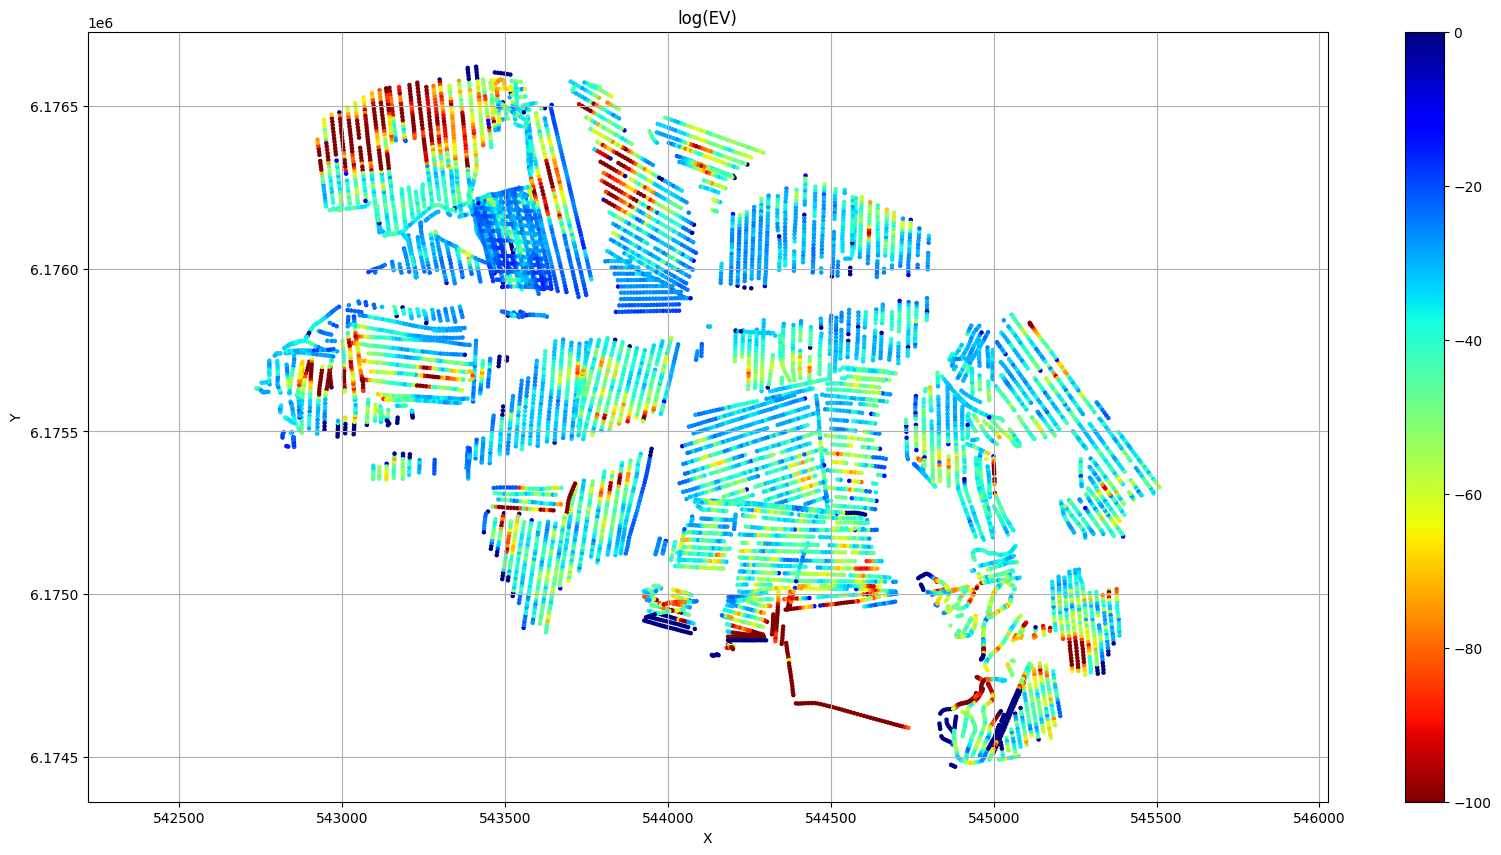

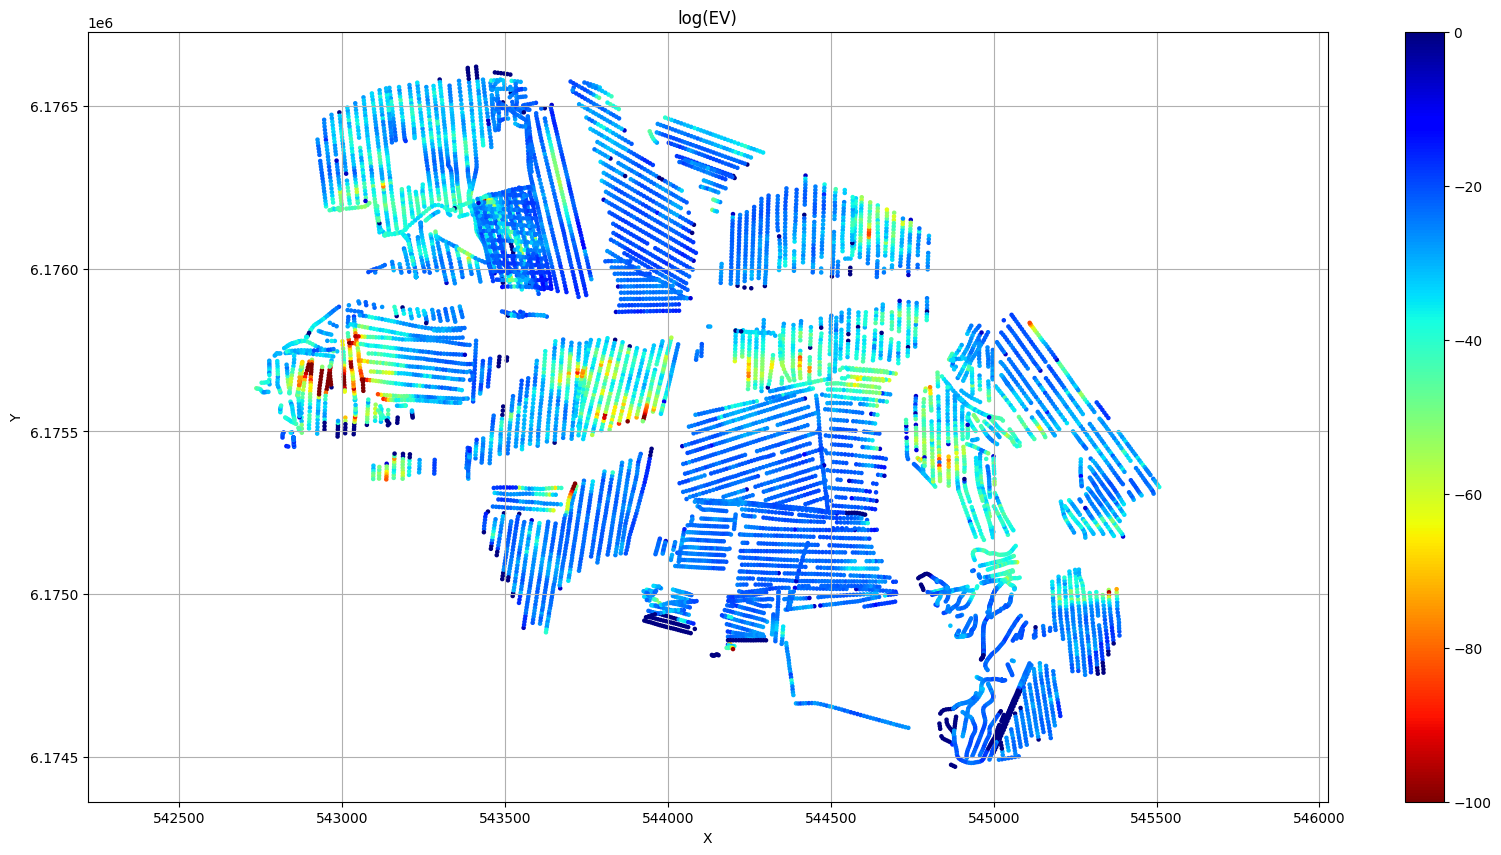

In [5]:

for f_post_h5 in f_post_h5_list:
    #% Posterior analysis
    # Plot the Temperature used for inversion
    #ig.plot_T_EV(f_post_h5, pl='T')
    ig.plot_T_EV(f_post_h5, pl='EV')
    #ig.plot_T_EV(f_post_h5, pl='ND')

    #% Plot Profiles
    #ig.plot_profile(f_post_h5, i1=0, i2=2000, cmap='jet', hardcopy=hardcopy)

    #% Export to CSV
    #ig.post_to_csv(f_post_h5)
    plt.show()

In [6]:
X, Y, LINE, ELEVATION = ig.get_geometry(f_data_h5)

nd=len(X)
nev=len(f_post_h5_list)

EV_mul = np.zeros((nev,nd))

iev = -1
for f_post_h5 in f_post_h5_list:
    iev += 1
    # Read '/EV' from f_post_h5
    with h5py.File(f_post_h5, 'r') as f_post:
        print(f_post_h5)
        #EV=(f_post['/EV'][:]) 
        EV_mul[iev]=(f_post['/EV'][:])

#% Normalize EV

EV_P = 0*EV_mul
E_max = np.max(EV_mul, axis=0)

for iev in range(nev):
    EV_P[iev] = np.exp(EV_mul[iev]-E_max)

# Use annealing to flaten prob
T_EV = 10
EV_P = EV_P**(1/T_EV)

EV_P_sum = np.sum(EV_P,axis=0)
for iev in range(nev):
    EV_P[iev] = EV_P[iev]/EV_P_sum

/mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_prior_detailed_invalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu2000000_aT1.h5
/mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_prior_detailed_outvalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu2000000_aT1.h5


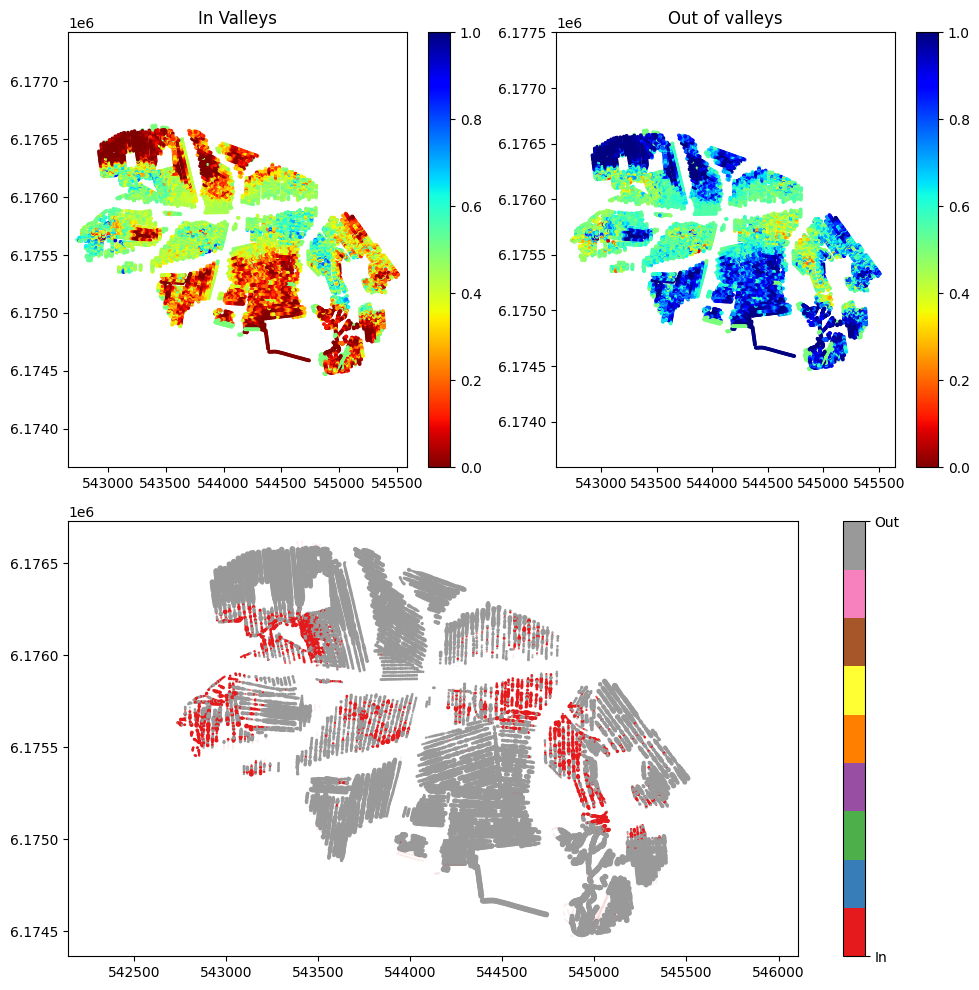

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(X, Y, c=EV_P[0], cmap='jet_r', s=3, vmin=0, vmax=1)
plt.tight_layout()
plt.axis('equal')
plt.colorbar()
plt.title('In Valleys')
plt.subplot(2,2,2)
plt.scatter(X, Y, c=EV_P[1], cmap='jet_r', s=3, vmin=0, vmax=1)
plt.tight_layout()
plt.axis('equal')
plt.colorbar()
plt.title('Out of valleys')

# Get the index of the highest value in each column in EV_P_sum
EV_mode = np.argmax(EV_P, axis=0)
EV_P_max = np.max(EV_P, axis=0)
psize = (EV_P_max-0.5)*20+0.001
plt.subplot(2,1,2)
#plt.plot(X, Y, 'k.', markersize=.1)
plt.scatter(X, Y, c=EV_mode, cmap='Set1', s=psize)
plt.axis('equal')
plt.tight_layout()
cbar = plt.colorbar(ticks=[0, 1])
cbar.set_ticklabels(['In', 'Out'])